Alexandre Lebas - Océane Deletrez

# Rappel du sujet
This case study is on using decision trees to predict customer response and optimize profit. To improve
customer contact process and maximize the amount of profit, decision trees were built with R to model
customer contact history and predict the response of customers. And then the customers can be
prioritized to contact based on the prediction, so that profit can be maximized, given a limited amount
of time, cost and human resources.
(File Cup98LRN, whippet, directory Project – B - 2019)
Keywords: Decision tree, prediction, profit optimization
Main steps:
- Introduction
- The Data of KDD Cup 1998
- Data Exploration
- Training Decision Trees
- Model Evaluation
- Selecting the Best Tree
- Scoring
- Discussions and Conclusions

# Data of KDD Cup 1998

In [1]:
# Inspiré du livre de Yanchang Zhao

data.train = read.csv(file = "cup98LRN.txt")
dim(data.train)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"caractère(s) 'nul' au milieu de l'entrée"


[1] 10000   481

In [2]:
data.val = read.csv(file = "cup98VAL.txt")
dim(data.val)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"caractère(s) 'nul' au milieu de l'entrée"


[1] 10000   479

On remarque que dans les 2 jeux de donnnées il y a plus de 400 variables. Entre le jeu de d'entrainement et le jeu de validation il y a deux variables en plus ce qui signifie qu'il y a dexu valeurs à prédire. Ce qui semble logique serait de prevoir si une personne a donné ou non et combien elle a donnée.

In [3]:
# Nous permet d'avoir une description de toutes les variables
install.packages("Hmisc")

Installation du package dans 'C:/Users/alex5/OneDrive/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alex5\AppData\Local\Temp\RtmpgPDEsO\downloaded_packages


In [4]:
library(Hmisc)
describe(data.train) 

Le chargement a nécessité le package : lattice

Le chargement a nécessité le package : survival

Le chargement a nécessité le package : Formula

Le chargement a nécessité le package : ggplot2


Attachement du package : 'Hmisc'


Les objets suivants sont masqués depuis 'package:base':

    format.pval, units




data.train 

 481  Variables      10000  Observations
--------------------------------------------------------------------------------
ODATEDW 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       16    0.986     9141    390.7     8601     8601 
     .25      .50      .75      .90      .95 
    8801     9201     9501     9601     9601 

lowest : 8601 8701 8801 8804 8810, highest: 9401 9501 9509 9601 9701
                                                                            
Value       8601  8701  8801  8804  8810  8901  9001  9101  9201  9301  9302
Frequency   1544   369   687     1     1   534   803   925   787   391     1
Proportion 0.154 0.037 0.069 0.000 0.000 0.053 0.080 0.092 0.079 0.039 0.000
                                        
Value       9401  9501  9509  9601  9701
Frequency   1325  1595     2  1034     1
Proportion 0.132 0.160 0.000 0.103 0.000
----------------------------------------------------------------------------

In [5]:
describe(data.val)

data.val 

 479  Variables      10000  Observations
--------------------------------------------------------------------------------
ODATEDW 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       18    0.987     9144    388.4     8601     8601 
     .25      .50      .75      .90      .95 
    8801     9201     9501     9601     9601 

lowest : 8601 8610 8701 8801 8901, highest: 9410 9501 9506 9601 9701
                                                                            
Value       8601  8610  8701  8801  8901  8909  9001  9101  9102  9110  9201
Frequency   1441     2   392   724   579     1   798   897     1     1   817
Proportion 0.144 0.000 0.039 0.072 0.058 0.000 0.080 0.090 0.000 0.000 0.082
                                                    
Value       9301  9401  9410  9501  9506  9601  9701
Frequency    424  1211     1  1680     1  1029     1
Proportion 0.042 0.121 0.000 0.168 0.000 0.103 0.000
------------------------------

In [6]:
# Trouver ou sont les deux classe dans les données
# POur cela on va regarder un nombre défini (exemple 100) de vriable avec describe
# On va voir si jamais les premières et les dernières sont les mêmes
# Si c'est le cas alors les classes ne sont pas dans ces variables
describe(data.train[,1:100])

data.train[, 1:100] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
ODATEDW 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       16    0.986     9141    390.7     8601     8601 
     .25      .50      .75      .90      .95 
    8801     9201     9501     9601     9601 

lowest : 8601 8701 8801 8804 8810, highest: 9401 9501 9509 9601 9701
                                                                            
Value       8601  8701  8801  8804  8810  8901  9001  9101  9201  9301  9302
Frequency   1544   369   687     1     1   534   803   925   787   391     1
Proportion 0.154 0.037 0.069 0.000 0.000 0.053 0.080 0.092 0.079 0.039 0.000
                                        
Value       9401  9501  9509  9601  9701
Frequency   1325  1595     2  1034     1
Proportion 0.132 0.160 0.000 0.103 0.000
-------------------------------------------------------------------

In [7]:
describe(data.val[,1:100])

data.val[, 1:100] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
ODATEDW 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       18    0.987     9144    388.4     8601     8601 
     .25      .50      .75      .90      .95 
    8801     9201     9501     9601     9601 

lowest : 8601 8610 8701 8801 8901, highest: 9410 9501 9506 9601 9701
                                                                            
Value       8601  8610  8701  8801  8901  8909  9001  9101  9102  9110  9201
Frequency   1441     2   392   724   579     1   798   897     1     1   817
Proportion 0.144 0.000 0.039 0.072 0.058 0.000 0.080 0.090 0.000 0.000 0.082
                                                    
Value       9301  9401  9410  9501  9506  9601  9701
Frequency    424  1211     1  1680     1  1029     1
Proportion 0.042 0.121 0.000 0.168 0.000 0.103 0.000
---------------------

In [8]:
# Pas dans 100
describe(data.train[,101:200])

data.train[, 101:200] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
AGE902 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       61    0.997    41.84    8.188       32       34 
     .25      .50      .75      .90      .95 
      38       41       45       51       56 

lowest :  0 19 20 21 22, highest: 74 75 76 77 80
--------------------------------------------------------------------------------
AGE903 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       53    0.997    45.07     8.04       36       38 
     .25      .50      .75      .90      .95 
      41       44       48       54       59 

lowest :  0 28 29 30 31, highest: 75 76 77 78 80
--------------------------------------------------------------------------------
AGE904 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0  

In [9]:
describe(data.val[,101:200])

data.val[, 101:200] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
AGE902 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       63    0.997    42.13    8.149       33       35 
     .25      .50      .75      .90      .95 
      38       41       45       51       57 

lowest :  0 19 20 21 22, highest: 76 77 78 79 84
--------------------------------------------------------------------------------
AGE903 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       54    0.997    45.27    8.034       36       38 
     .25      .50      .75      .90      .95 
      41       44       49       54       60 

lowest :  0 29 30 31 32, highest: 77 78 79 80 84
--------------------------------------------------------------------------------
AGE904 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0    

In [10]:
# Pas dans les 200 premières variables
describe(data.train[,201:300])

data.train[, 201:300] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
IC3 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0      830        1    384.6    169.6      197      225 
     .25      .50      .75      .90      .95 
     277      353      463      590      690 

lowest :    0   25   41   62   68, highest: 1153 1157 1199 1208 1226
--------------------------------------------------------------------------------
IC4 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0      877        1    428.1    181.1      225      259 
     .25      .50      .75      .90      .95 
     314      395      511      652      749 

lowest :    0   71   75   80   85, highest: 1239 1246 1252 1272 1273
--------------------------------------------------------------------------------
IC5 
       n  missing distinct     Info     Mean      Gmd      .0

In [11]:
describe(data.val[,201:300])

data.val[, 201:300] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
IC3 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0      842        1    390.1    171.7      199      229 
     .25      .50      .75      .90      .95 
     280      358      472      599      700 

lowest :    0   66   71   72   74, highest: 1187 1188 1193 1201 1394
--------------------------------------------------------------------------------
IC4 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0      892        1    433.7      184      227      261 
     .25      .50      .75      .90      .95 
     316      402      518      658      765 

lowest :    0   57   73   77   82, highest: 1242 1243 1259 1394 1500
--------------------------------------------------------------------------------
IC5 
       n  missing distinct     Info     Mean      Gmd      .05 

In [12]:
# Pas dans les 300 premières
describe(data.train[,301:400])

data.train[, 301:400] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
SEC4 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       45    0.997    17.23    7.026        5        9 
     .25      .50      .75      .90      .95 
      14       18       21       25       27 

lowest :  0  1  2  3  4, highest: 40 42 44 48 51
--------------------------------------------------------------------------------
SEC5 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       74    0.991    6.835    4.732        2        2 
     .25      .50      .75      .90      .95 
       4        6        8       11       14 

lowest :  0  1  2  3  4, highest: 81 86 92 97 99
--------------------------------------------------------------------------------
AFC1 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       3

In [13]:
describe(data.val[,301:400])

data.val[, 301:400] 

 100  Variables      10000  Observations
--------------------------------------------------------------------------------
SEC4 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       45    0.997    17.06    7.005        5        9 
     .25      .50      .75      .90      .95 
      13       18       21       24       26 

lowest :  0  1  2  3  4, highest: 40 41 42 44 48
--------------------------------------------------------------------------------
SEC5 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       68    0.991    6.731    4.518        2        2 
     .25      .50      .75      .90      .95 
       4        6        8       11       14 

lowest :  0  1  2  3  4, highest: 75 85 86 89 99
--------------------------------------------------------------------------------
AFC1 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       45 

In [14]:
# Pas dans les 400 premières 
# Elle se situe donc faire la fin du deu d'entrainement esseyons donc de partir des dernières variables
describe(data.train[,470:481])

data.train[, 470:481] 

 12  Variables      10000  Observations
--------------------------------------------------------------------------------
CONTROLN 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0    10000        1    95917    63825    10222    19677 
     .25      .50      .75      .90      .95 
   48131    95716   144420   172345   182048 

lowest :     27     65     94    103    107, highest: 191649 191673 191716 191754 191758
--------------------------------------------------------------------------------
TARGET_B 
       n  missing distinct     Info      Sum     Mean      Gmd 
   10000        0        2    0.145      509   0.0509  0.09663 

--------------------------------------------------------------------------------
TARGET_D 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0       44    0.145   0.7419    1.432        0        0 
     .25      .50      .75      .90      .95 
       0      

In [15]:
describe(data.val[,470:479])

data.val[, 470:479] 

 10  Variables      10000  Observations
--------------------------------------------------------------------------------
CONTROLN 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0    10000        1    95236    63996     9161    18334 
     .25      .50      .75      .90      .95 
   46671    95653   142997   172030   182307 

lowest :     28     89    179    194    203, highest: 191720 191767 191773 191774 191776
--------------------------------------------------------------------------------
HPHONE_D 
       n  missing distinct     Info      Sum     Mean      Gmd 
   10000        0        2     0.75     5064   0.5064      0.5 

--------------------------------------------------------------------------------
RFA_2R 
       n  missing distinct    value 
   10000        0        1        L 
                
Value          L
Frequency  10000
Proportion     1
--------------------------------------------------------------------

In [16]:
# On remarque donc que les deux classes sont TargetB et TargetD
# TargetB a deux valeurs certainement que cela doit être un binaire pour savoir si une personne répond ou non 
# Target D doit representer la somme donnée si celui-ci à donné
unique(data.train$TARGET_B)

[1] 0 1

In [17]:
# 0 doit être le nombre de gens qui n'ont pas donné et 1 les gens qui ont donnée
proportionB = prop.table(table(data.train$TARGET_B))
proportionB


     0      1 
0.9491 0.0509 

On remarque que la majorité des personnes (quasi 95%) font partie de la classe 0 

Regardont maintenant dans le nombre de personnes qui ont donnée (c'est à dire que TARGET_D est supèrieur à 0) les statistiques concernant leurs dons

In [29]:
personneQuiOntDonne = data.train[data.train$TARGET_D >0,]
# On regarde le nombre de dons au cas ou TARGETB aurait été mal rempli
donsDesPersonnes = personneQuiOntDonne$TARGET_D
# Regardons maintenant combien de personnes ont données cela correspond bien à la proportion des gens qui ont donnée
dim(personneQuiOntDonne)


[1] 509 481

In [30]:
summary(donsDesPersonnes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   10.00   12.00   14.58   20.00  100.00 

On remarque que les dons sont compris entre 1 et 100 mais 75% font moins de 20€ et le restes sont des dons entre 20 et 100.

Prenons maintenant une réprésentation graphiques pour mieux voir ces chiffres

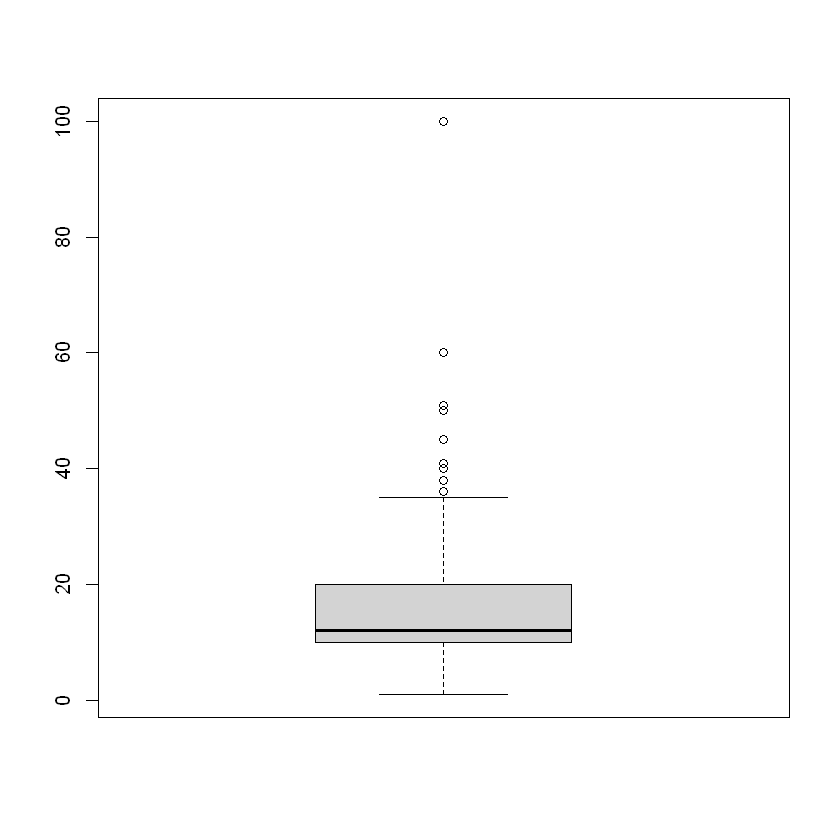

In [32]:
boxplot(donsDesPersonnes)

Sur le graphique ci dessus on voit justement qu'une trés grande partie des dons font moins de 55€ seul deux dons sont aux dessus un don à 60 et celui à 100.

Esseyons un graphique plus précis pour savoir quelle est la somme la plus donnée

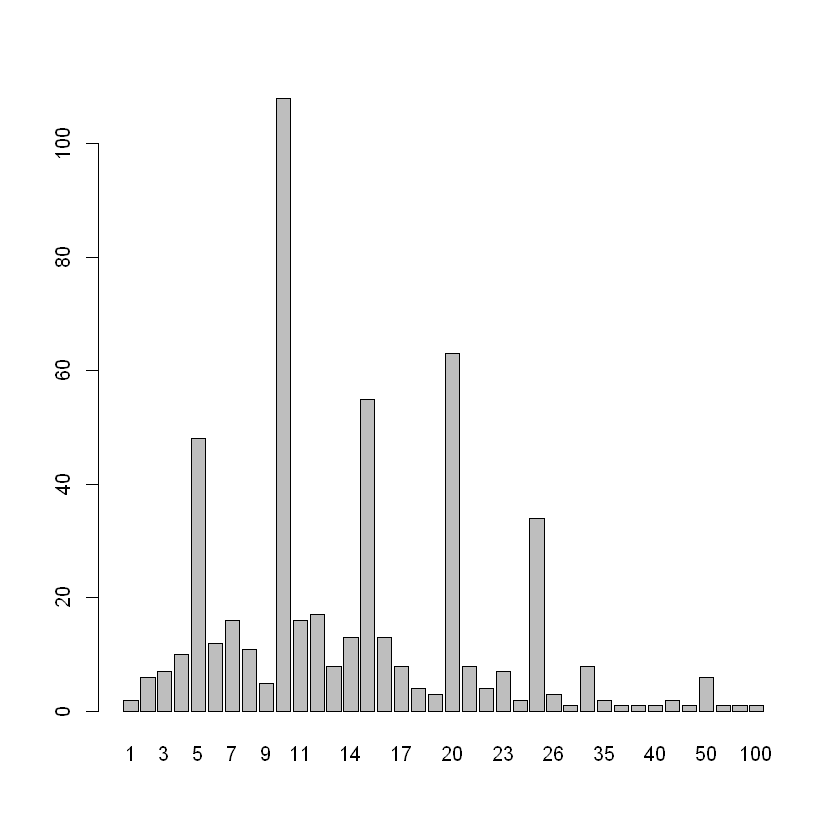

In [39]:
barplot(table(round(donsDesPersonnes)))

On arrondi car le don fait par la personne n'est pas forcement entier (11€50 par exemple). On remarque dans ce graphique que la somme la plus donné est 10€ ce graphique semble aussi en accord avec celui sur 75% des dons font moins de 20% et trés peux font plus de 50€.

# Data Exploration

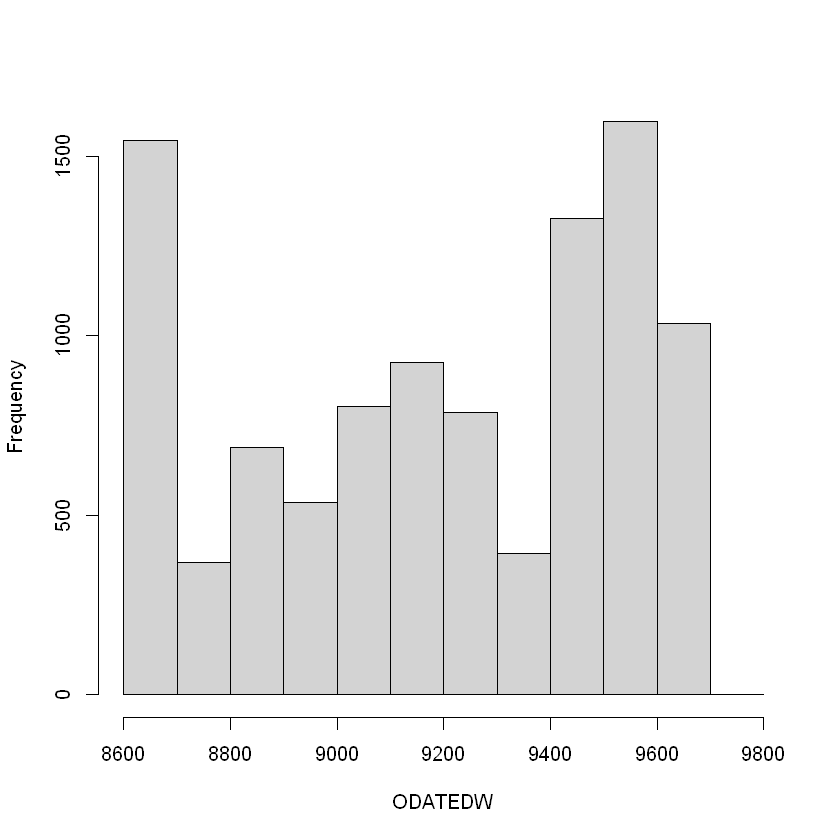

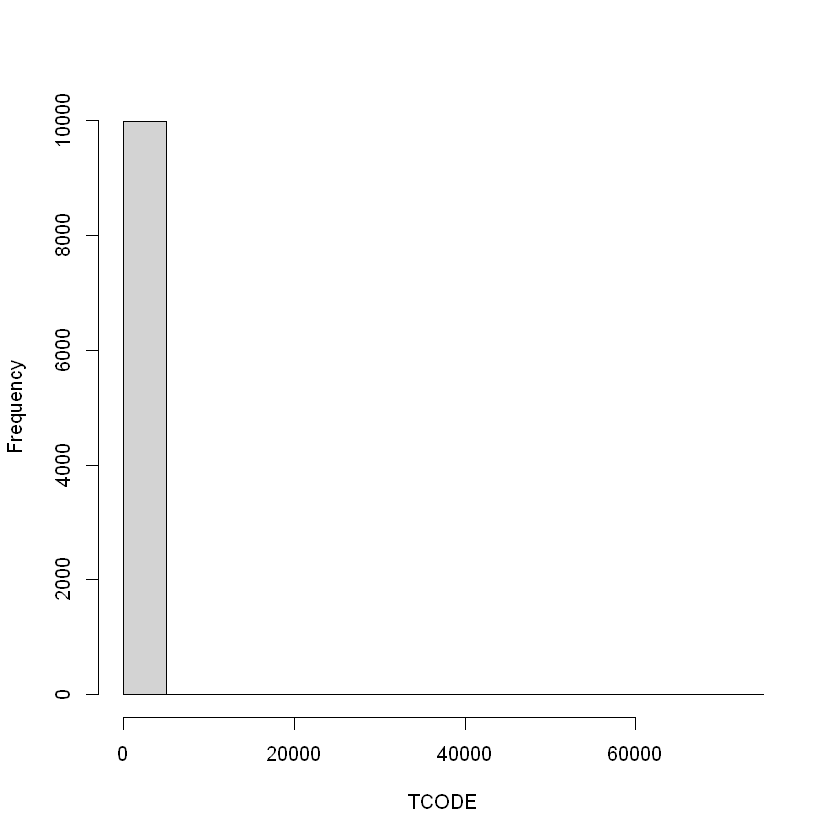

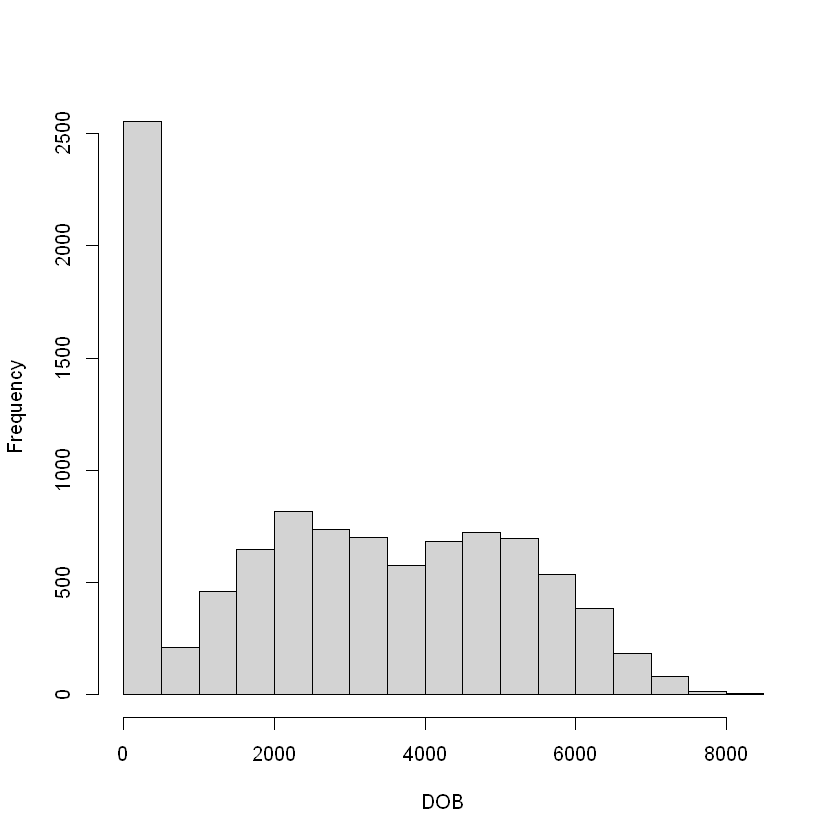

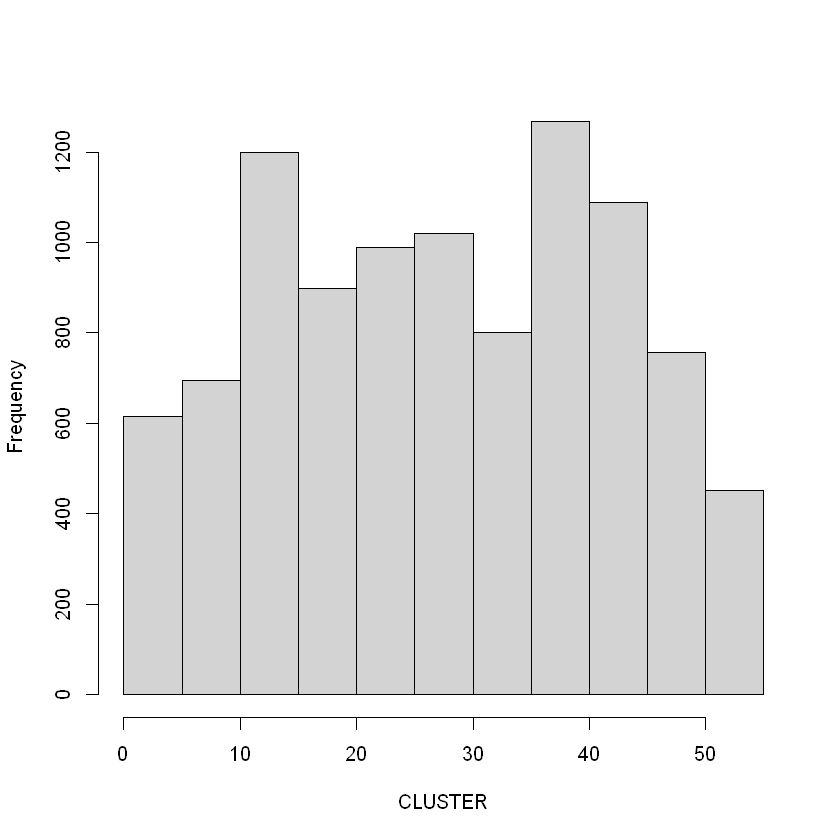

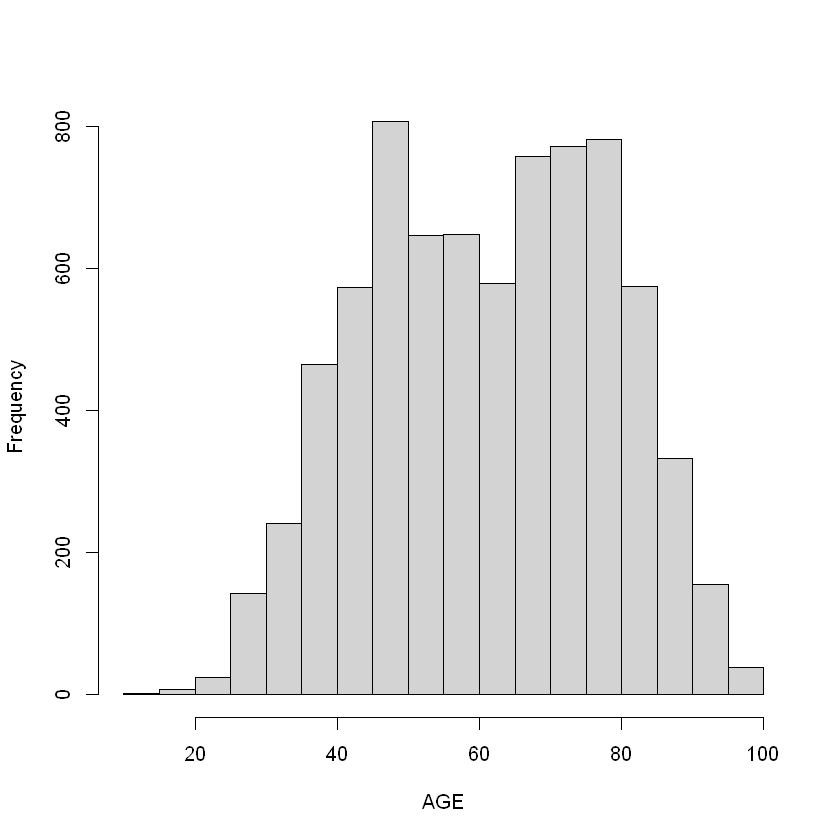

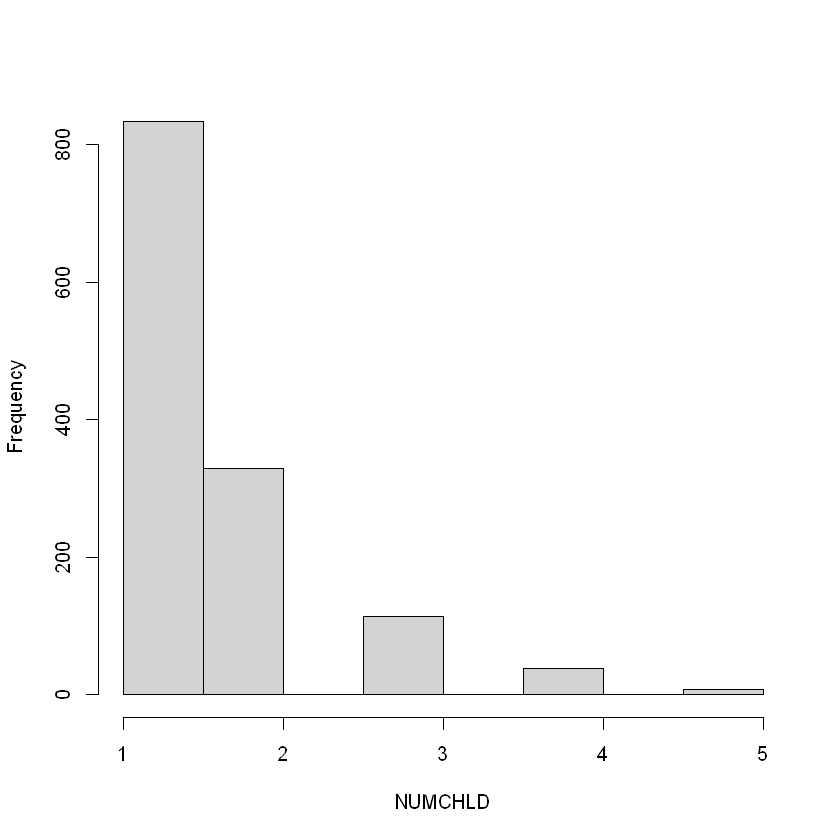

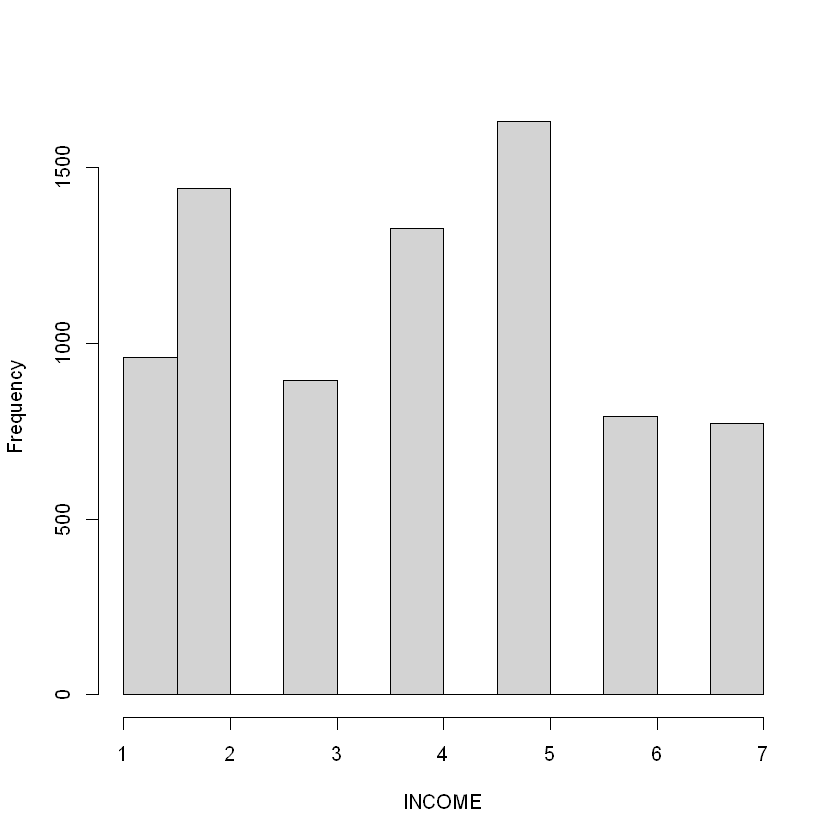

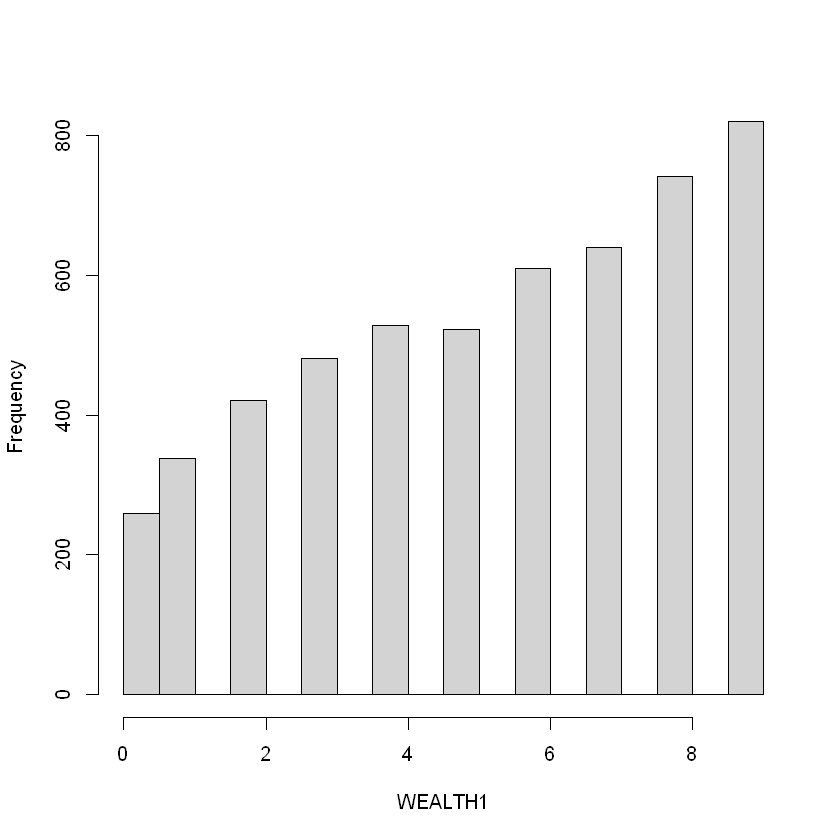

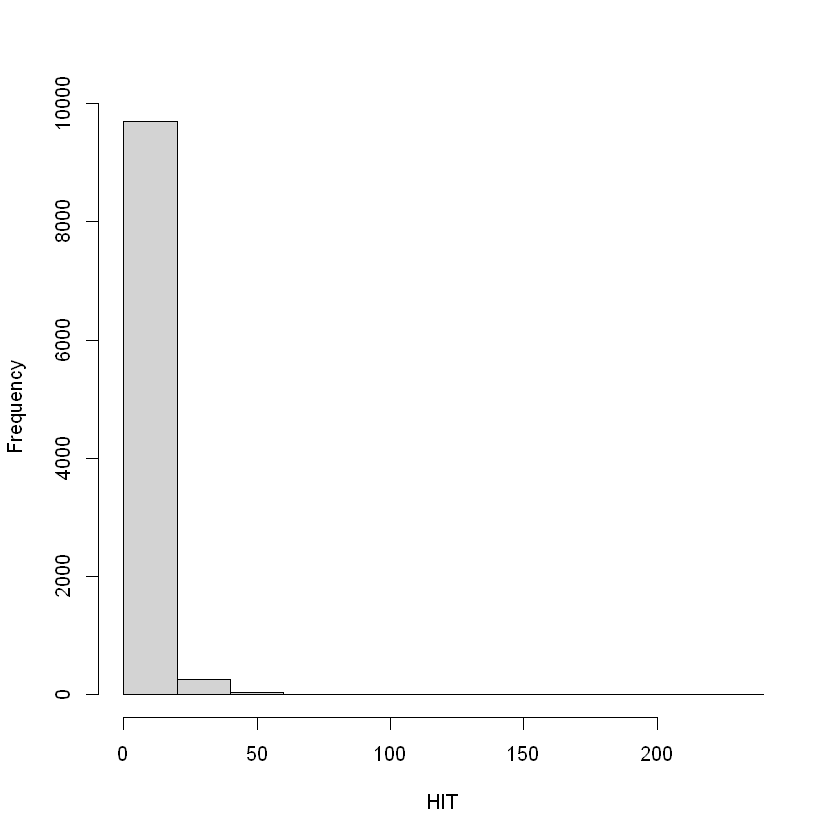

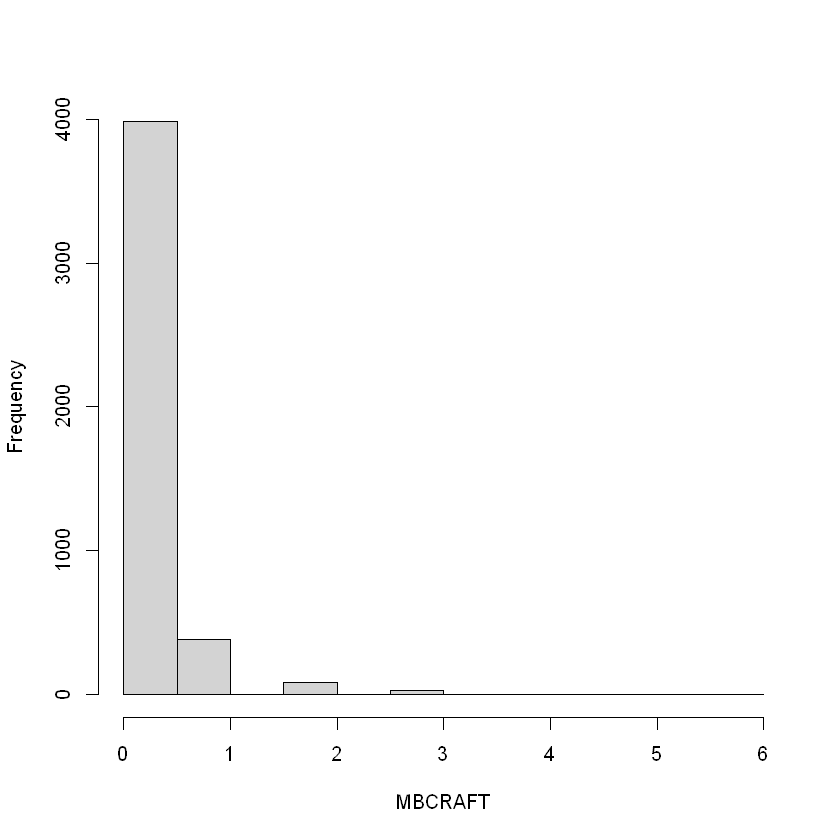

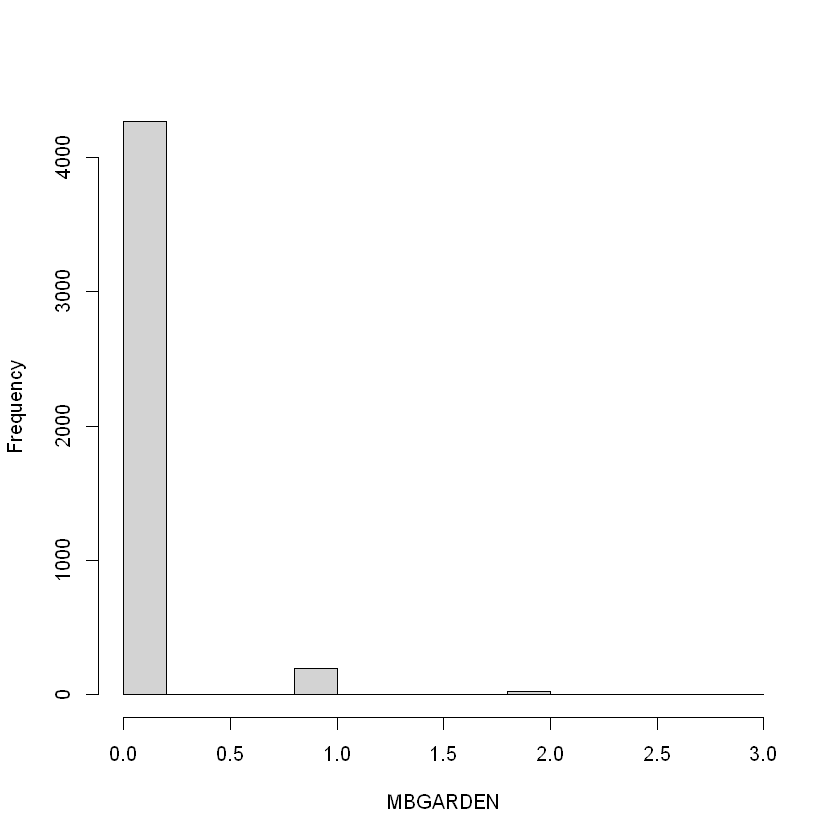

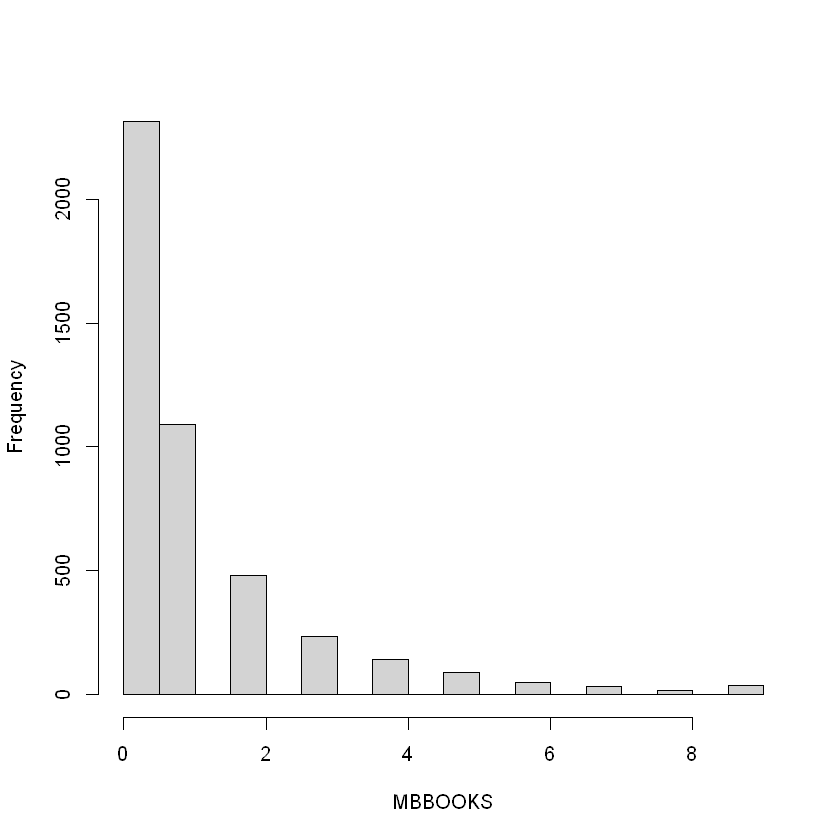

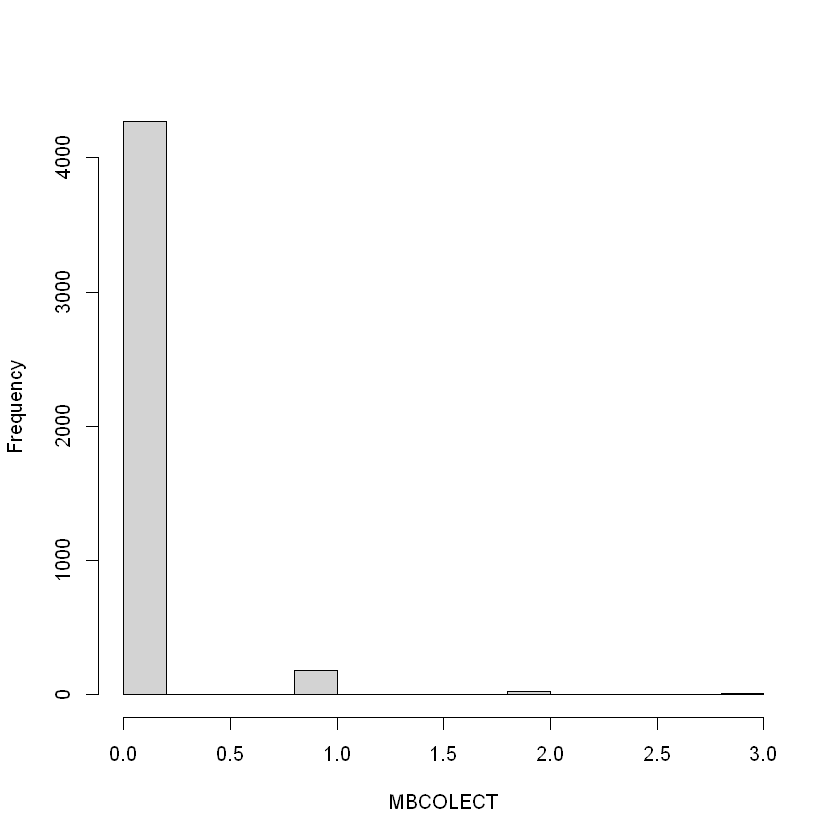

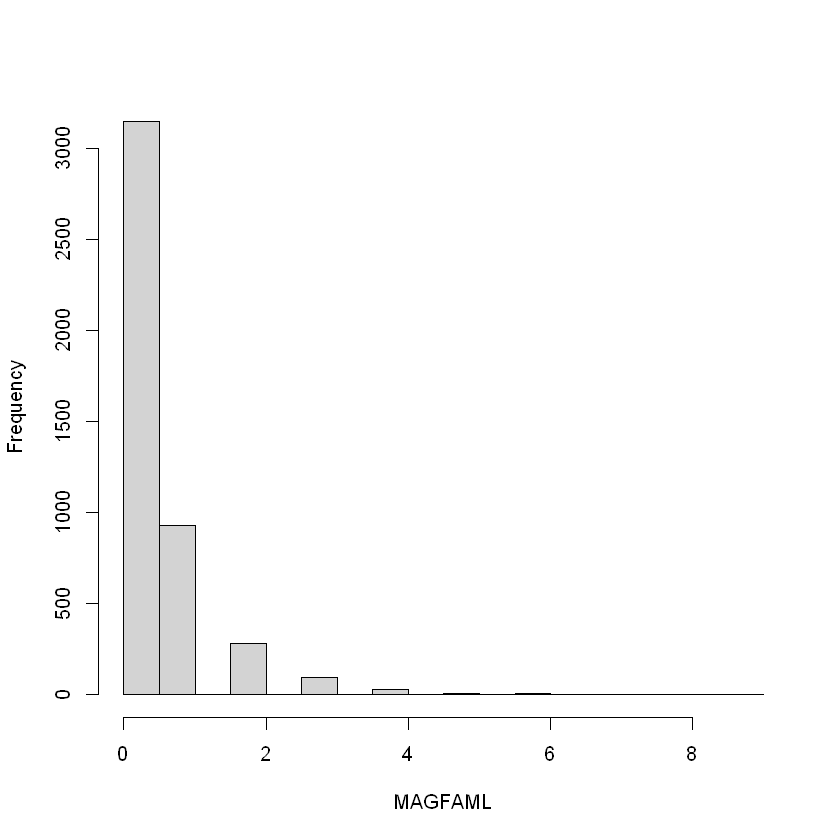

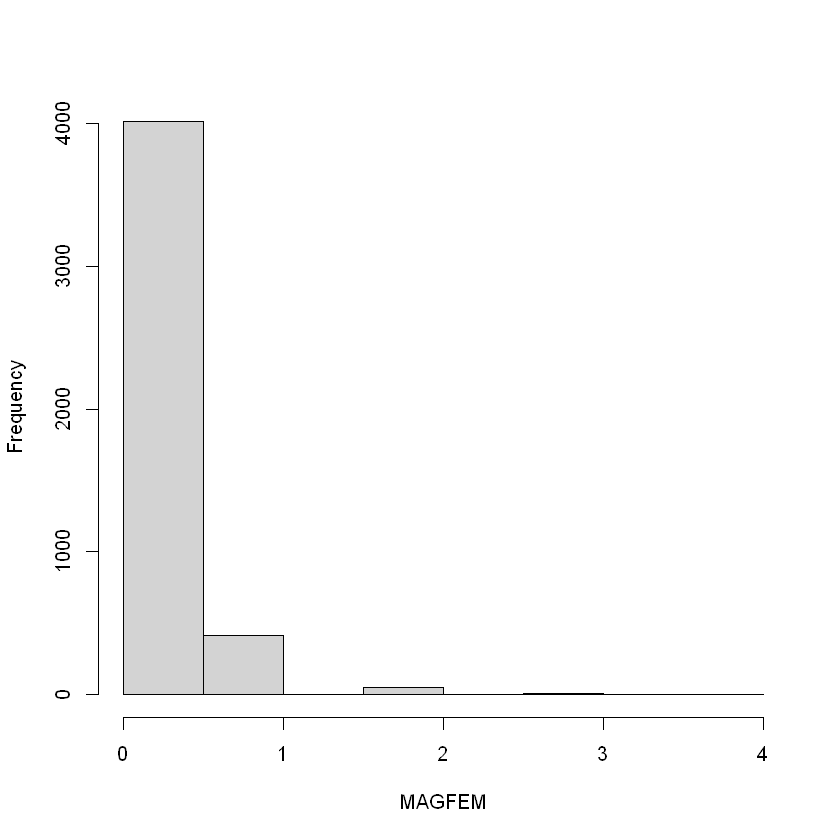

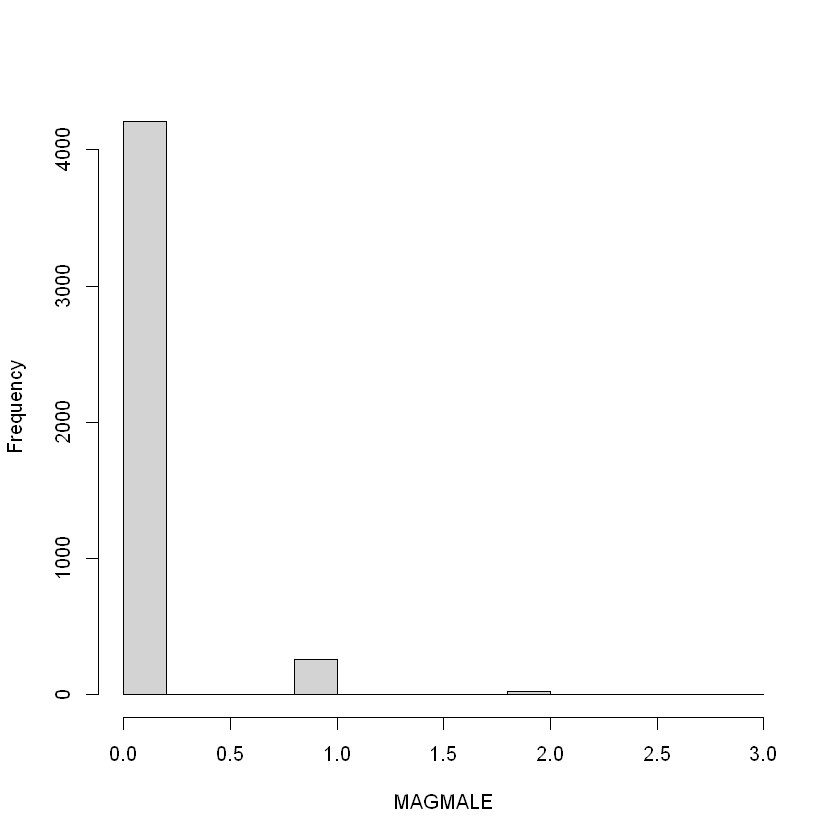

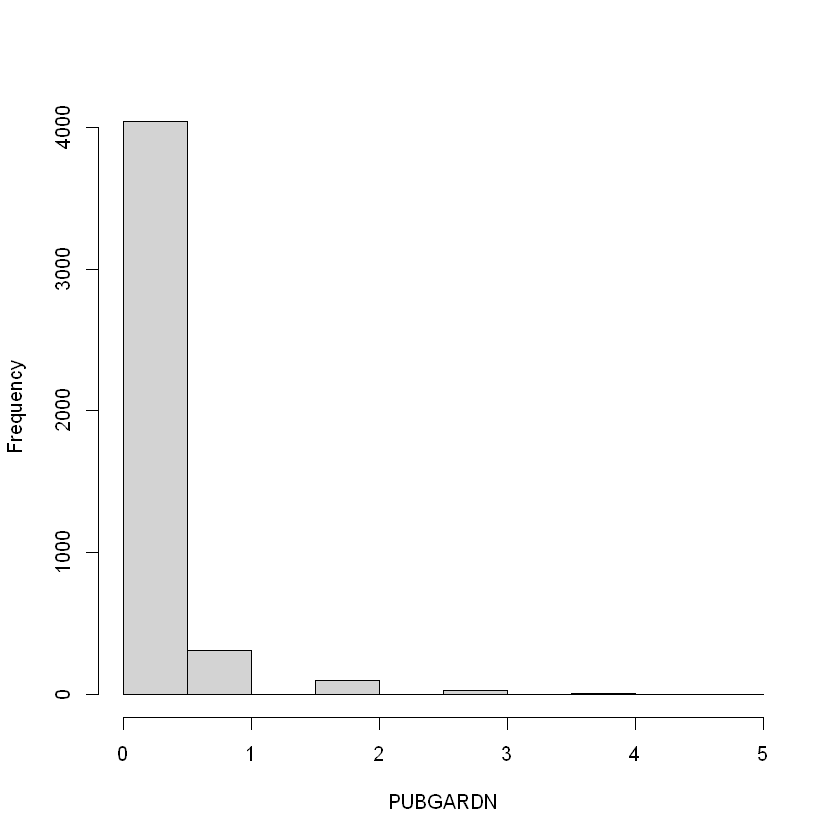

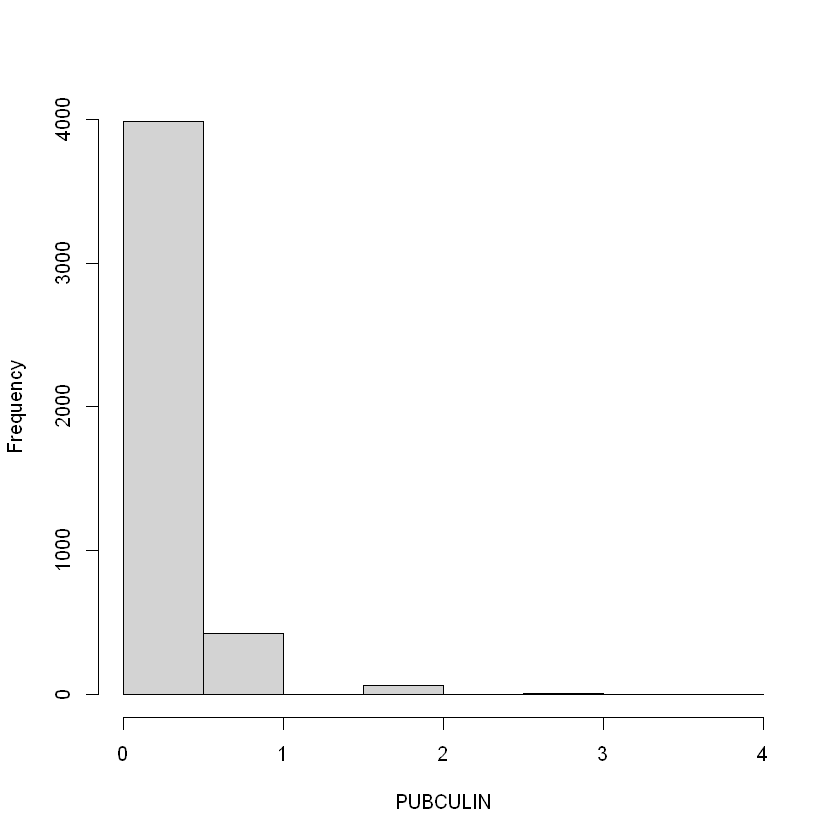

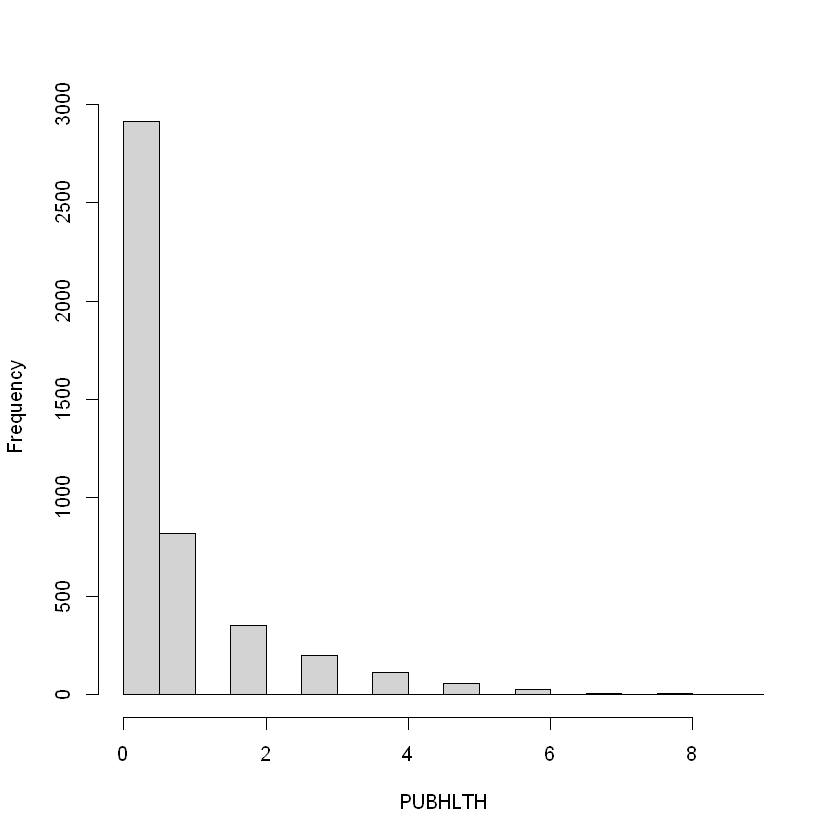

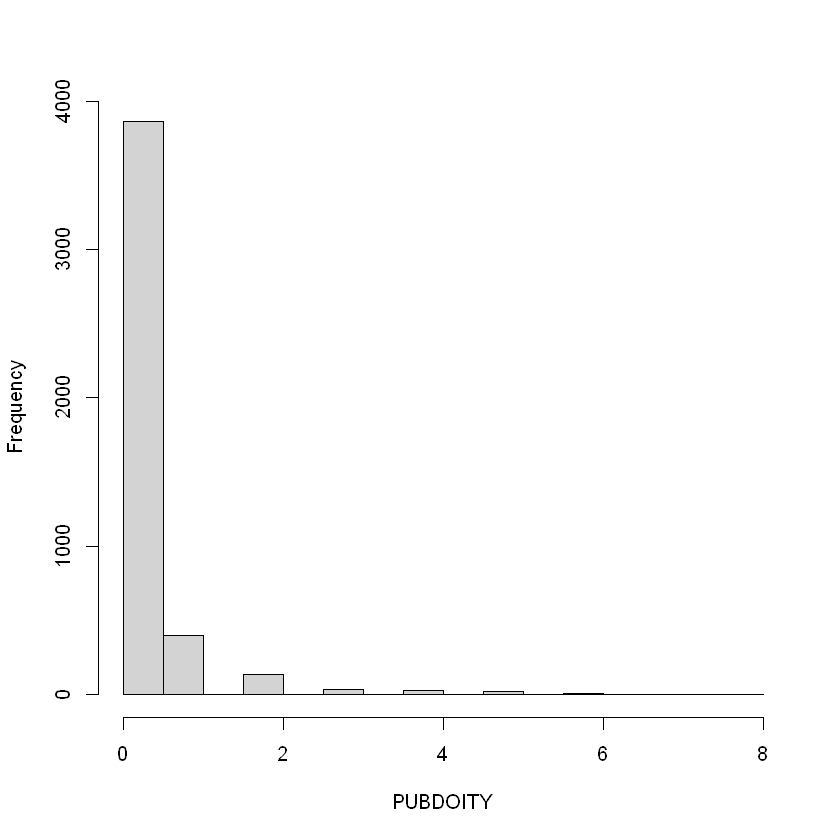

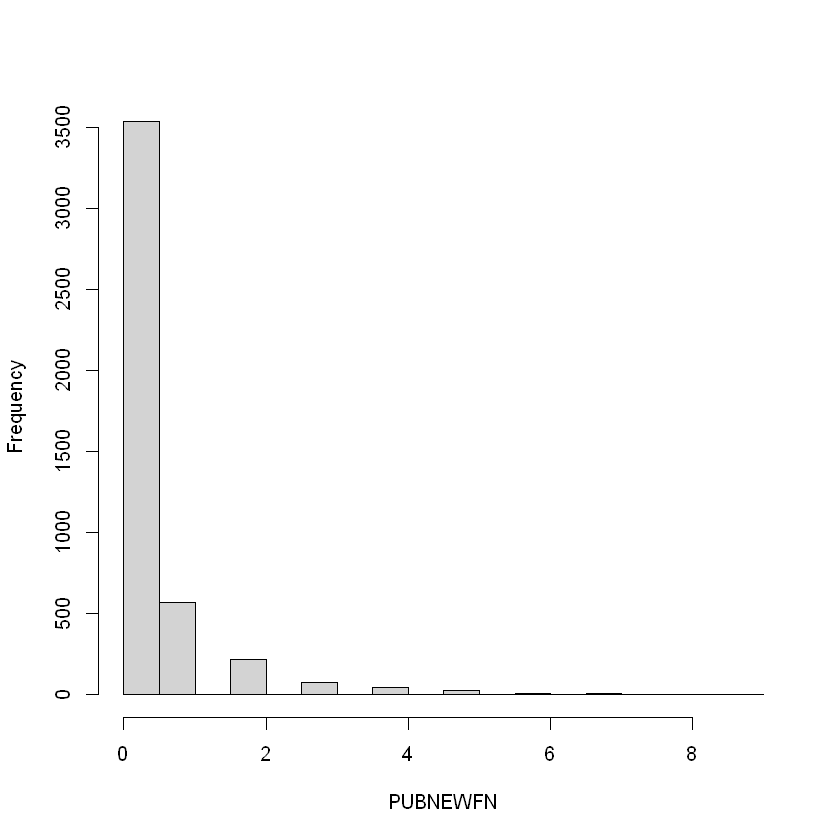

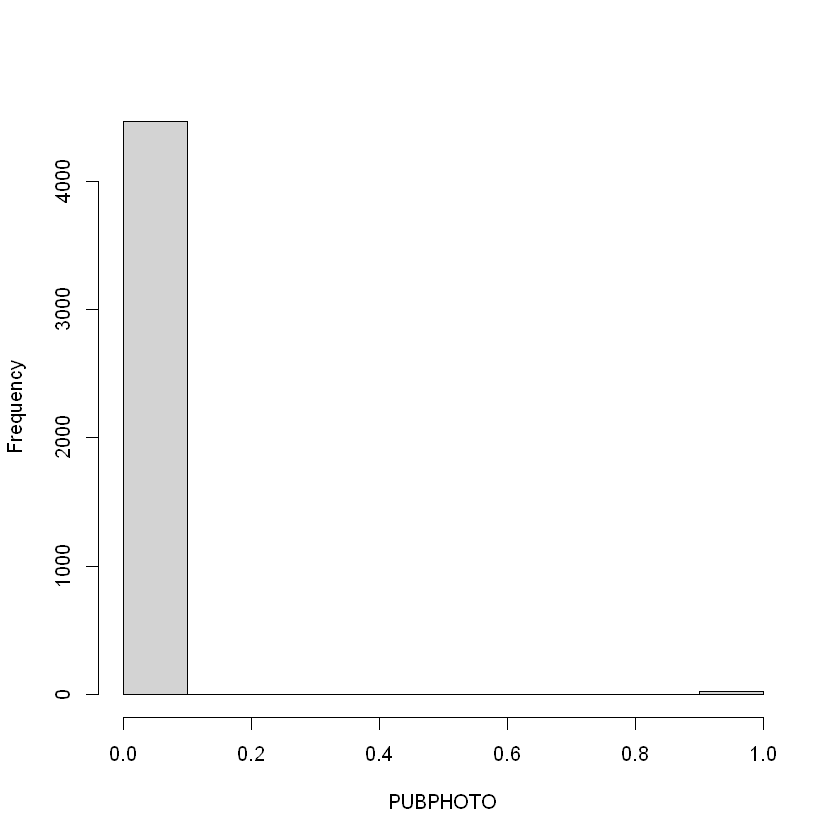

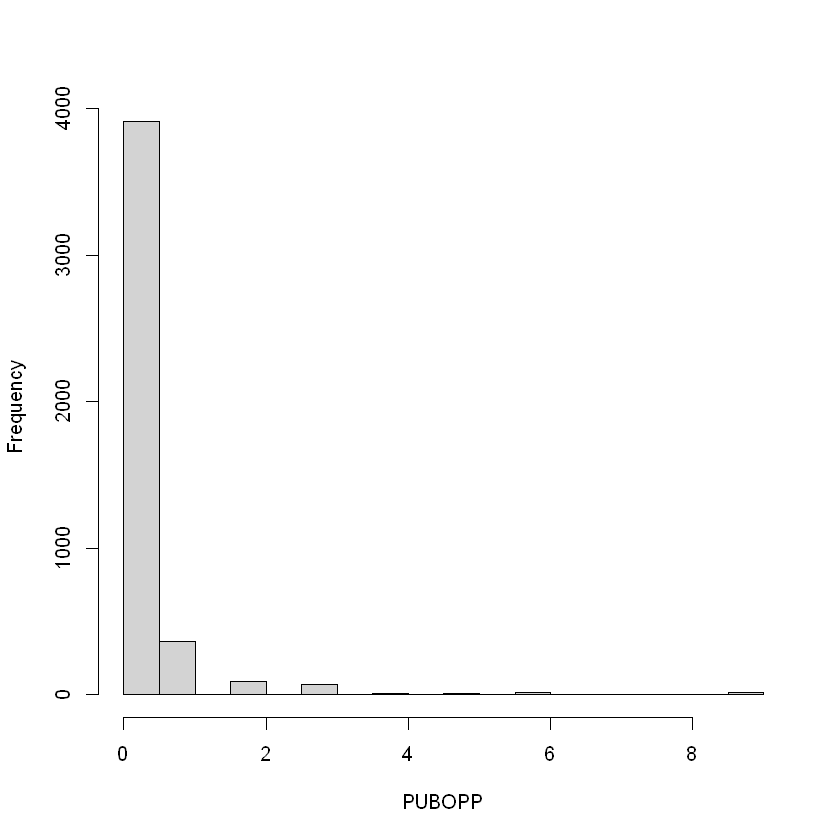

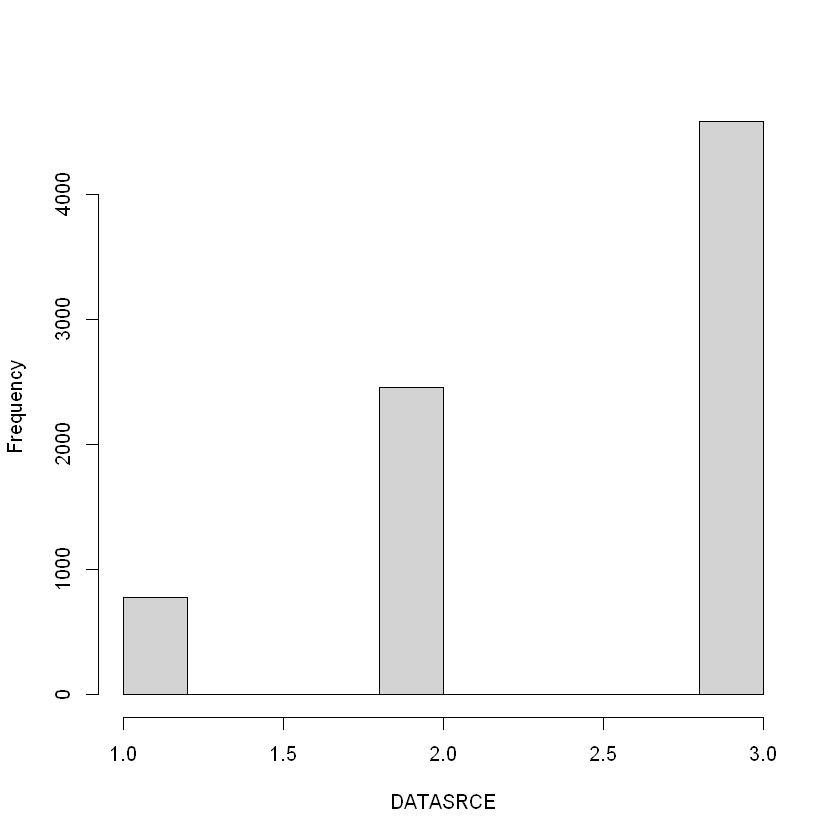

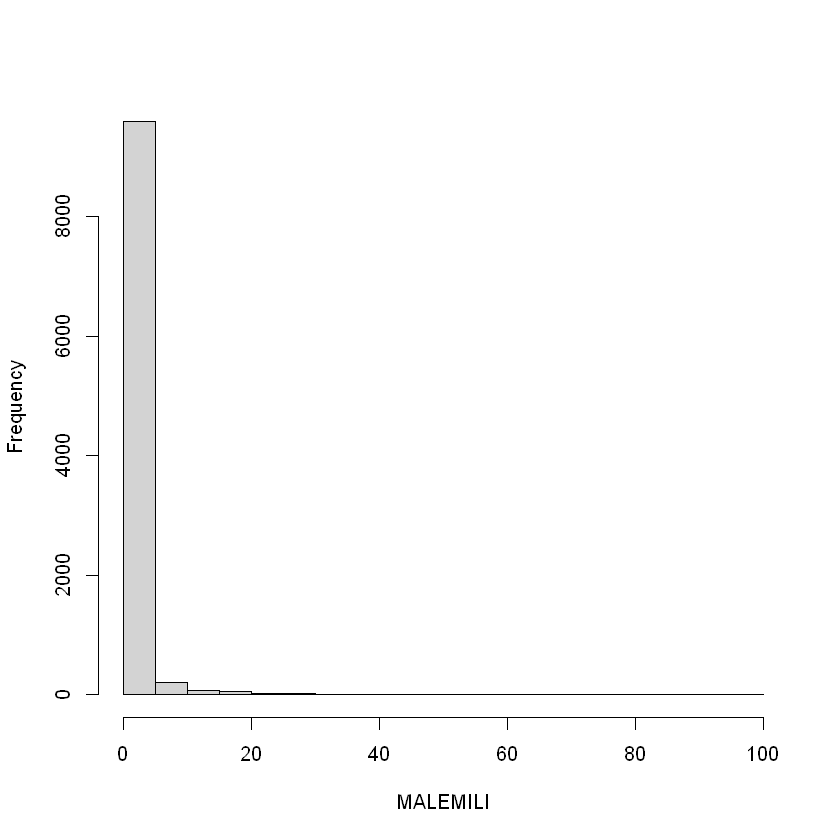

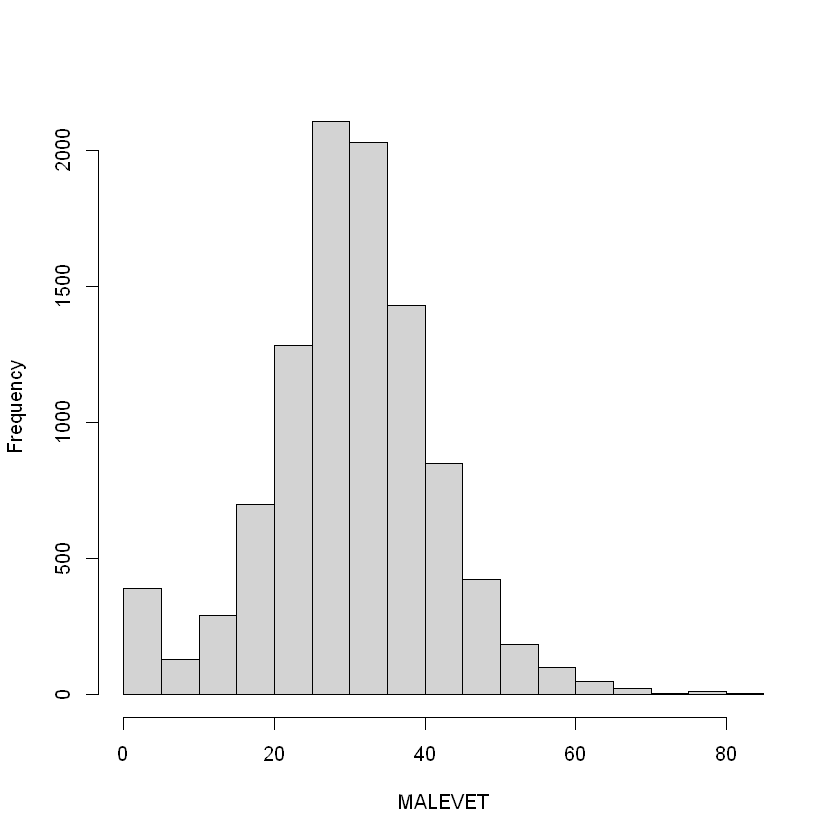

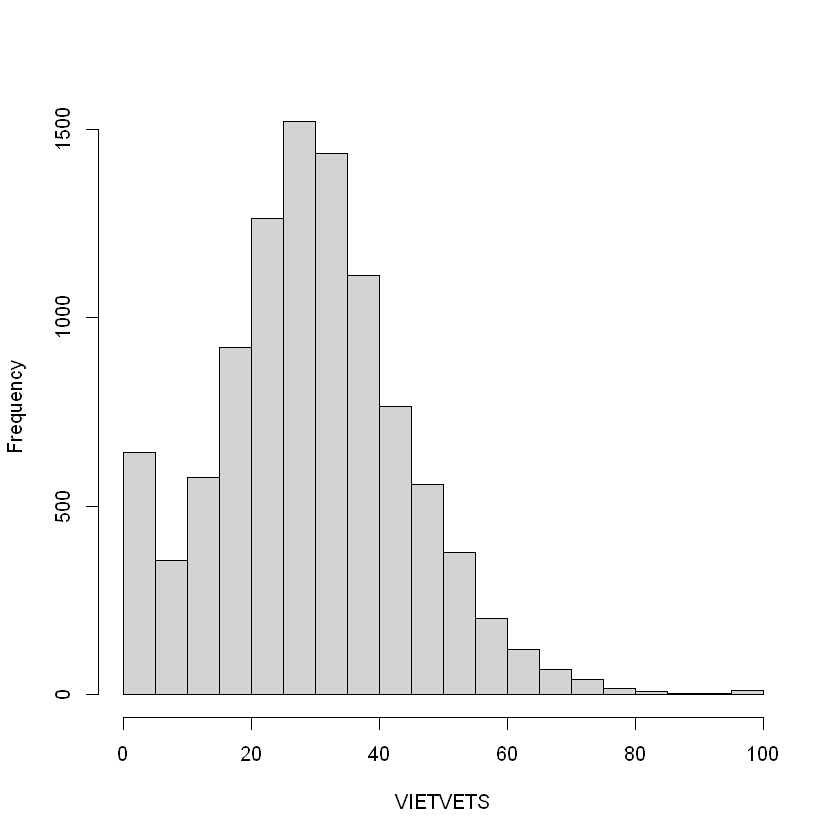

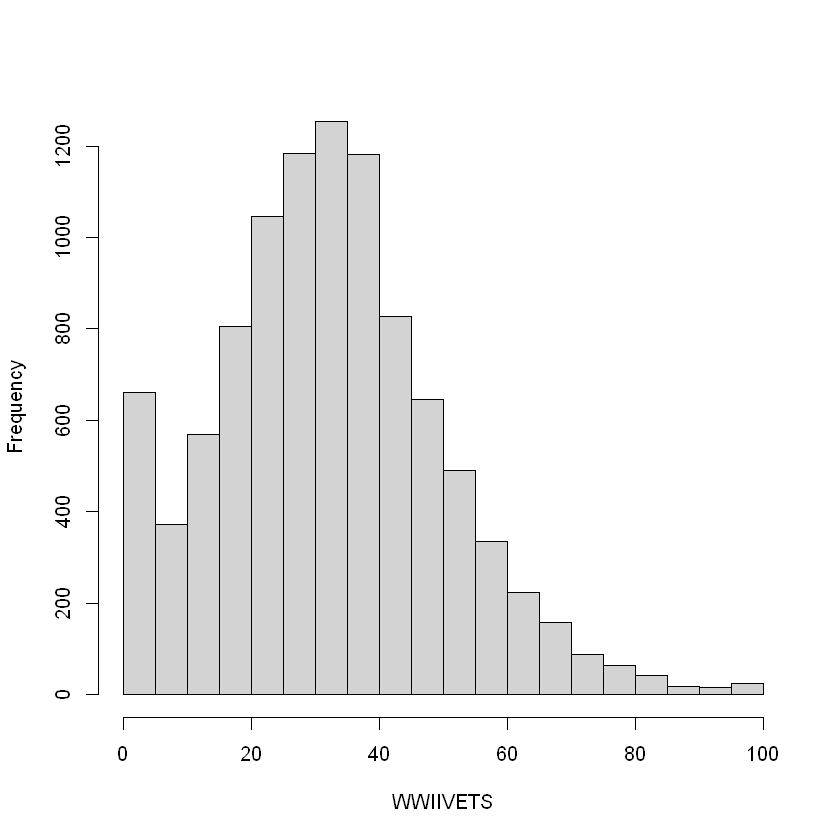

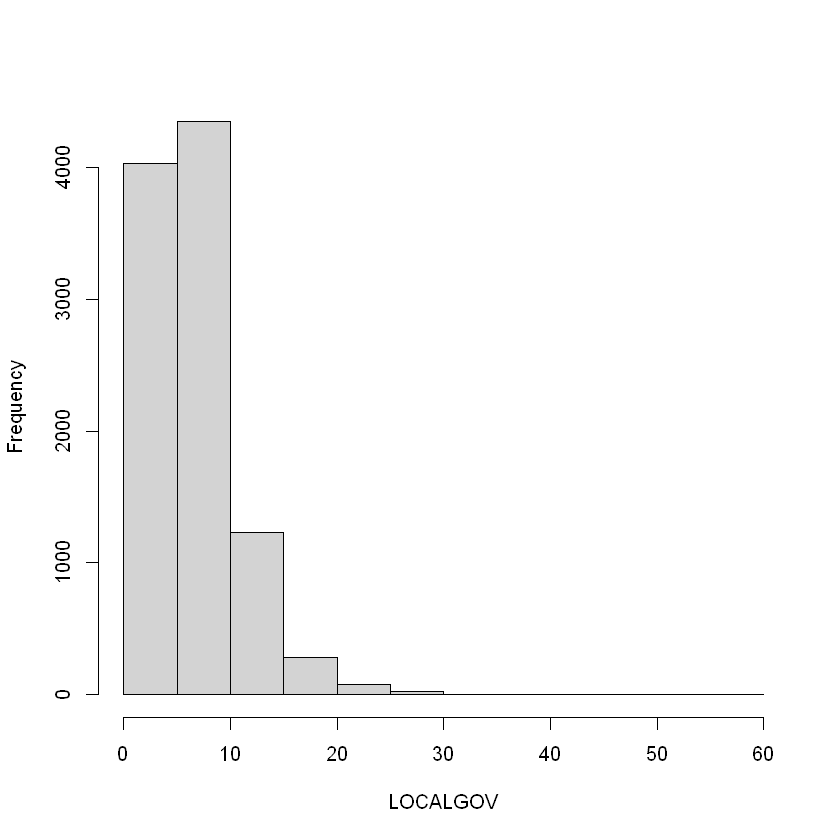

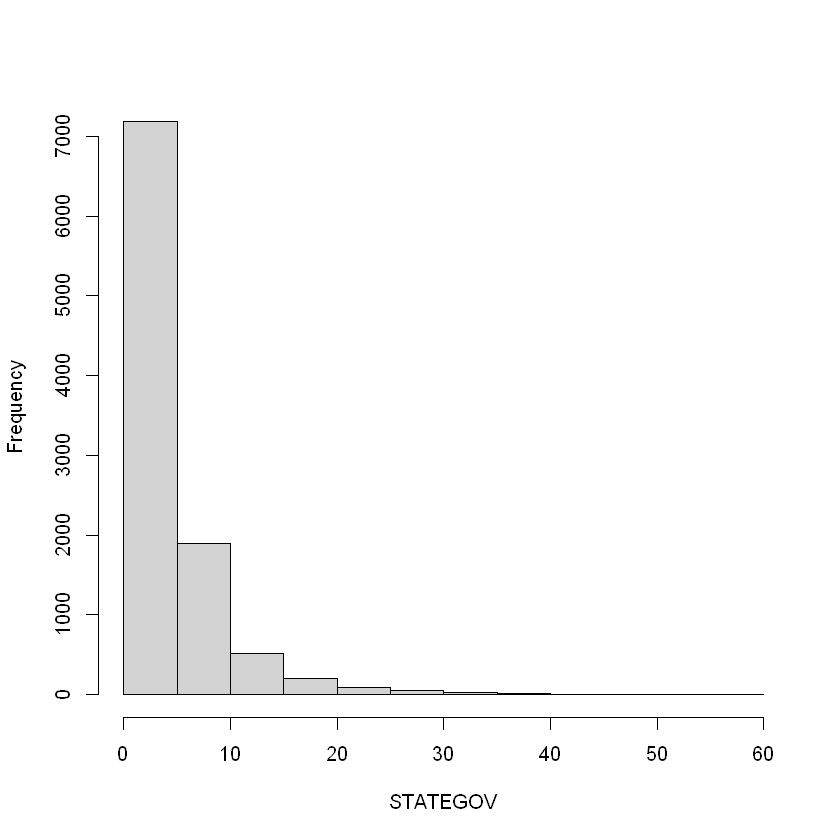

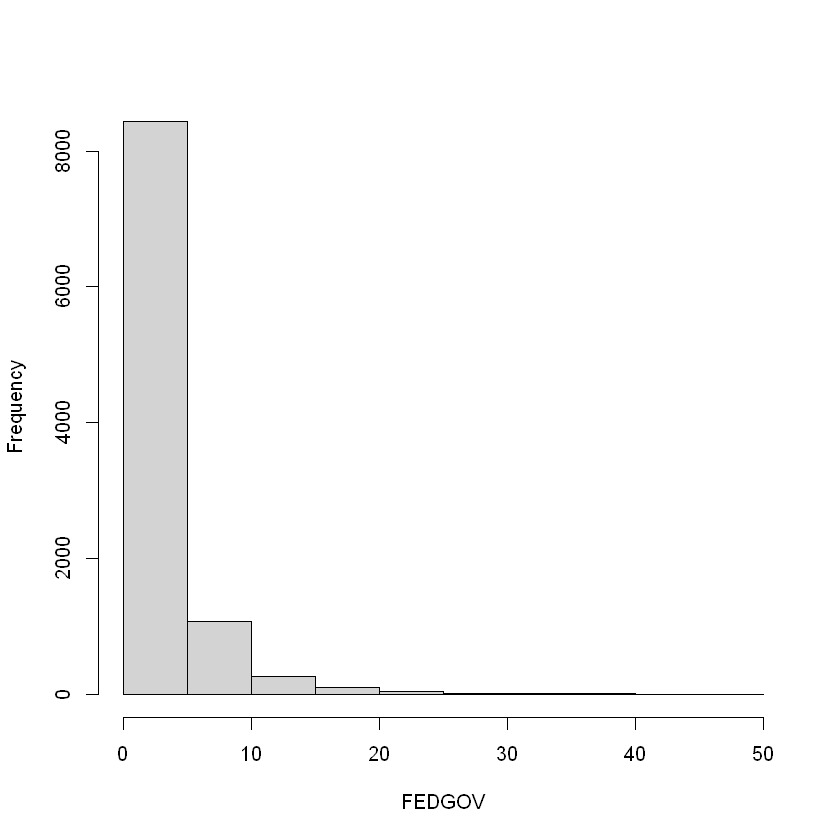

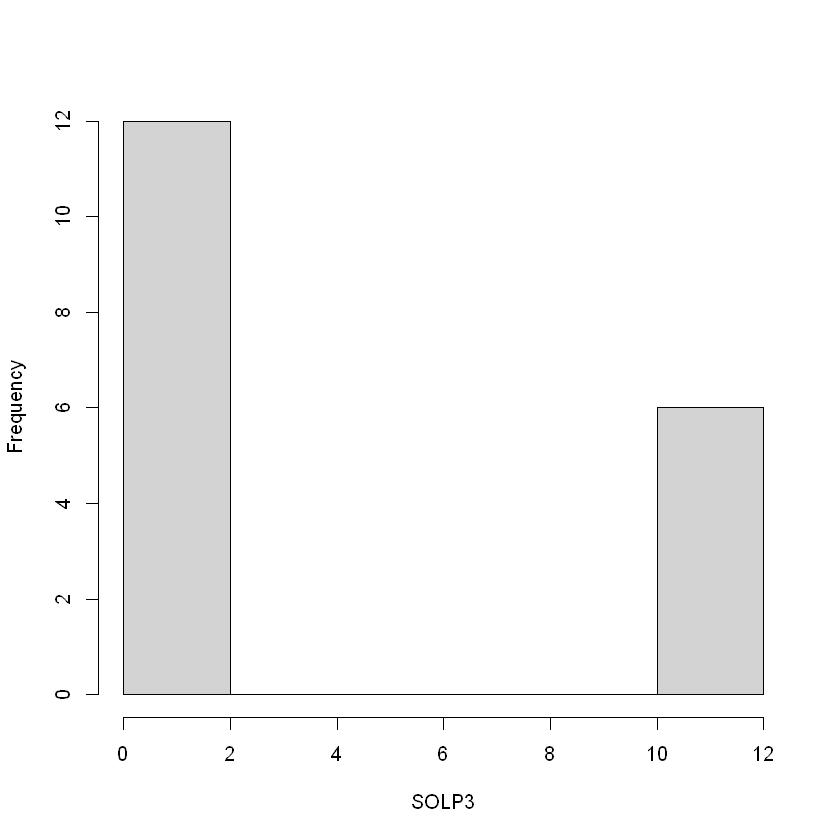

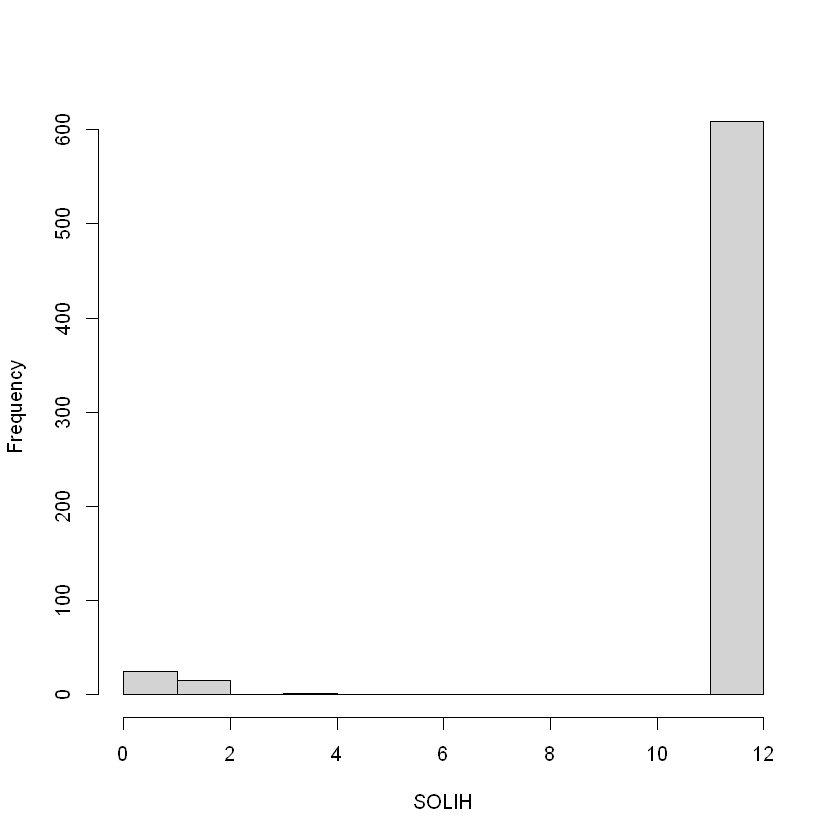

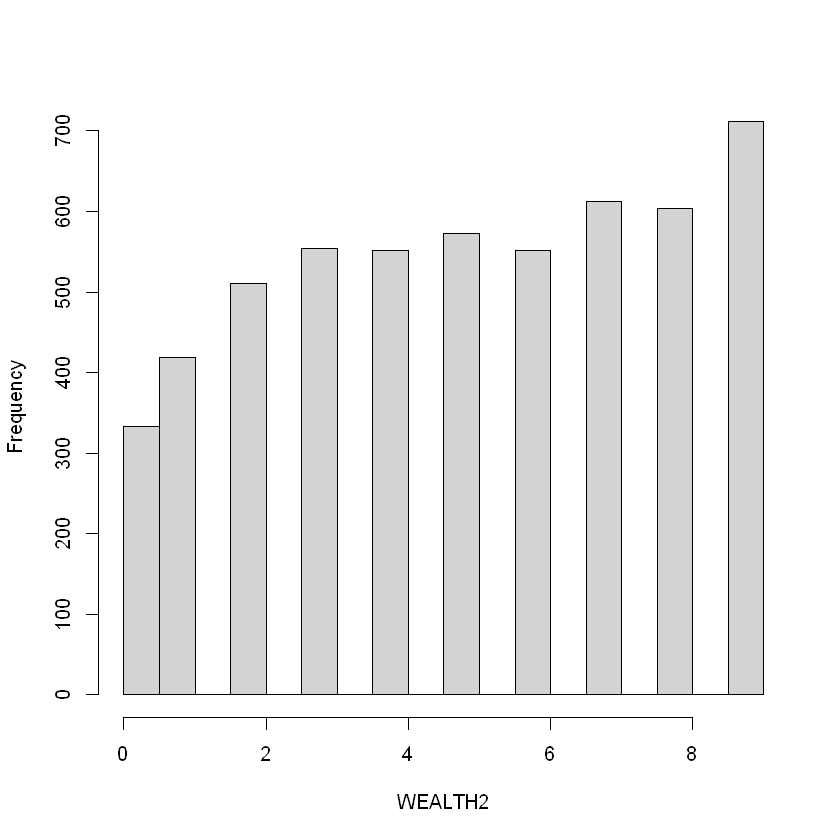

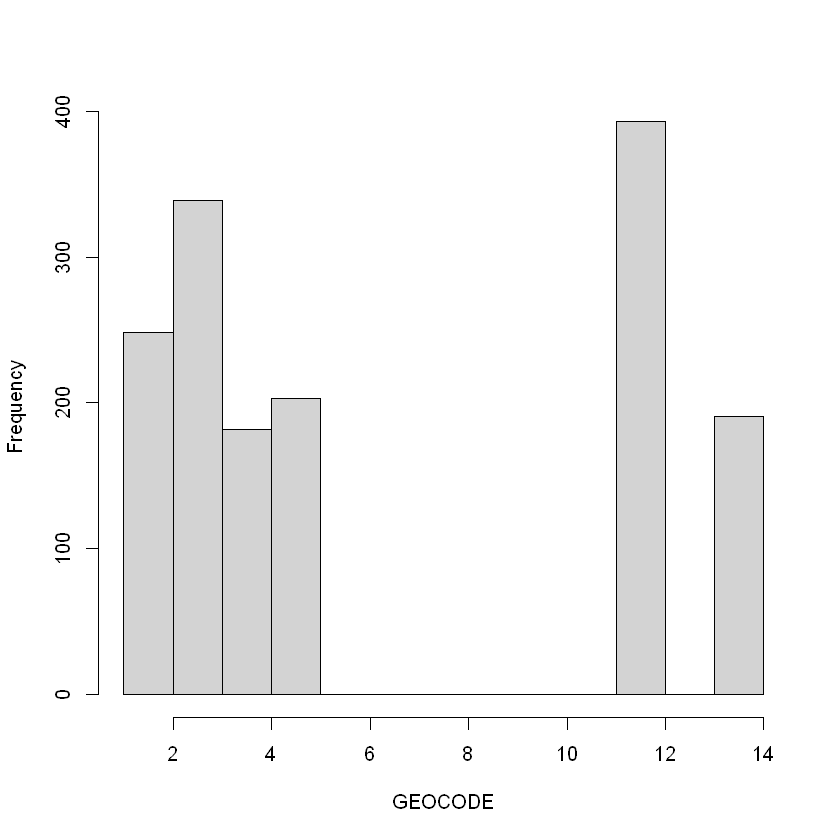

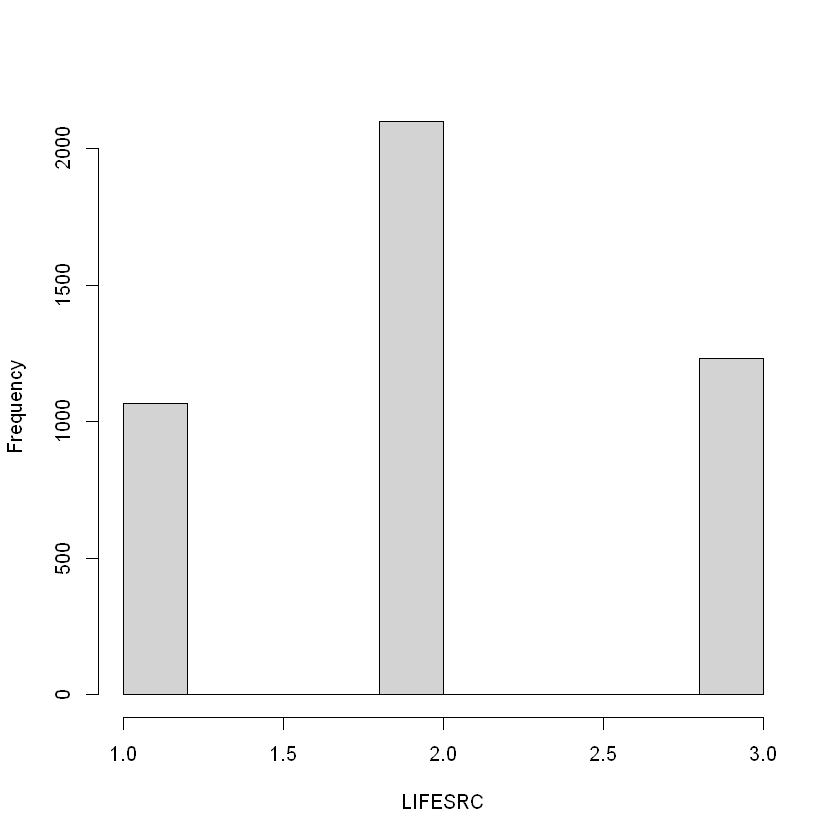

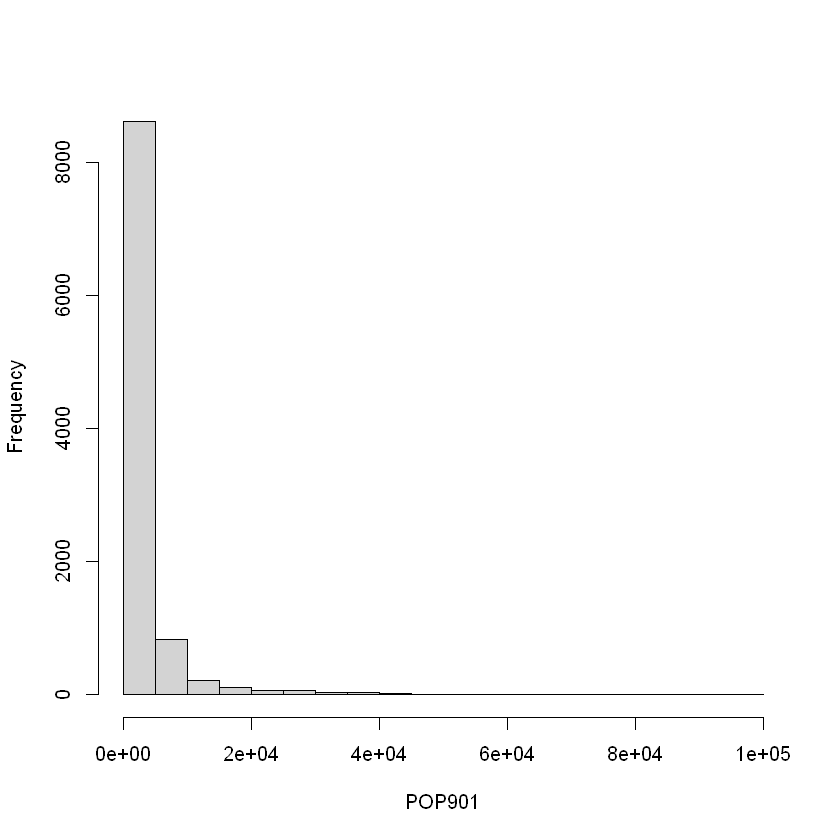

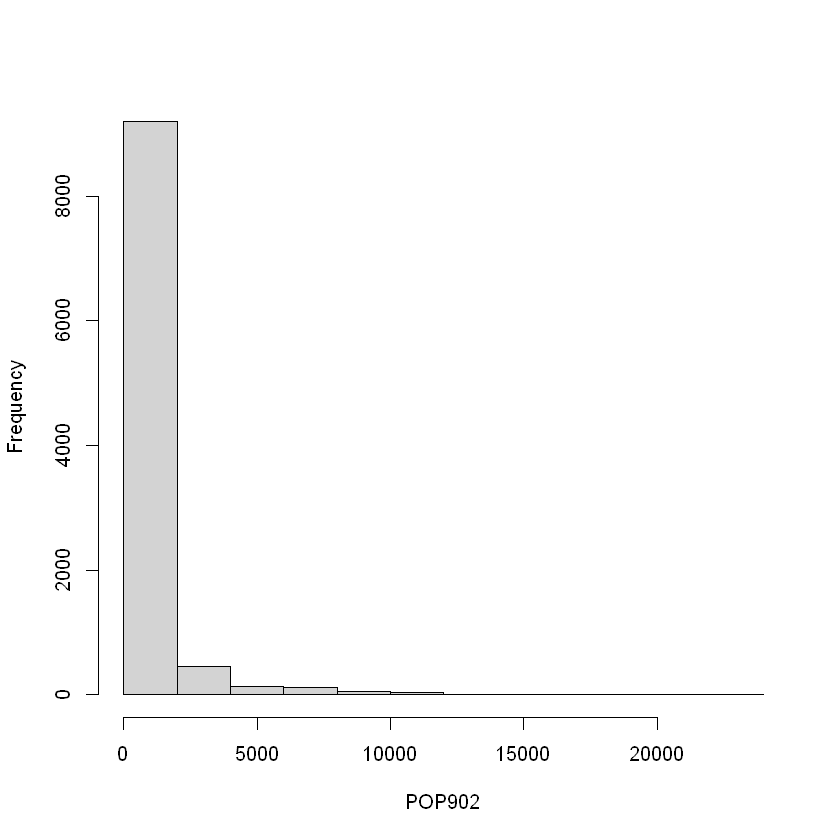

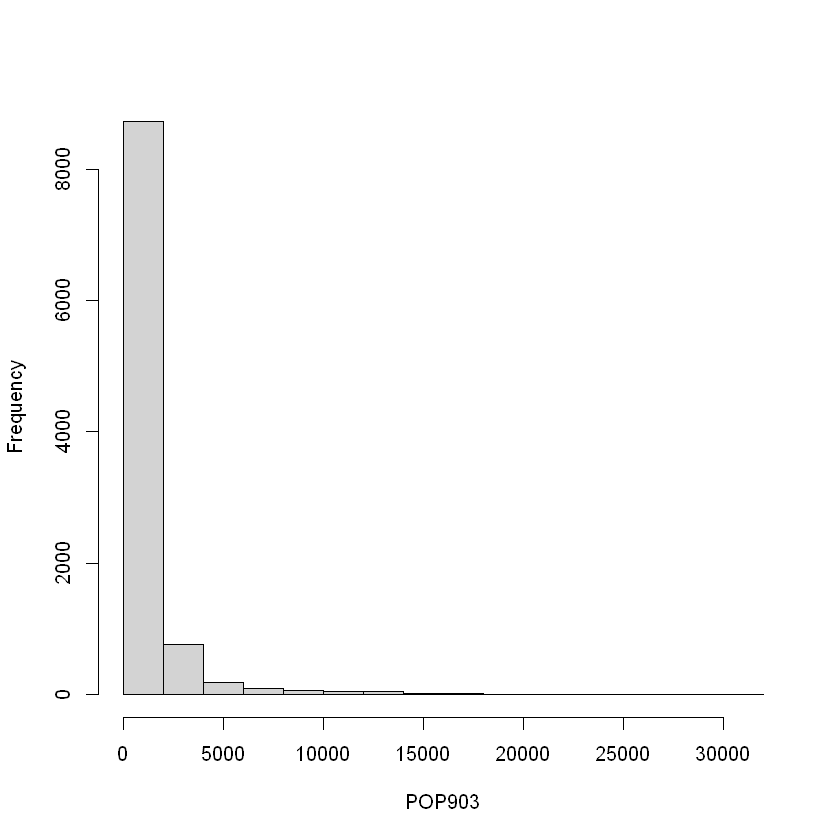

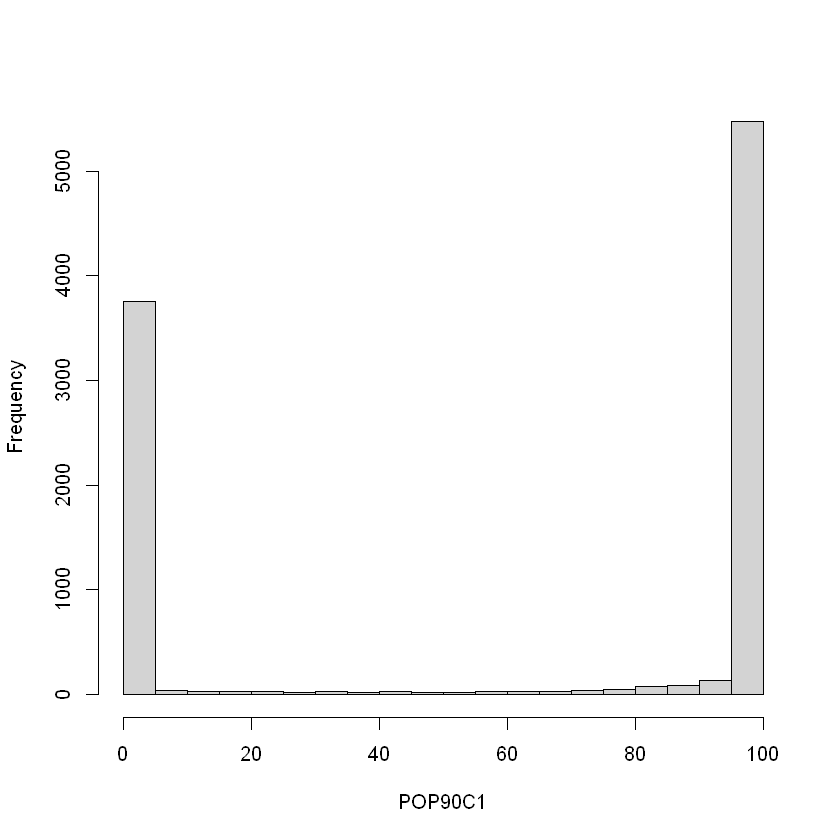

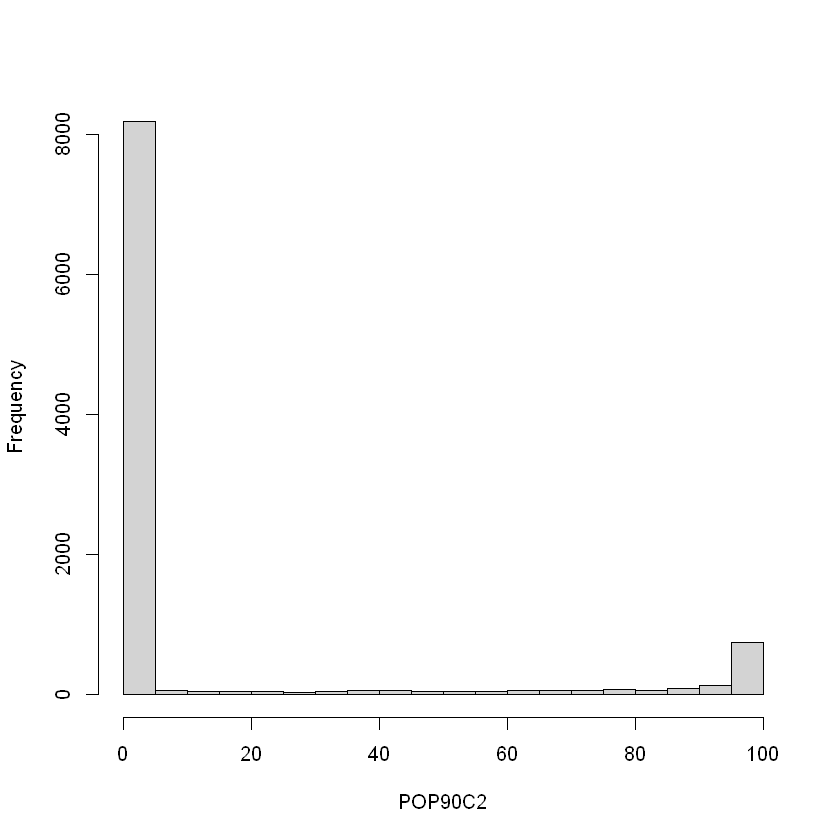

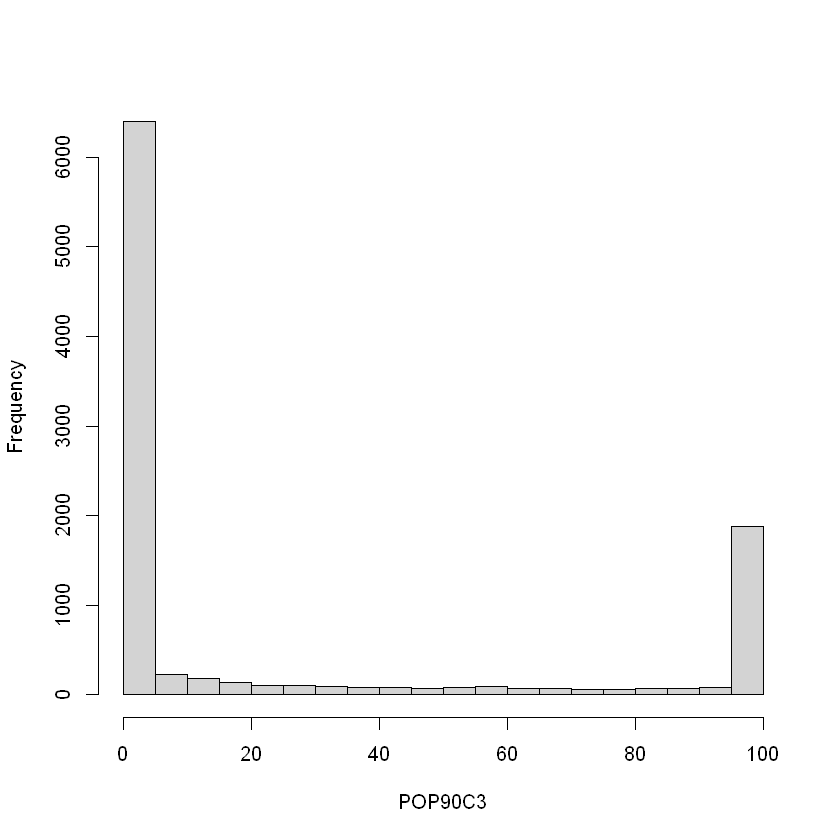

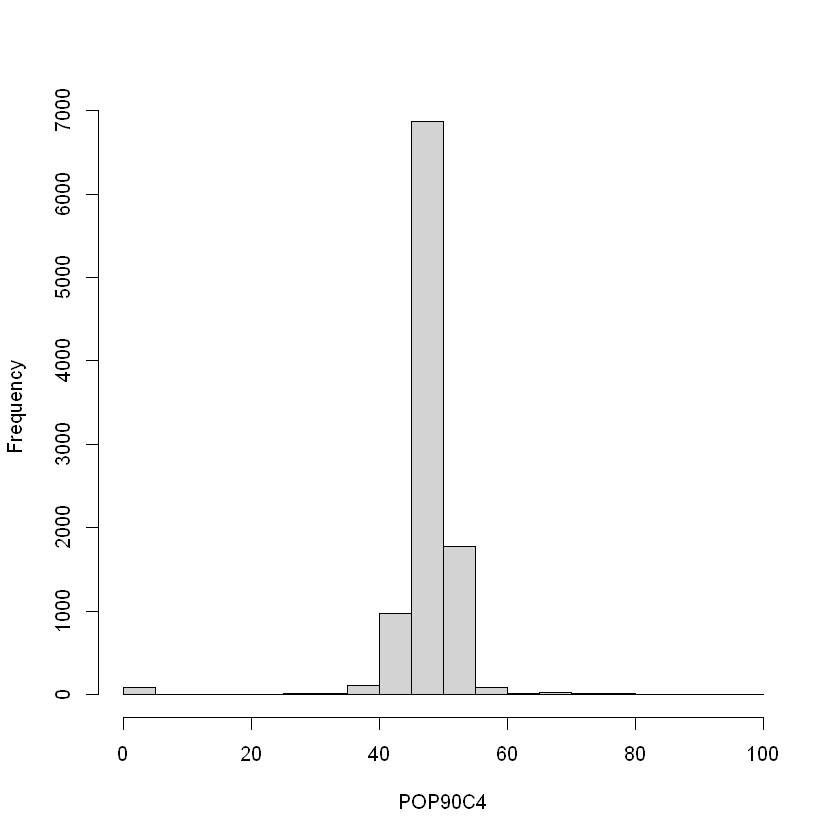

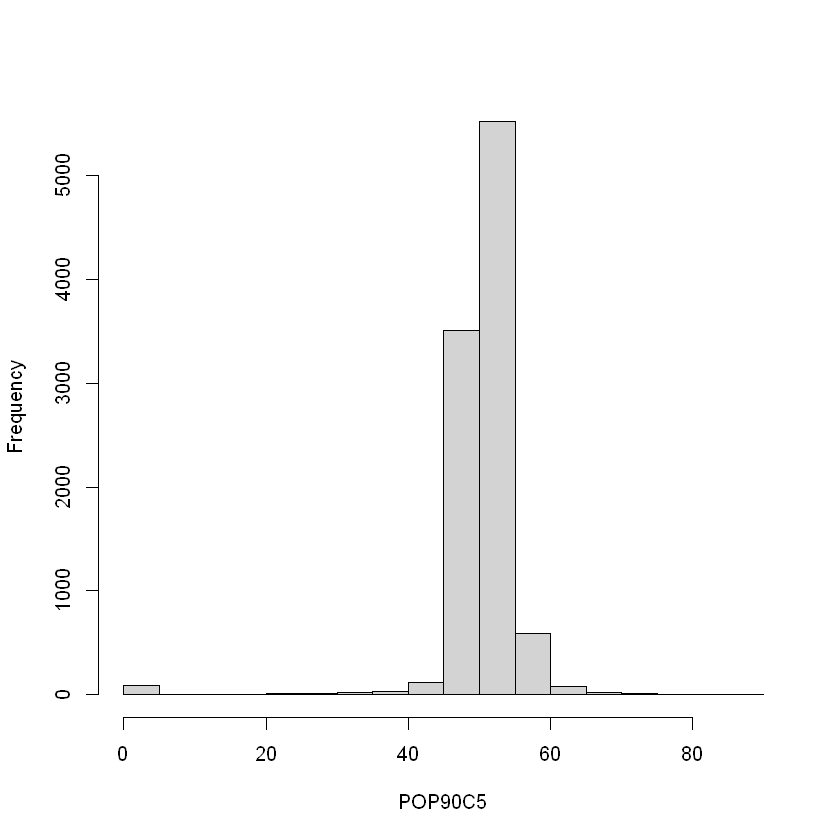

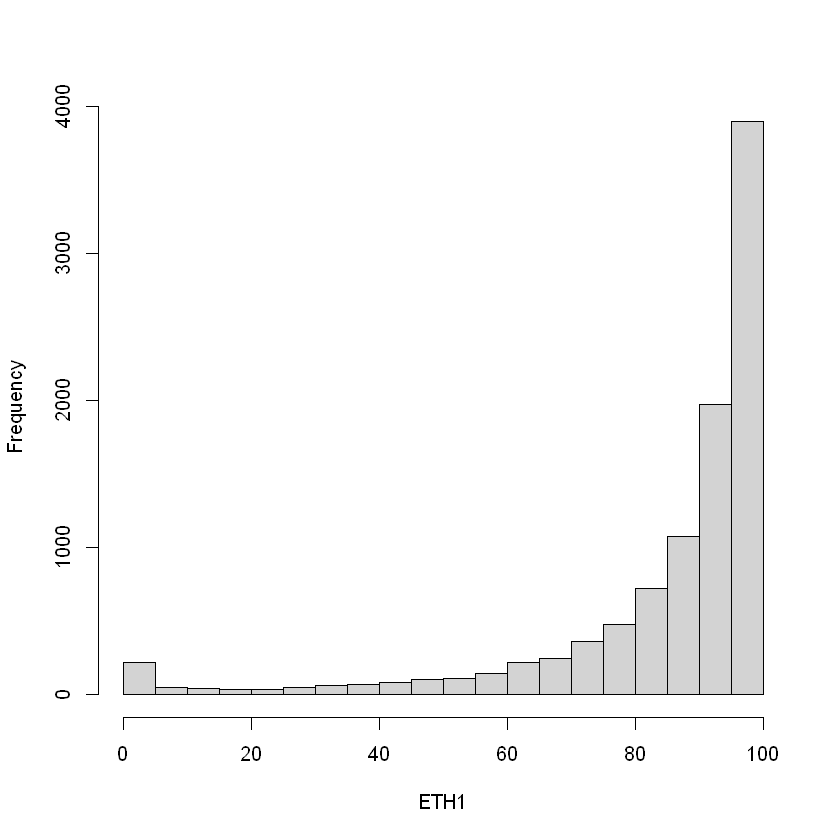

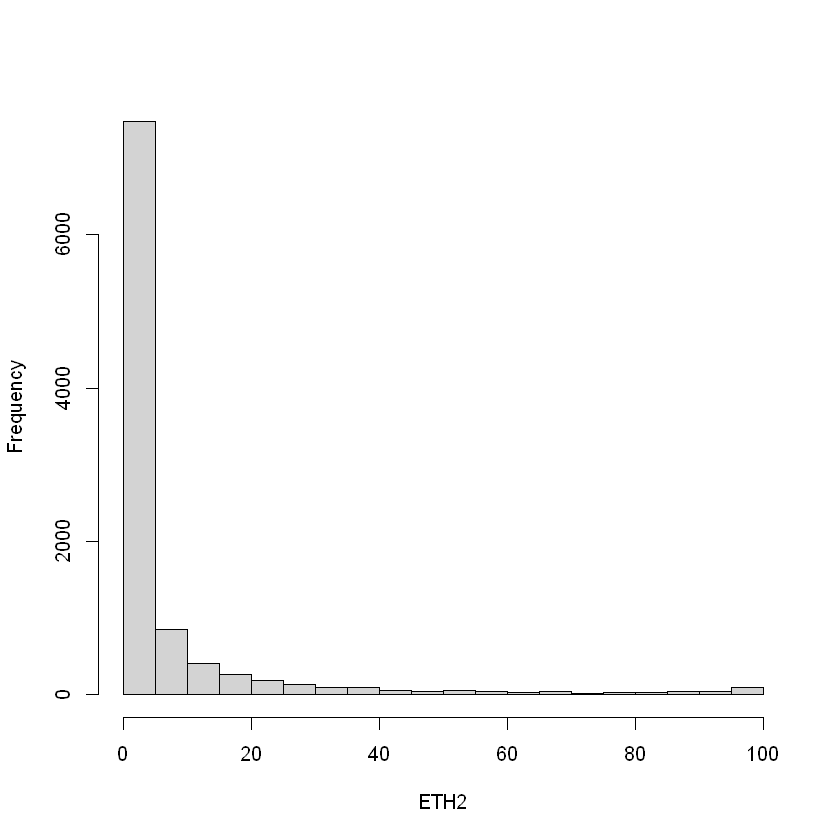

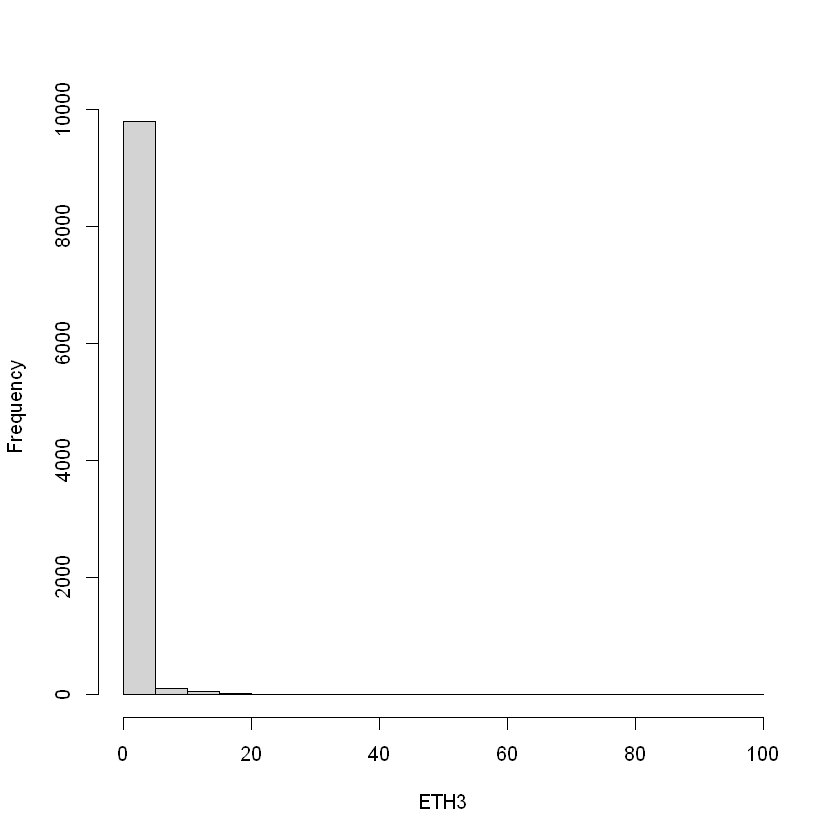

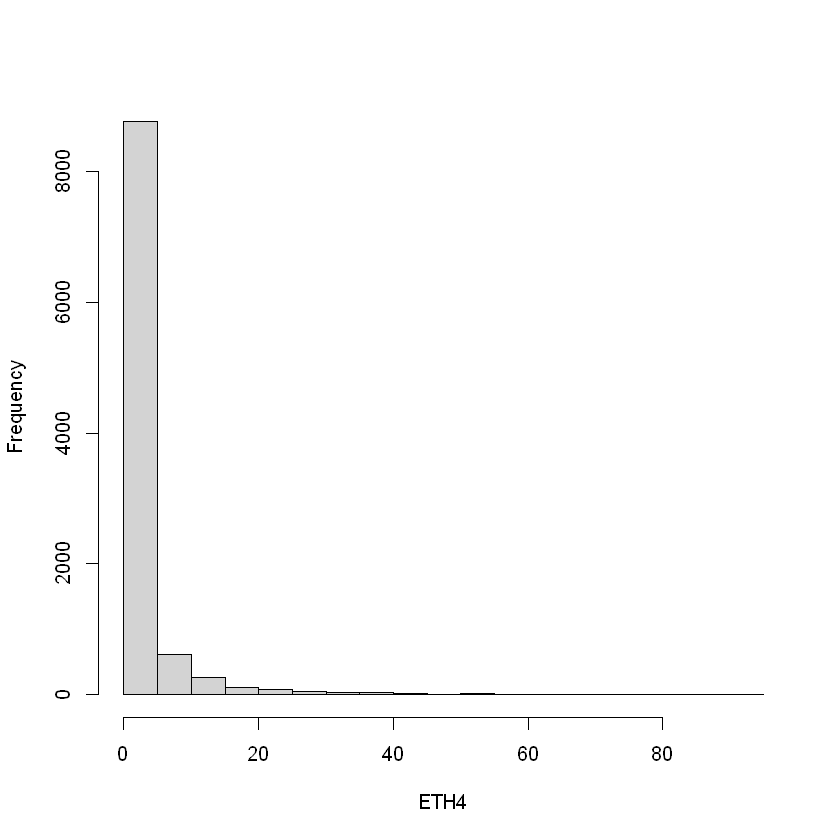

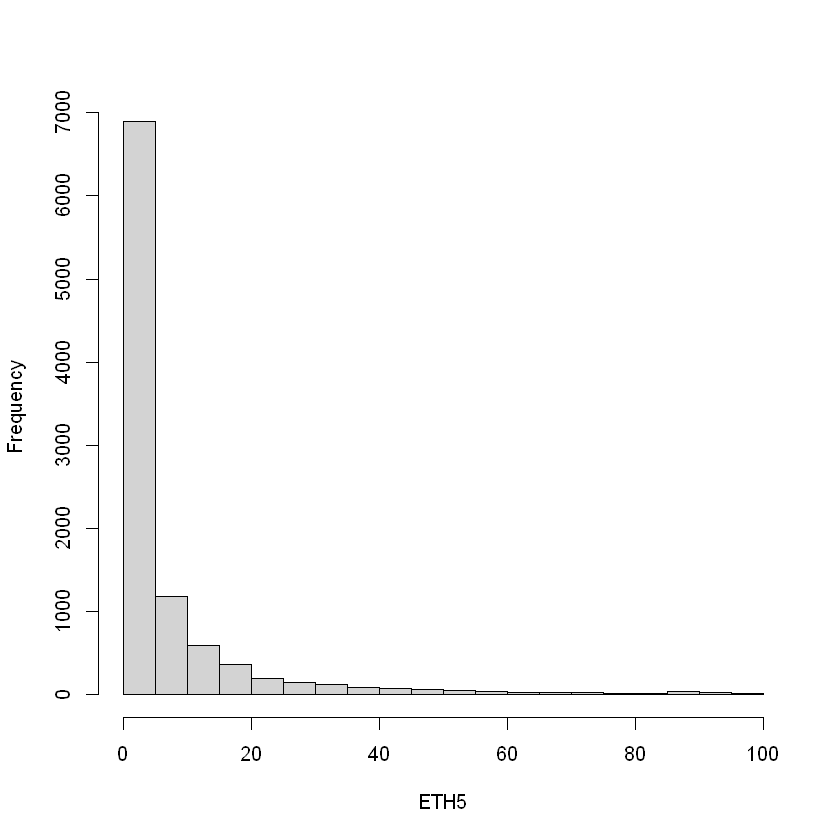

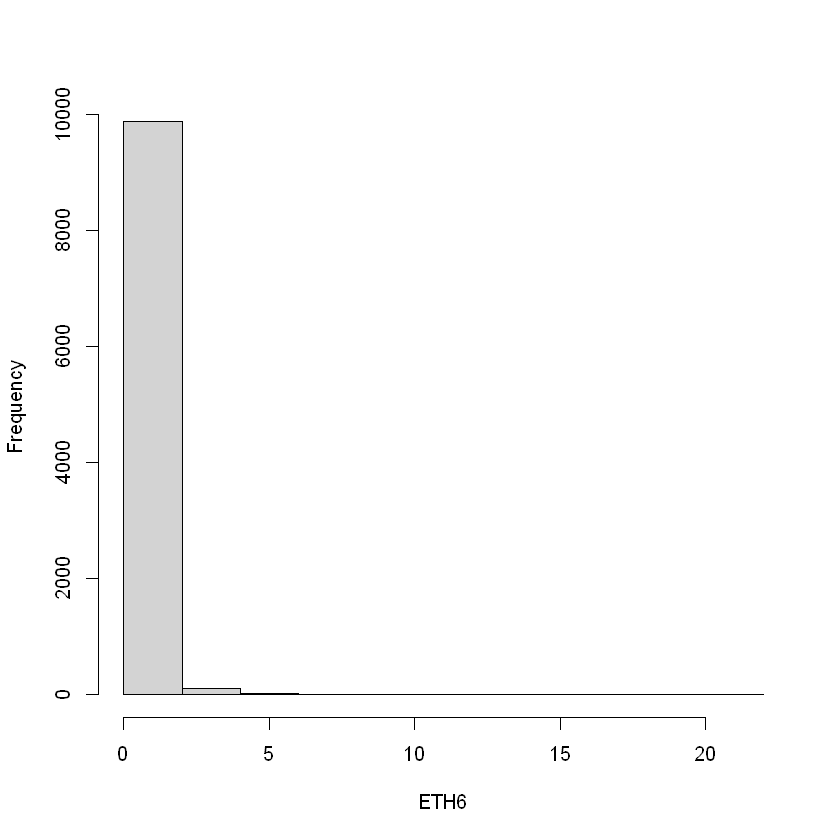

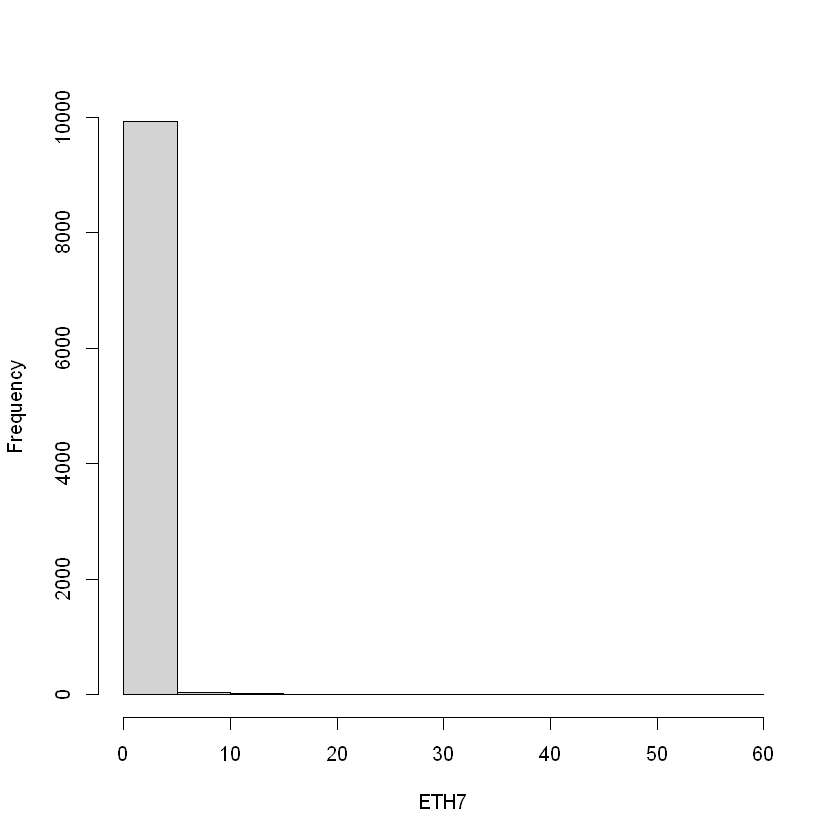

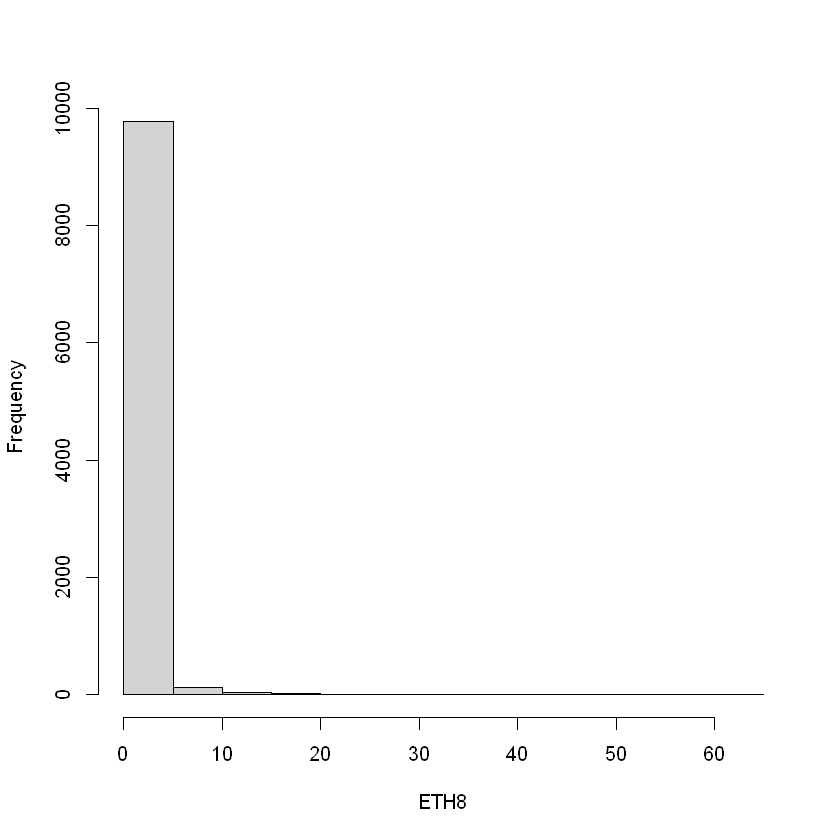

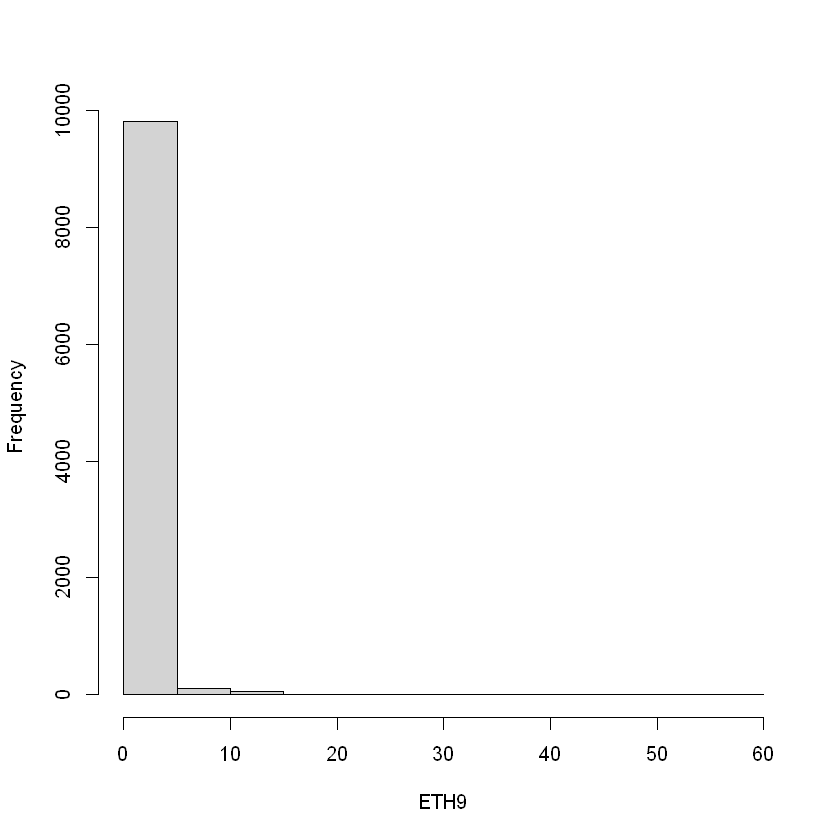

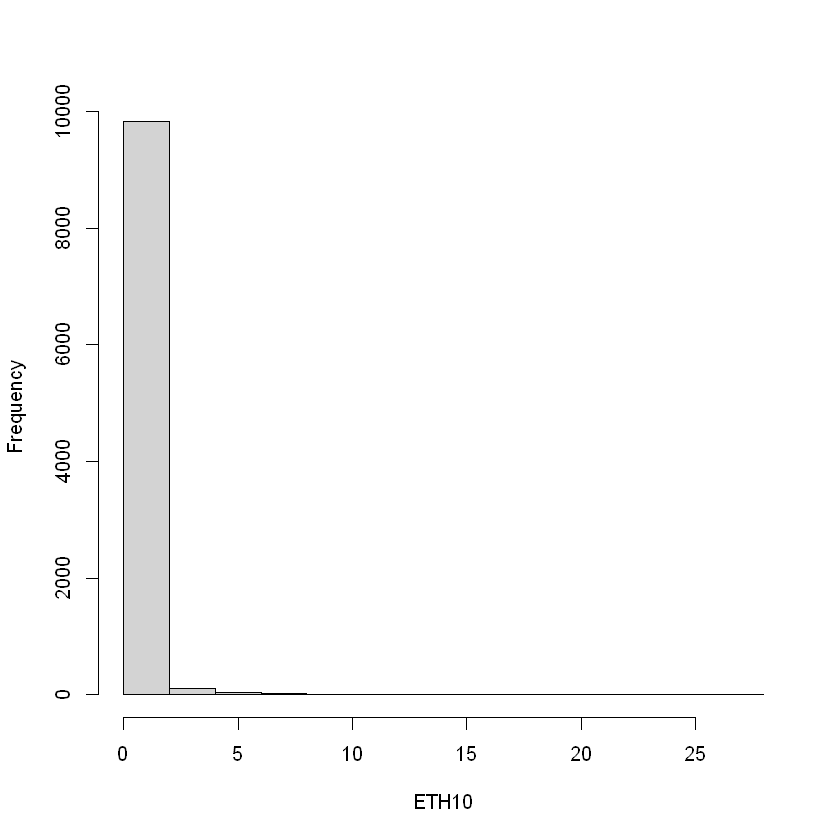

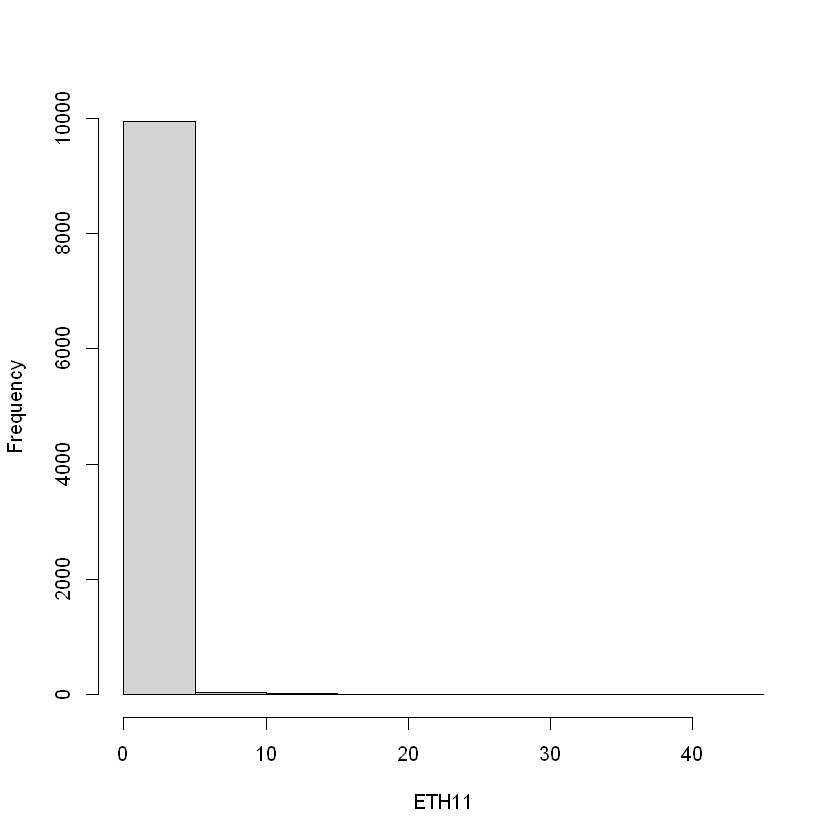

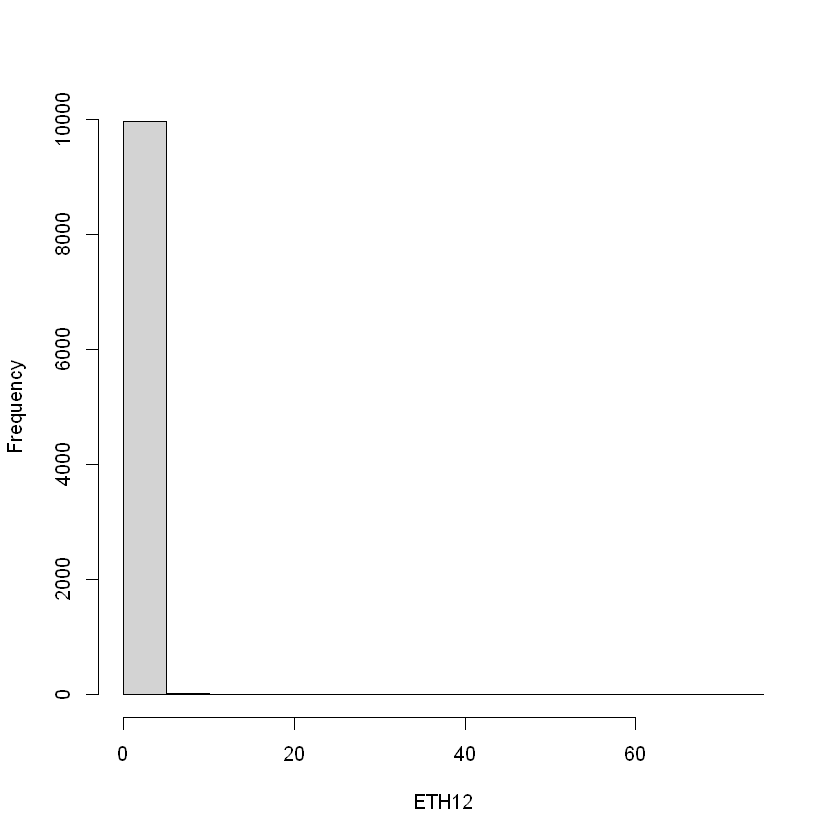

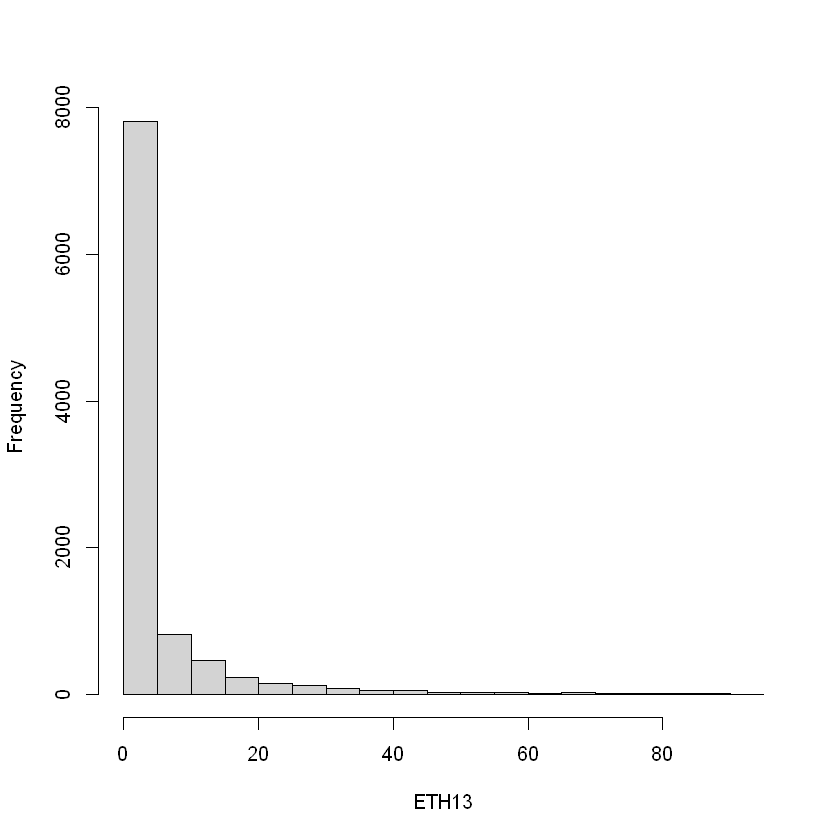

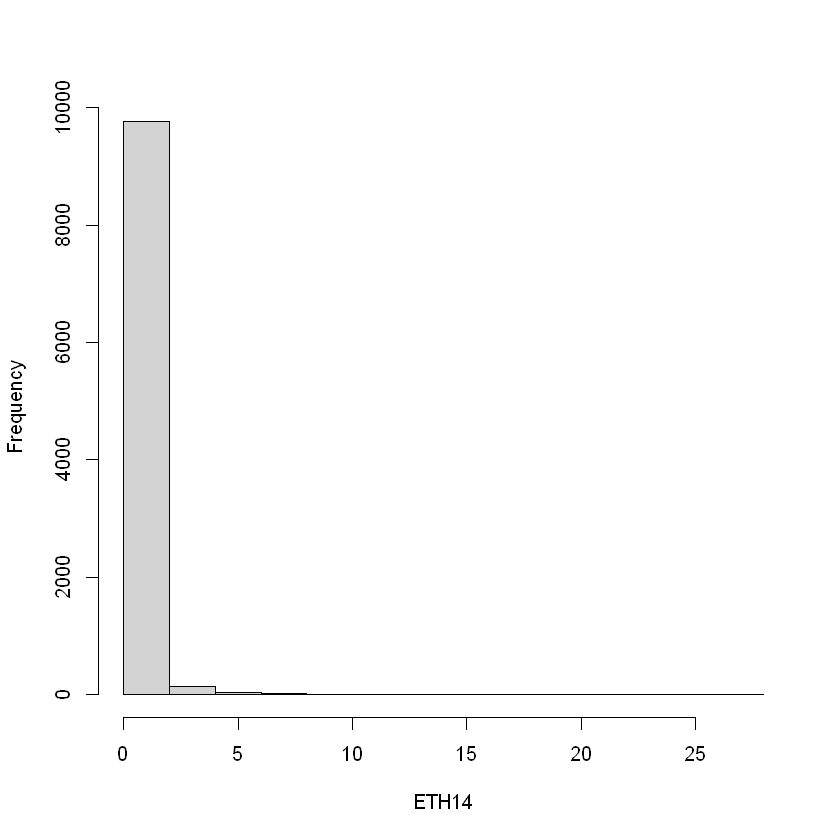

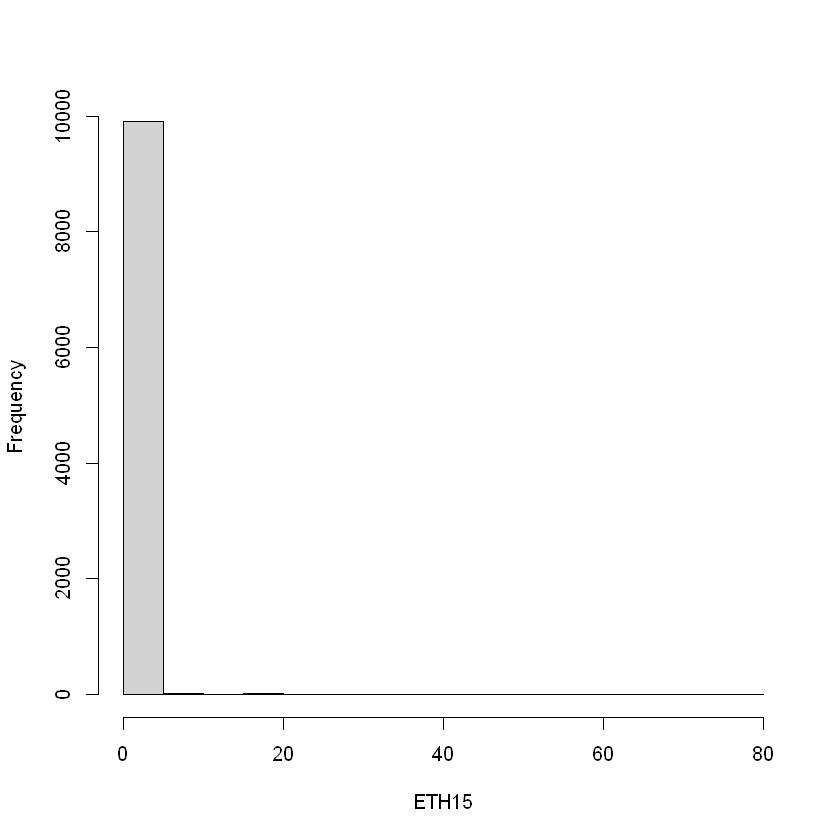

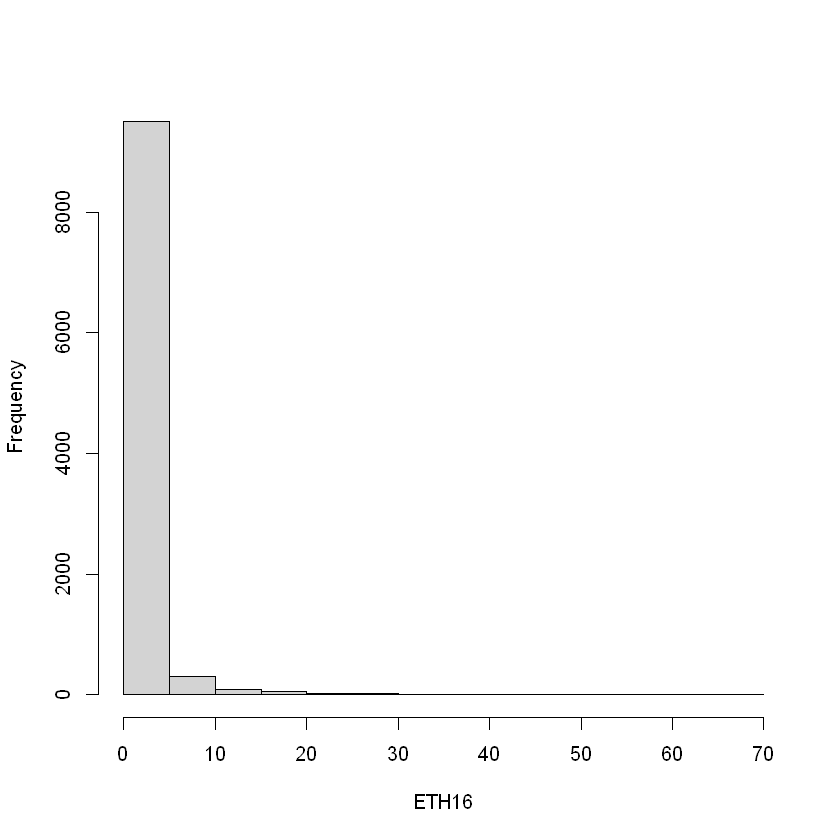

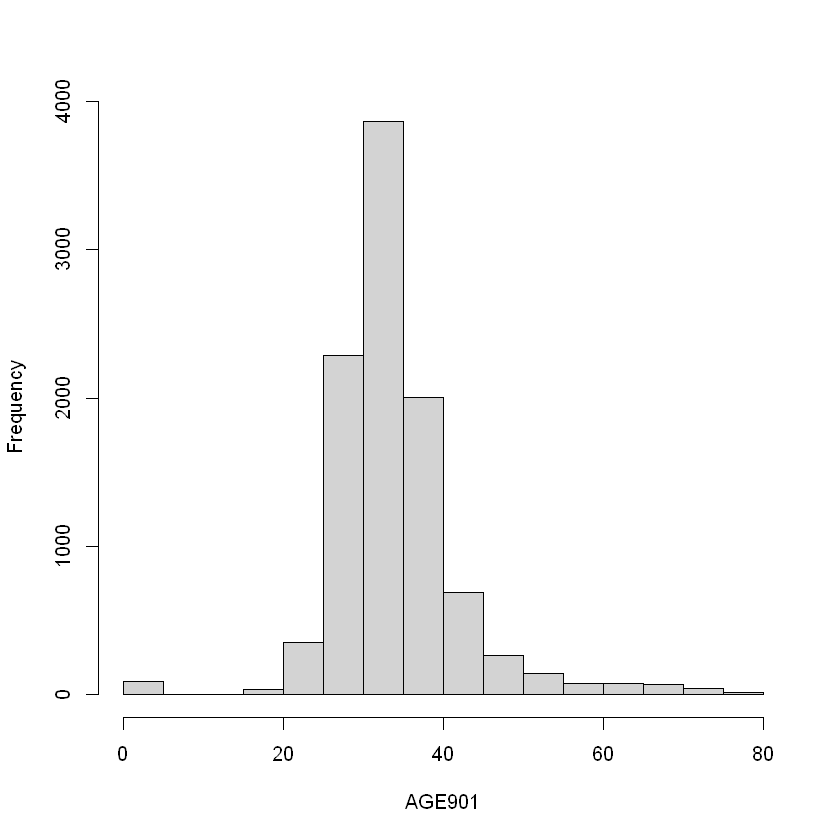

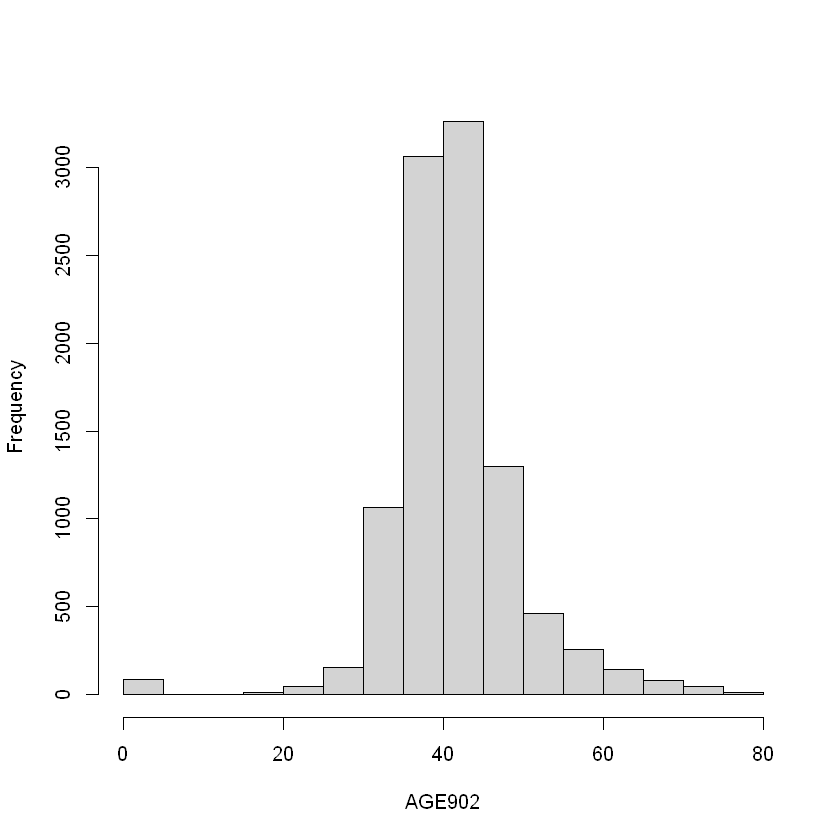

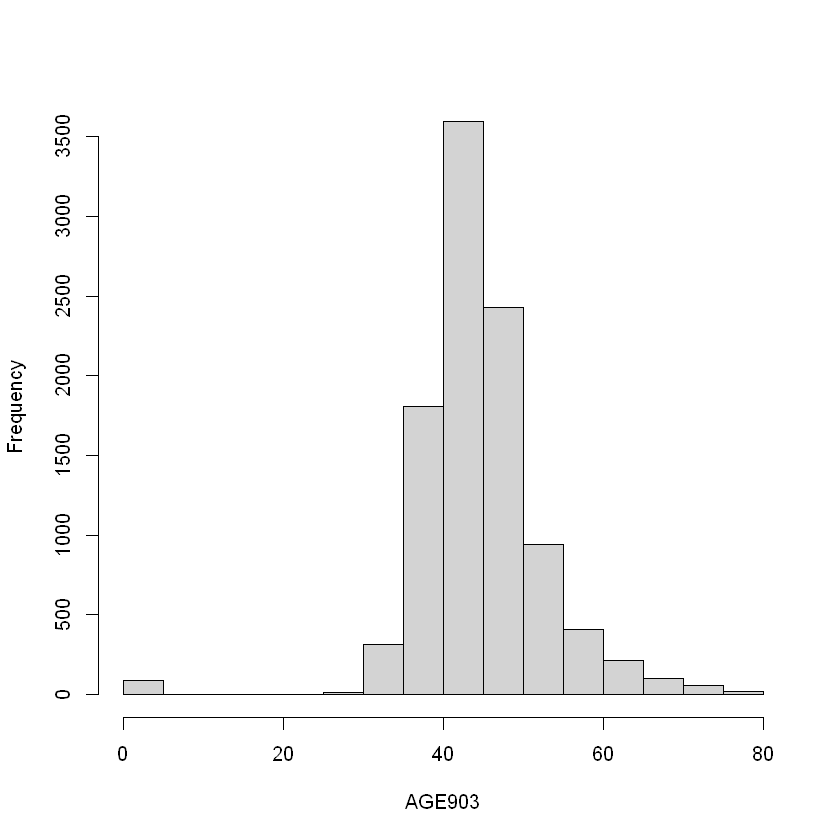

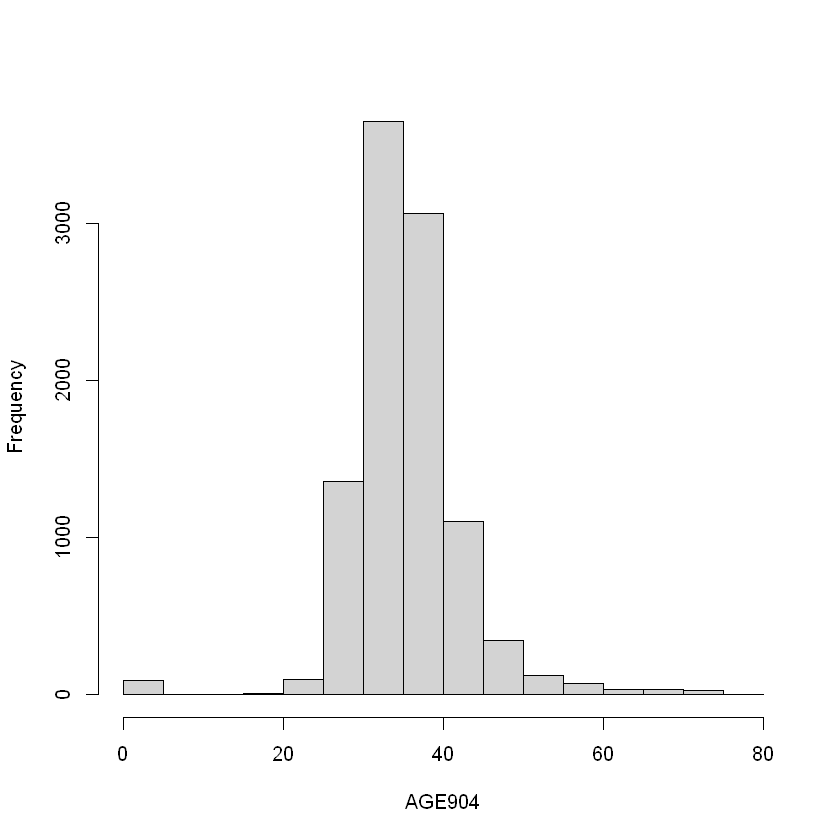

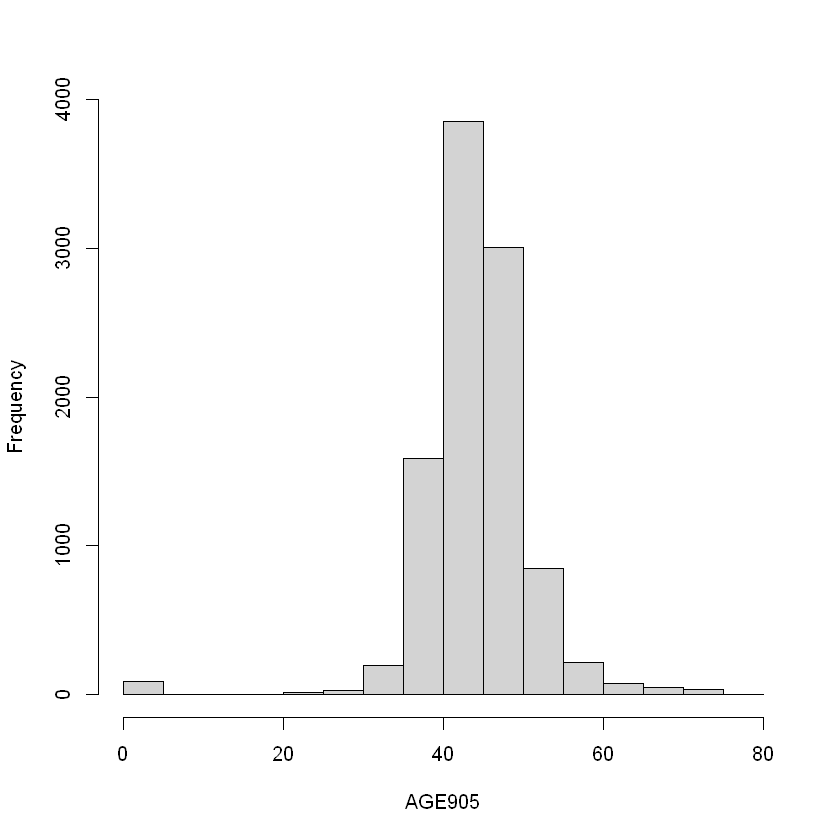

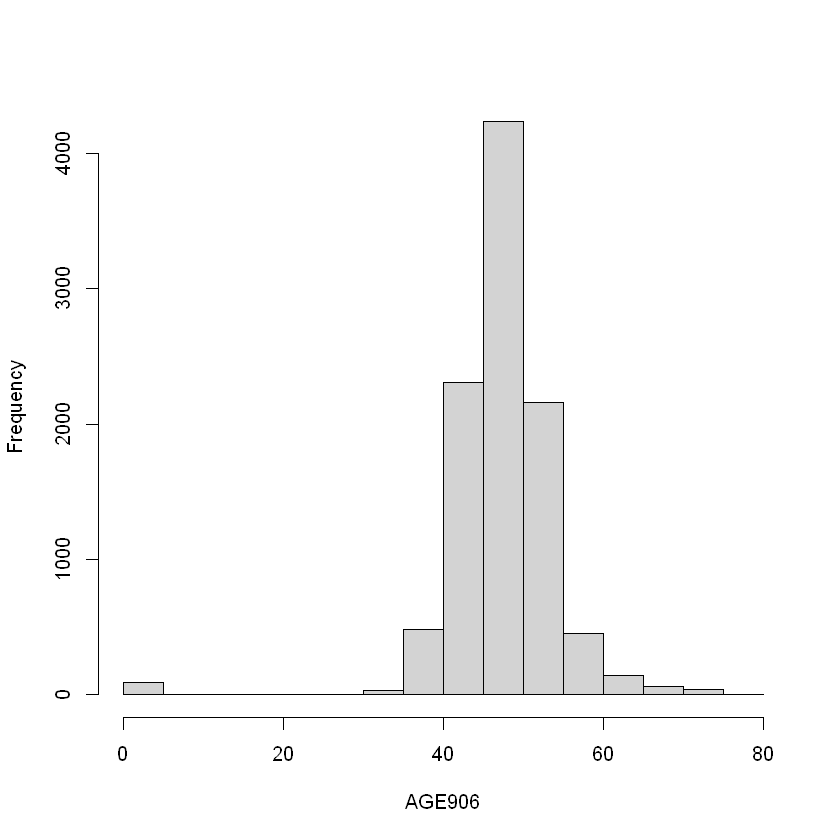

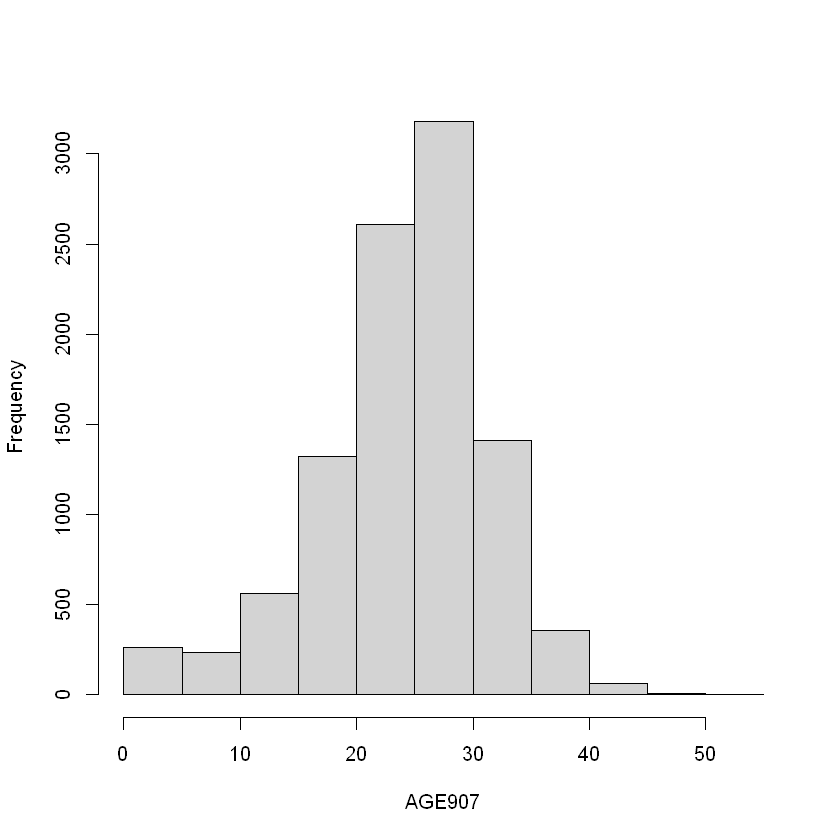

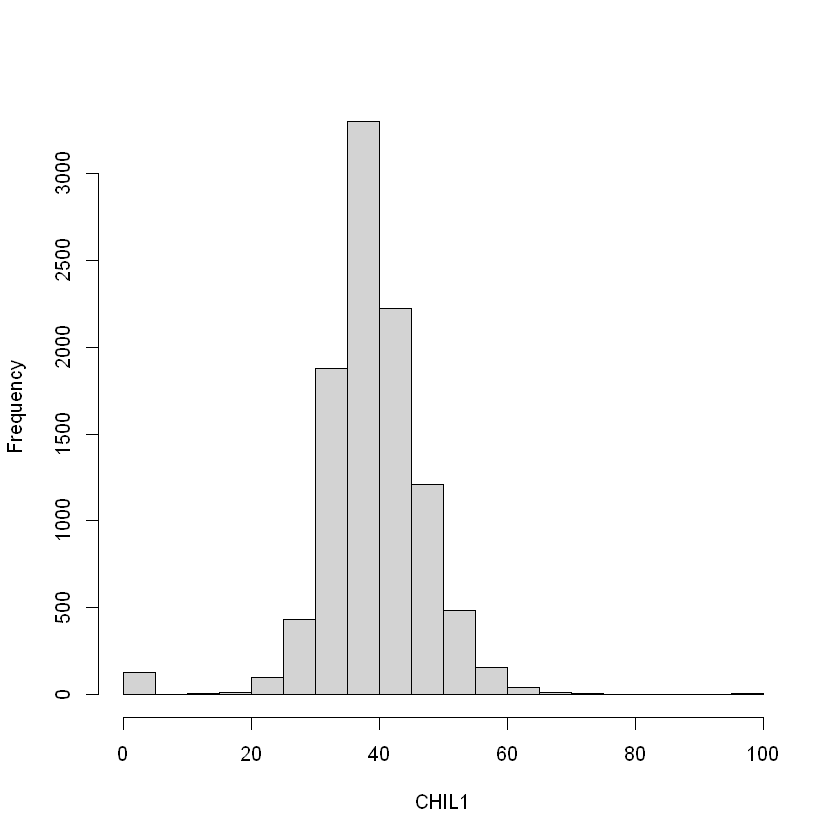

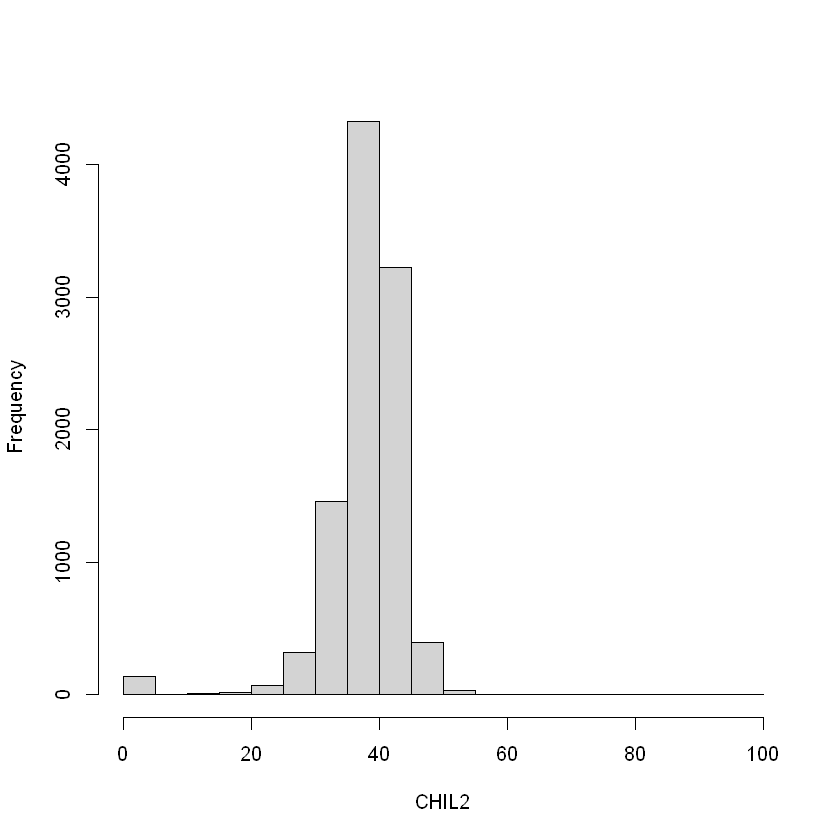

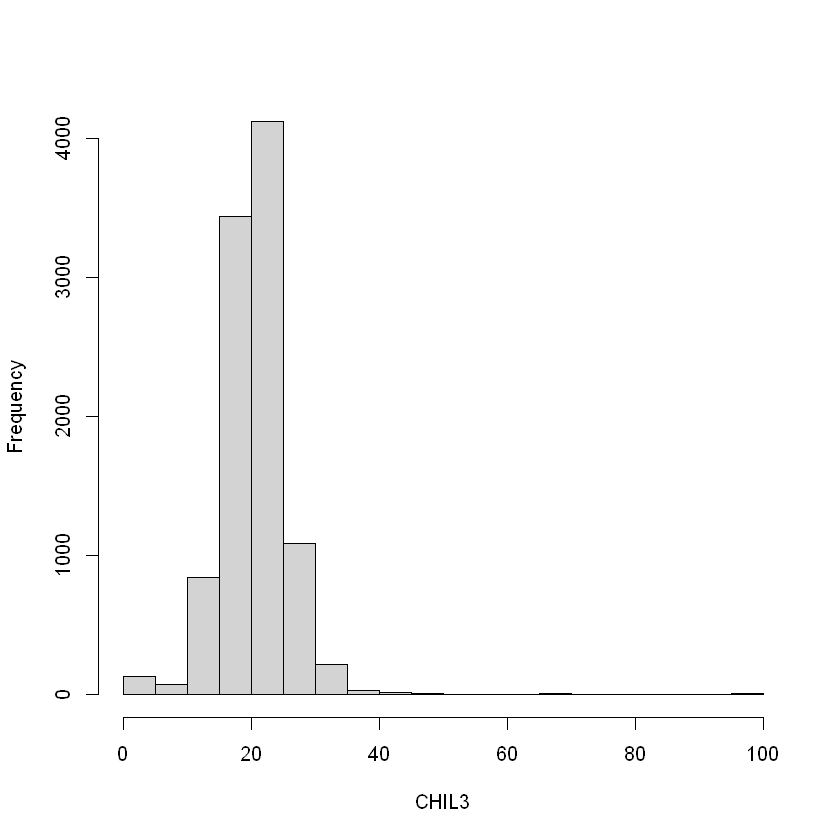

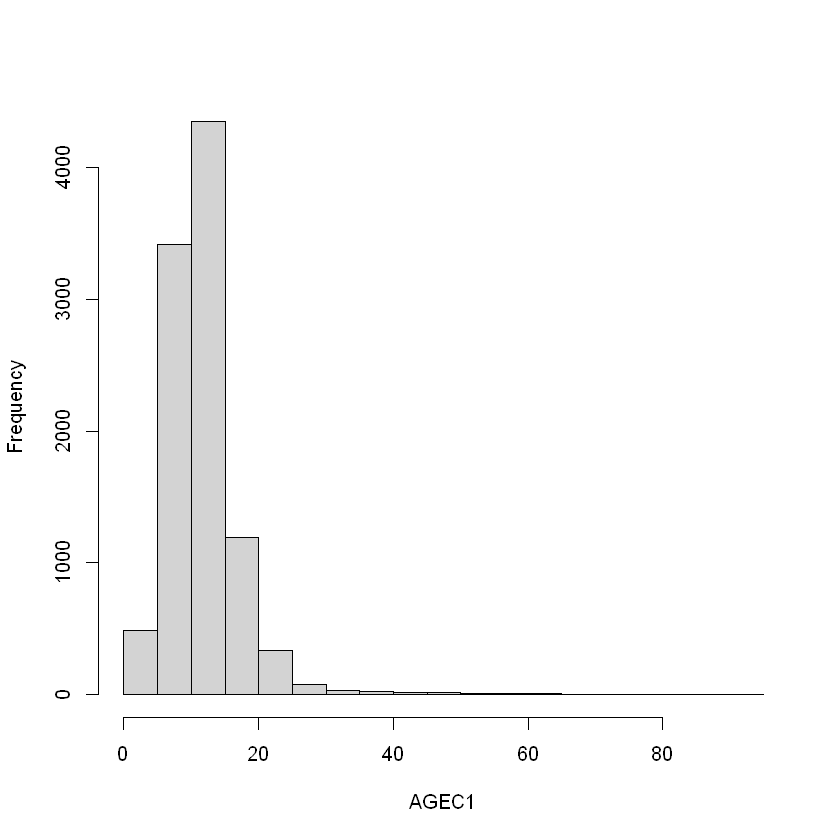

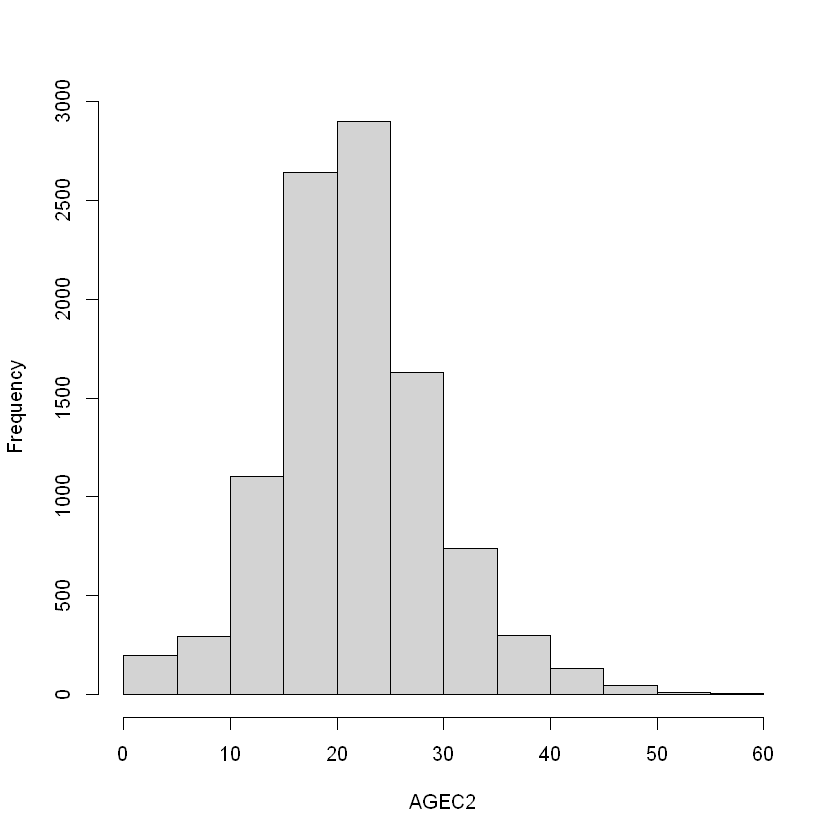

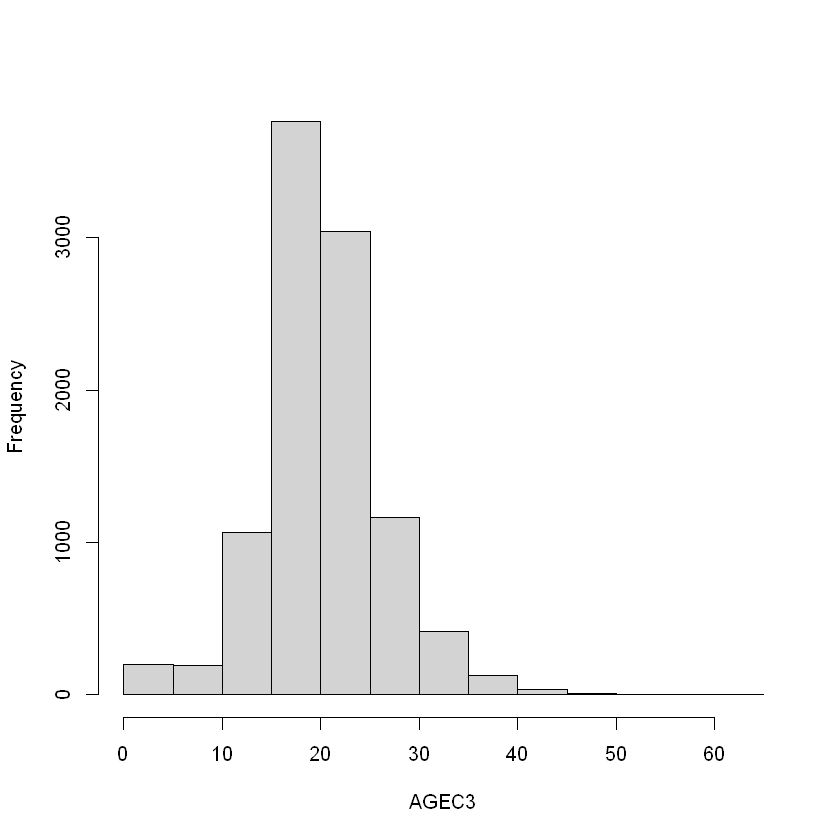

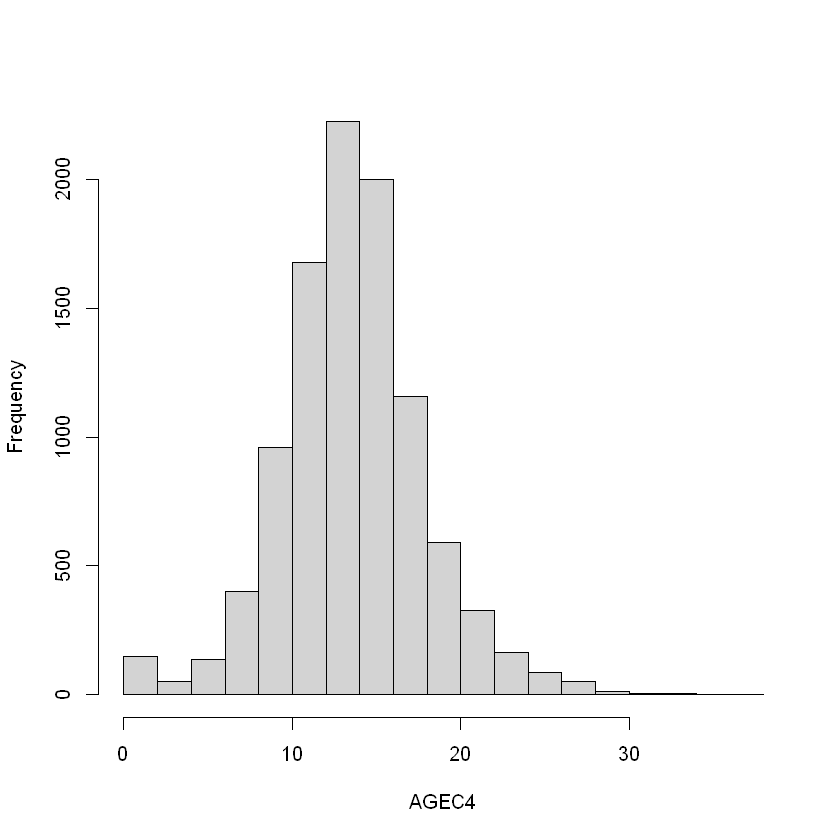

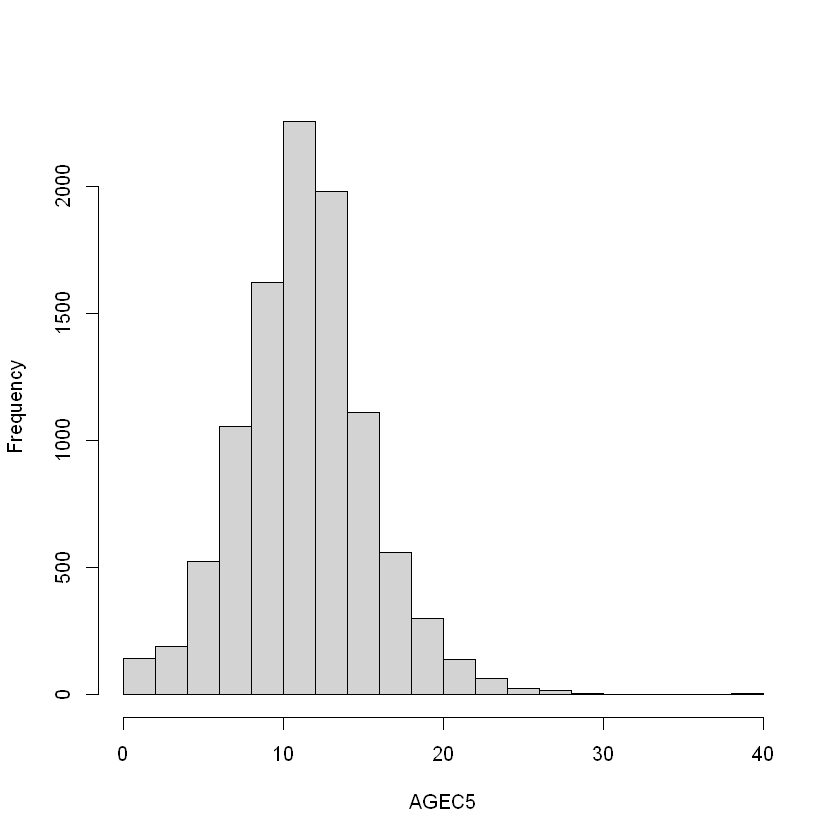

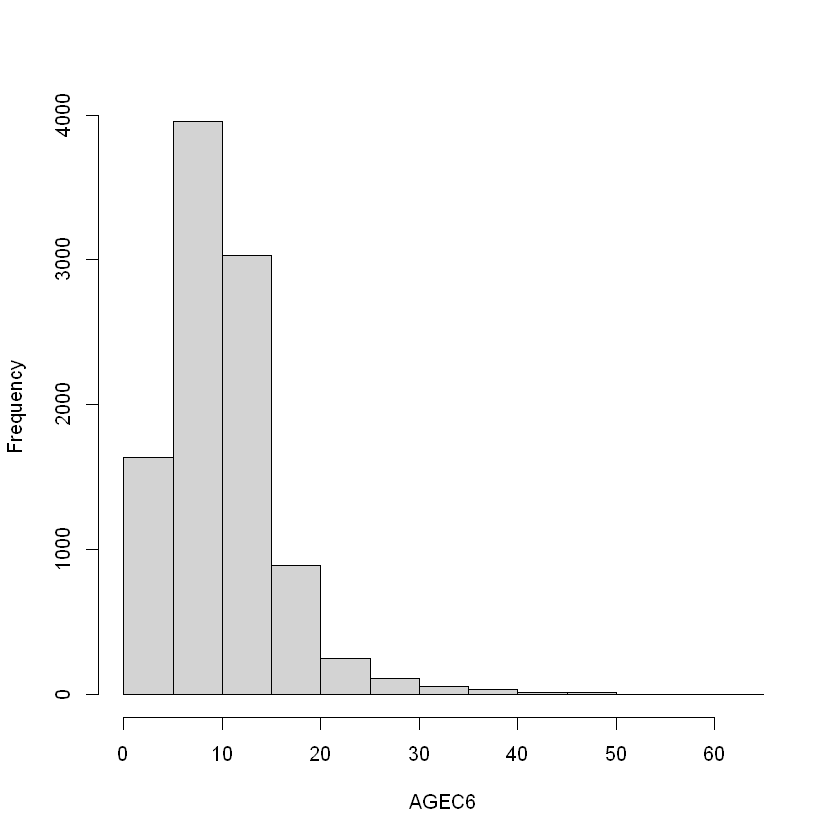

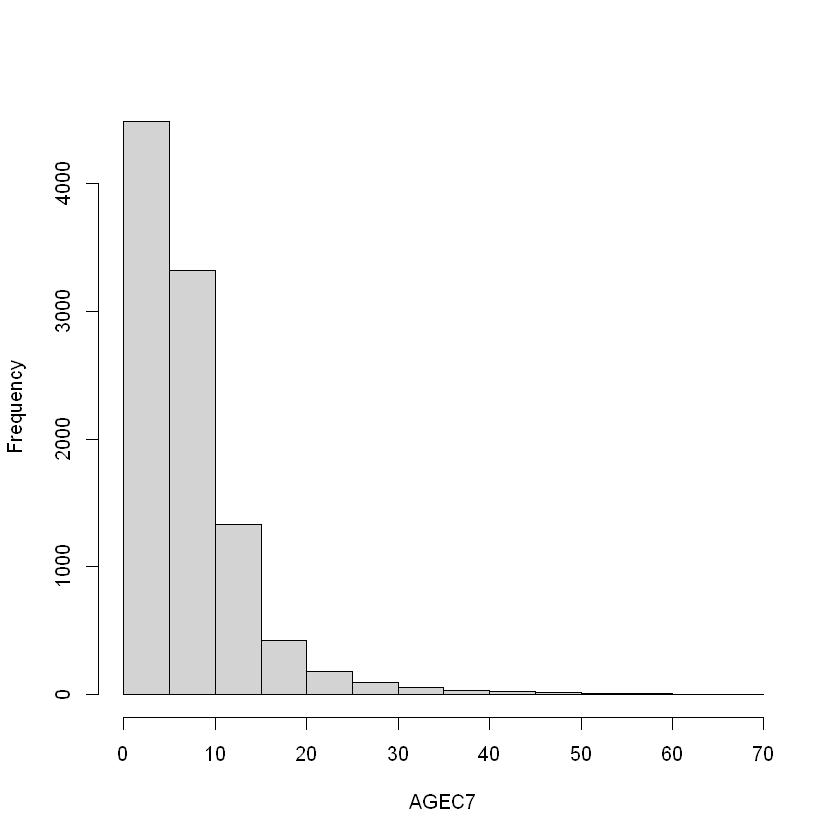

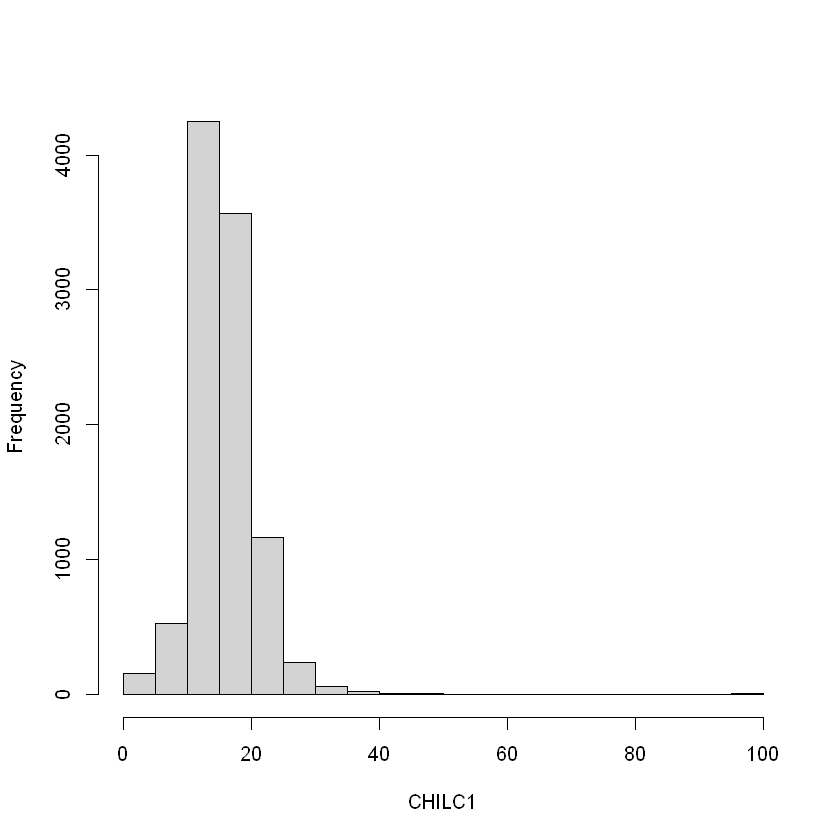

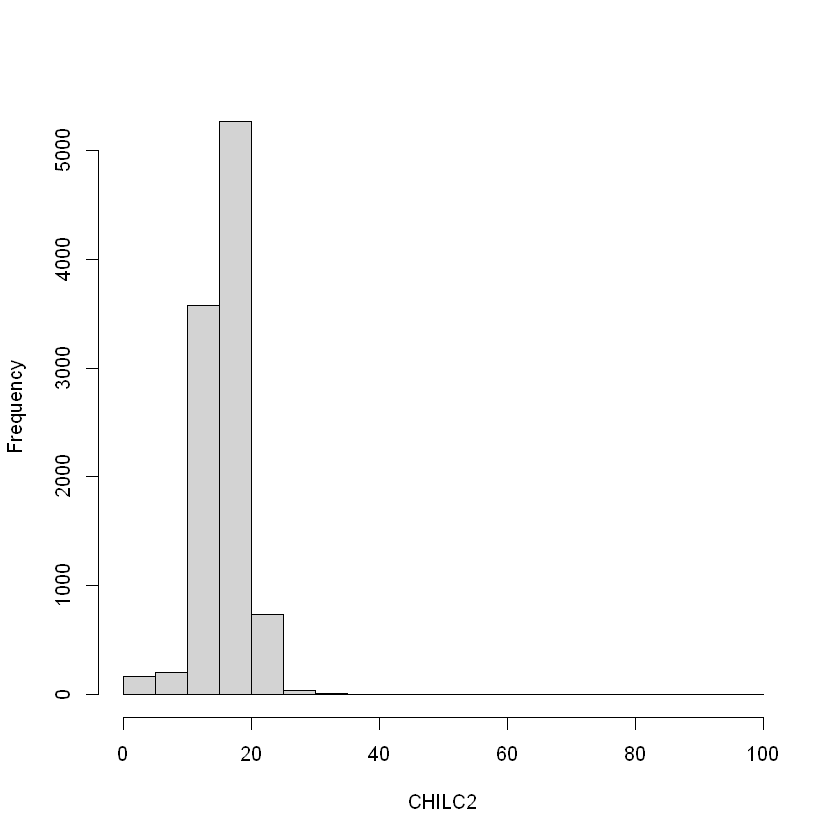

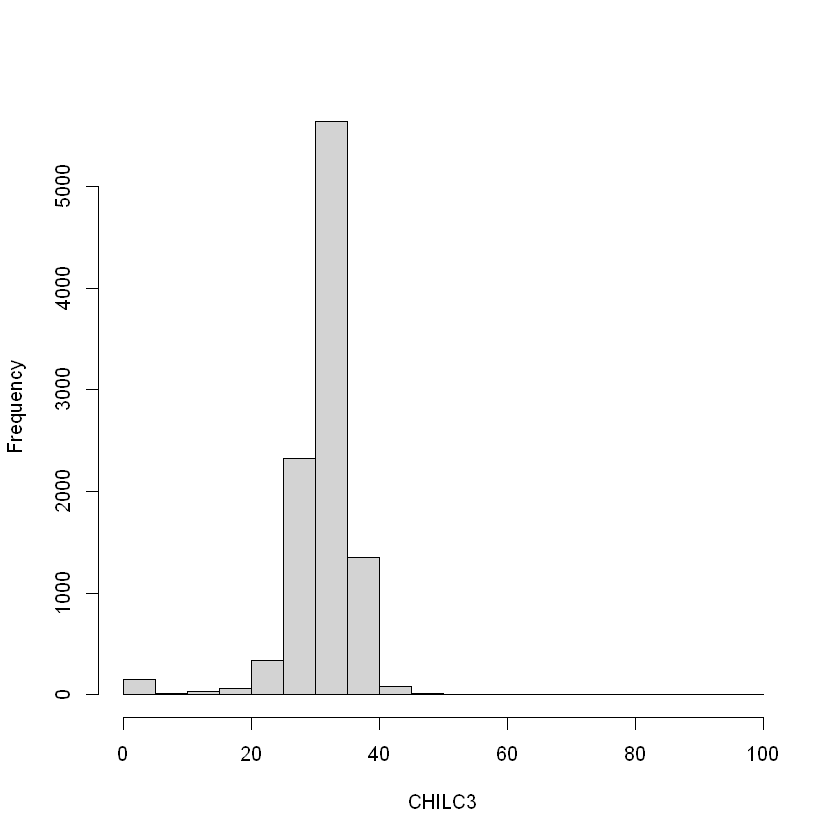

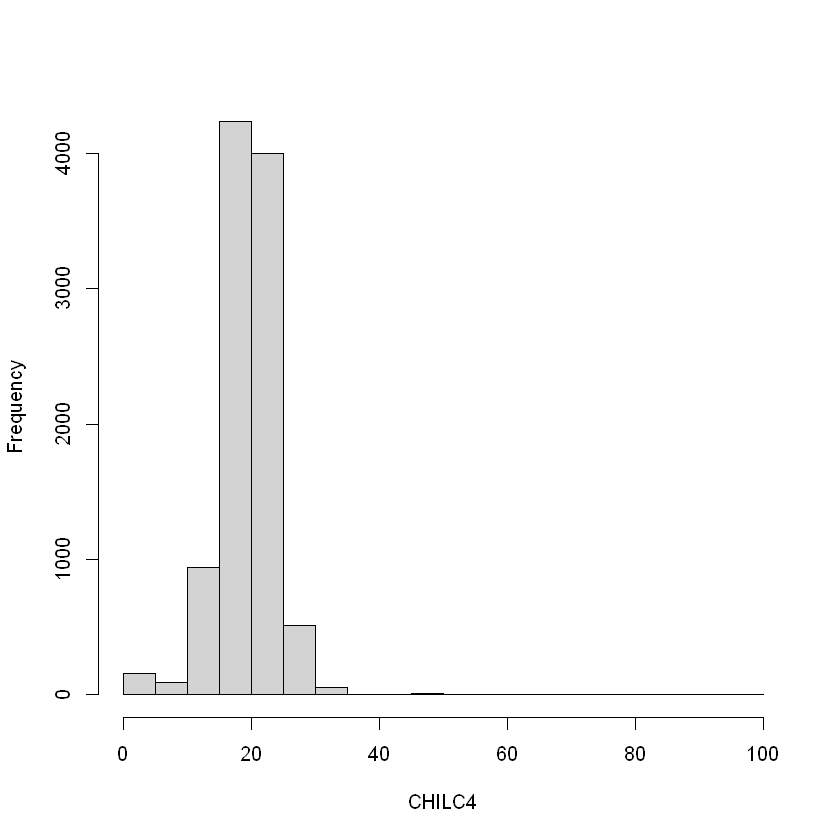

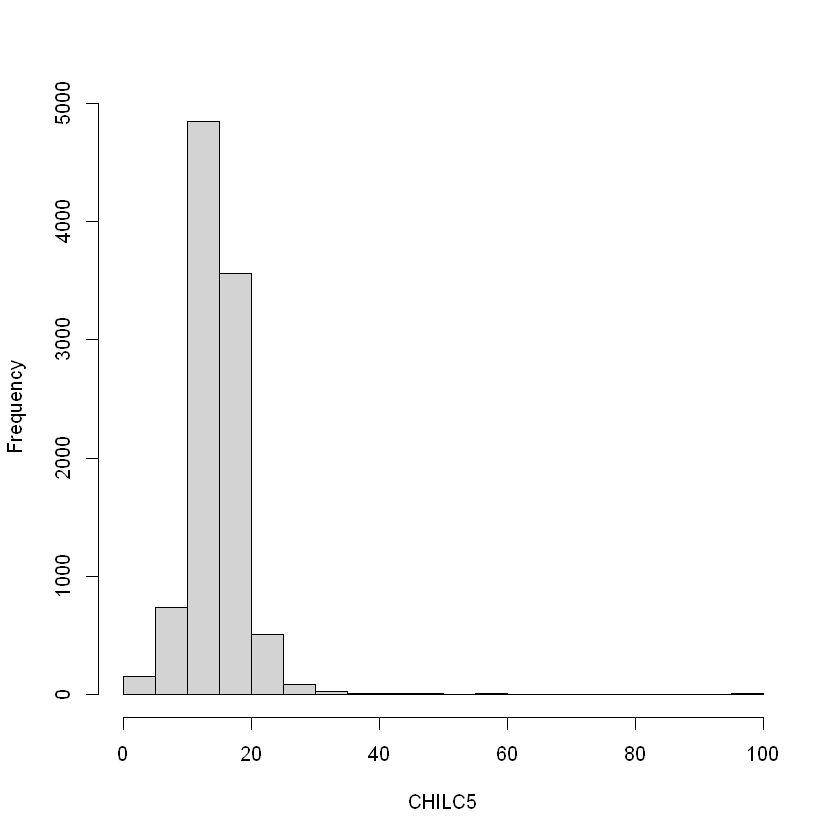

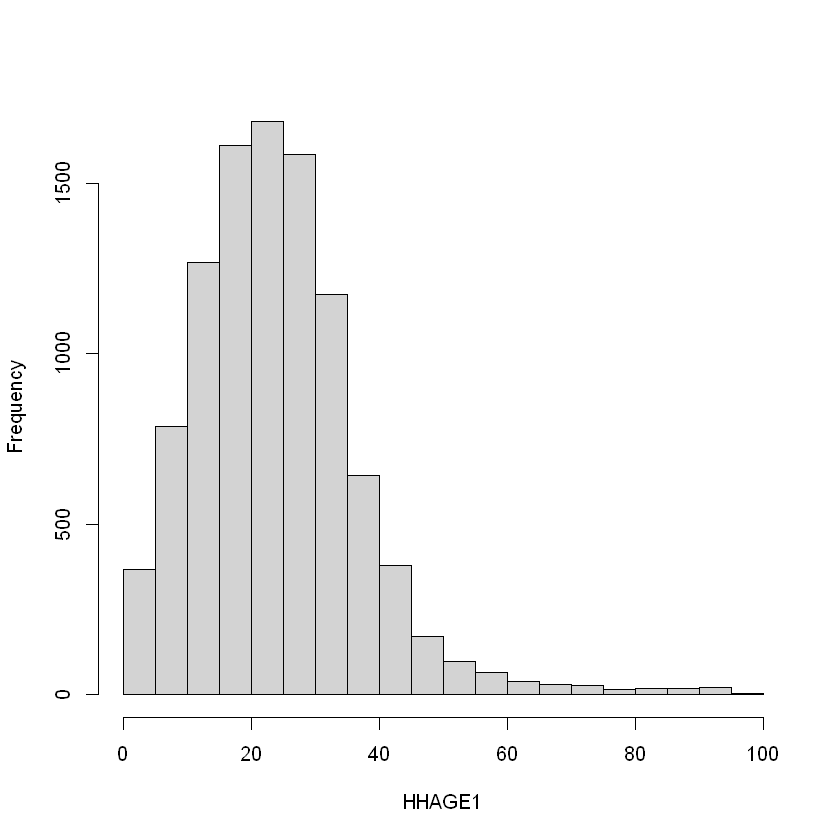

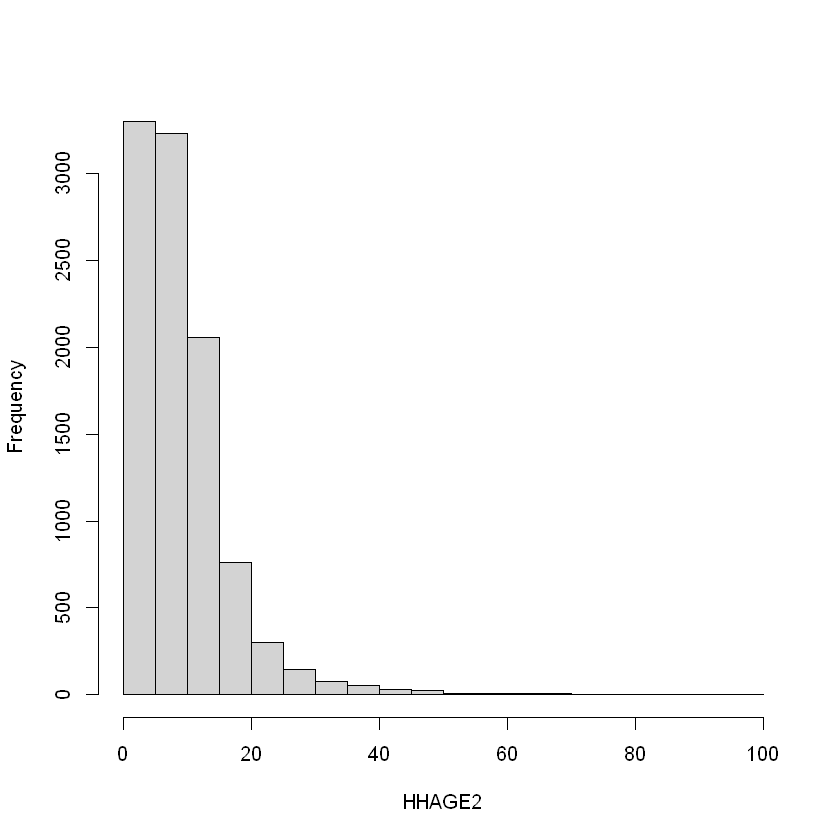

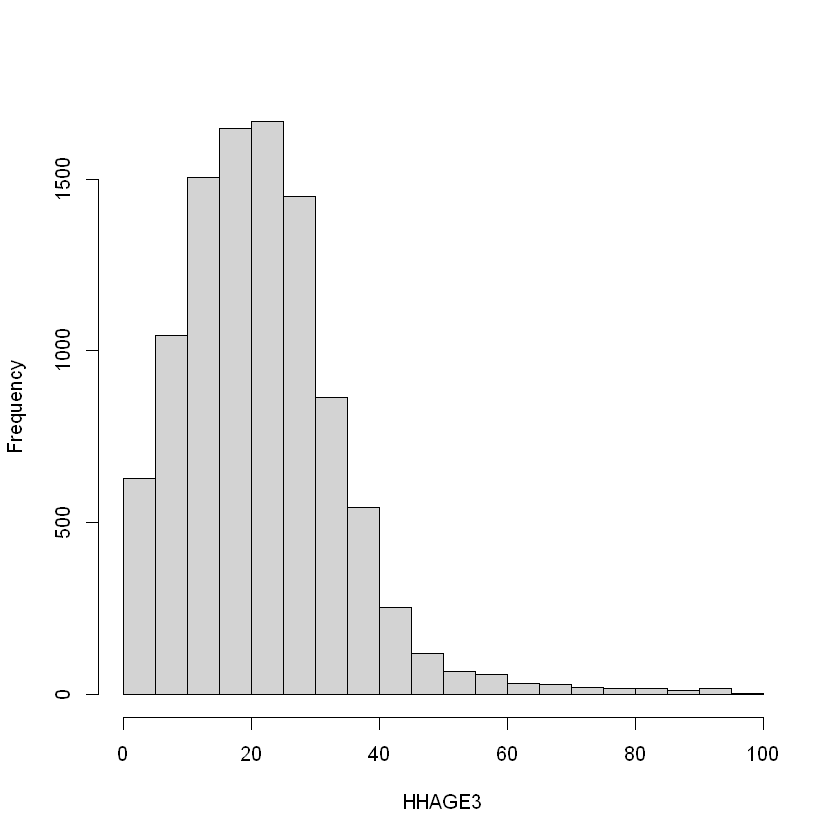

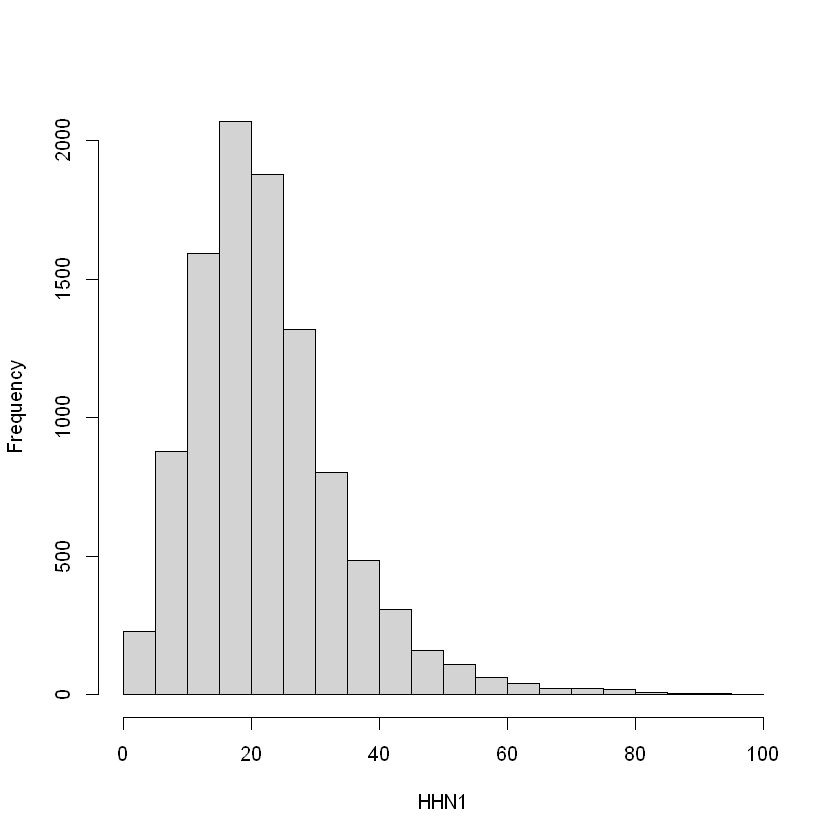

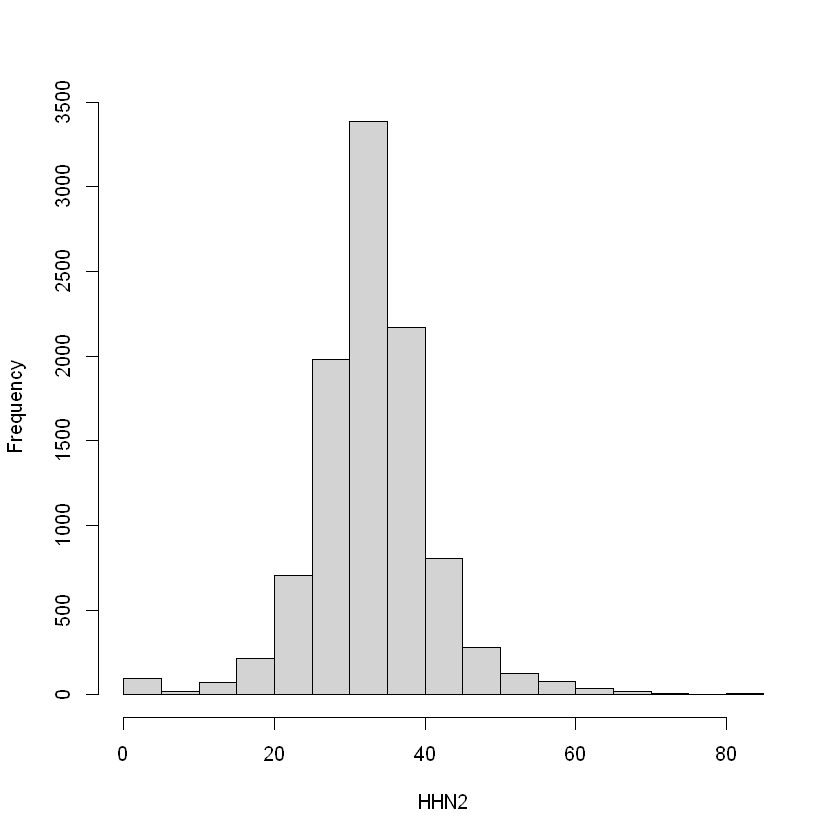

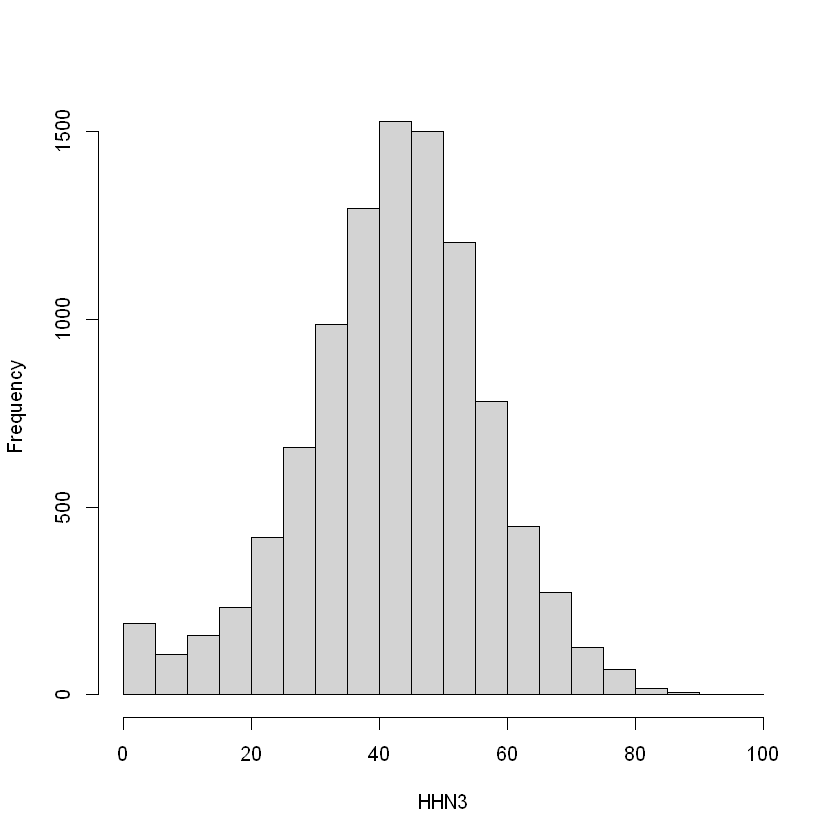

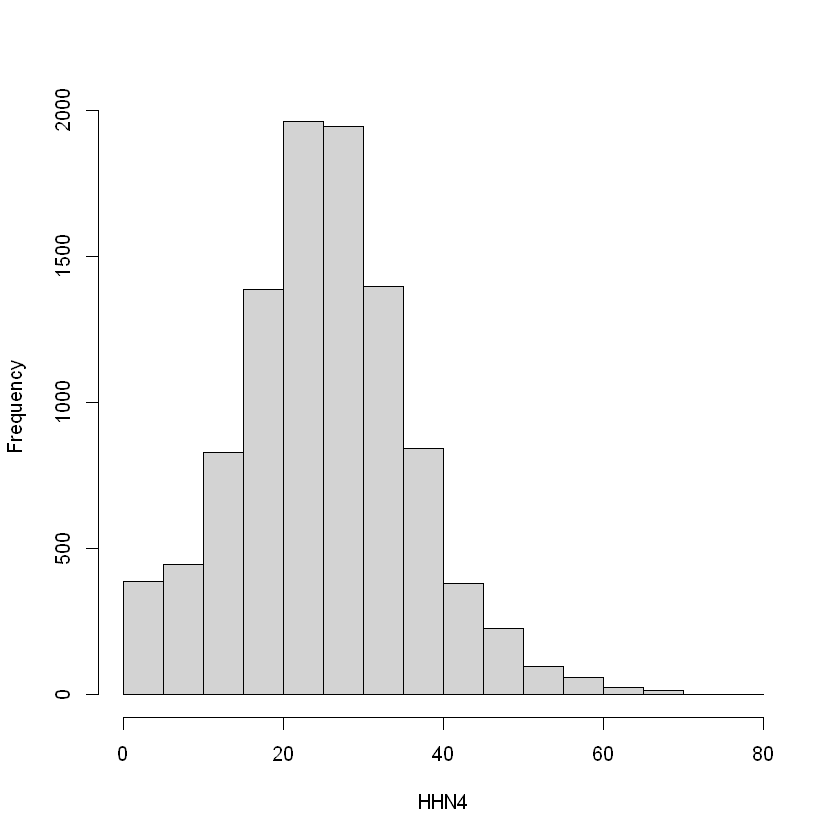

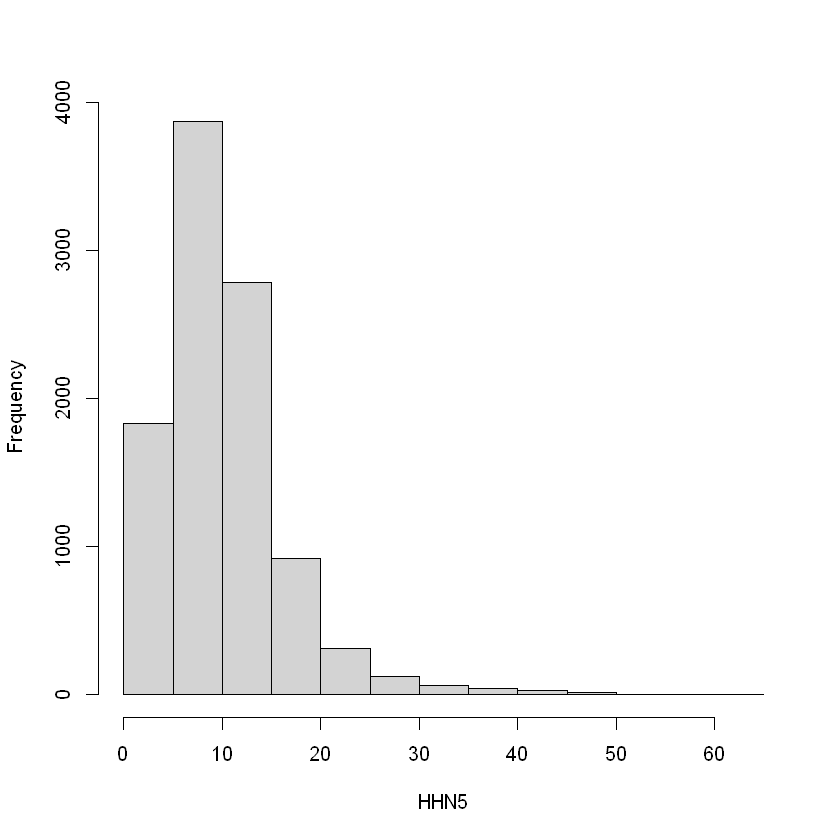

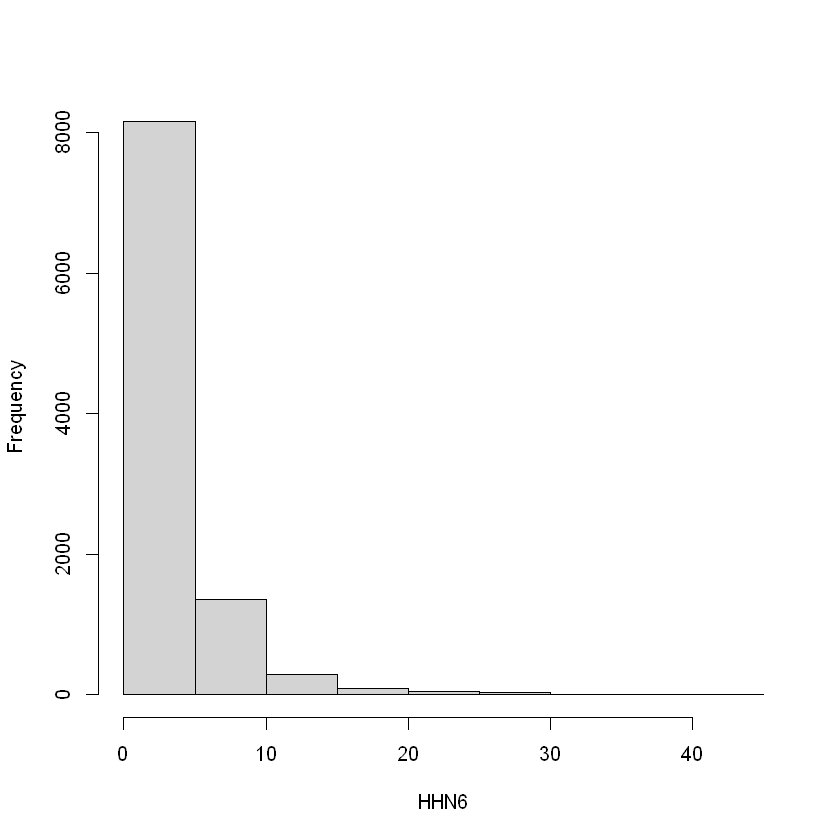

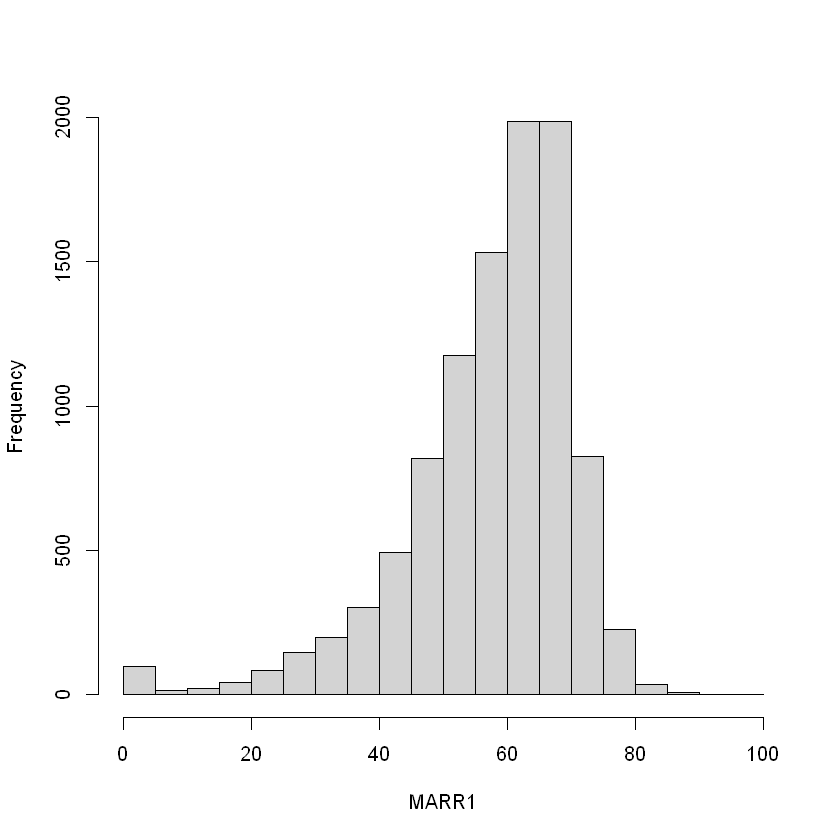

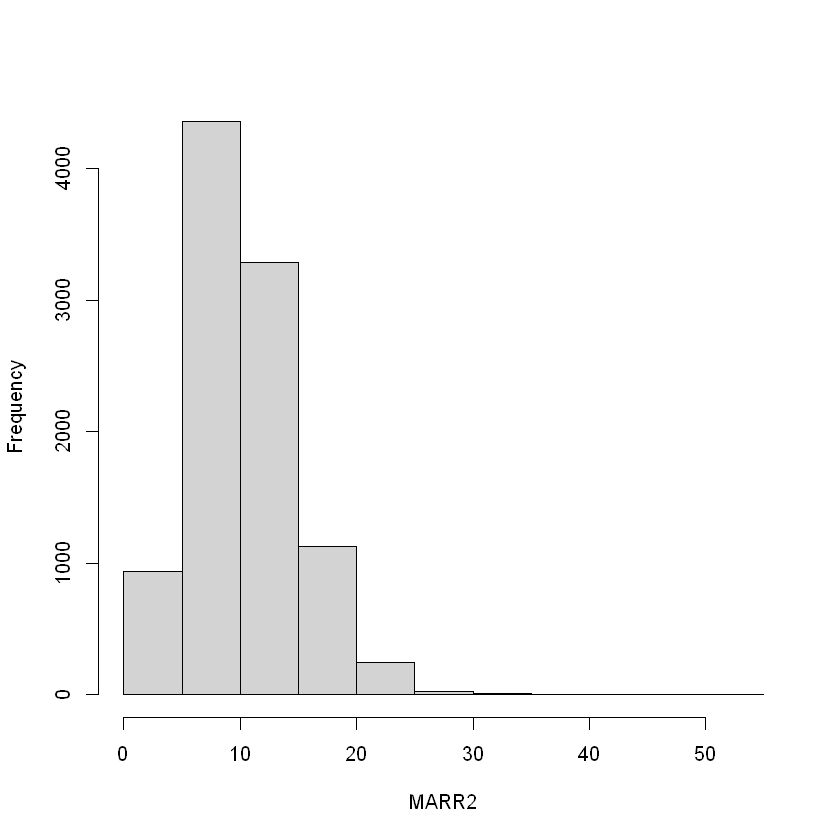

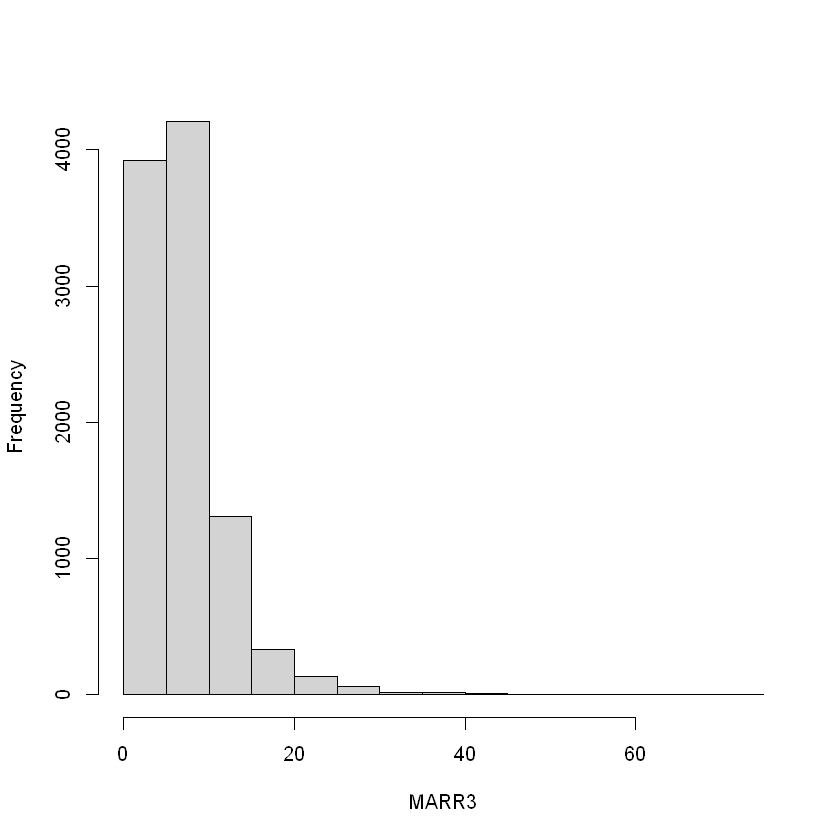

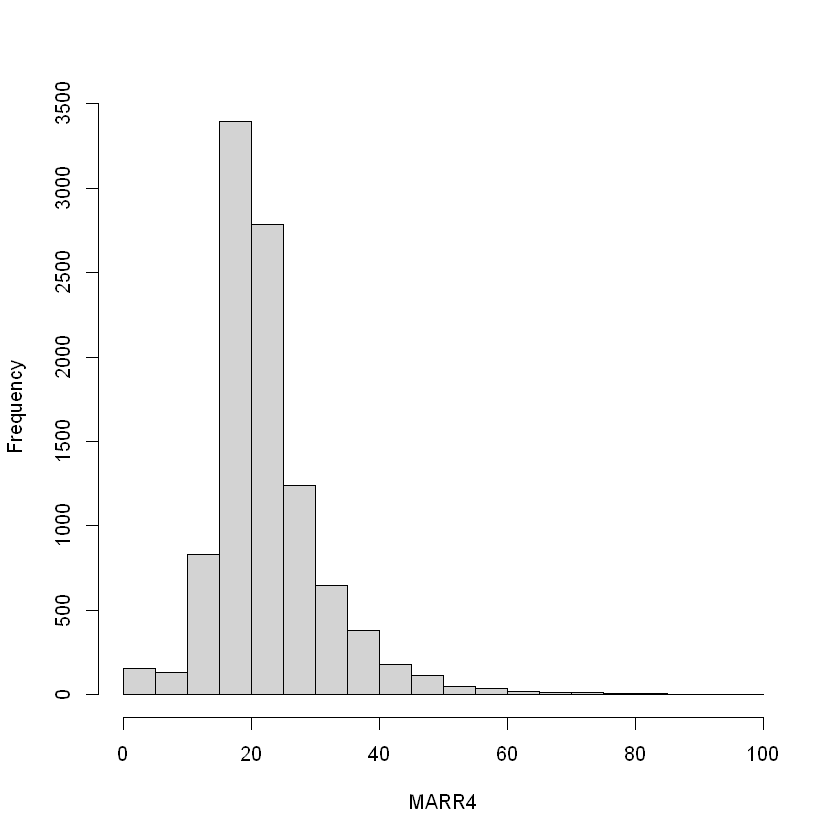

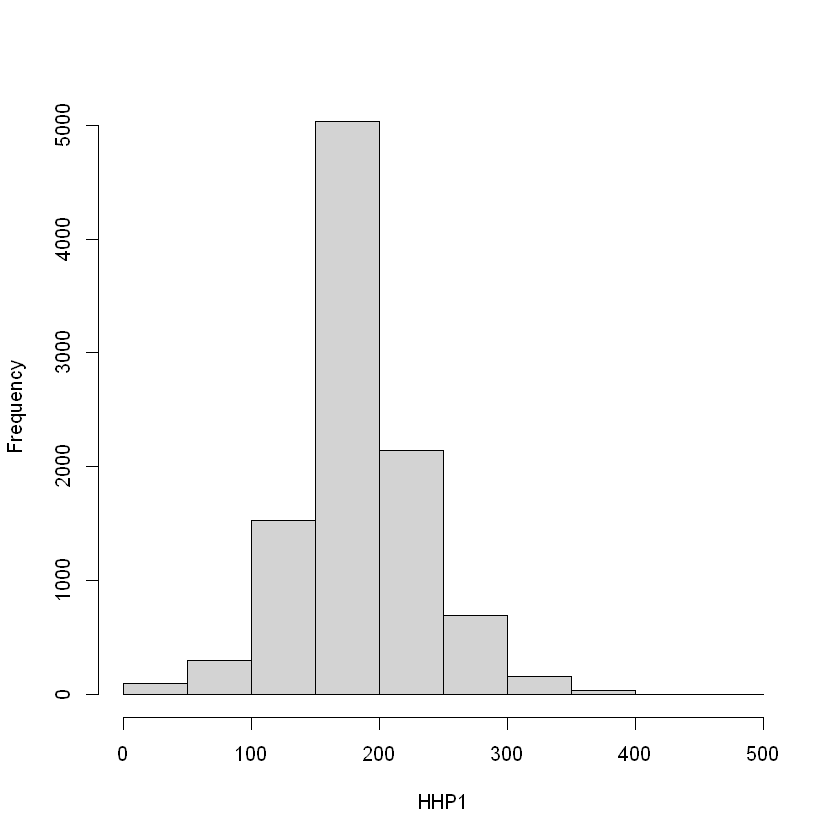

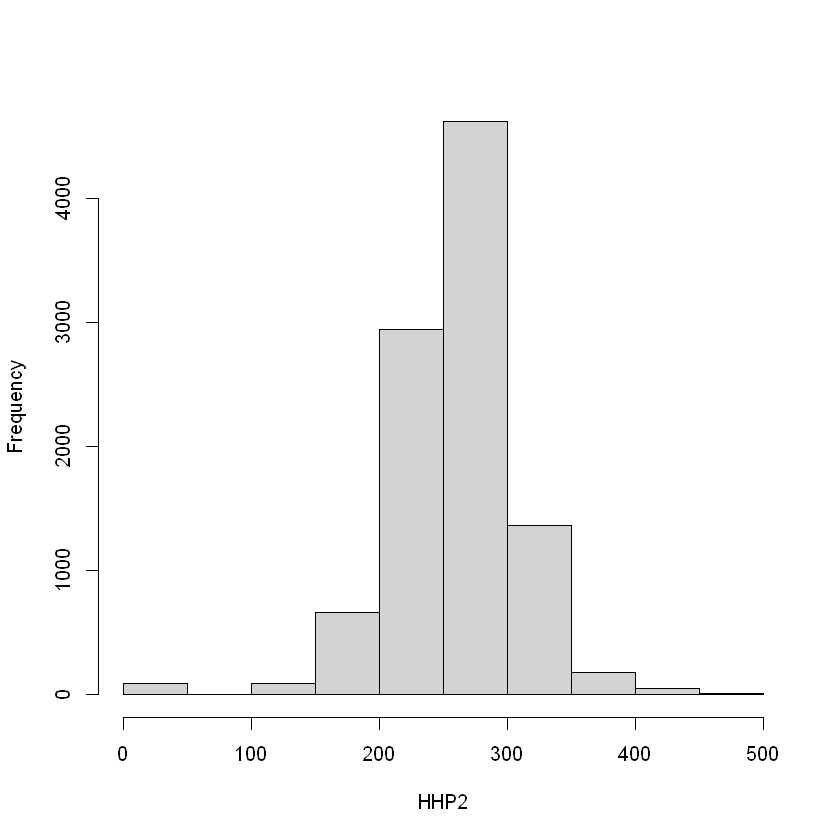

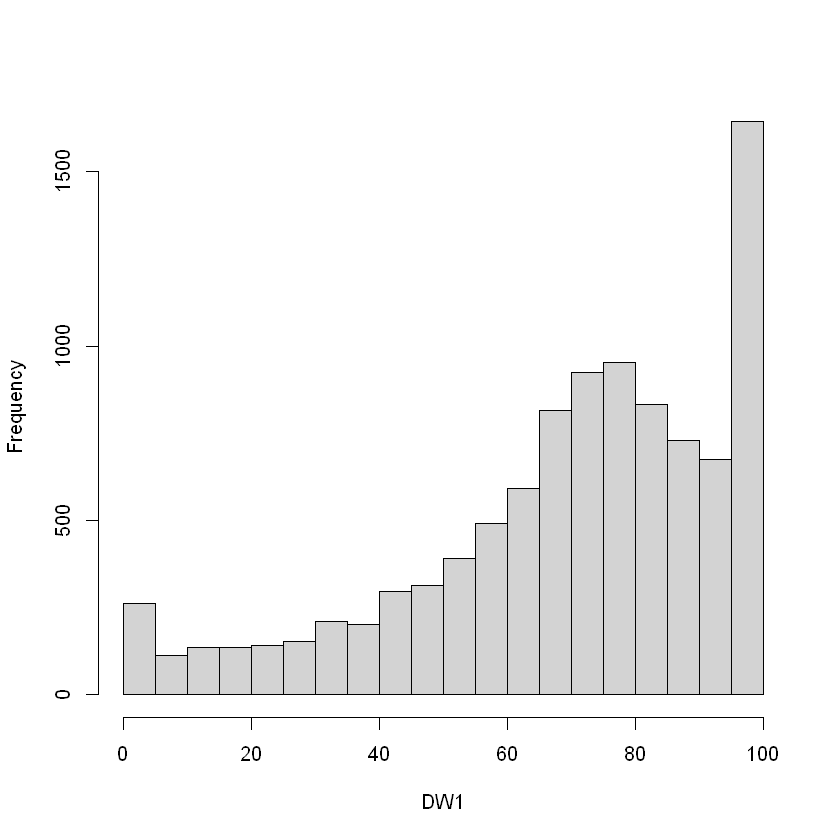

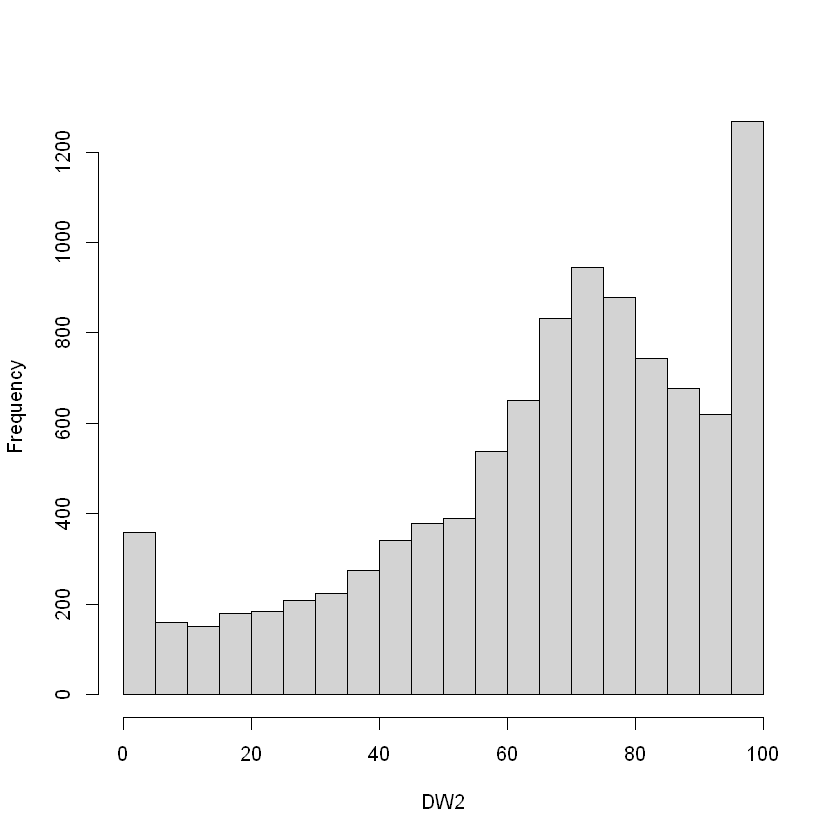

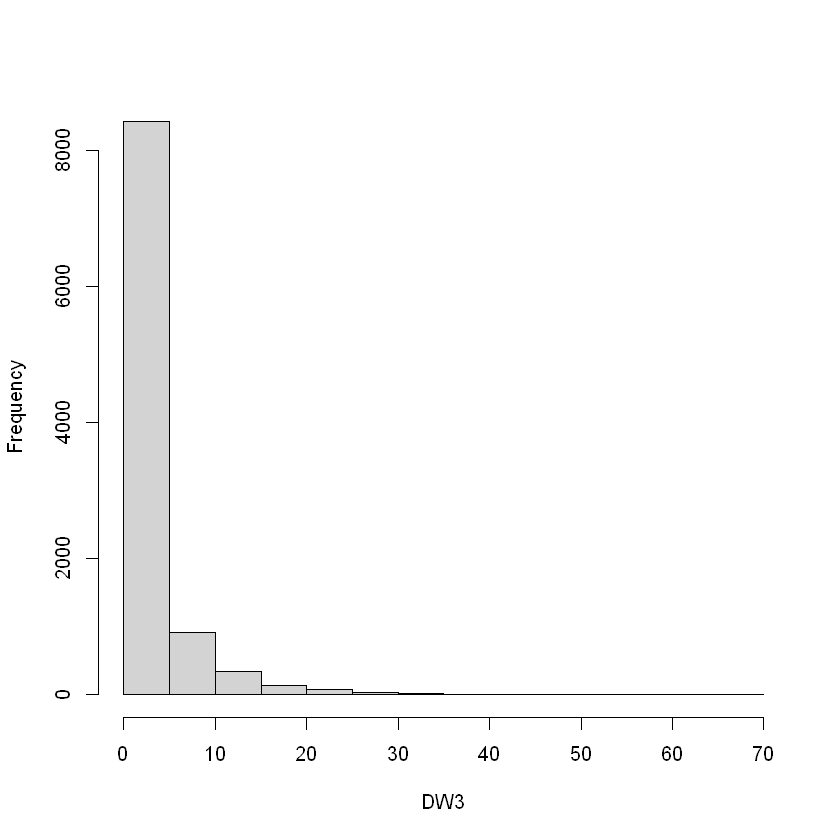

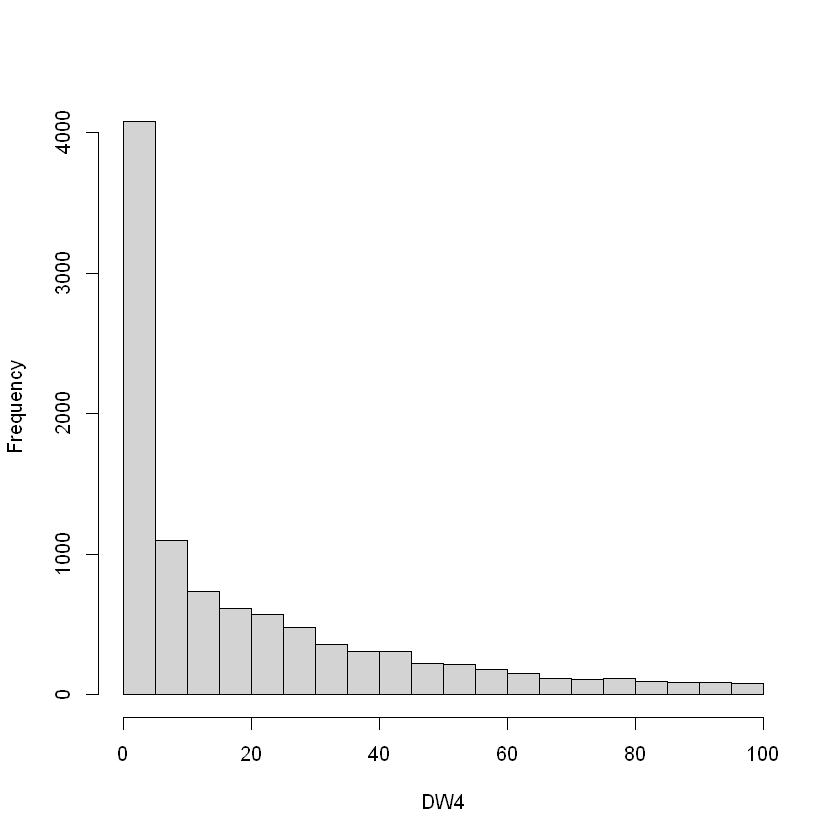

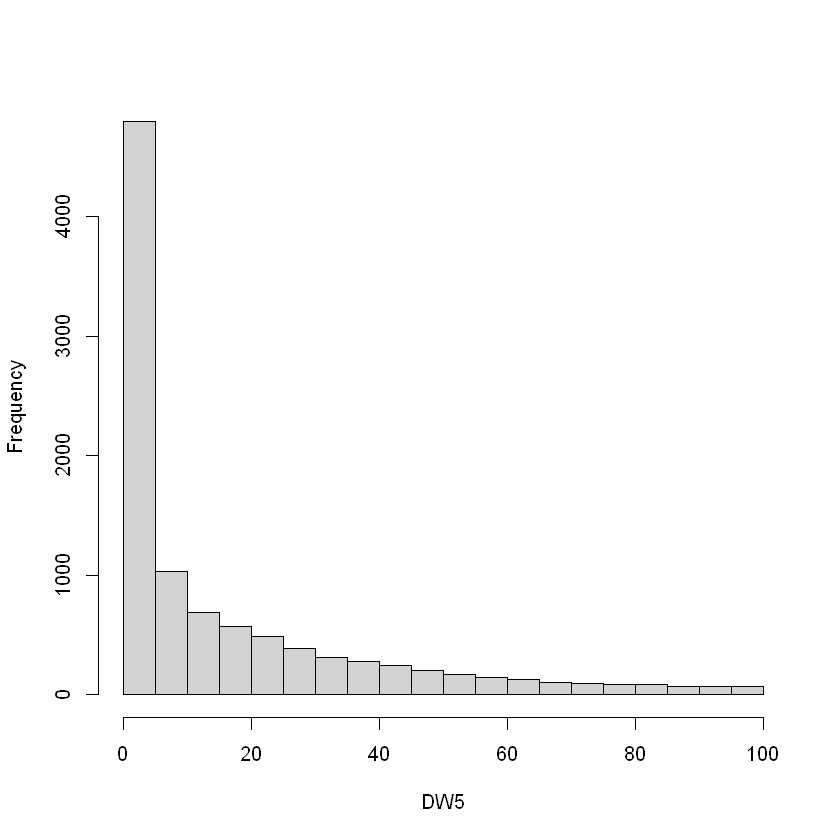

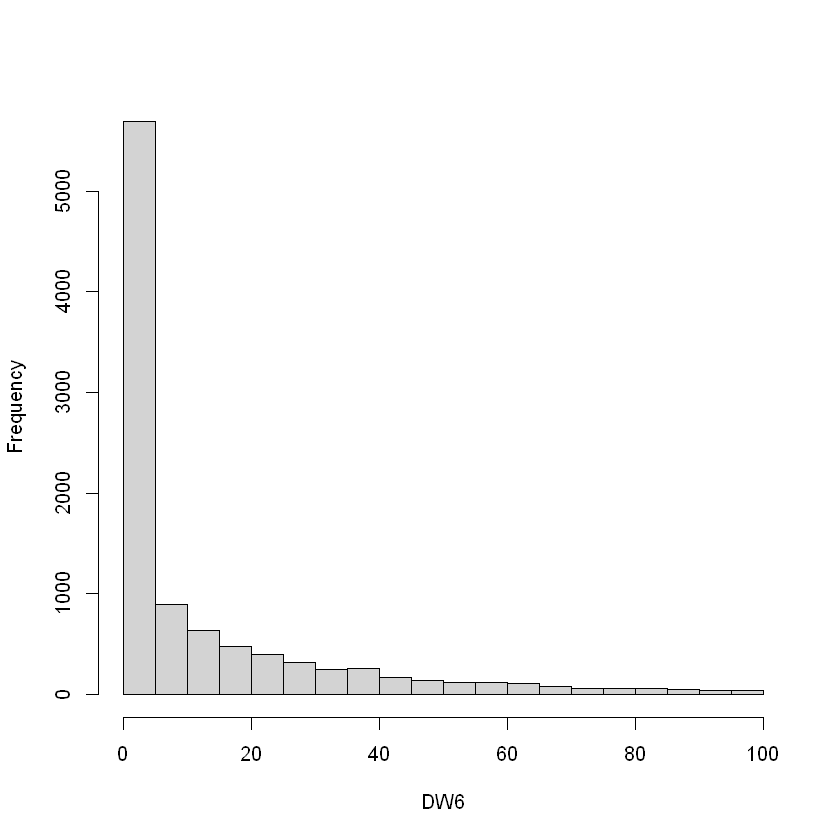

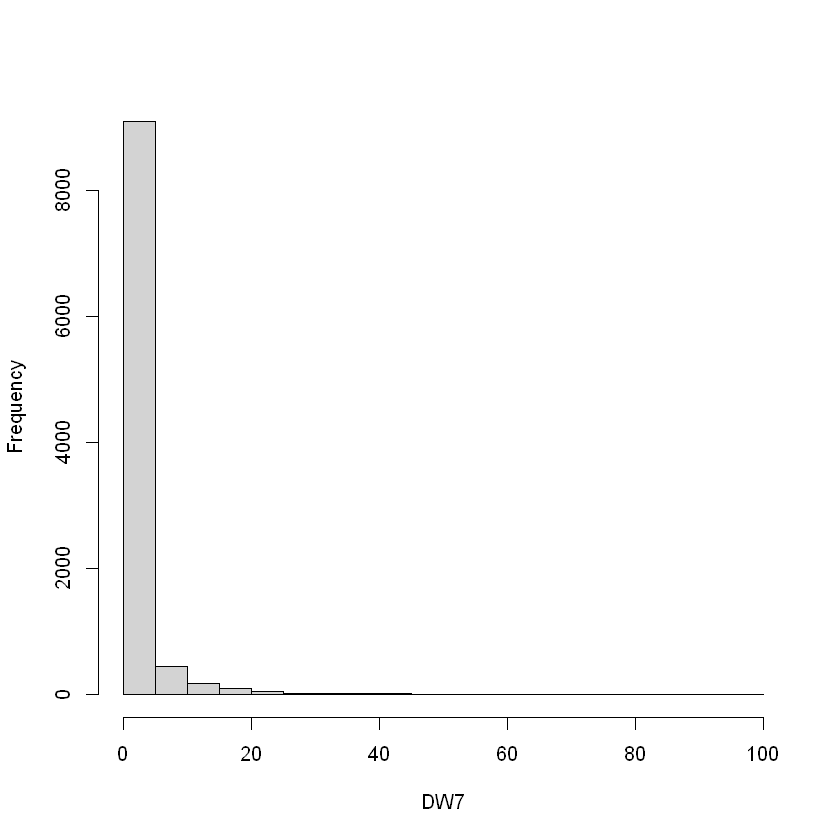

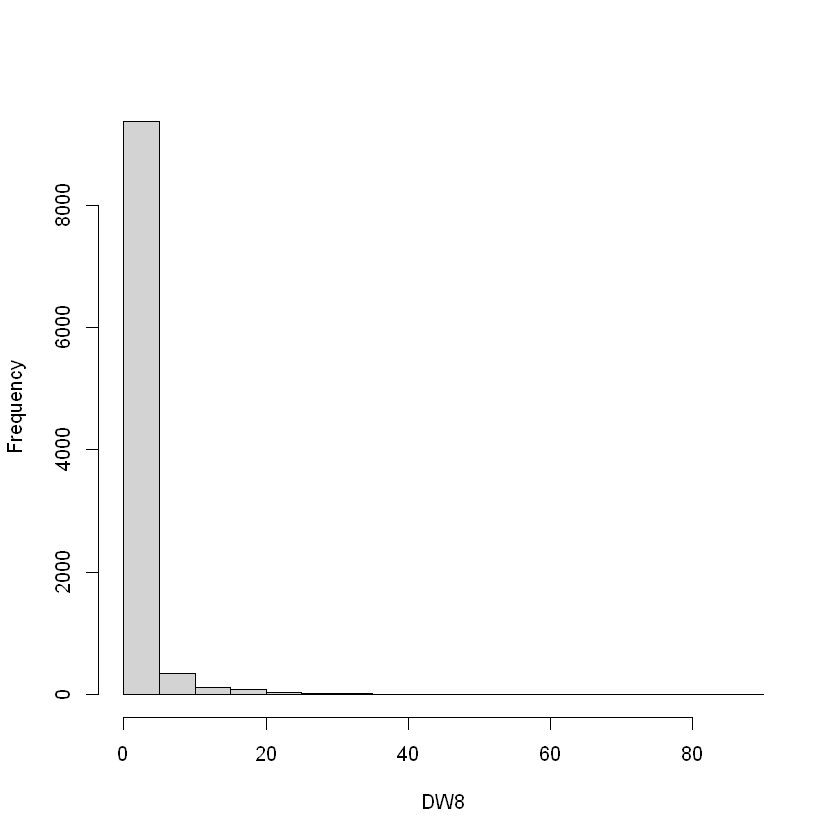

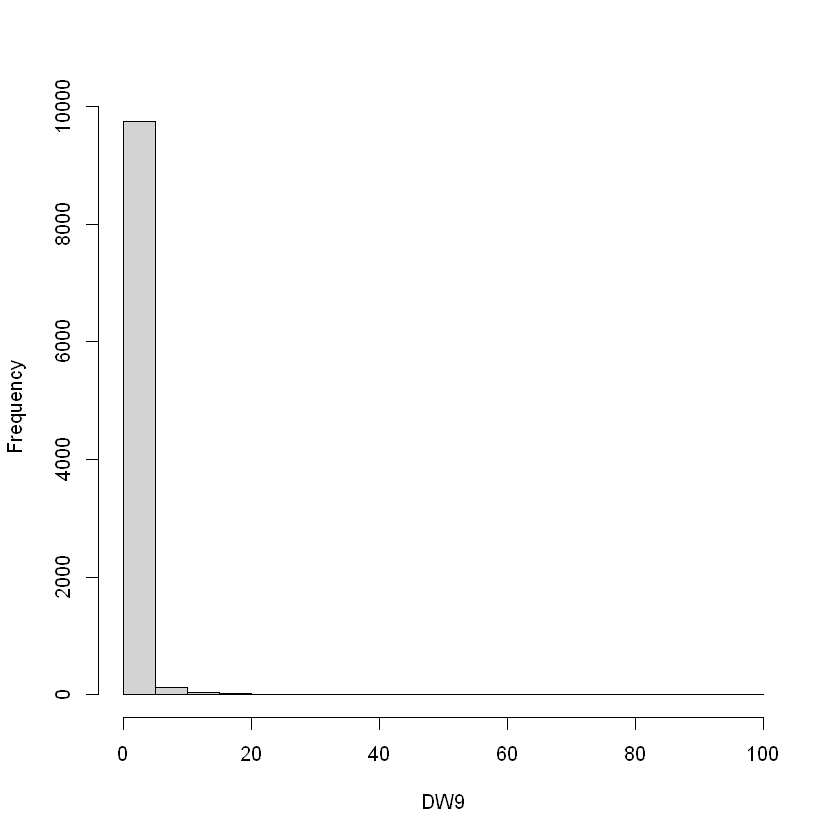

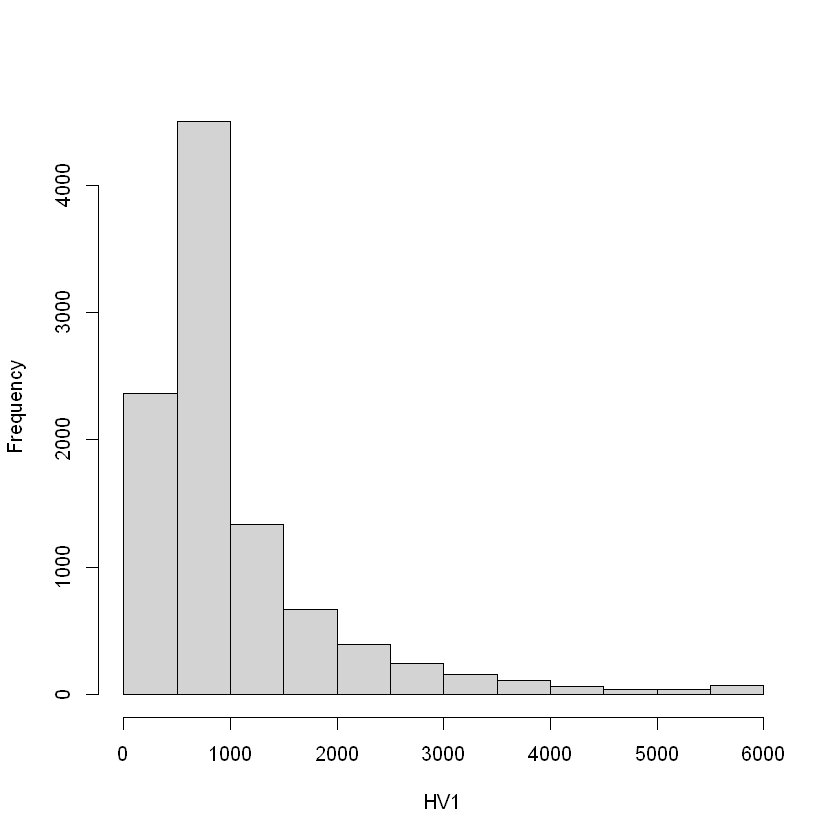

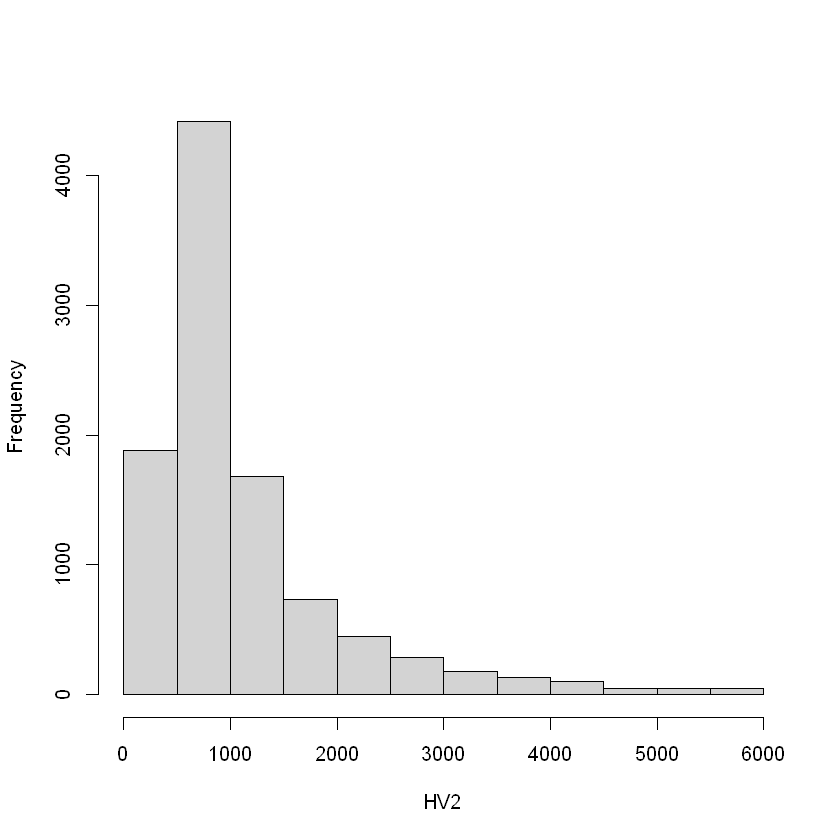

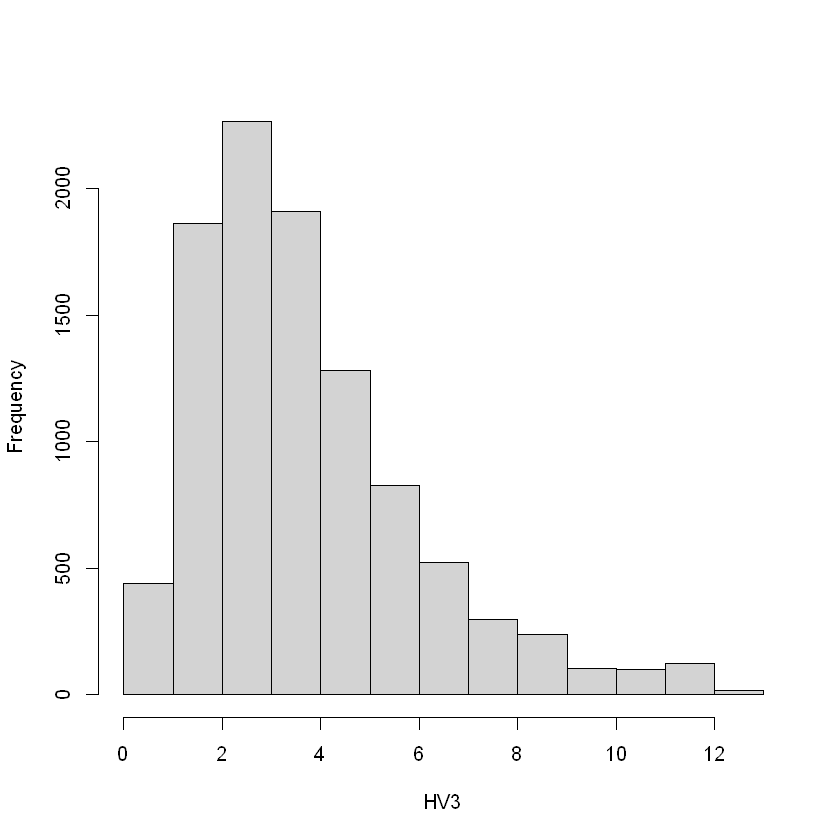

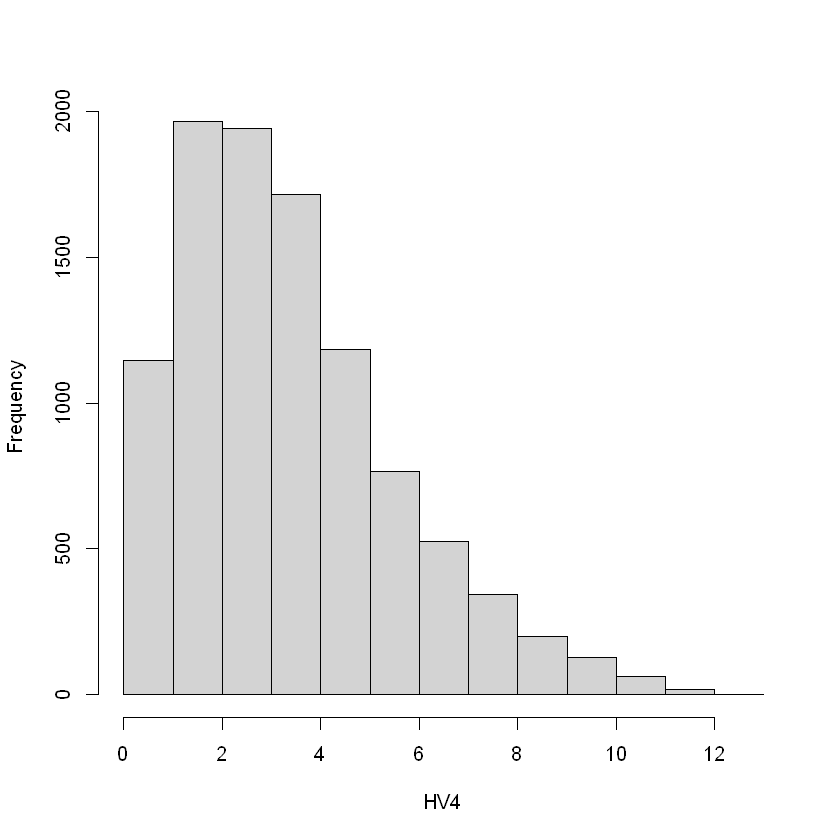

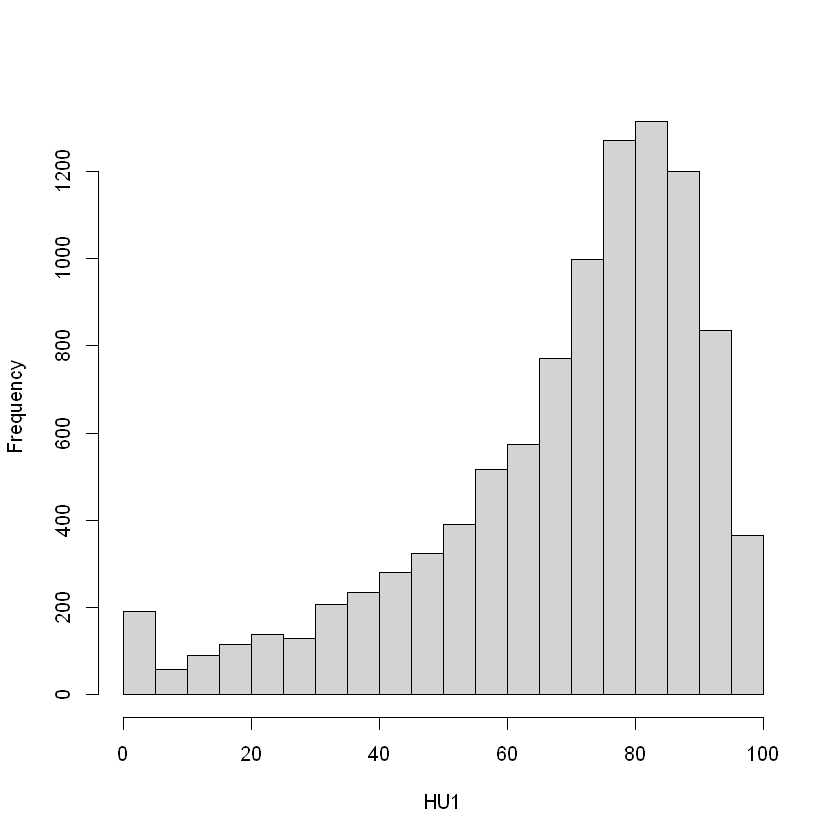

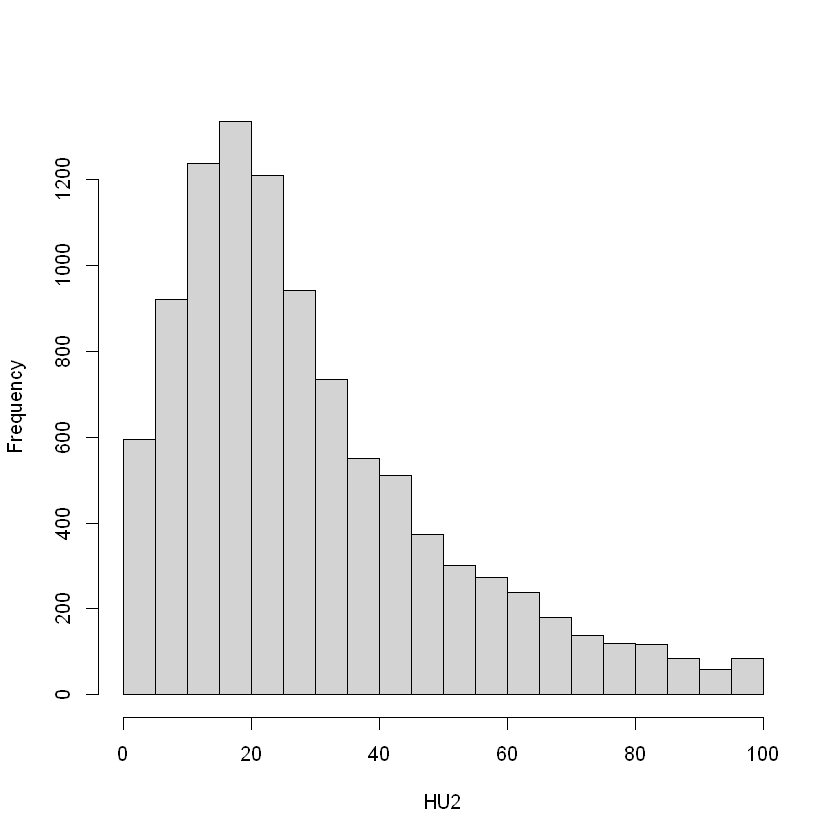

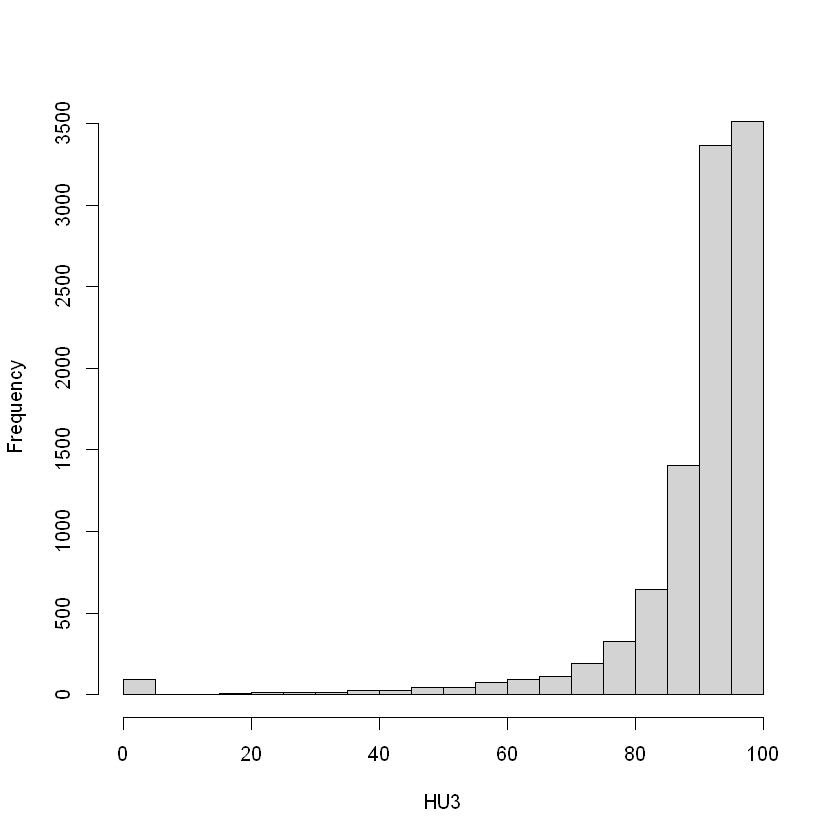

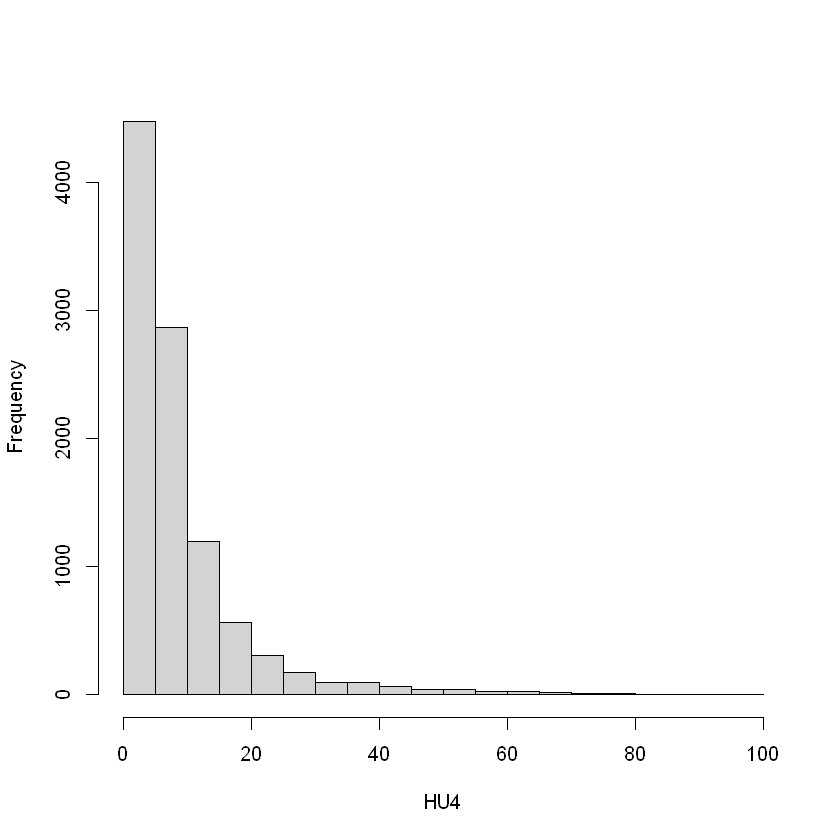

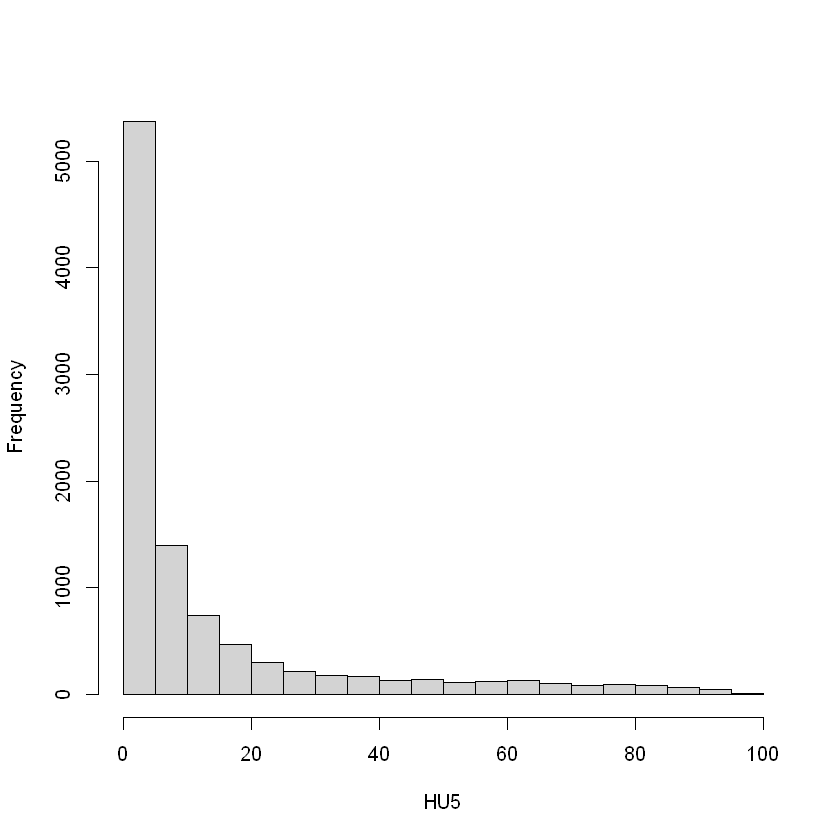

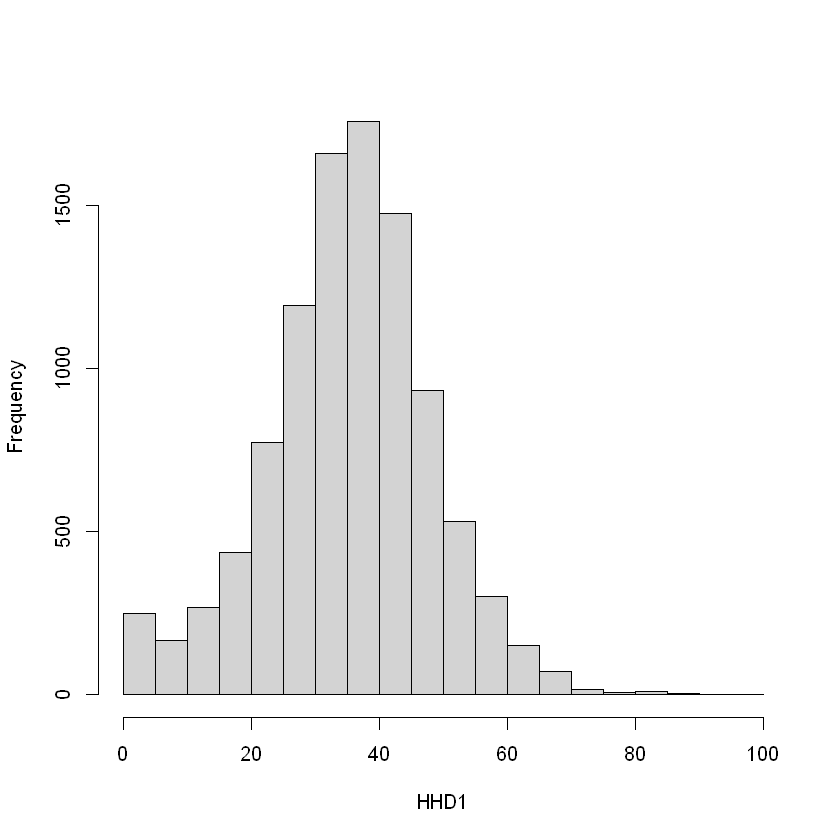

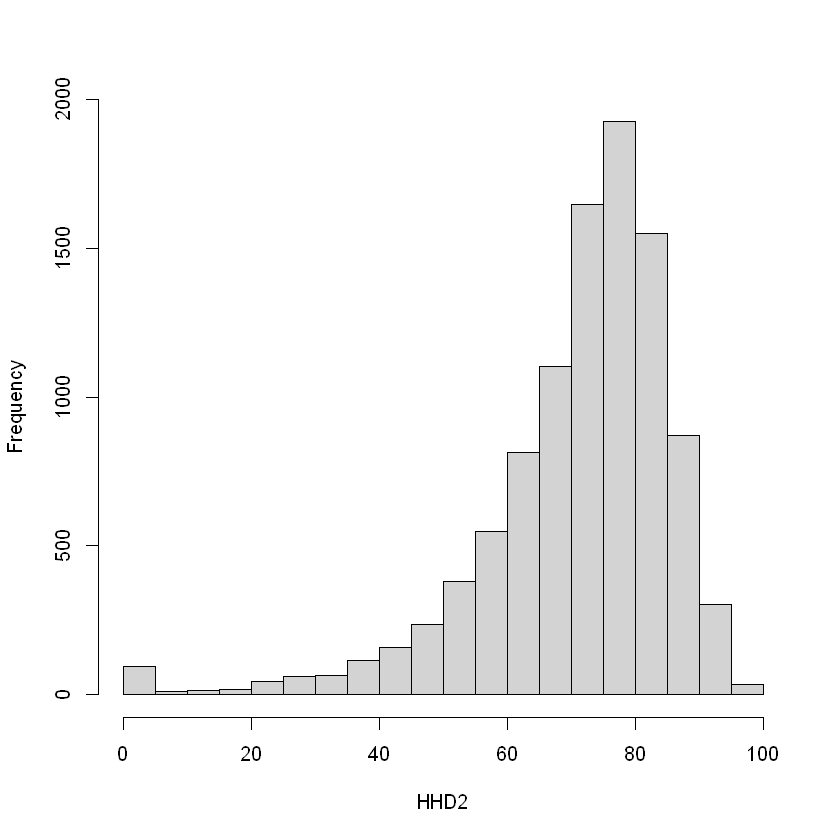

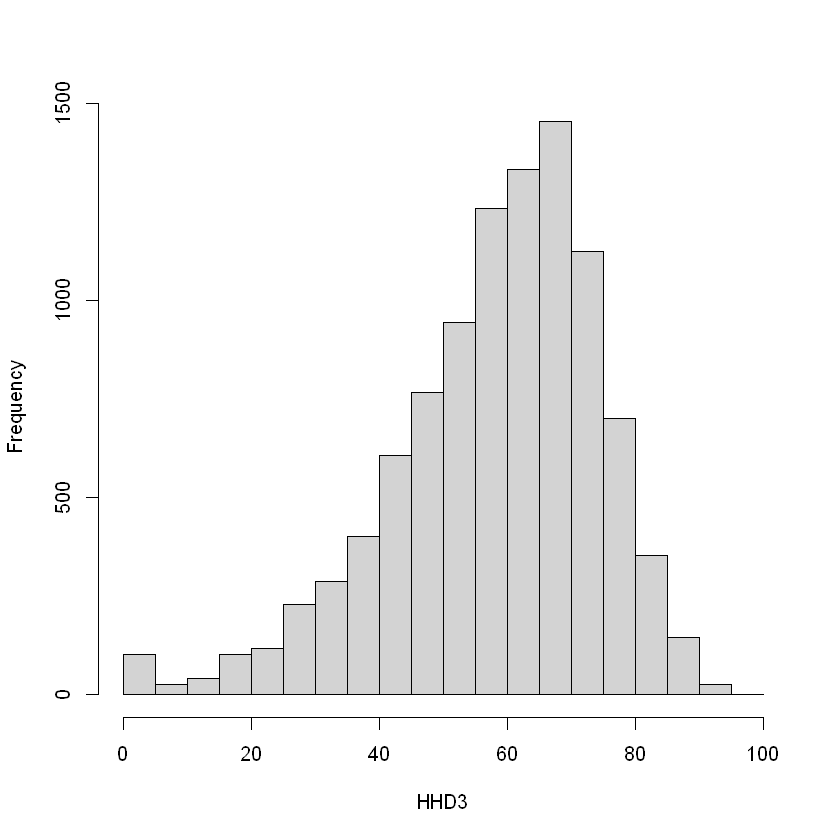

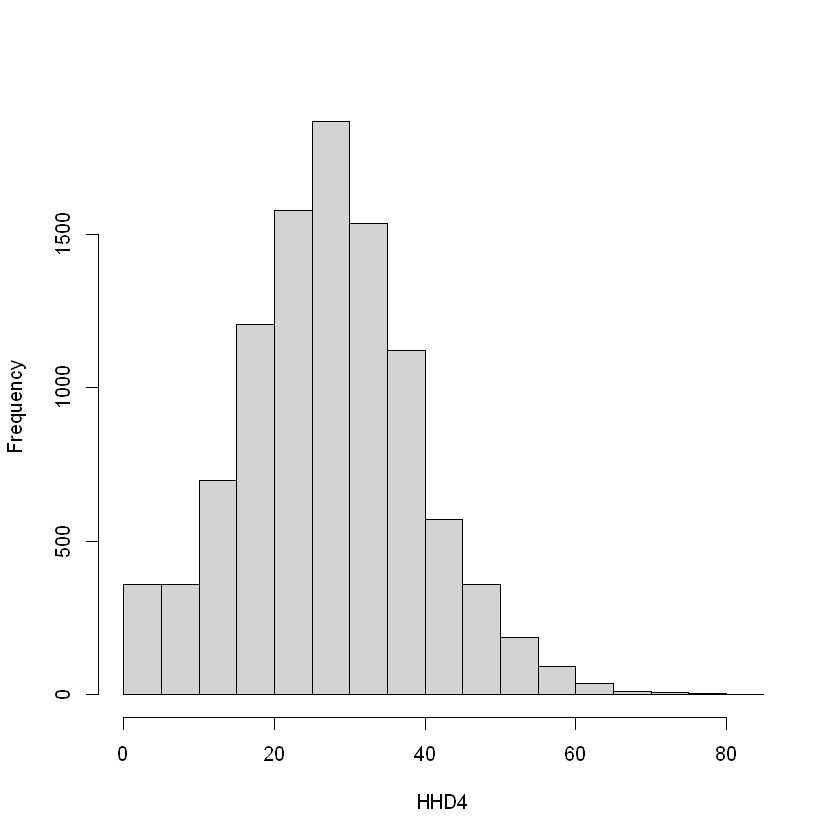

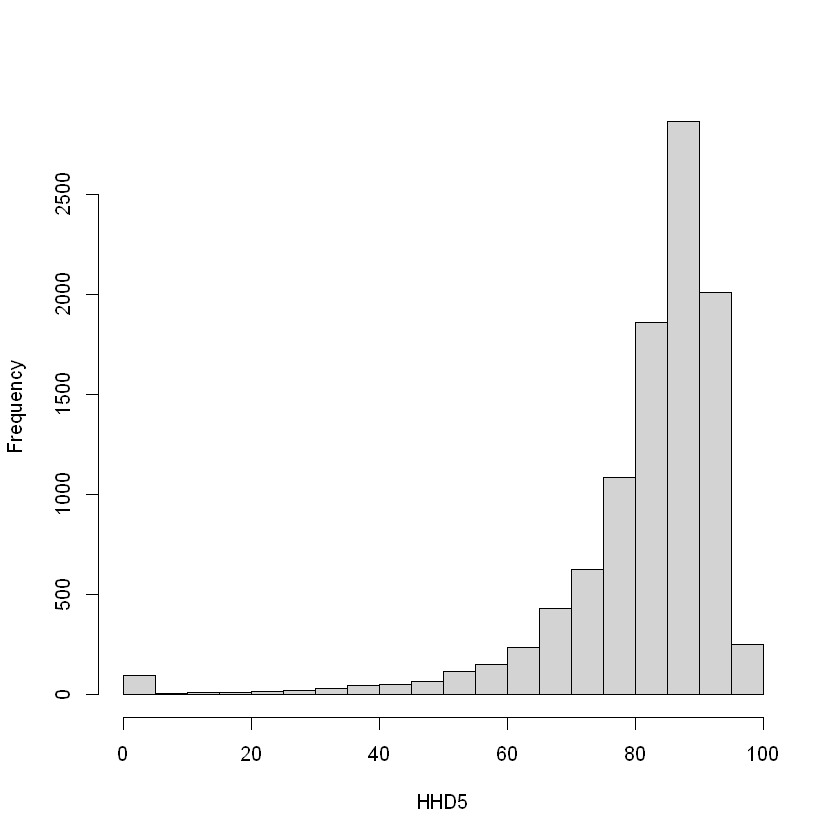

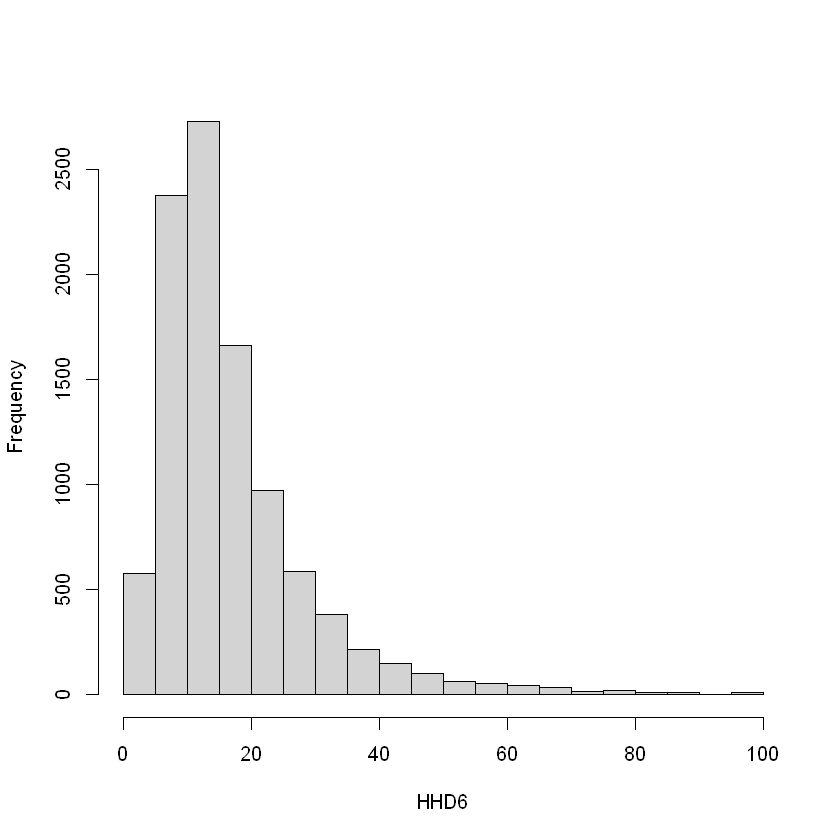

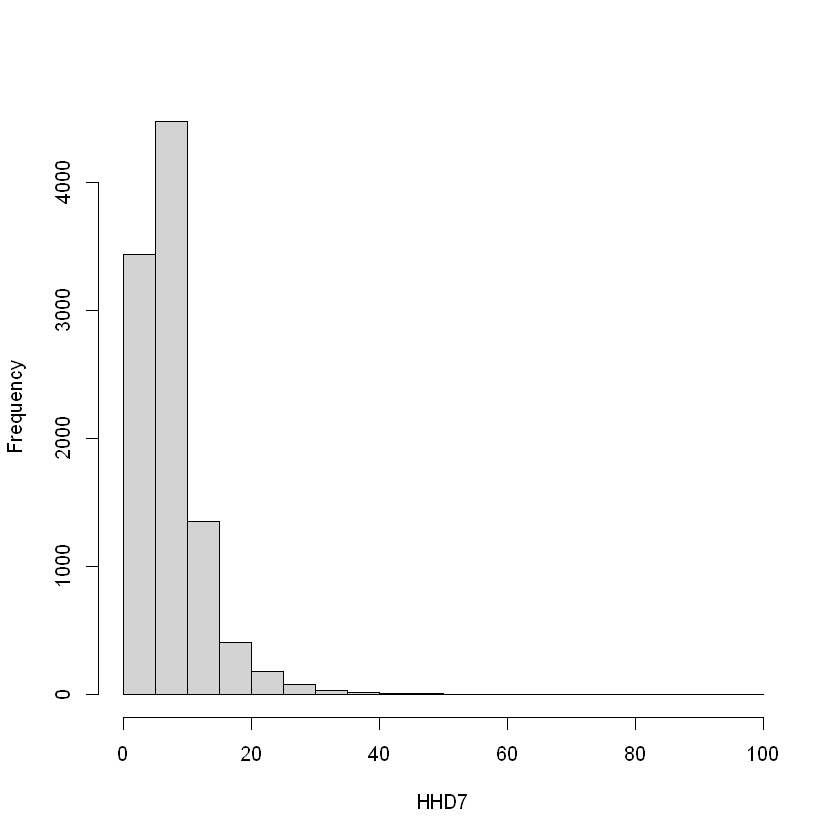

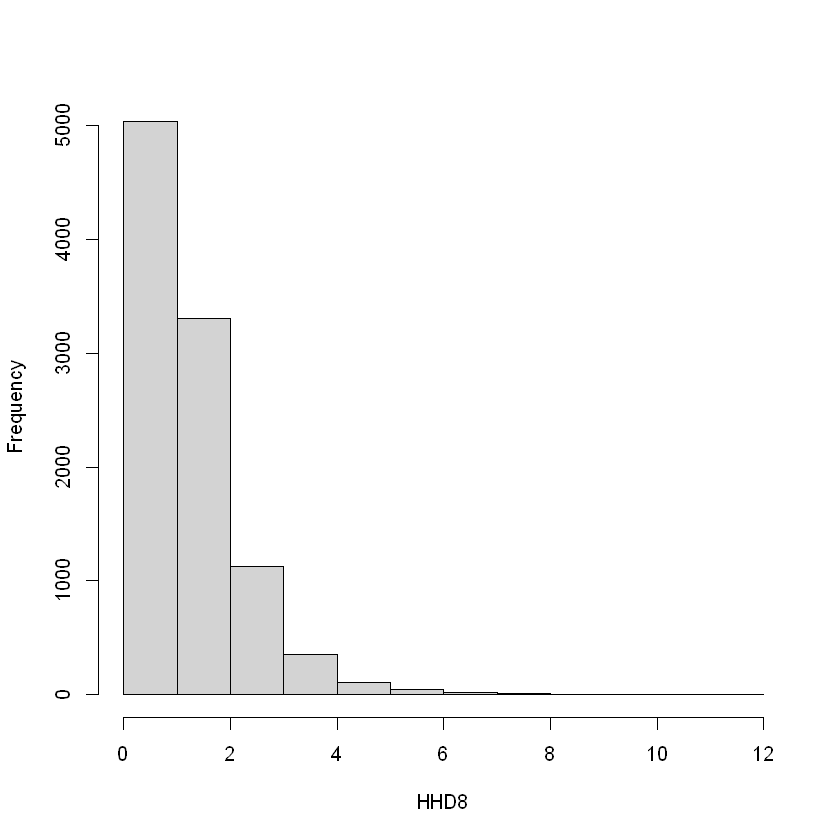

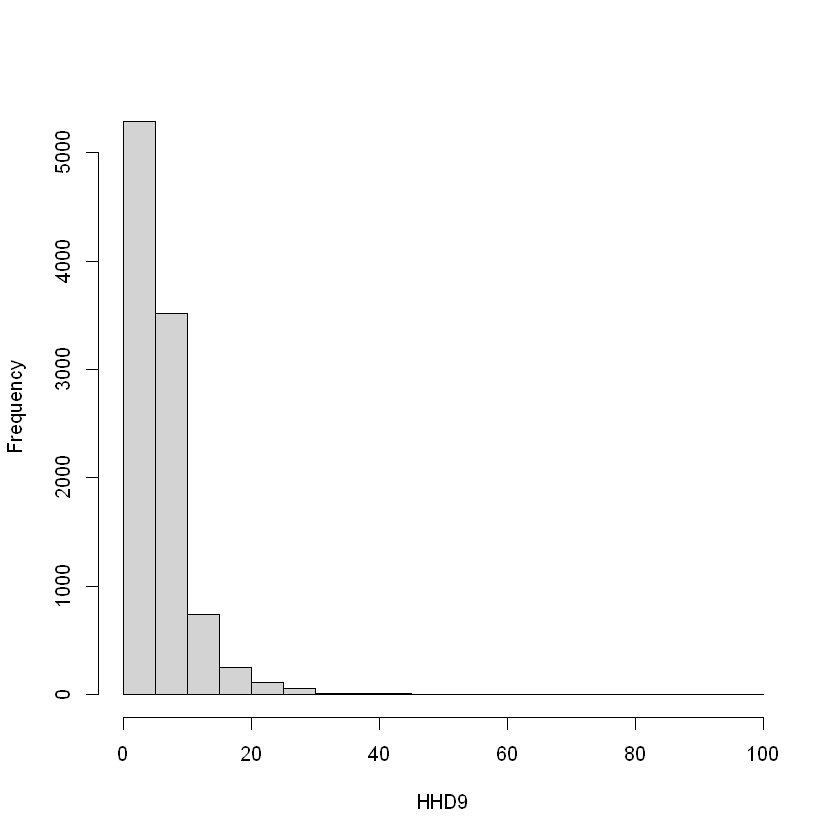

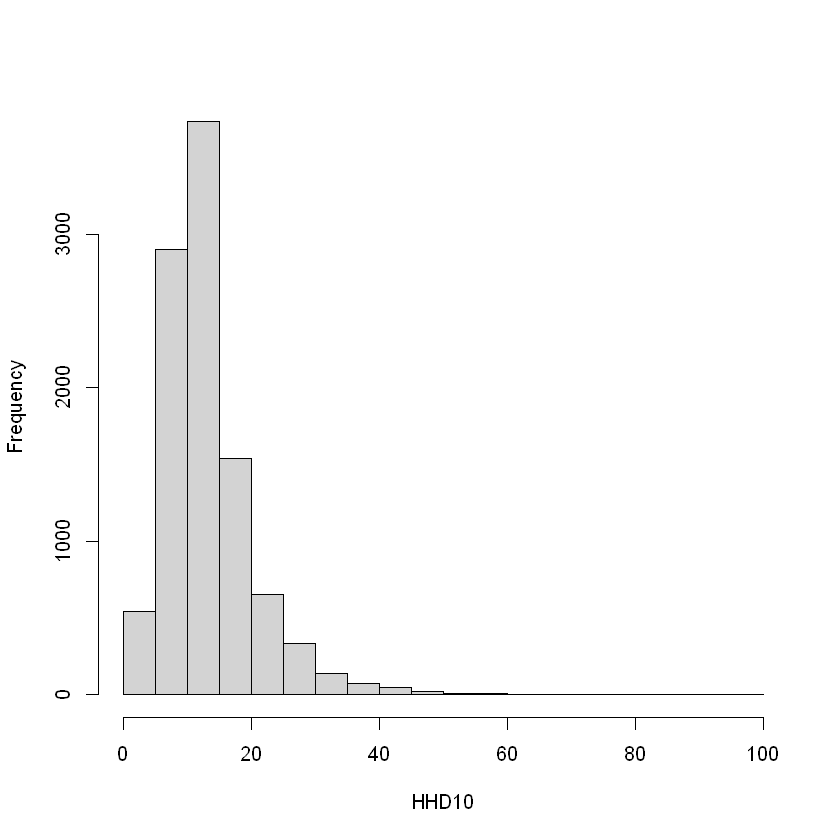

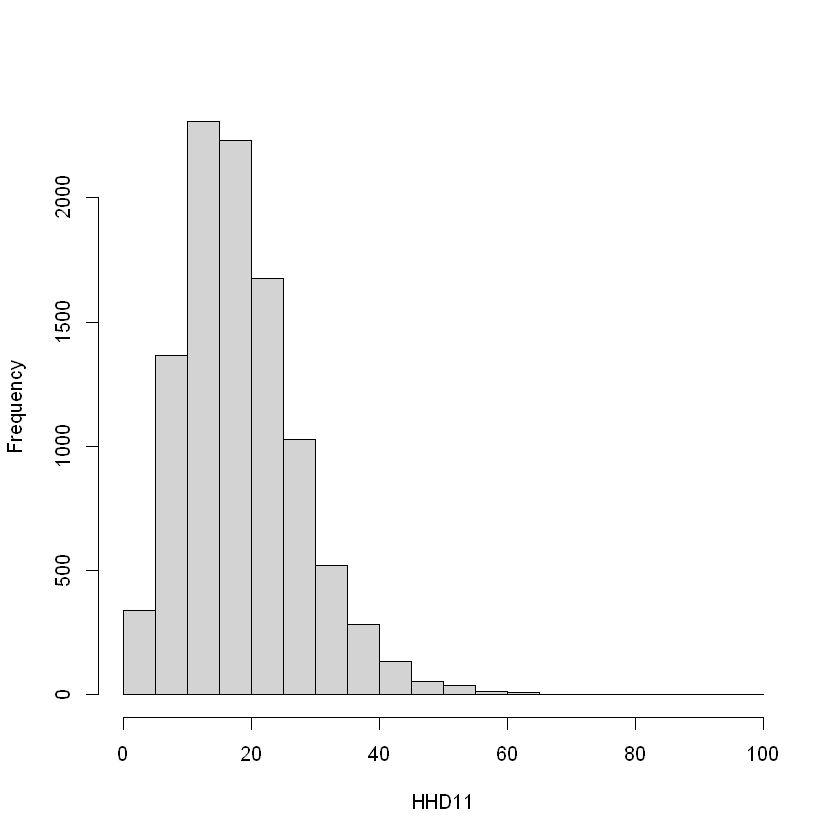

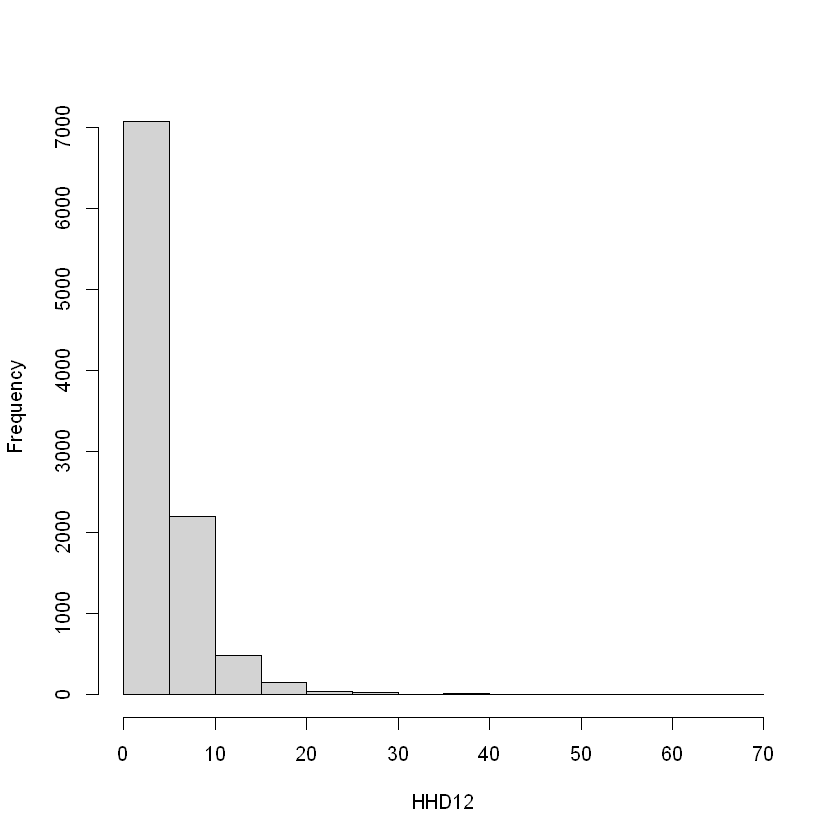

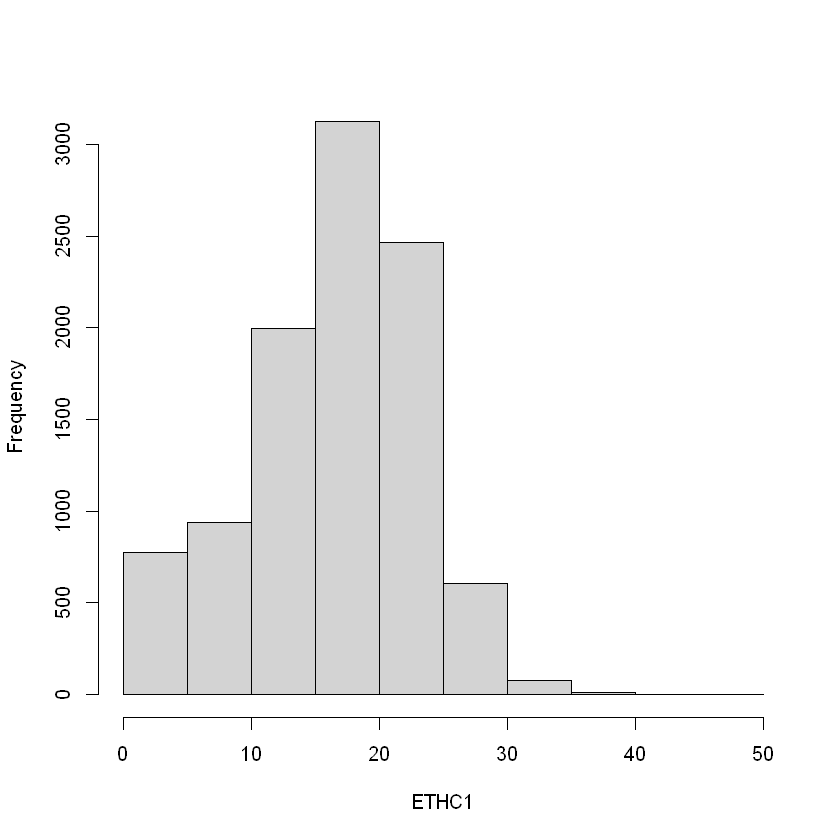

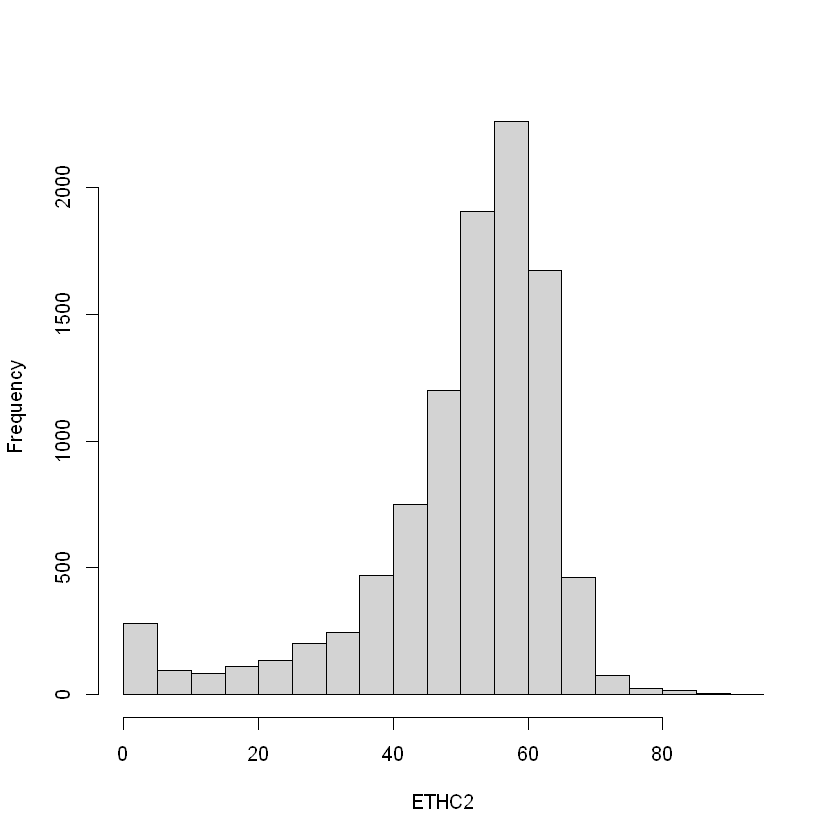

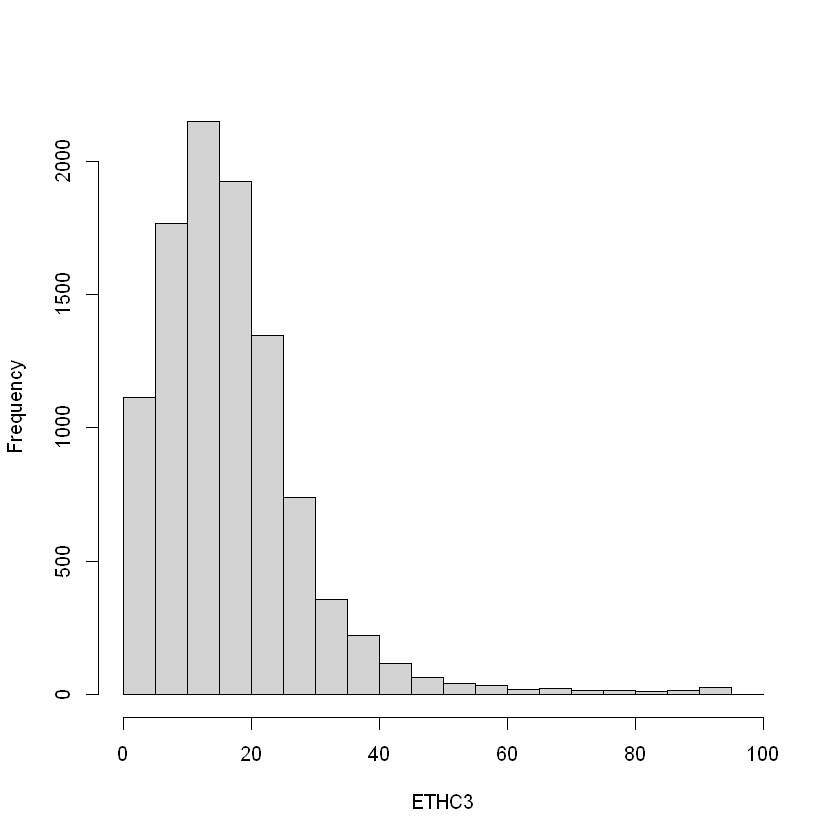

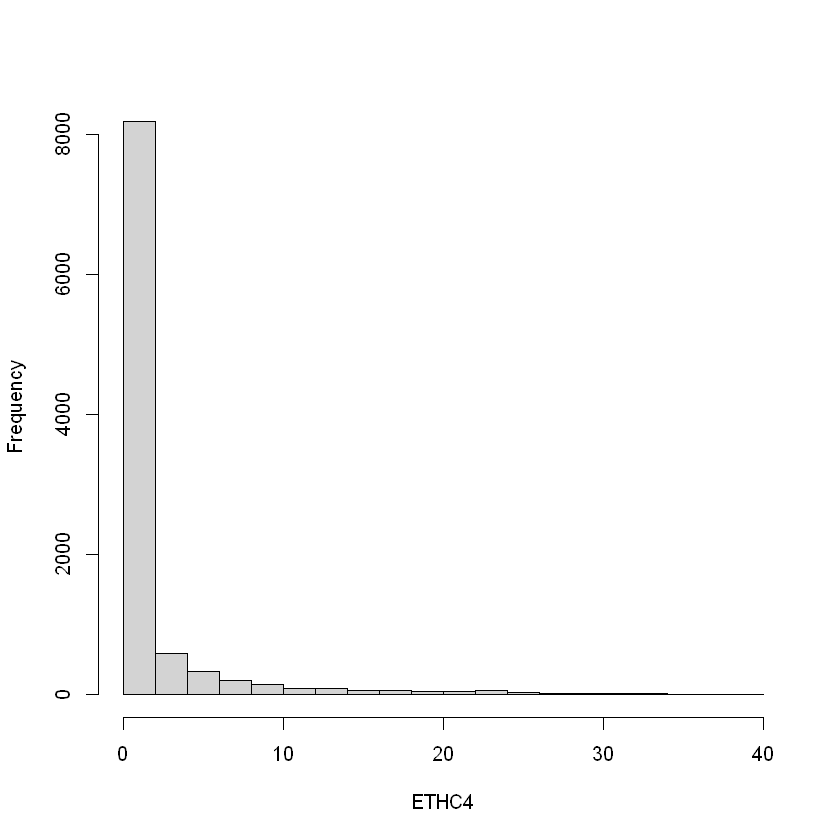

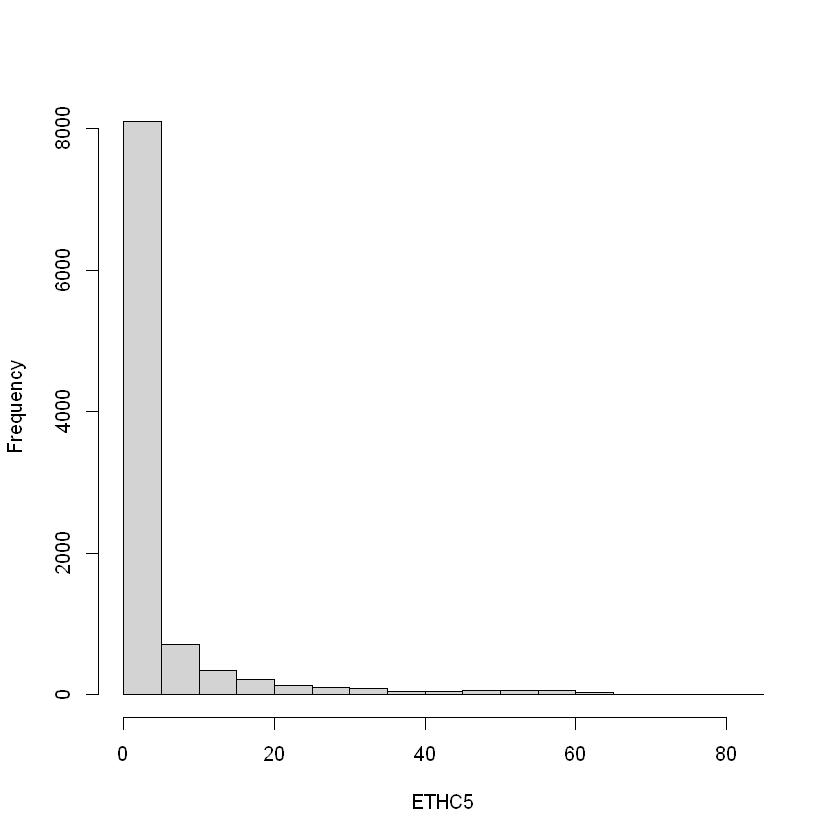

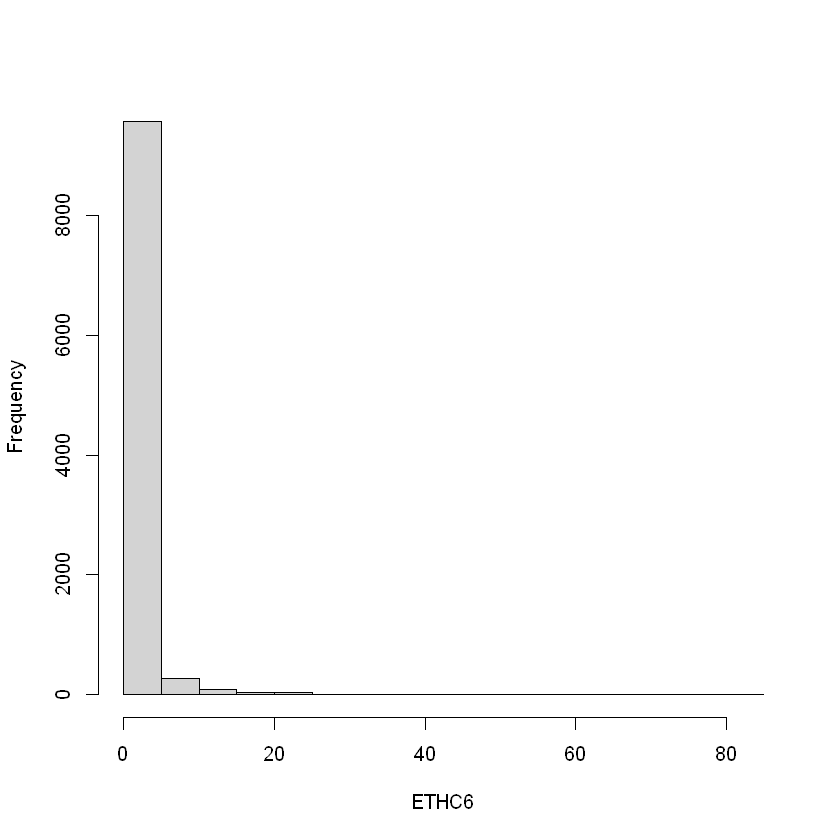

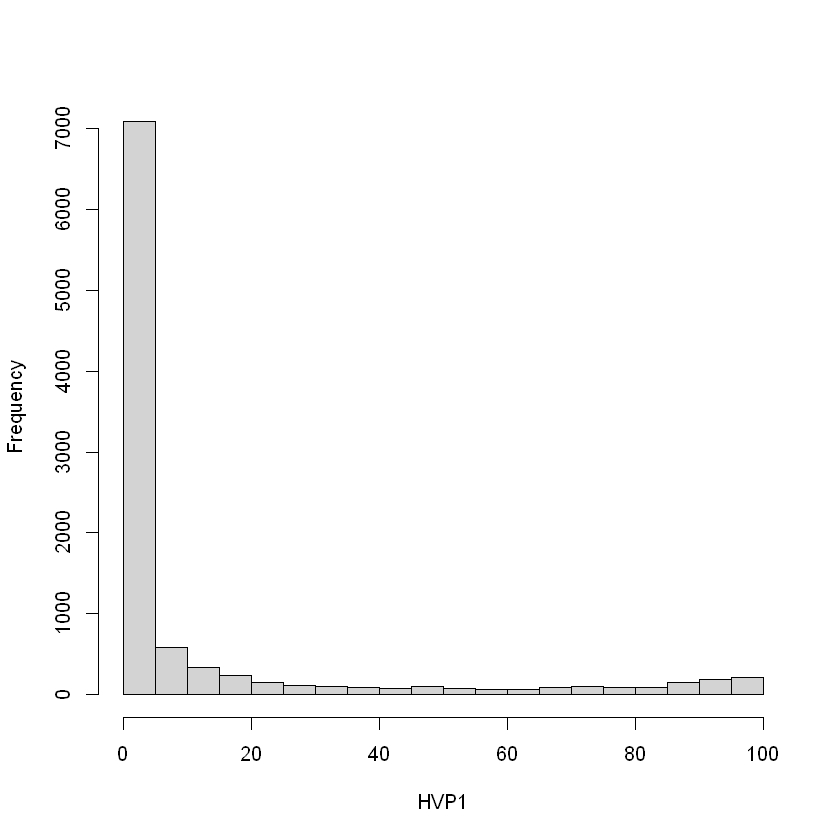

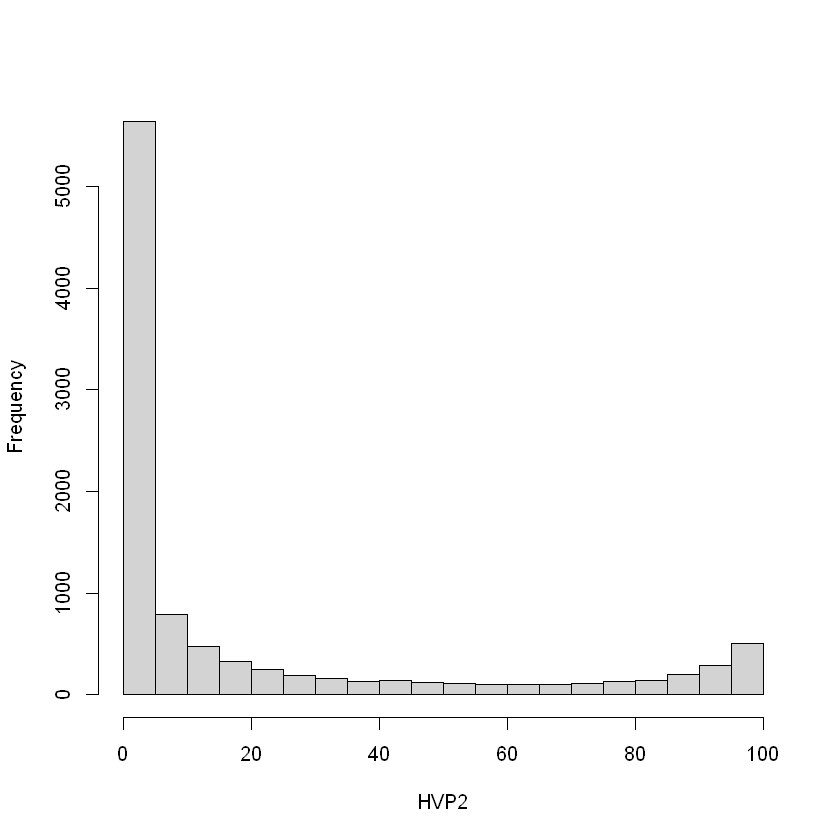

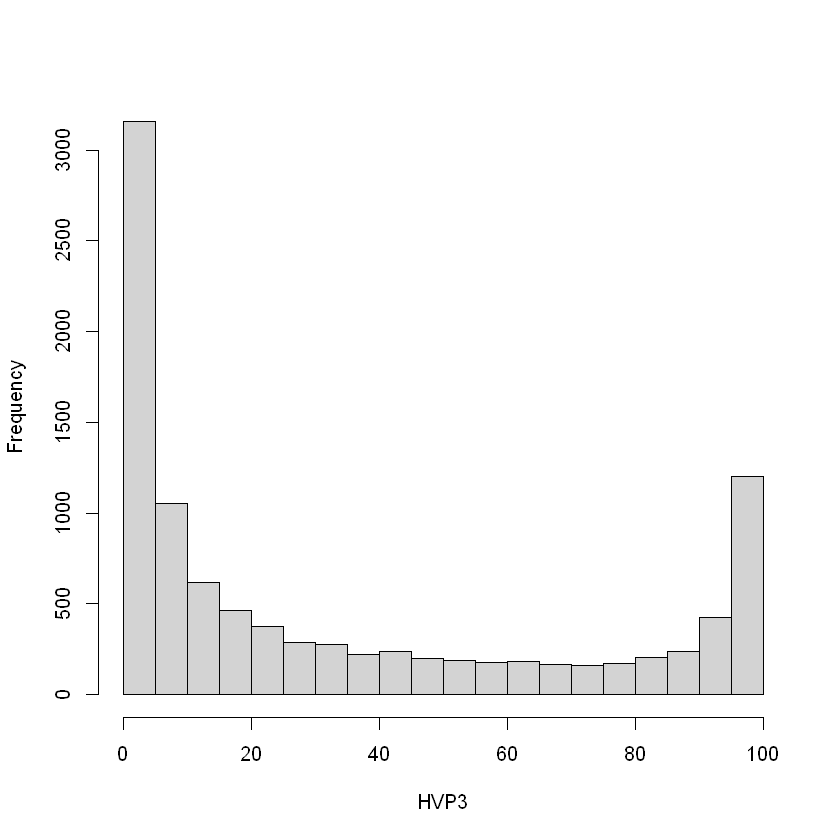

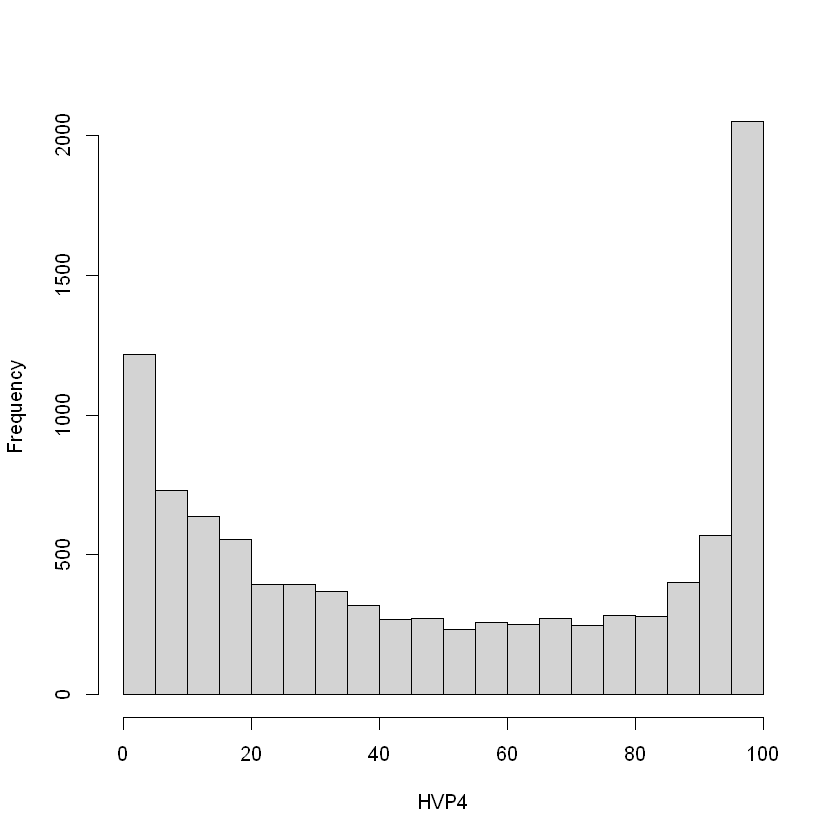

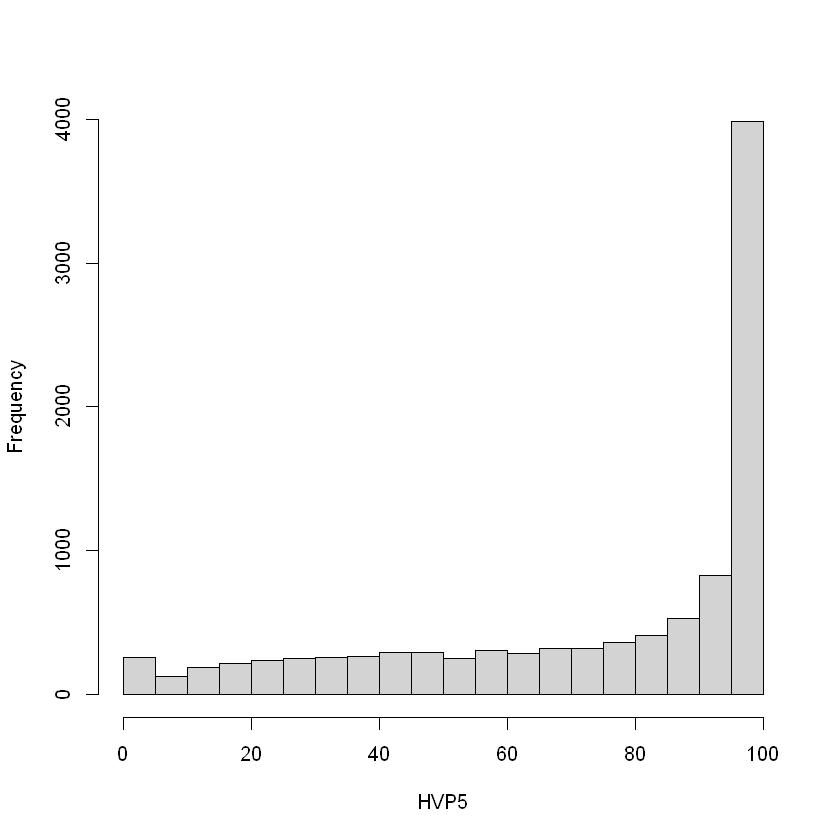

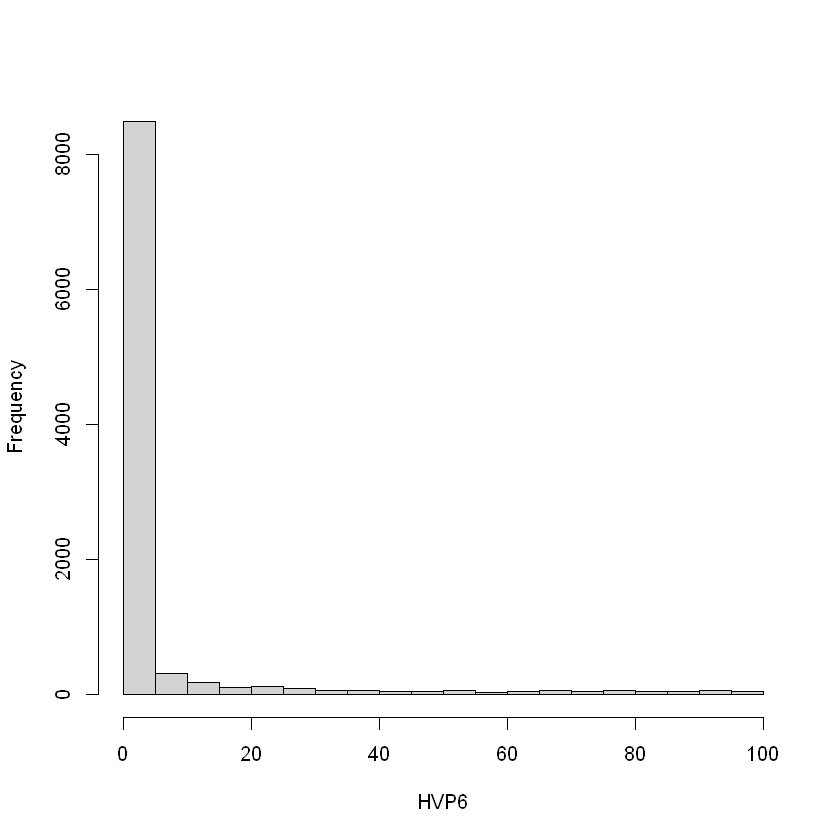

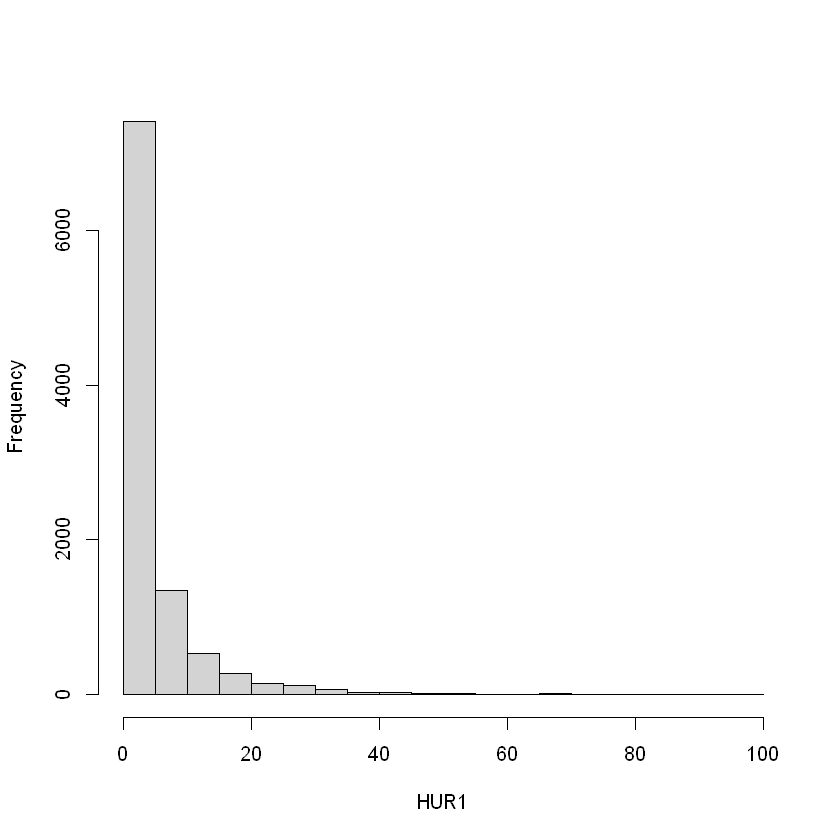

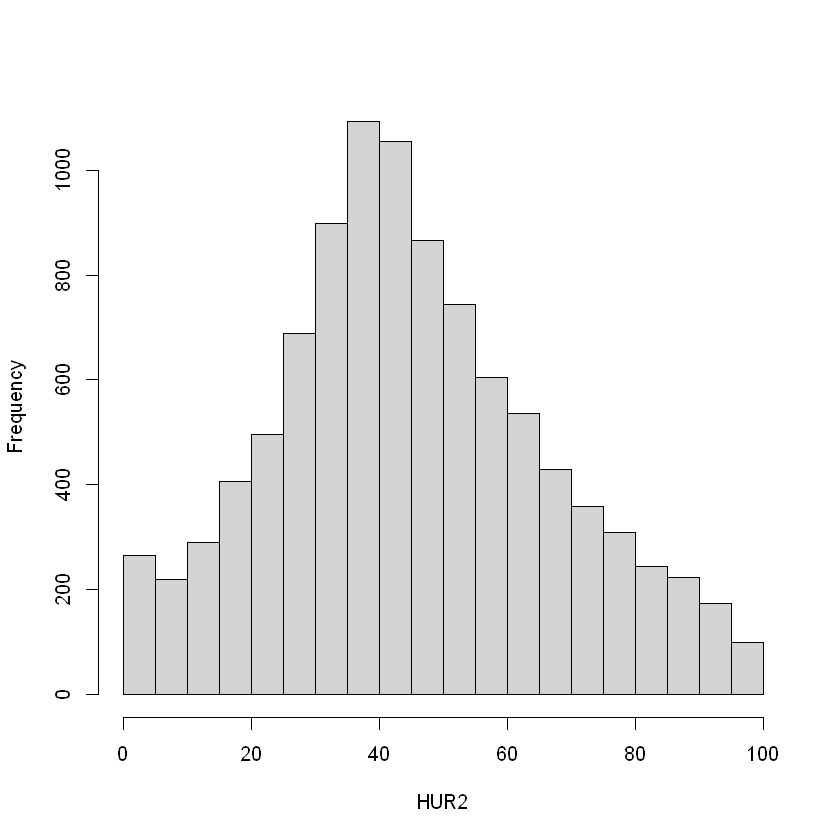

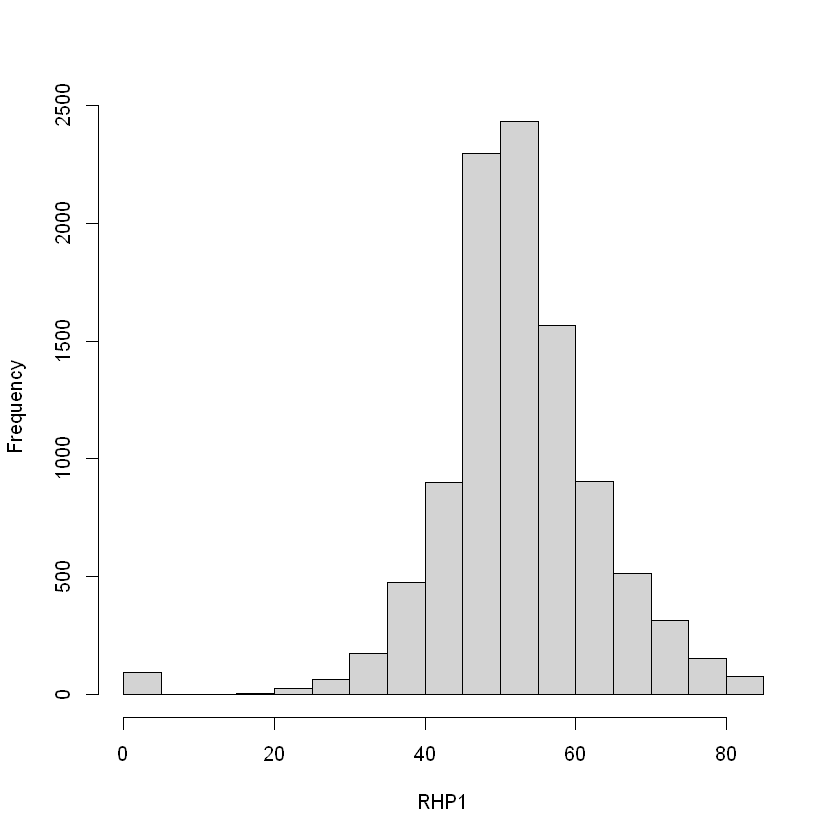

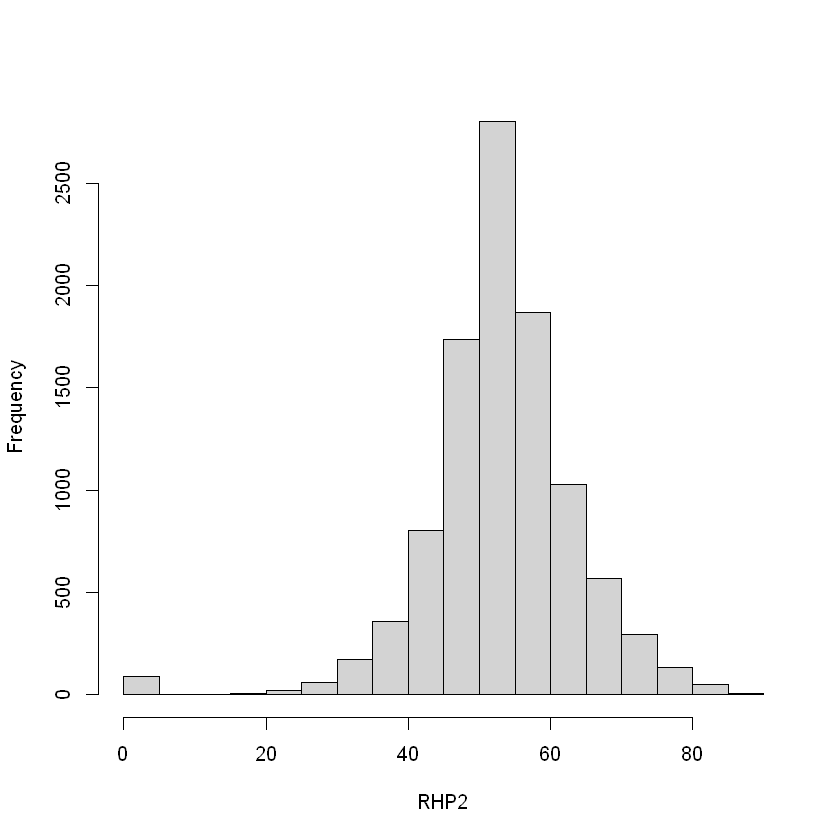

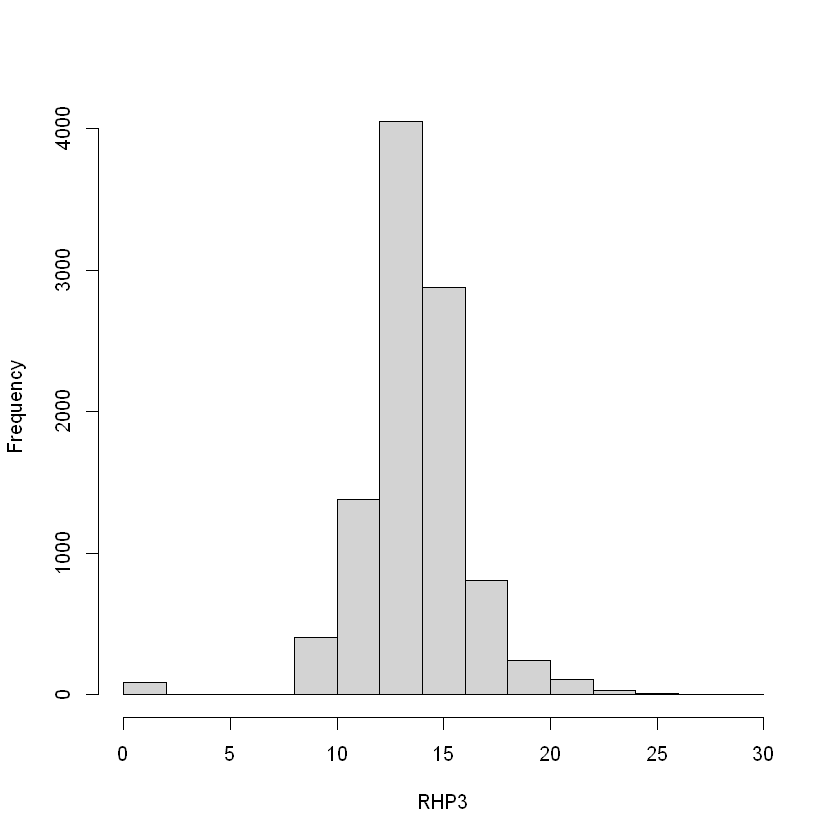

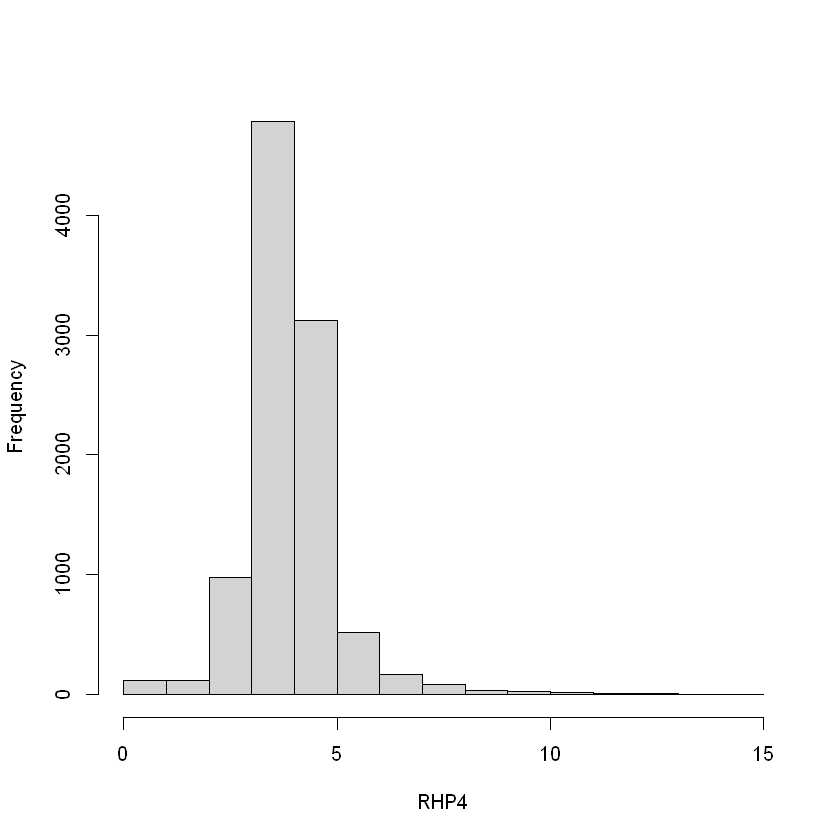

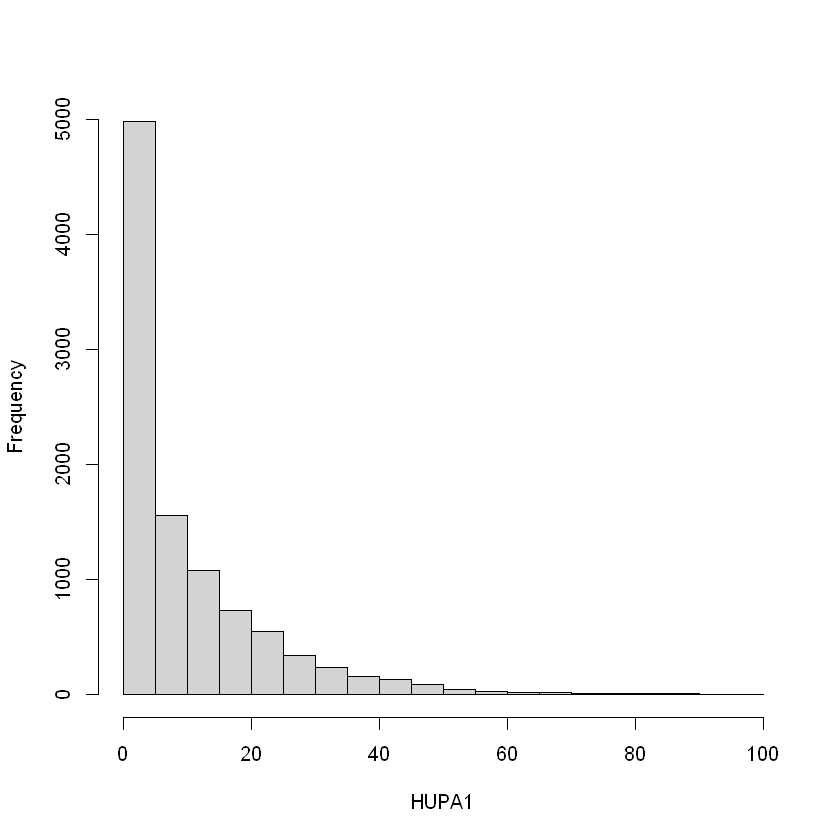

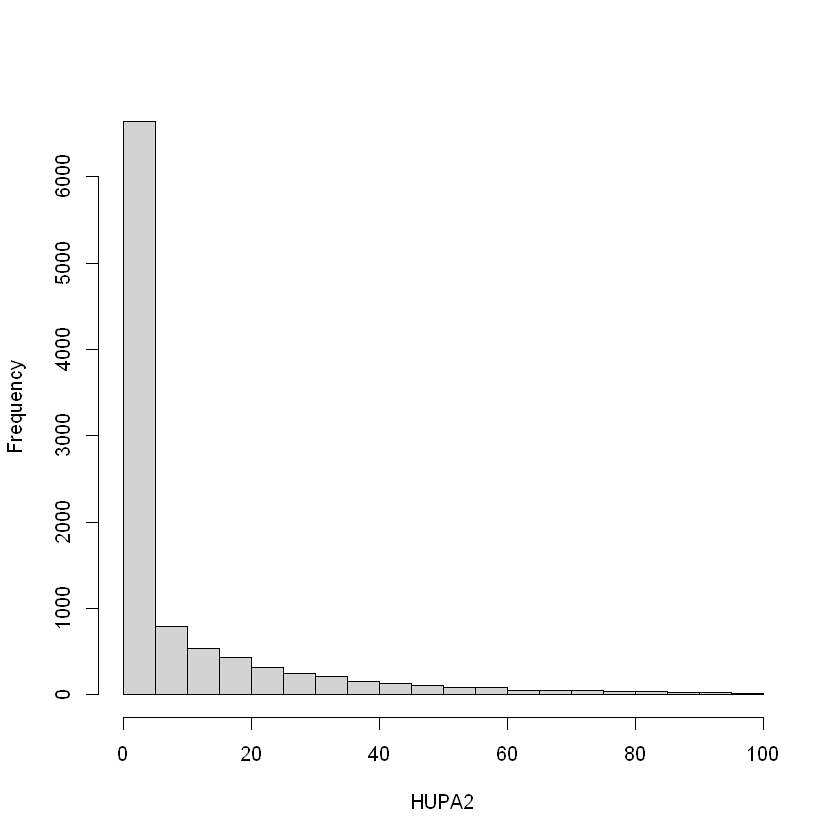

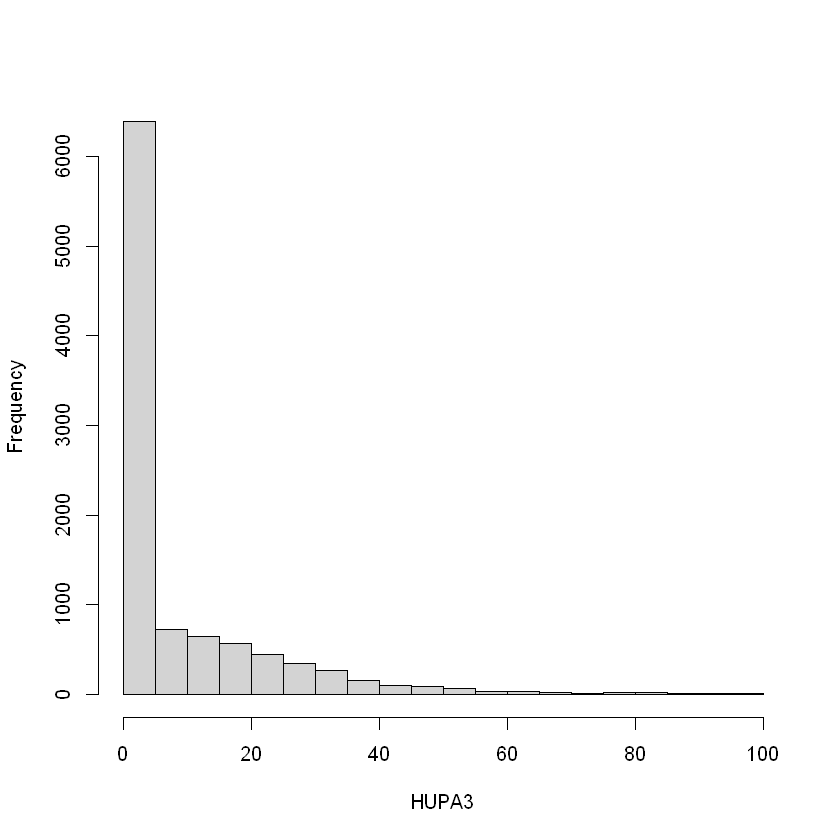

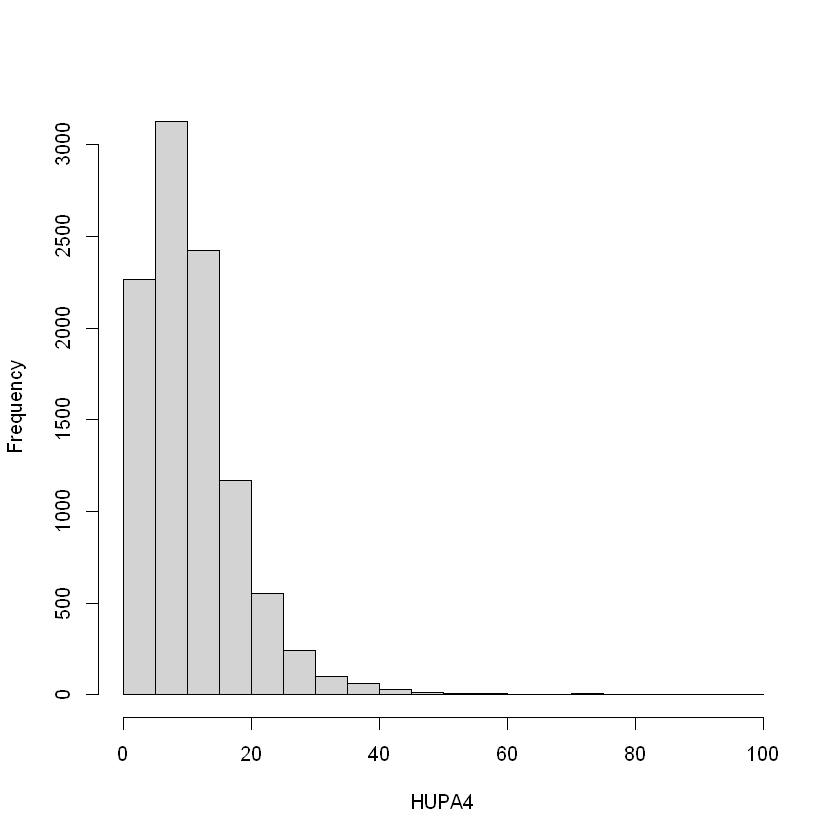

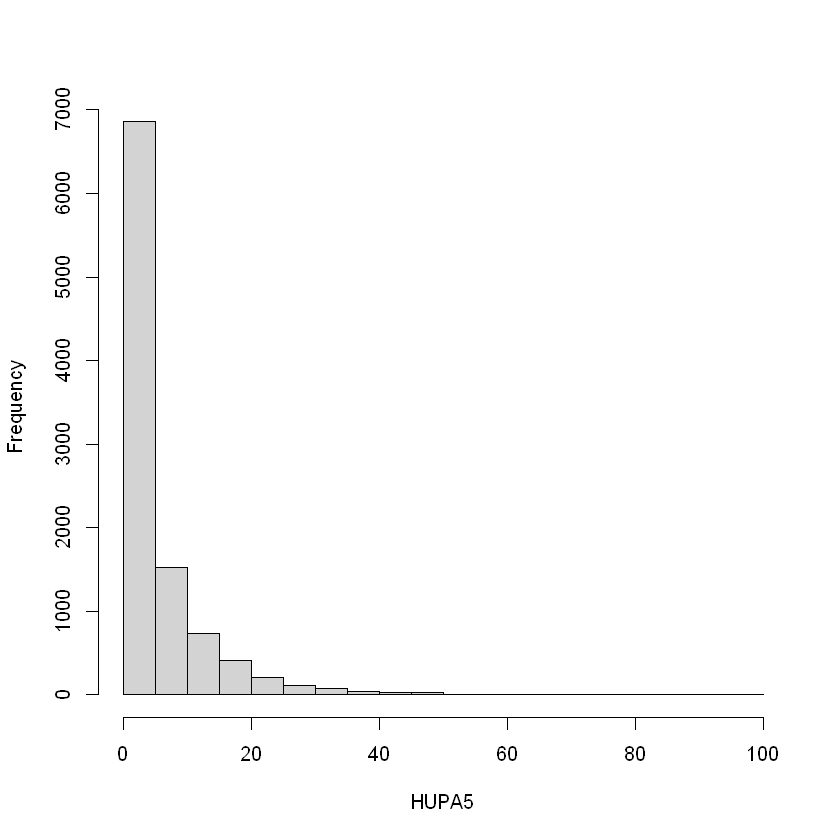

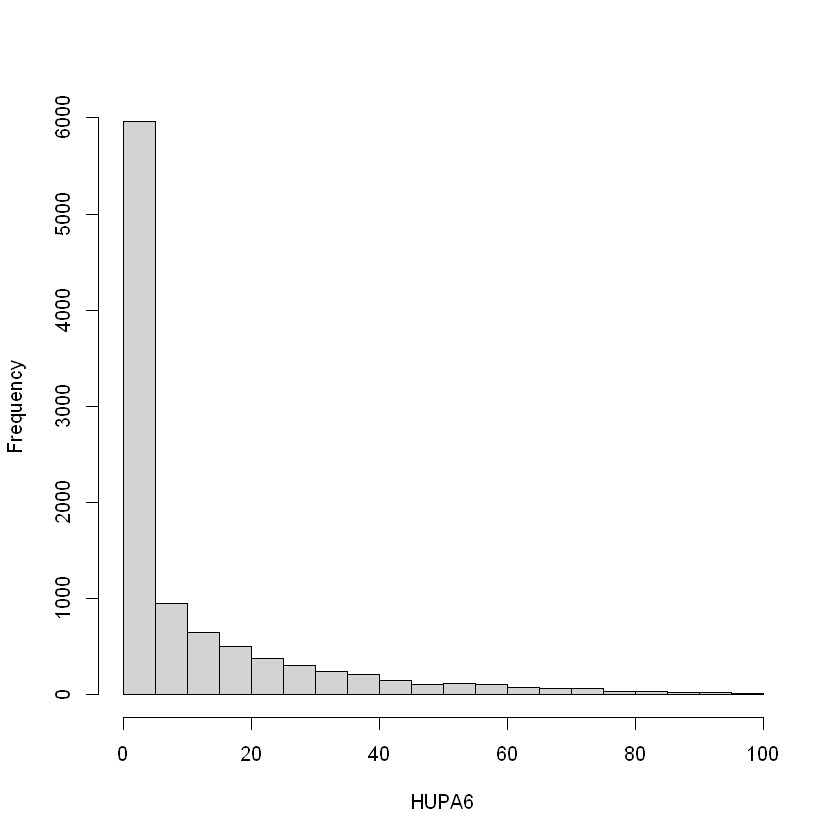

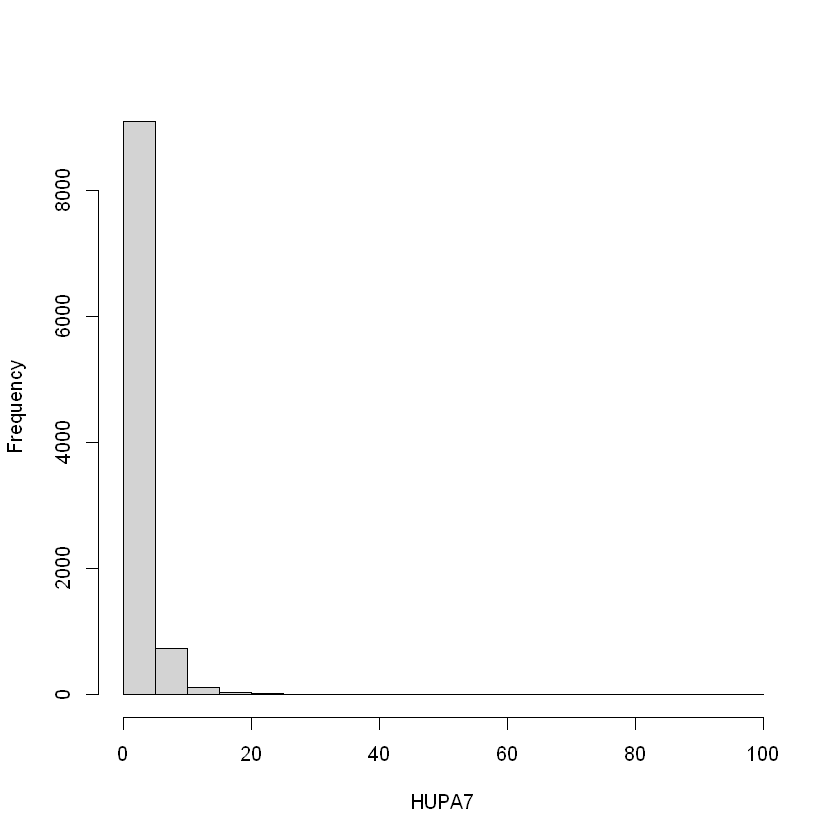

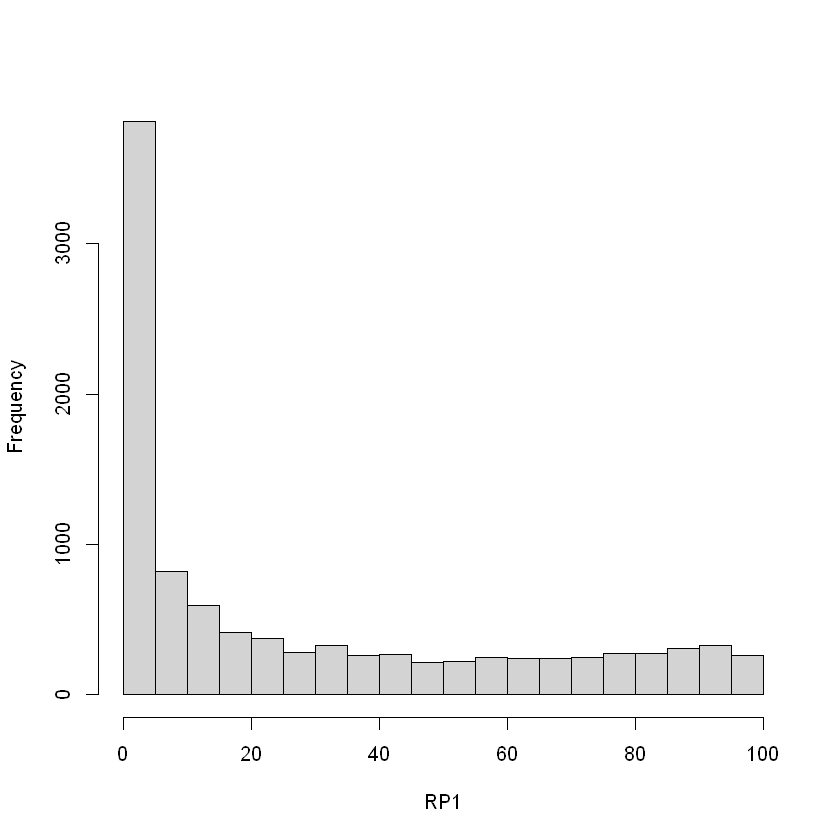

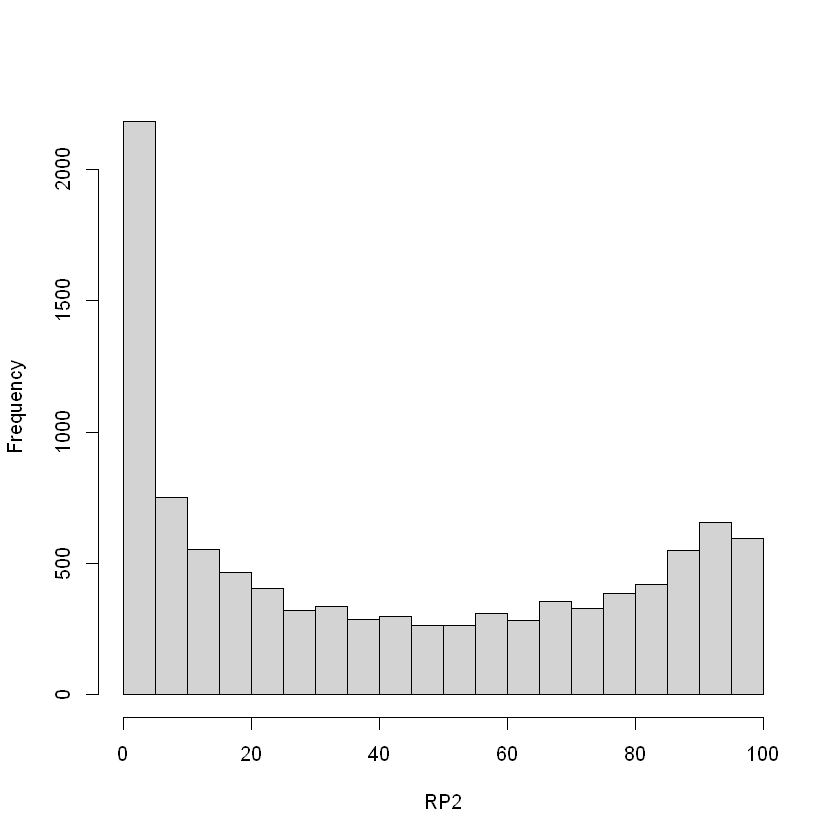

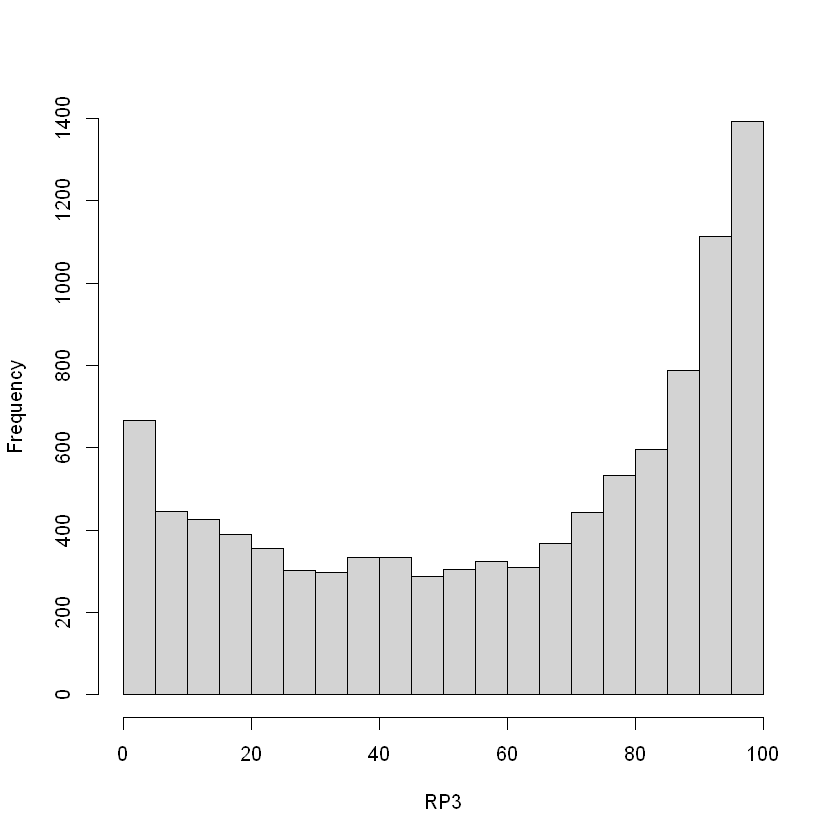

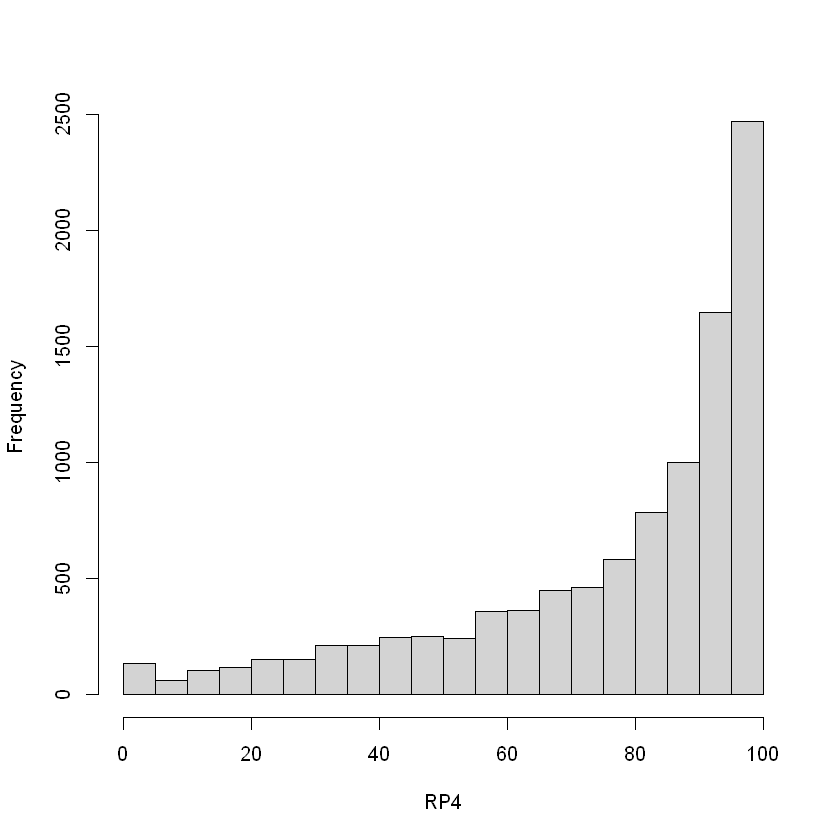

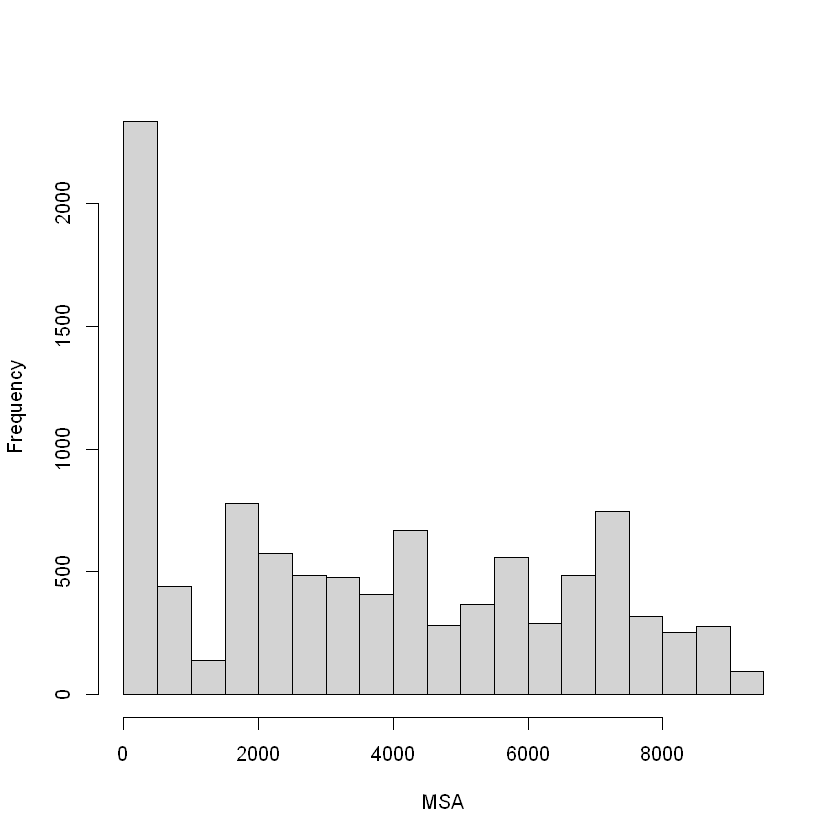

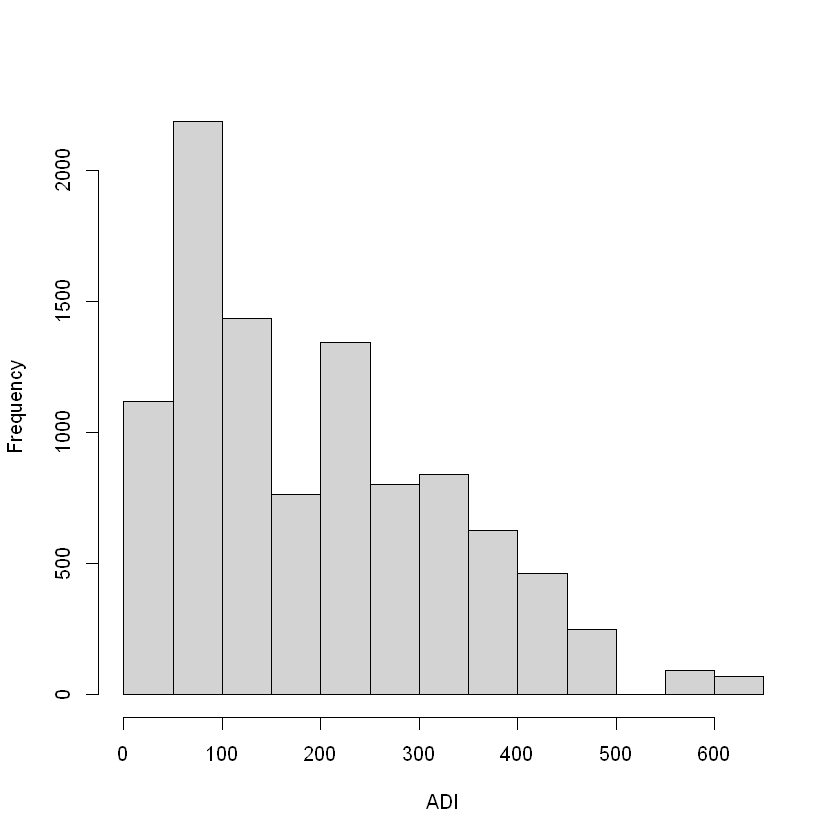

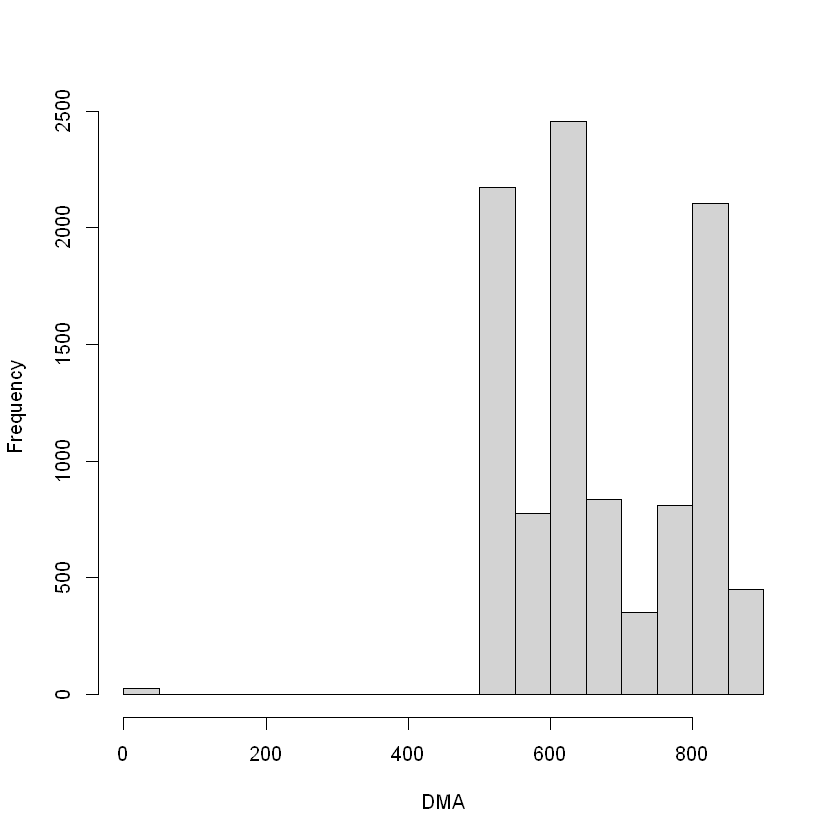

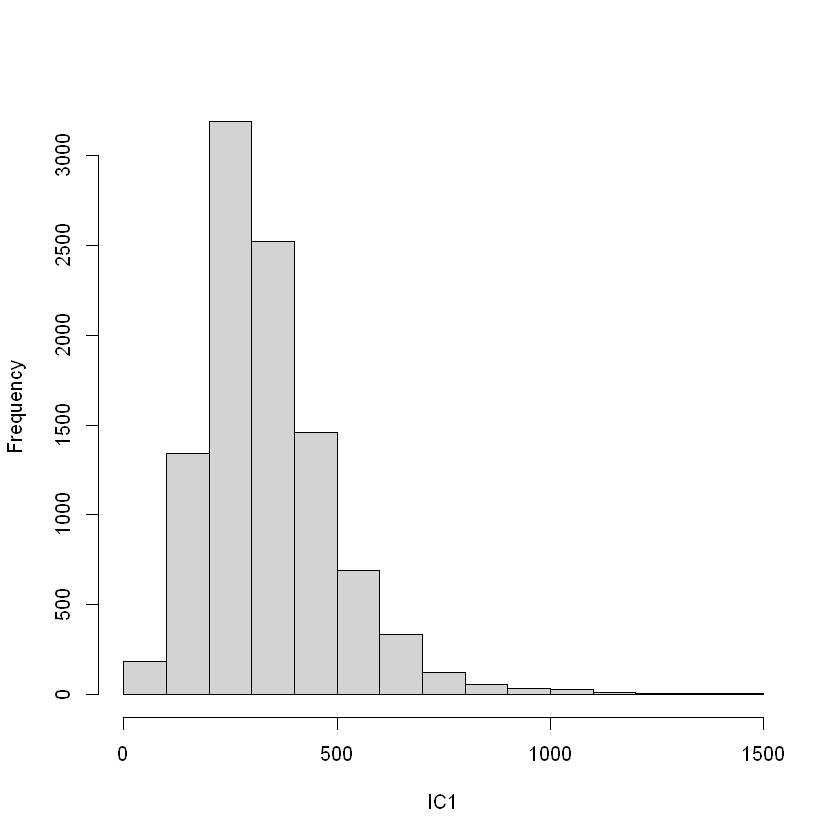

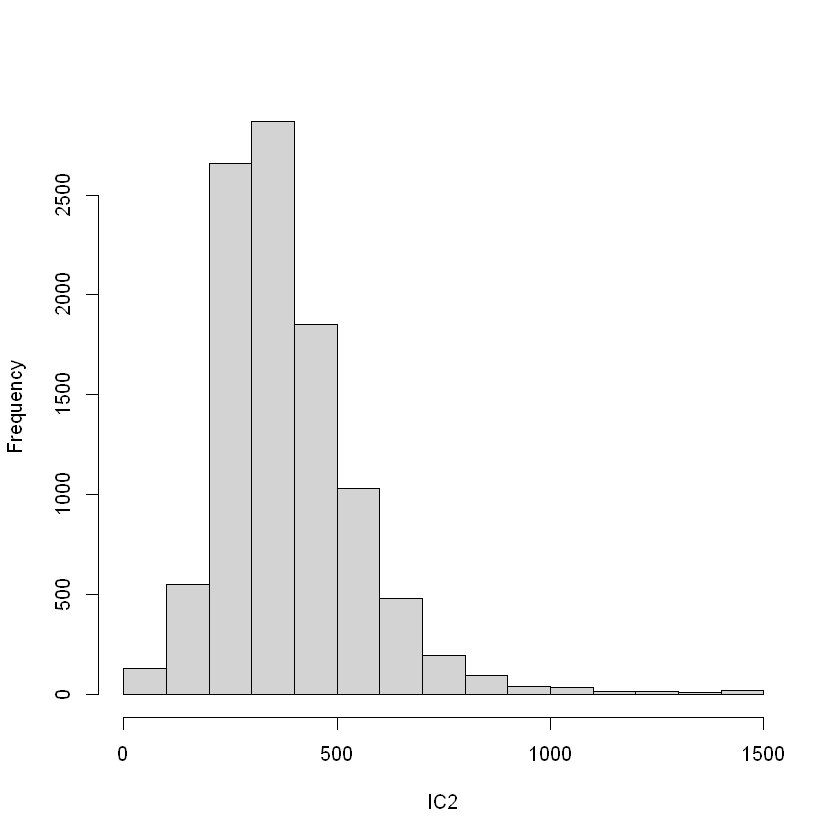

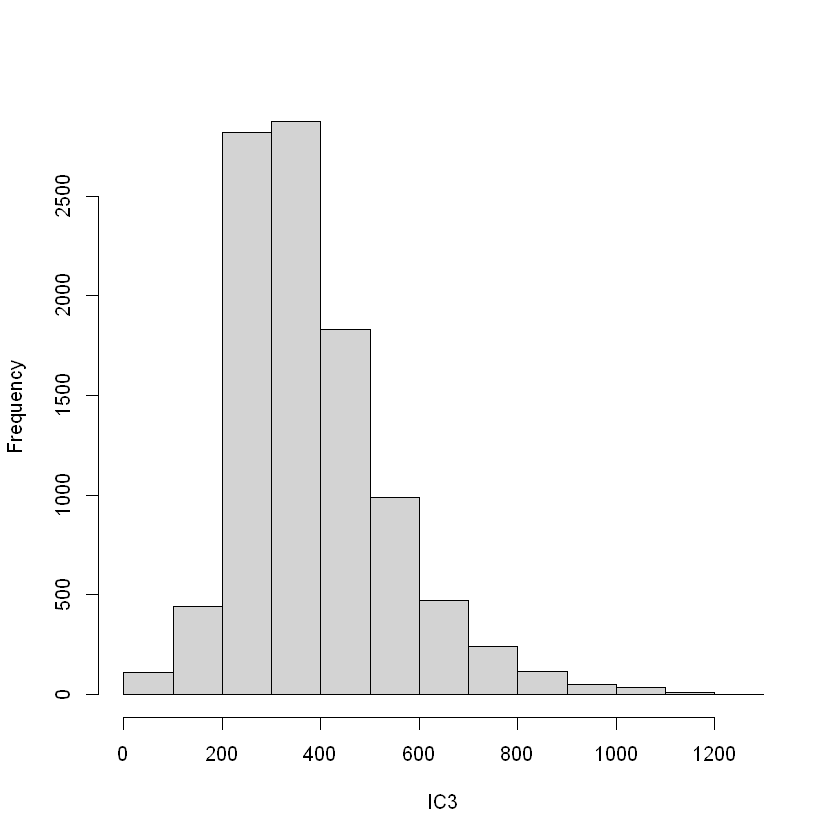

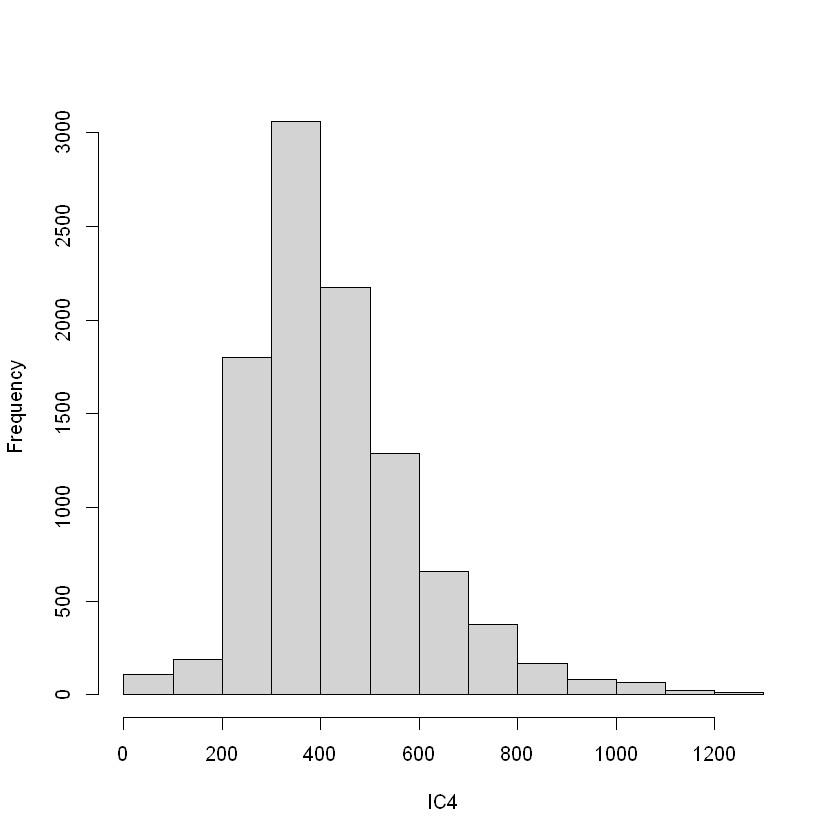

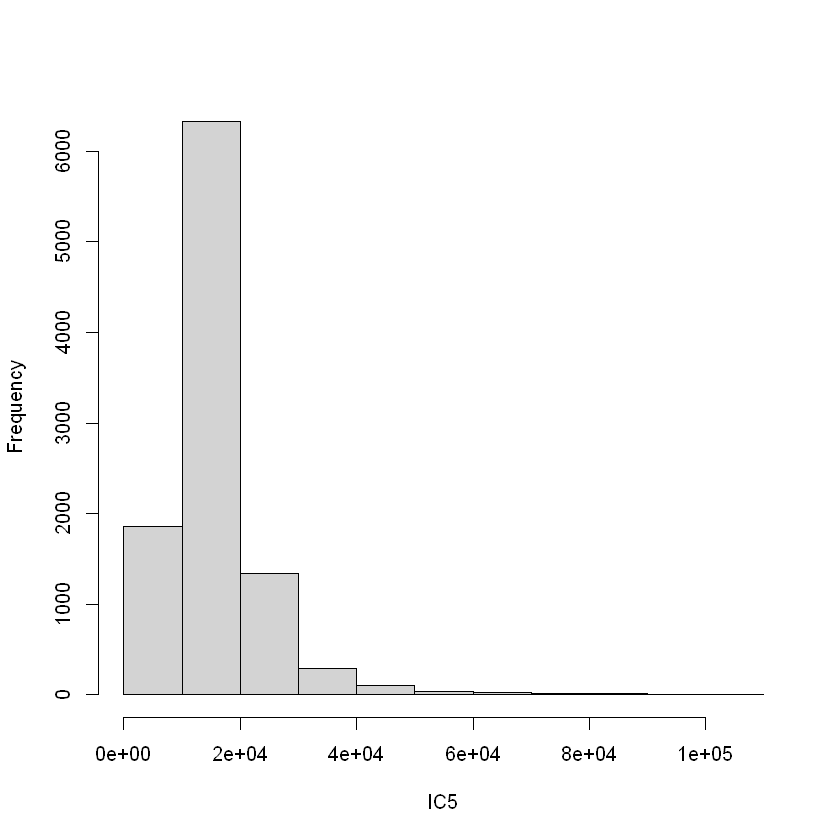

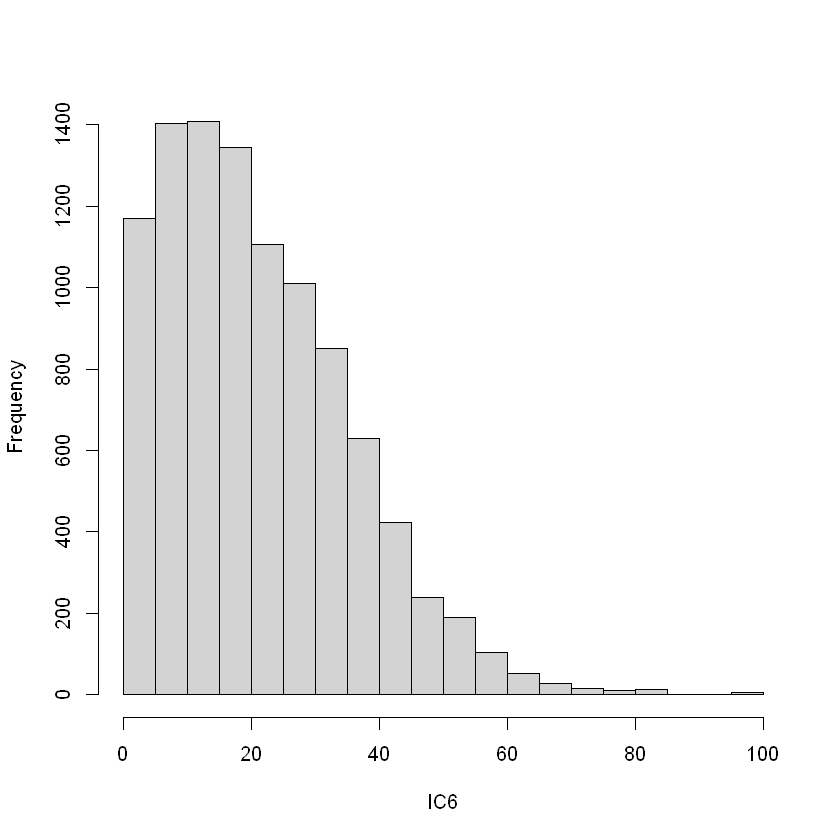

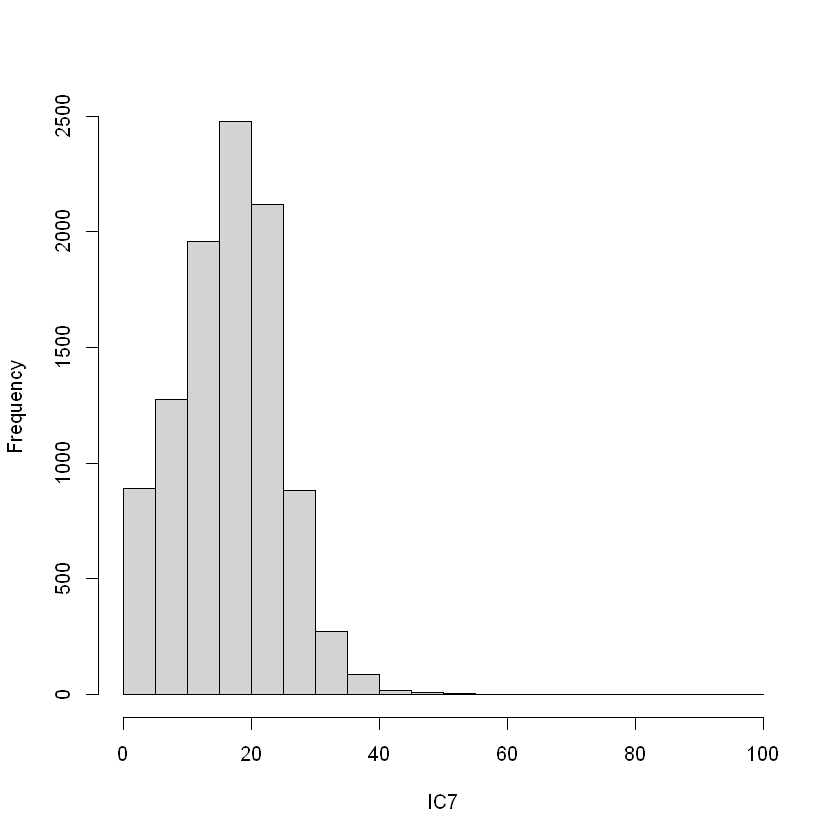

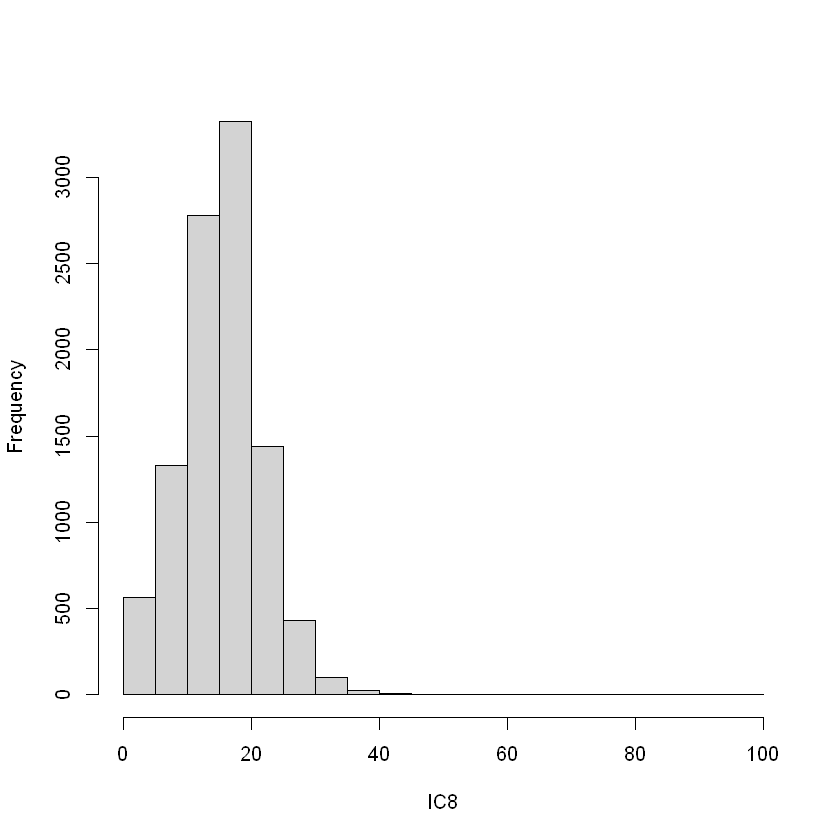

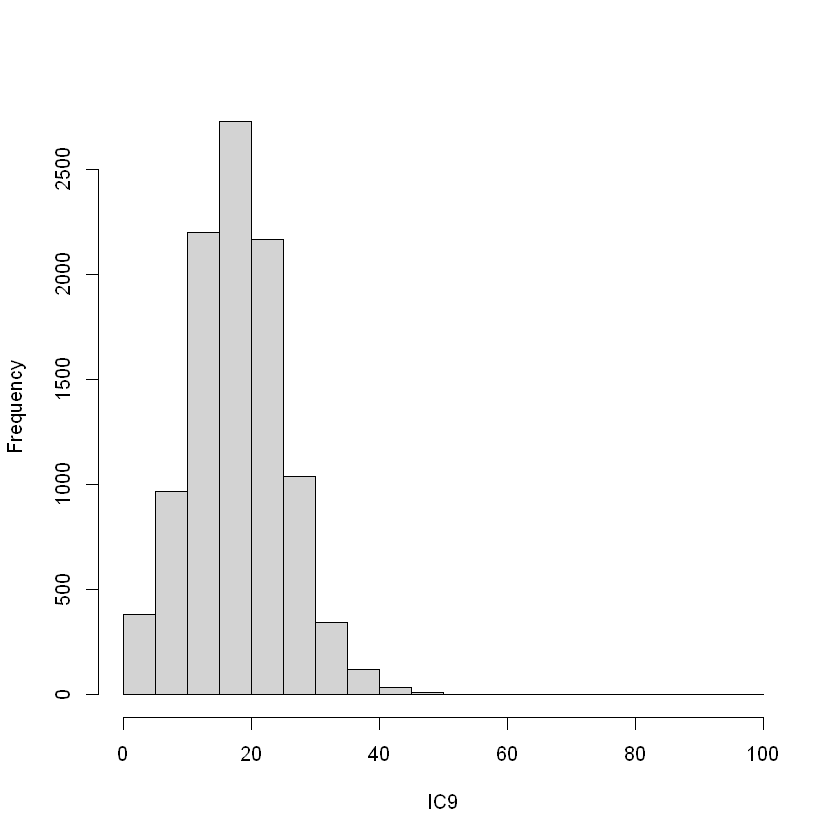

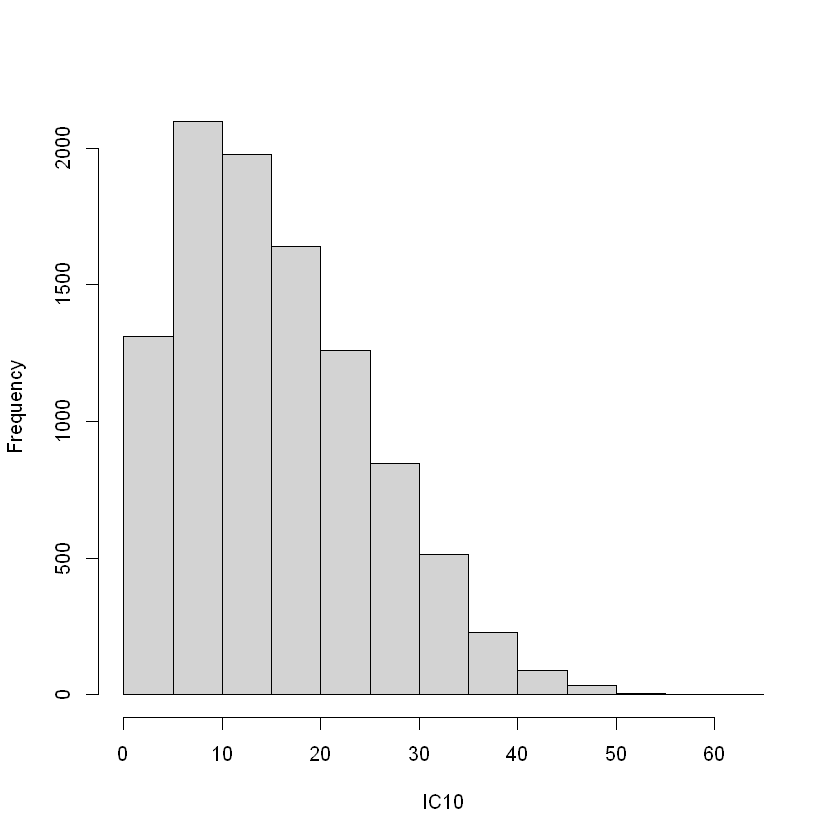

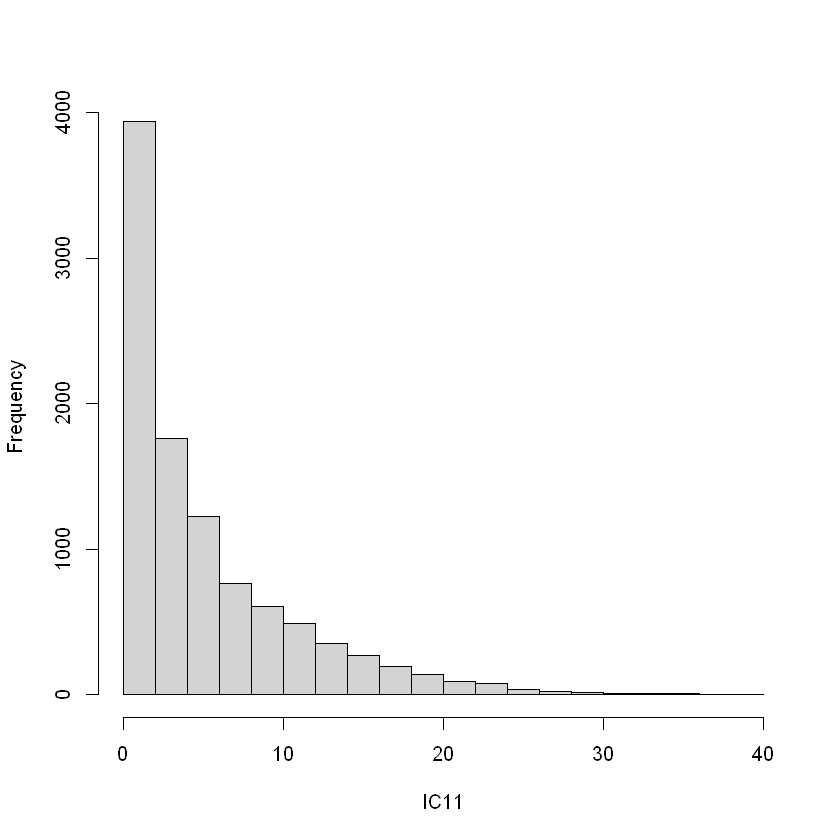

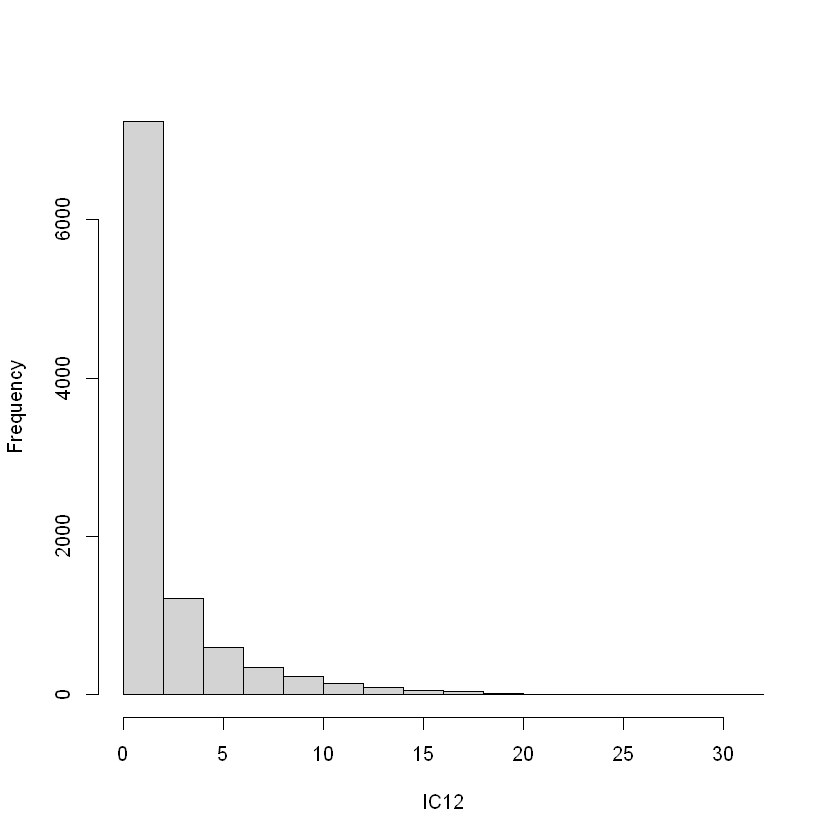

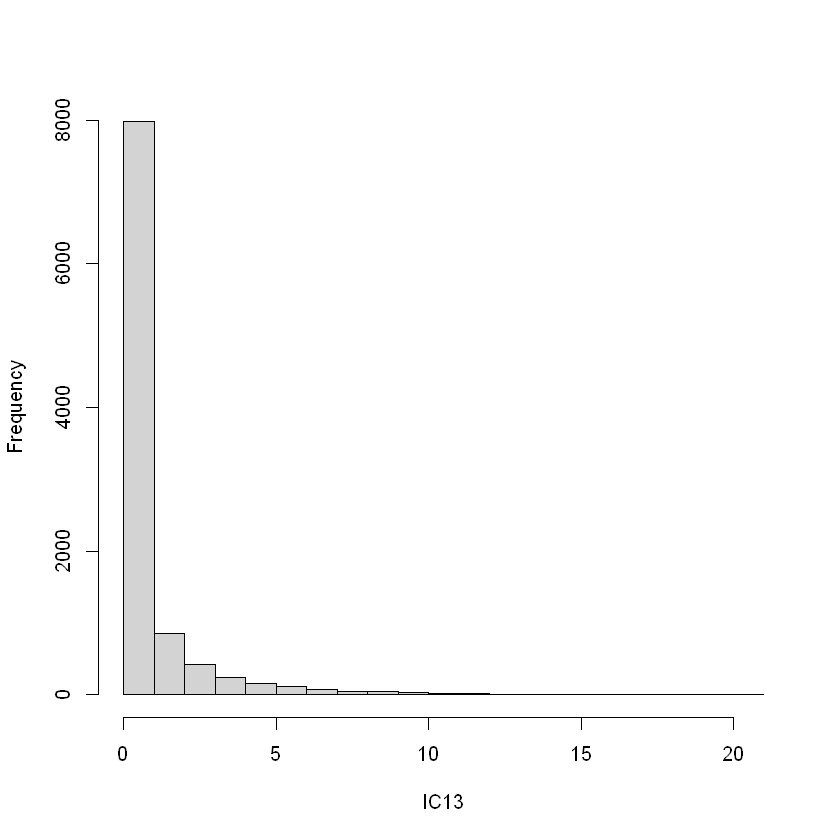

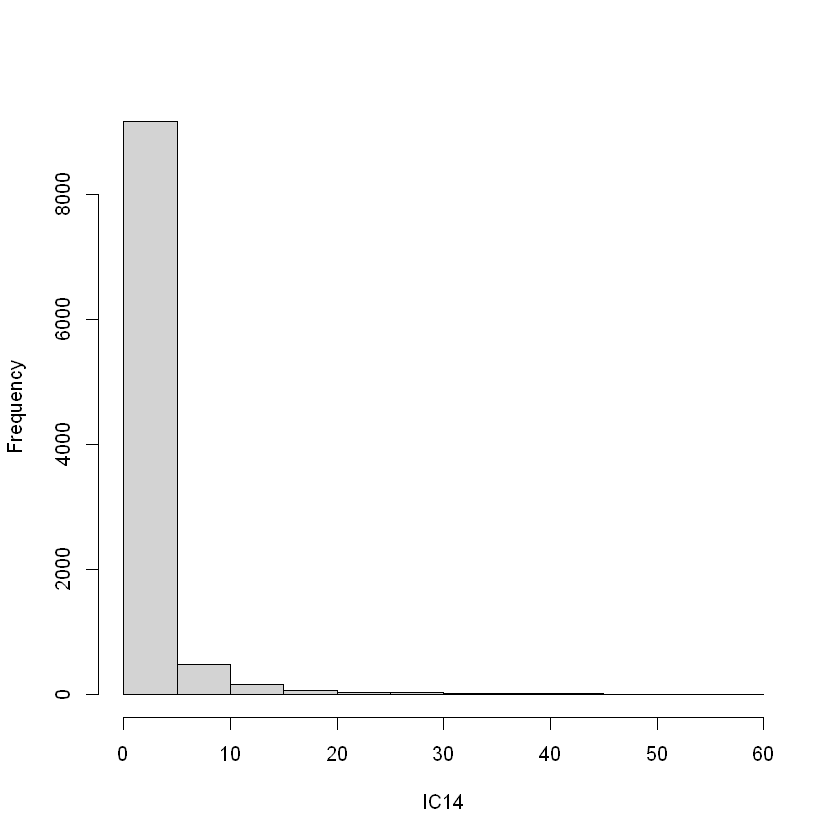

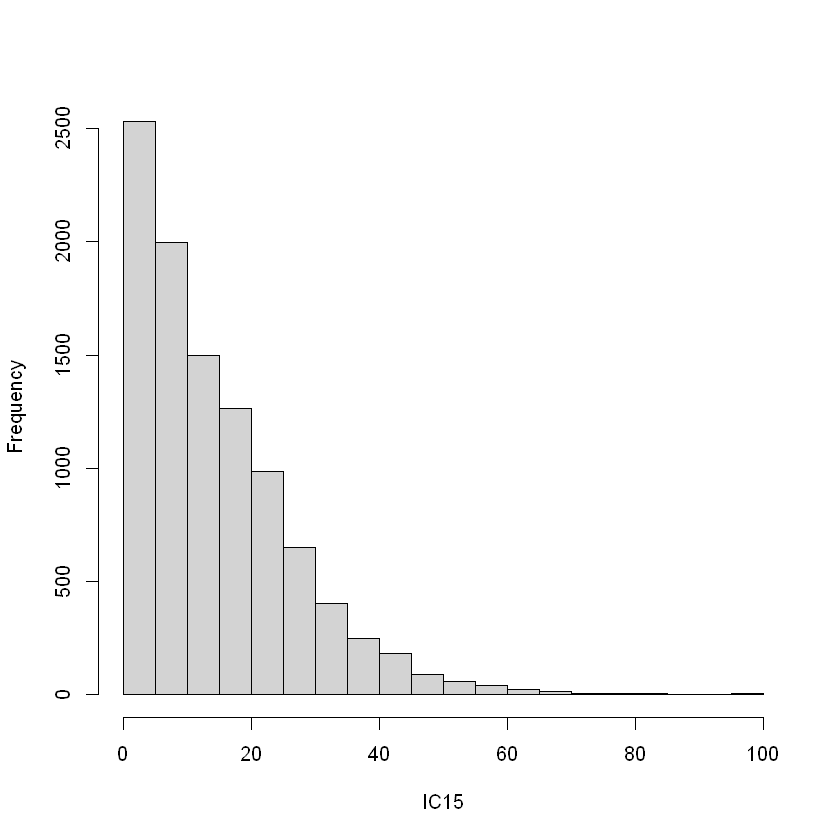

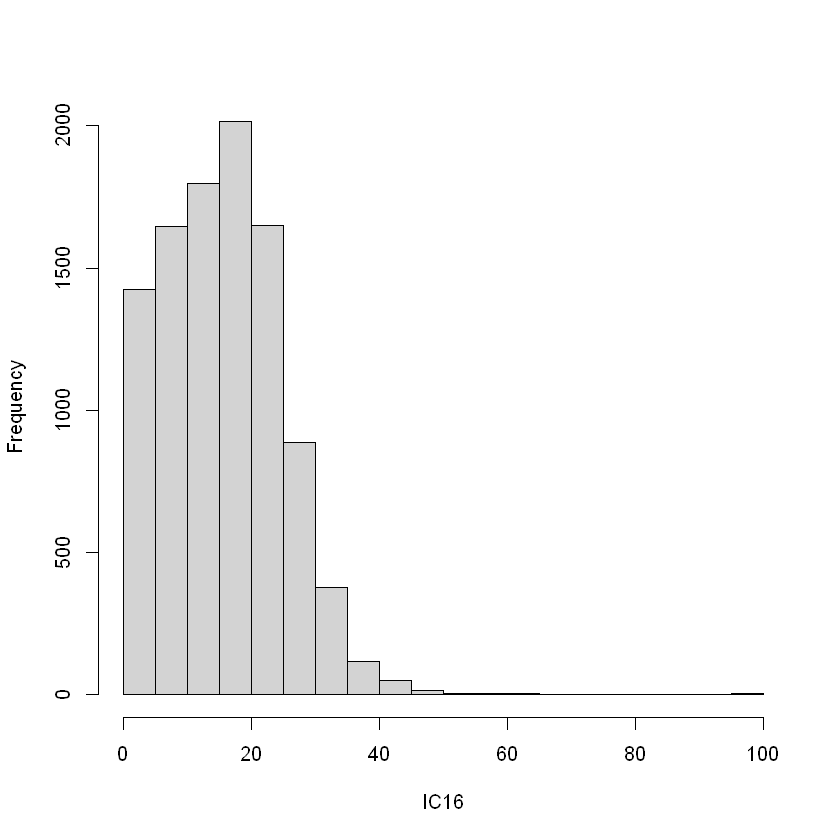

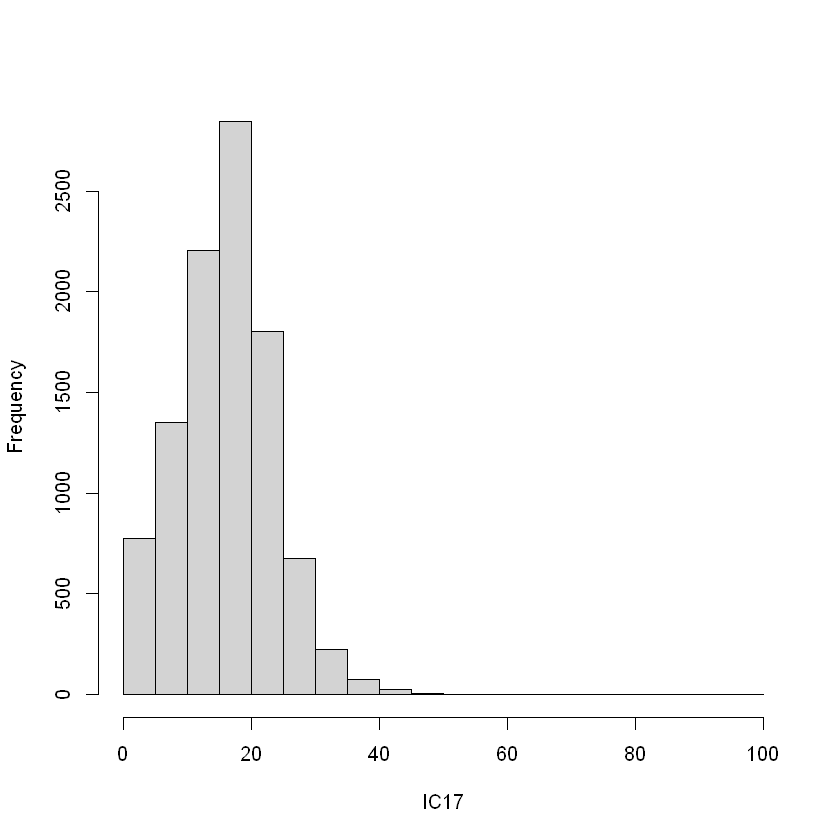

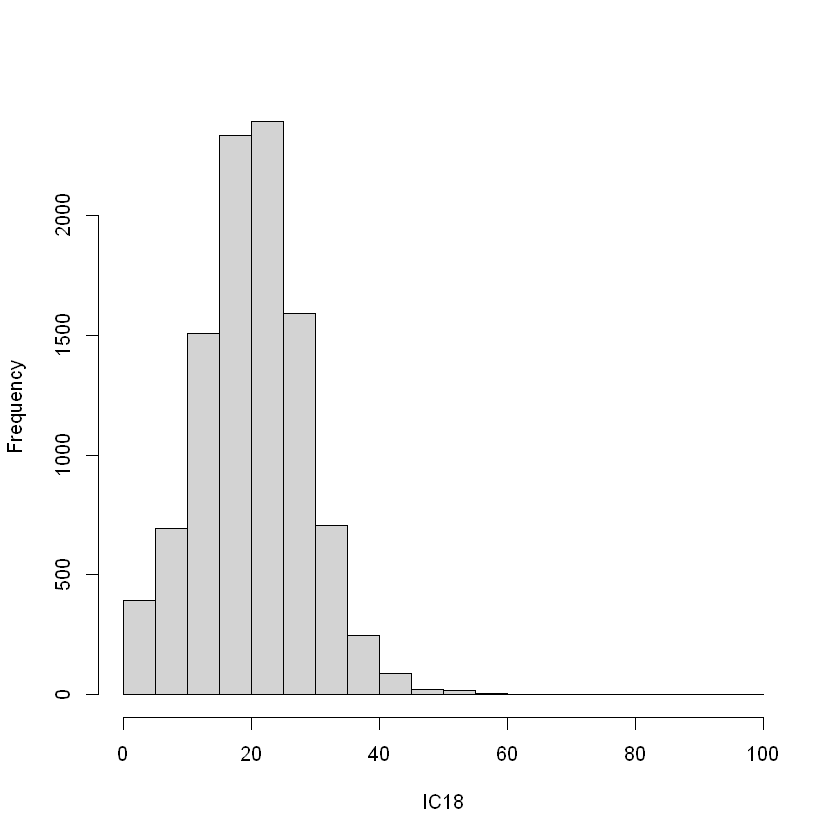

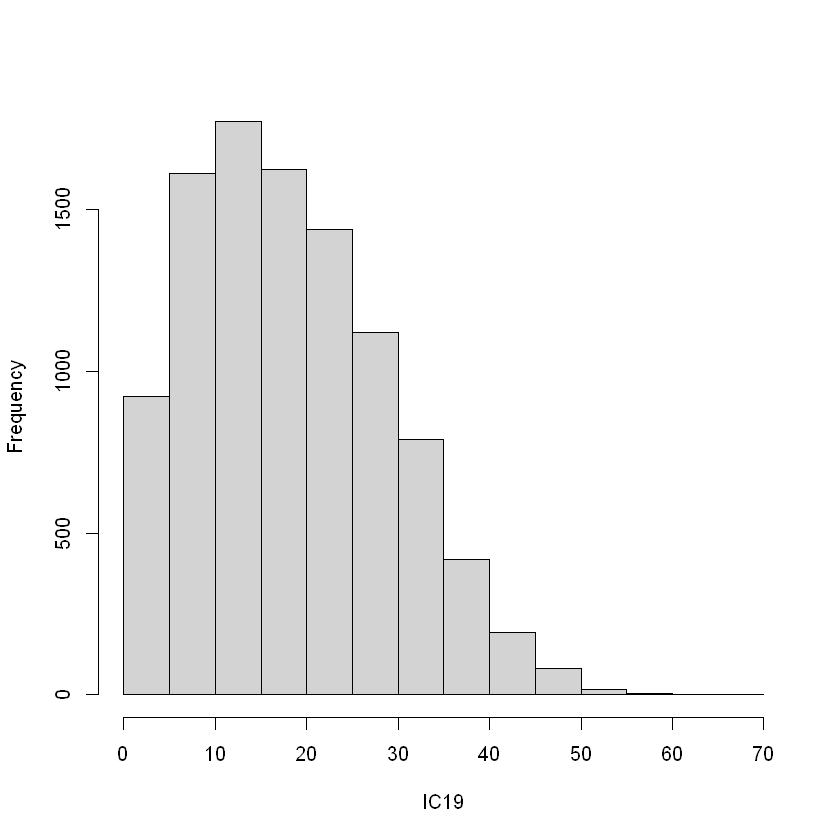

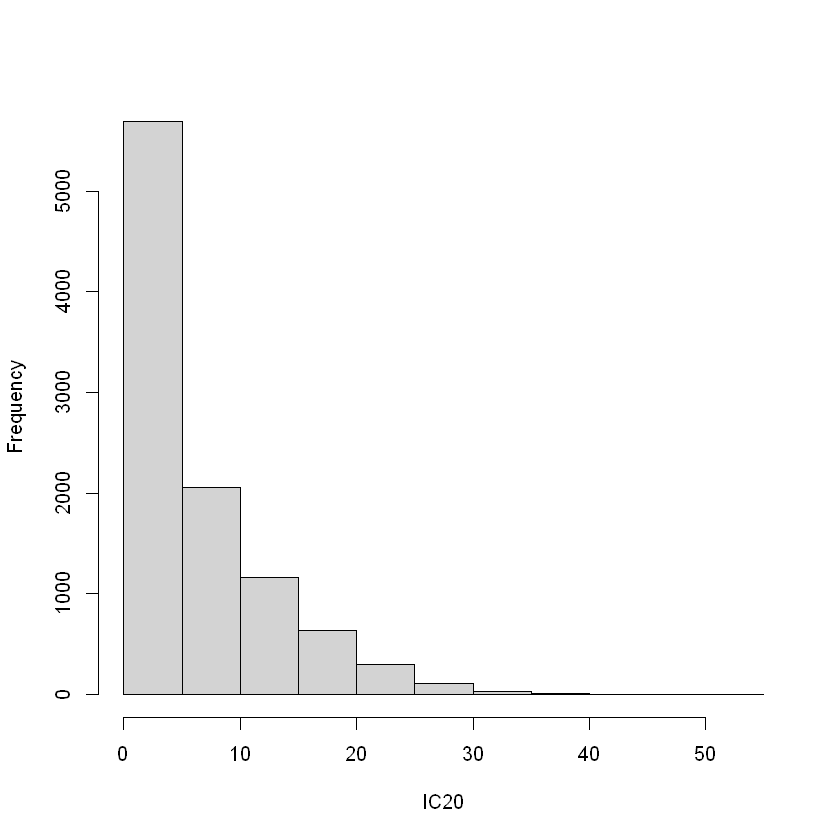

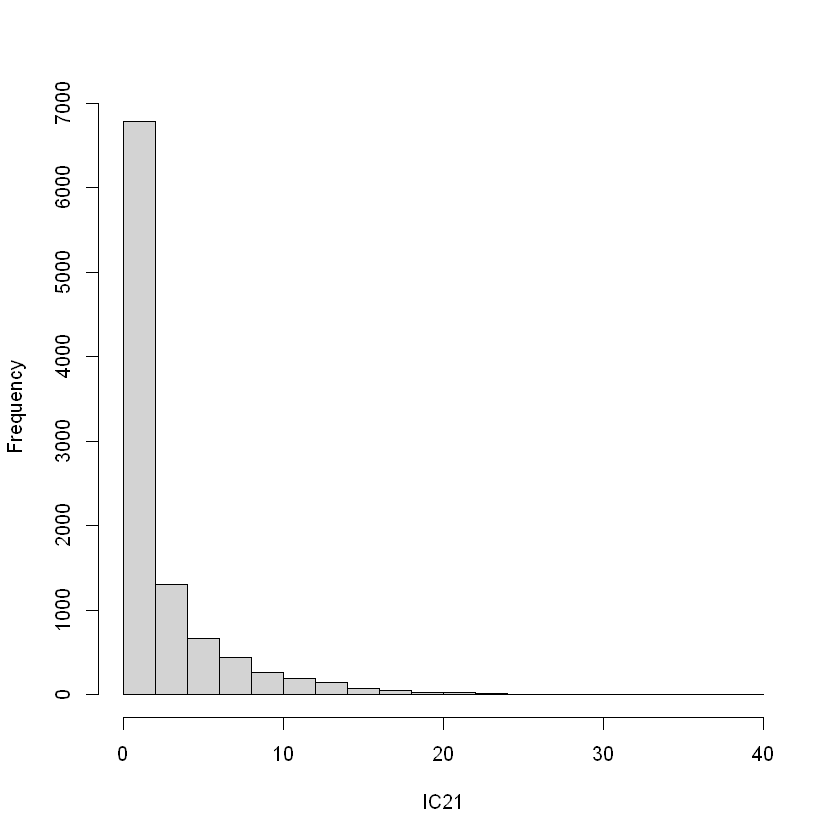

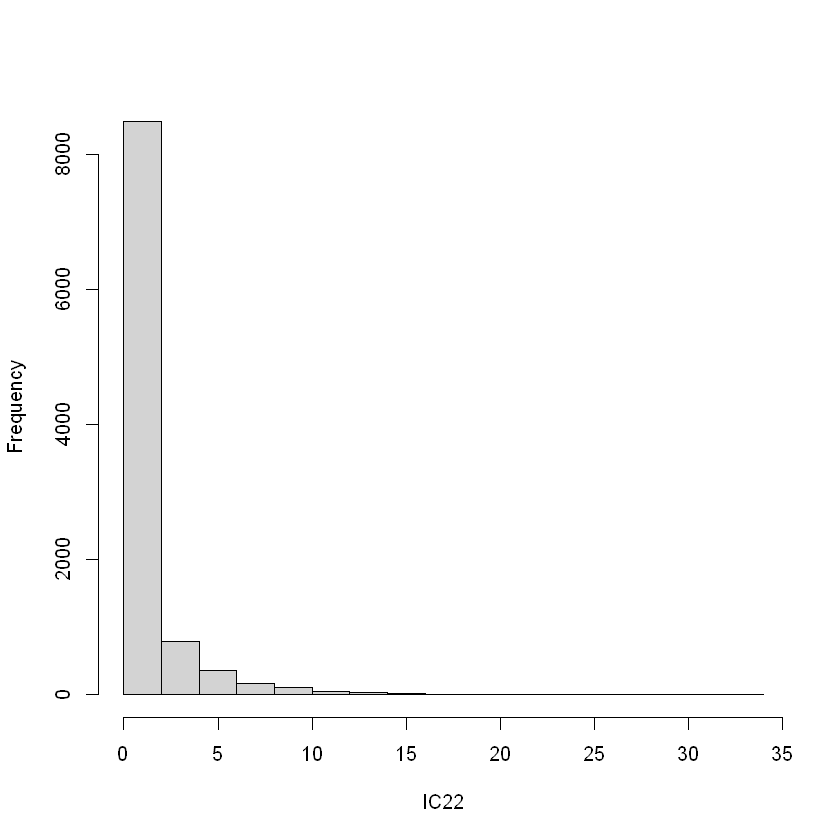

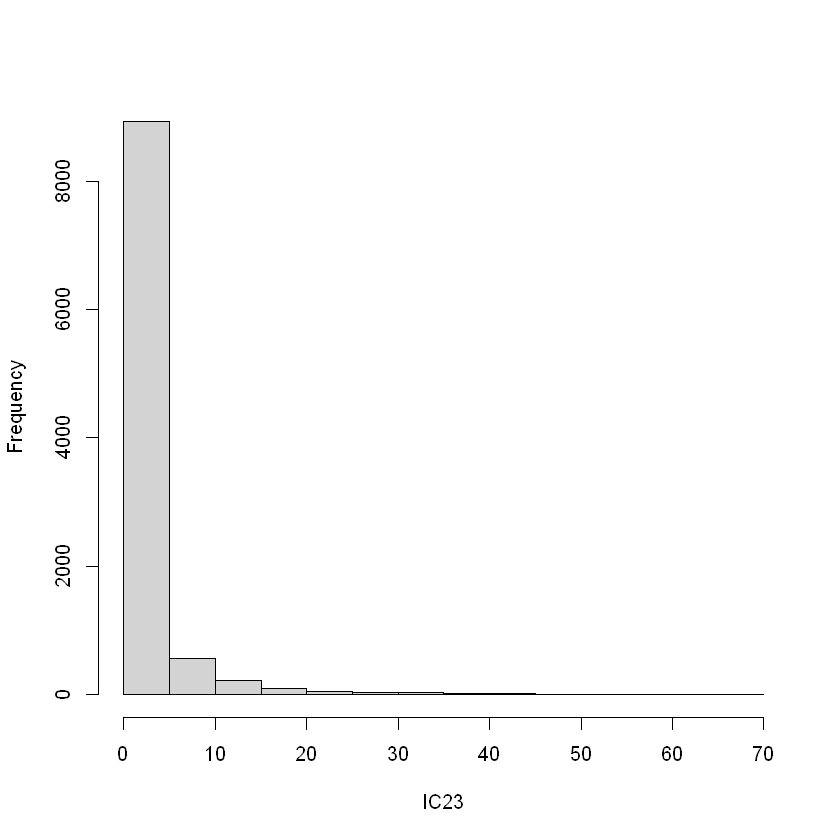

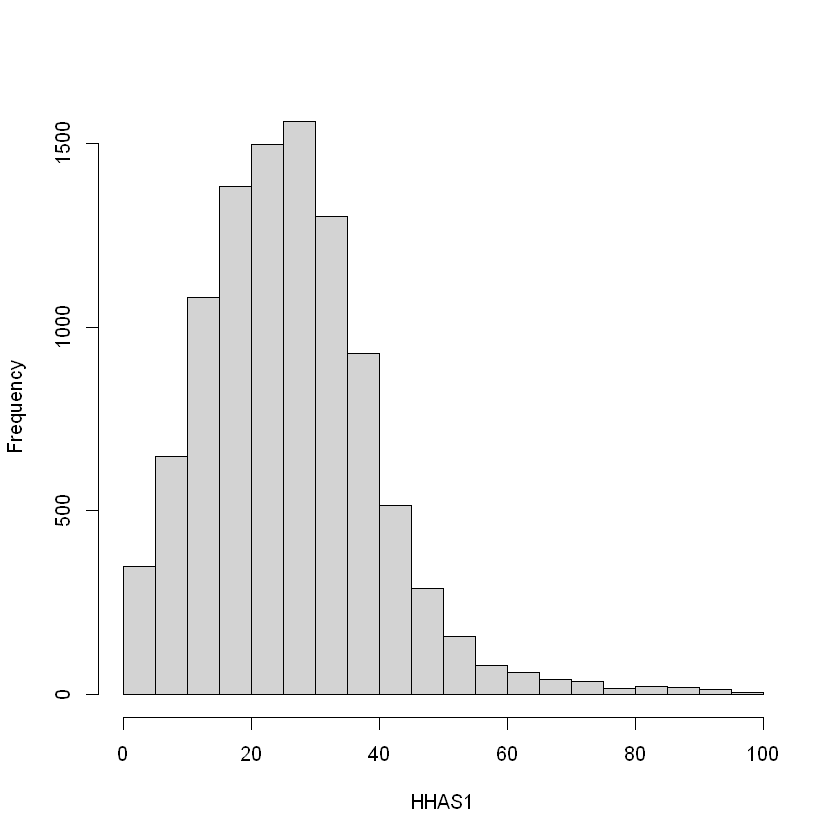

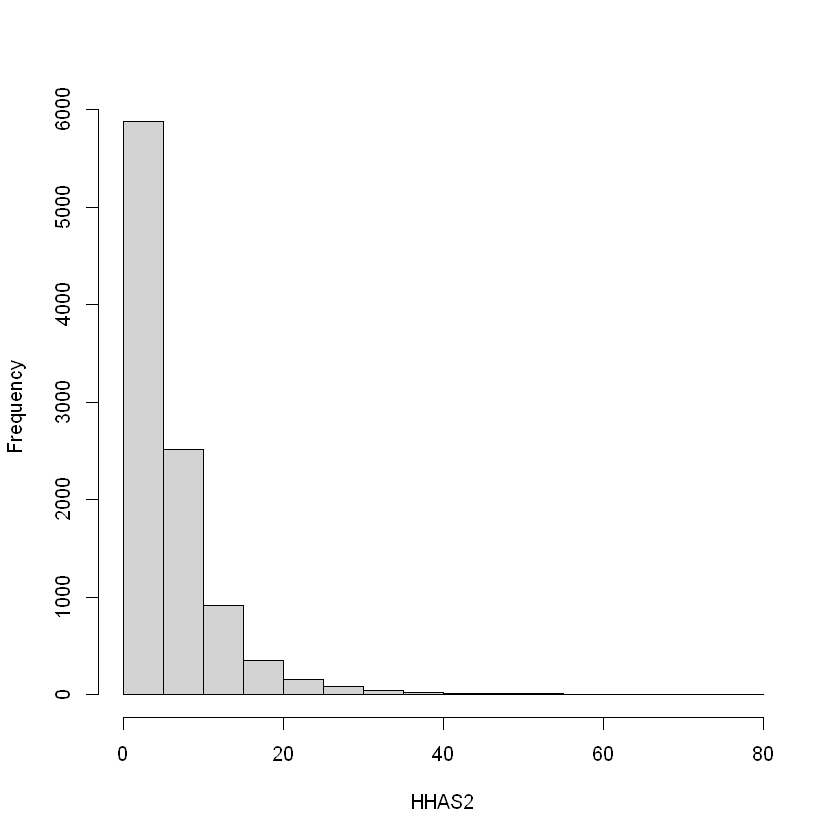

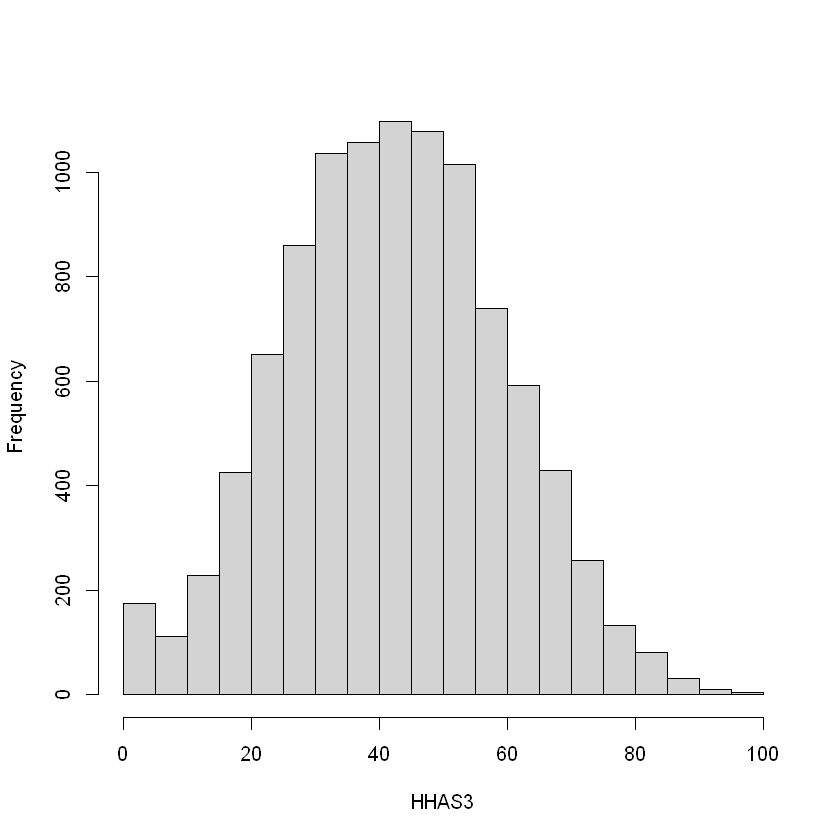

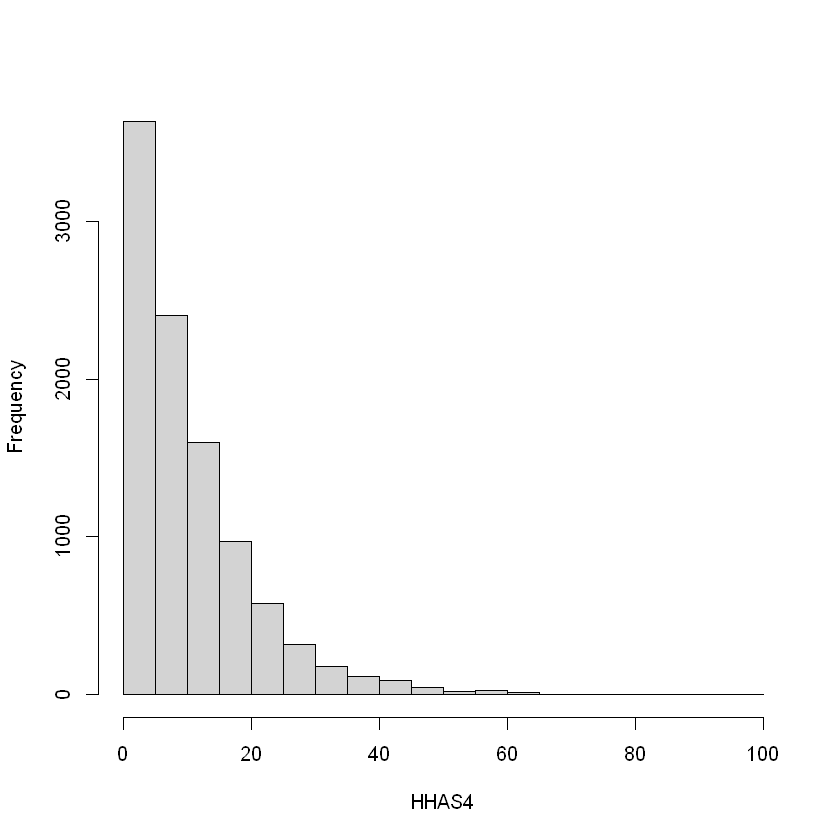

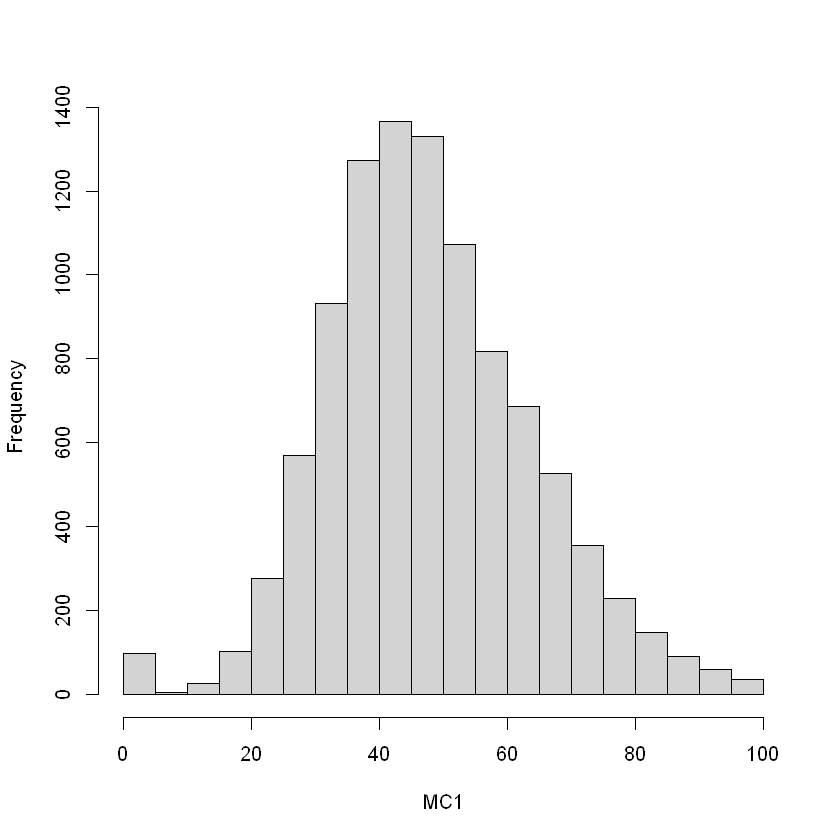

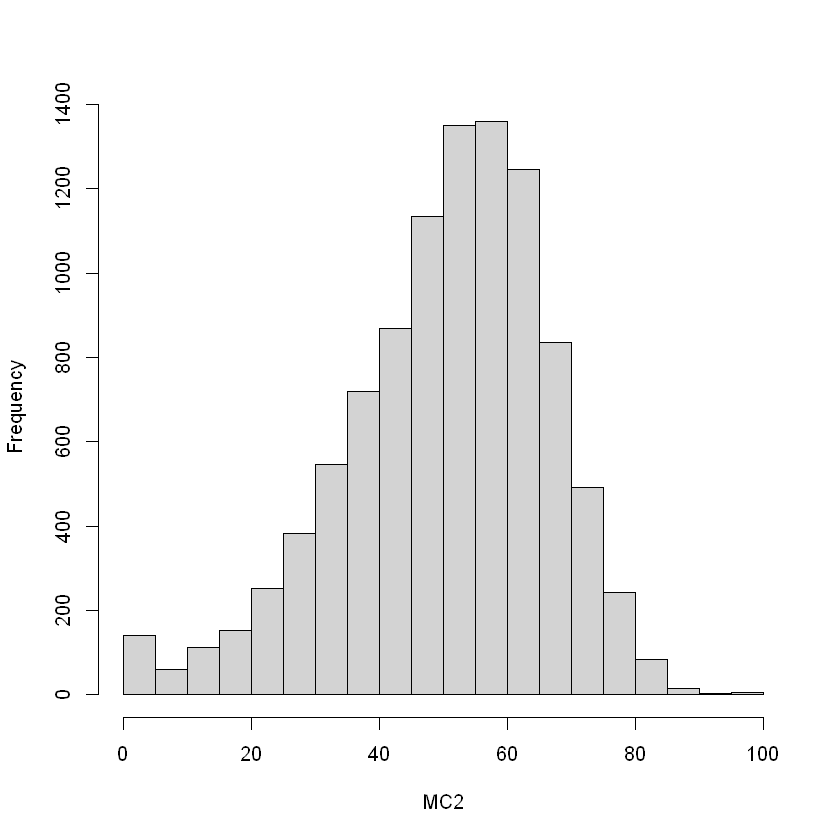

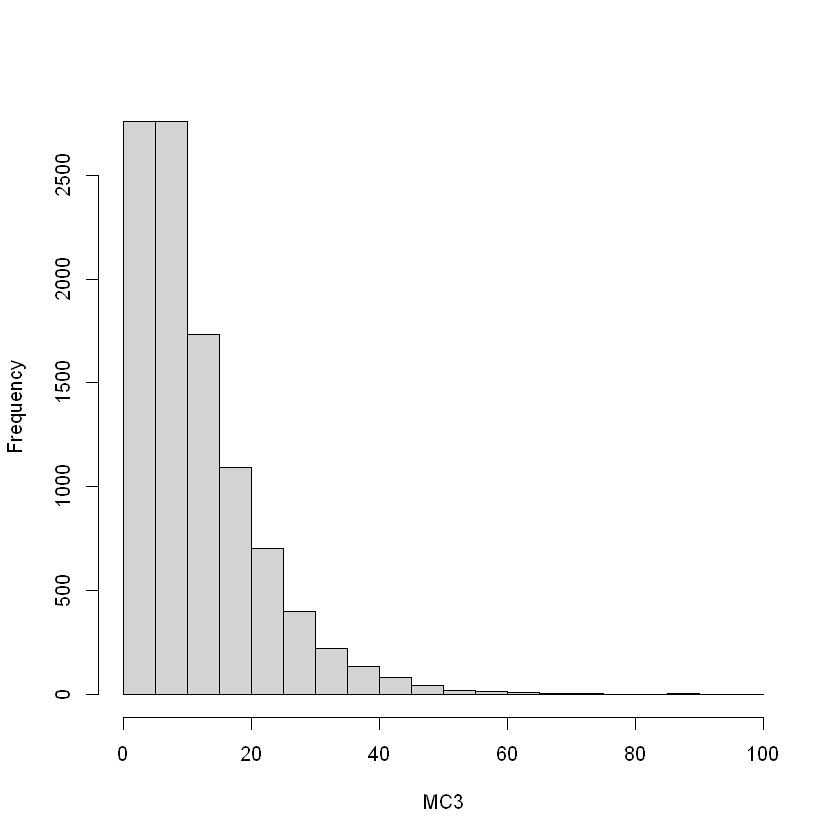

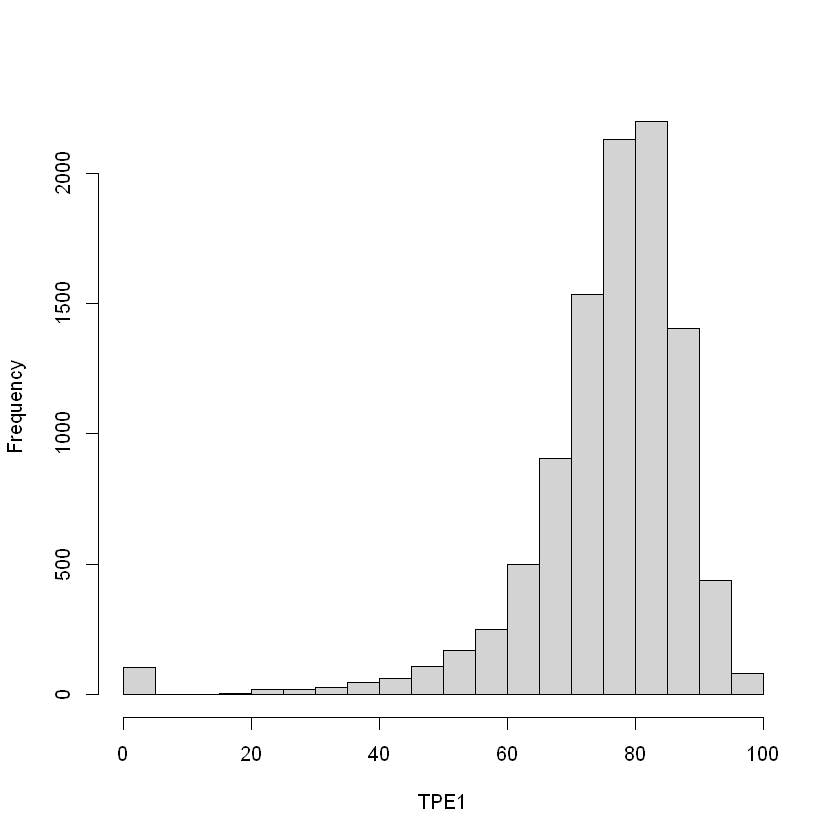

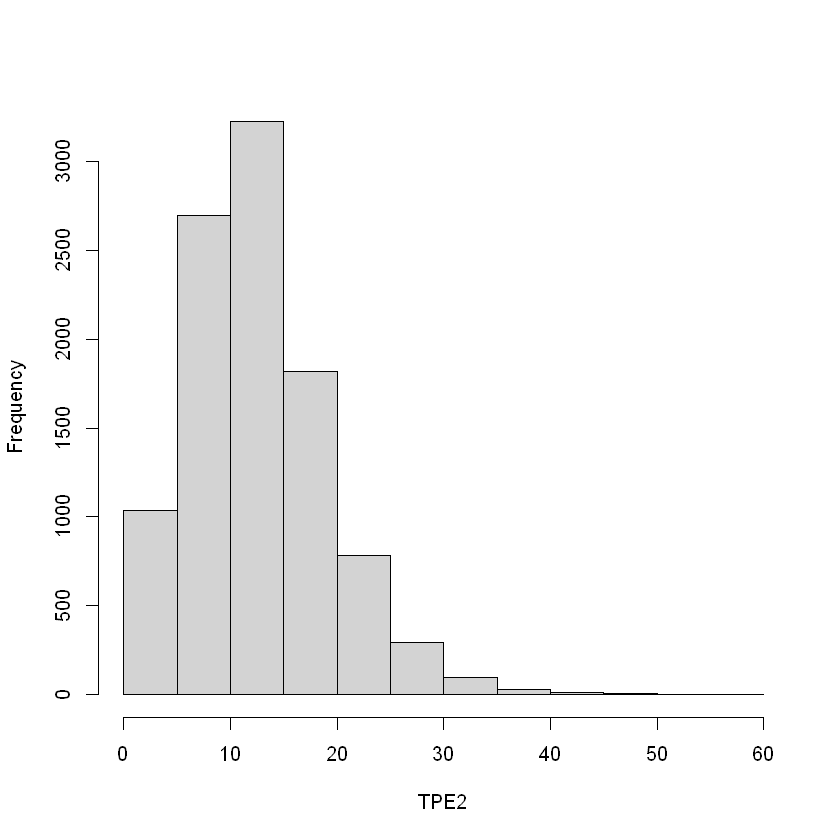

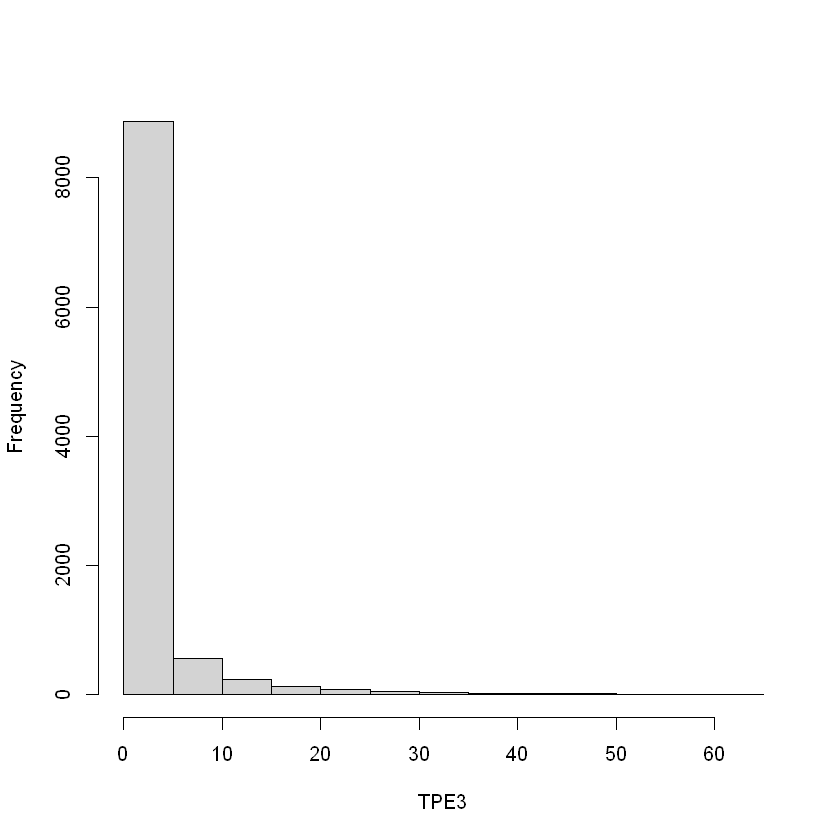

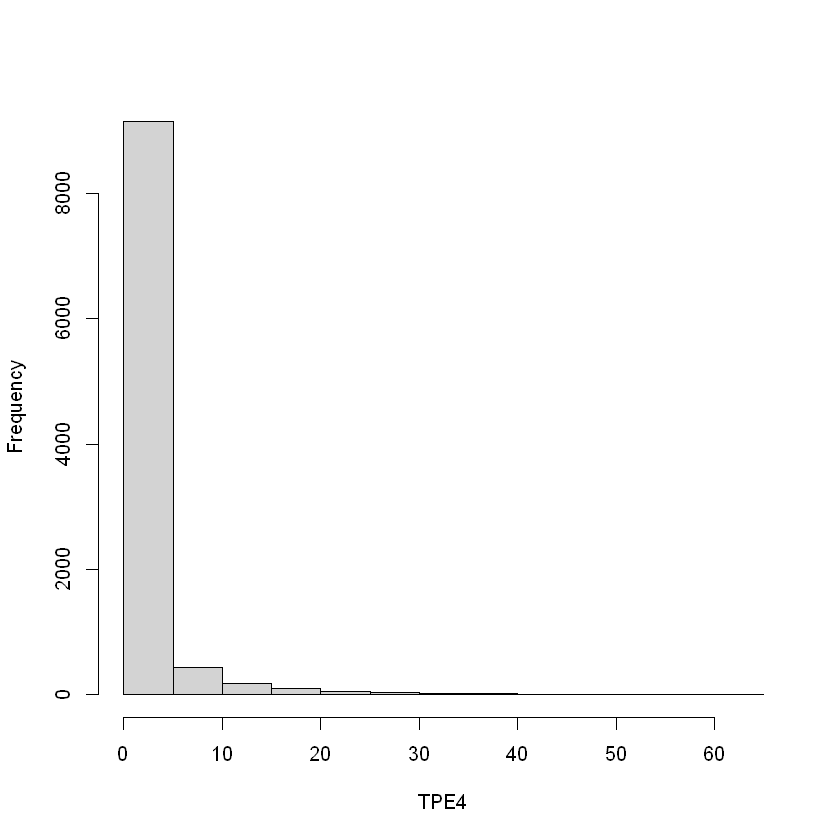

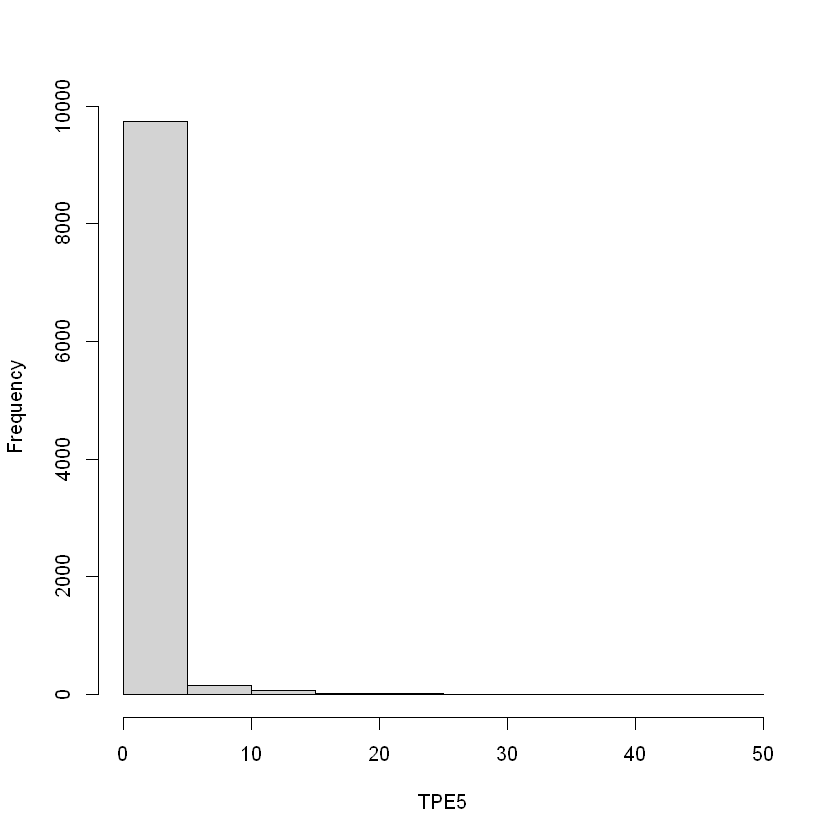

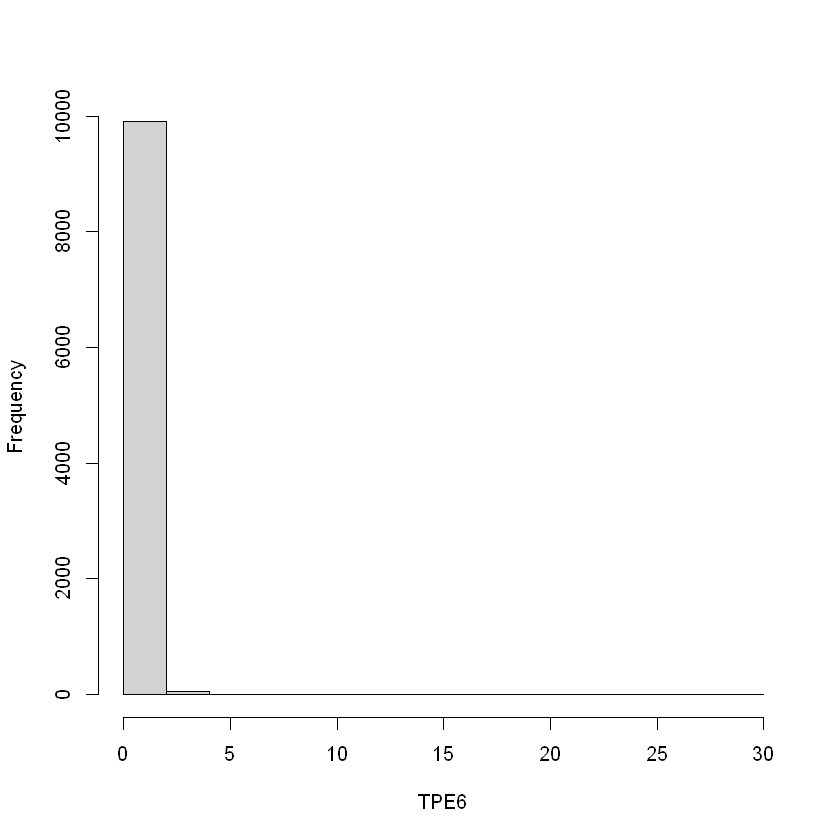

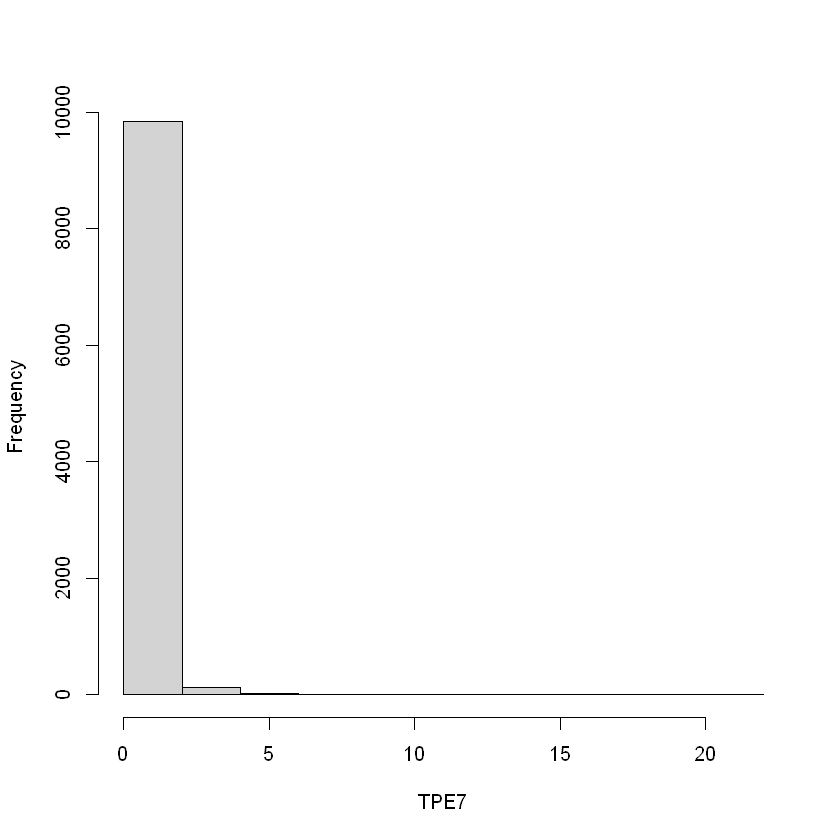

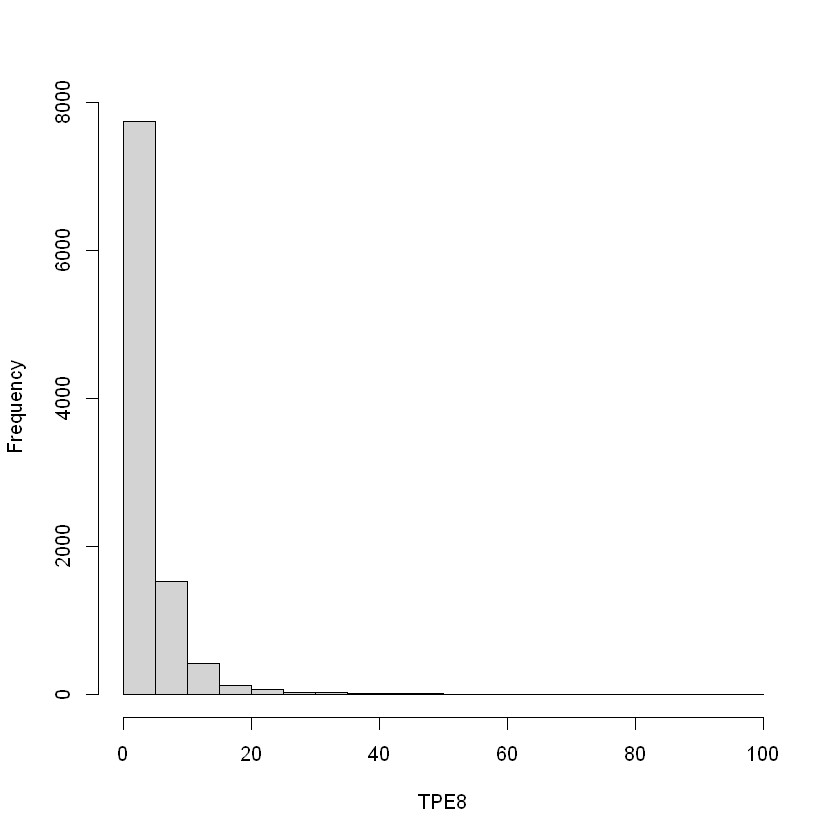

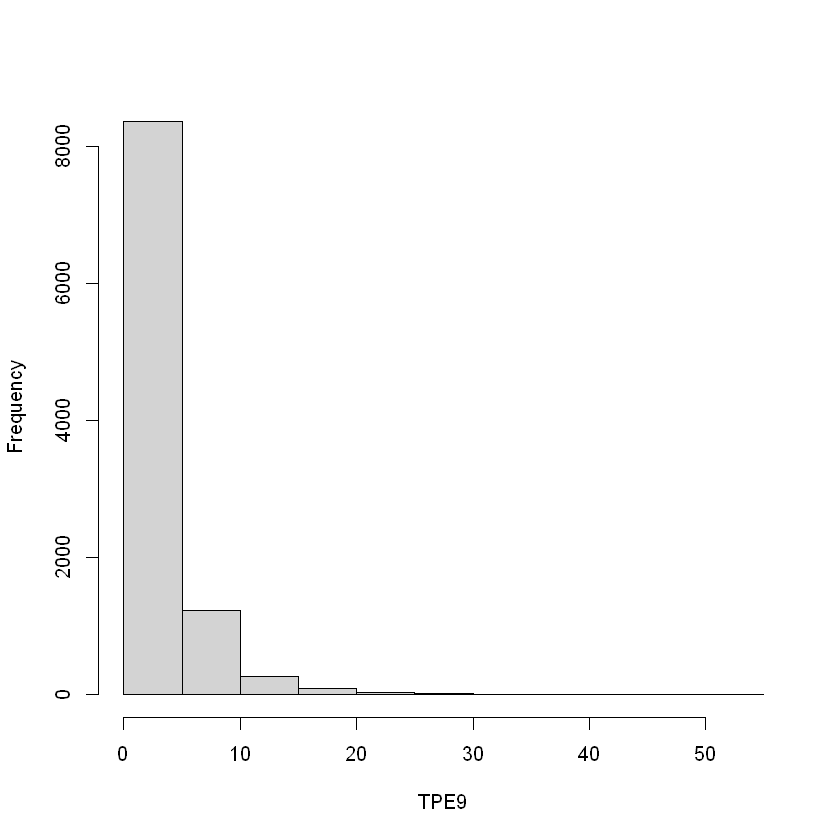

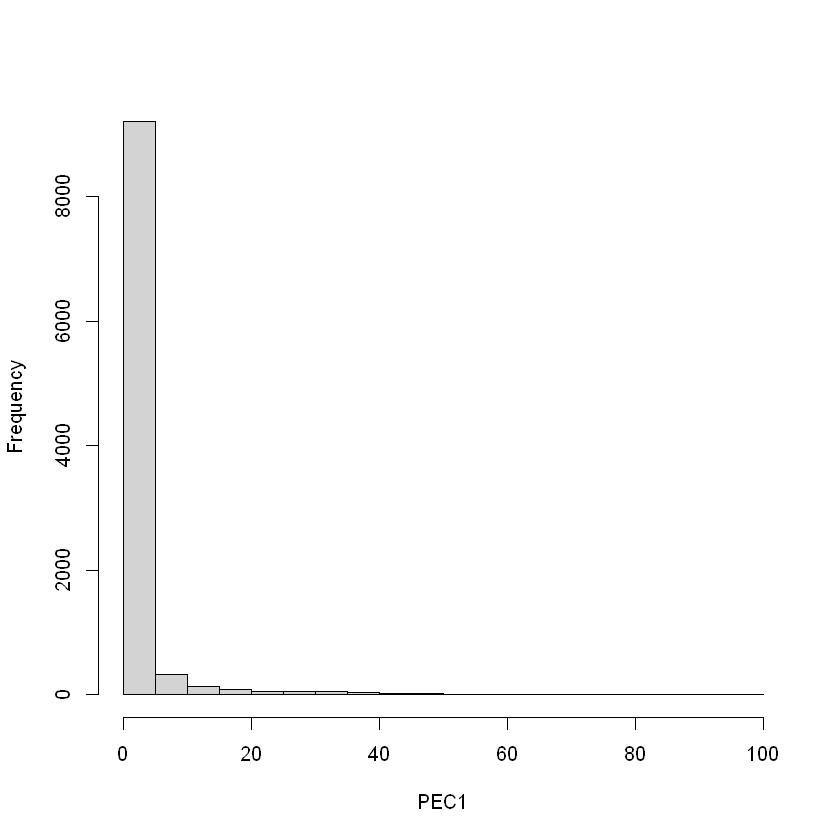

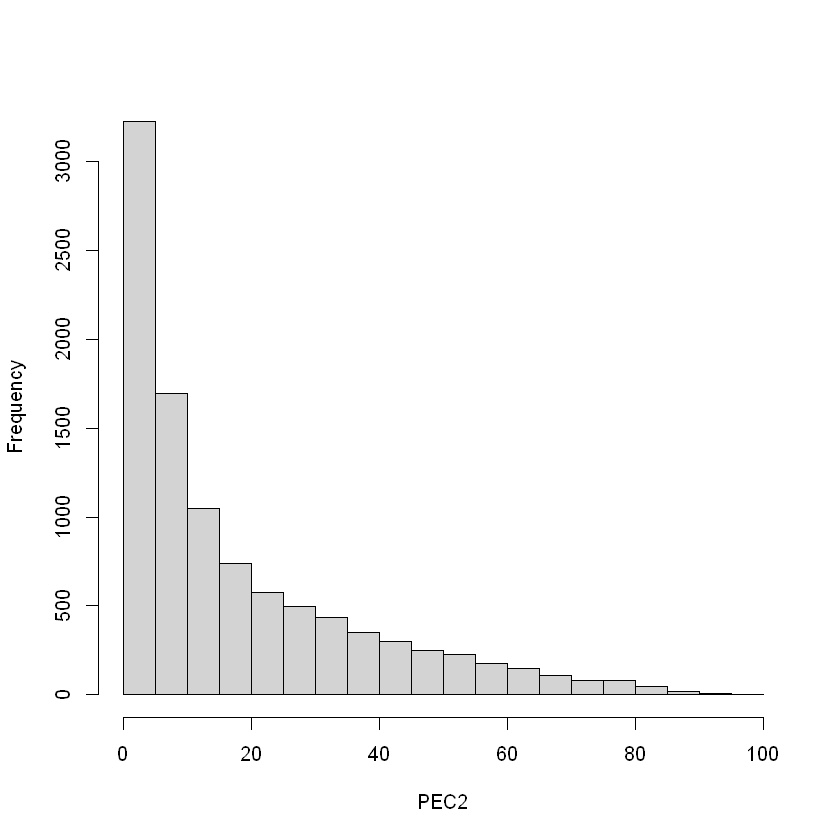

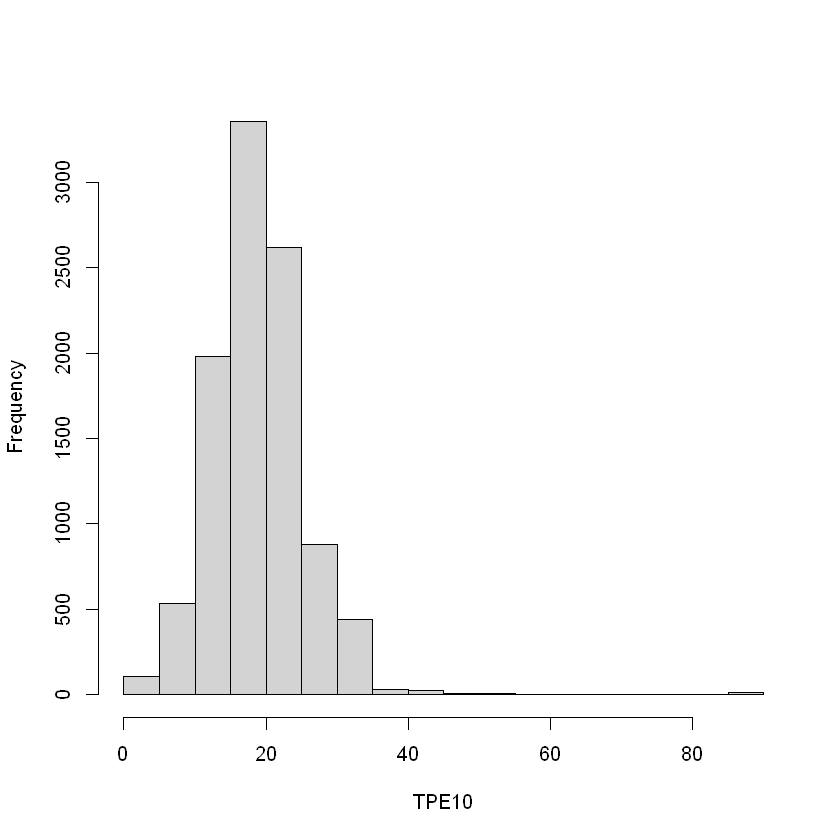

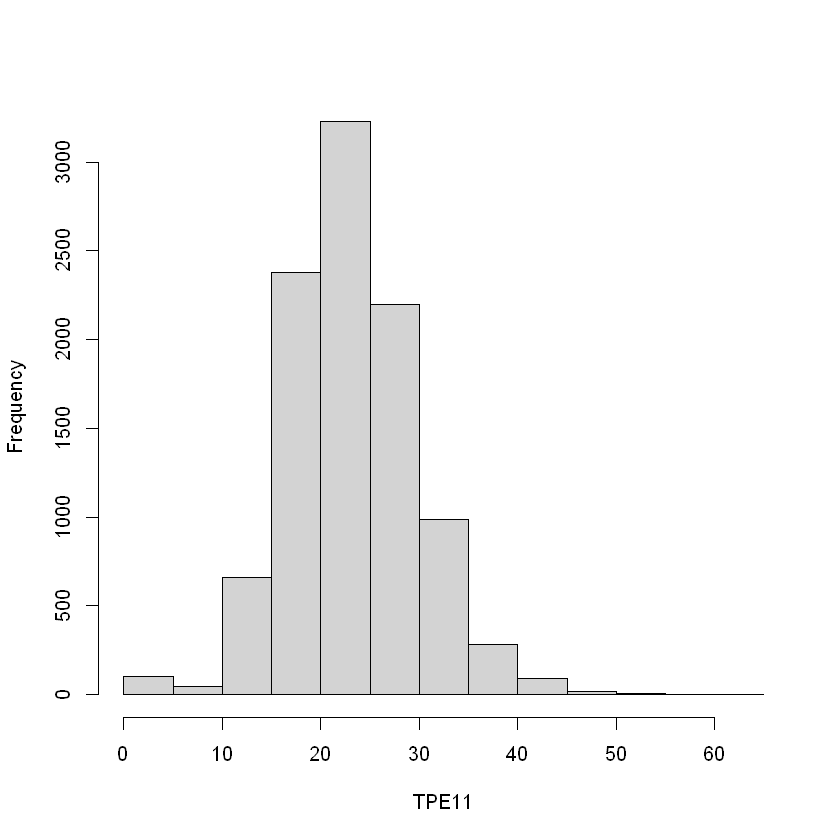

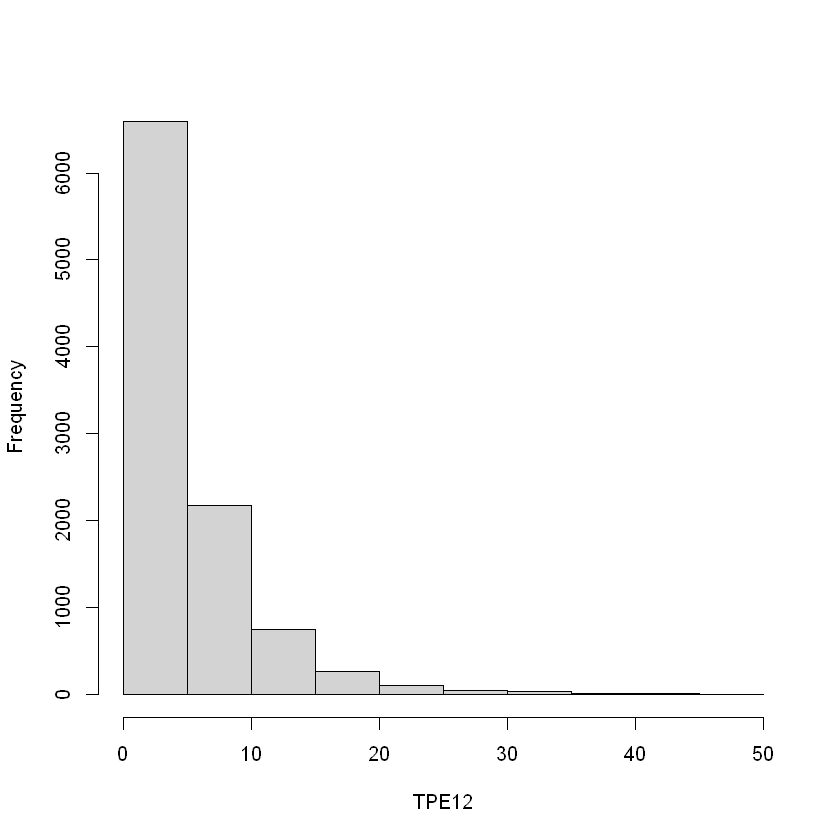

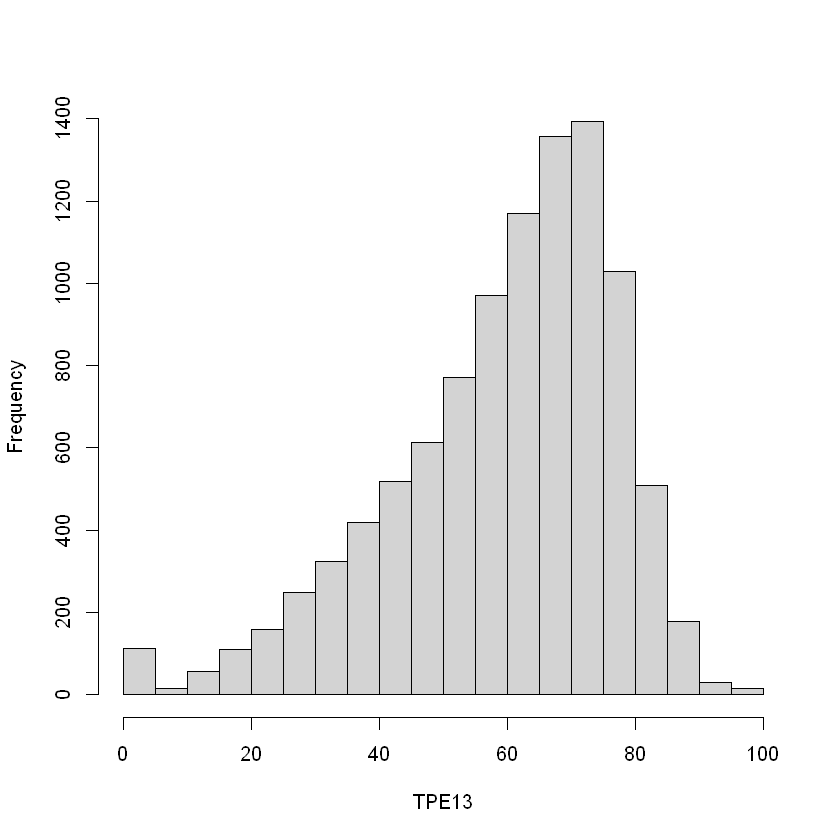

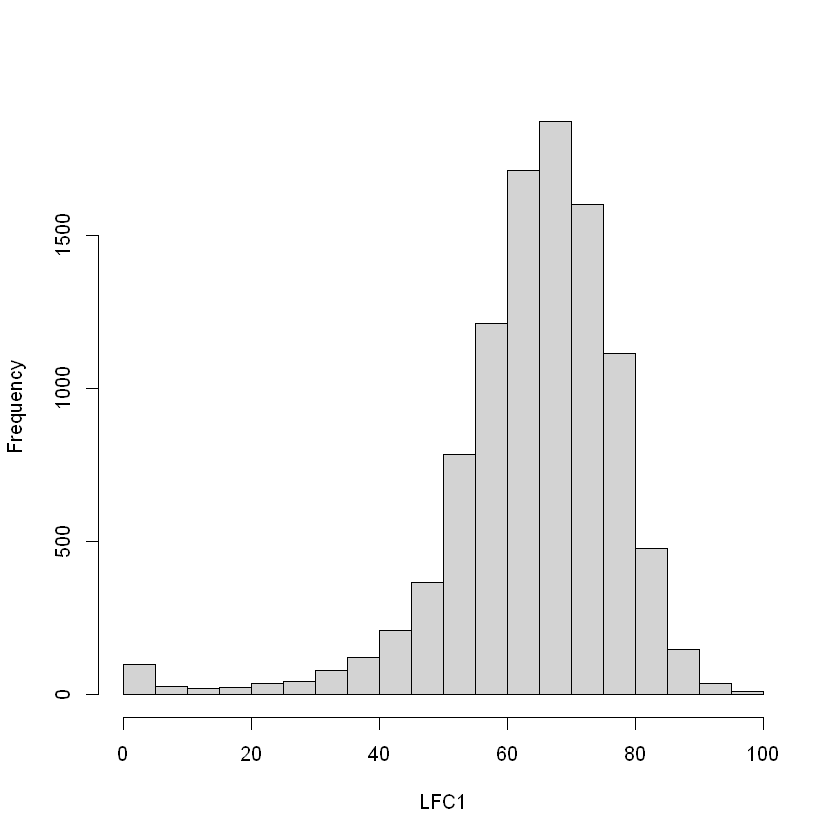

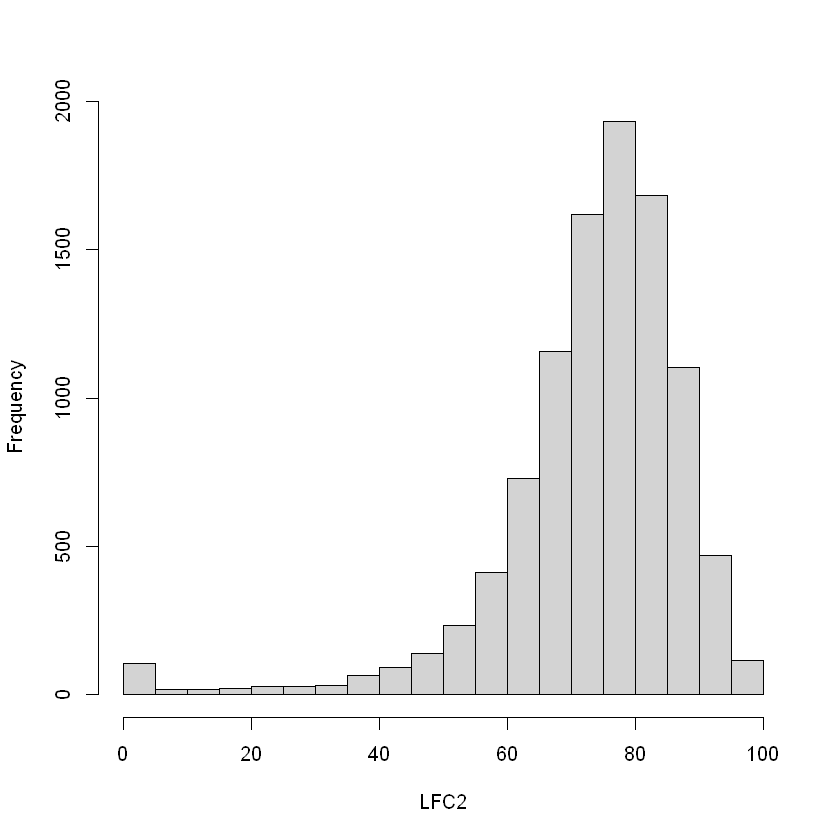

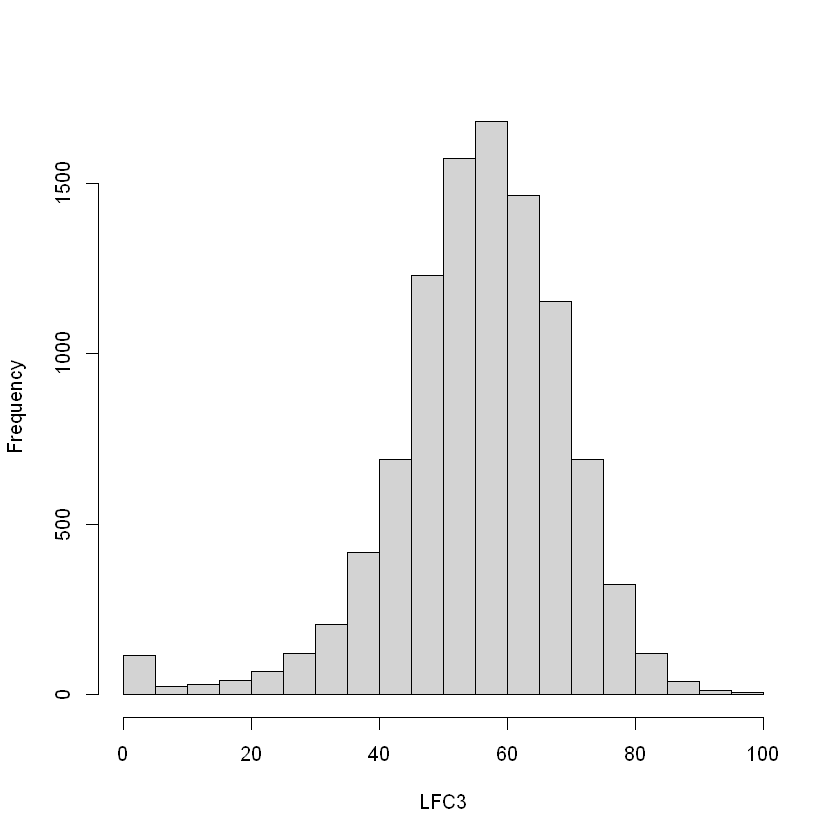

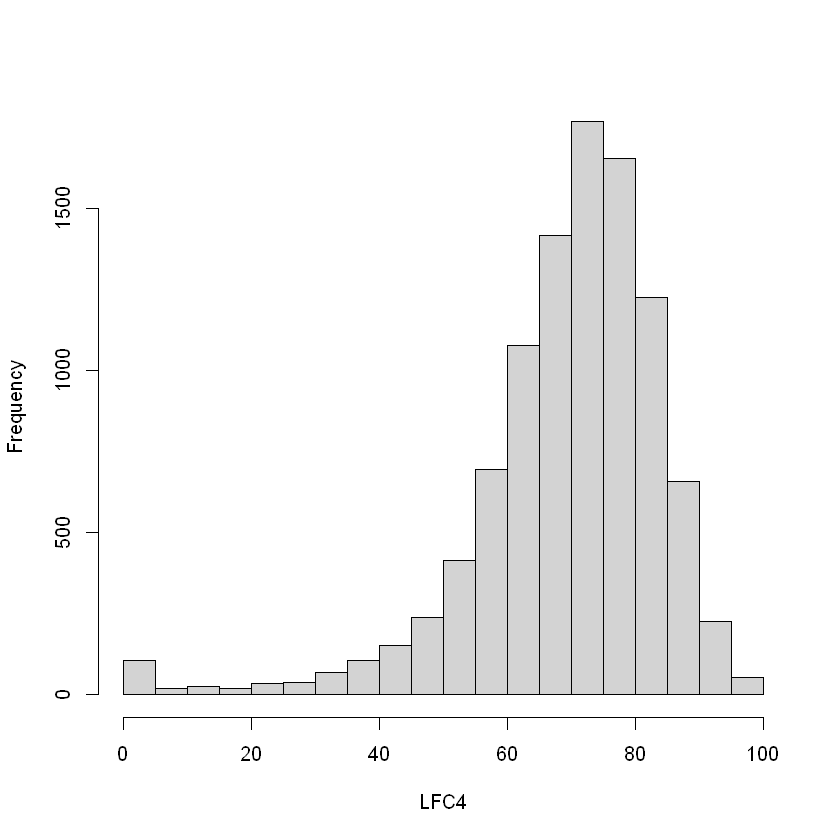

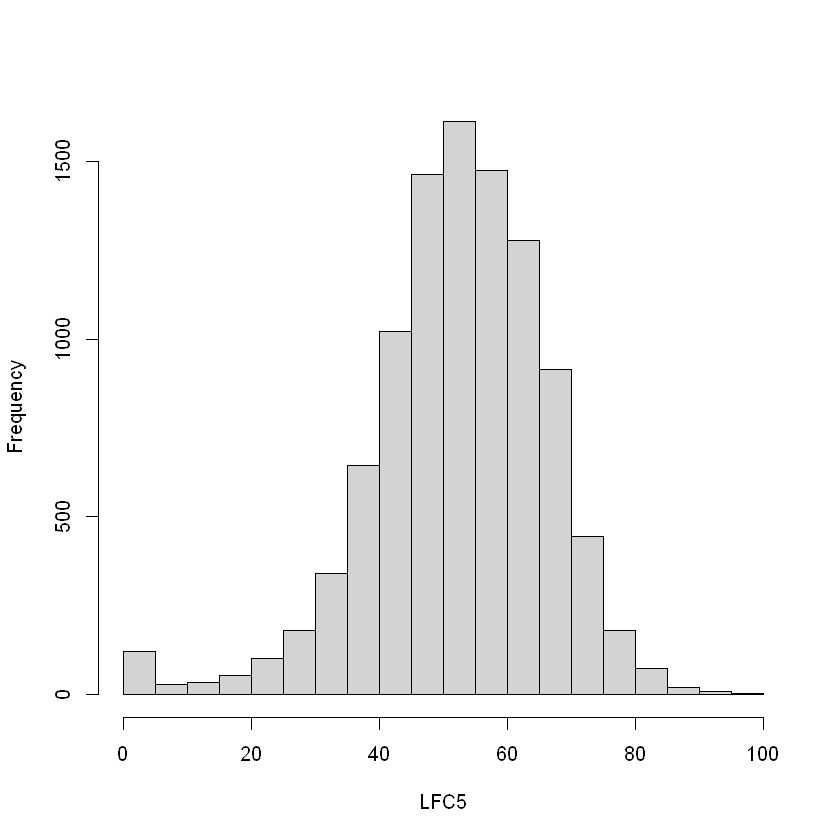

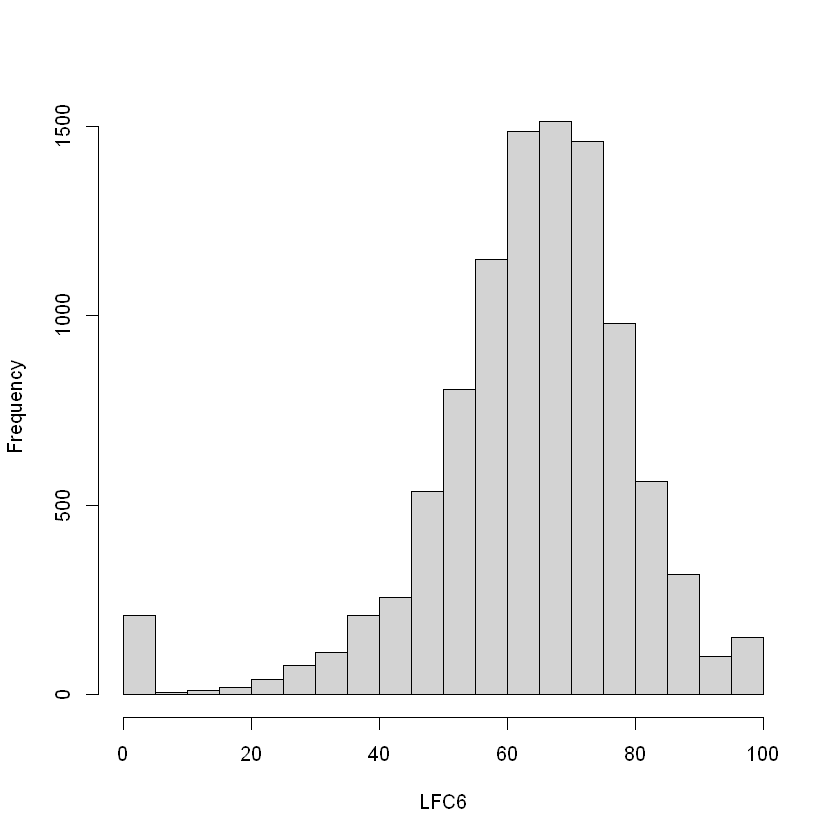

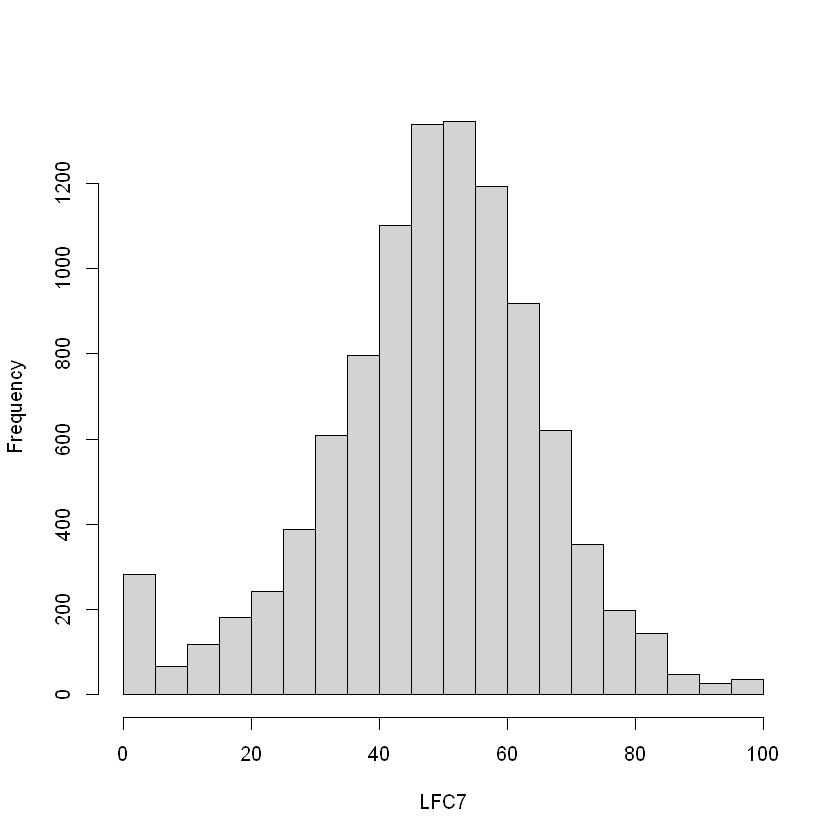

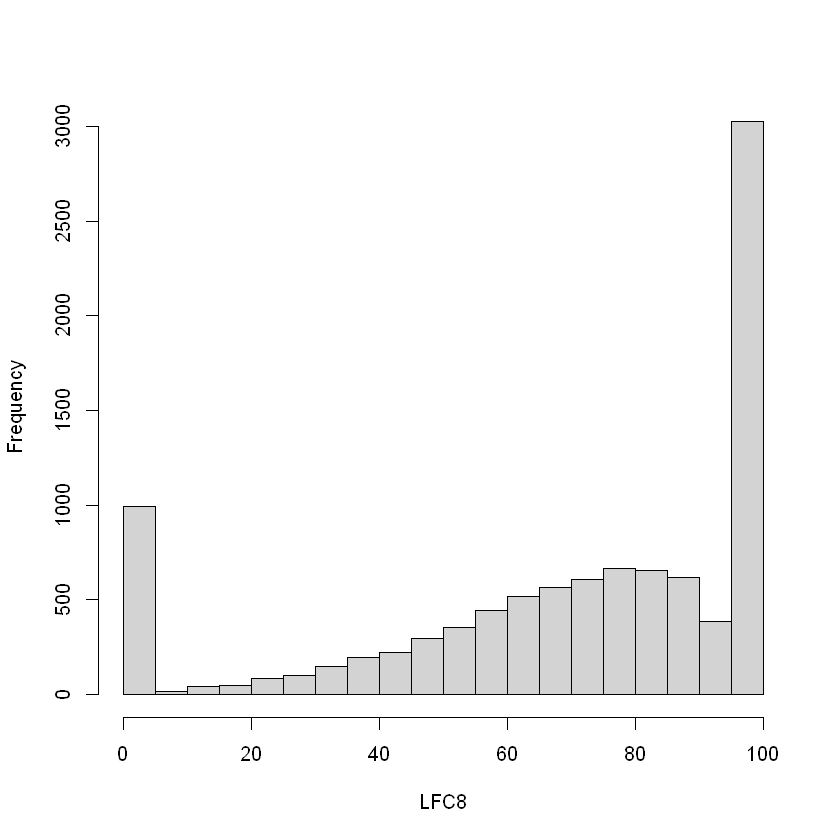

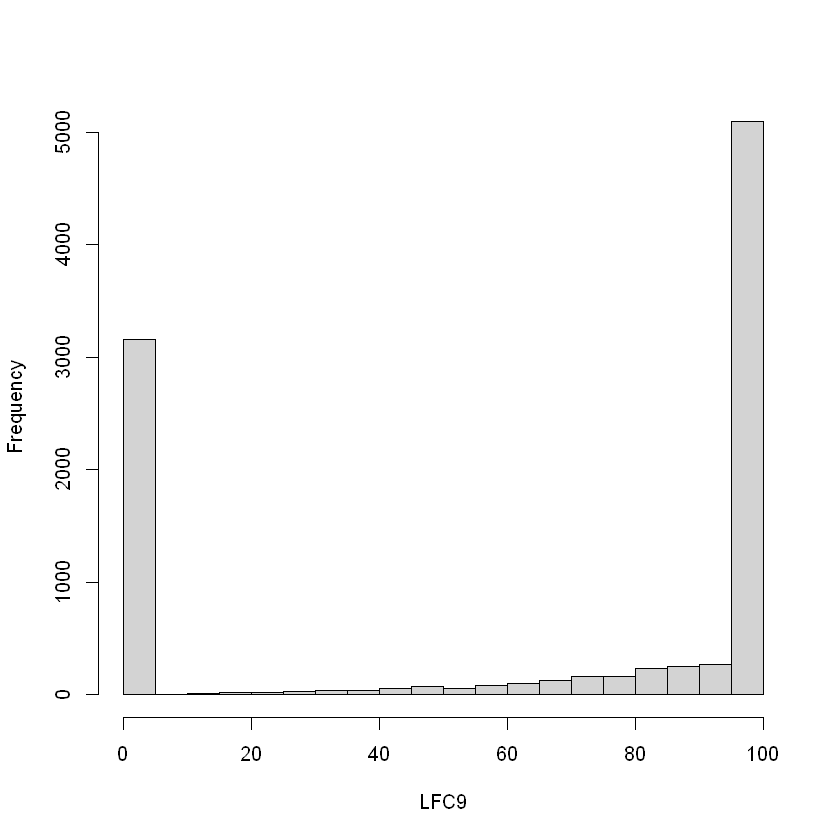

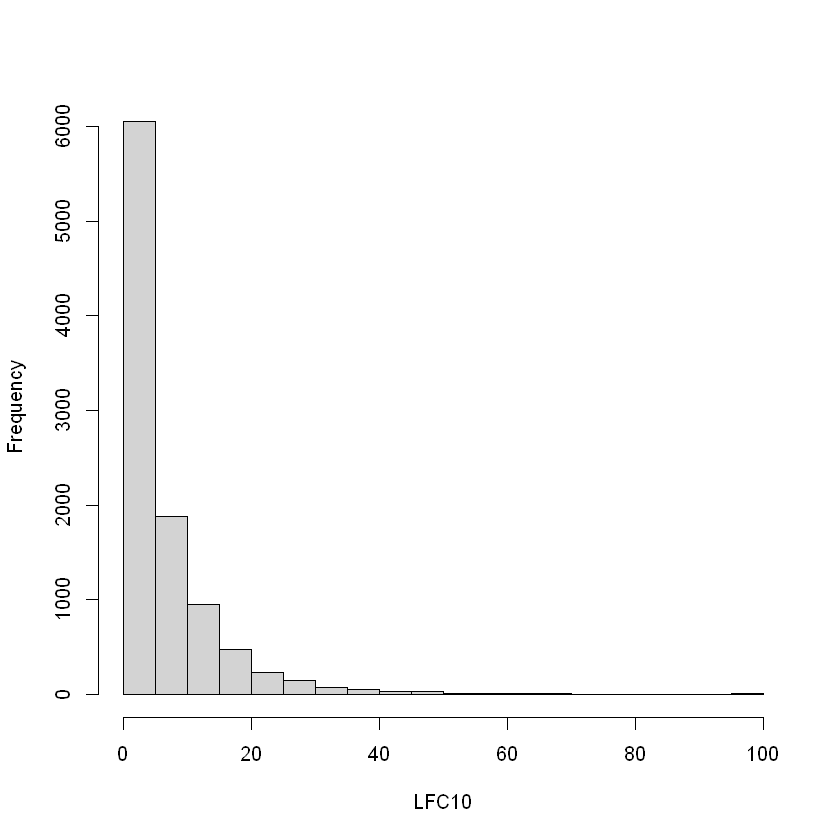

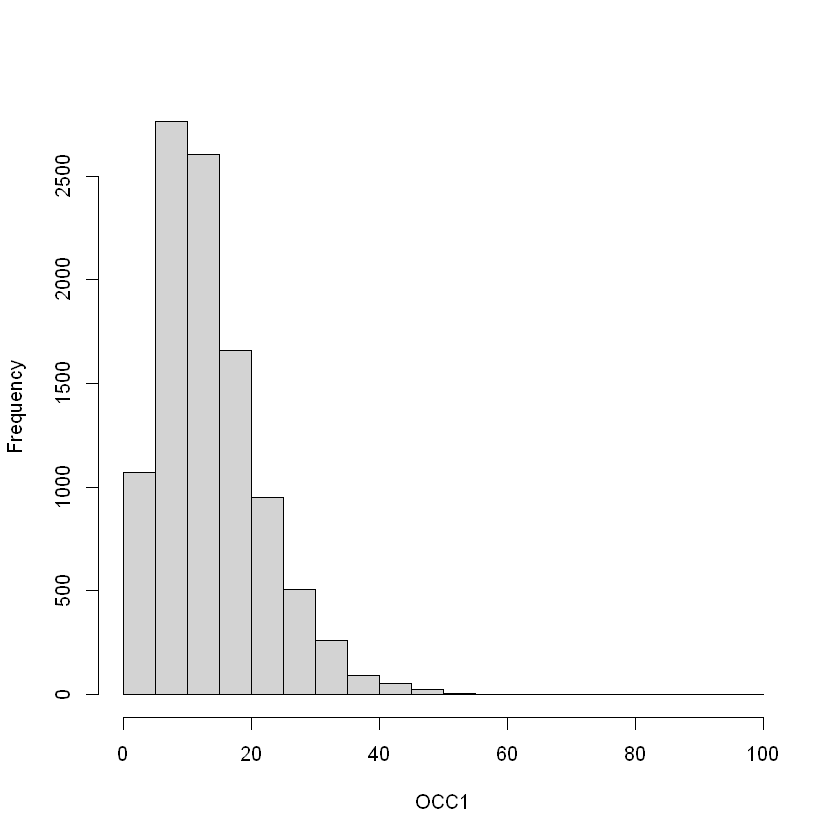

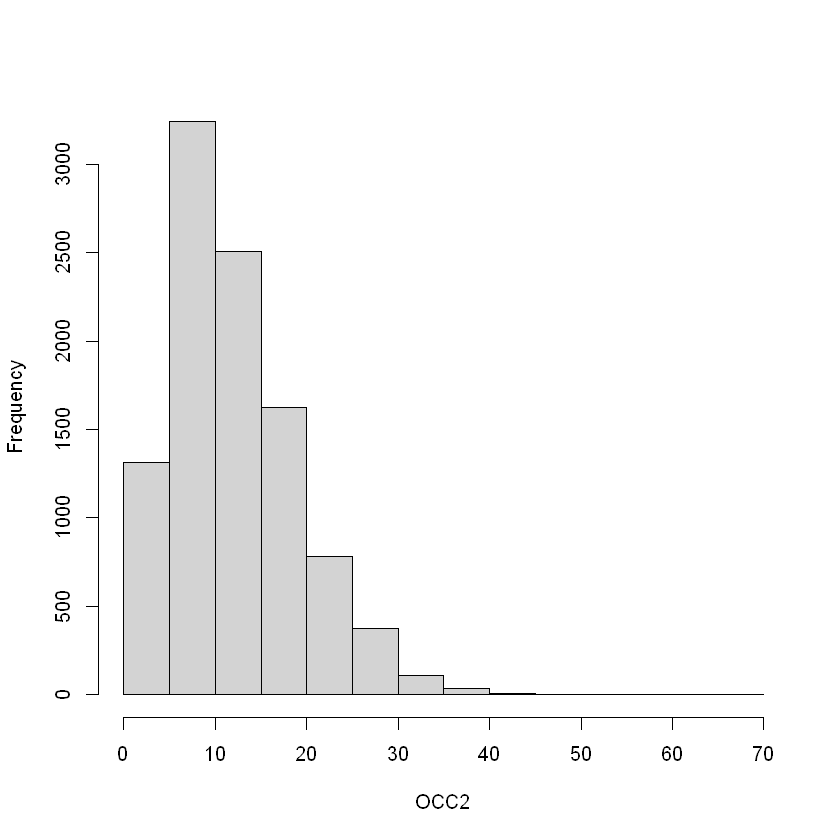

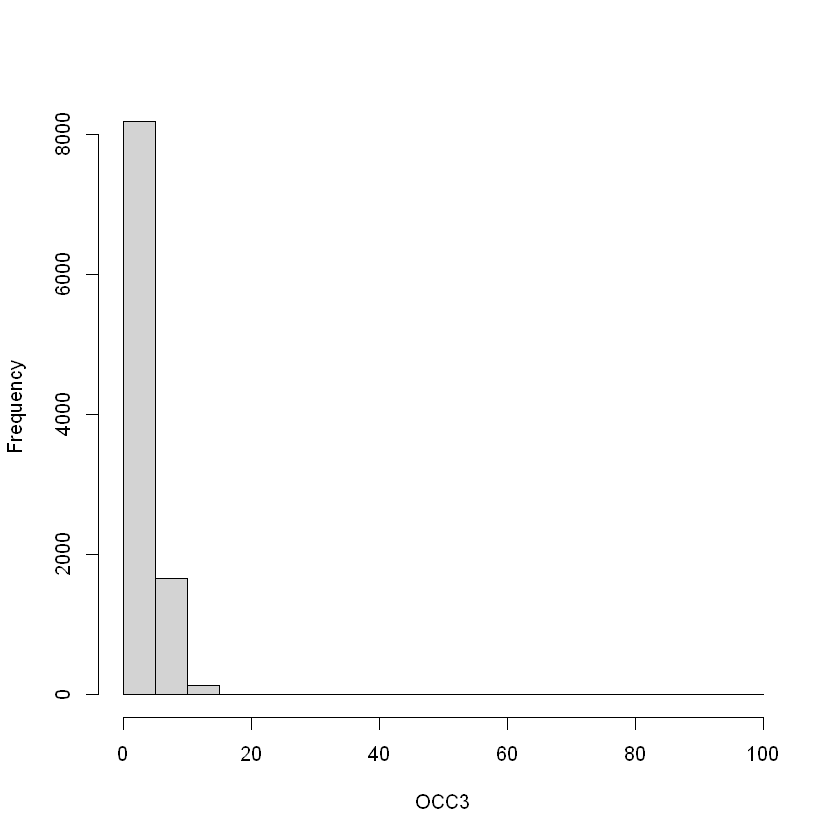

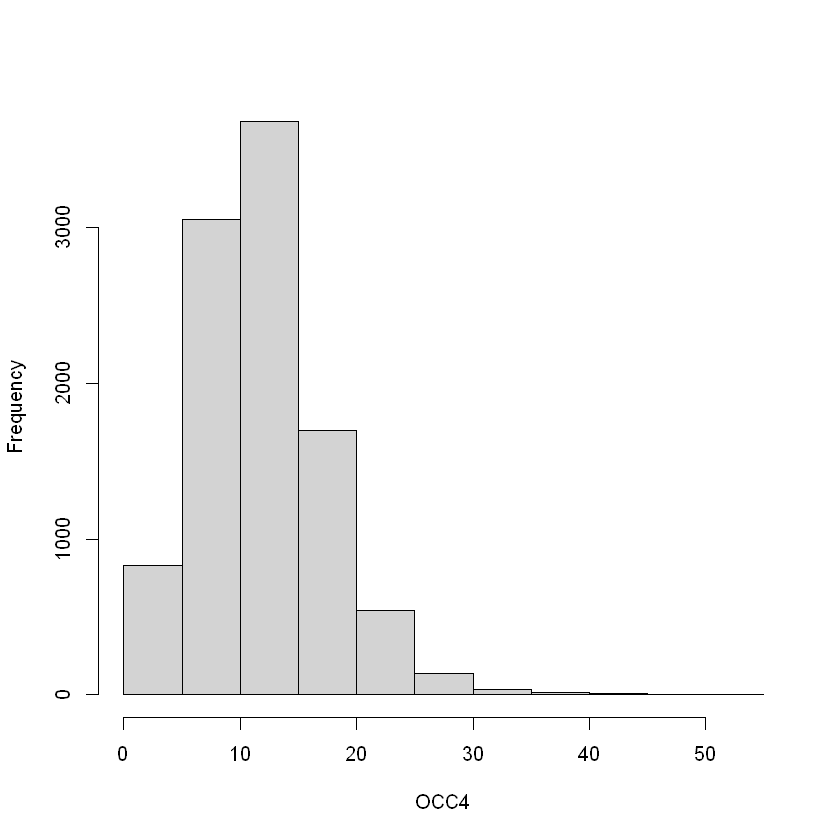

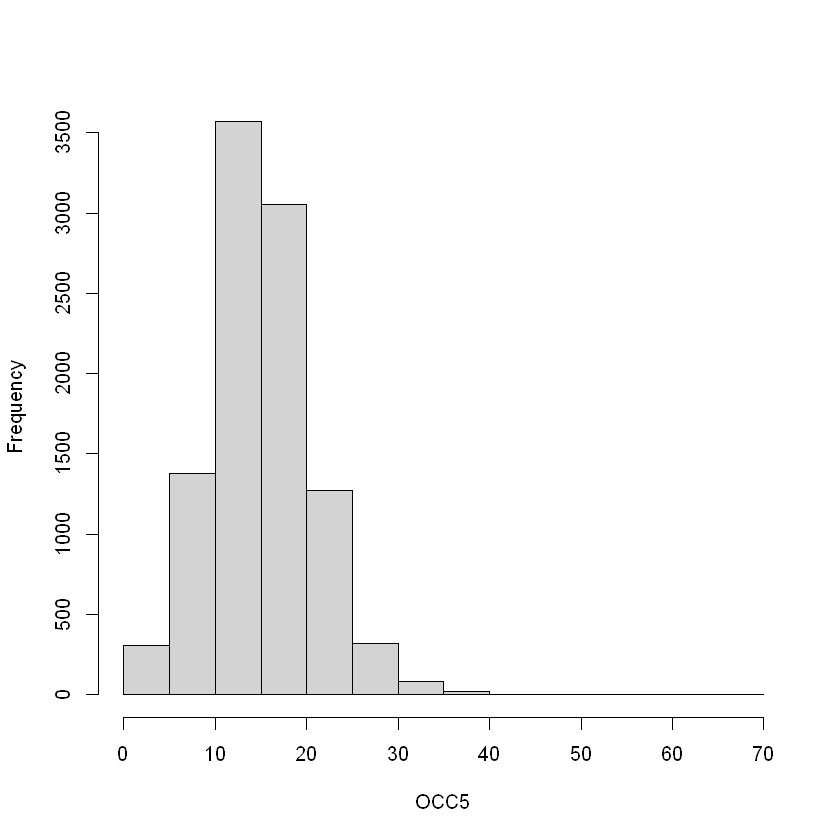

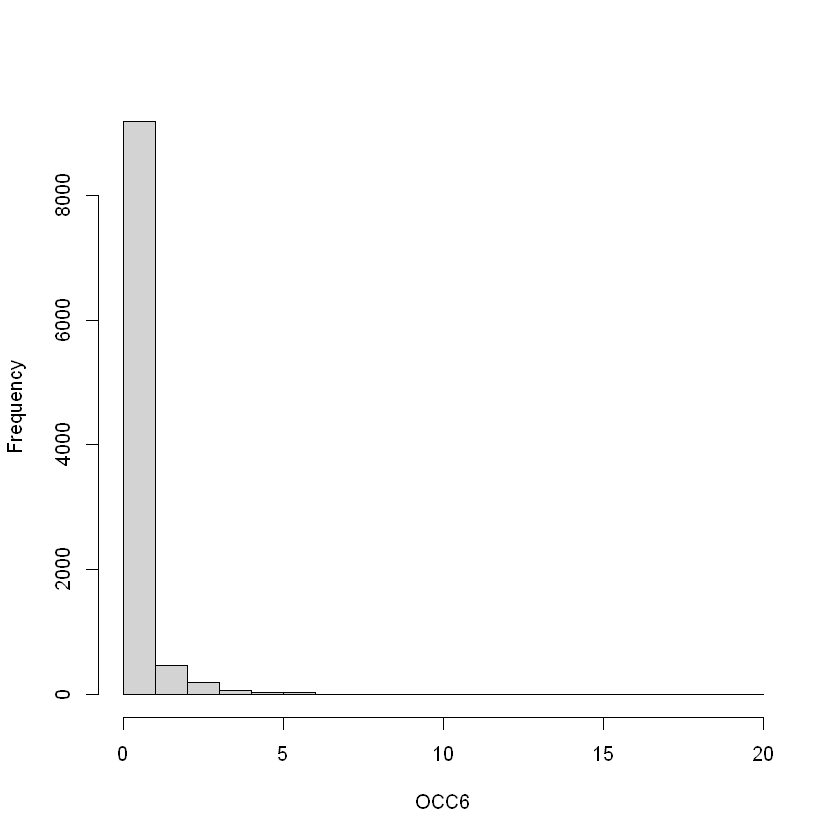

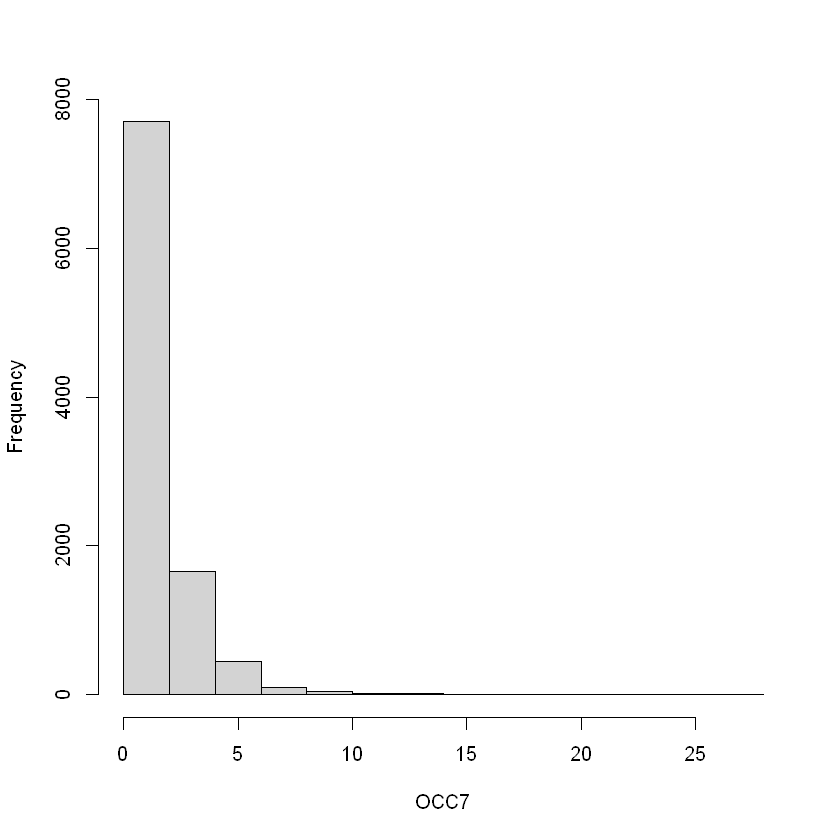

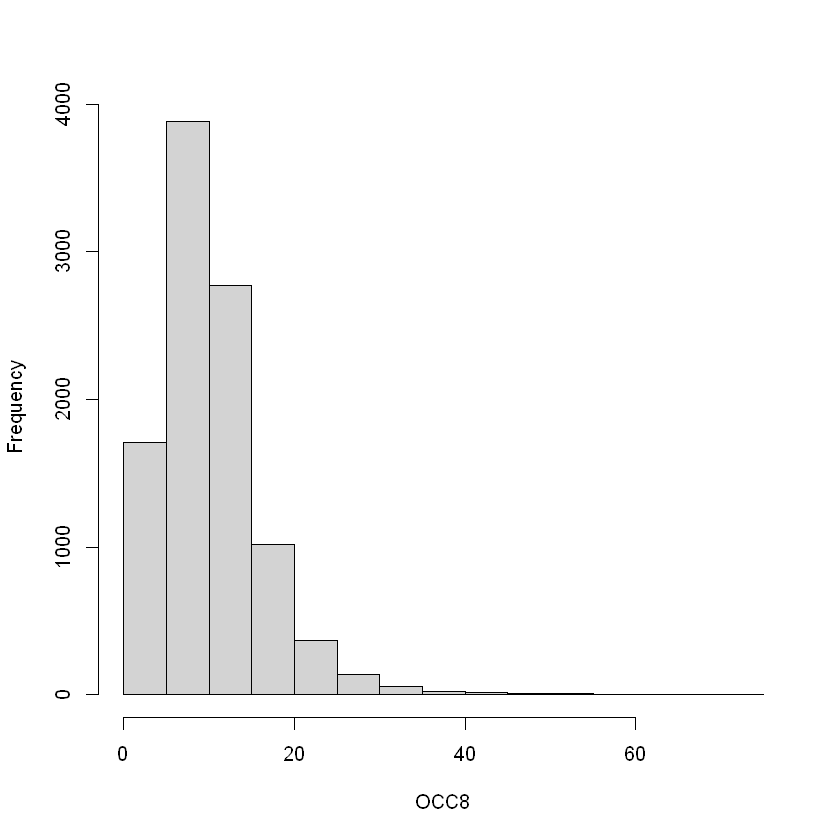

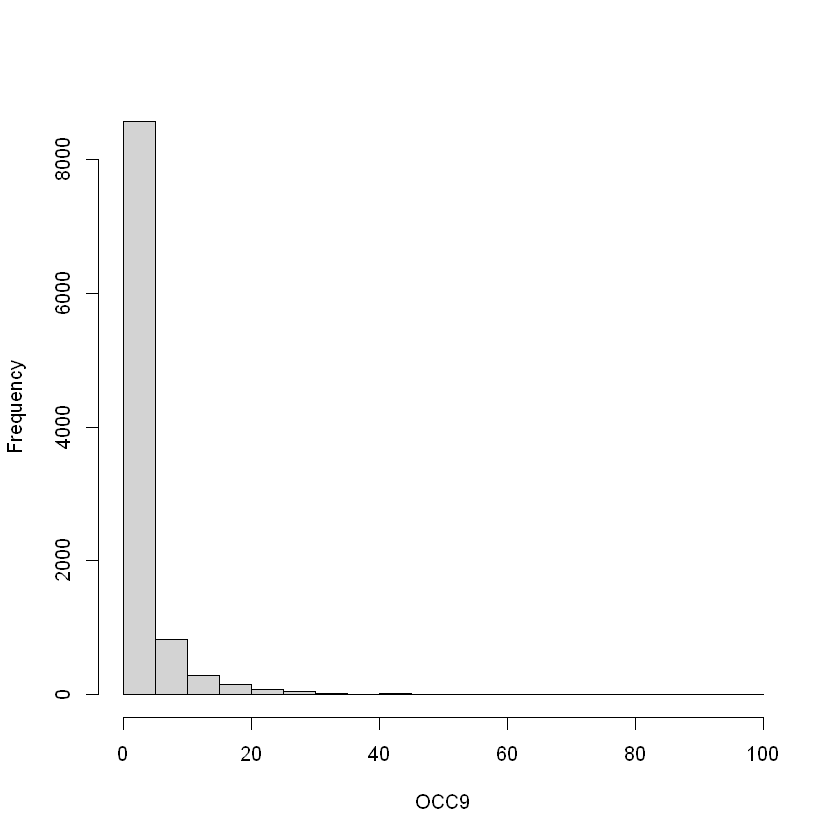

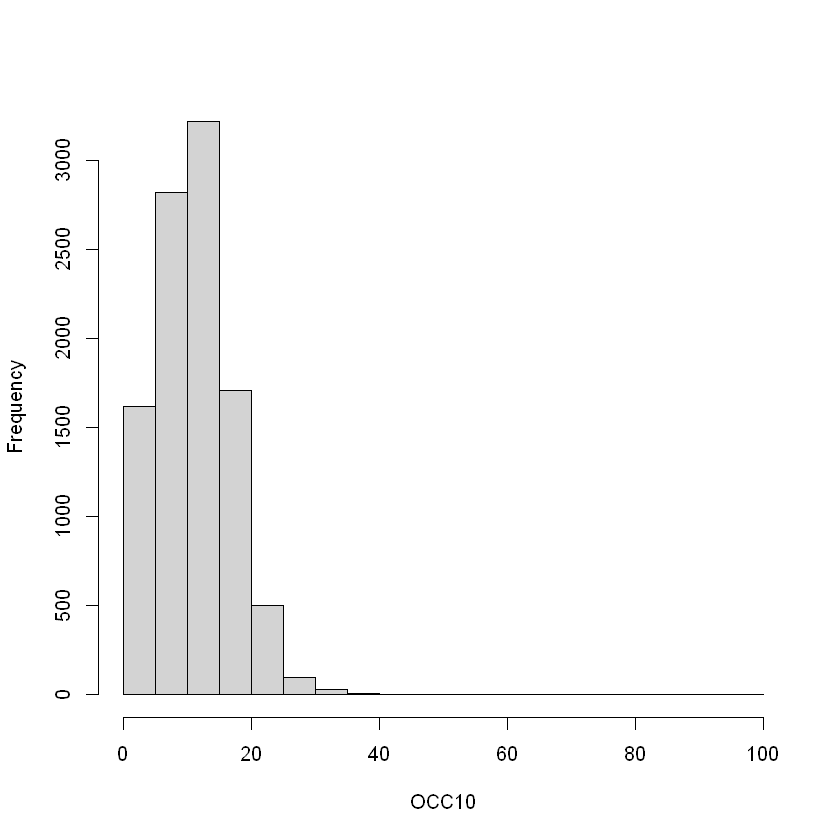

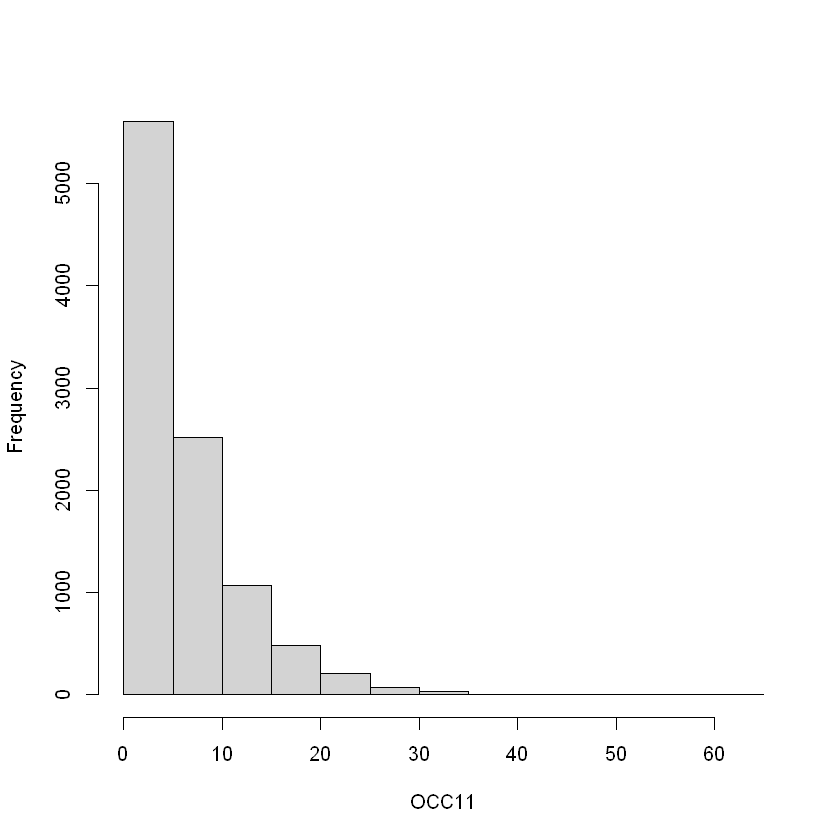

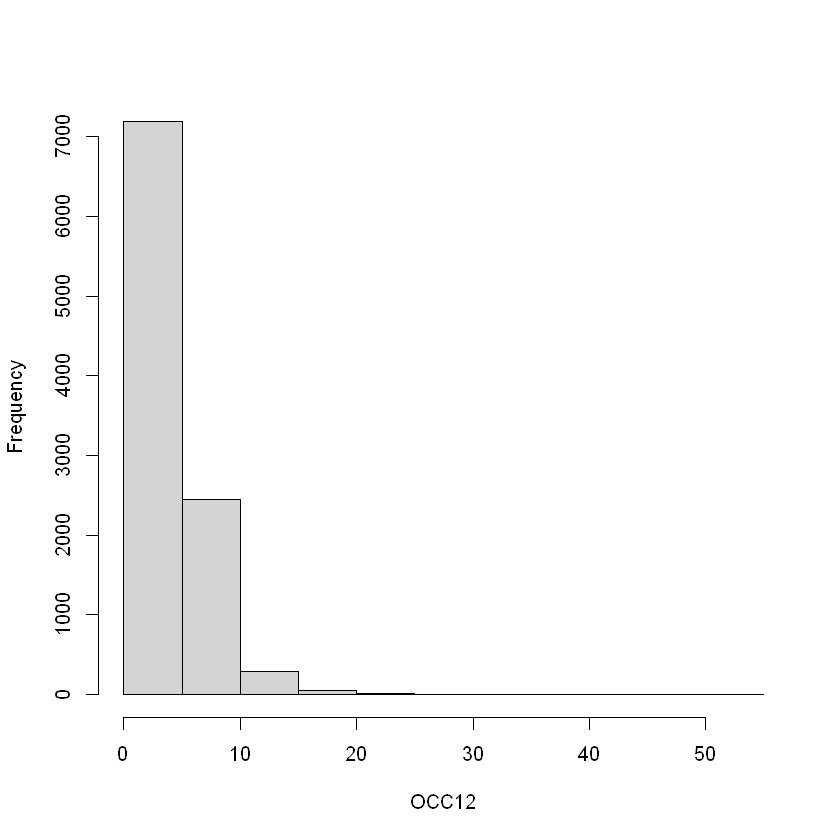

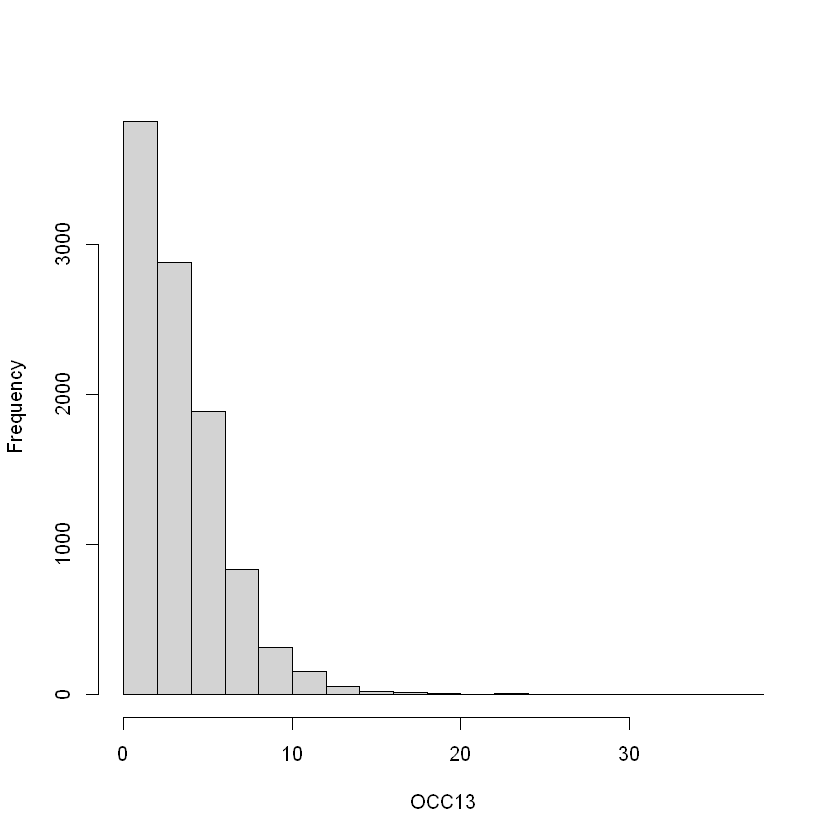

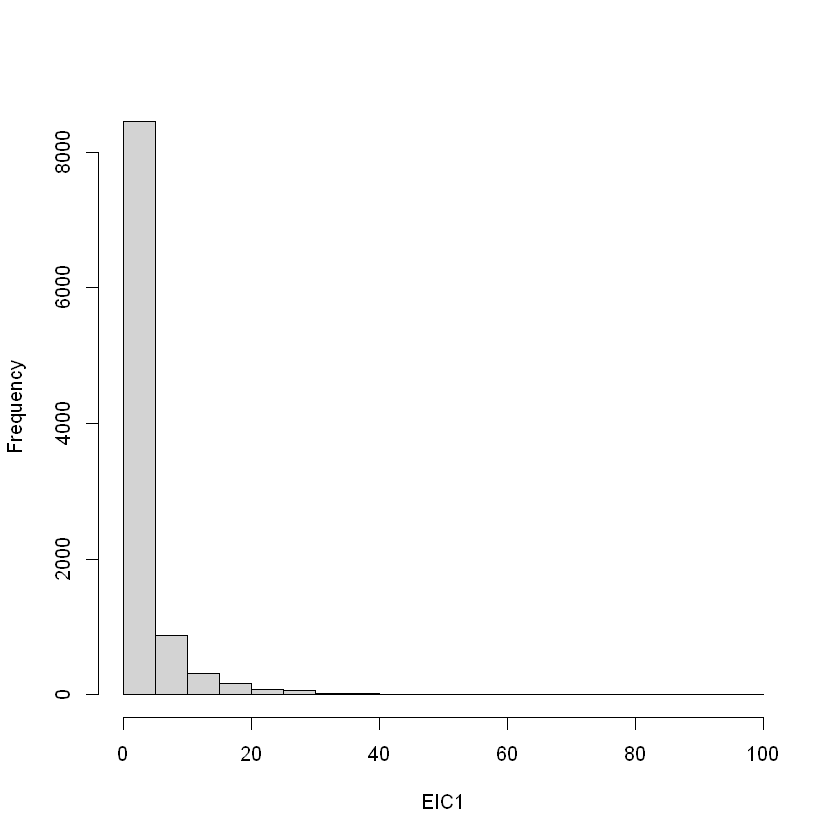

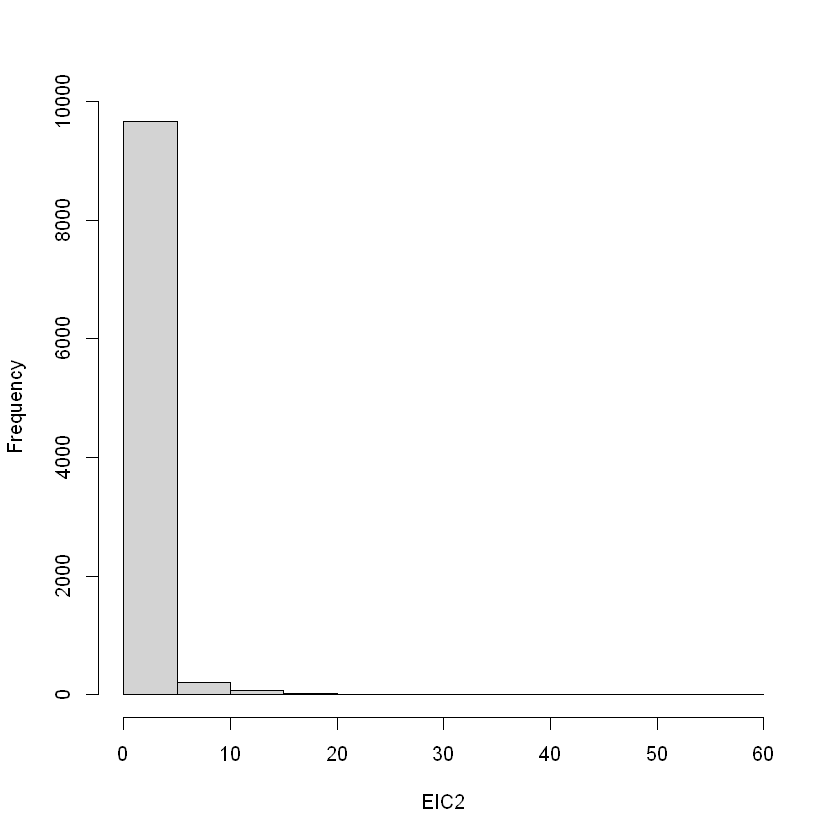

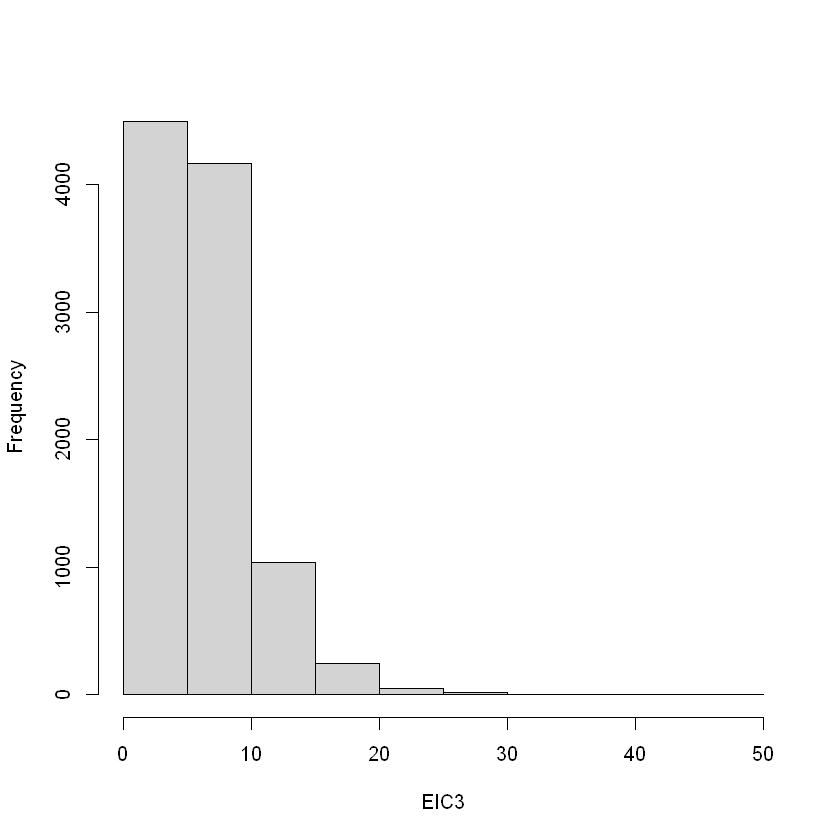

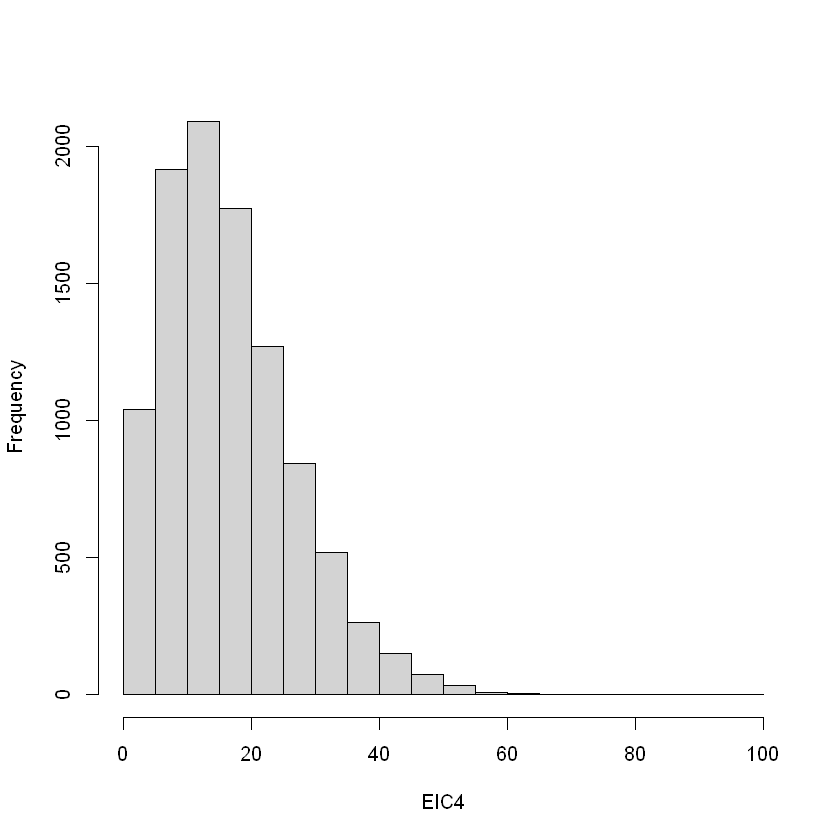

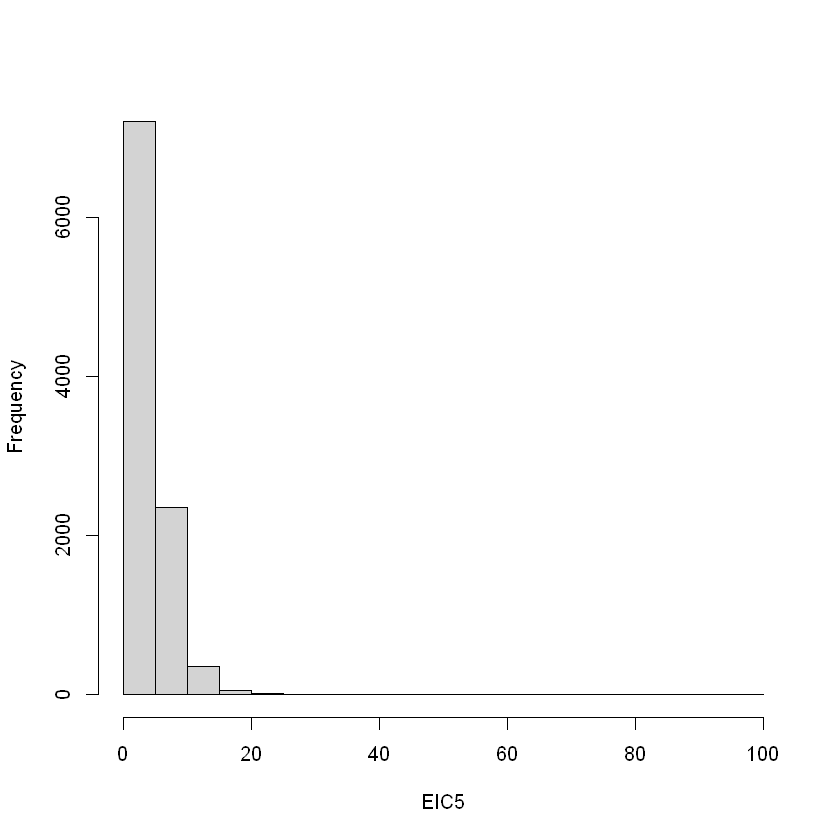

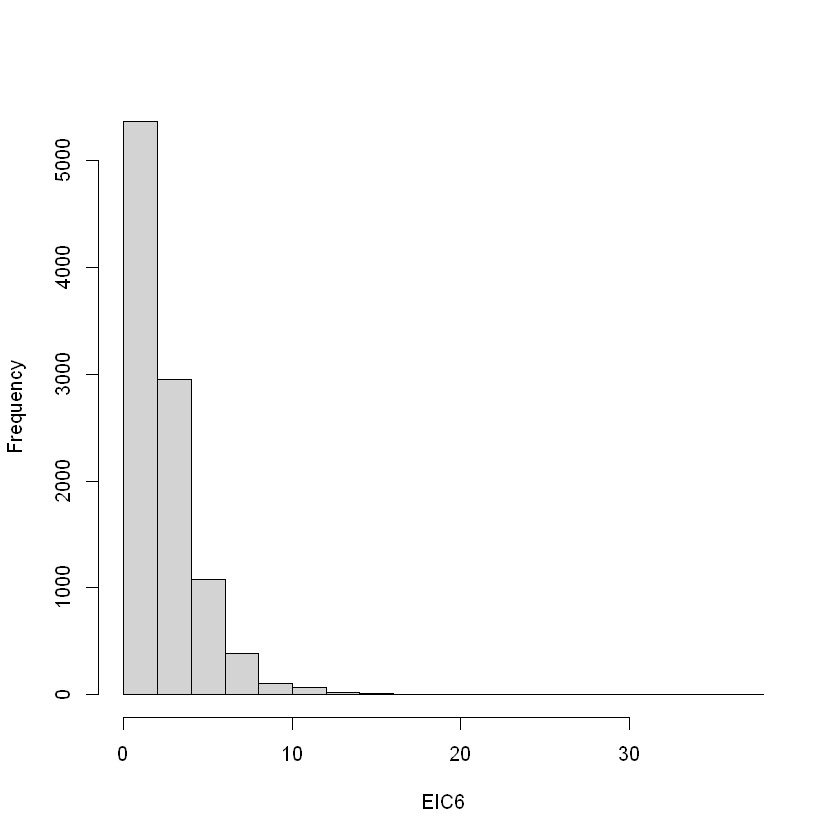

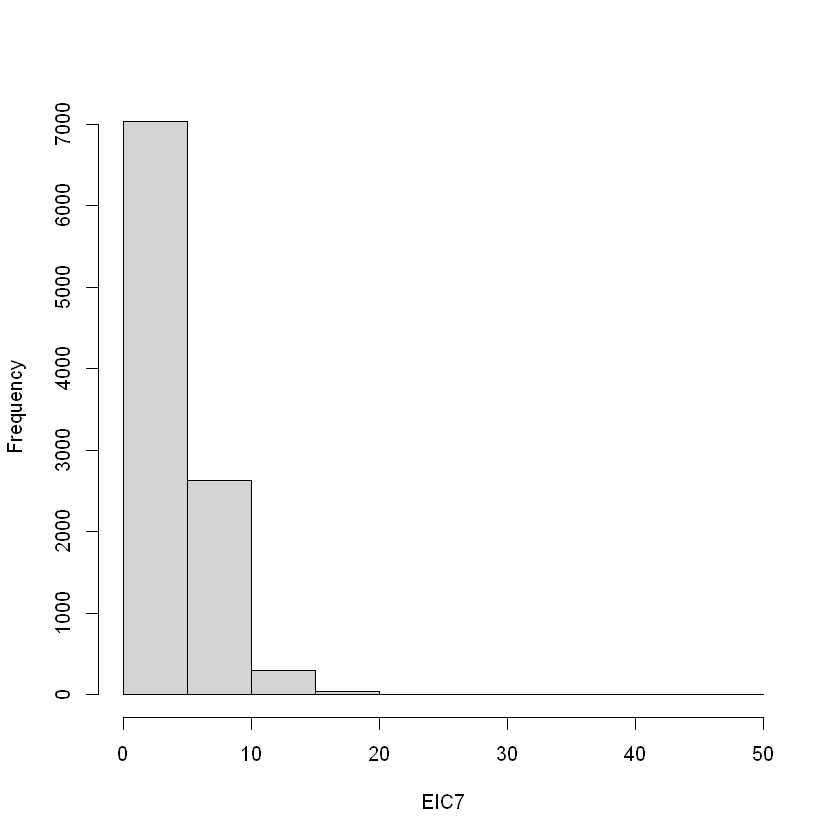

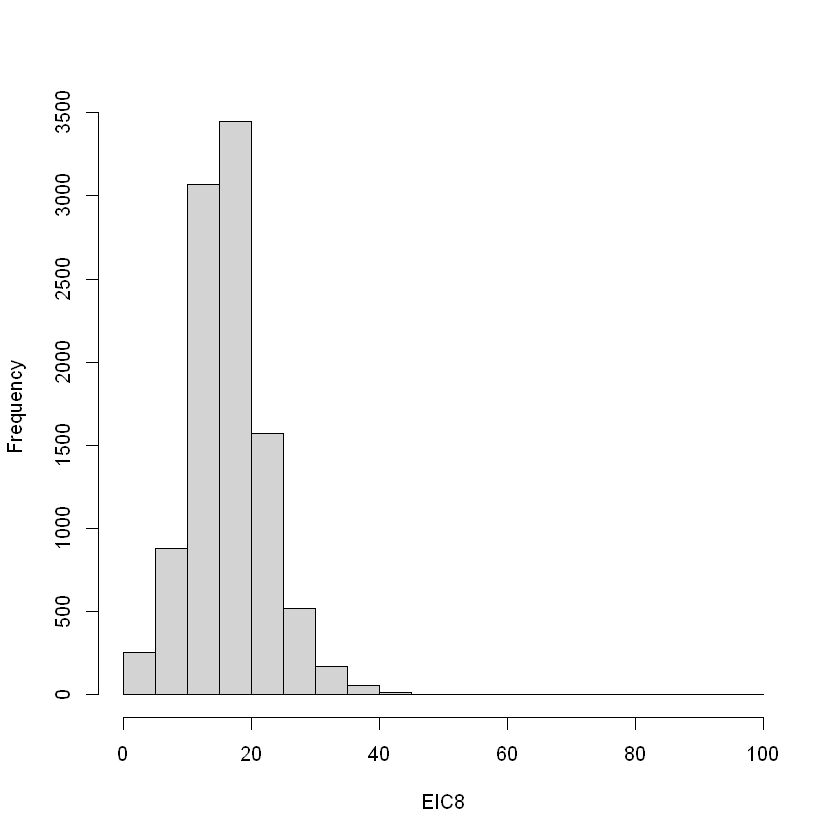

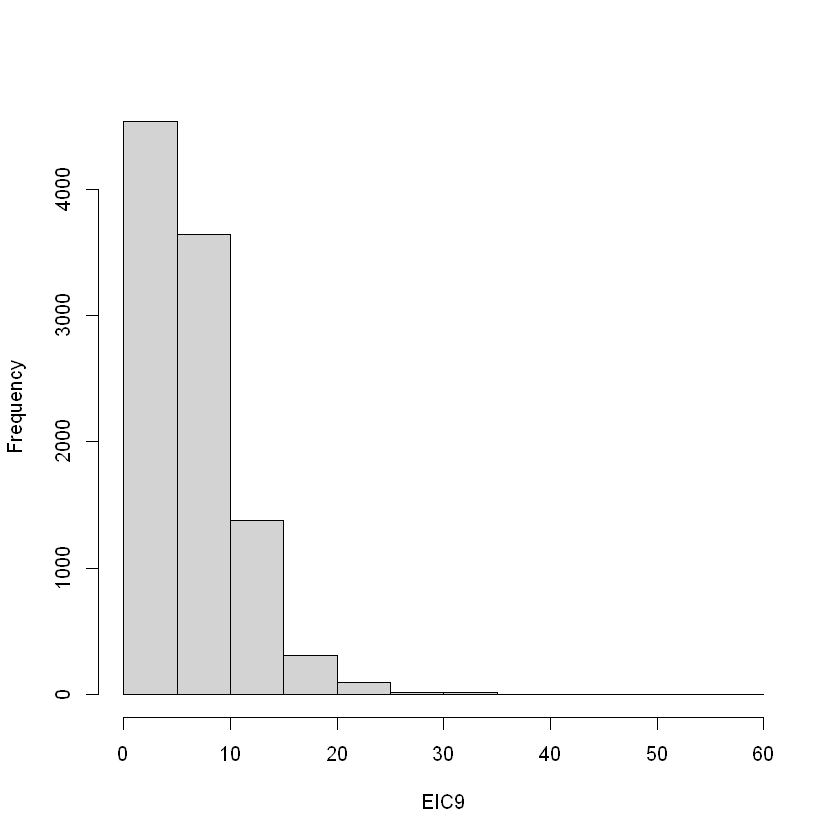

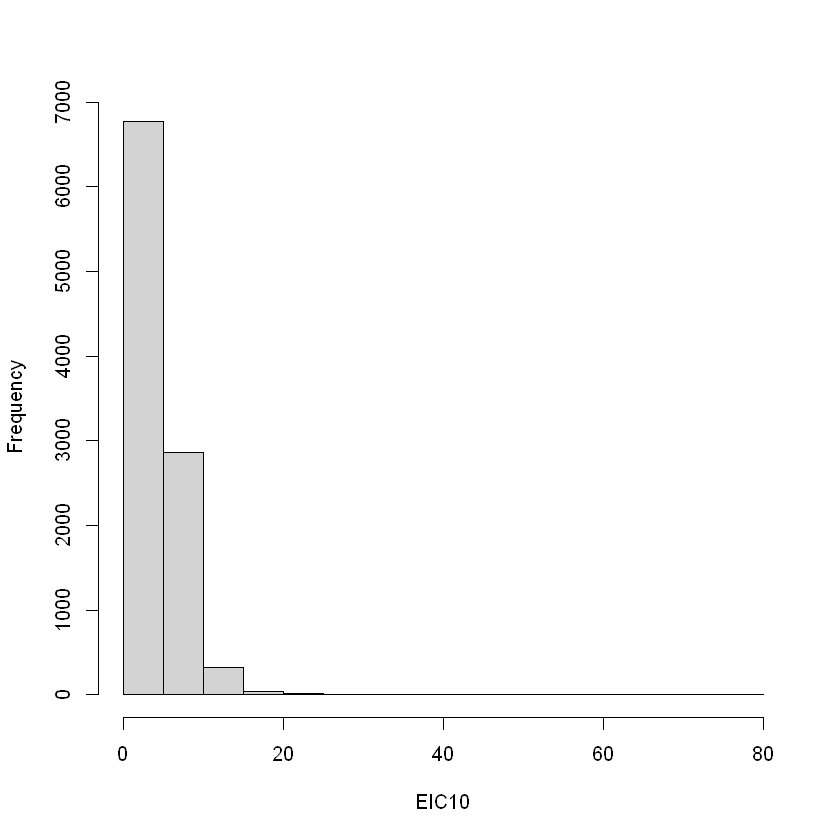

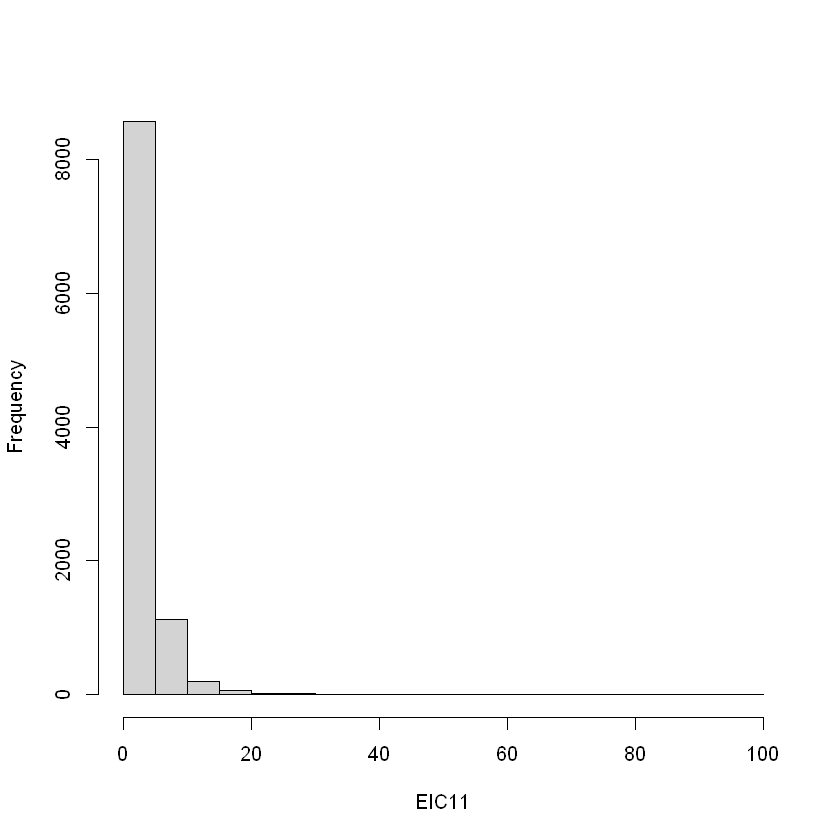

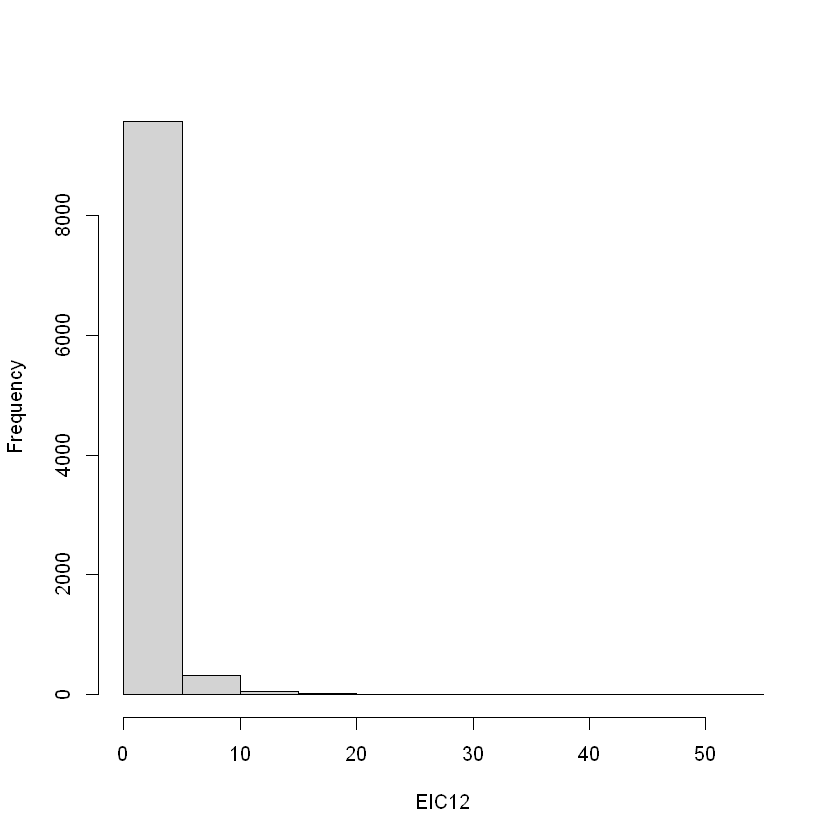

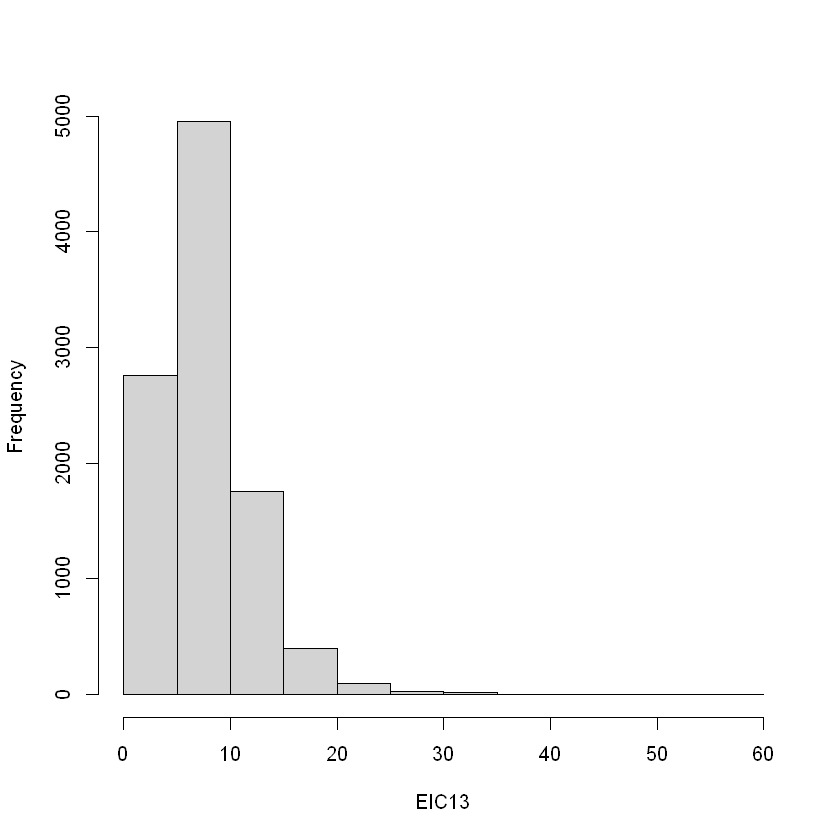

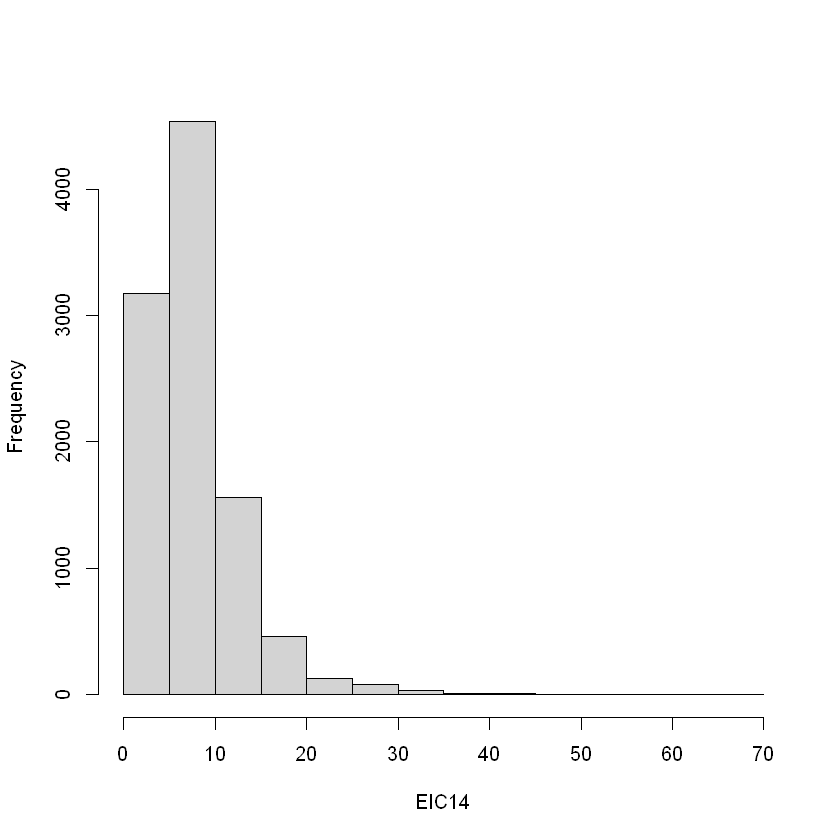

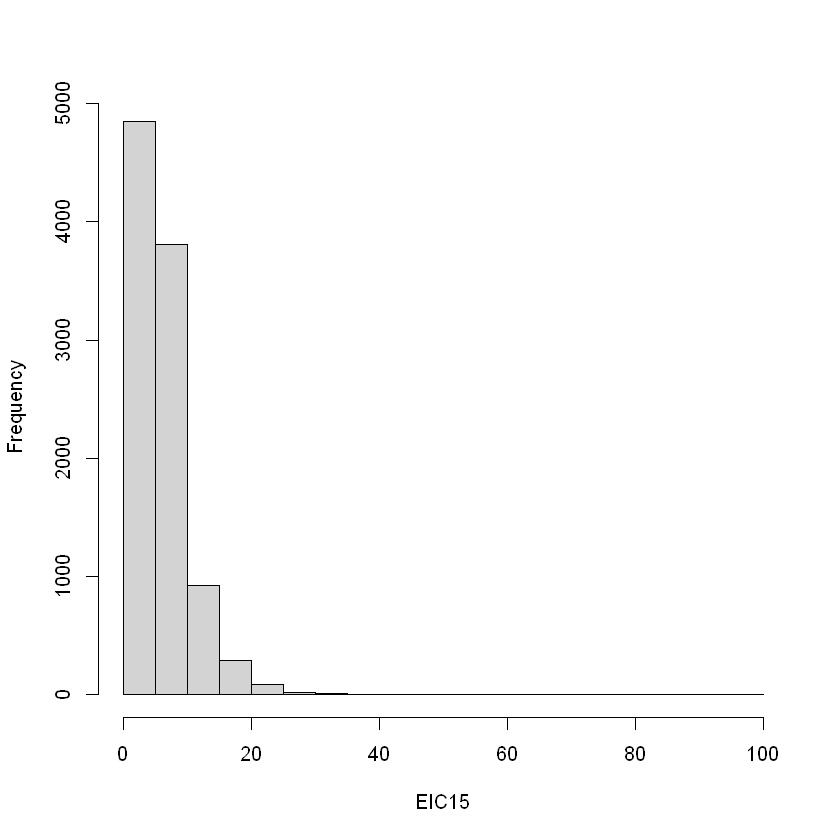

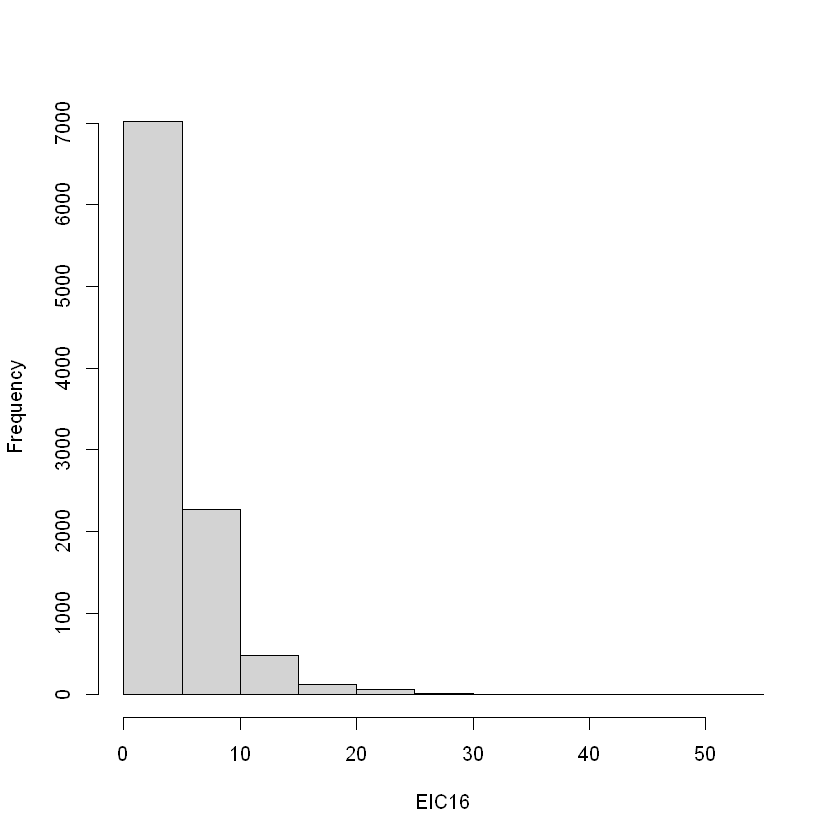

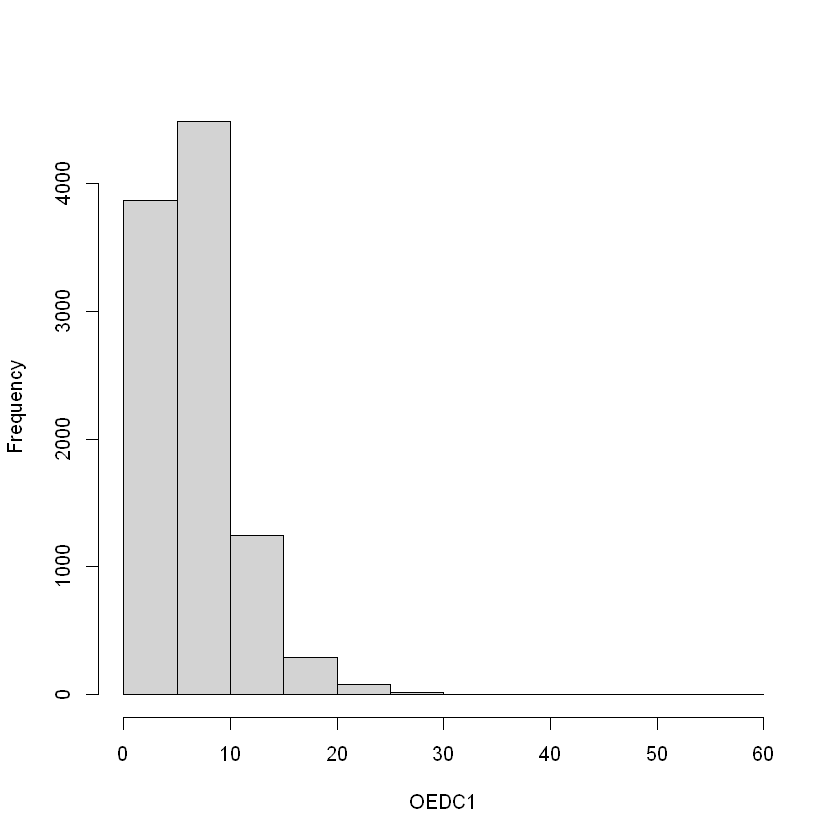

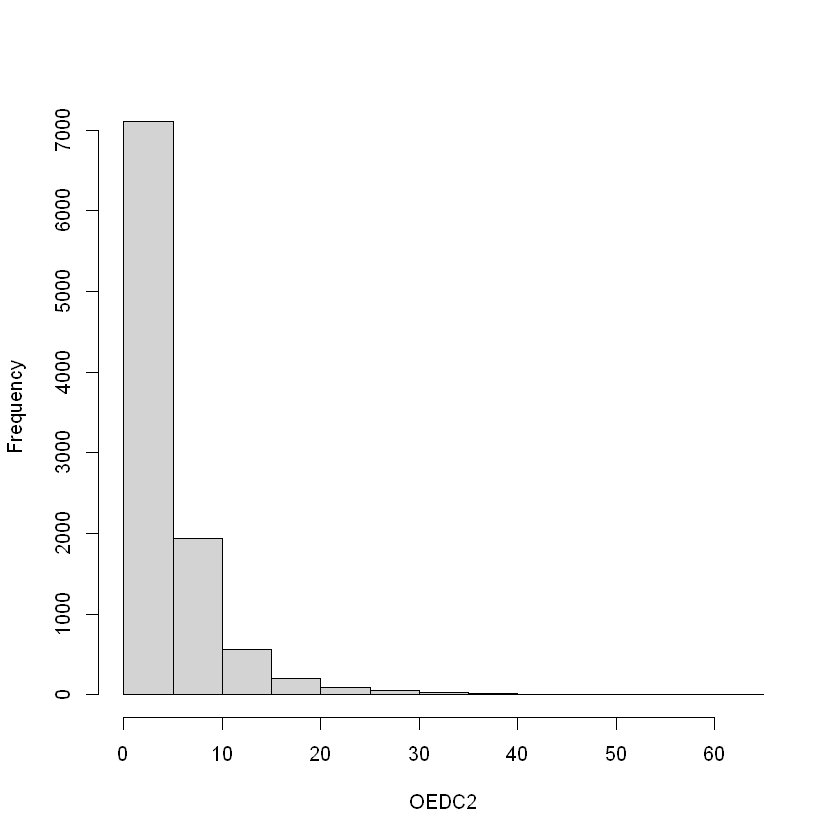

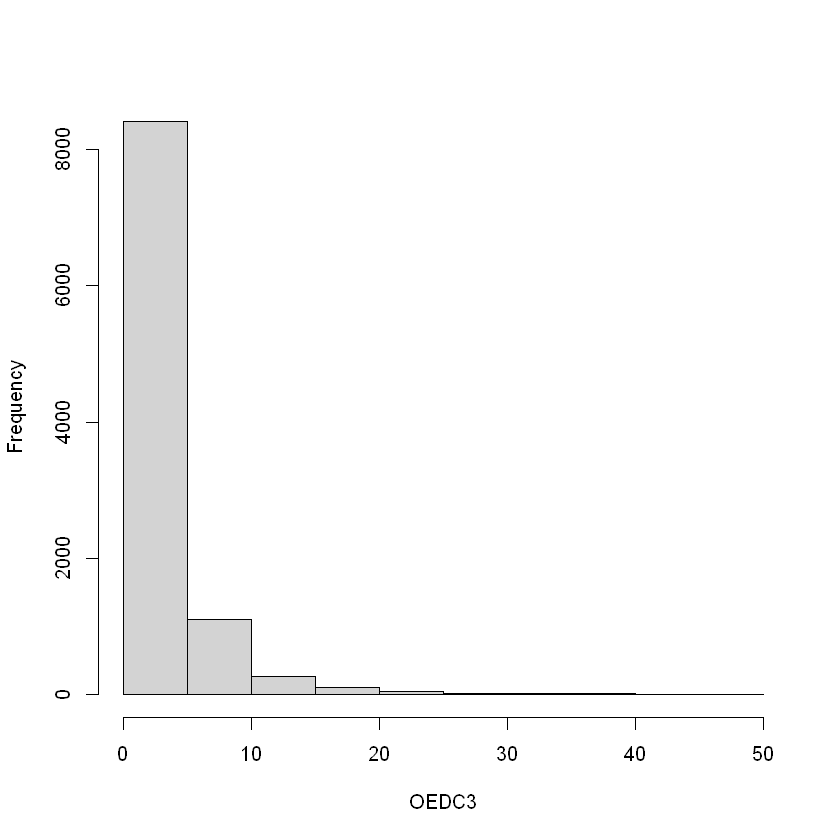

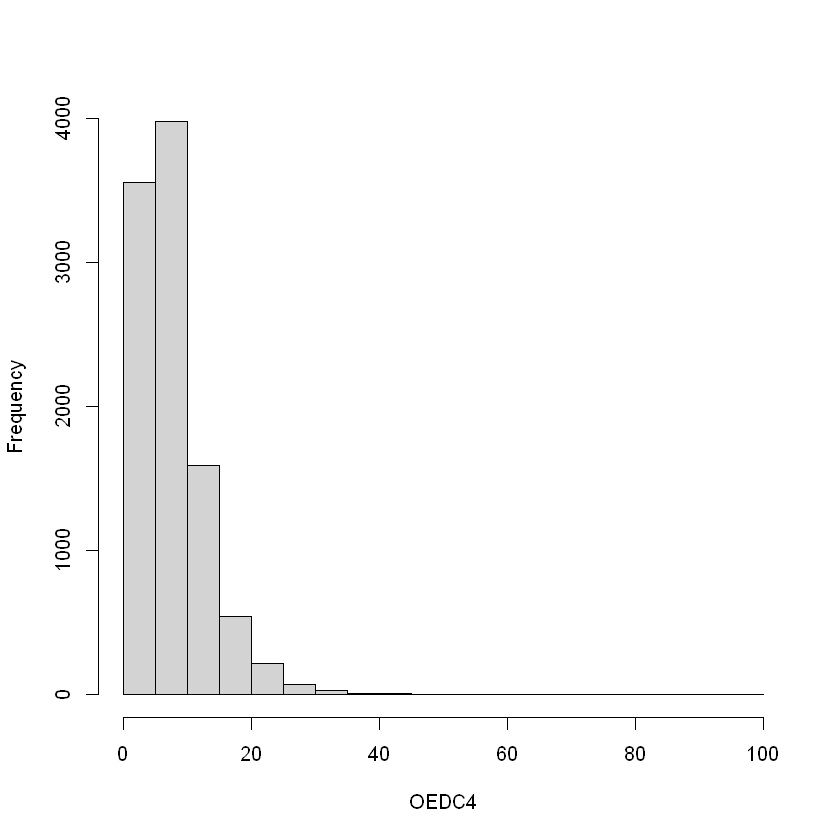

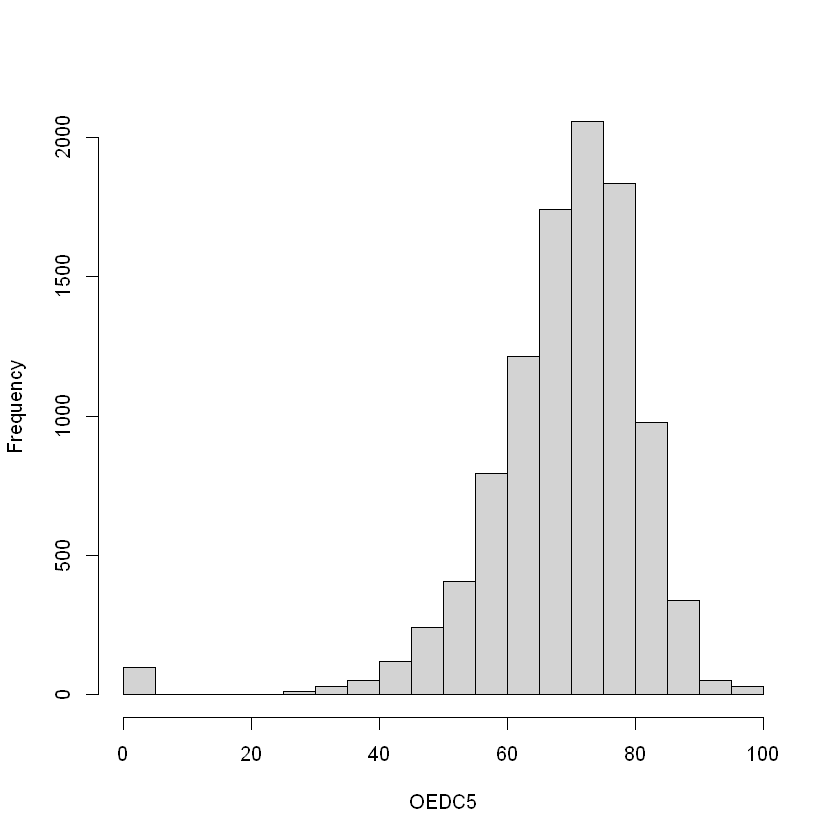

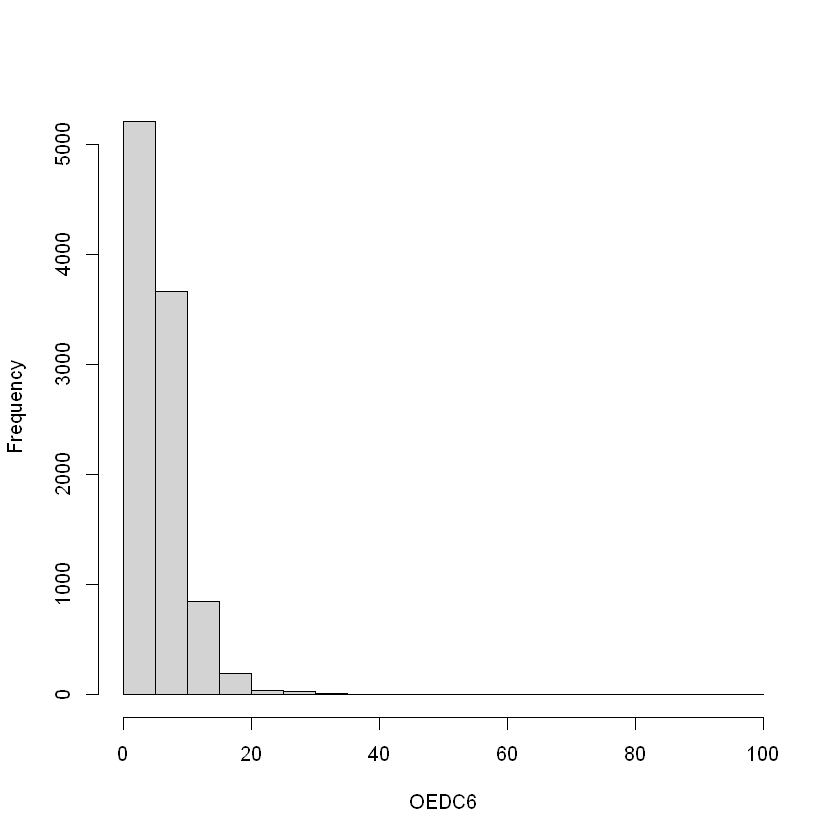

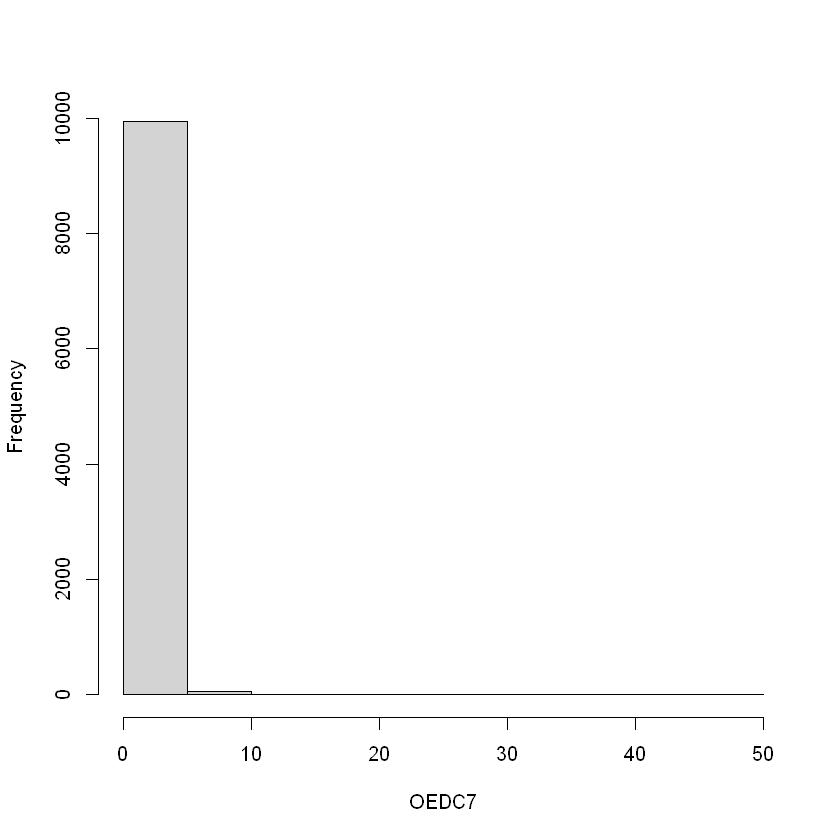

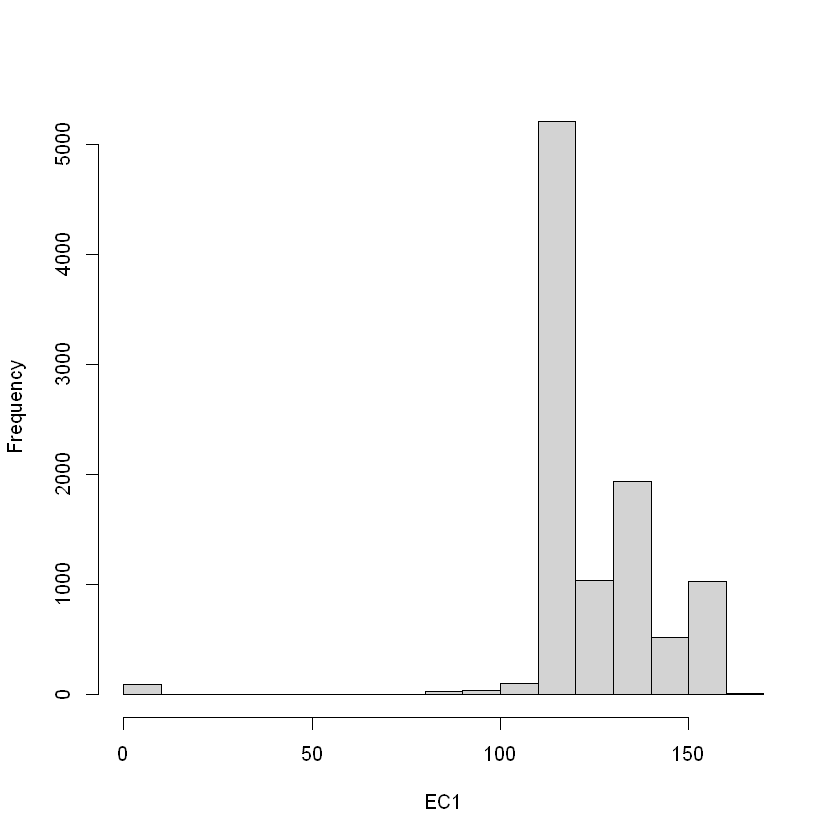

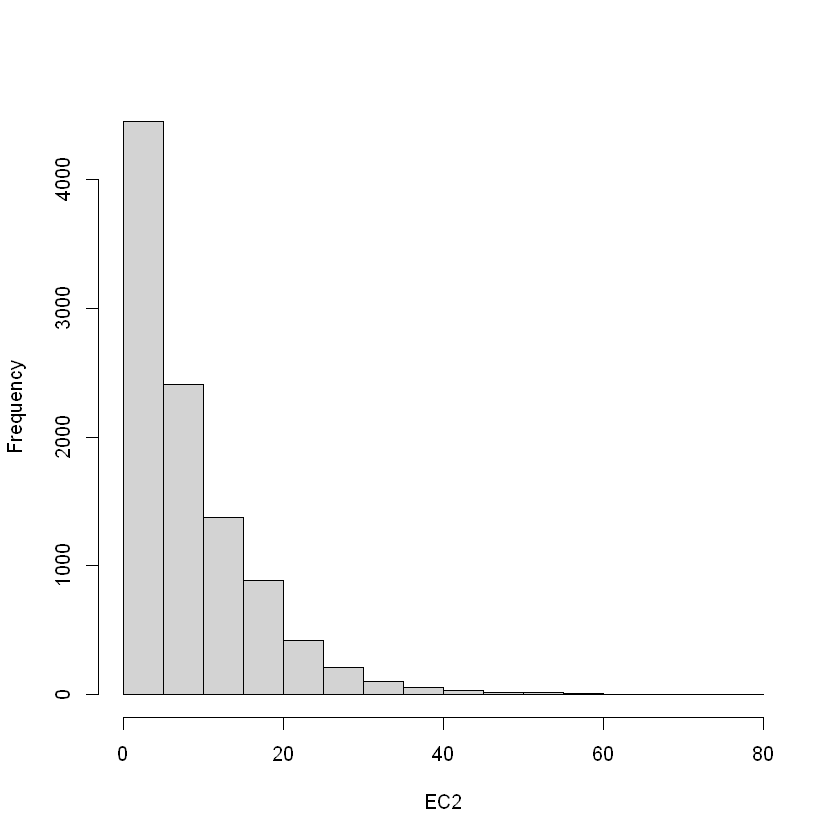

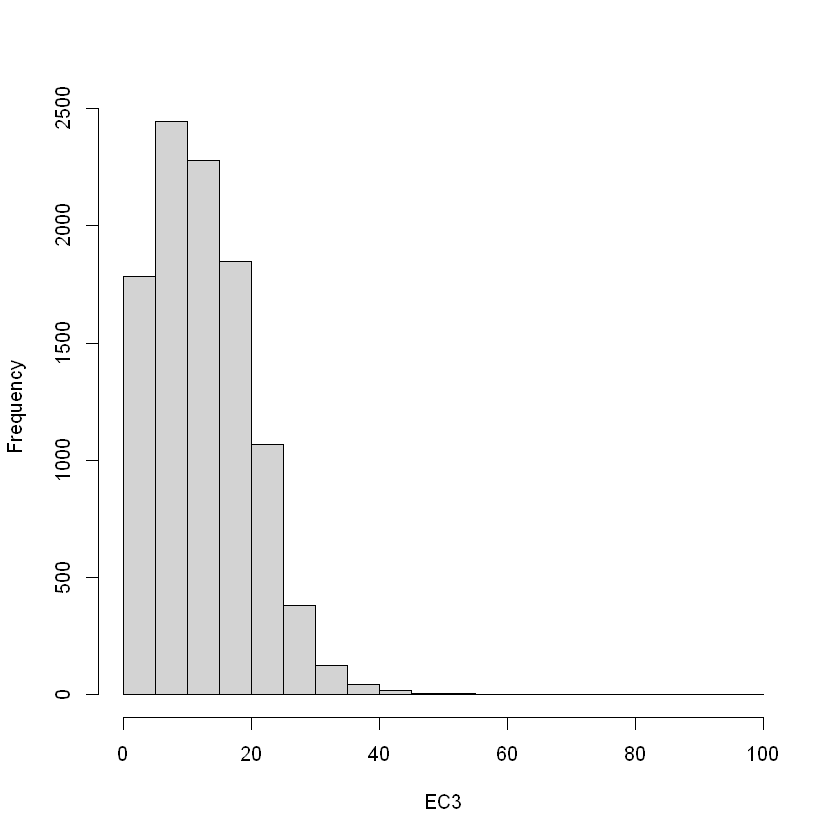

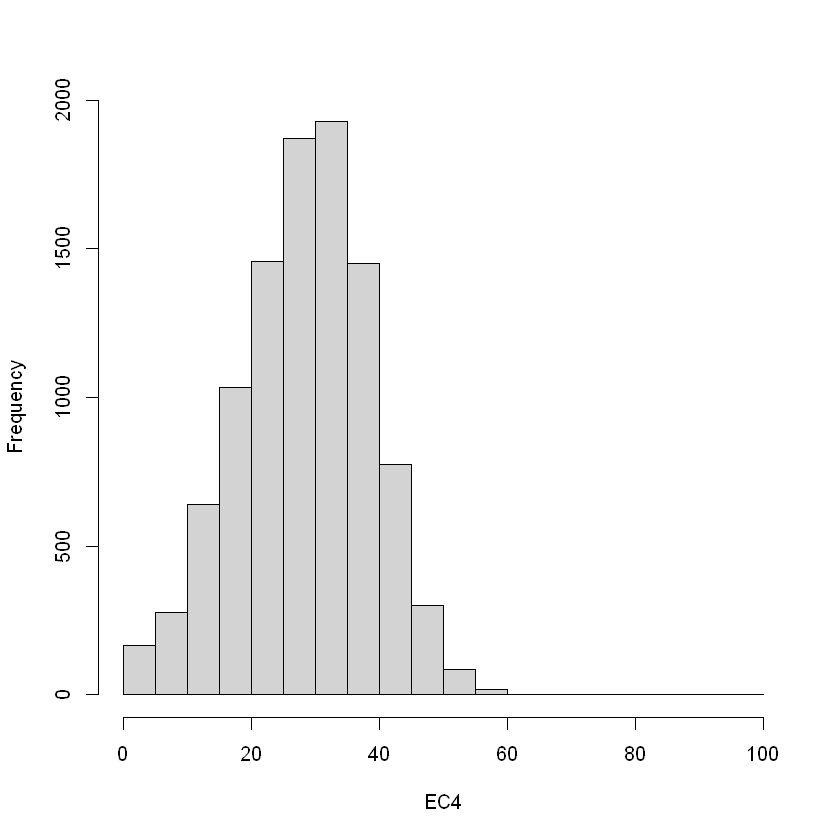

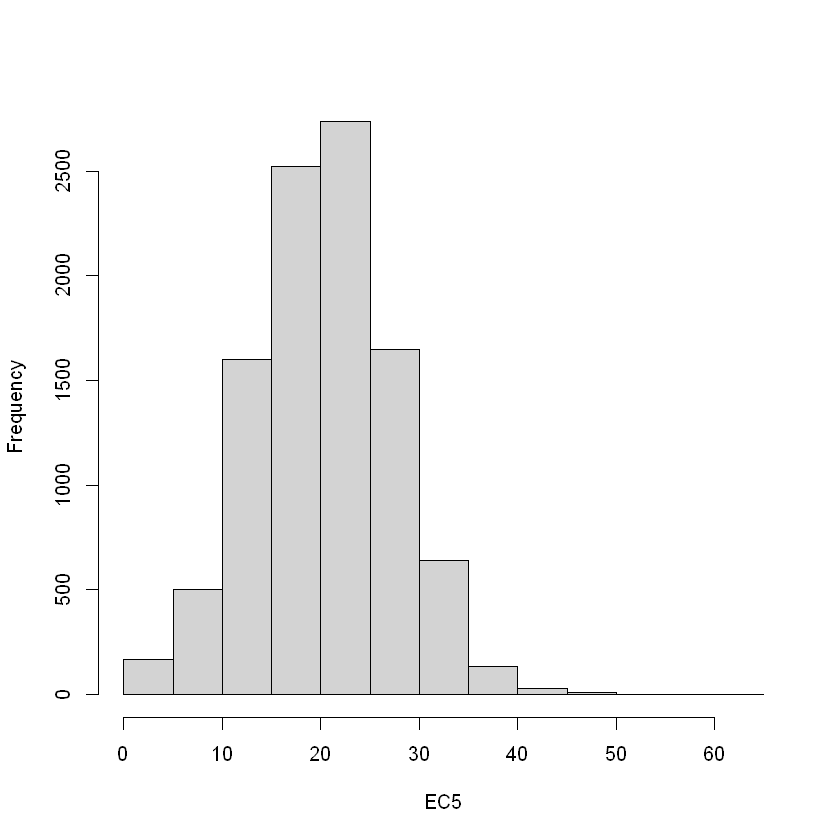

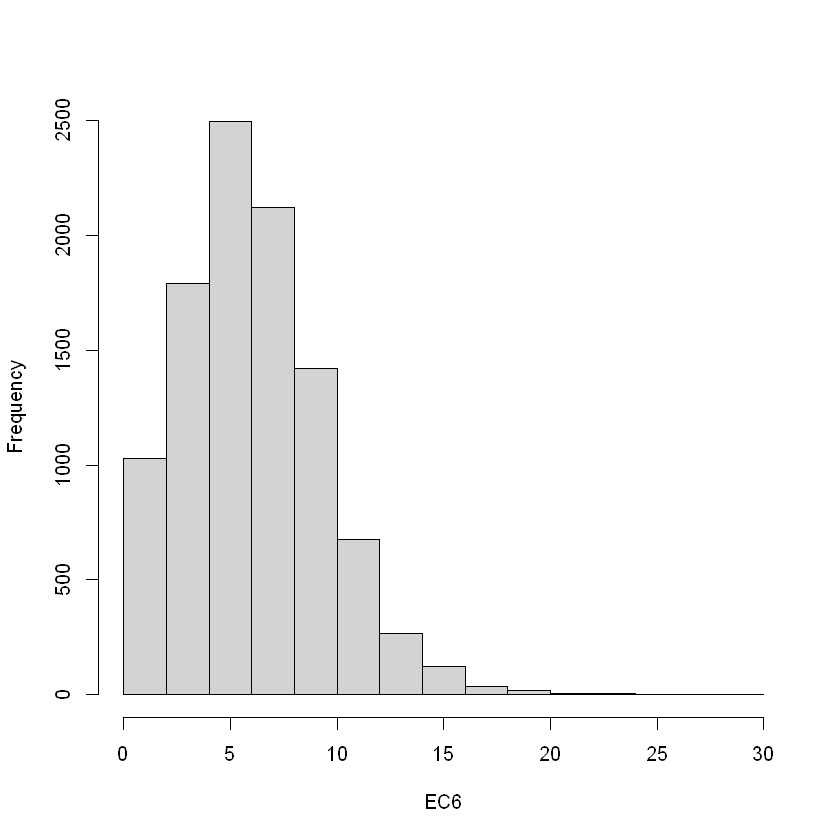

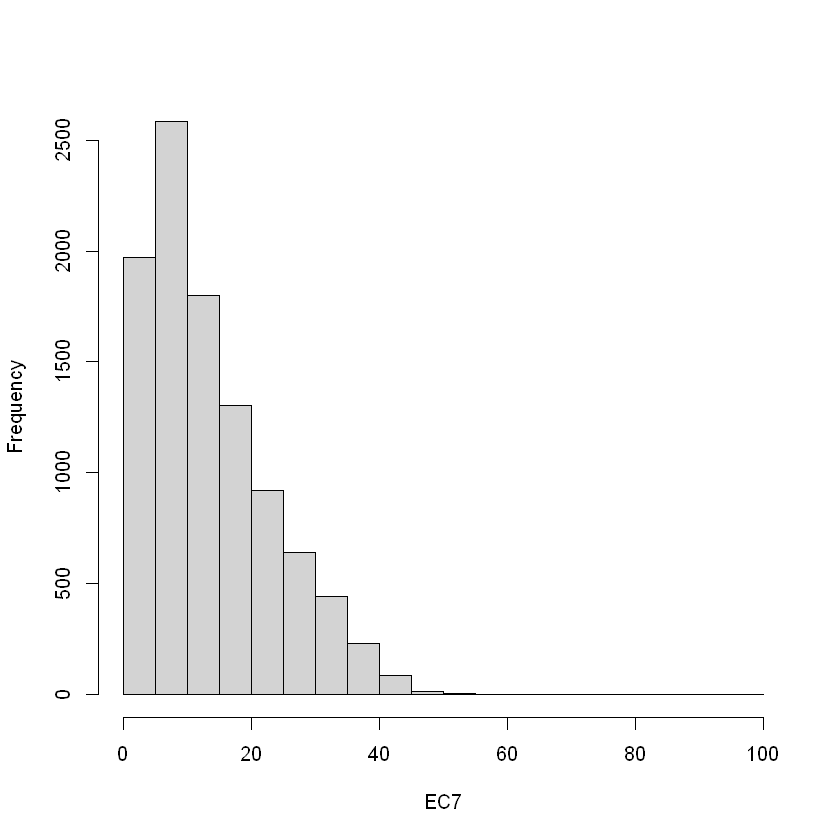

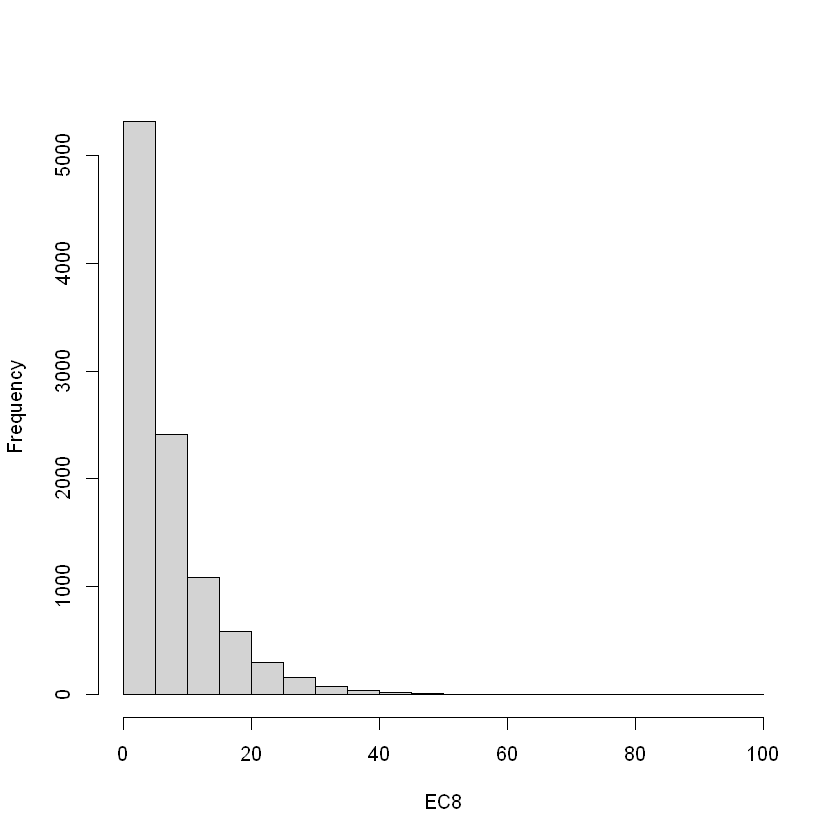

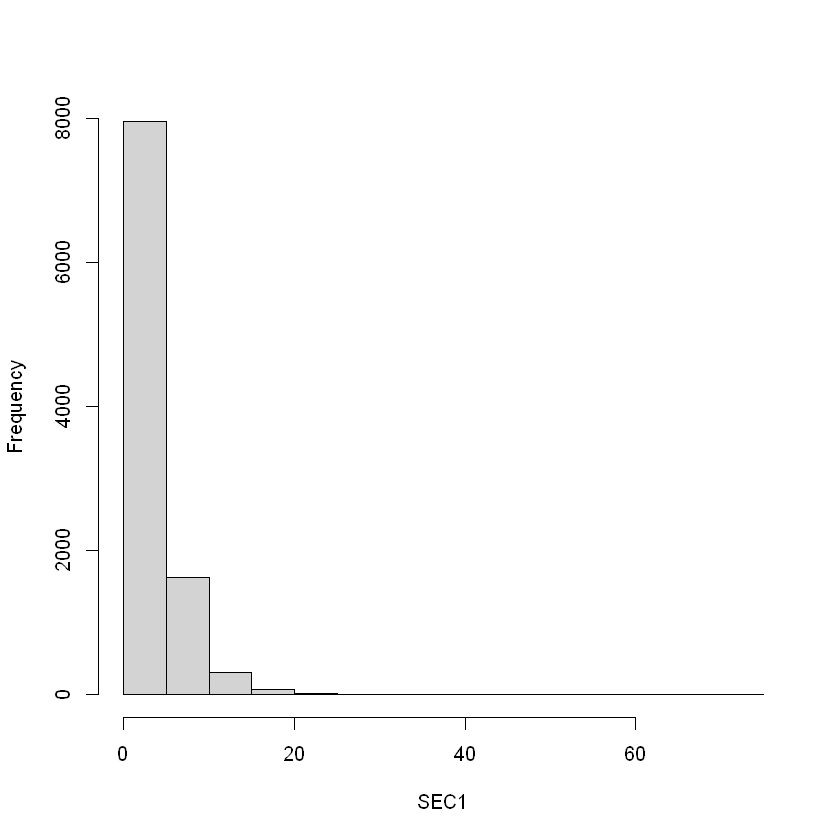

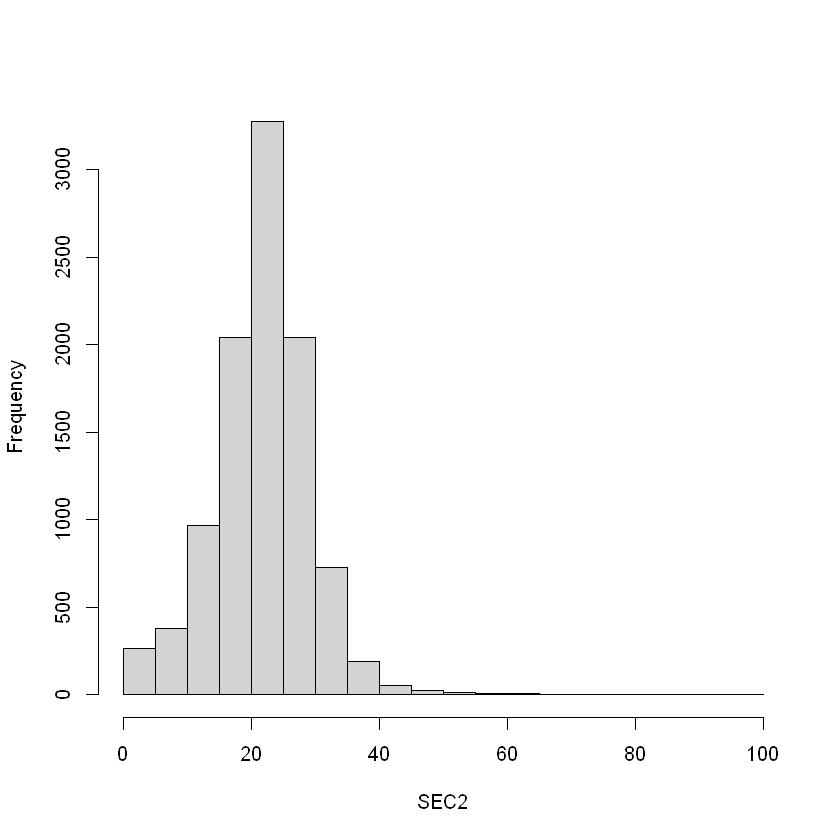

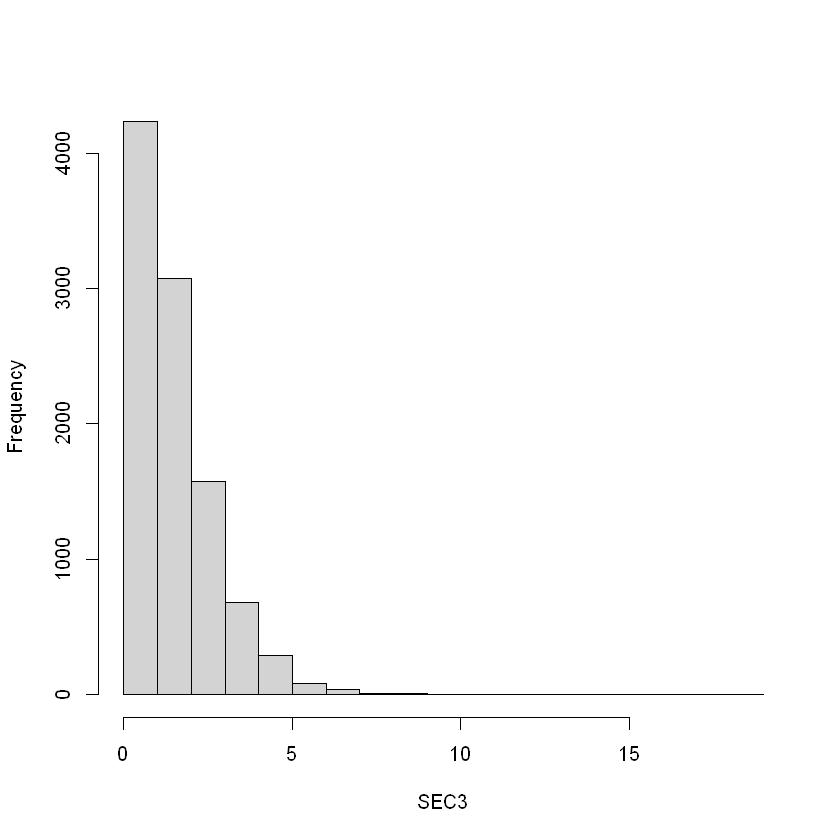

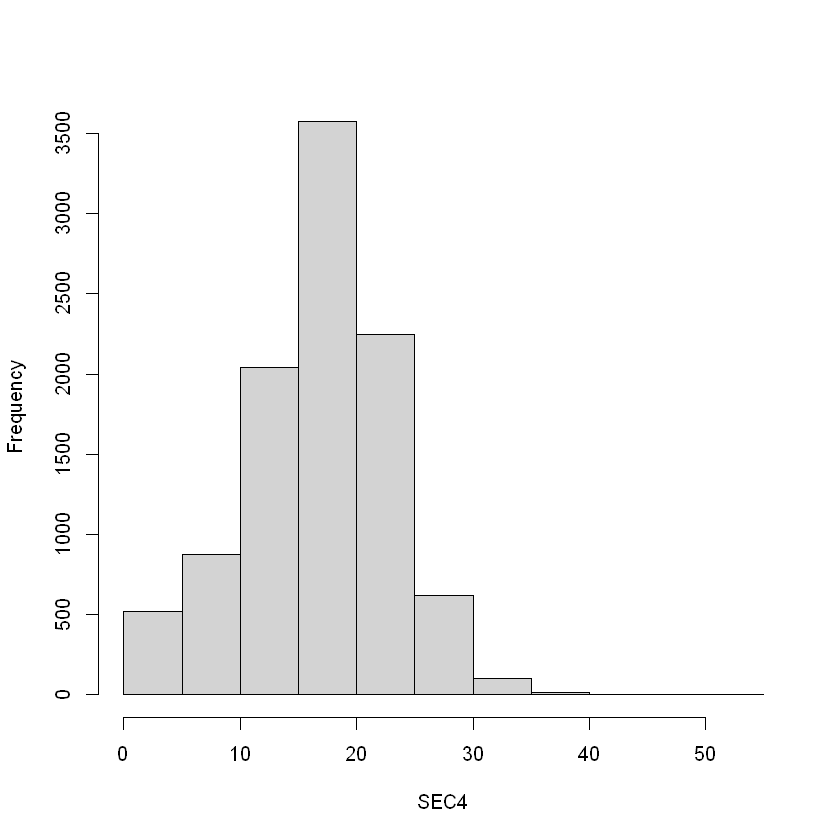

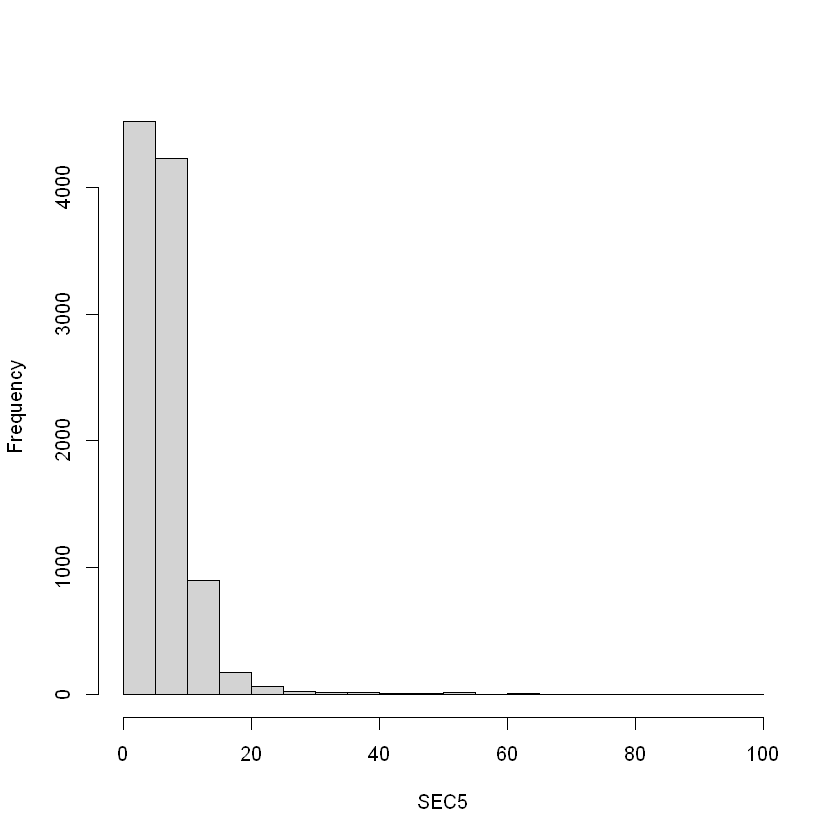

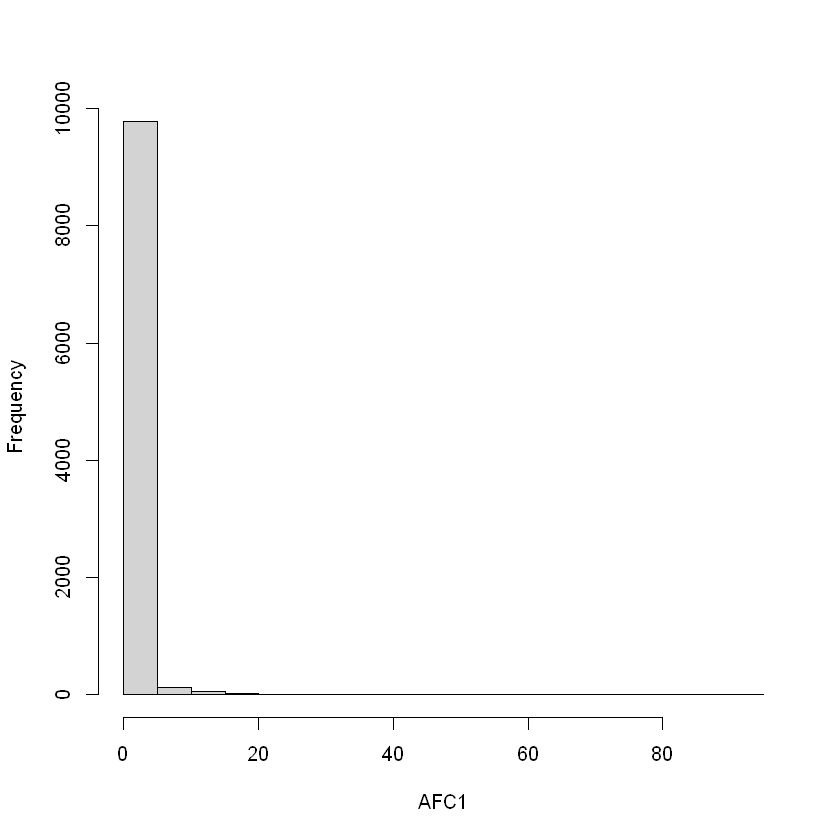

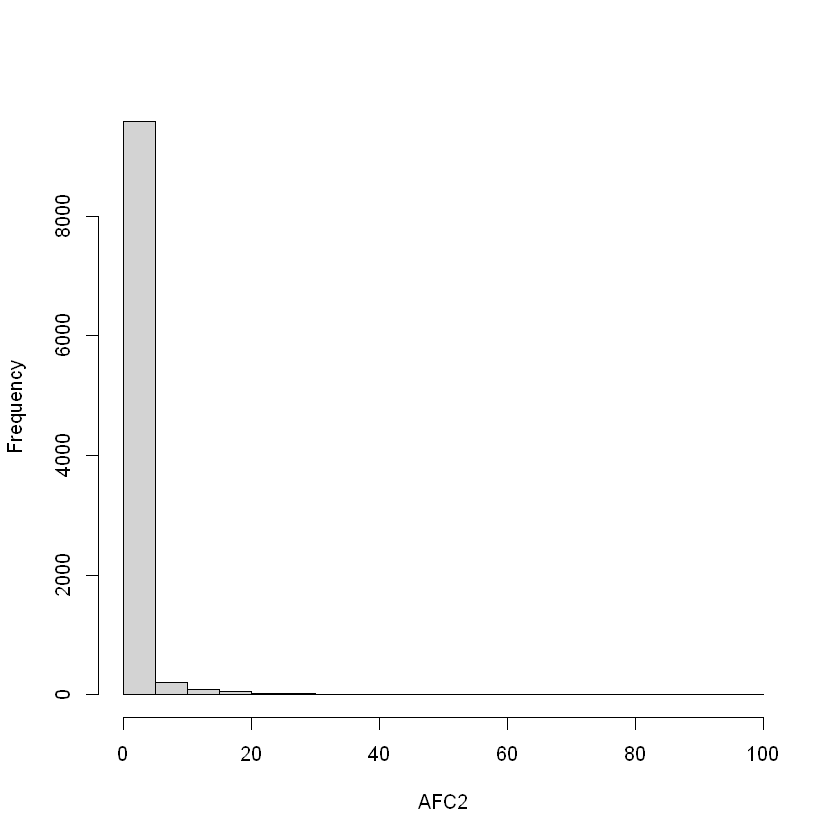

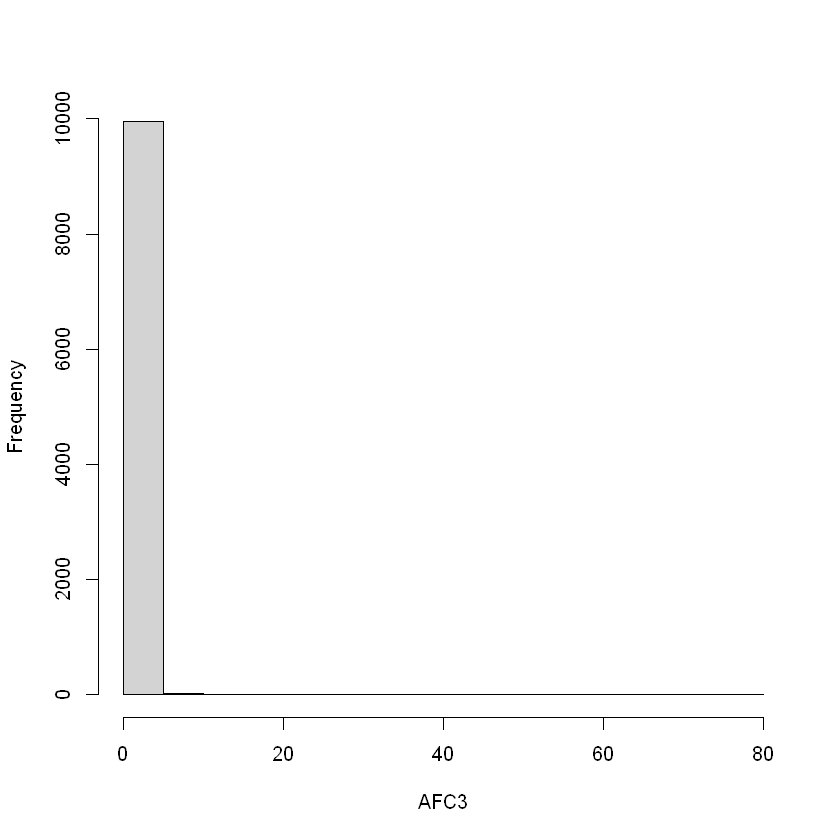

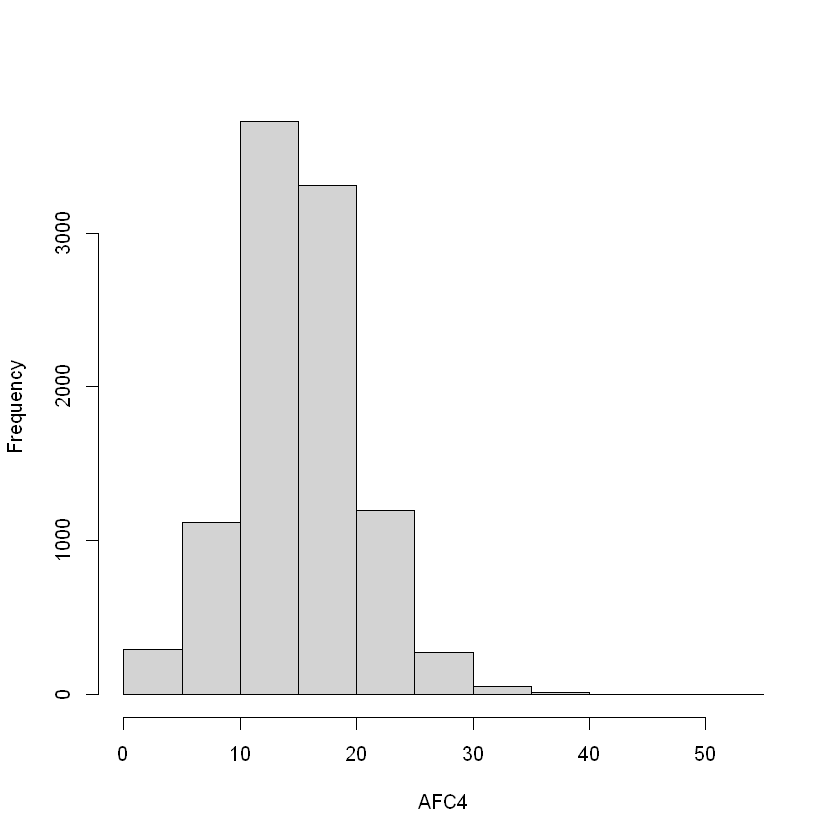

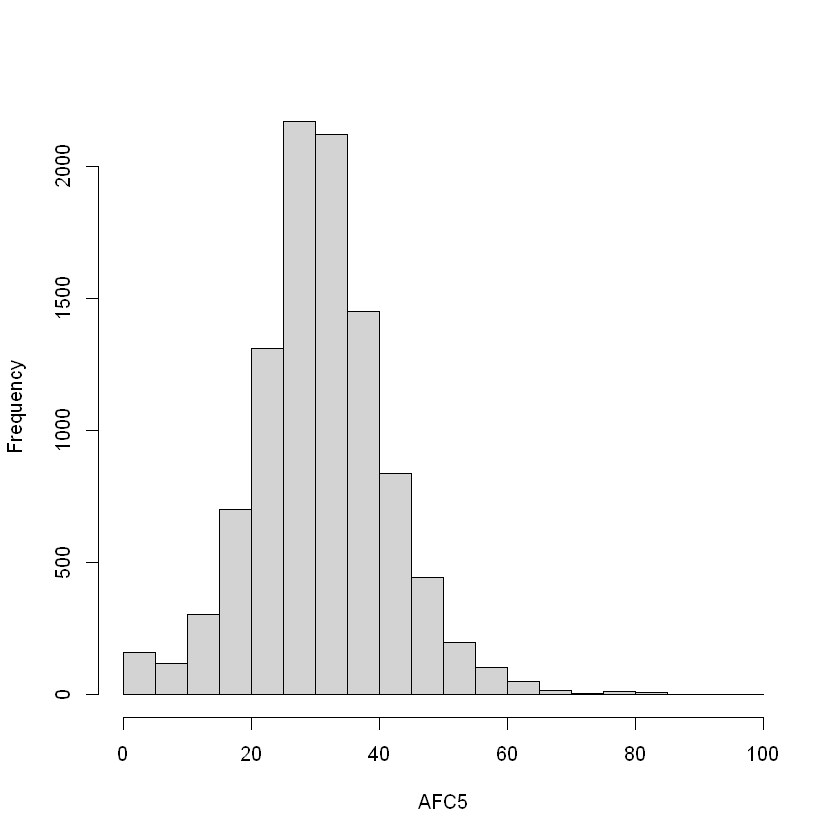

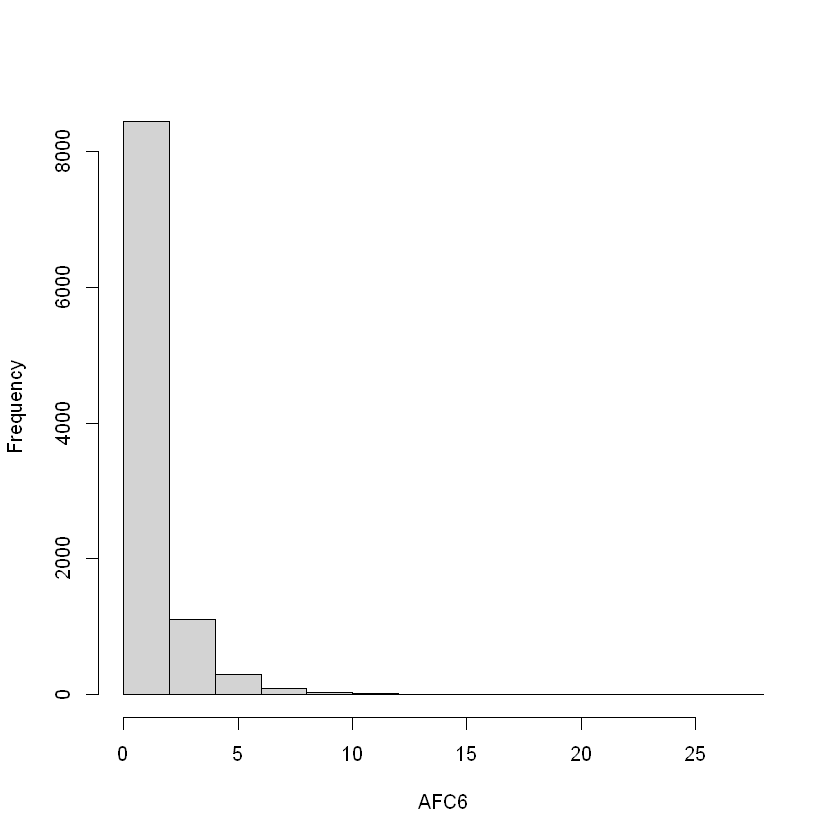

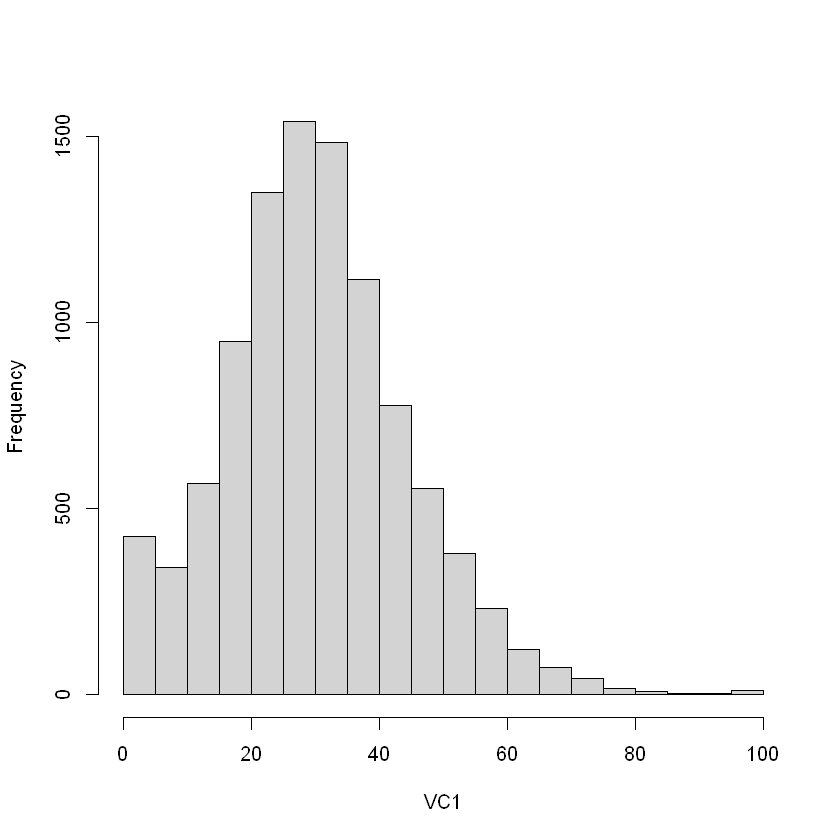

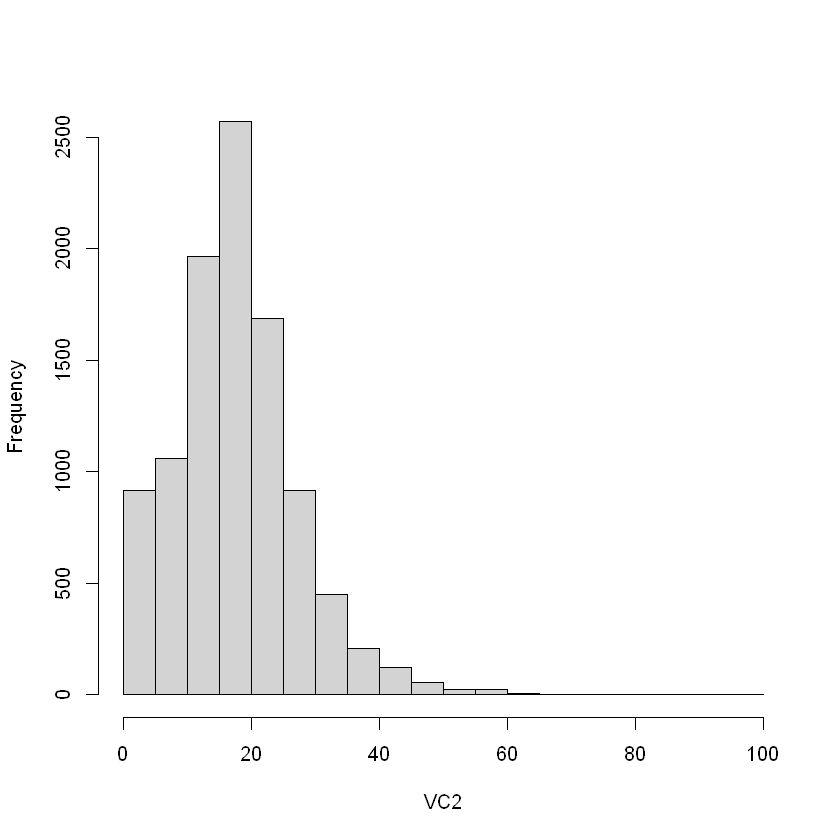

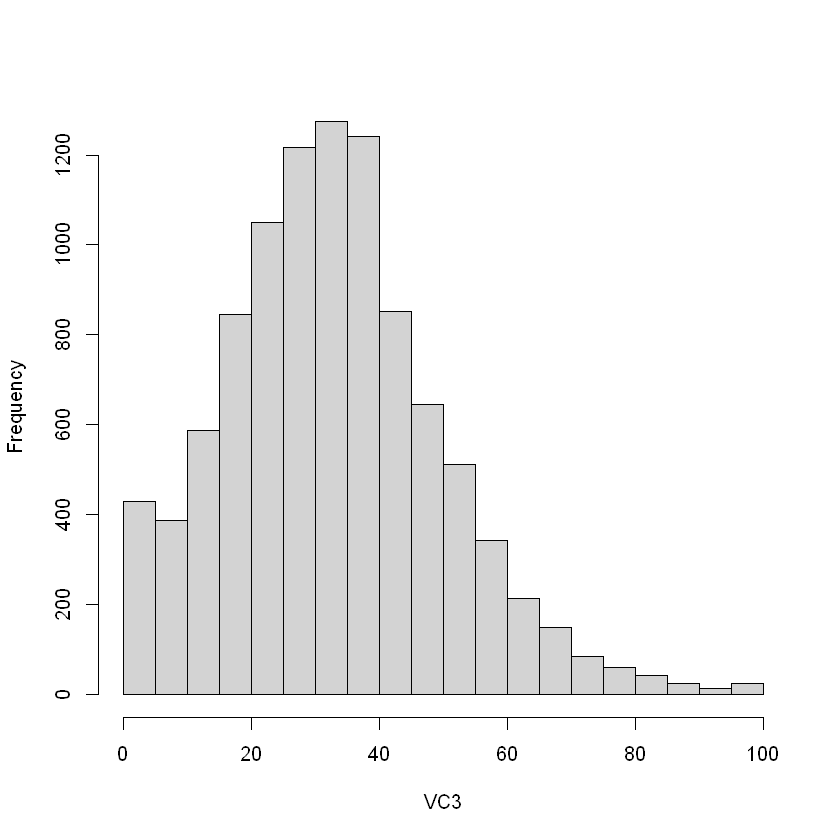

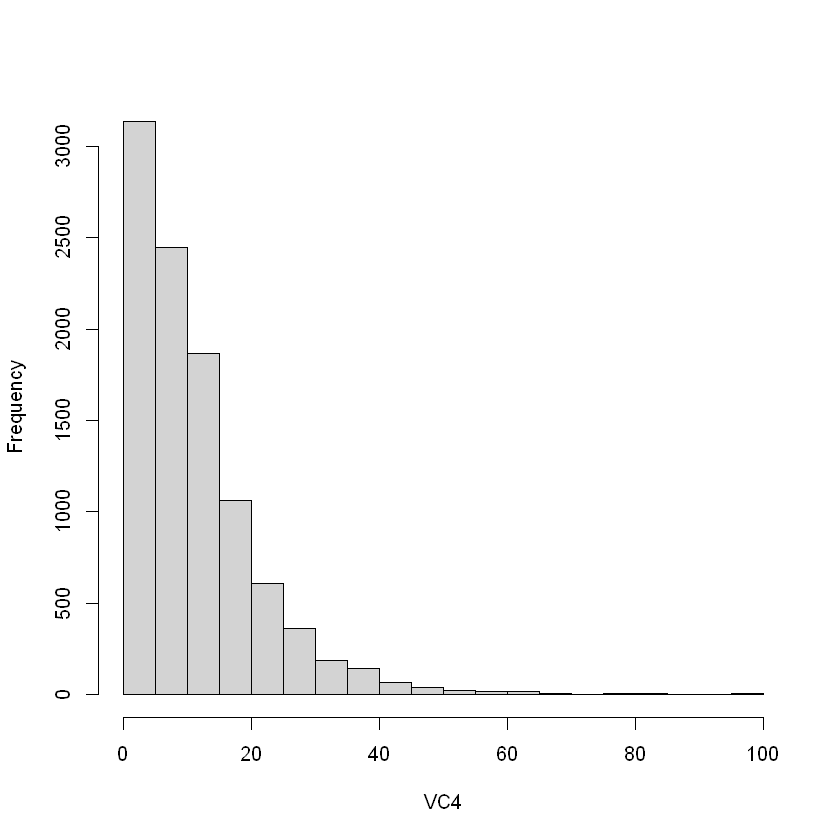

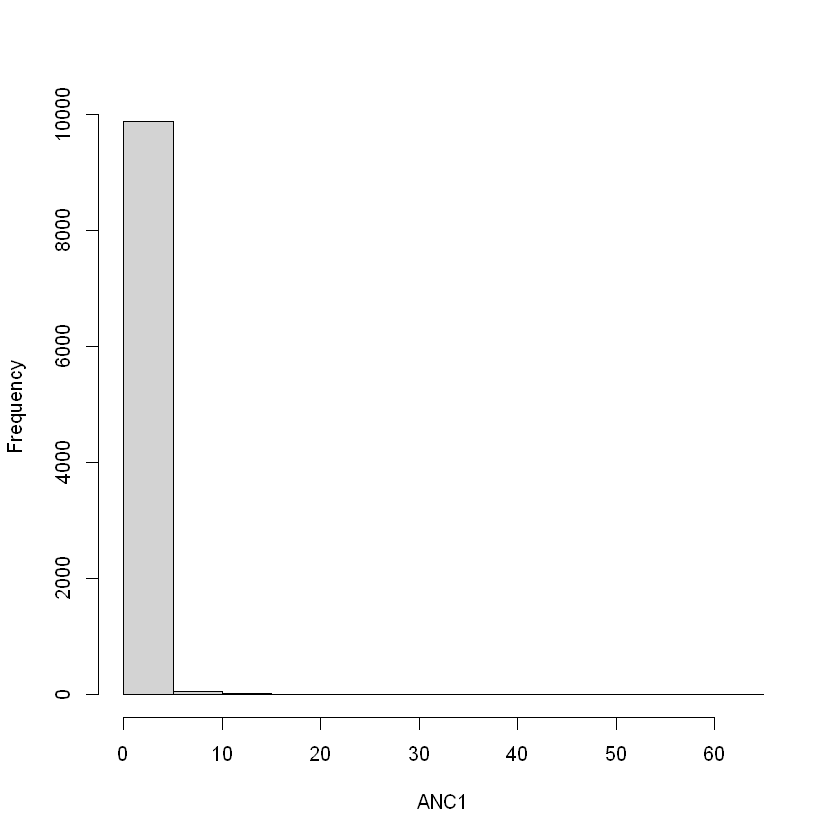

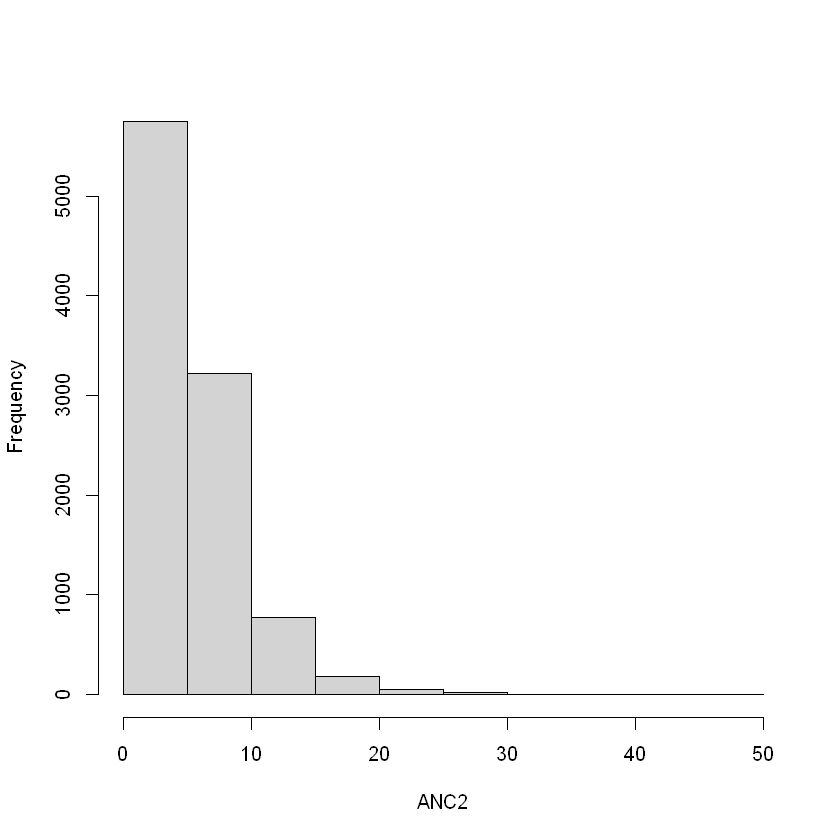

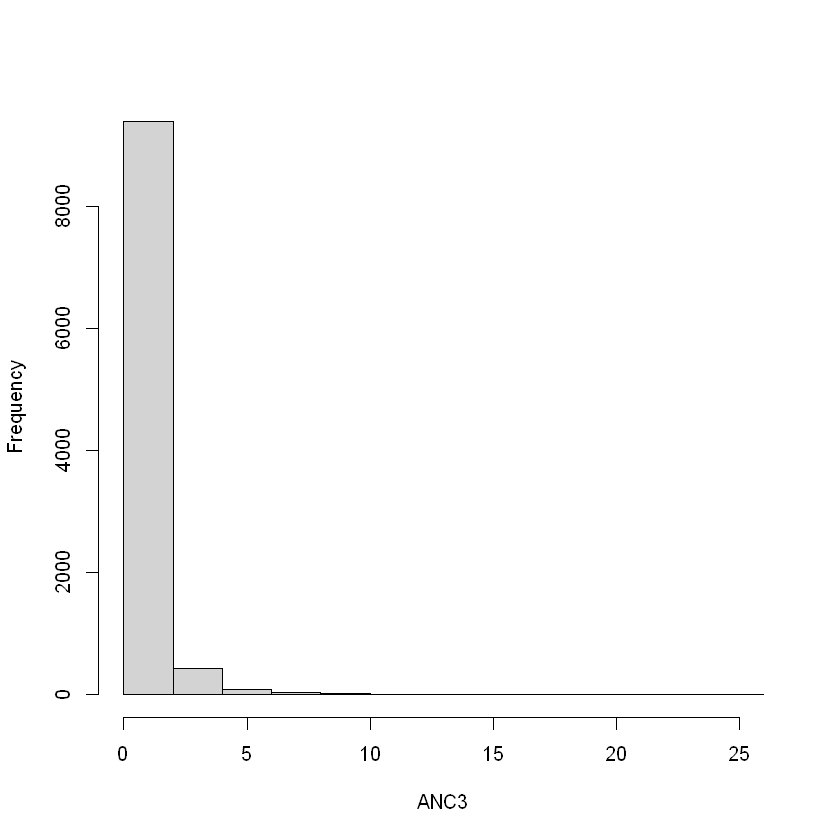

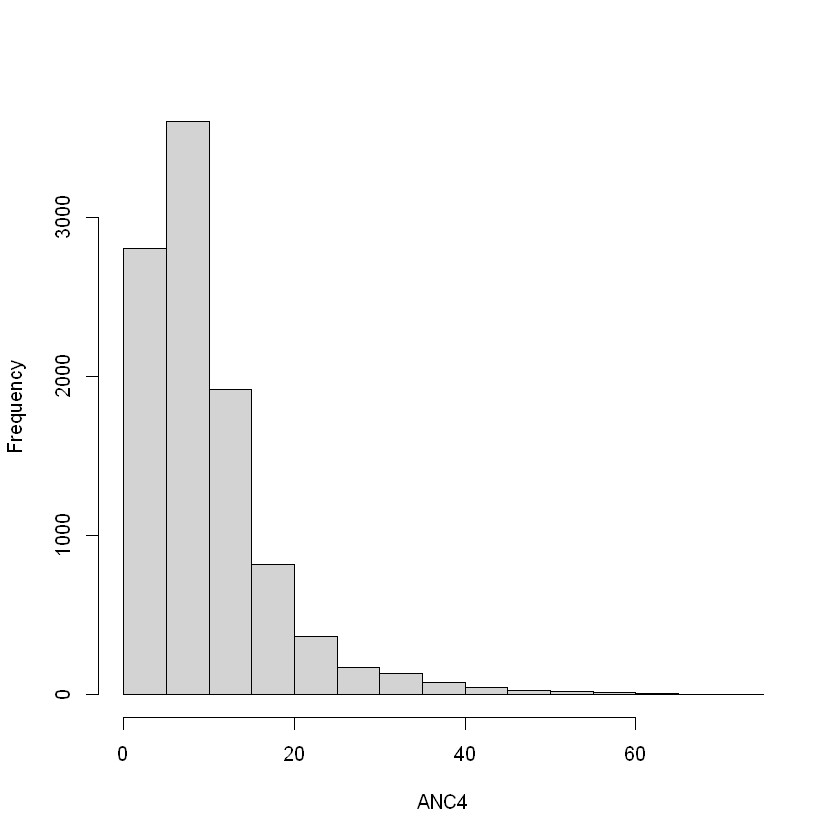

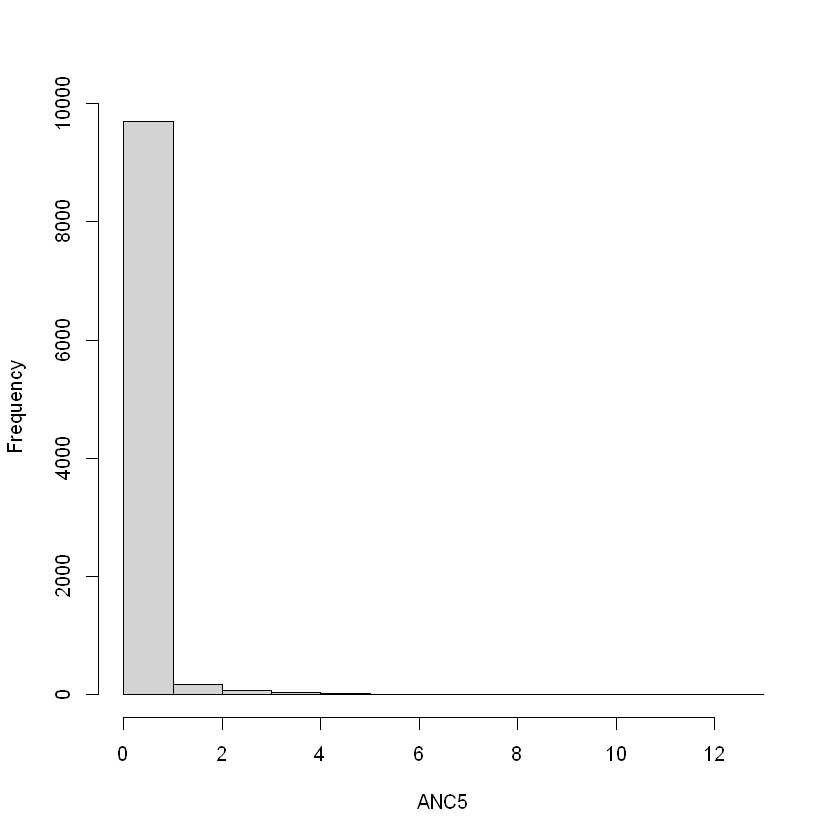

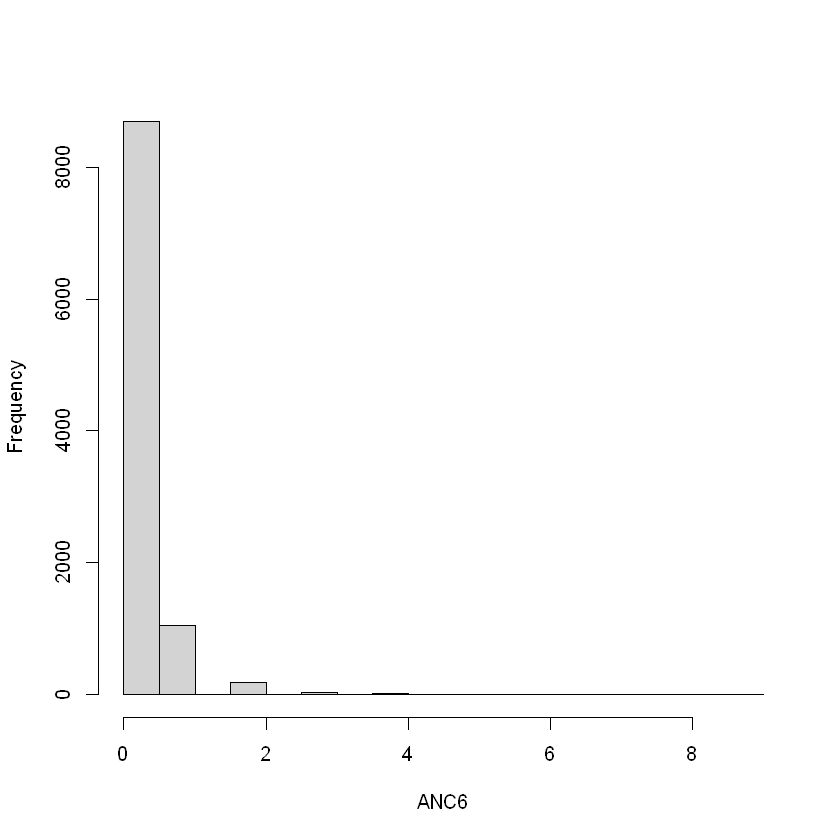

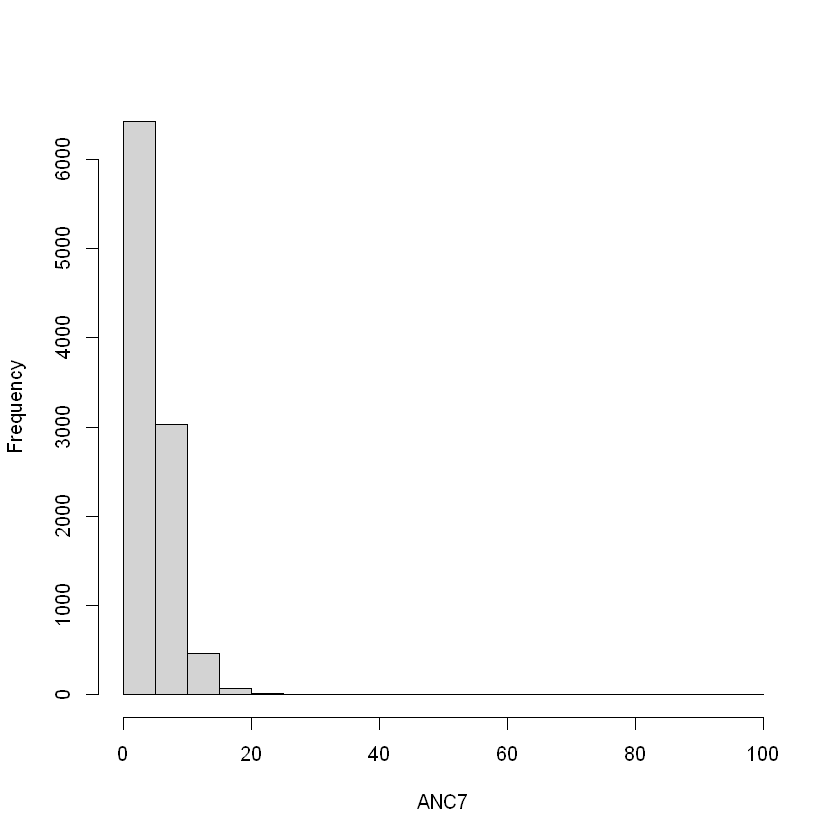

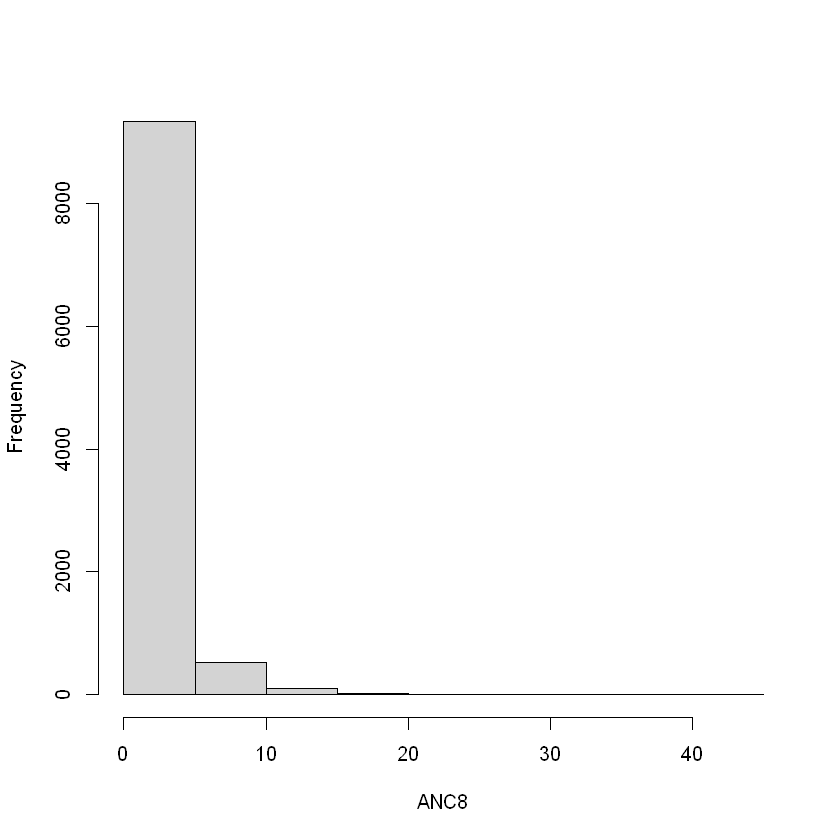

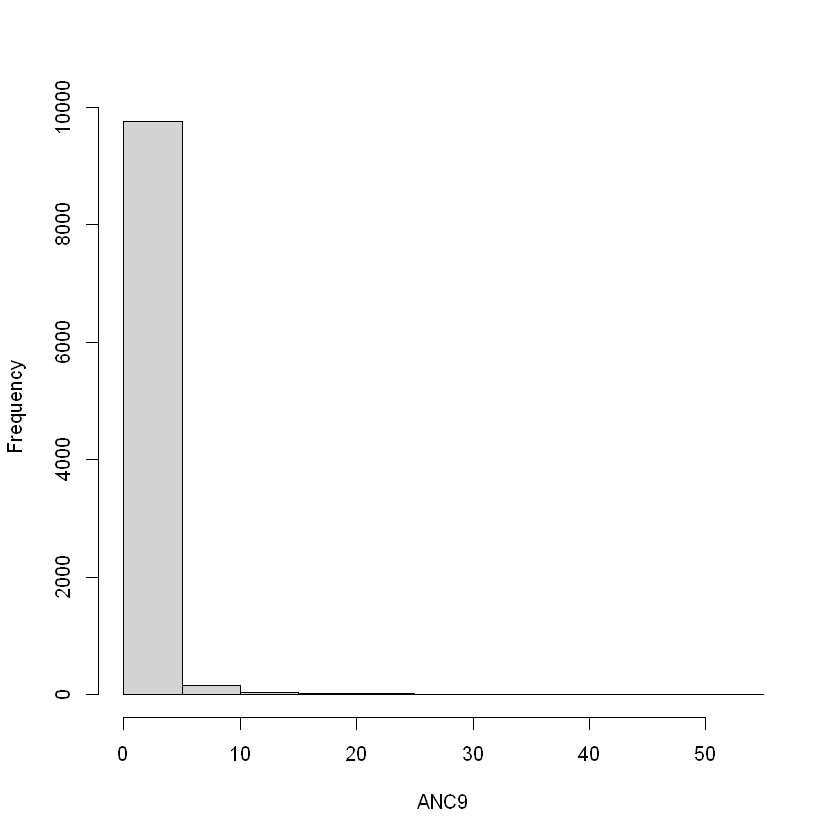

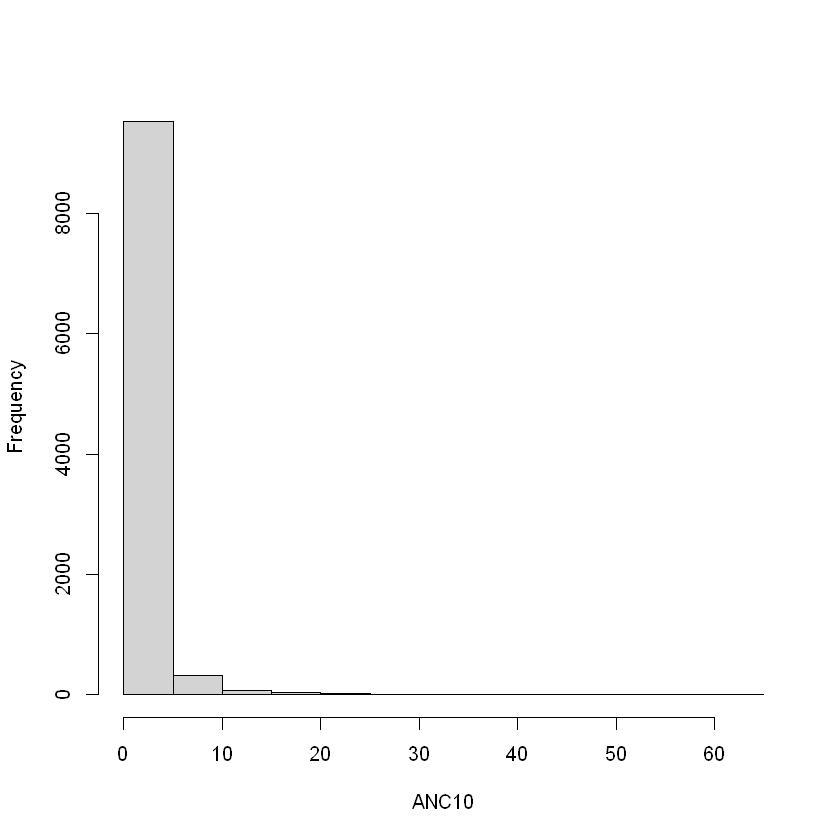

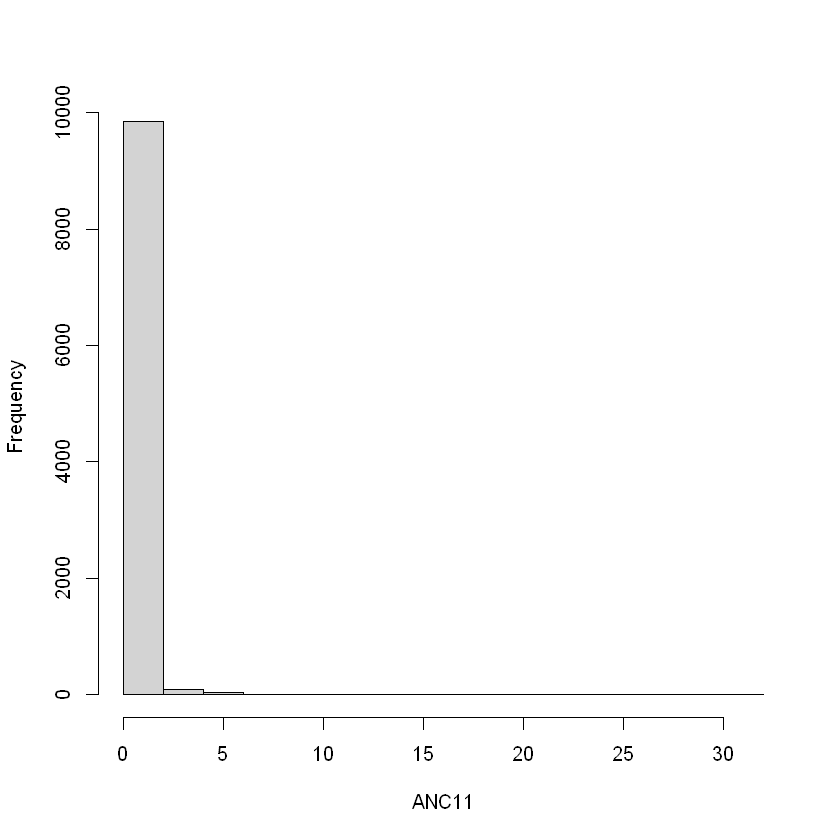

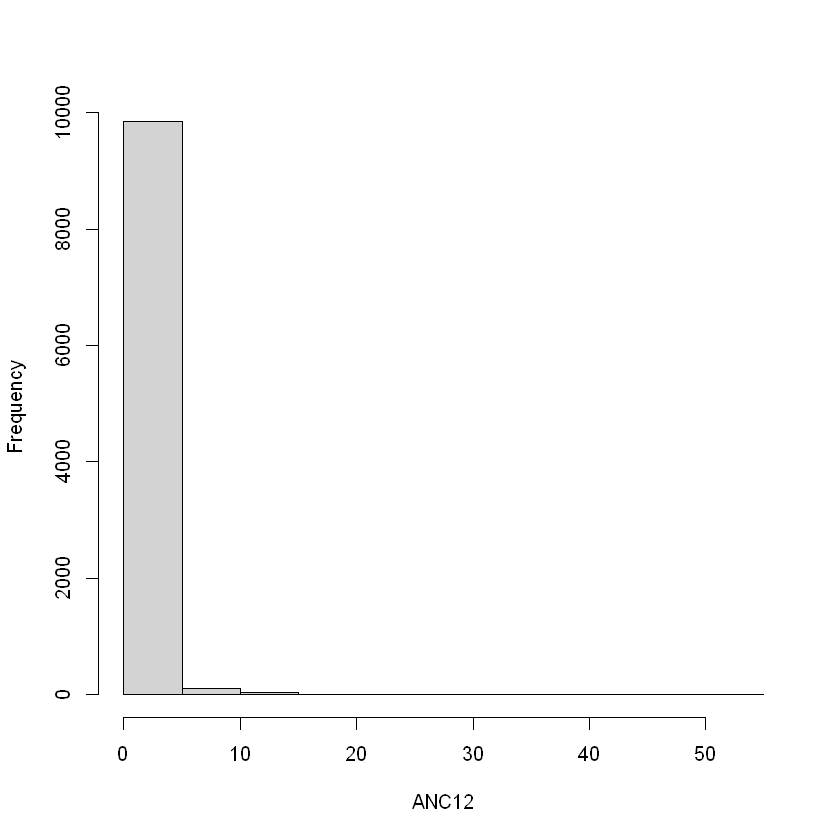

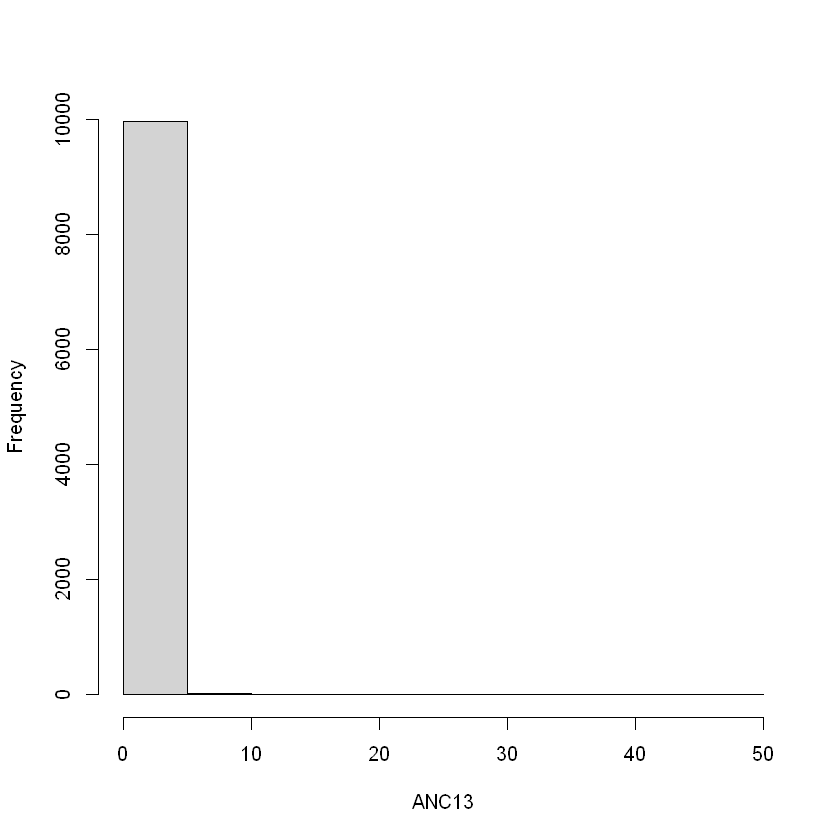

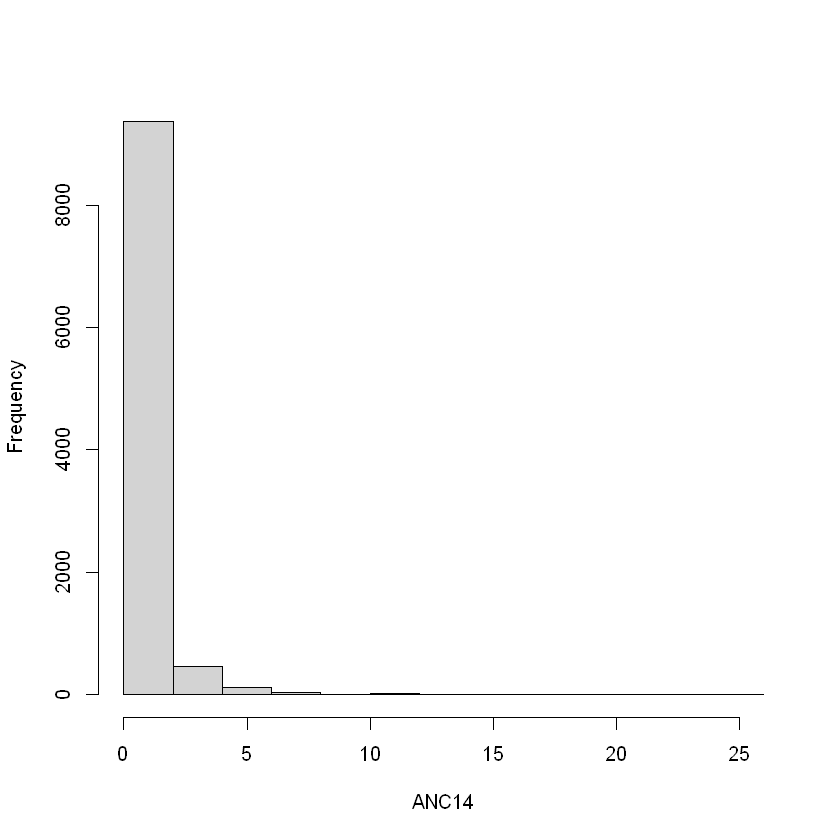

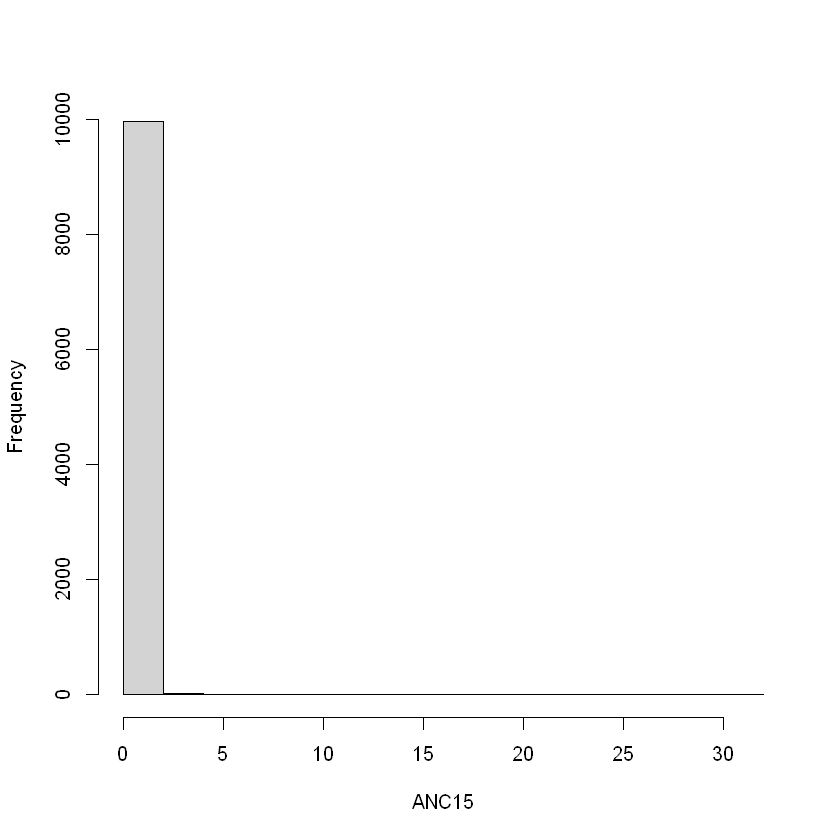

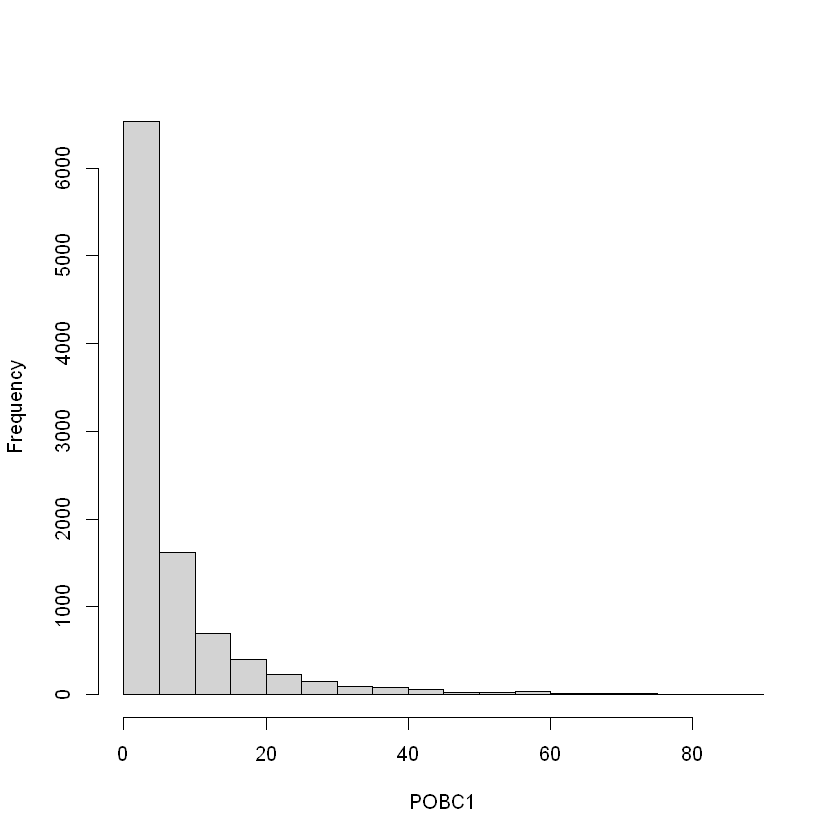

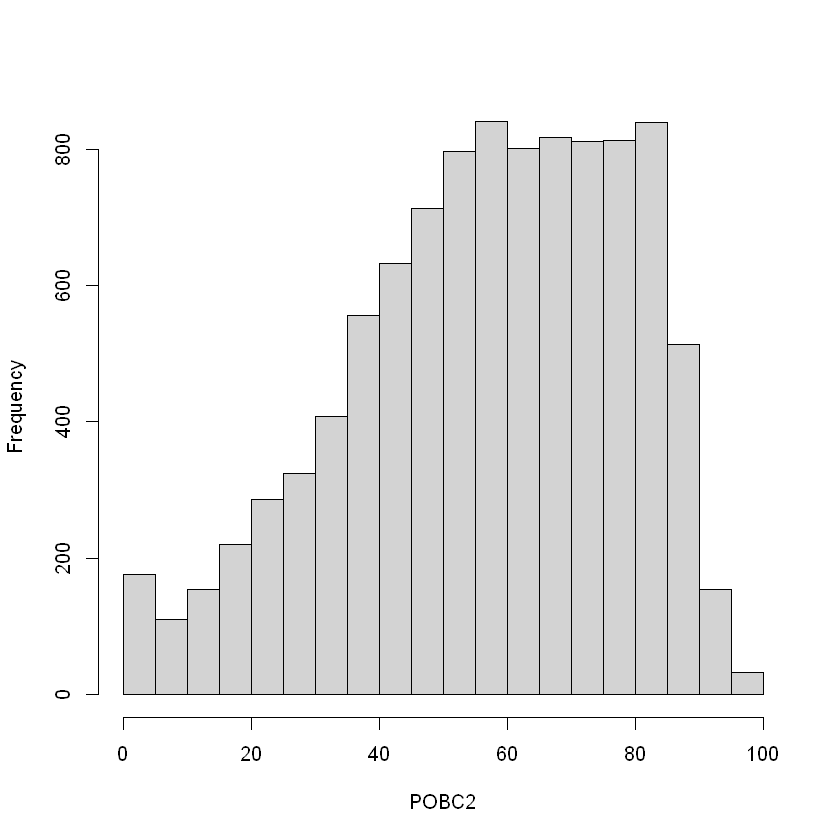

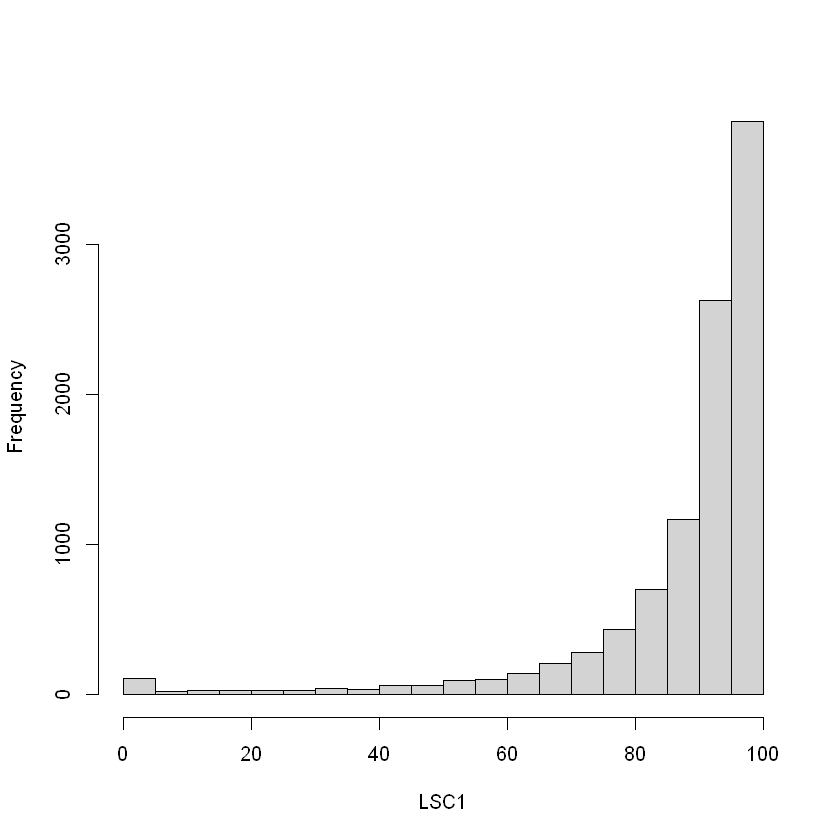

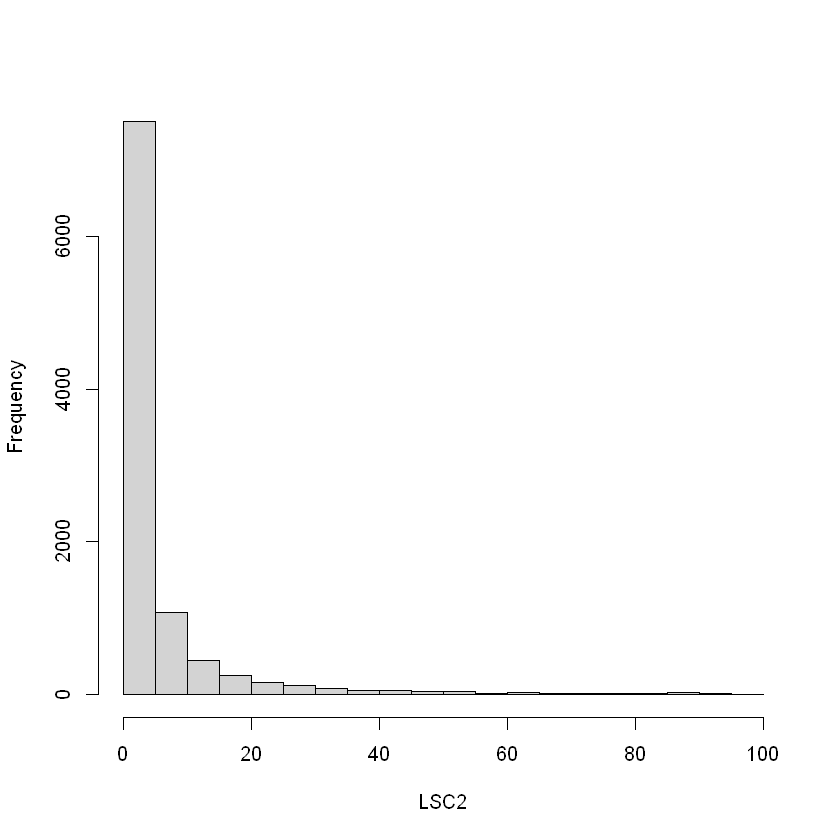

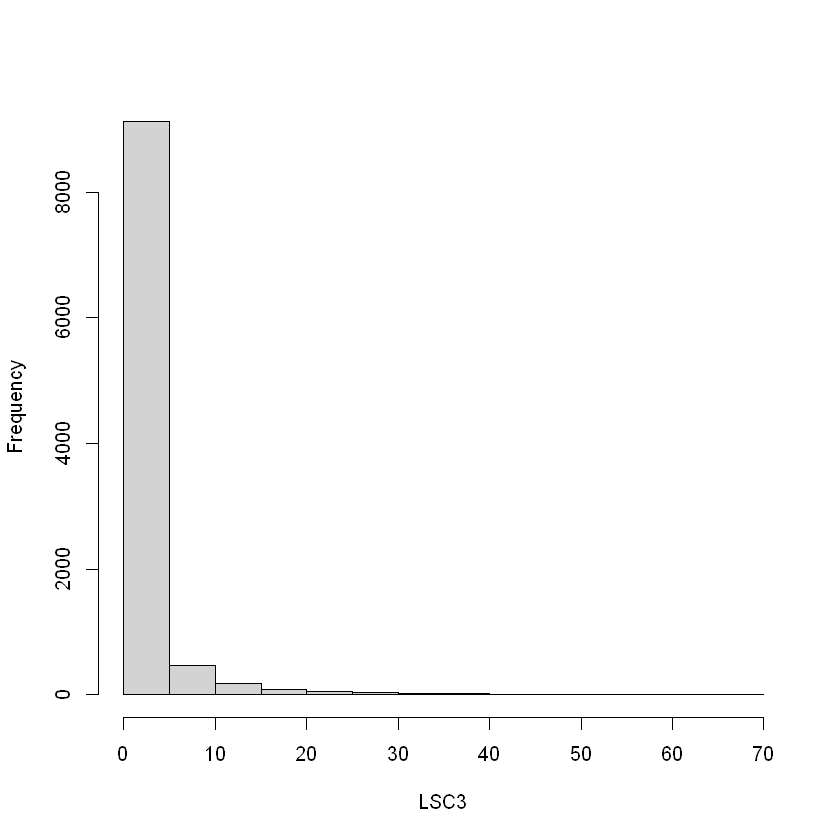

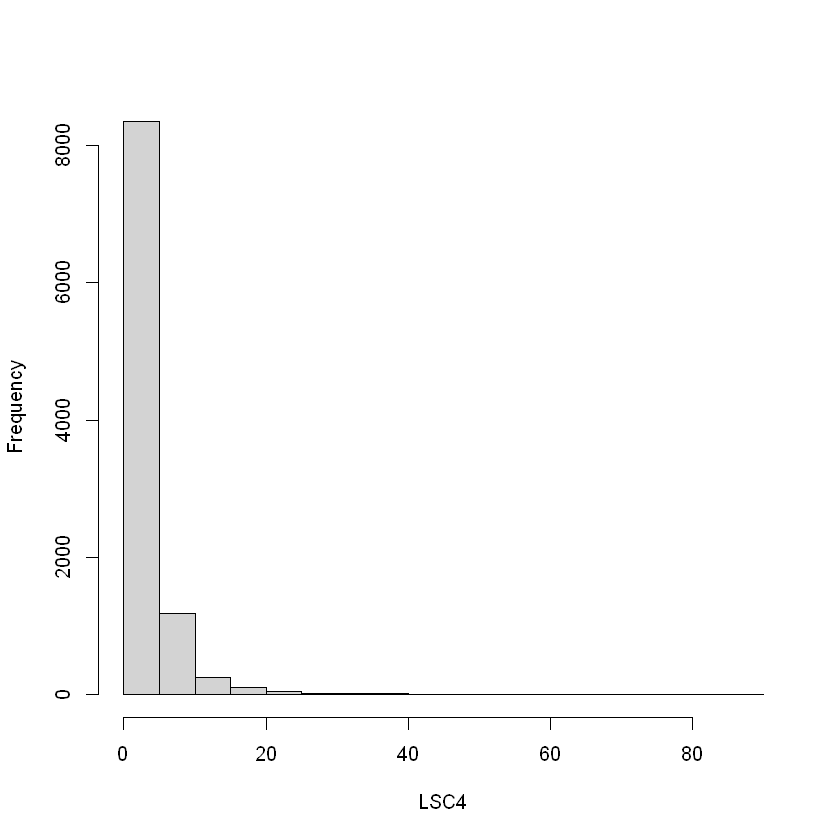

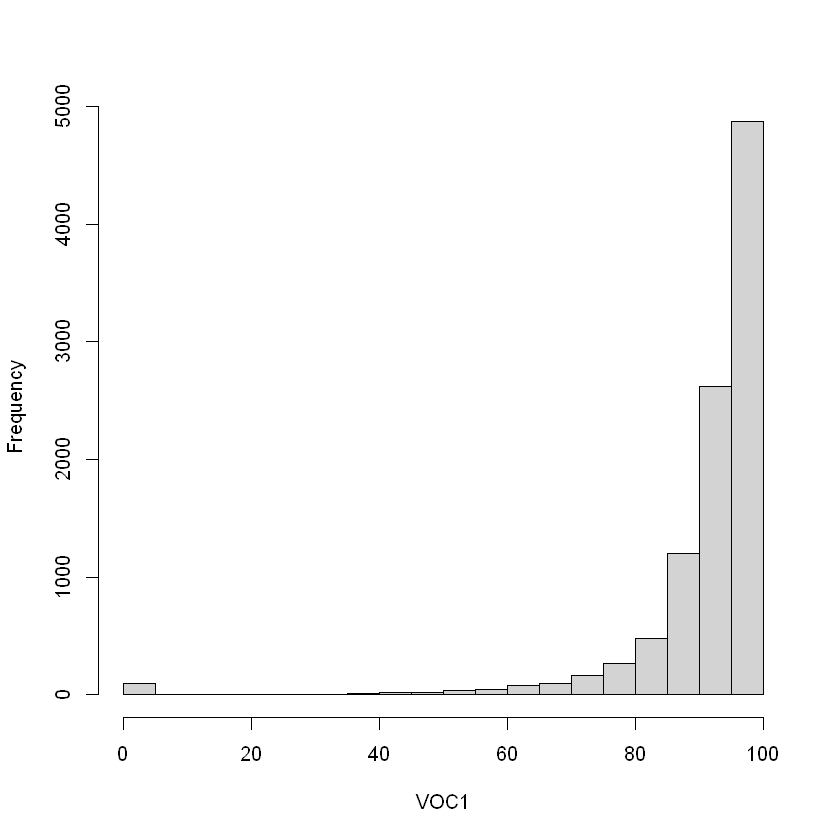

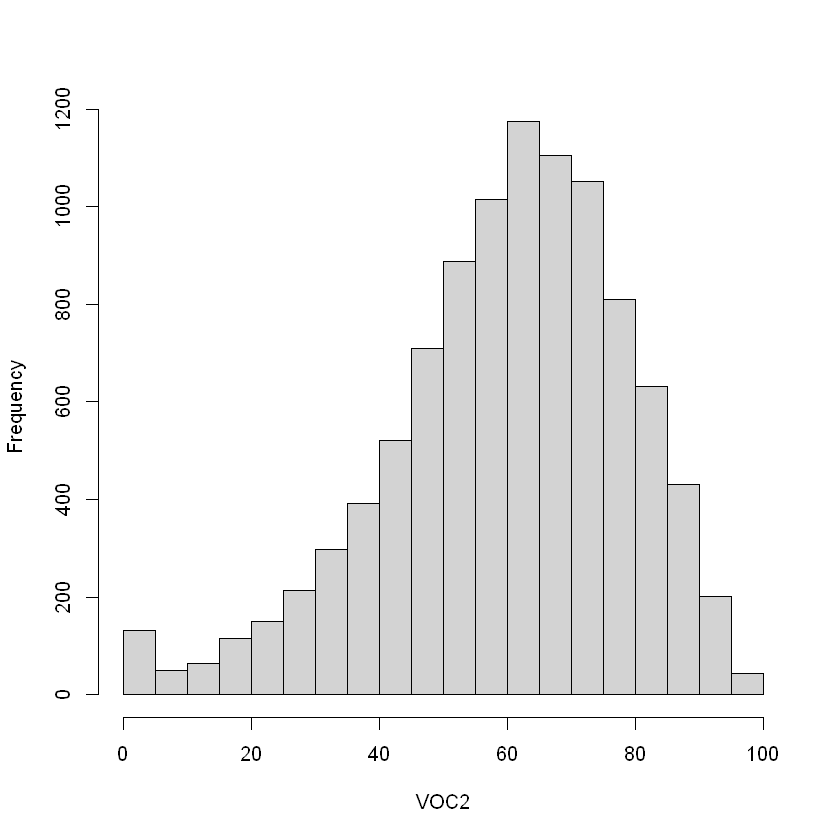

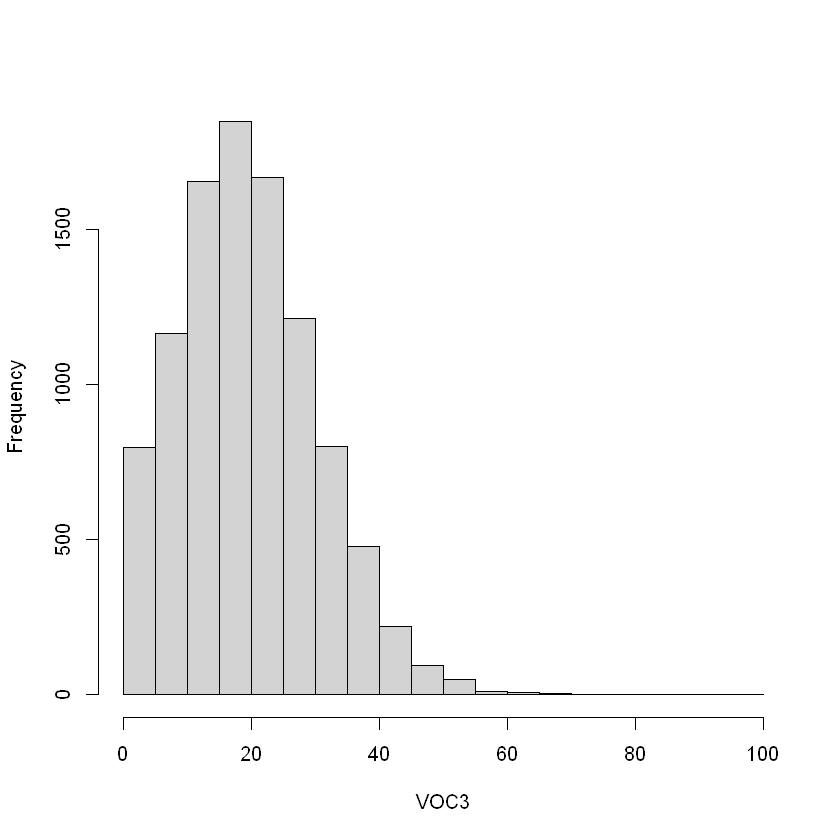

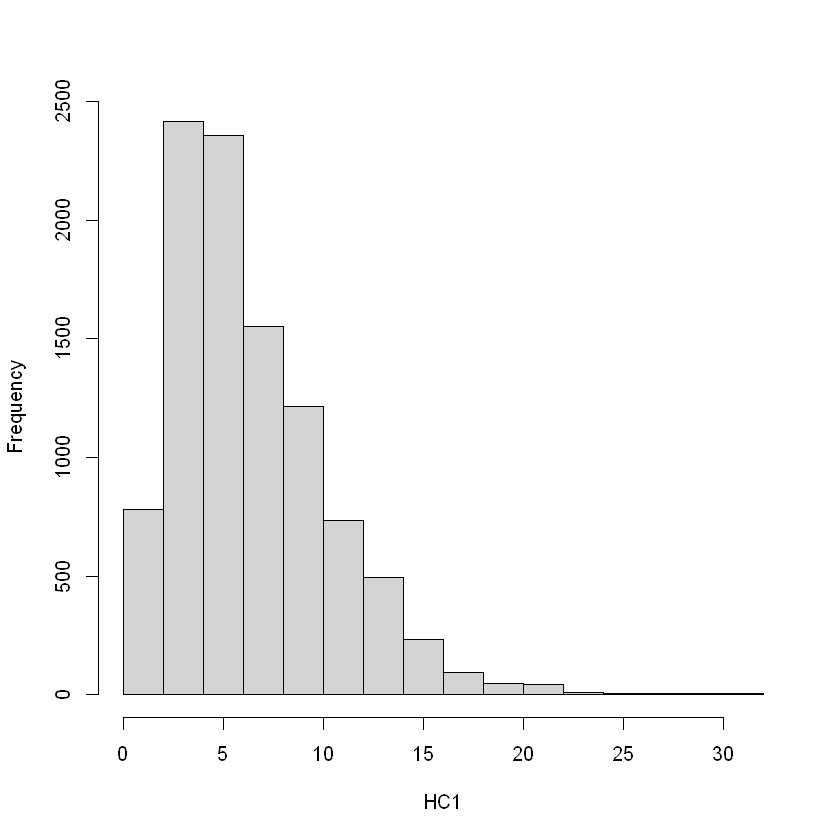

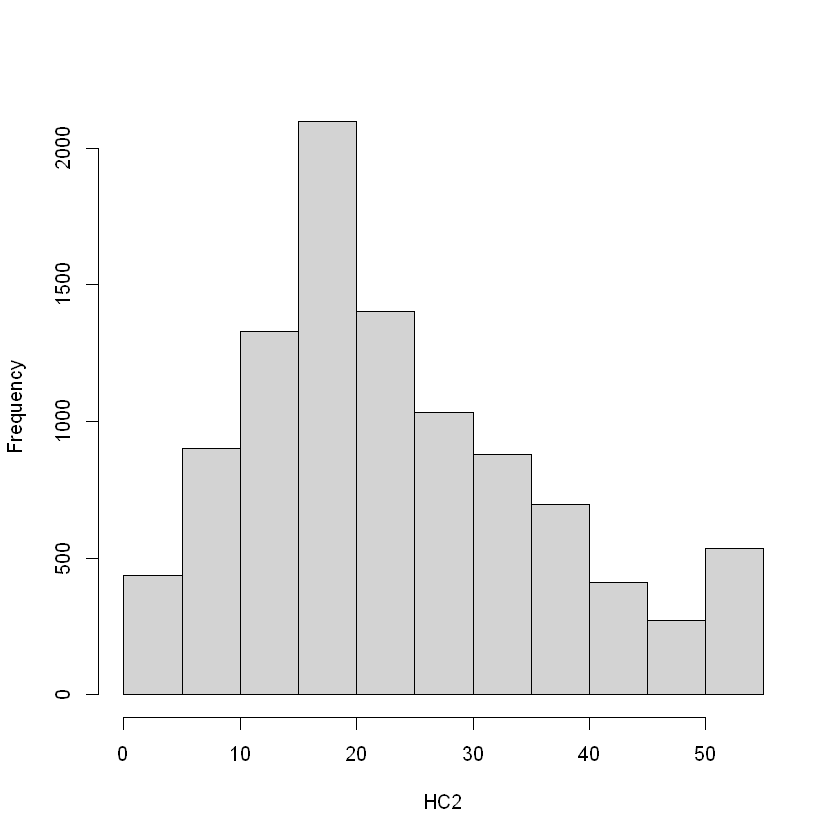

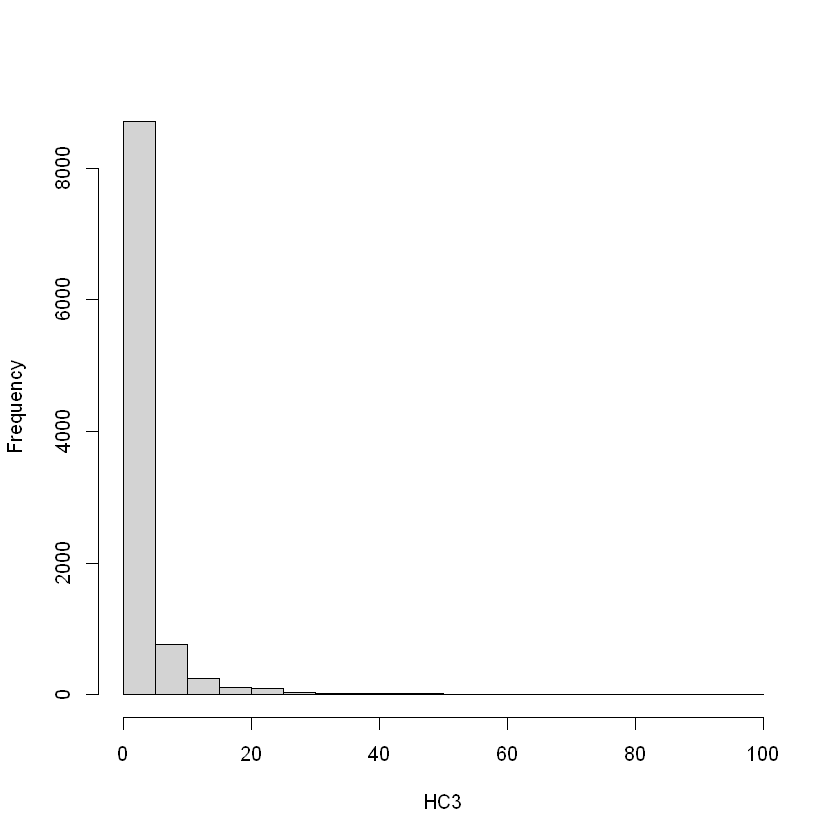

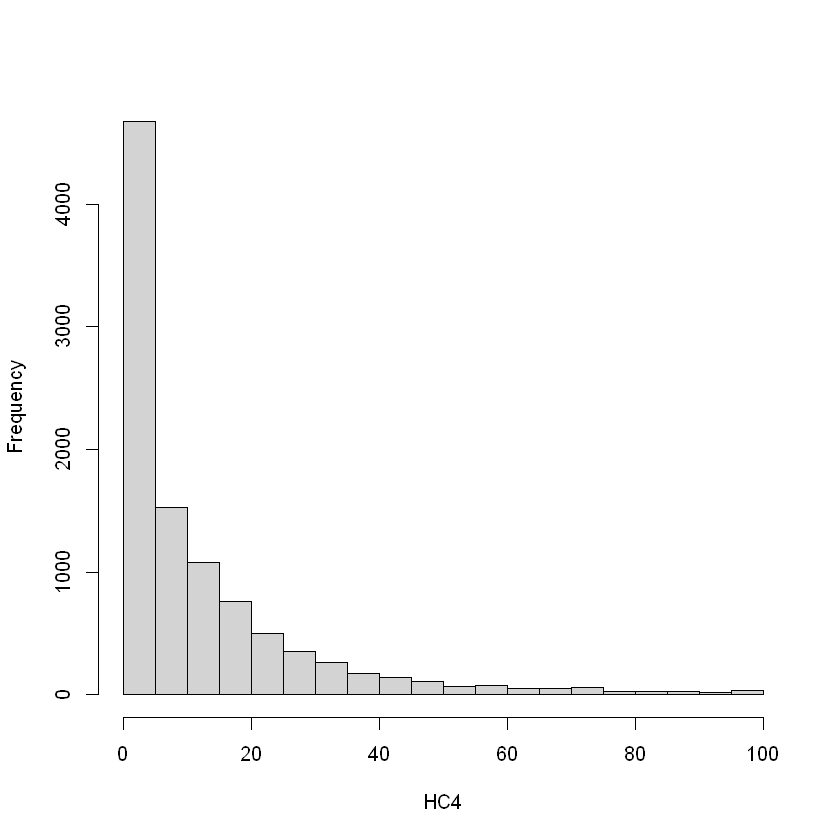

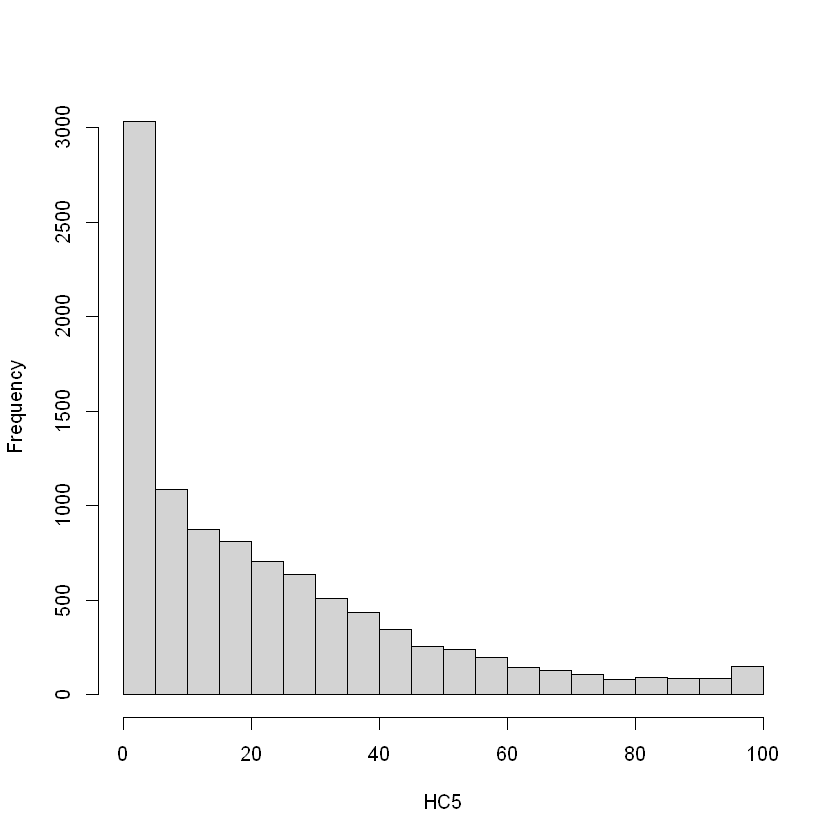

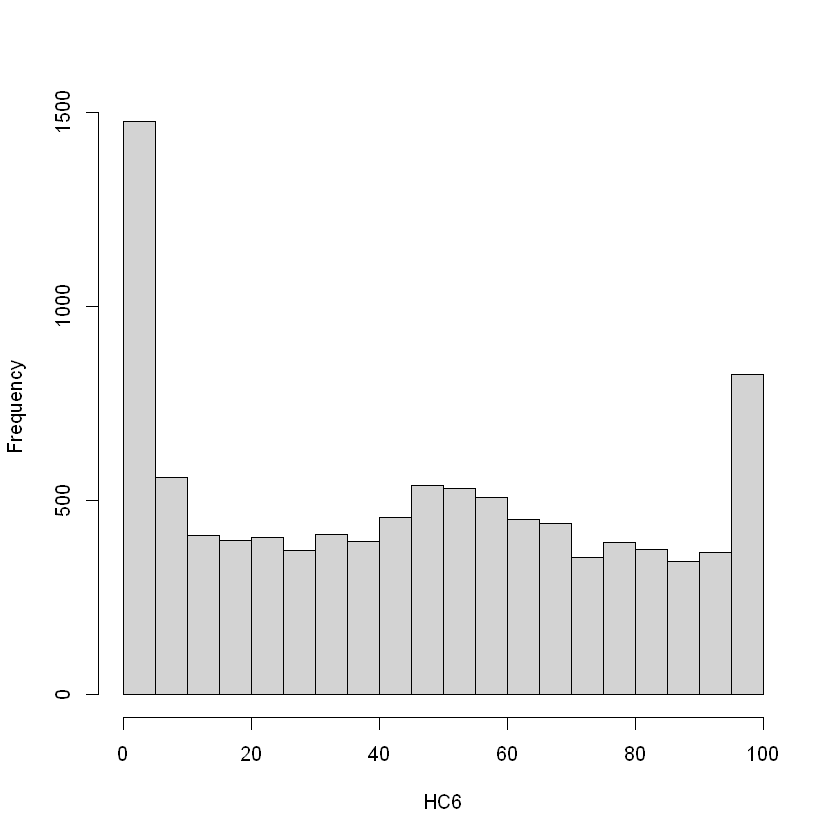

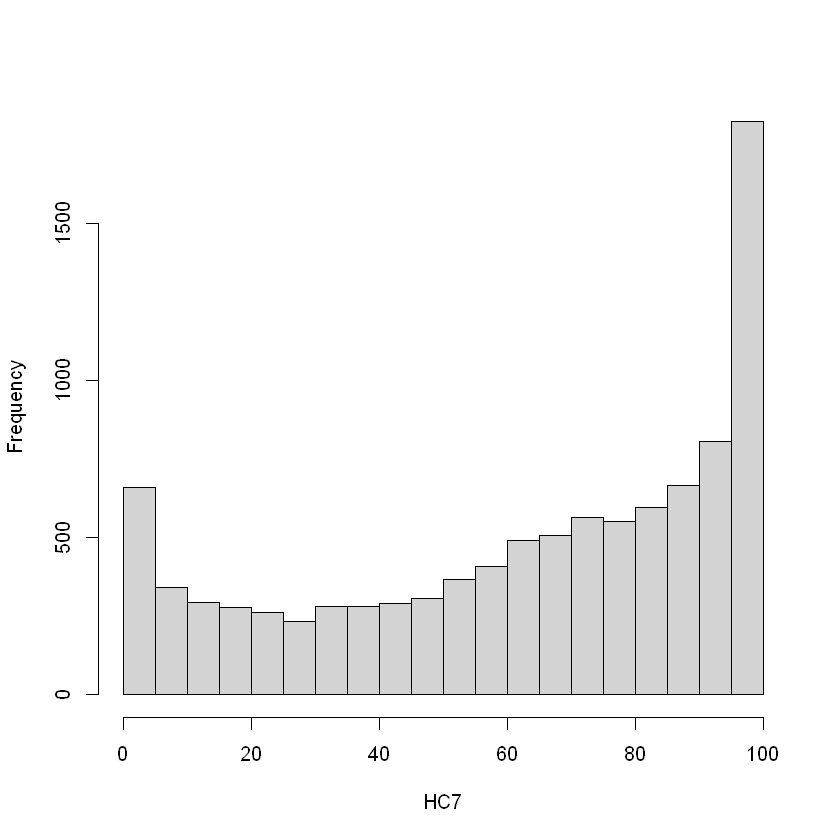

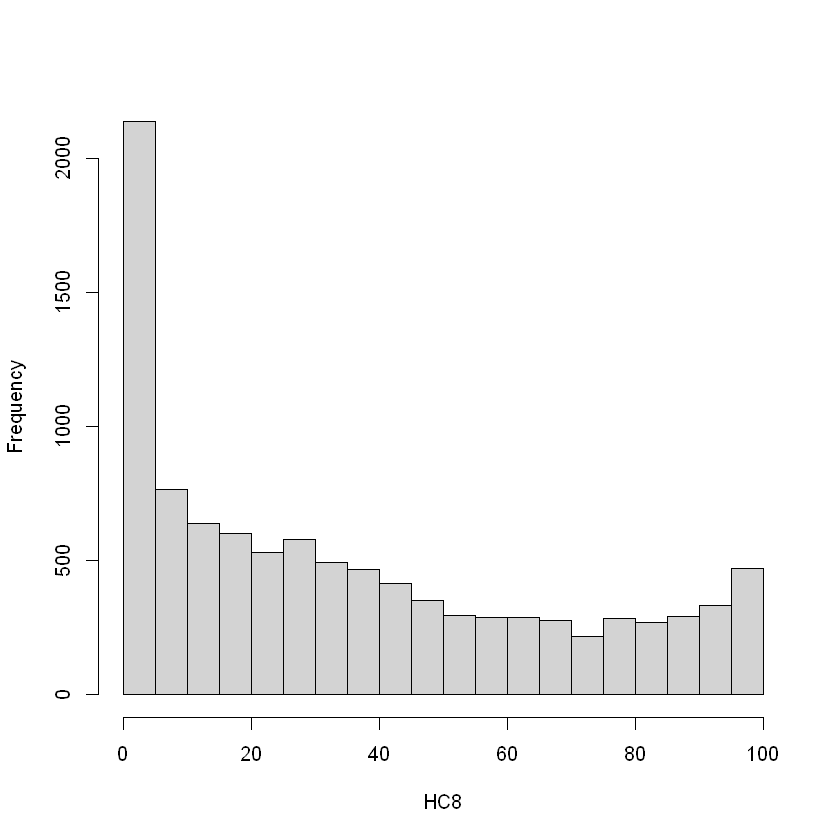

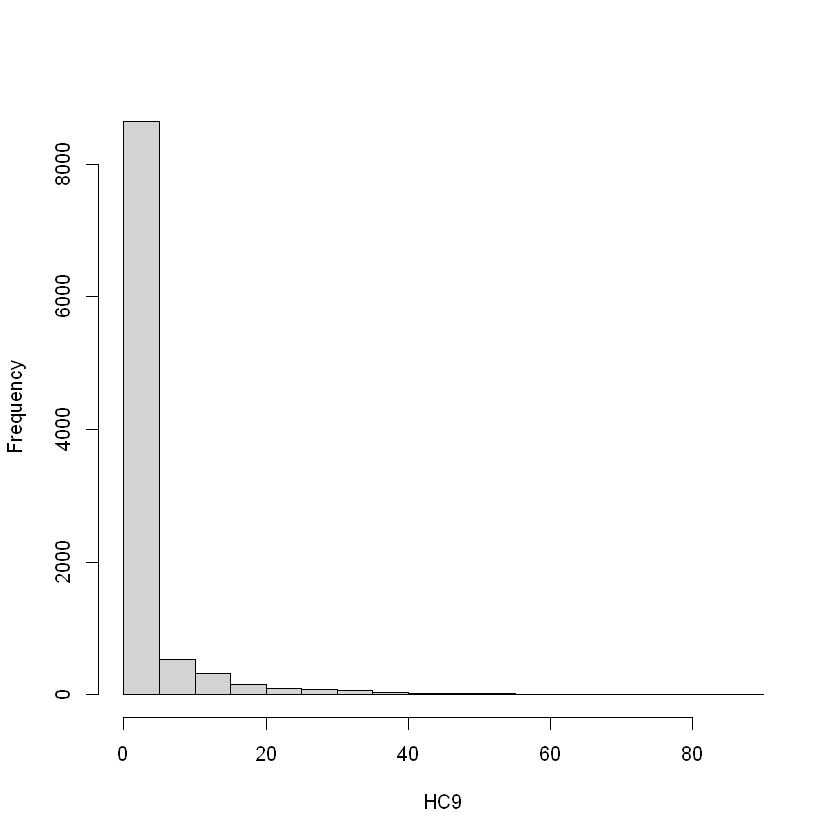

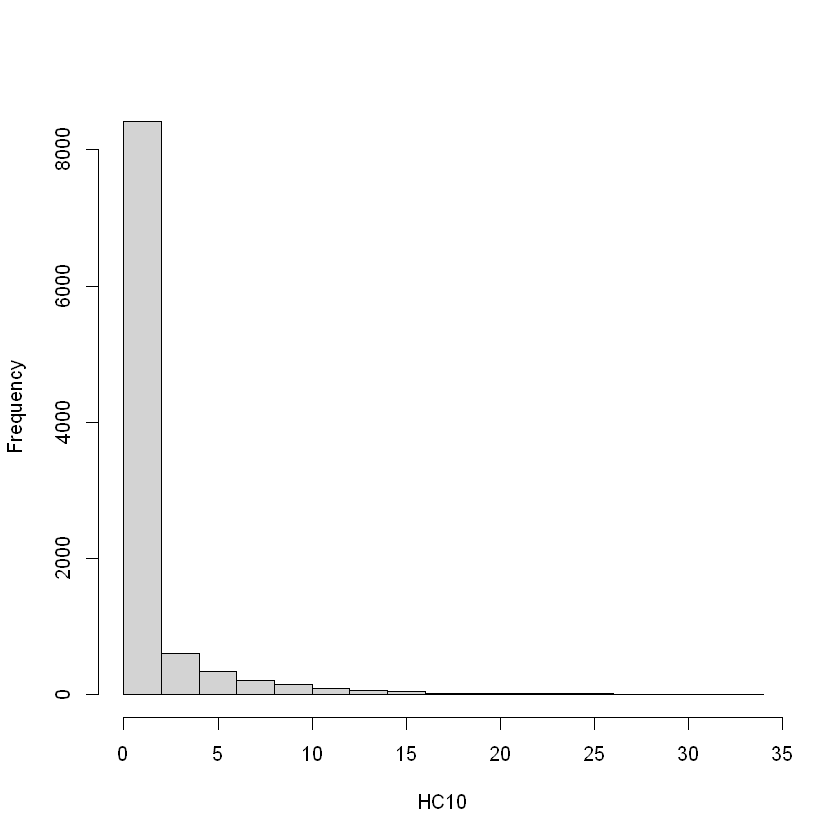

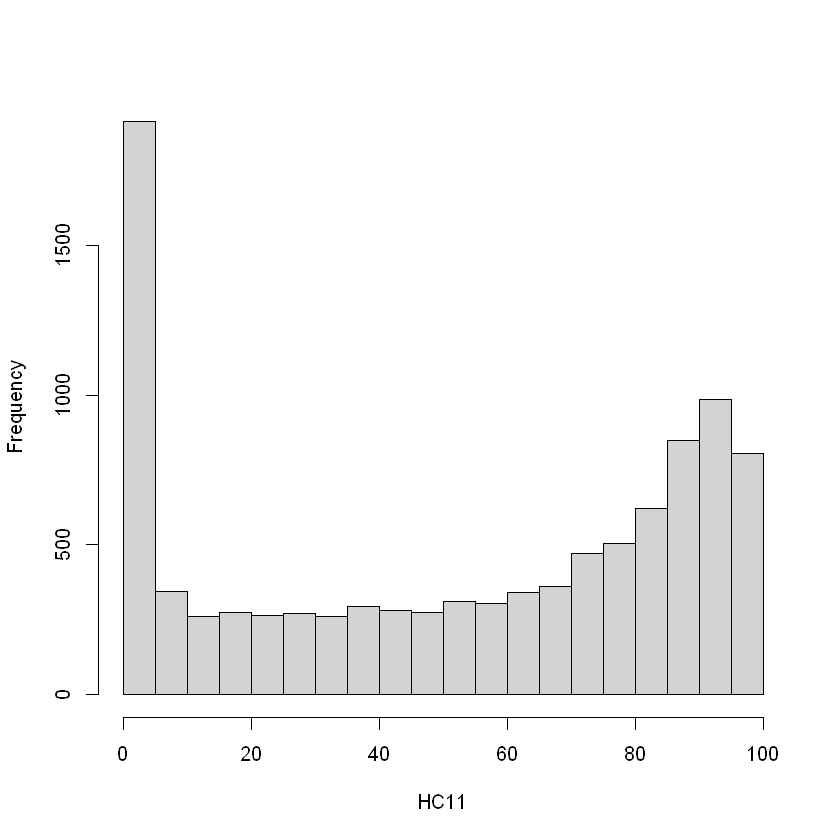

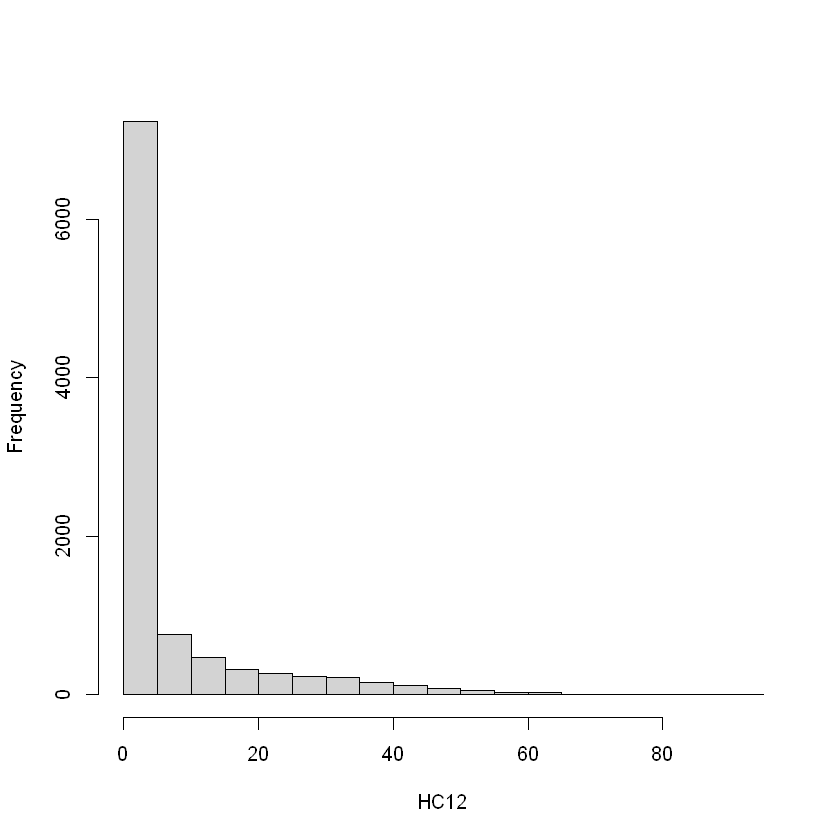

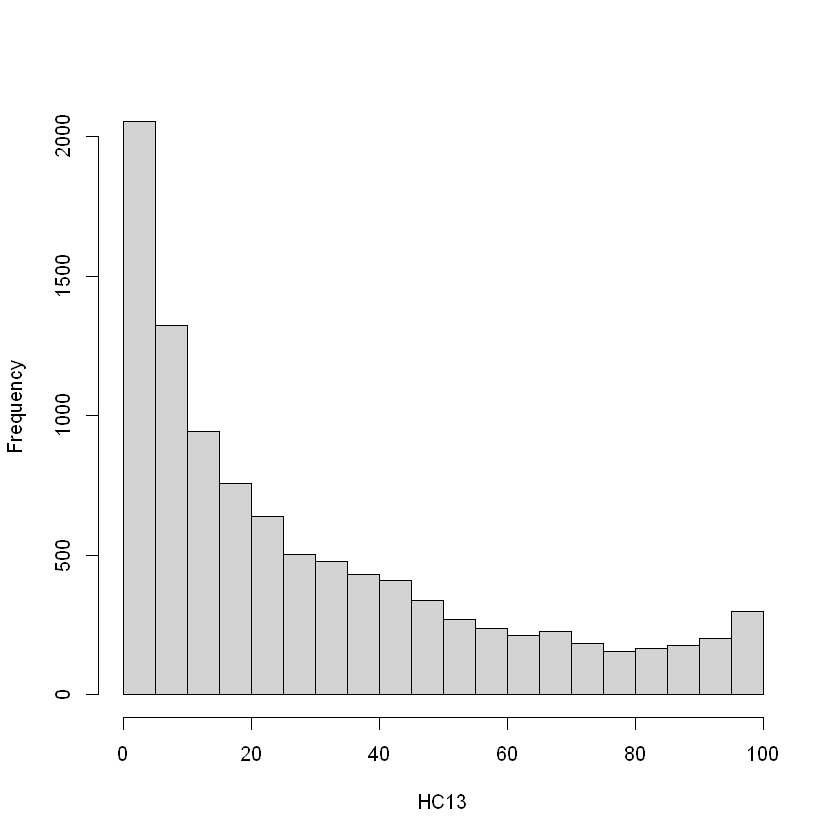

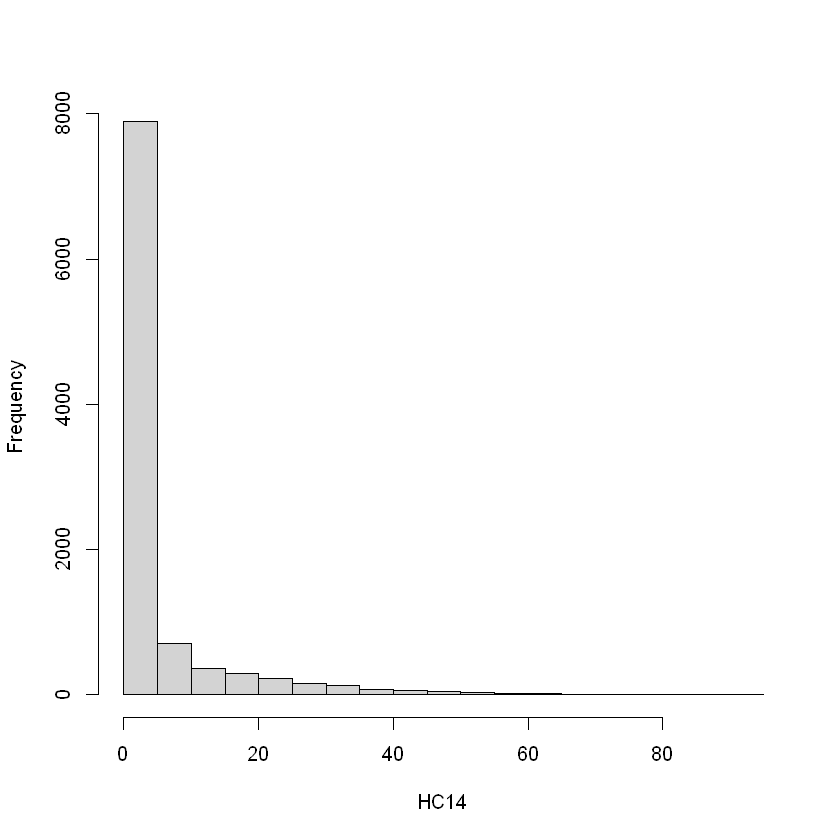

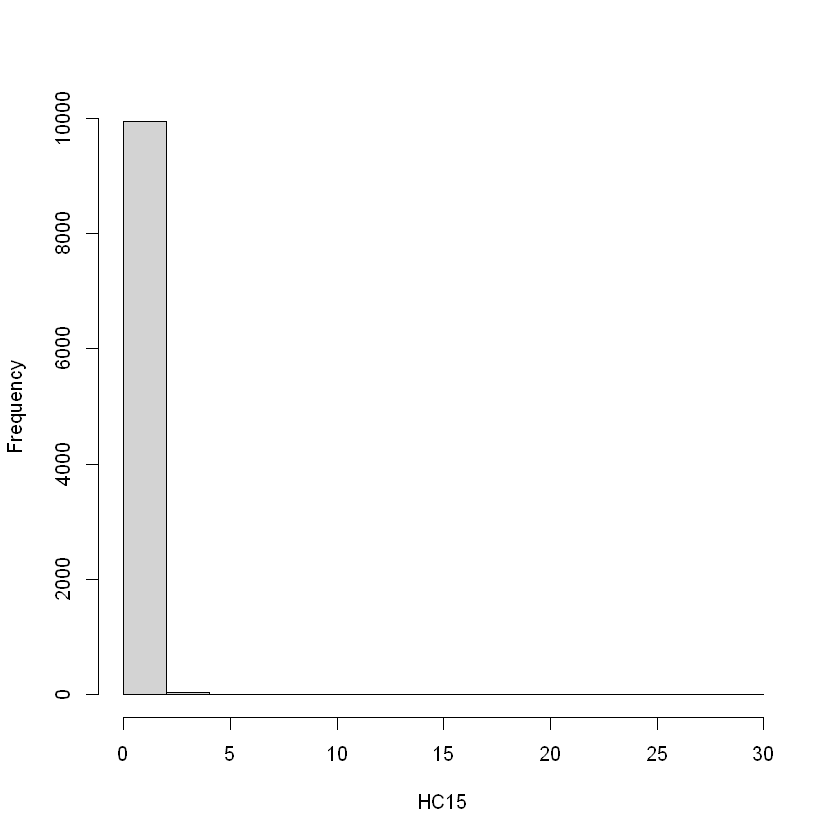

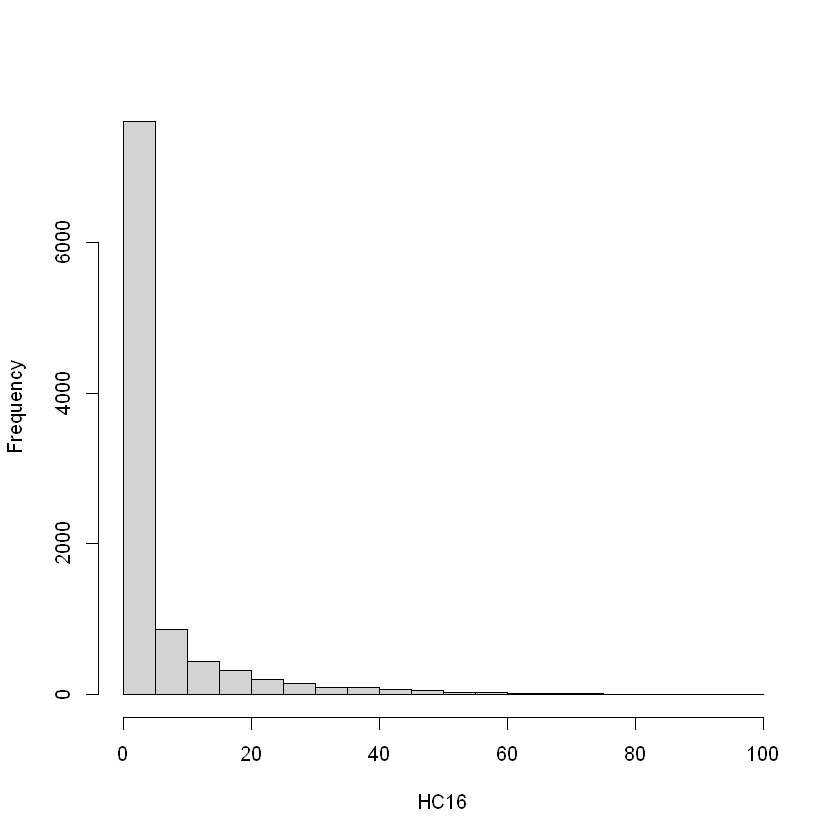

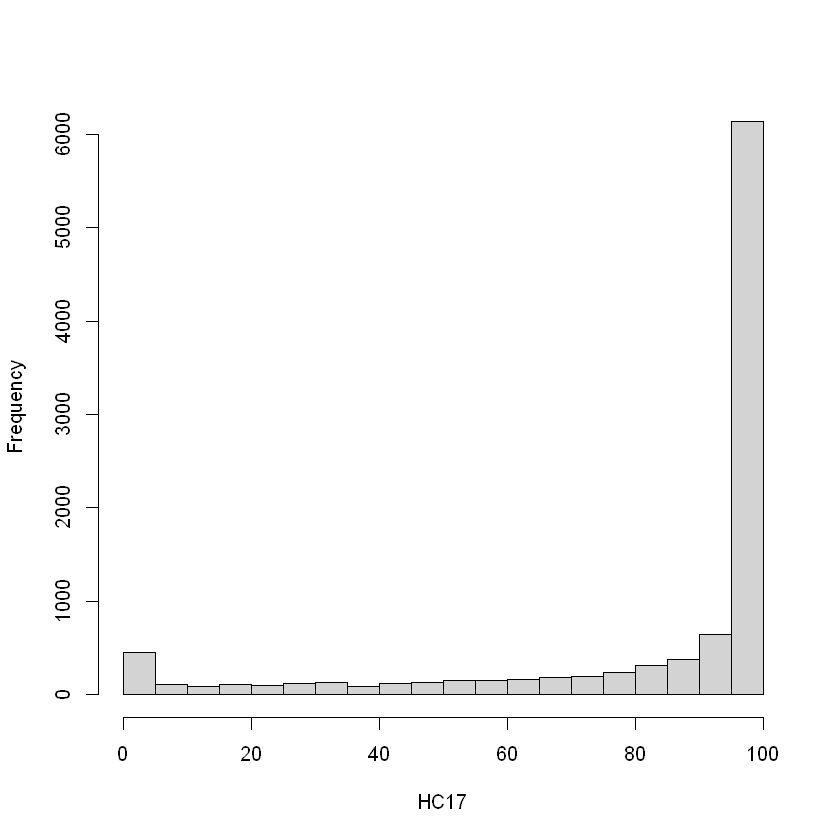

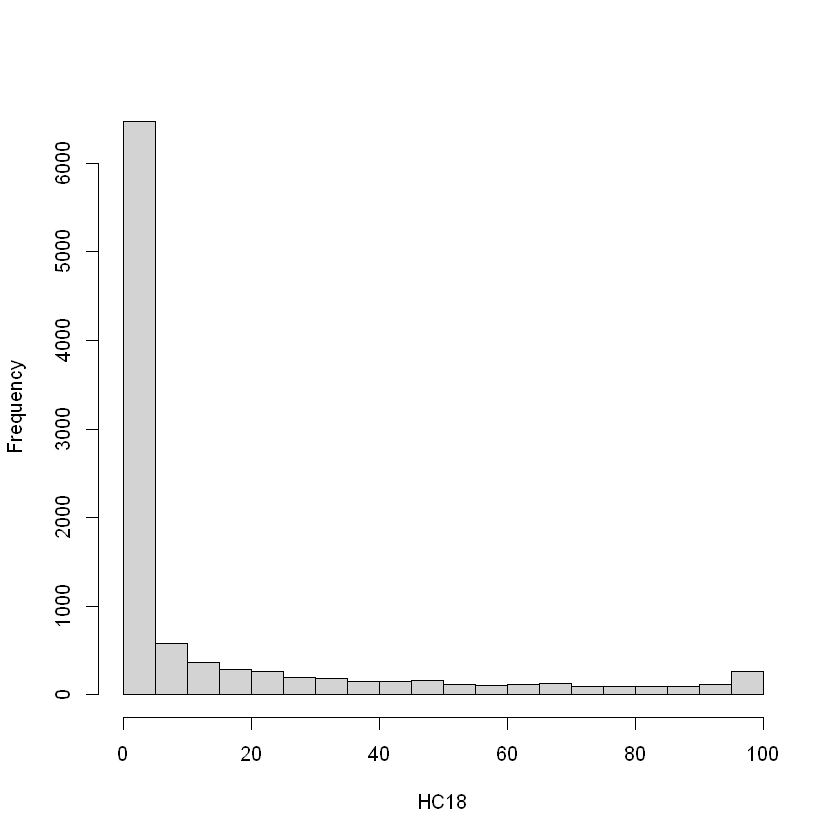

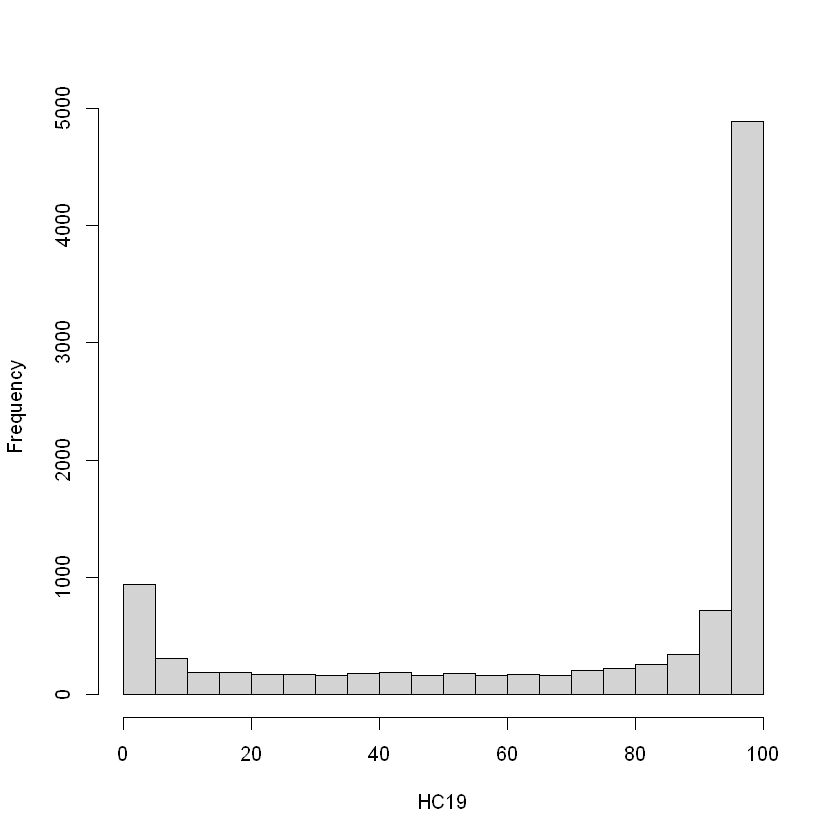

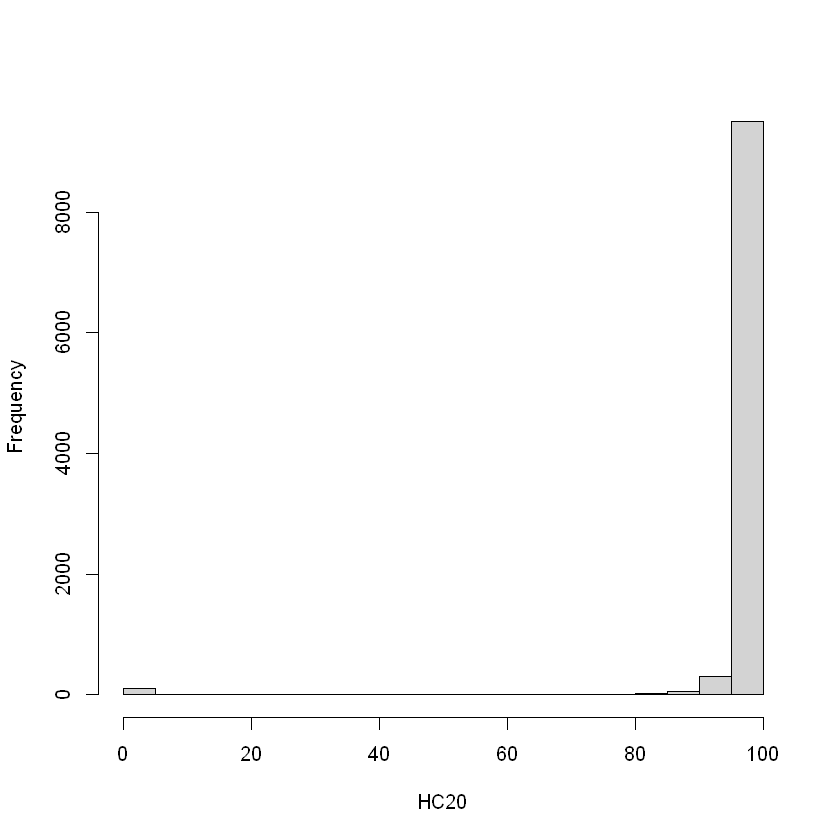

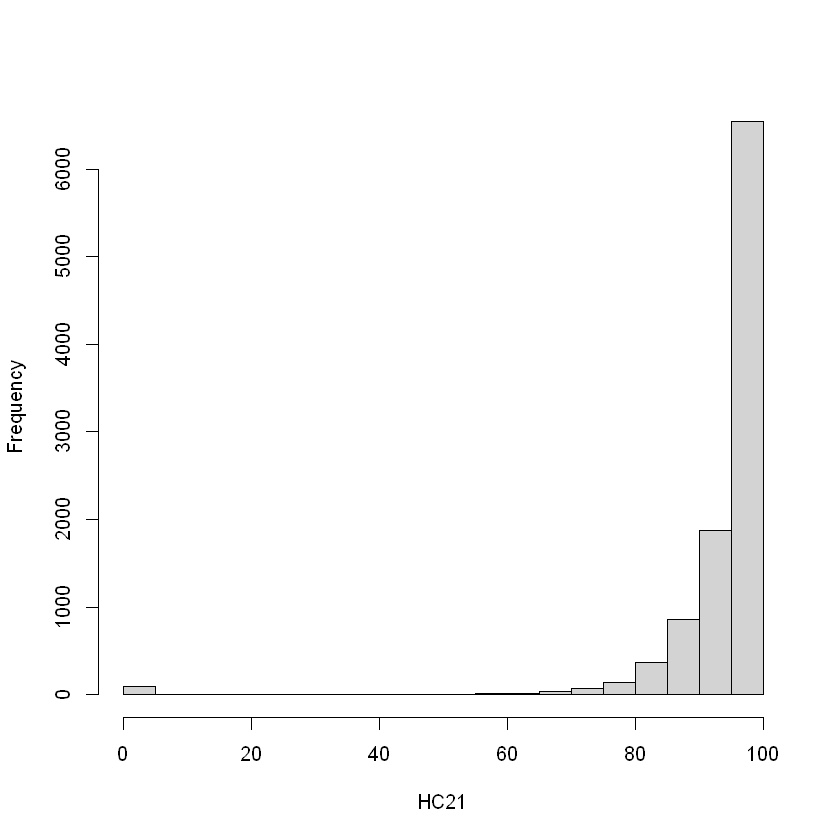

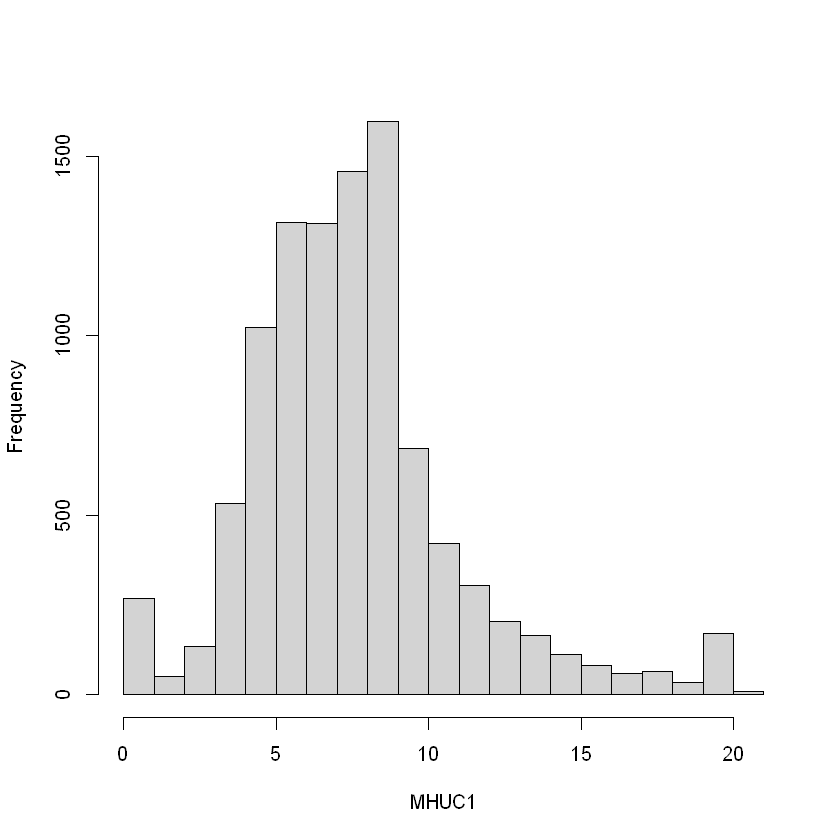

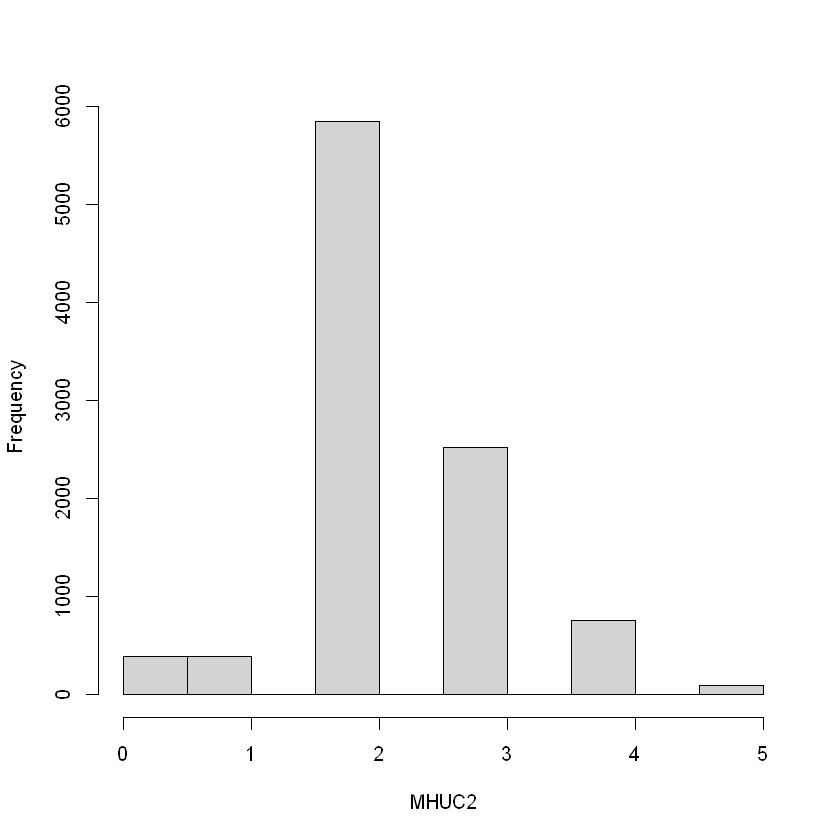

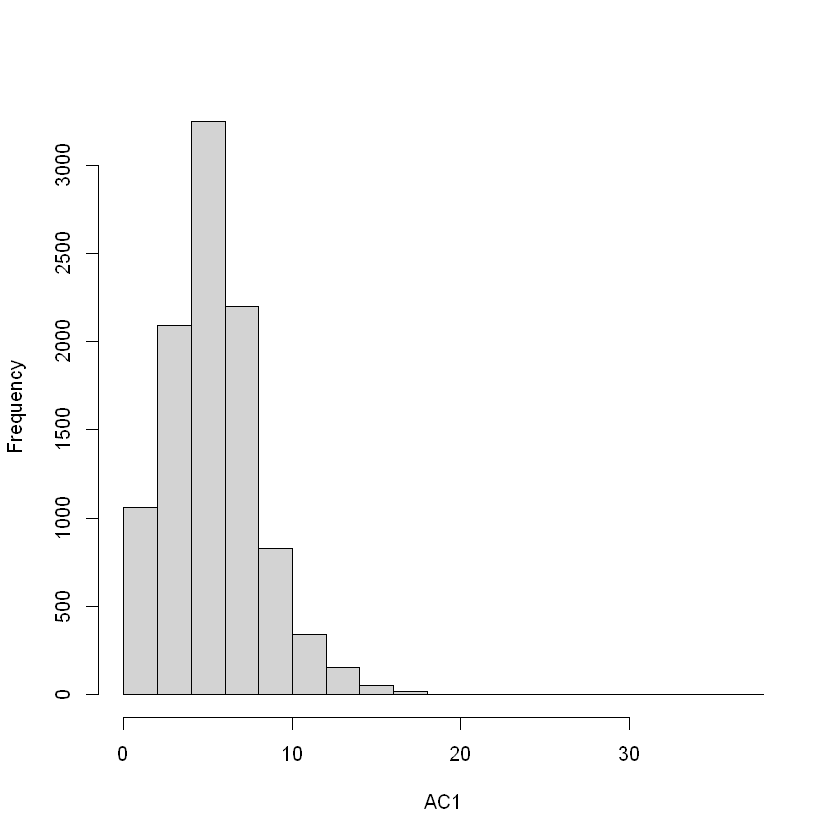

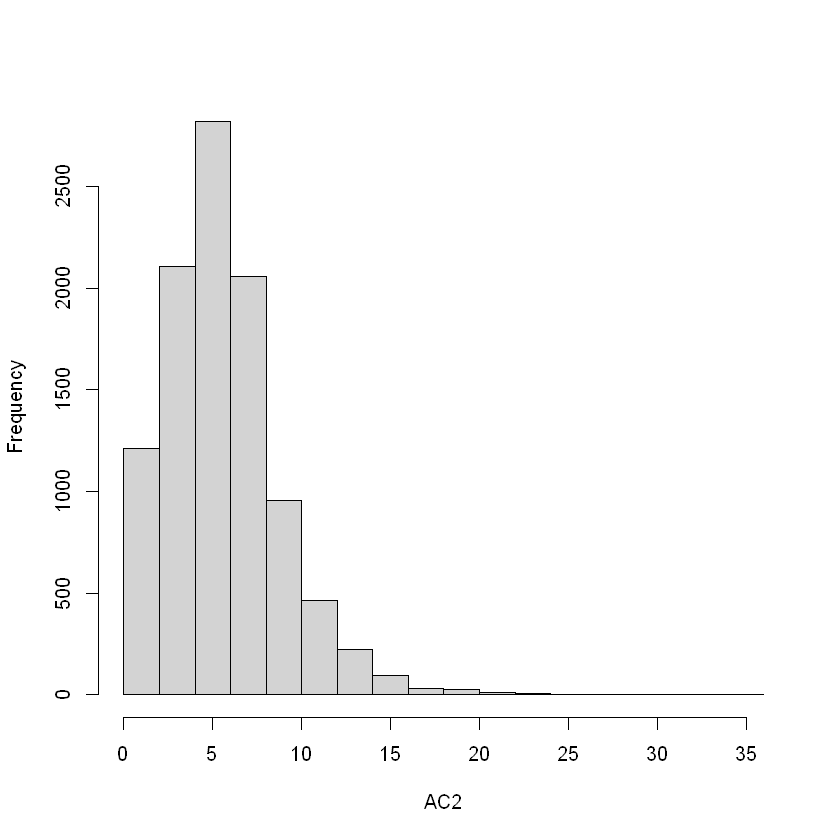

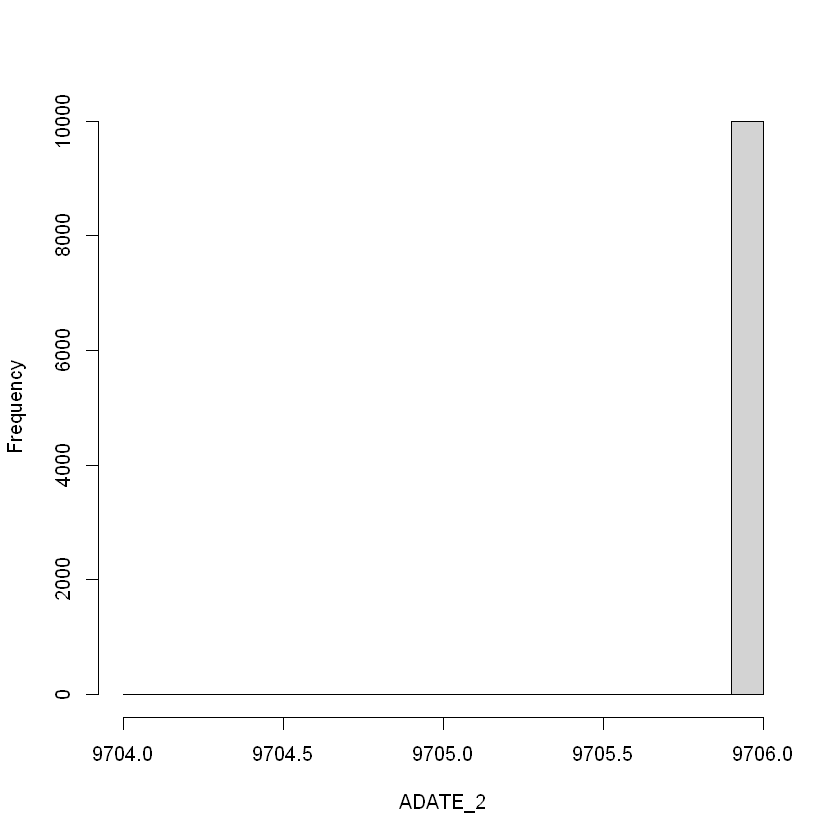

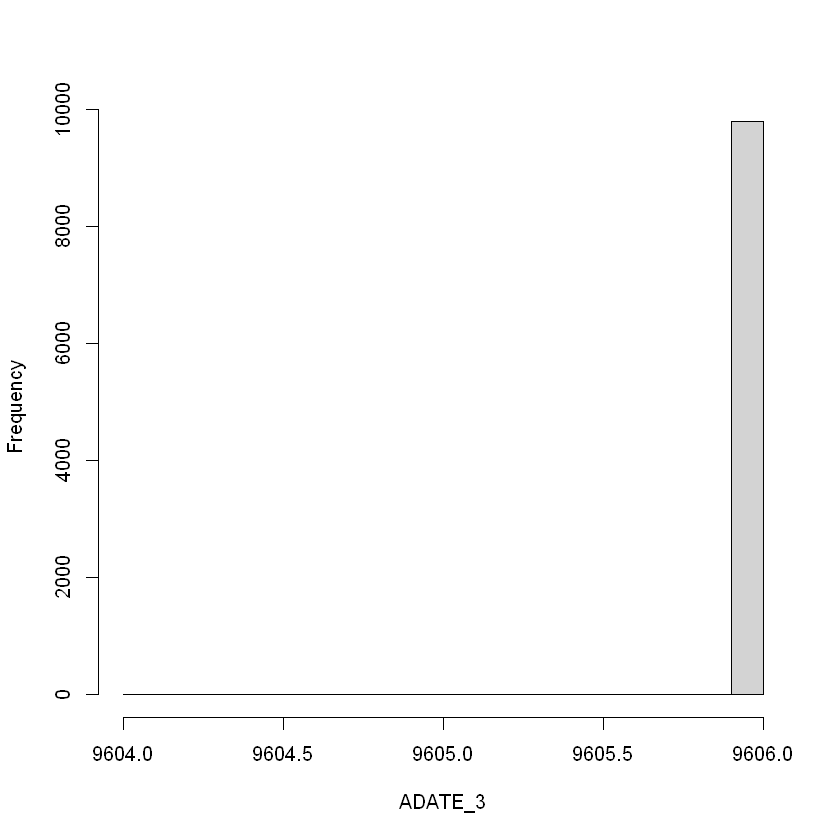

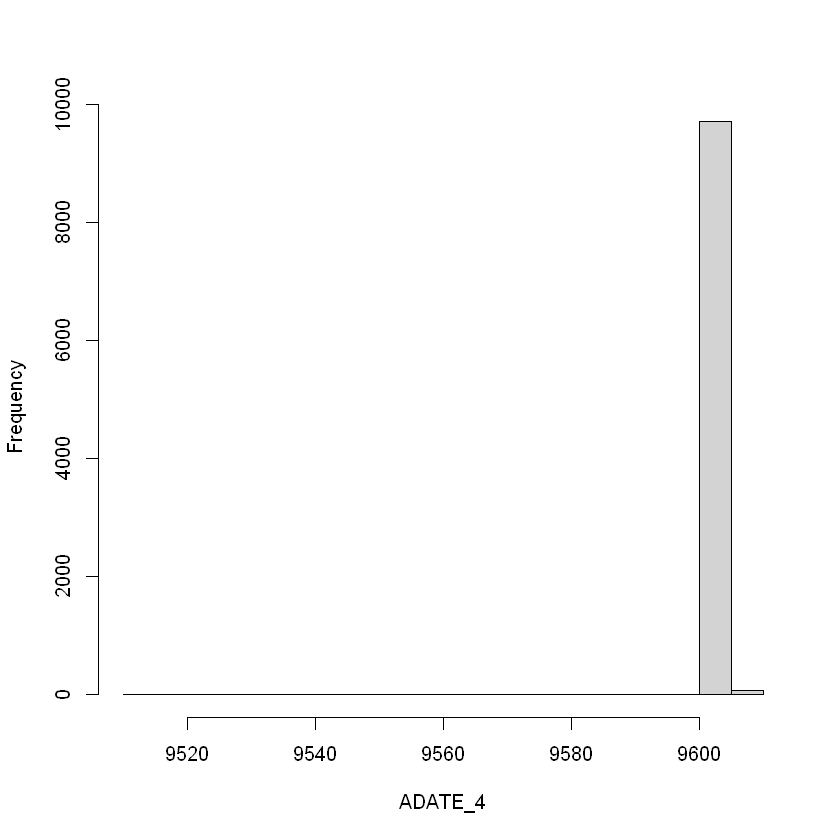

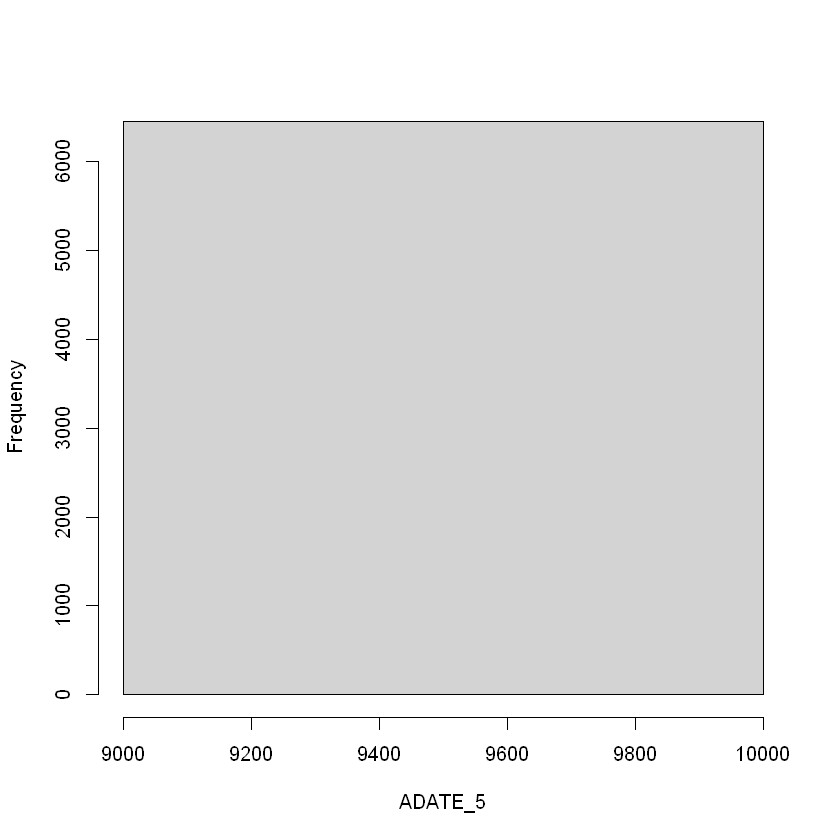

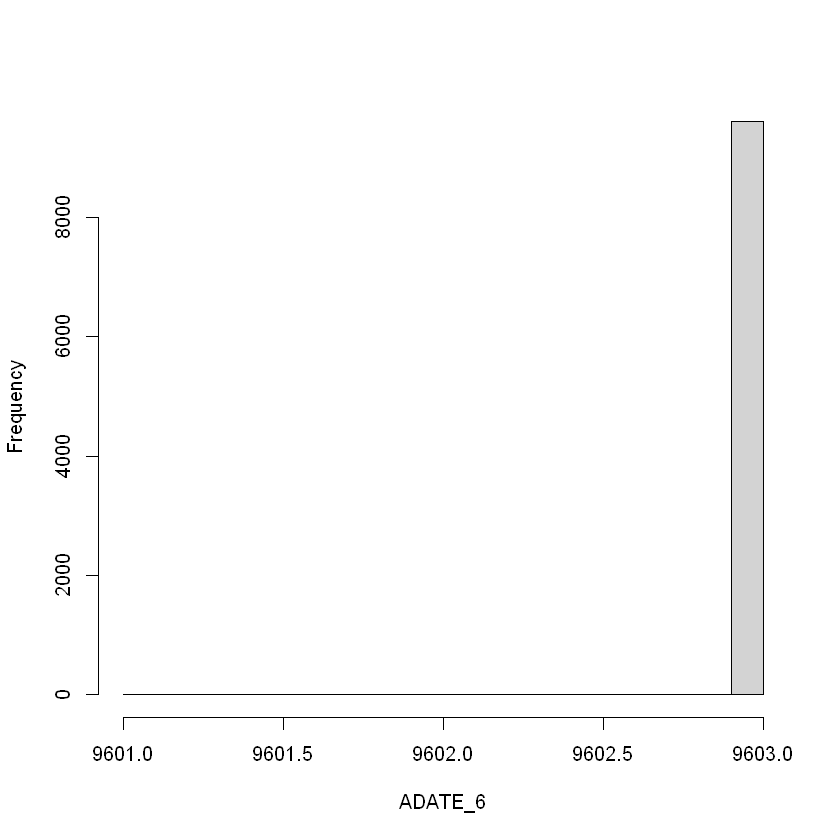

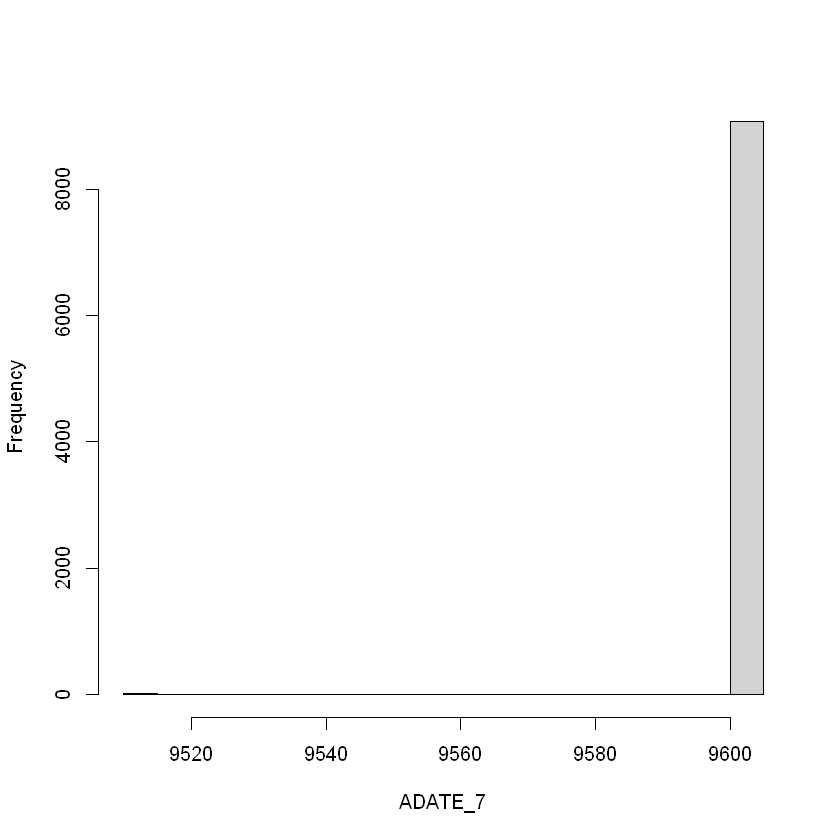

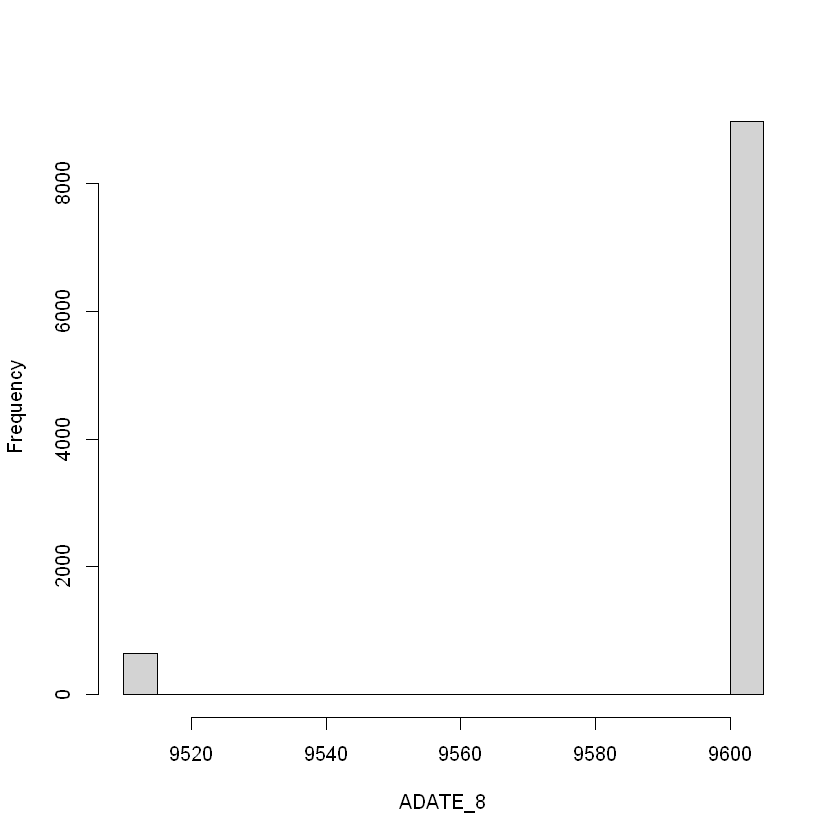

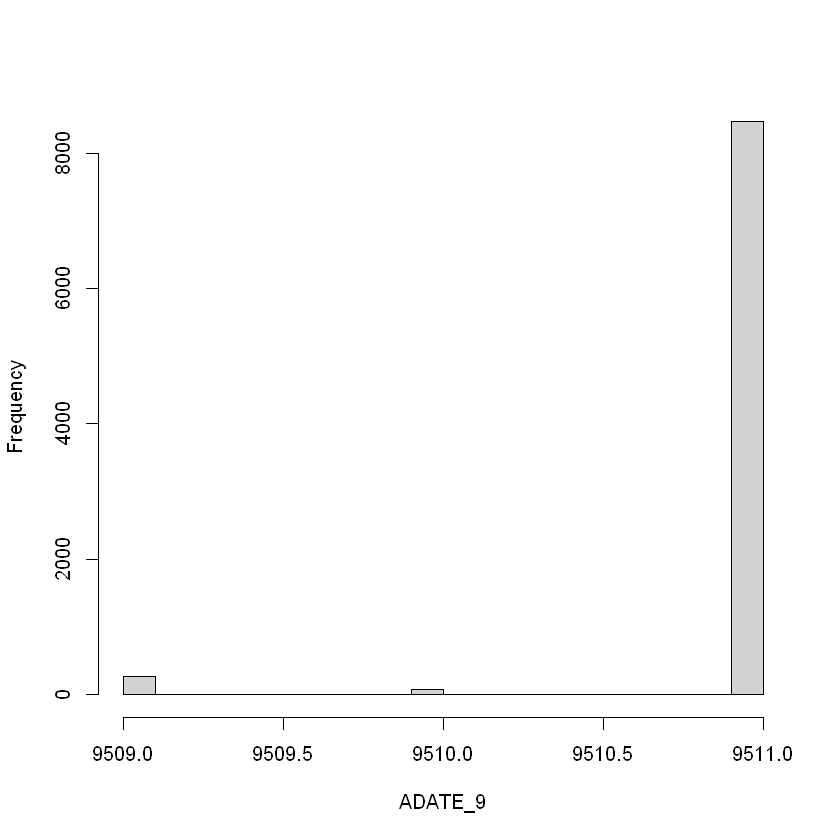

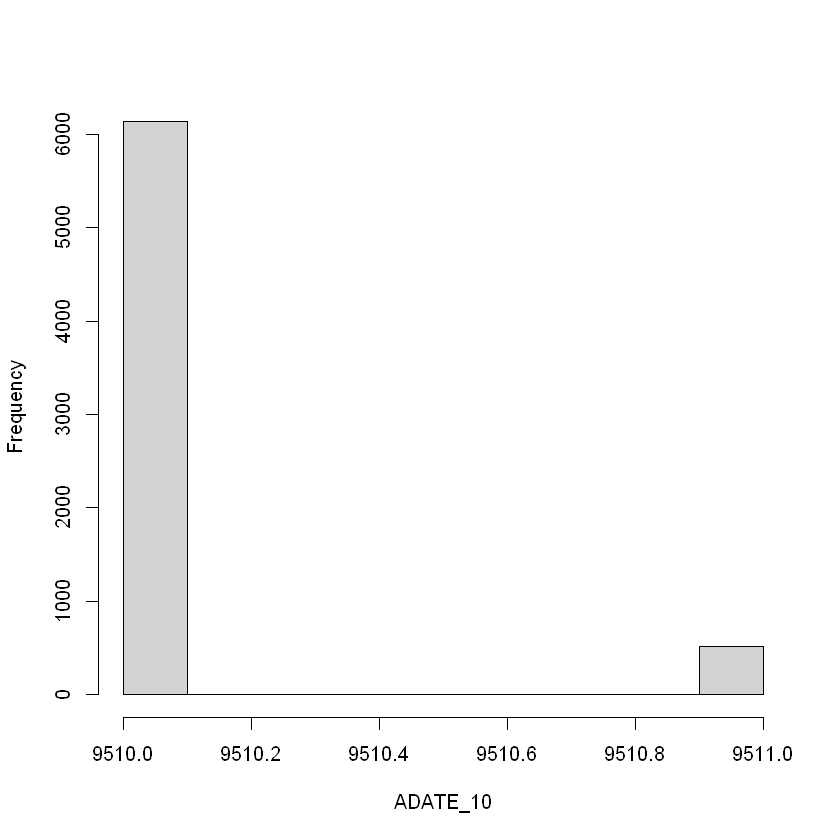

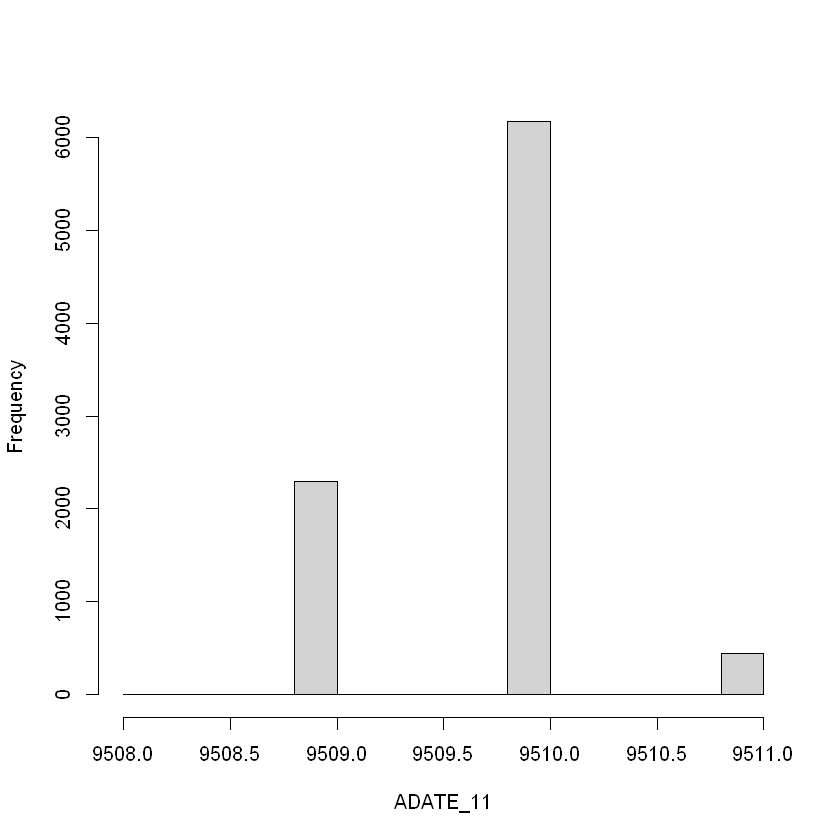

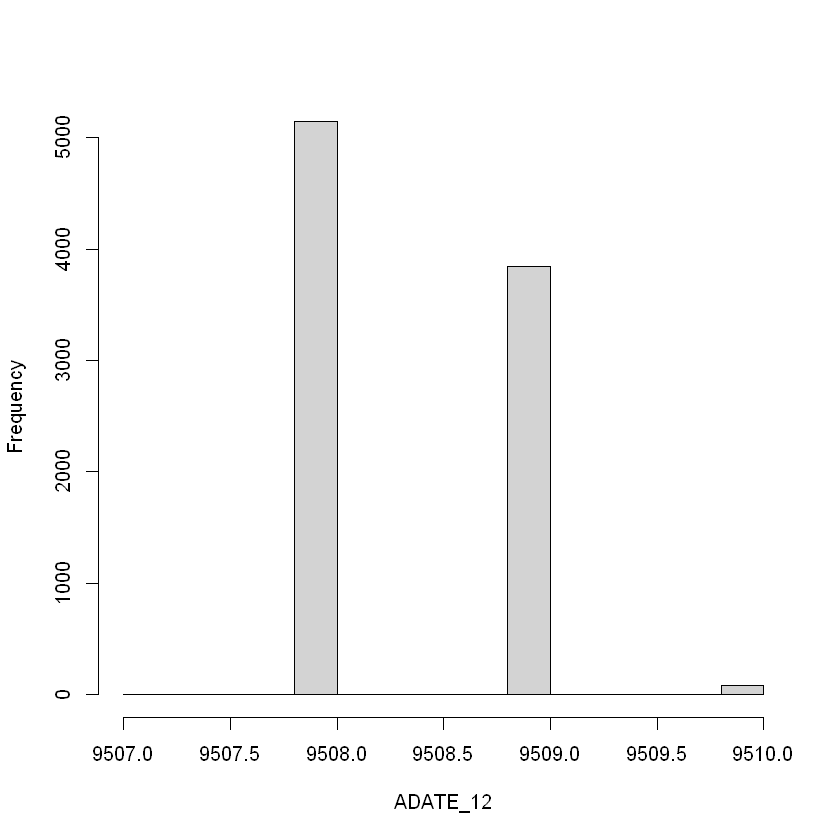

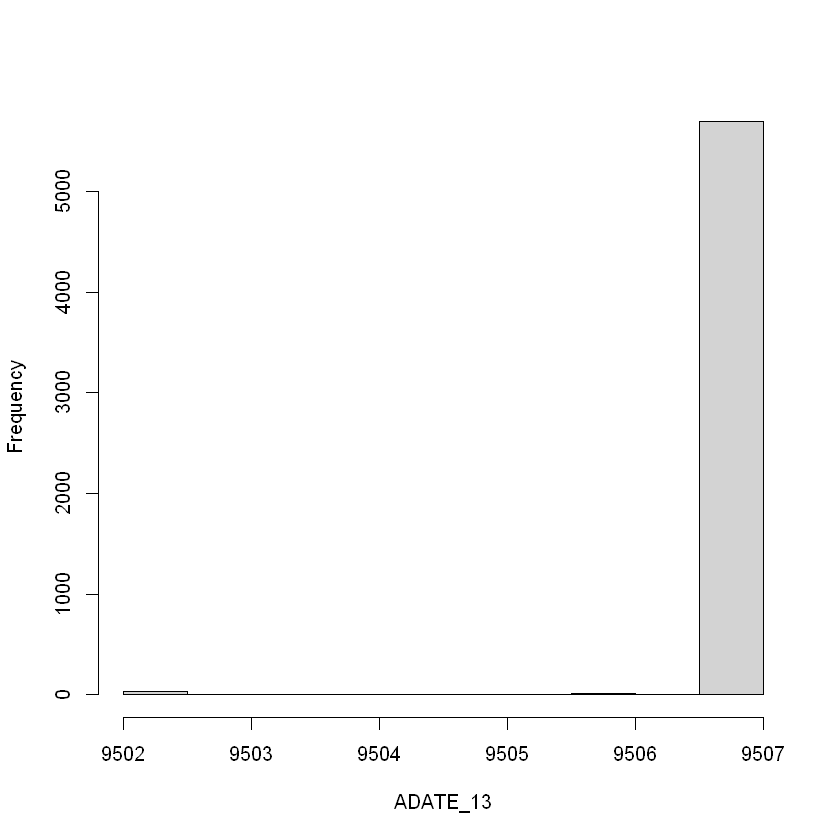

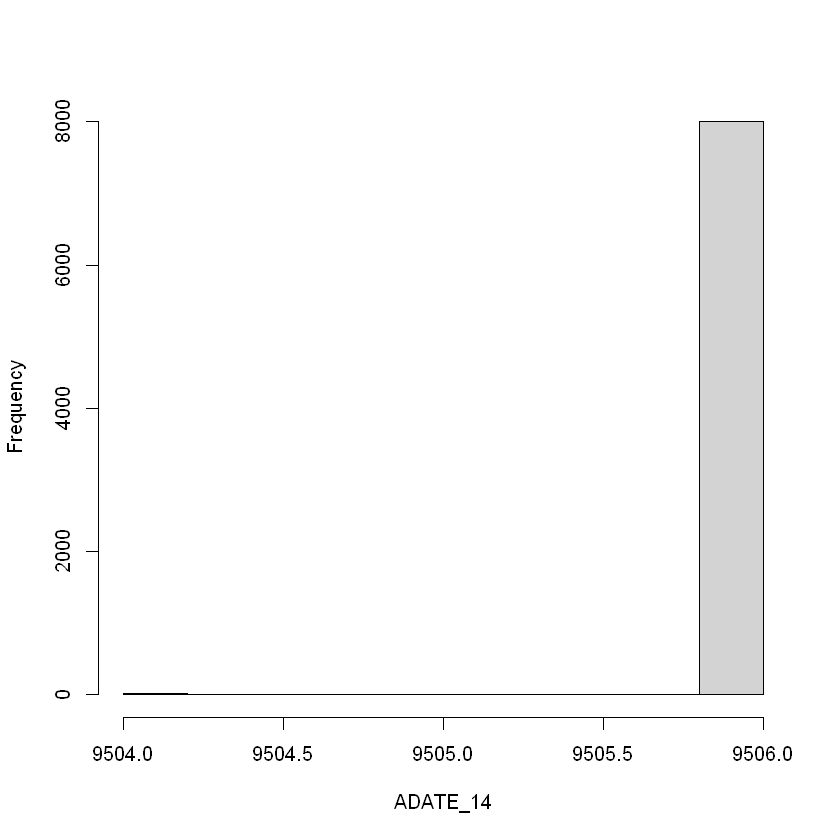

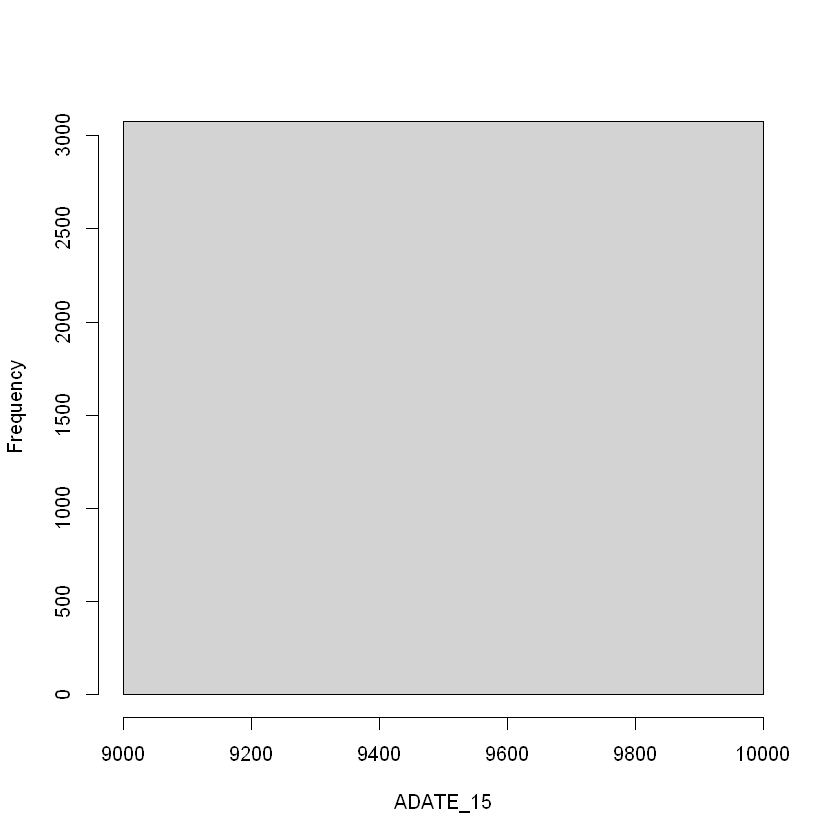

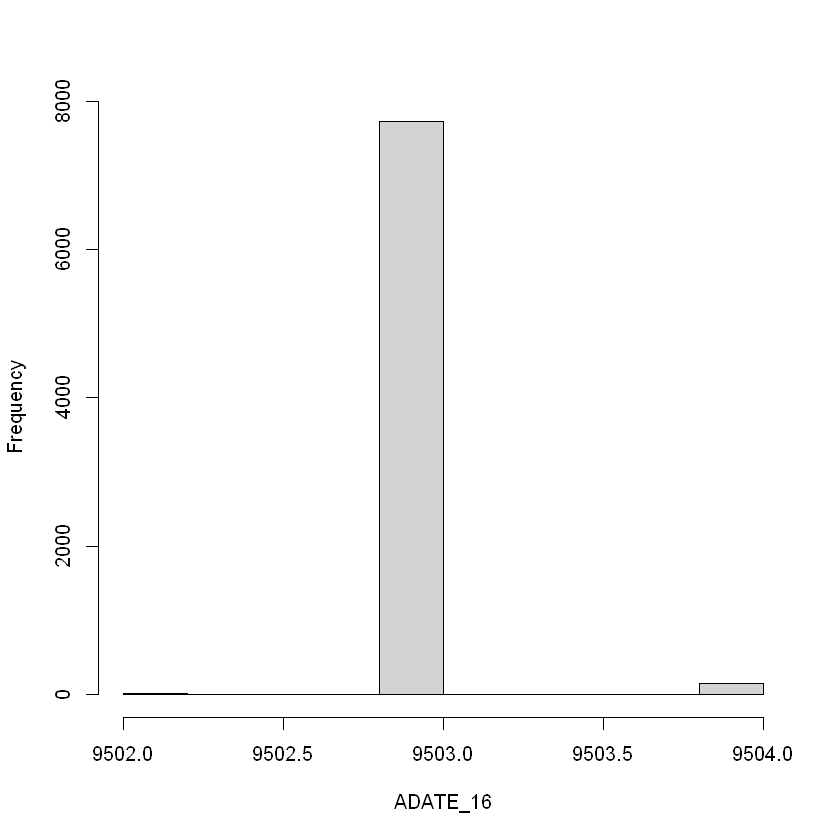

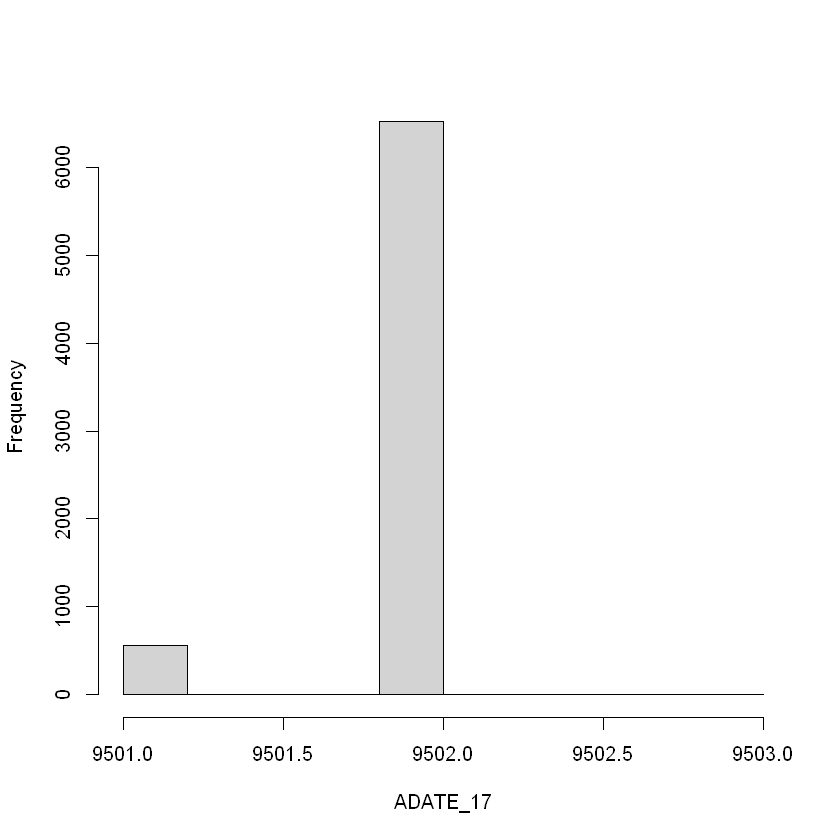

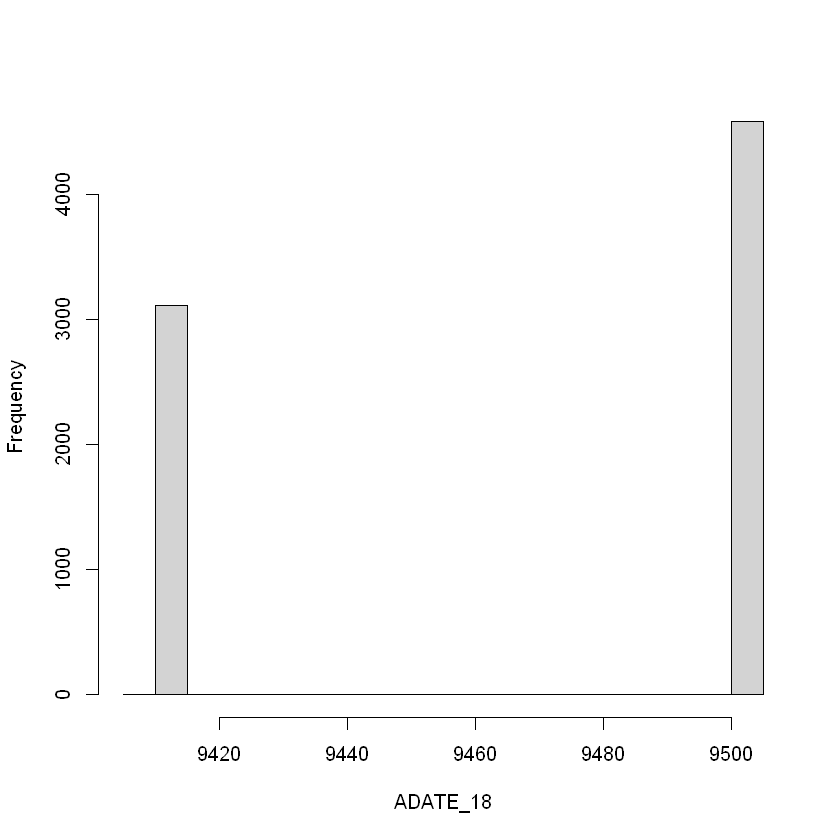

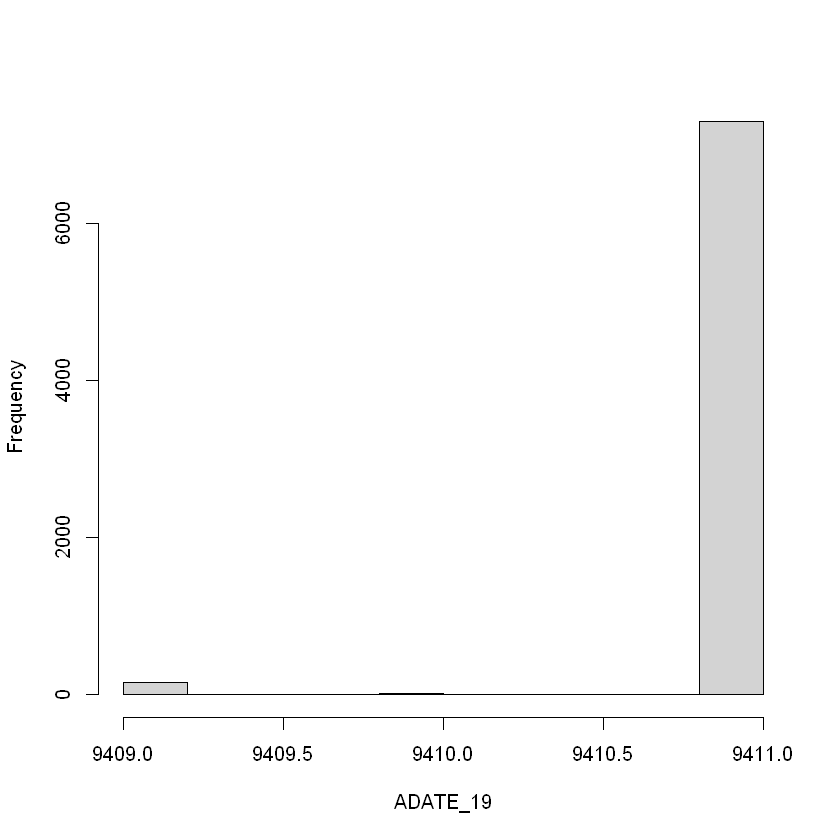

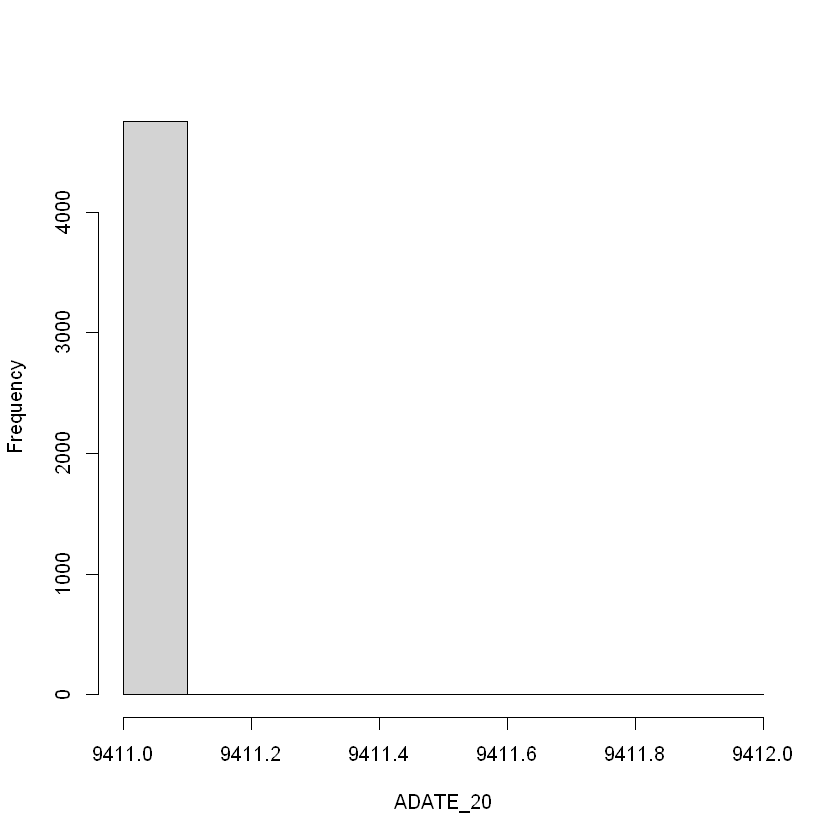

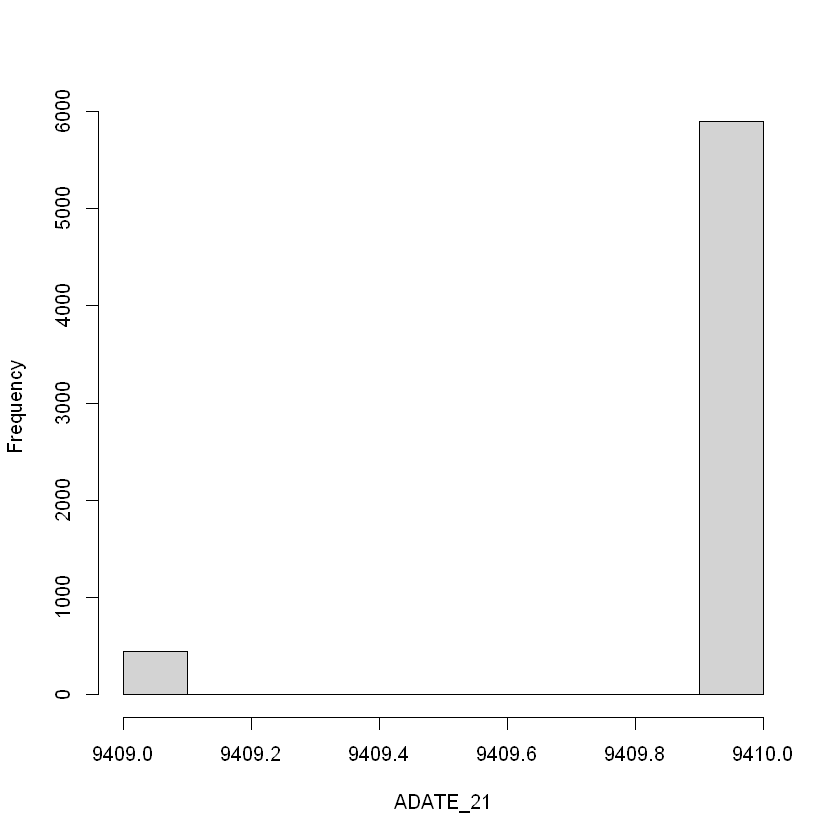

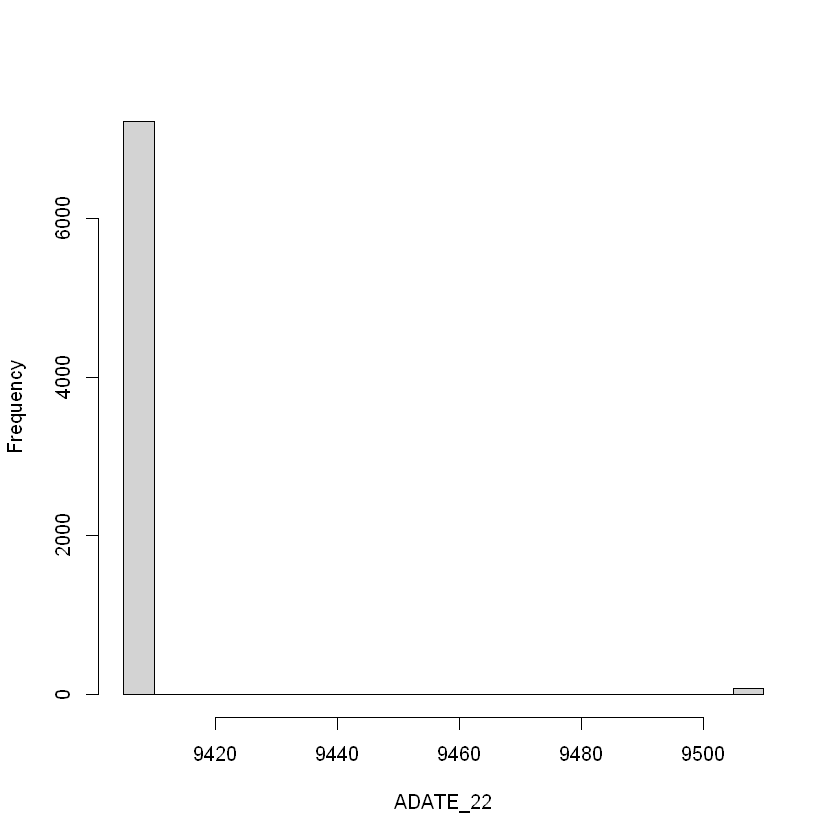

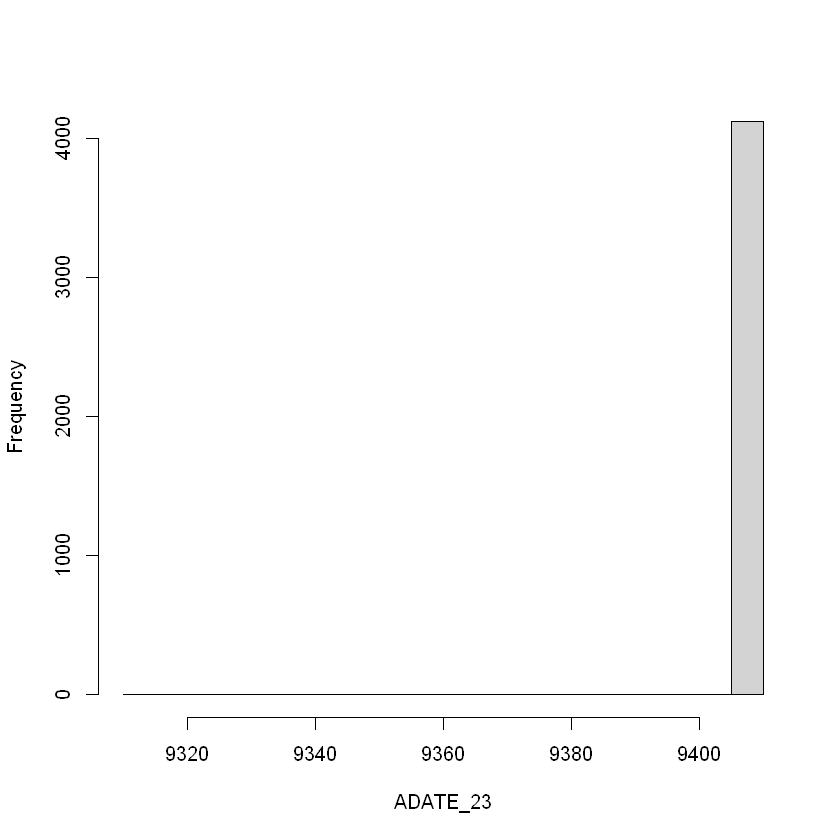

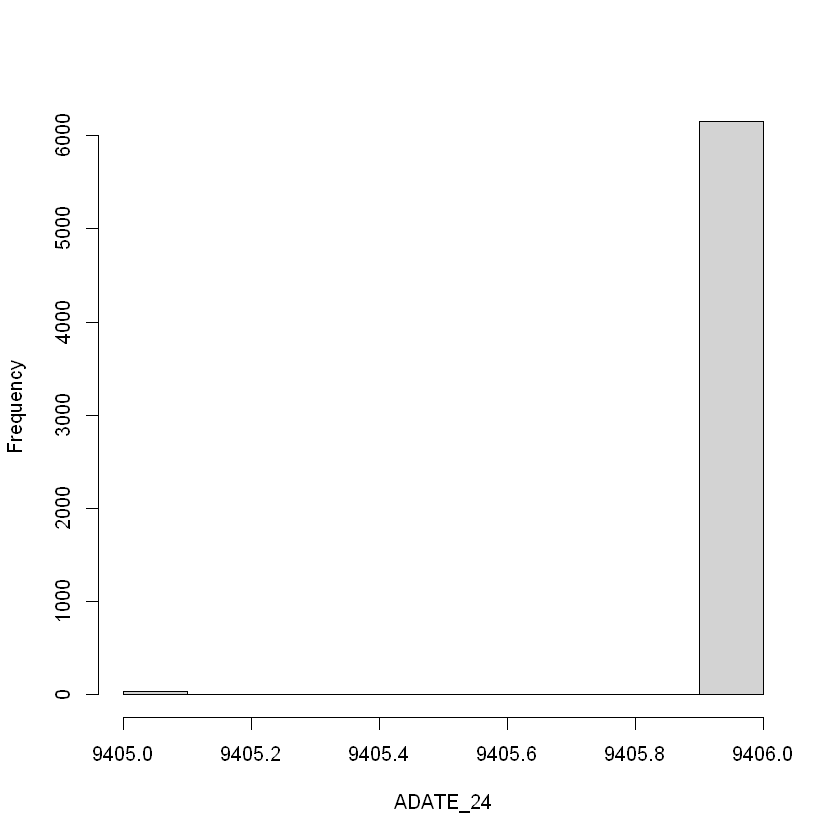

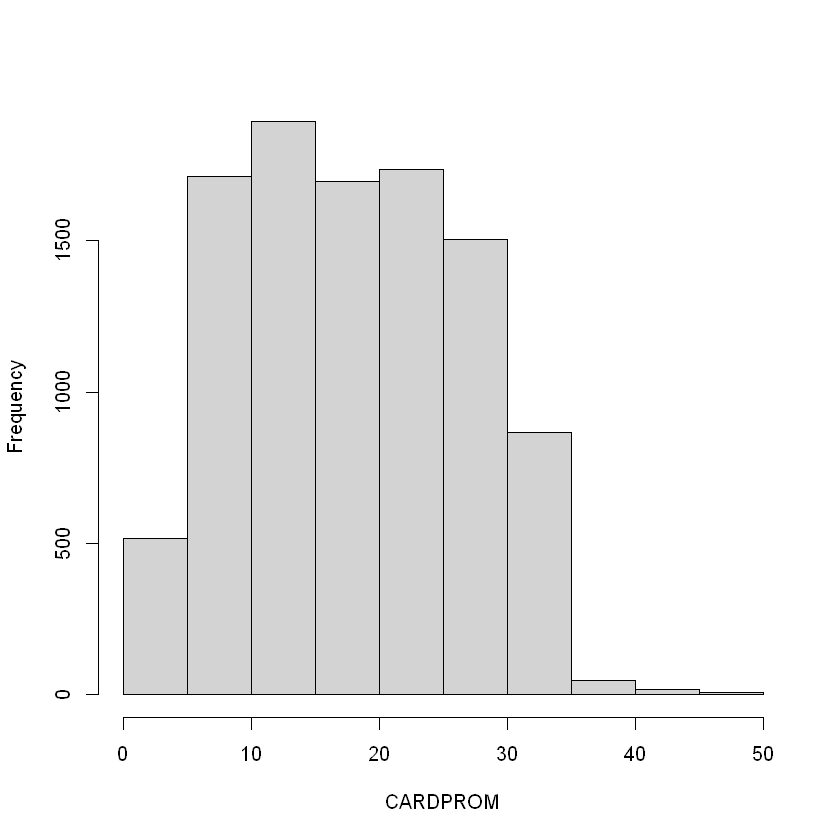

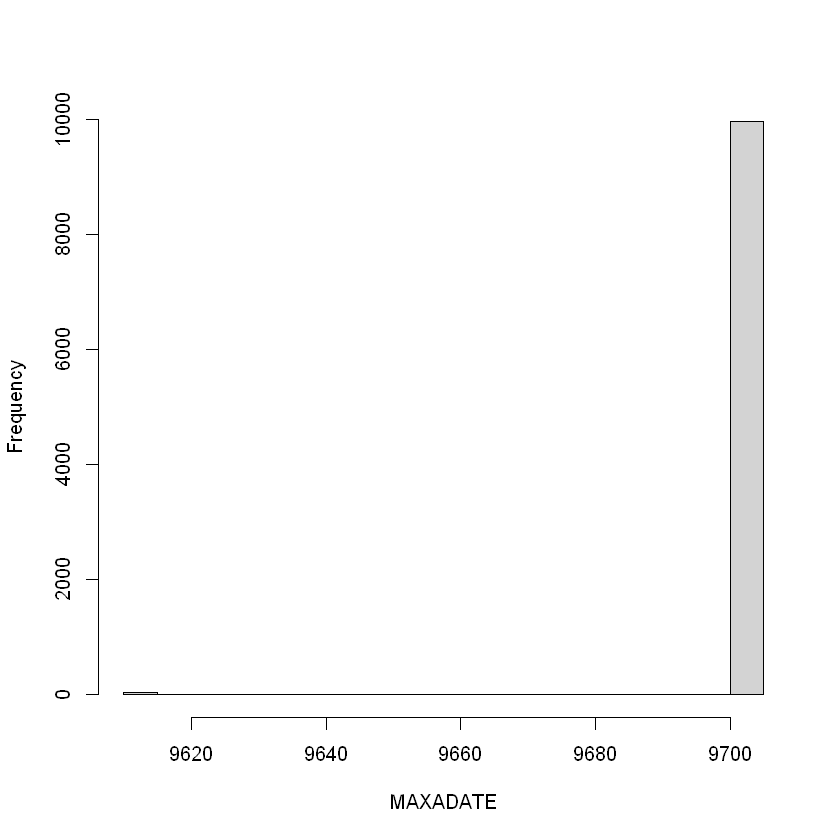

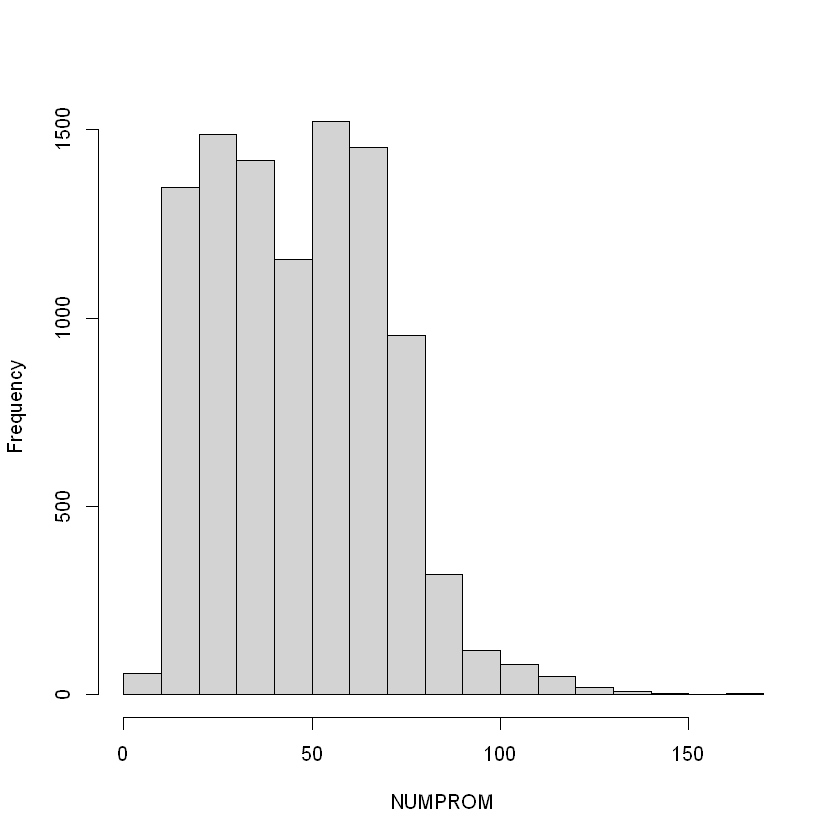

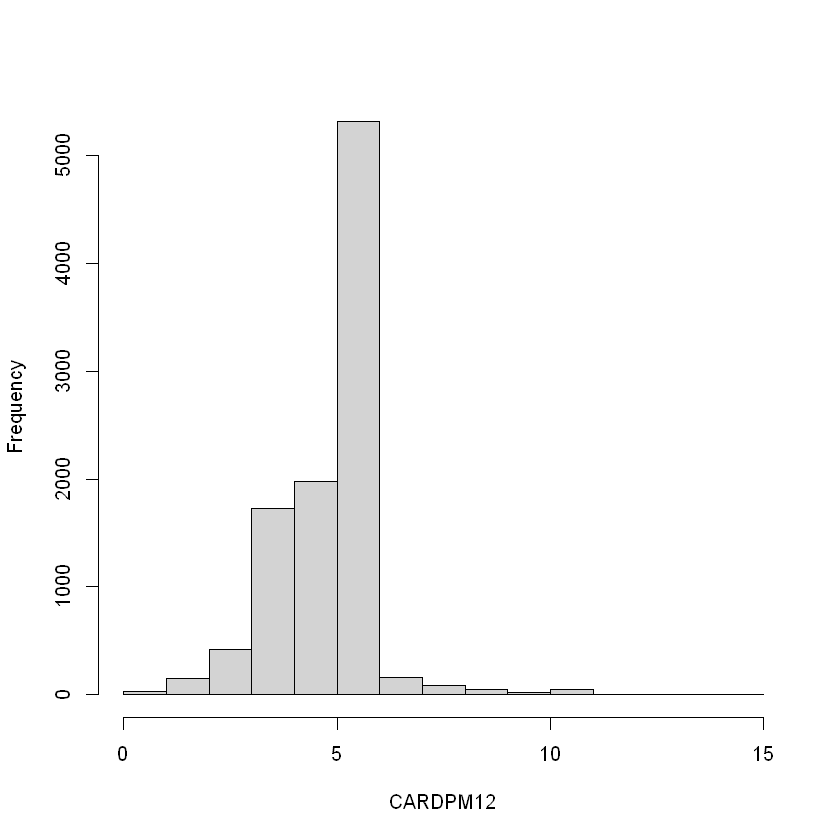

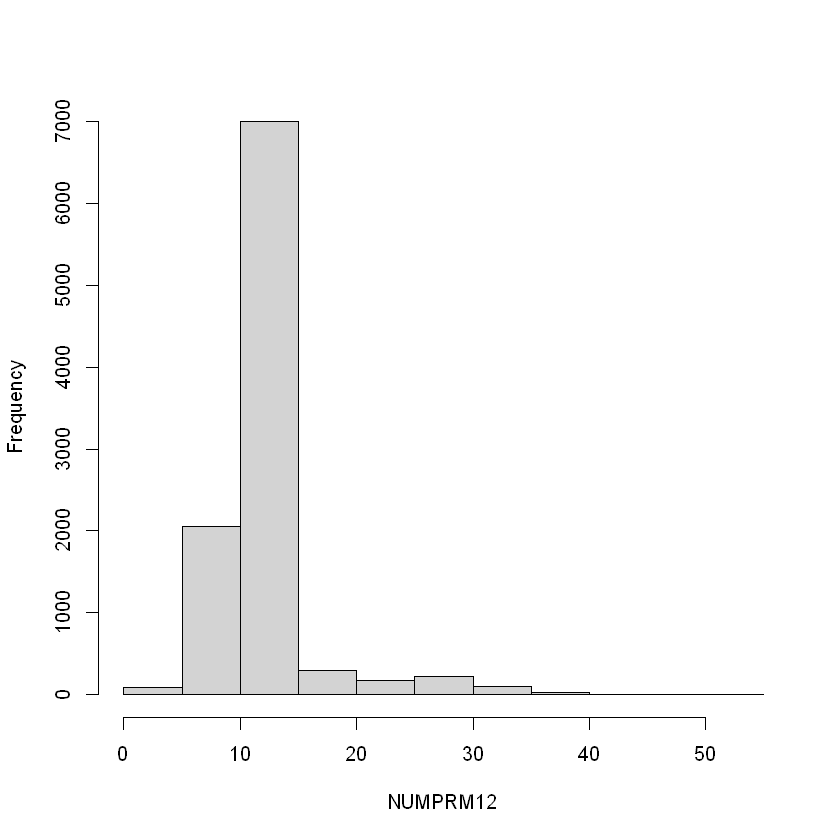

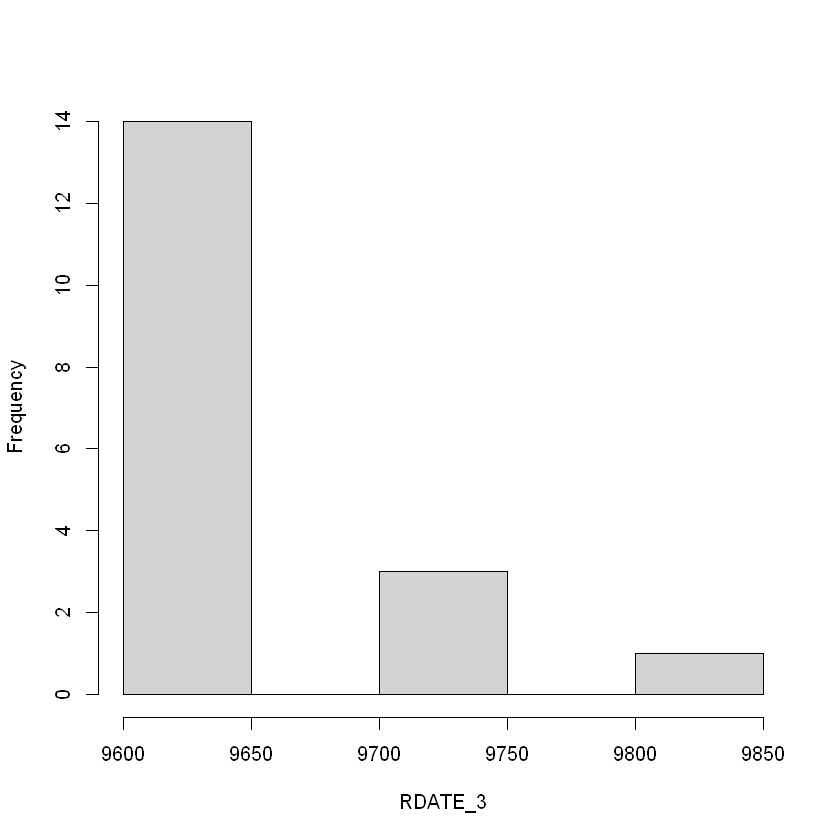

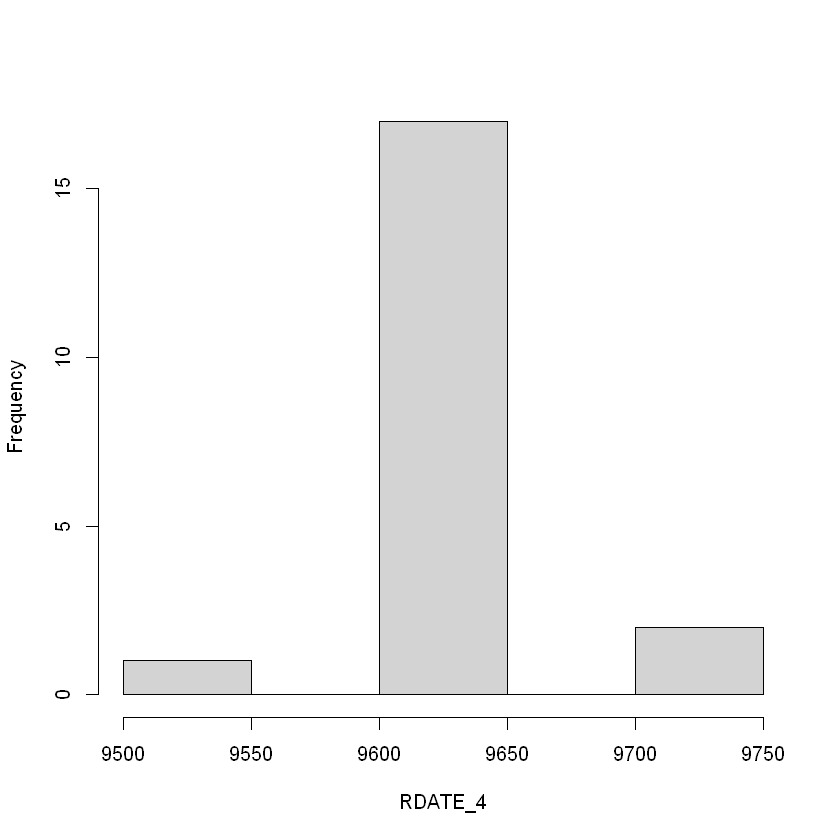

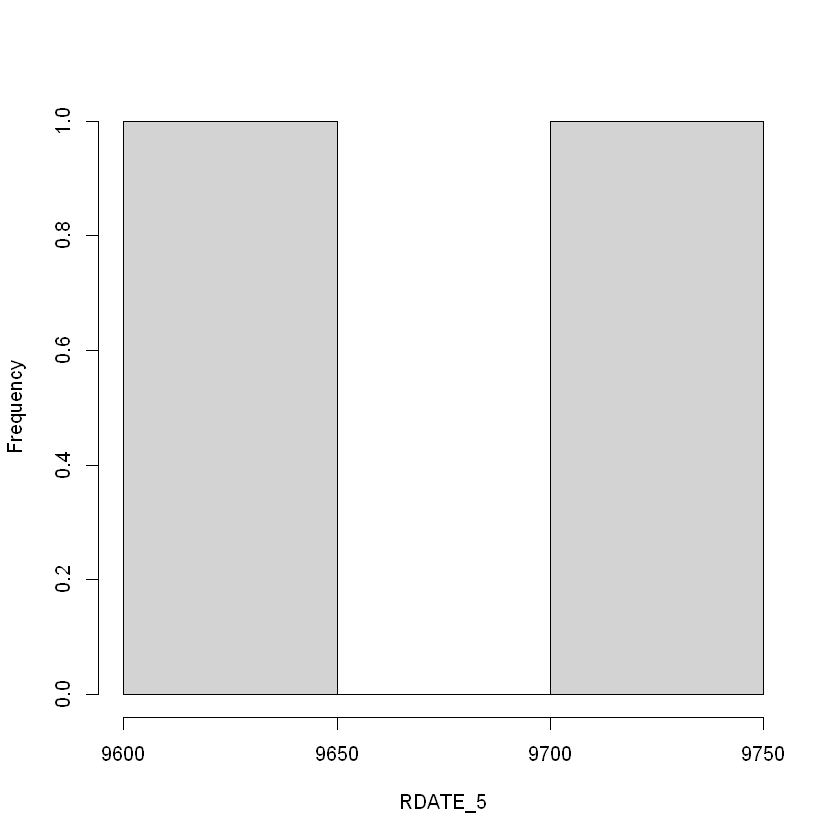

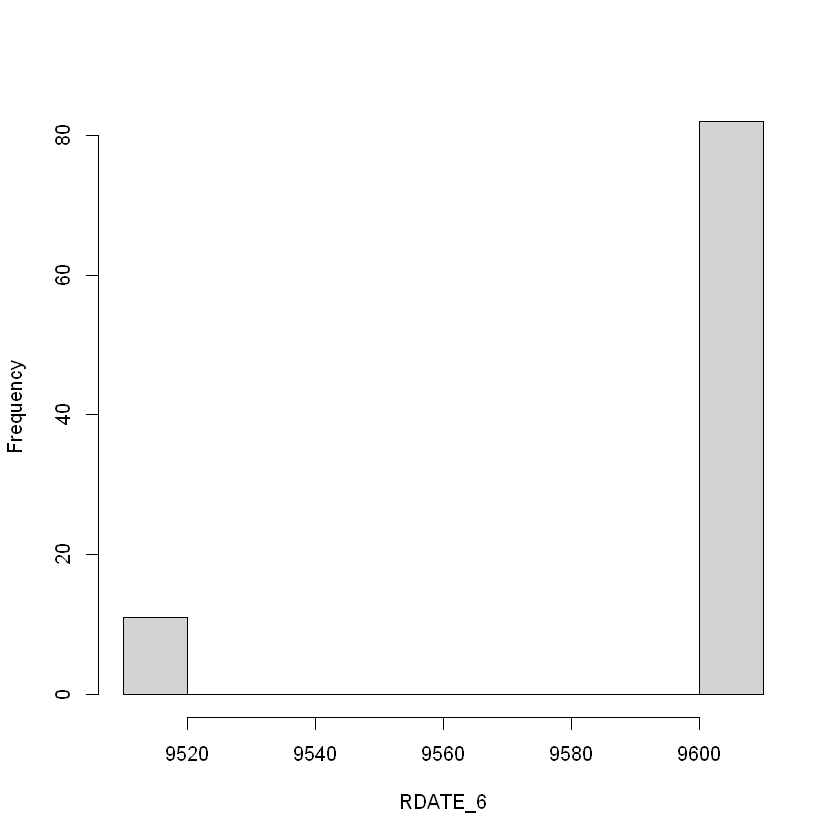

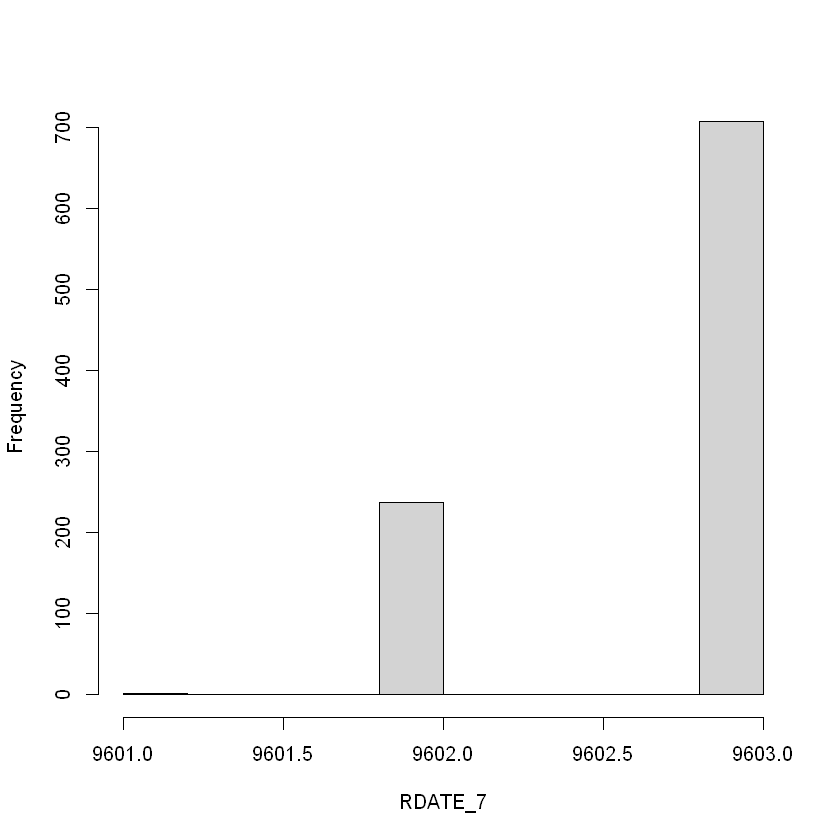

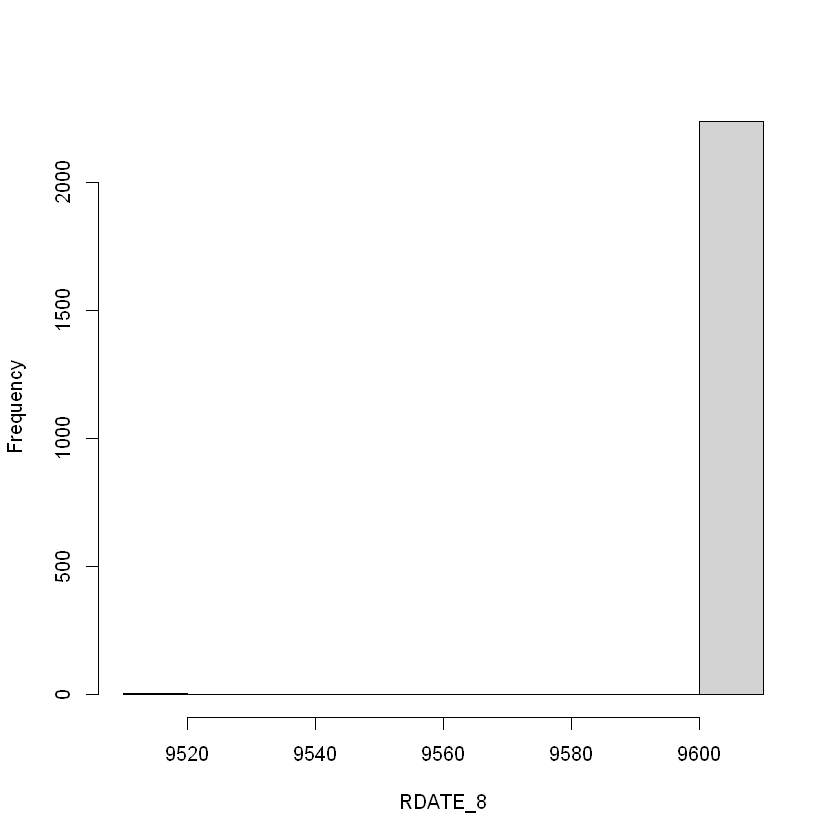

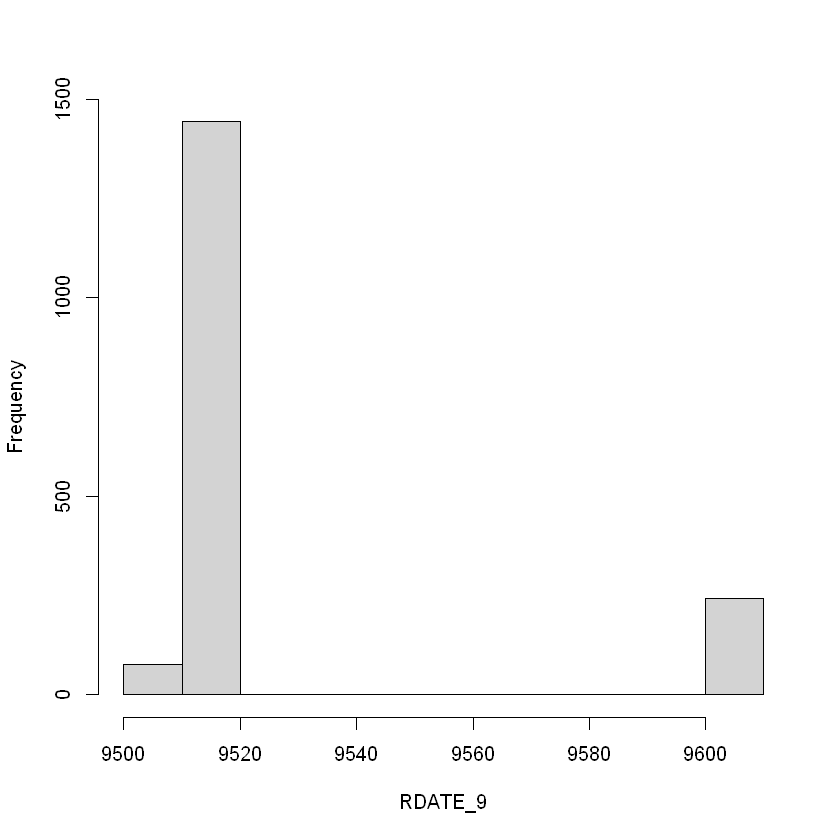

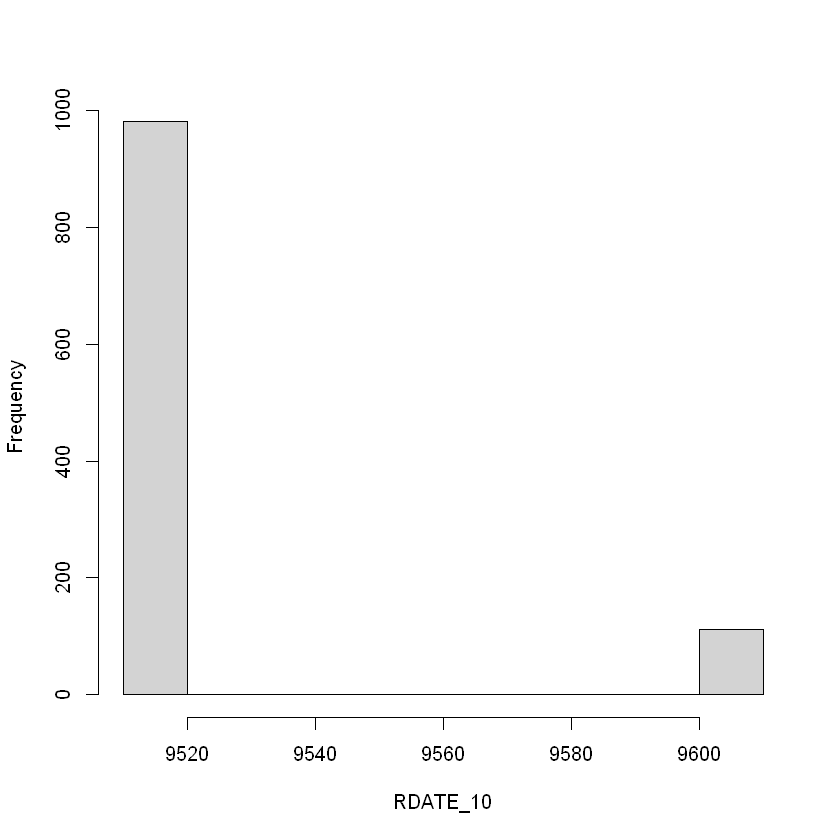

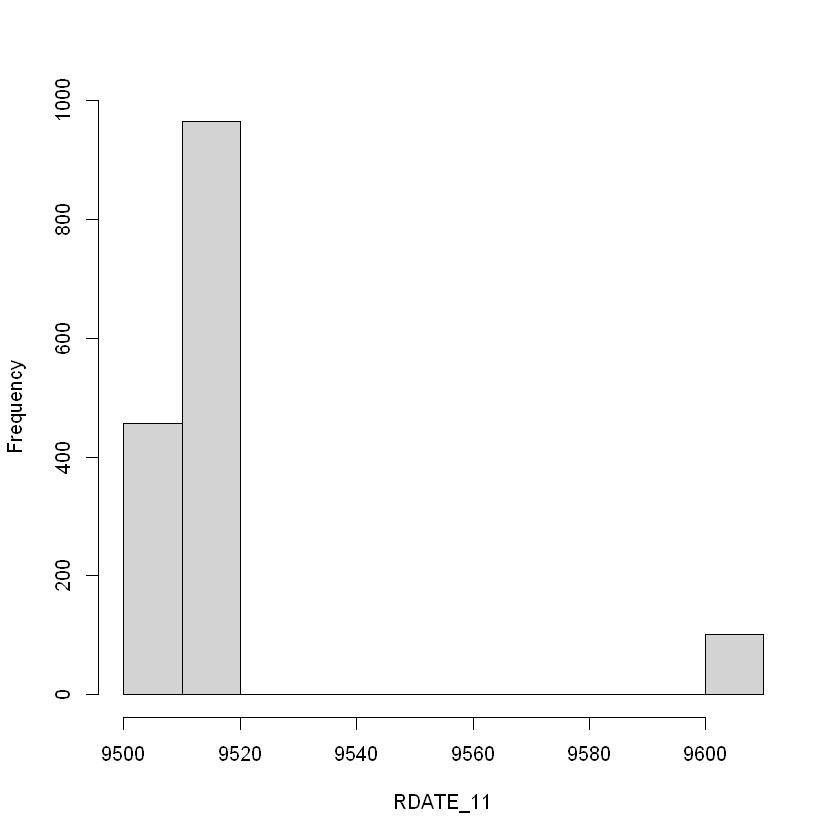

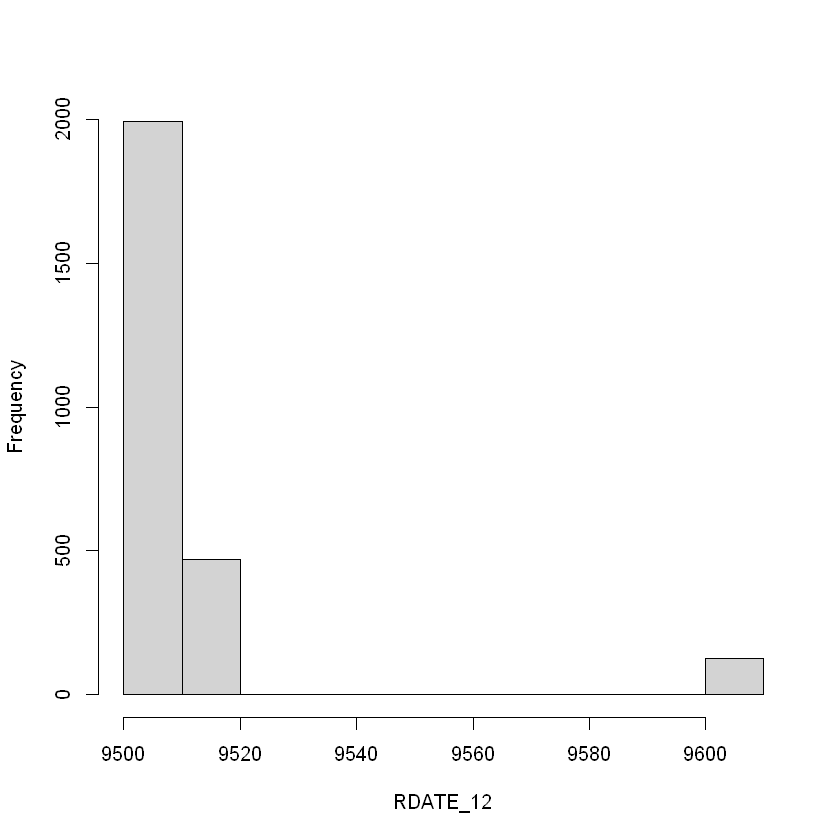

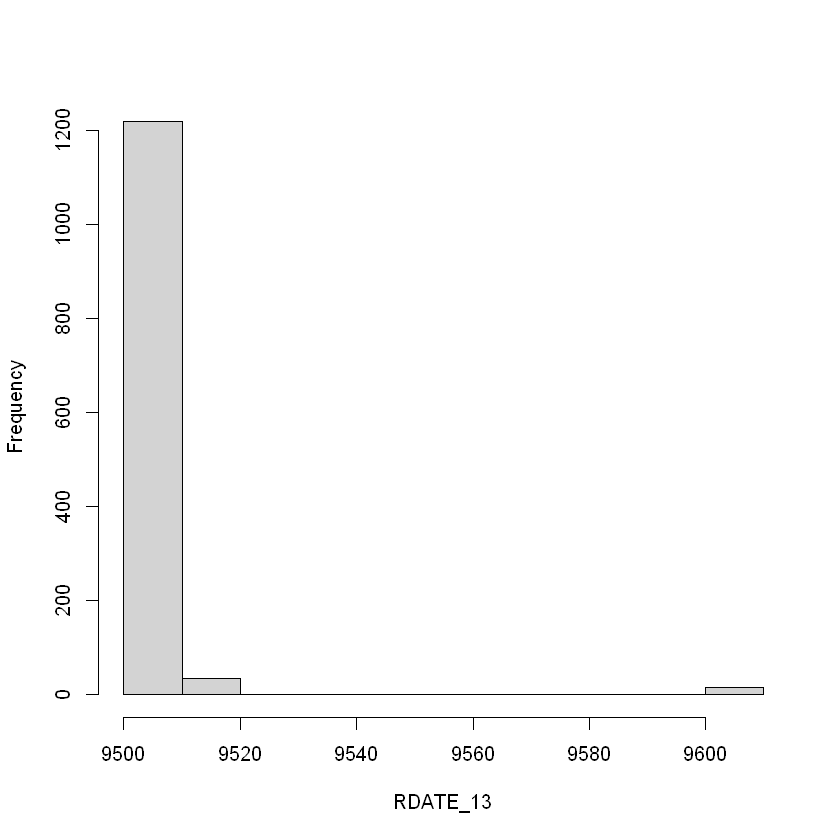

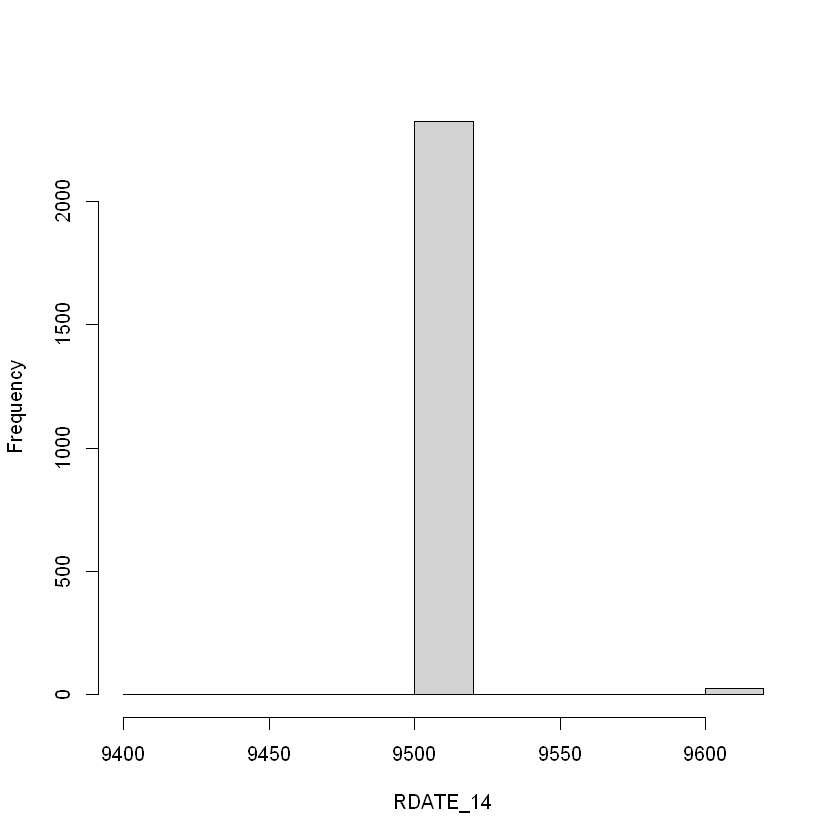

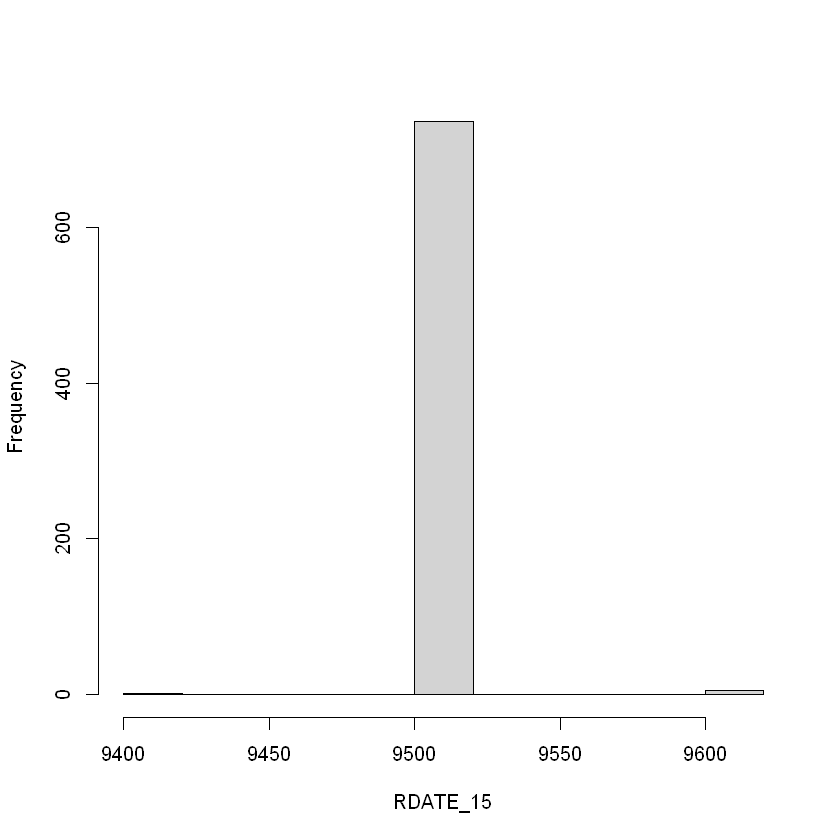

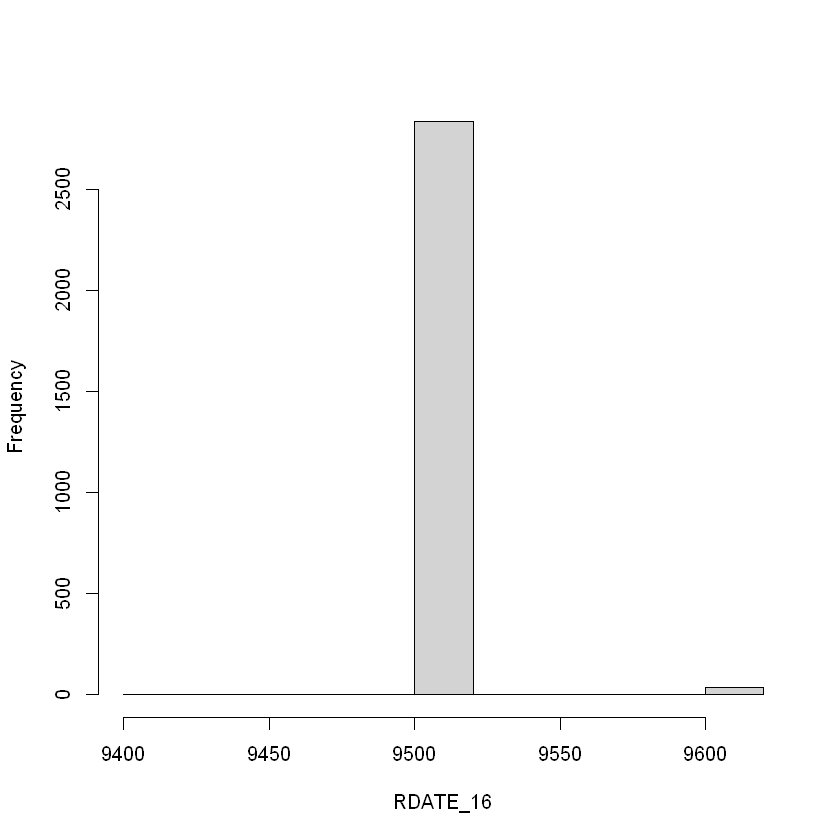

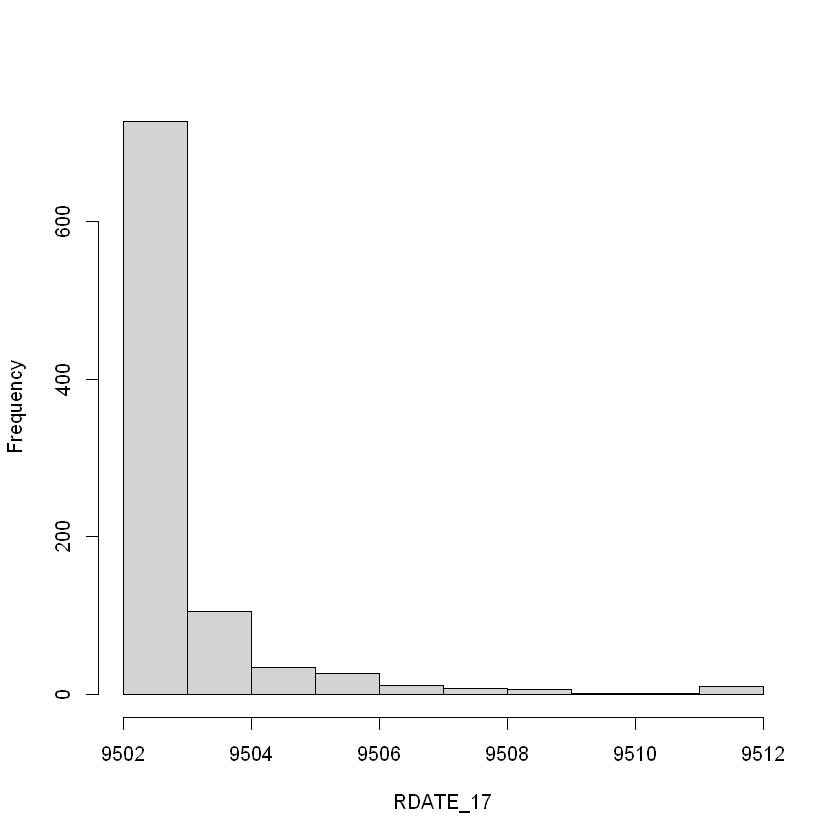

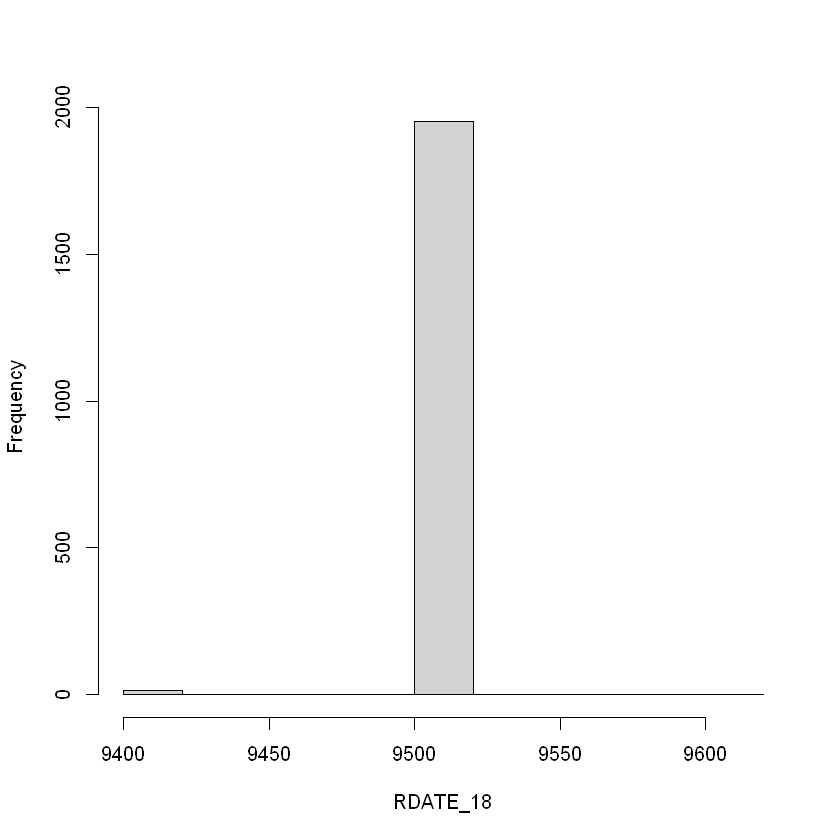

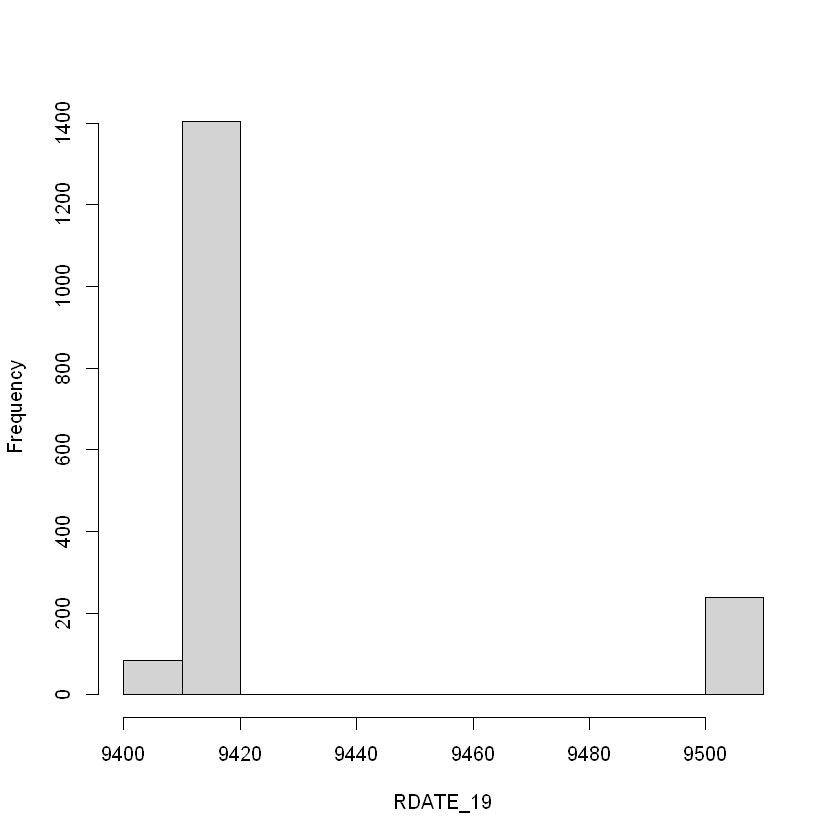

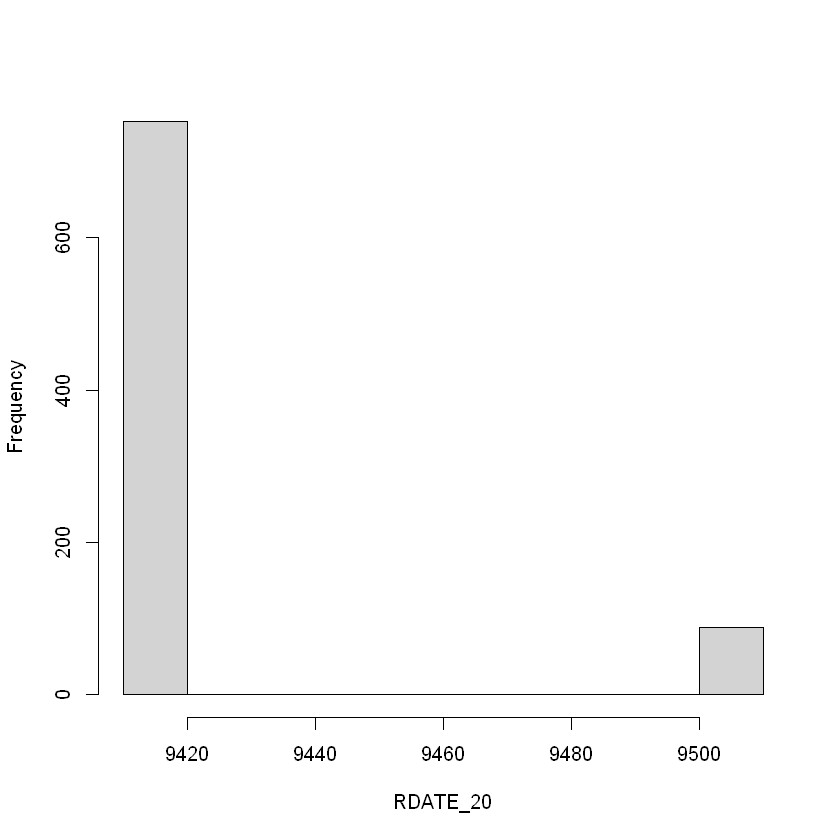

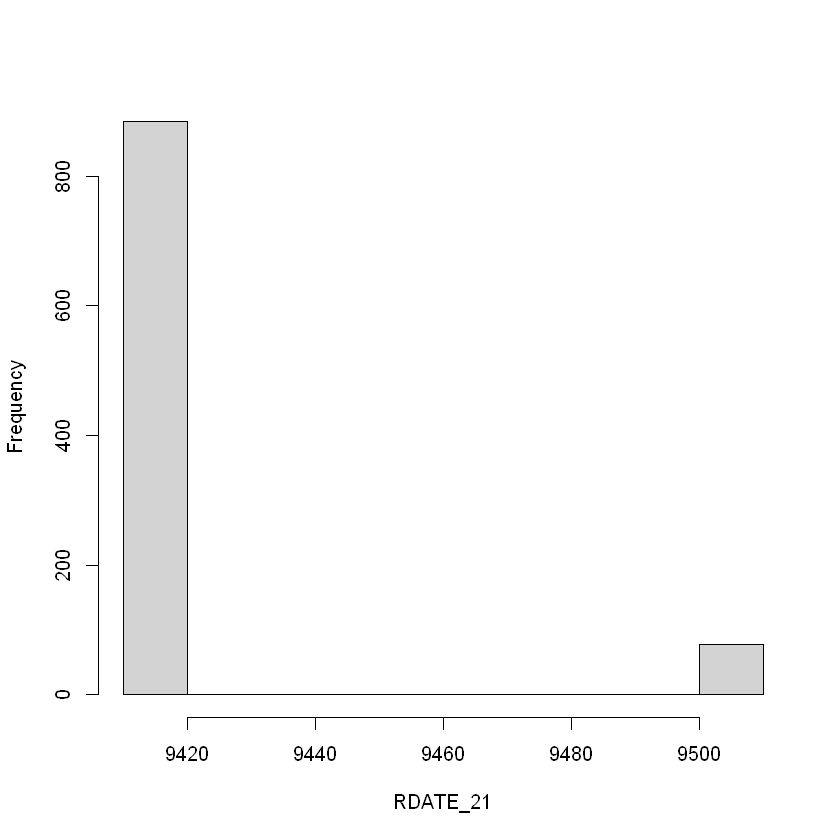

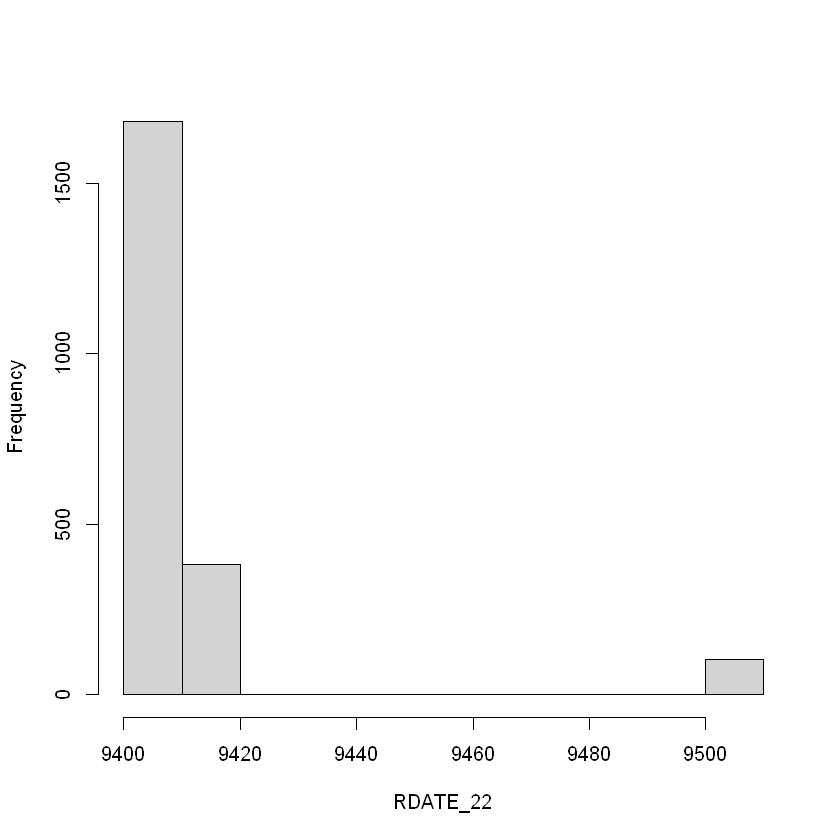

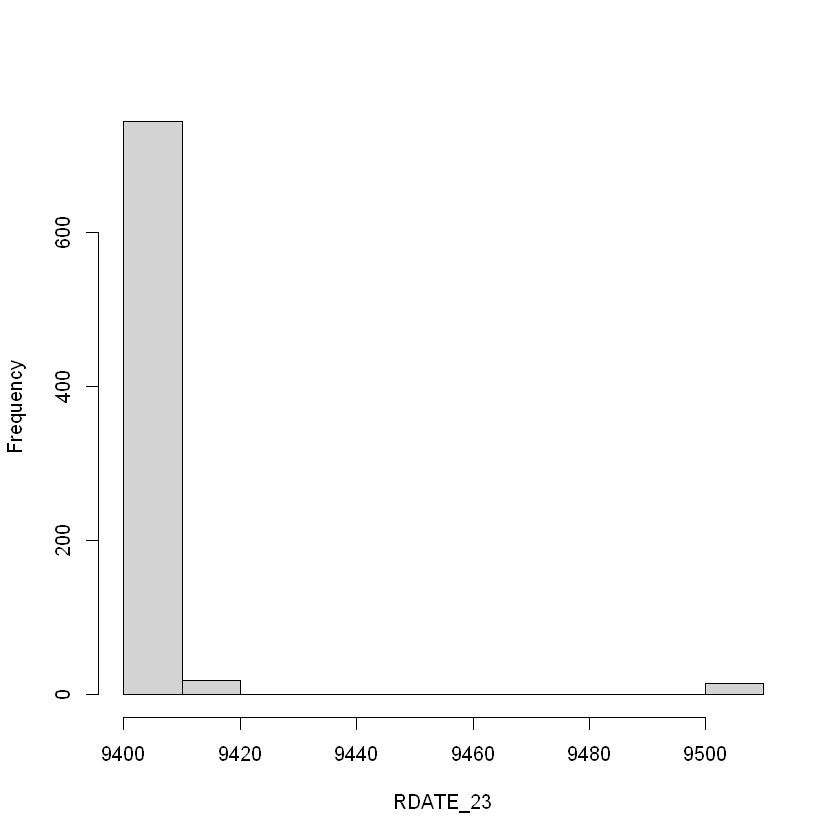

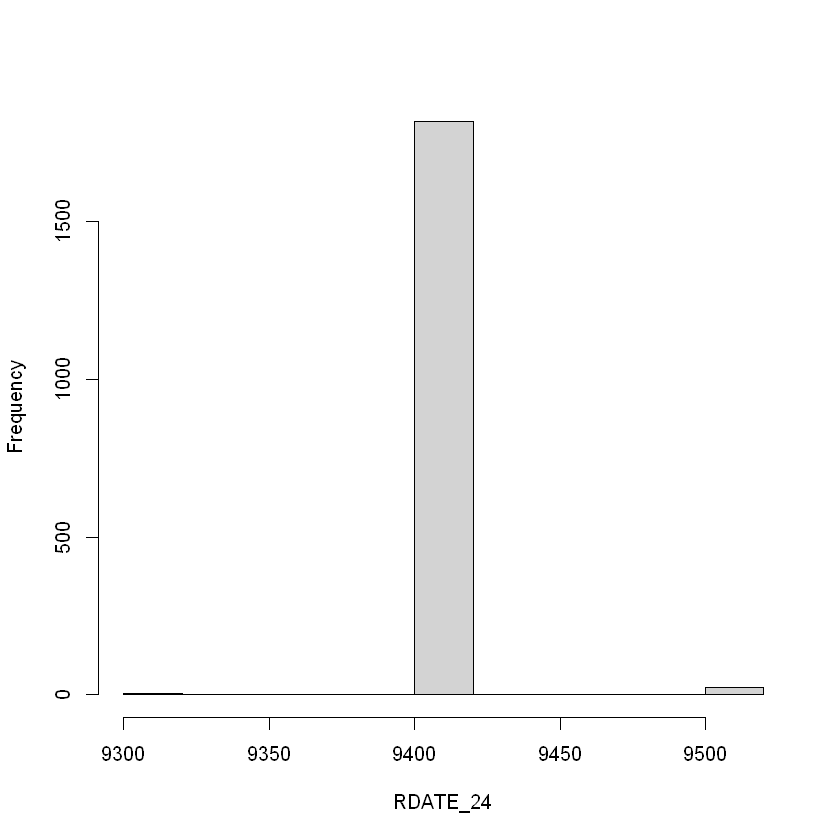

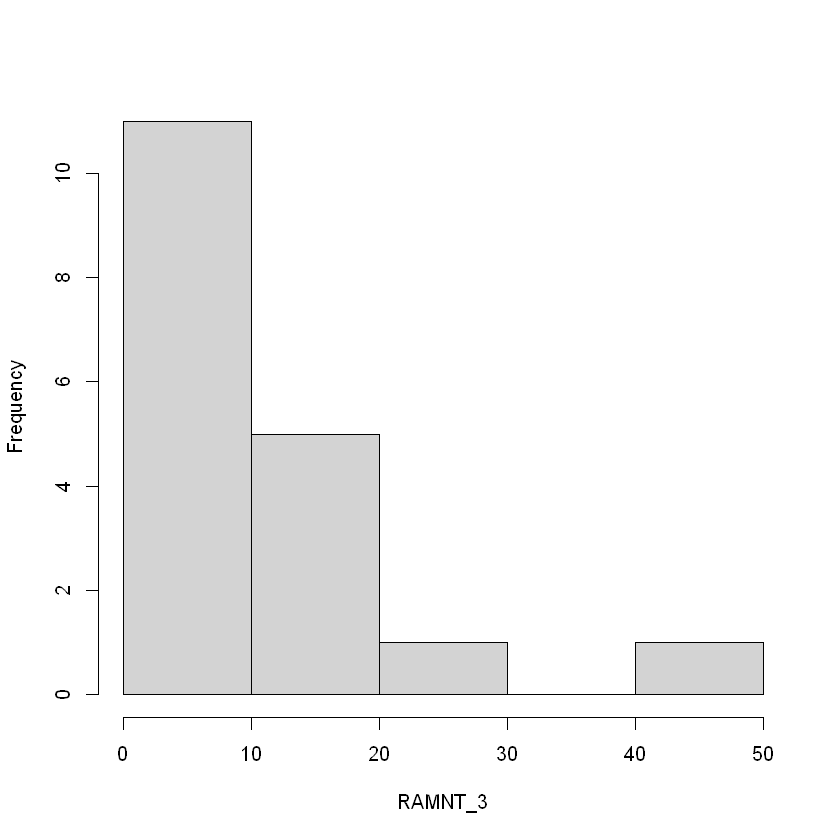

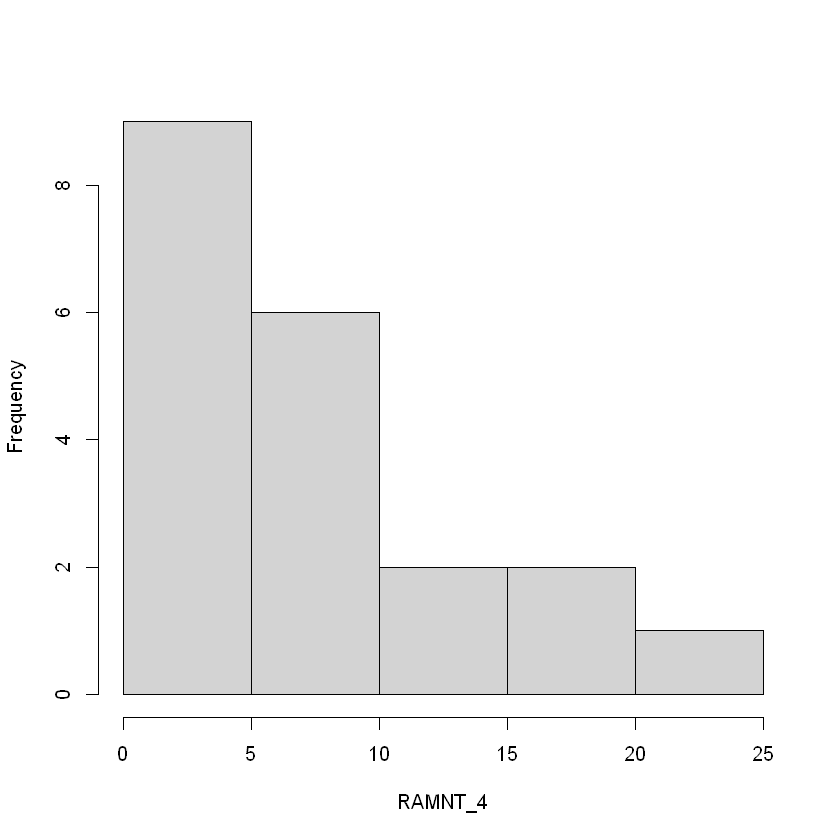

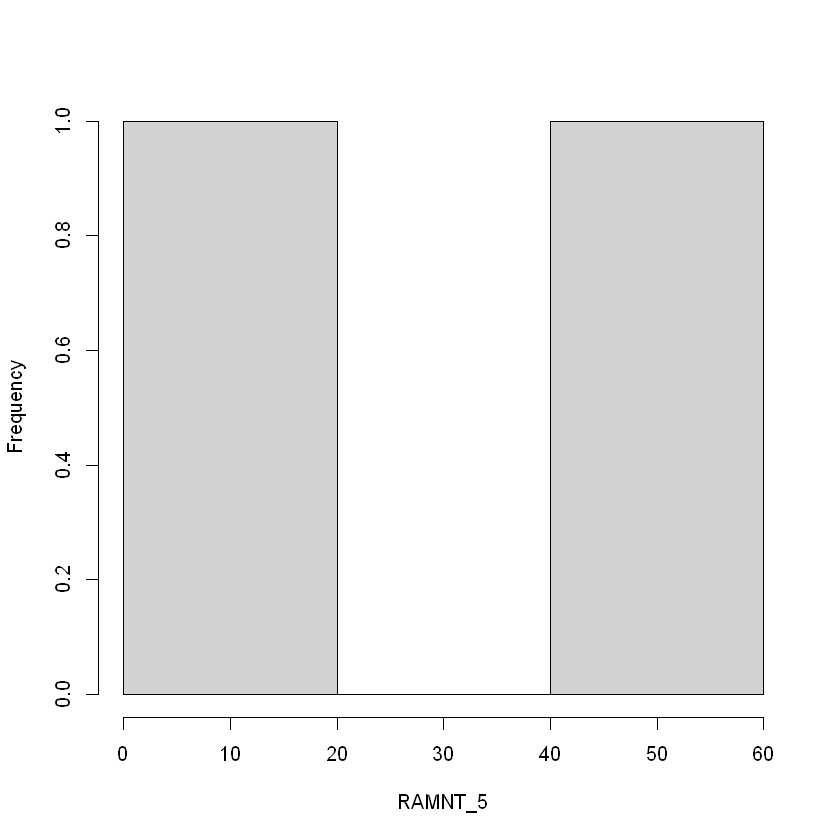

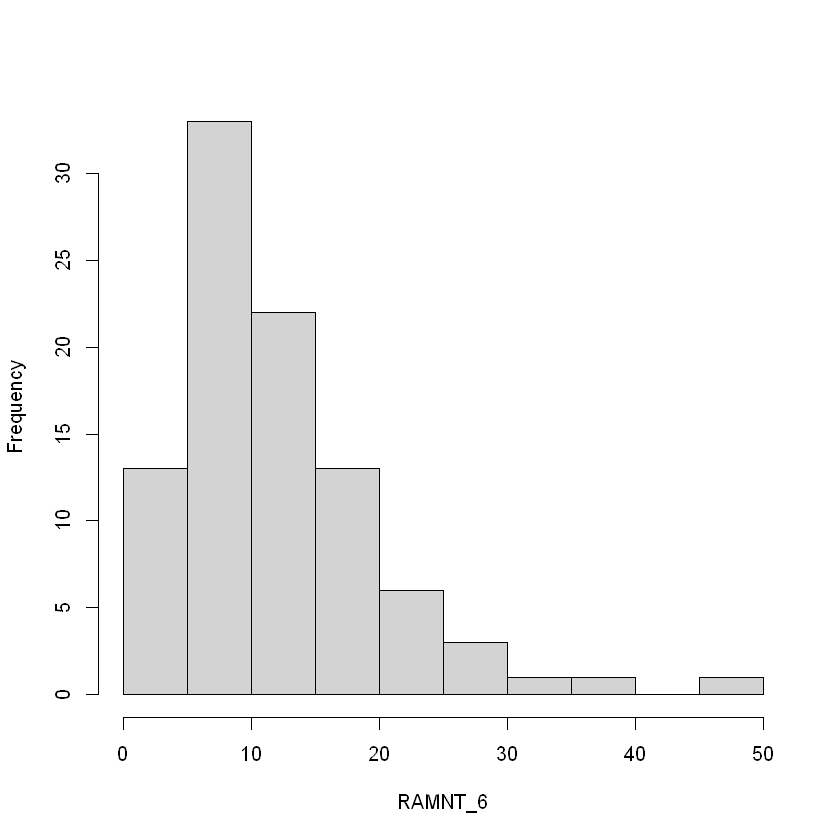

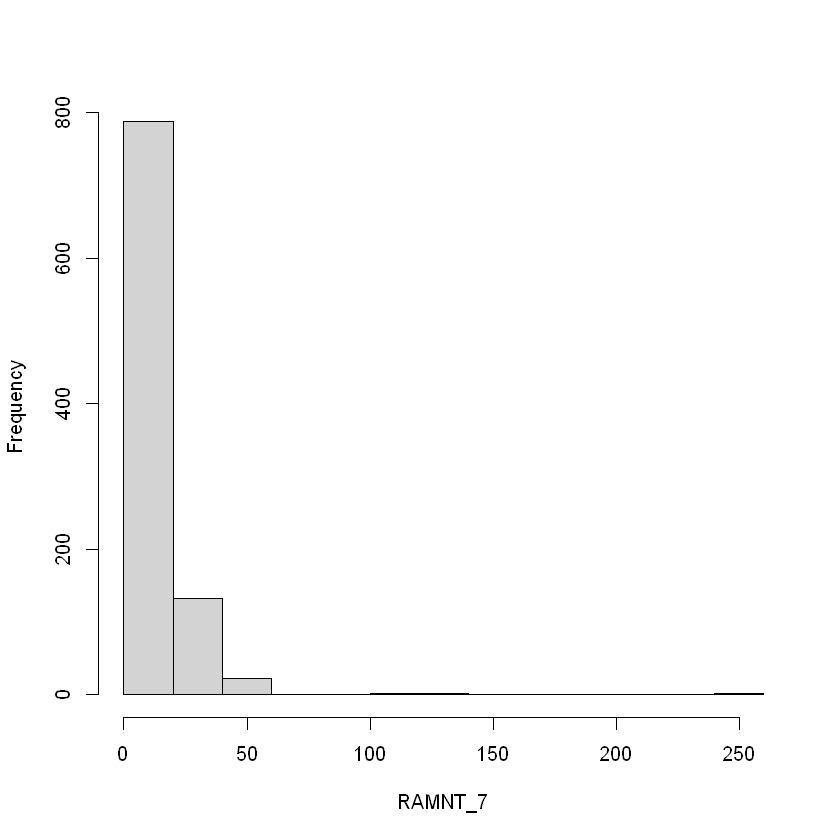

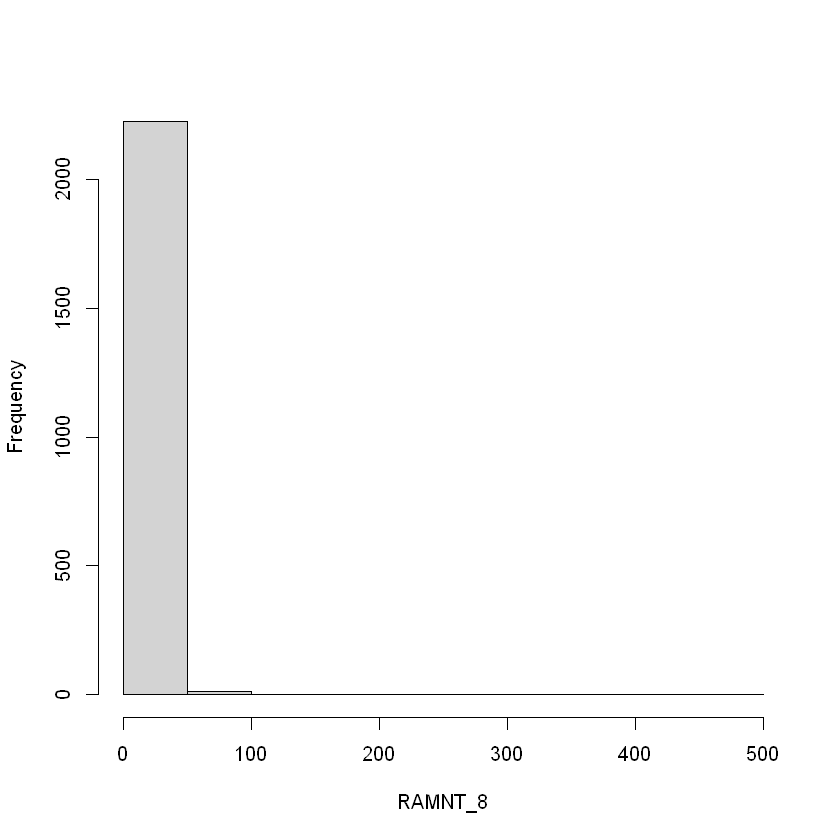

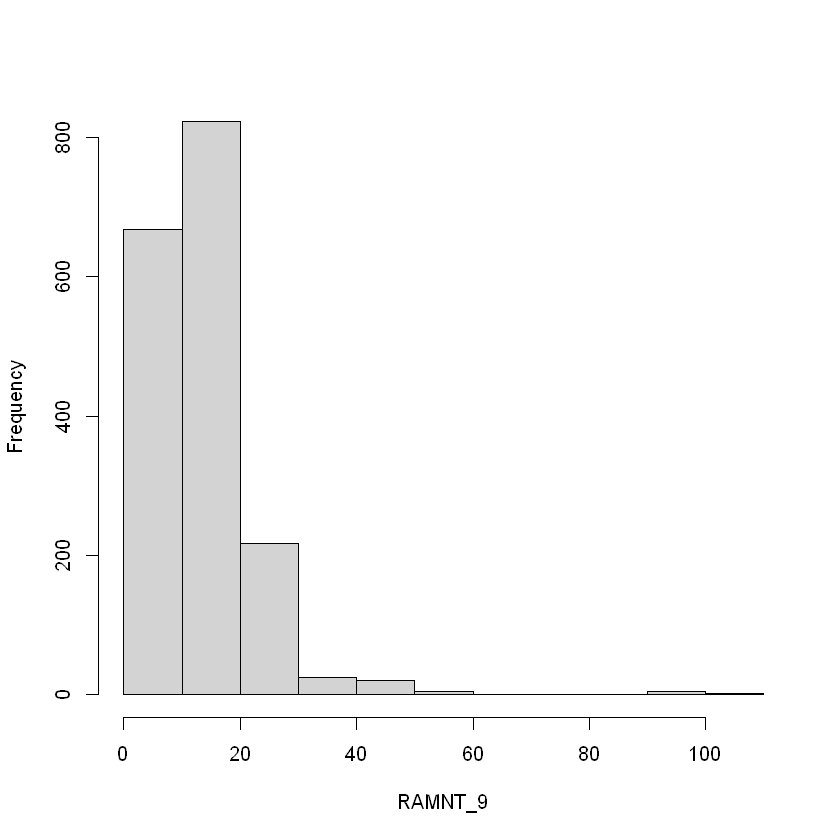

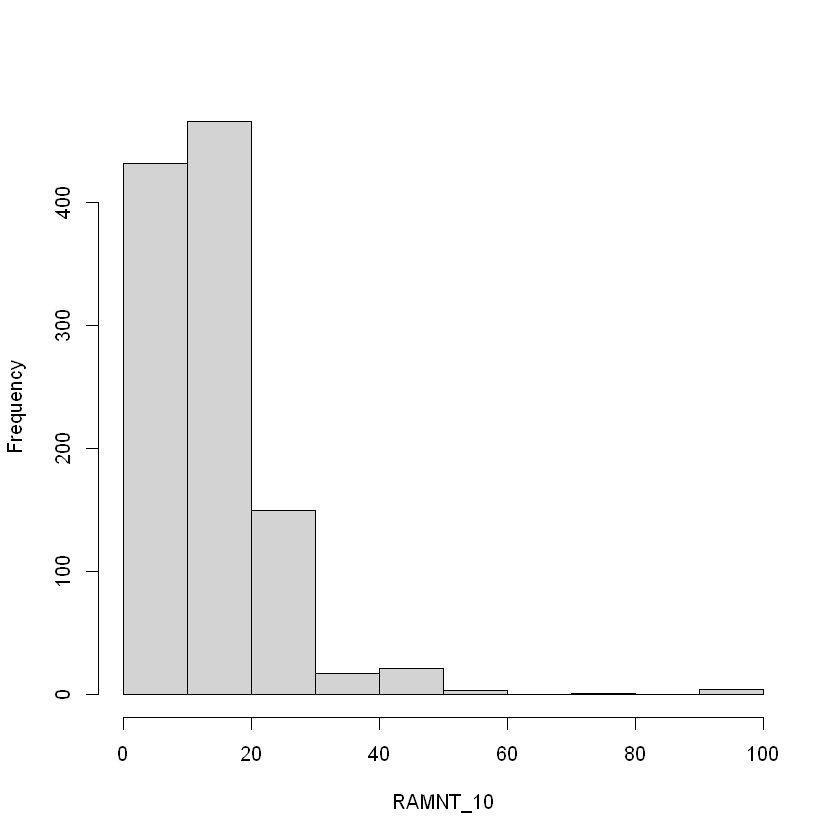

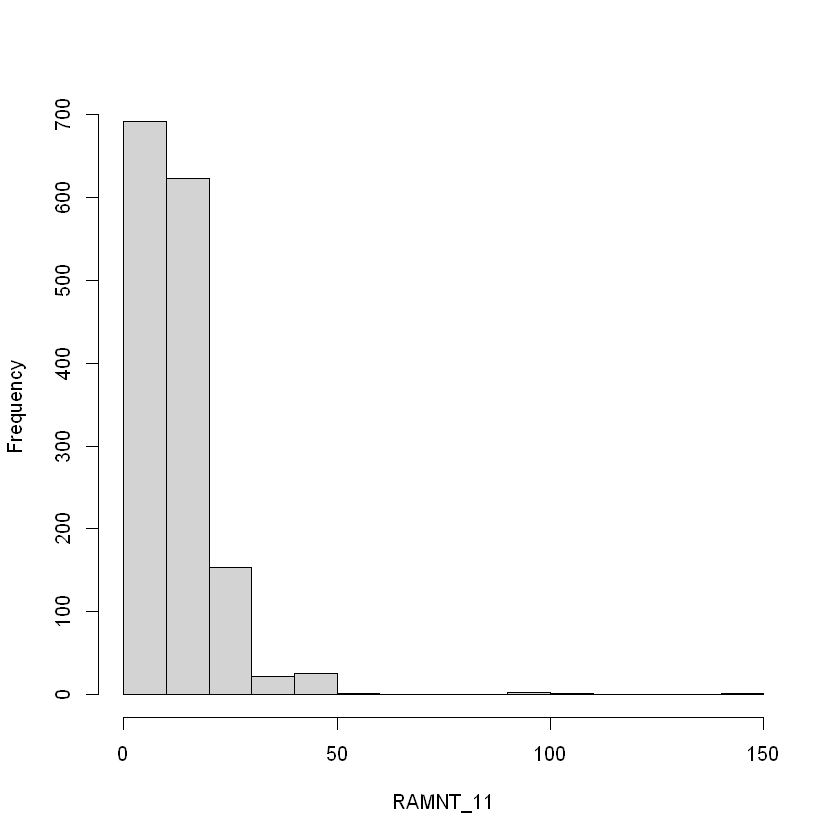

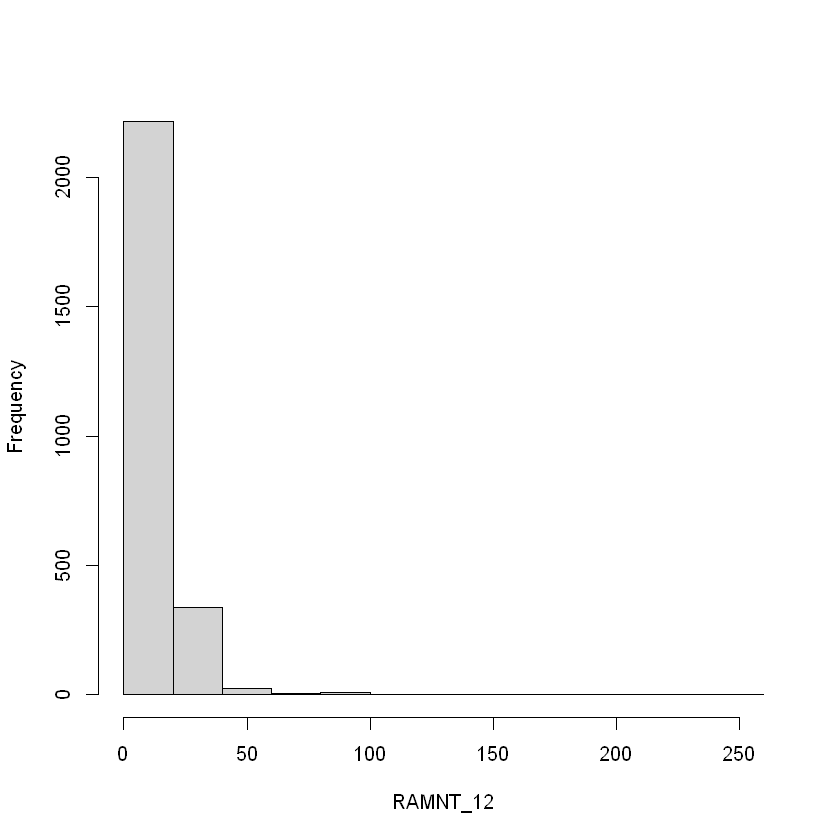

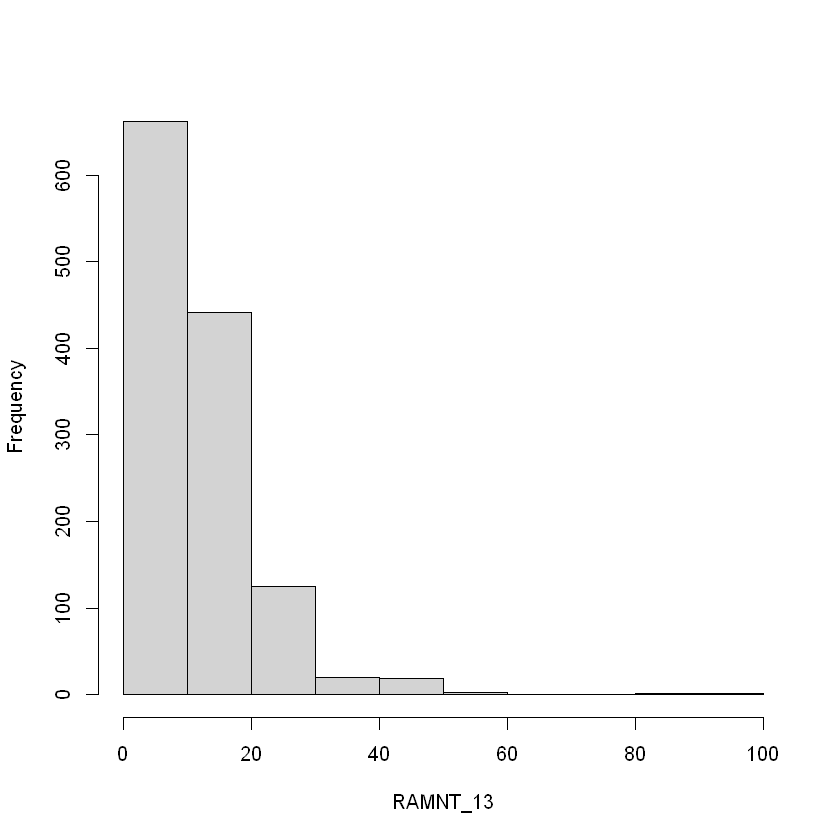

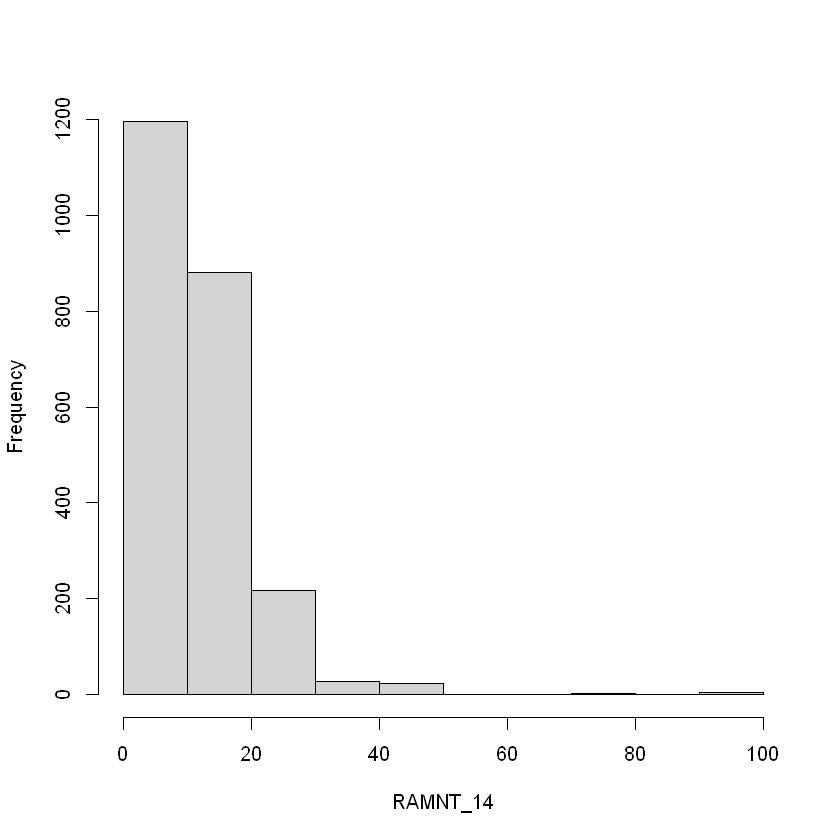

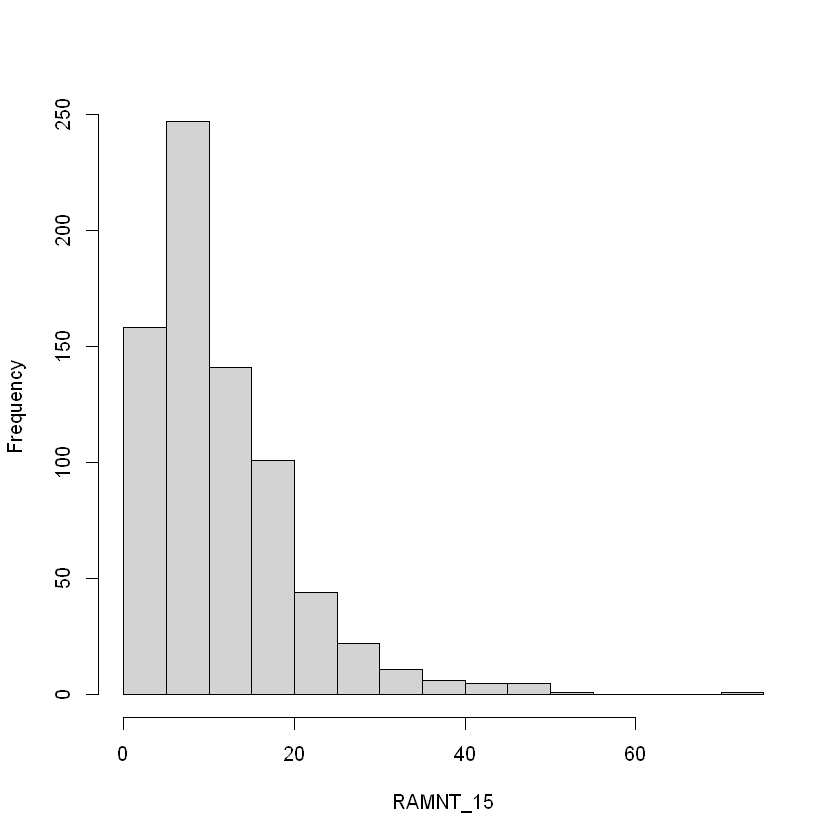

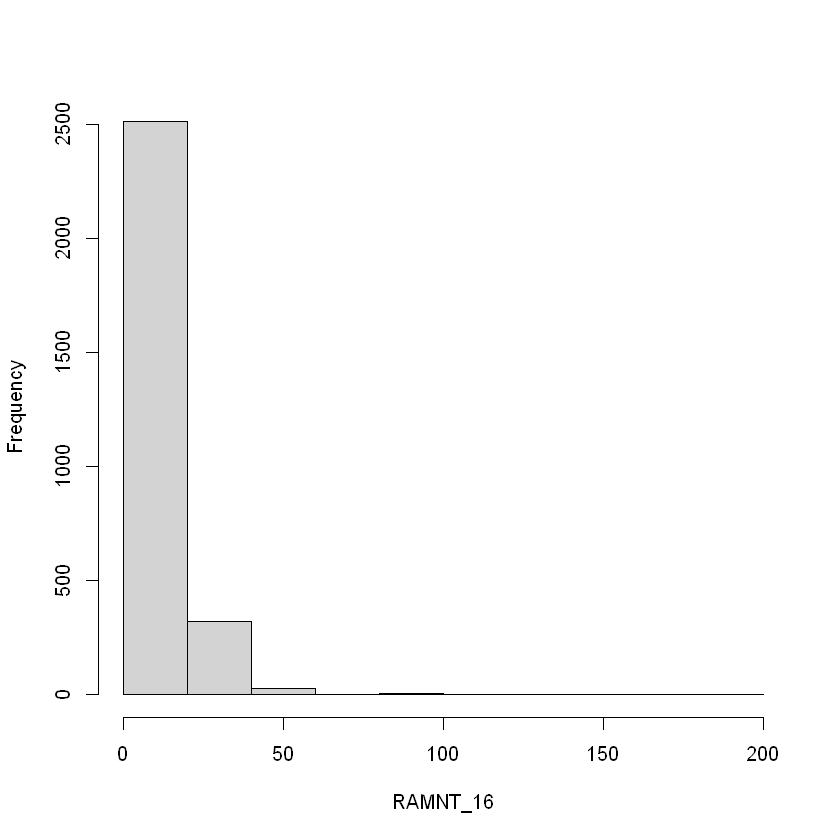

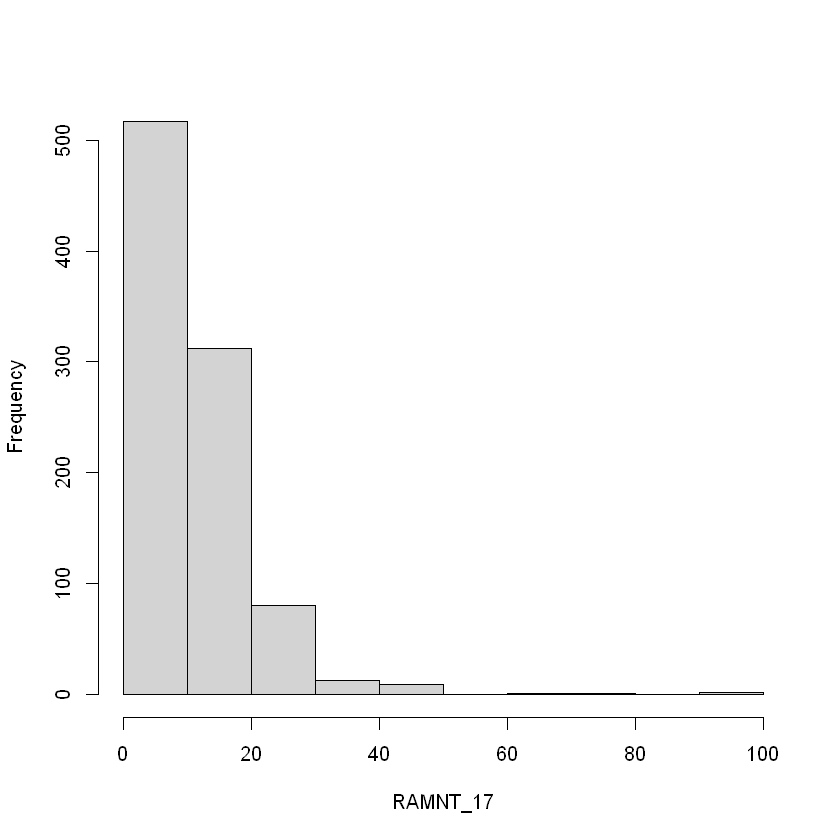

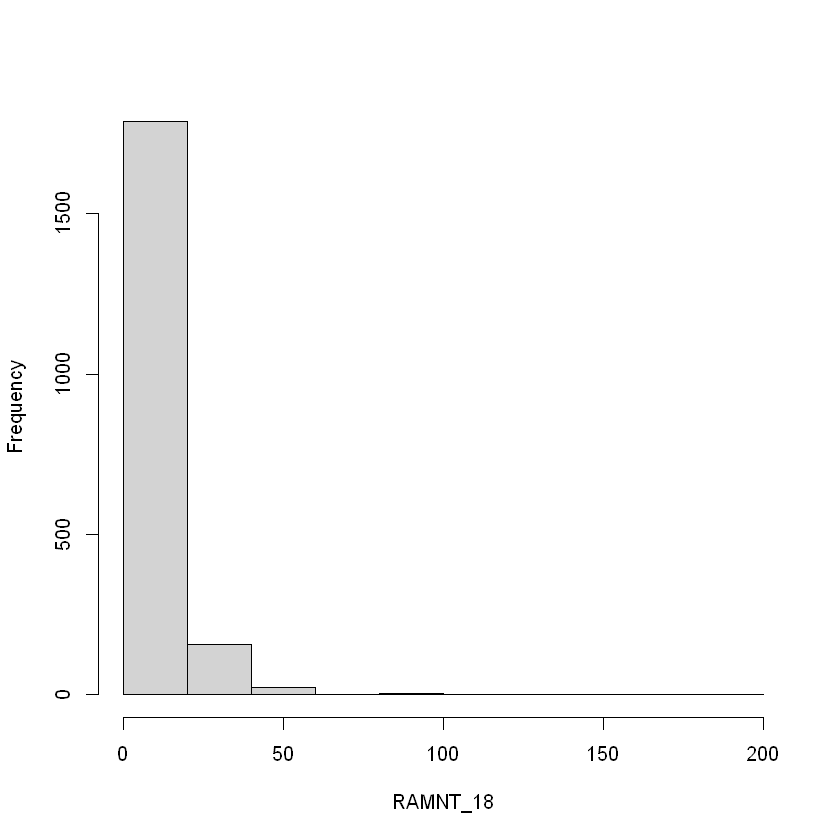

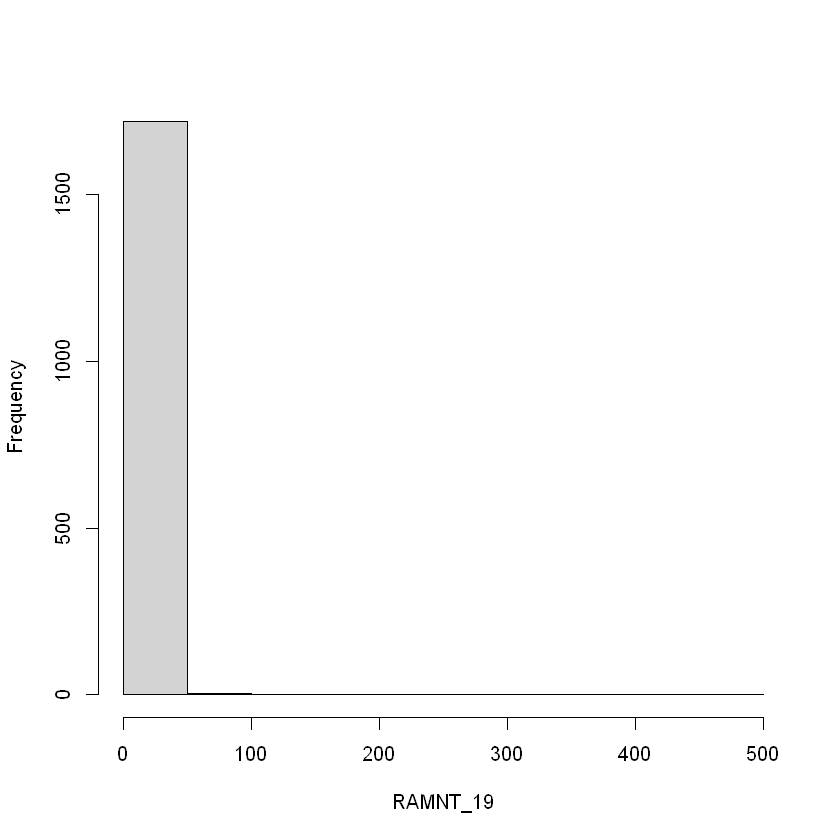

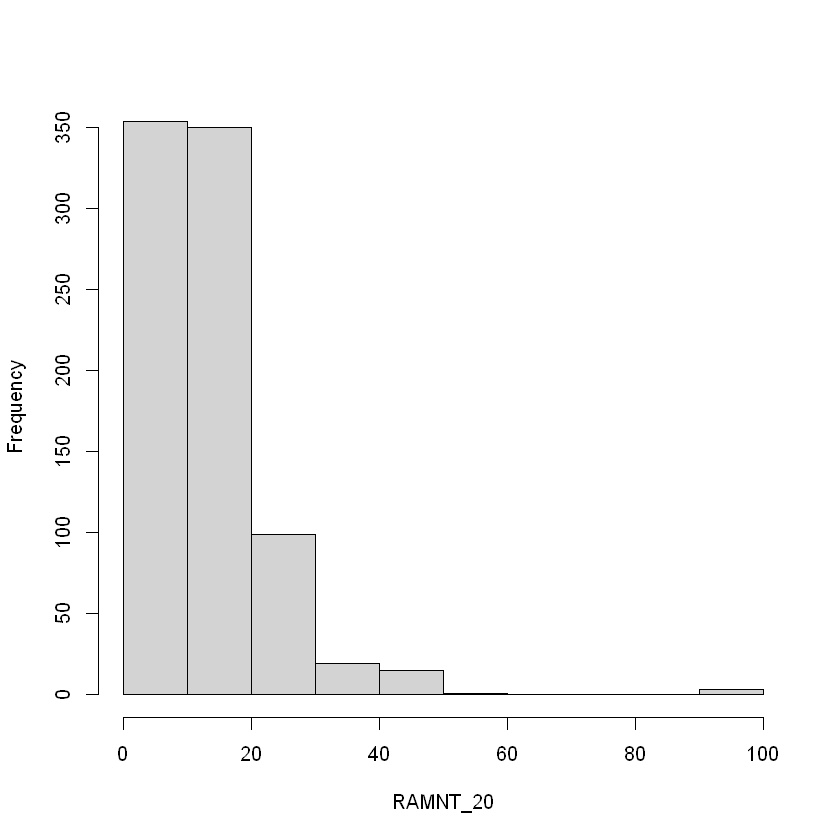

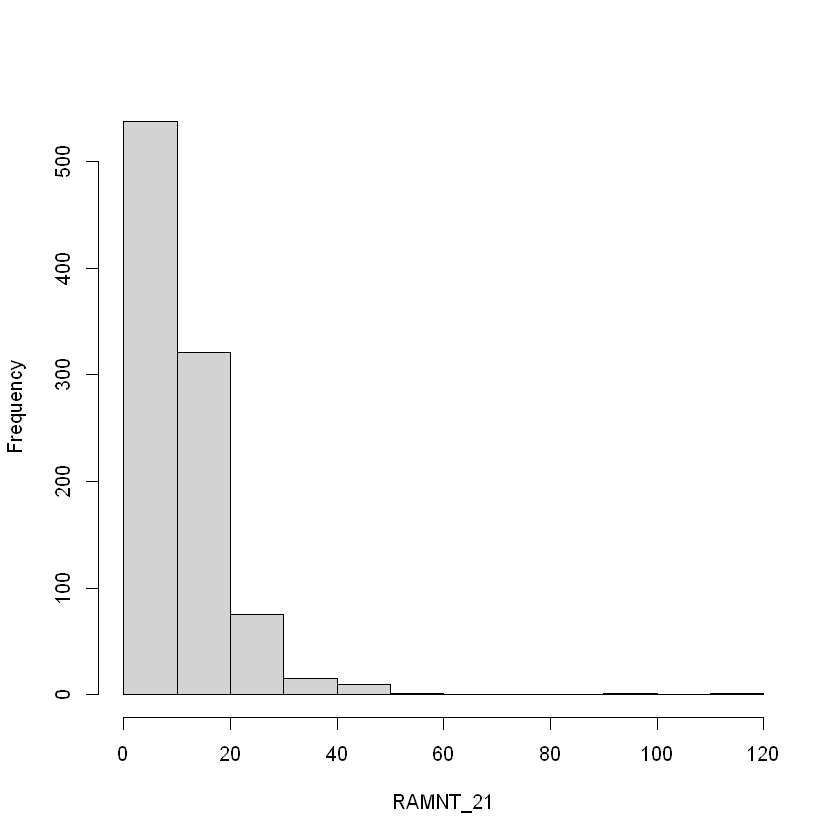

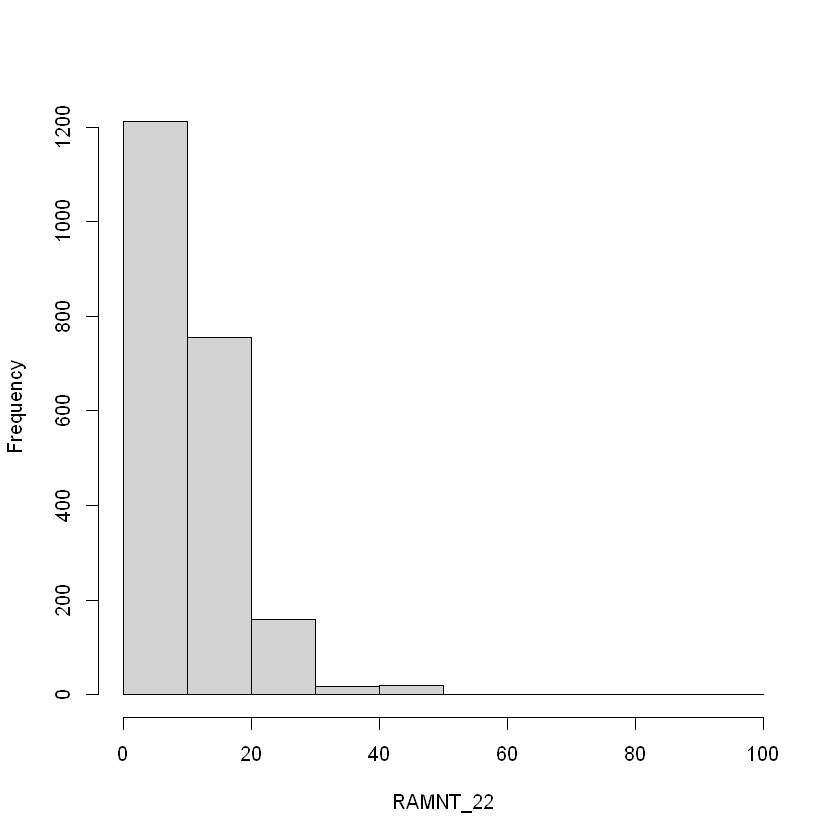

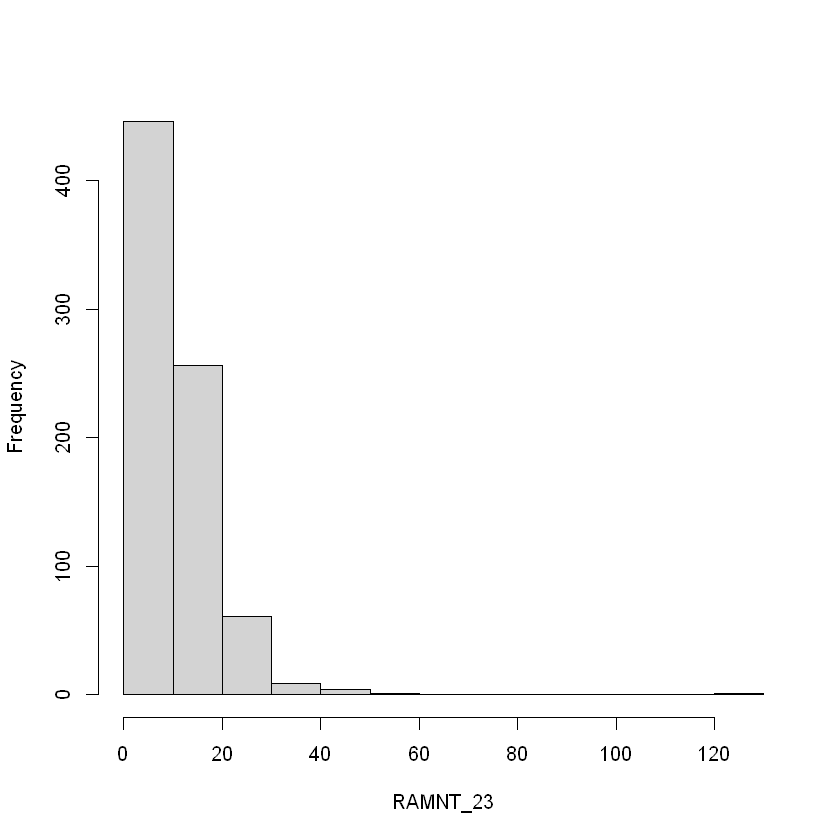

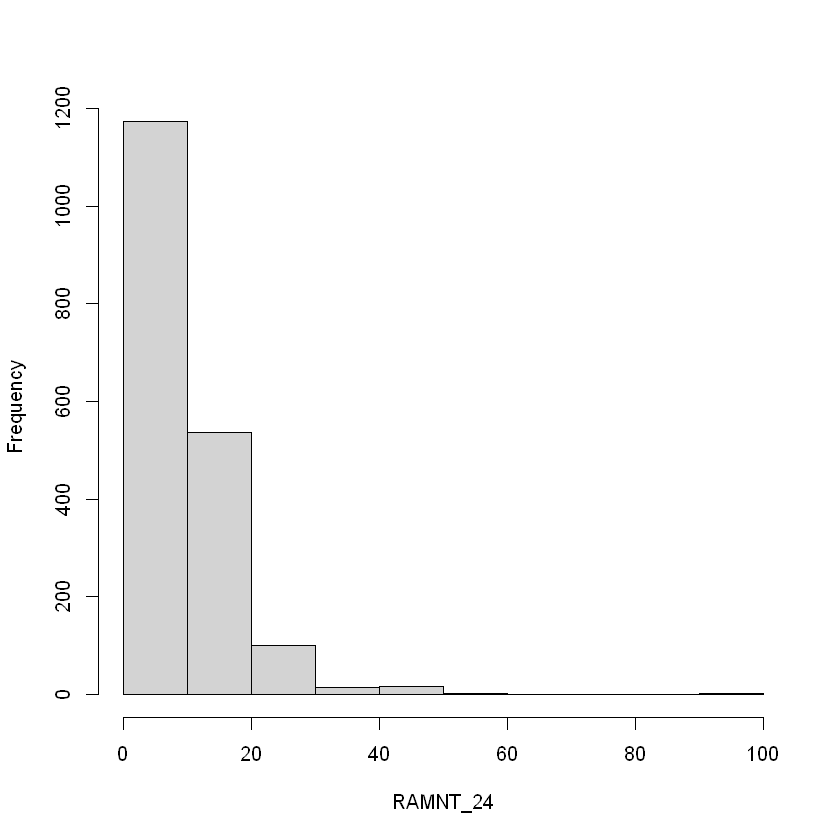

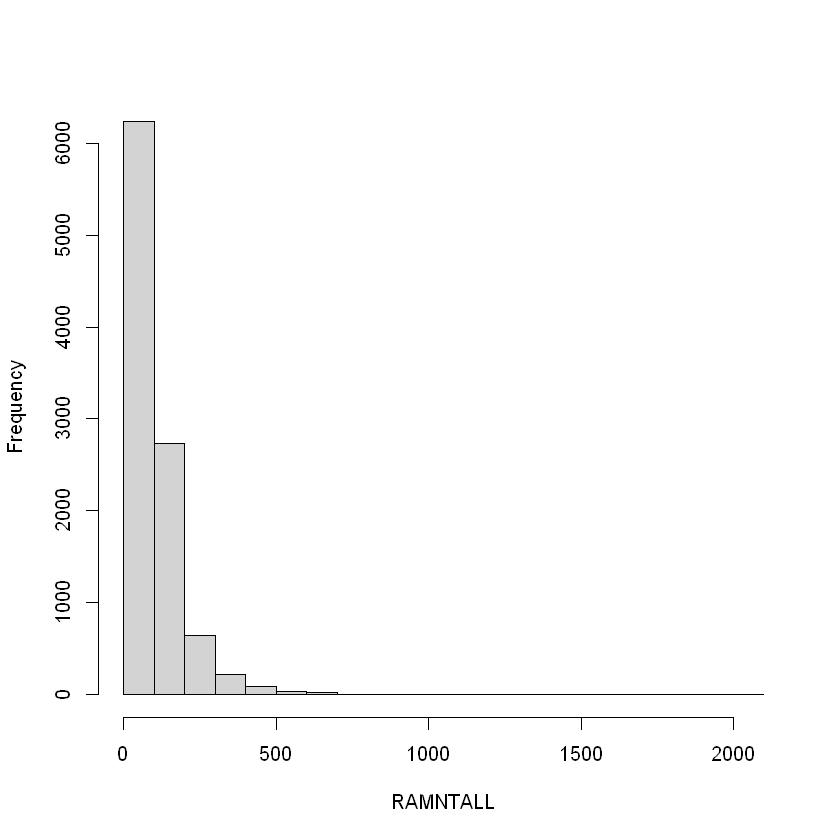

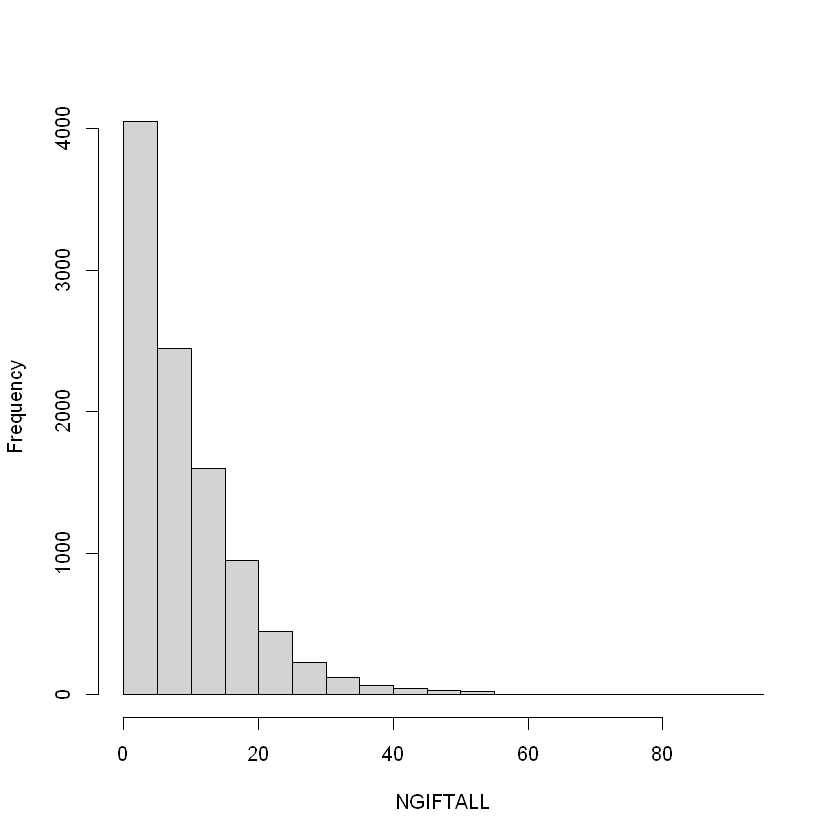

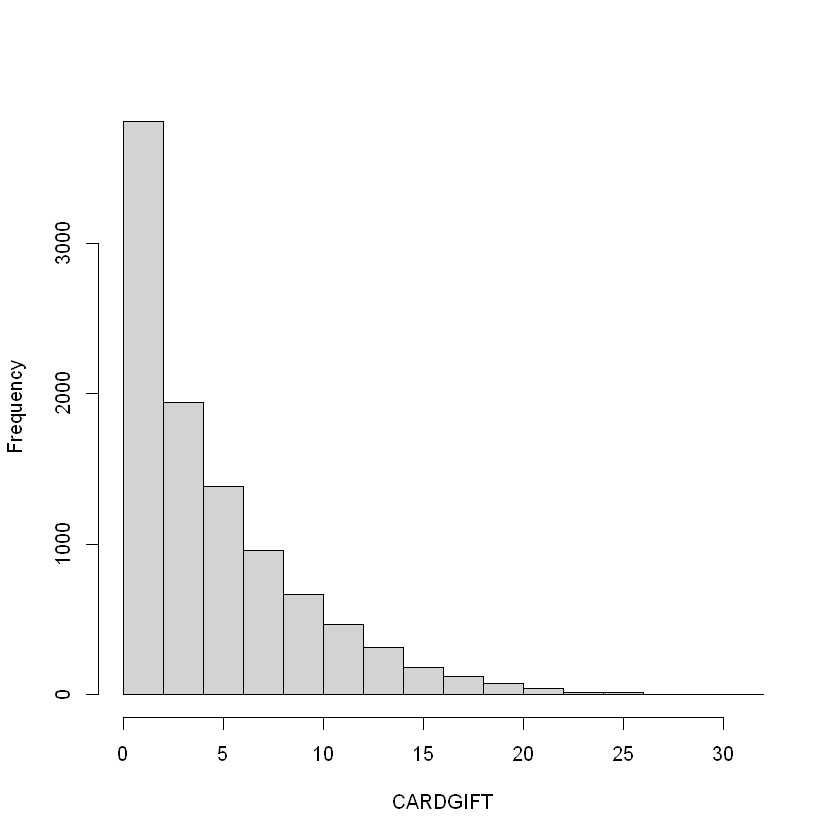

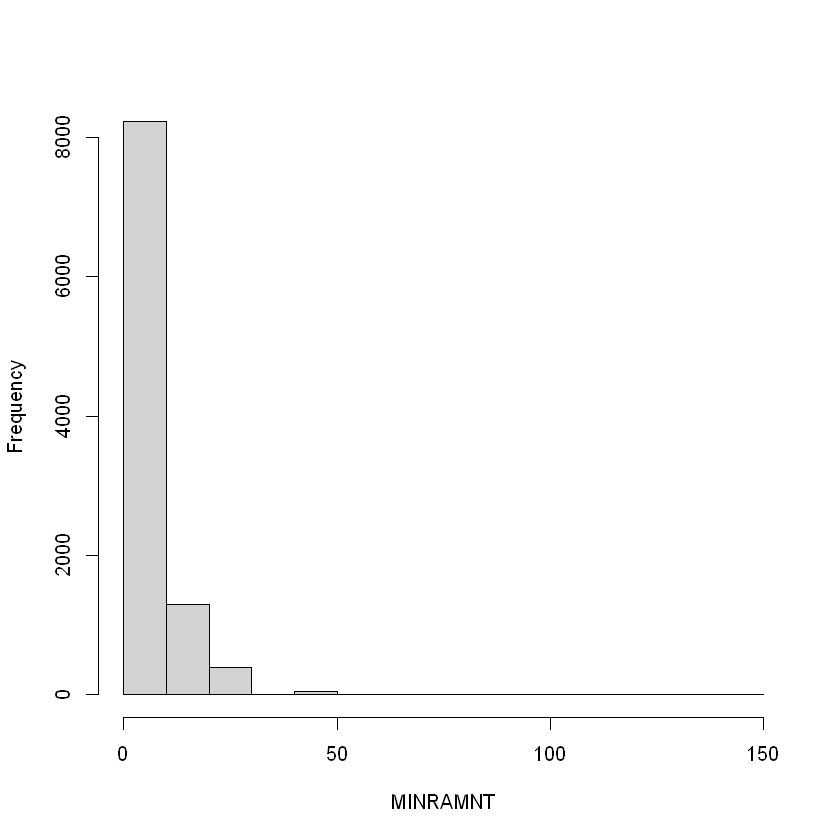

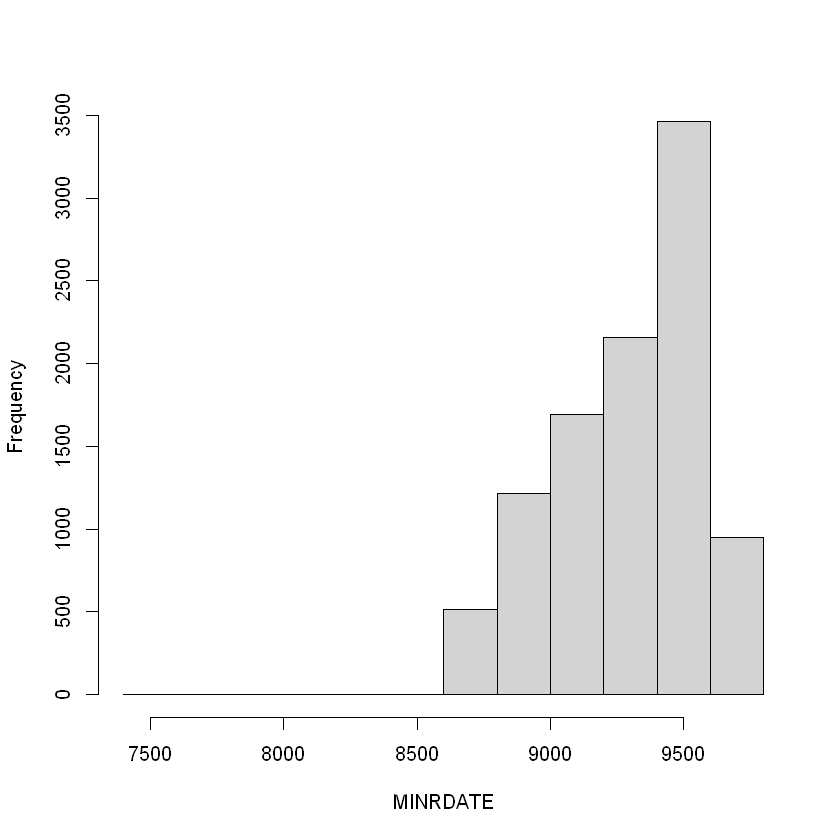

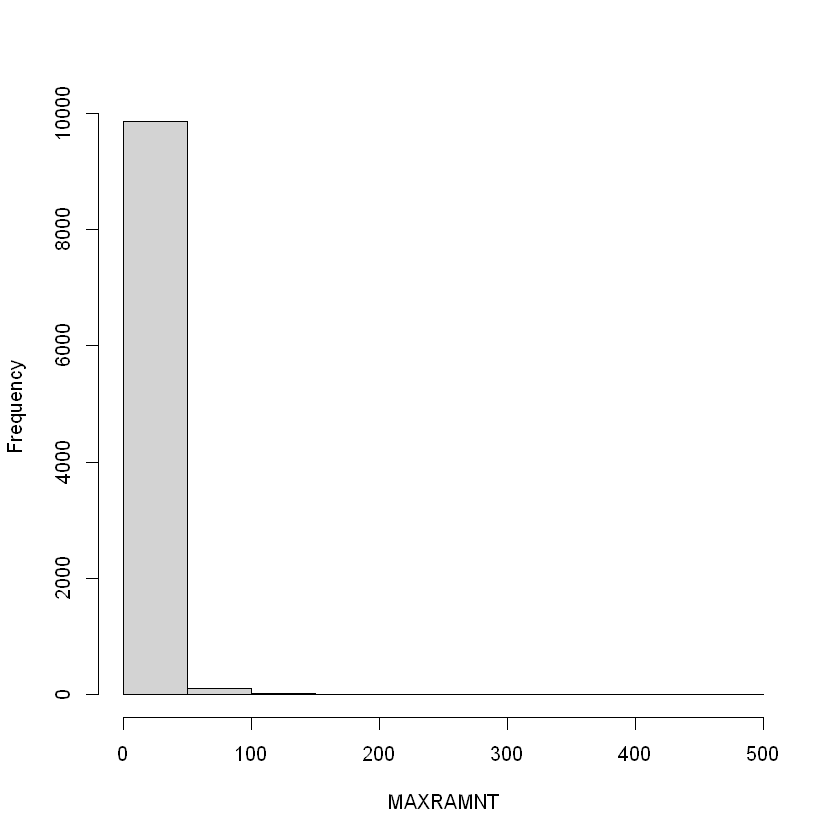

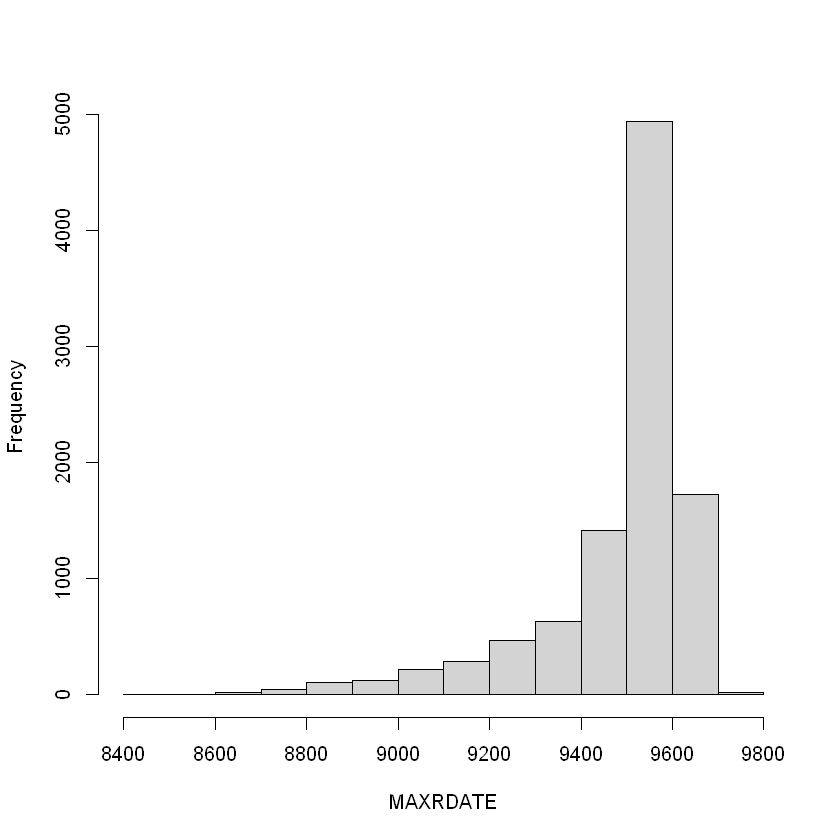

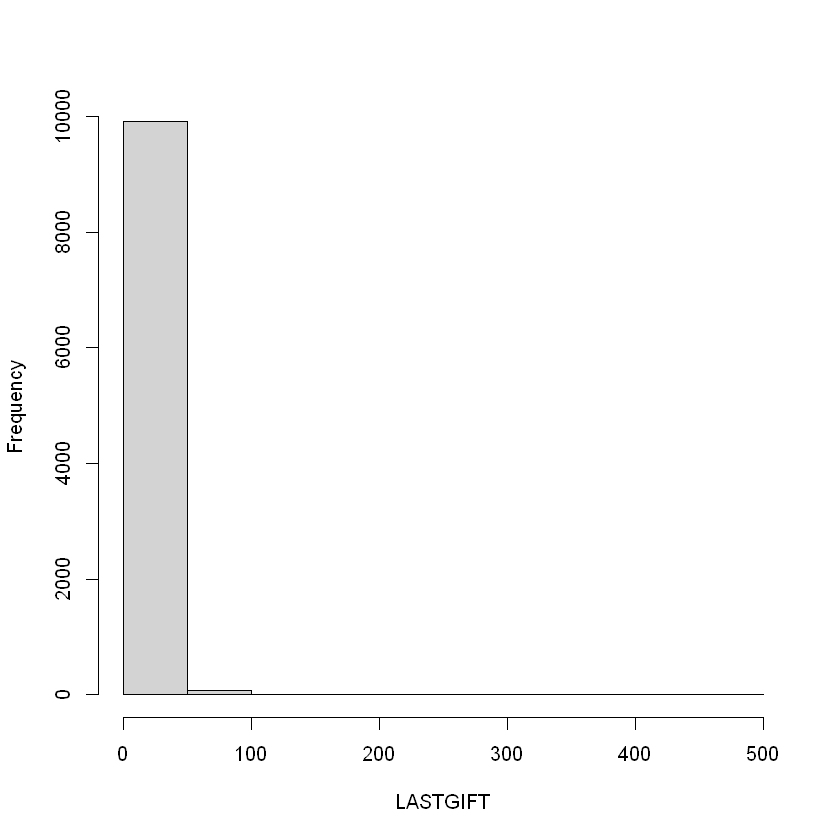

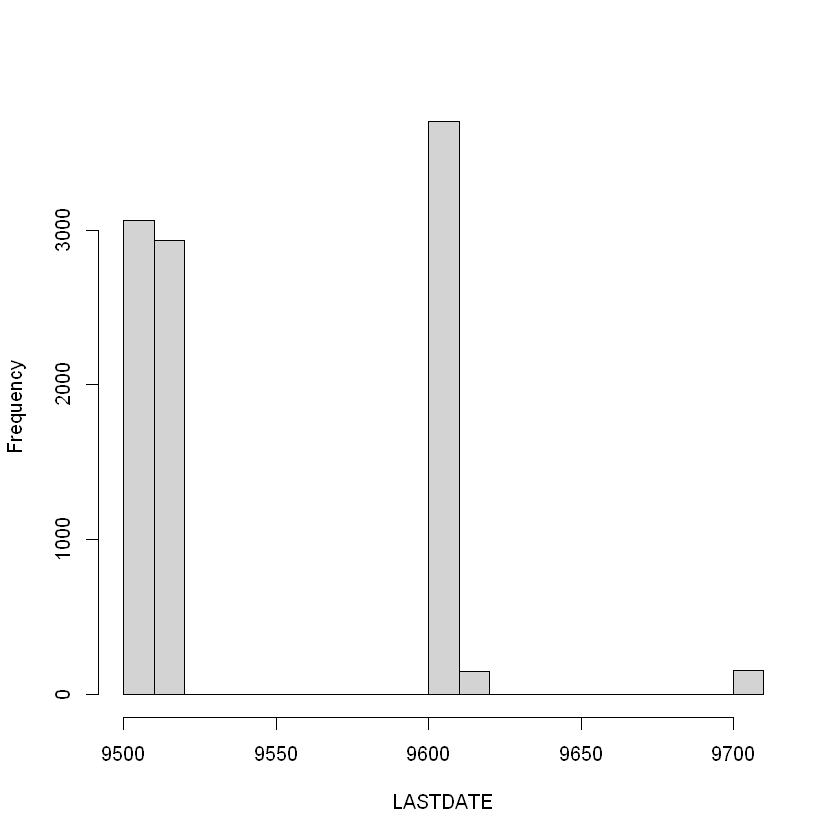

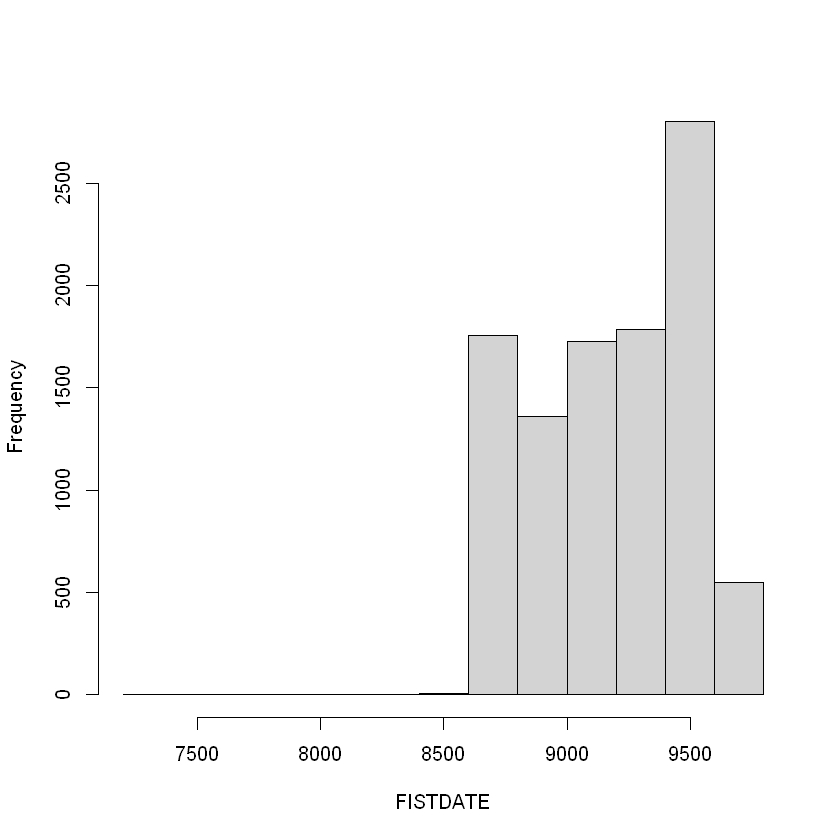

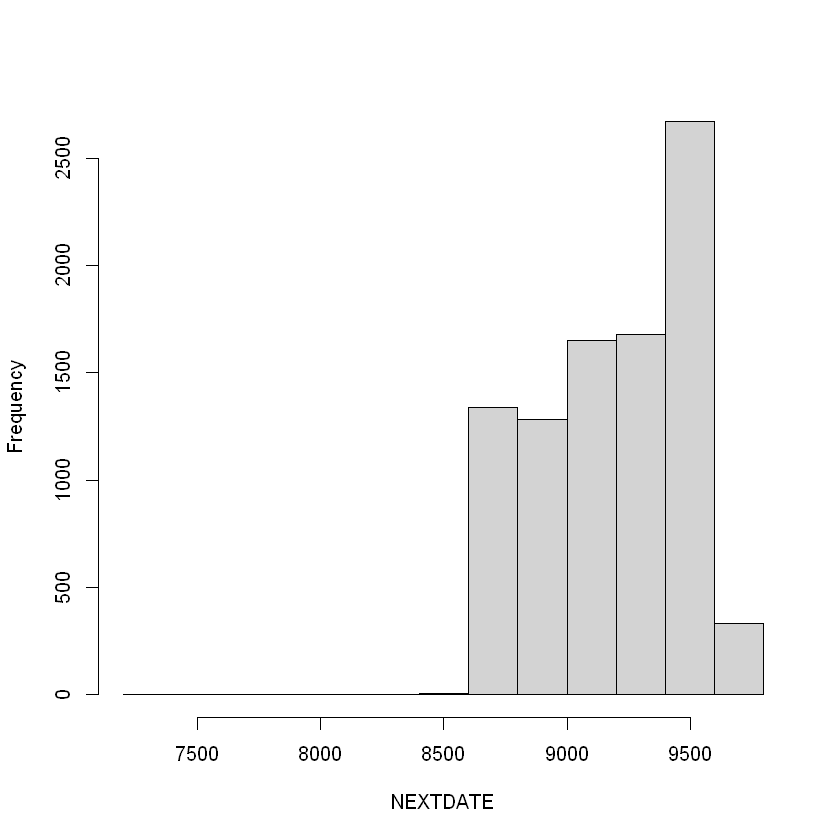

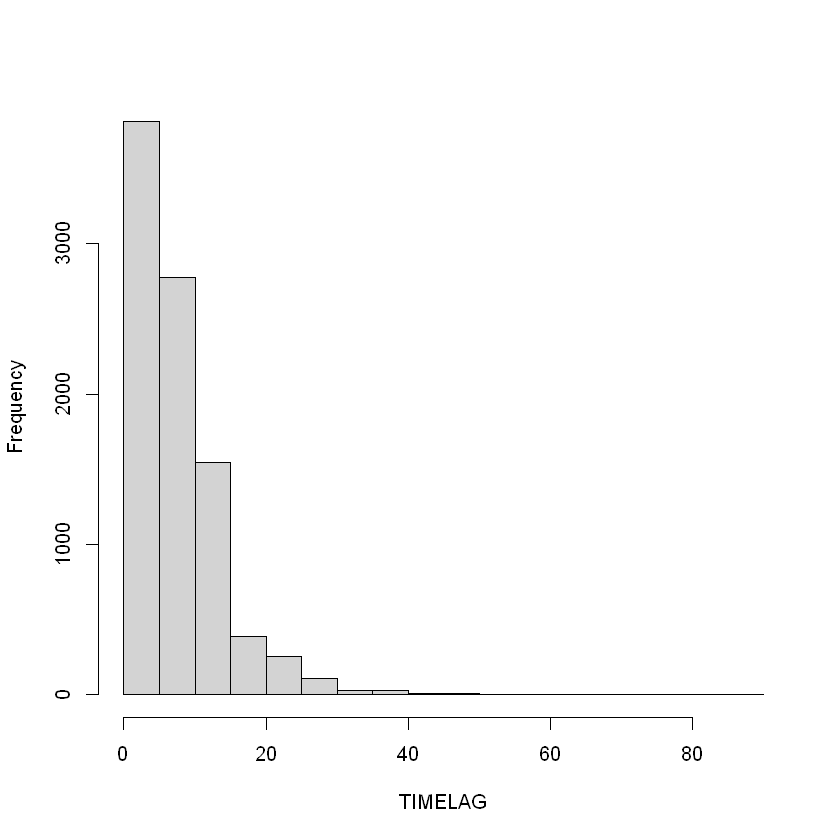

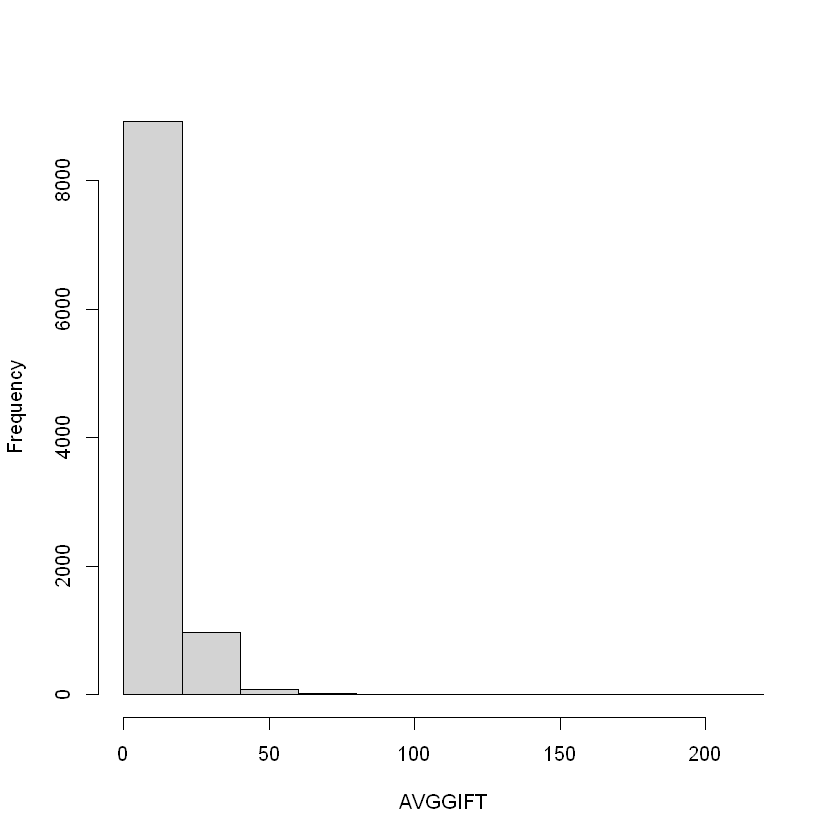

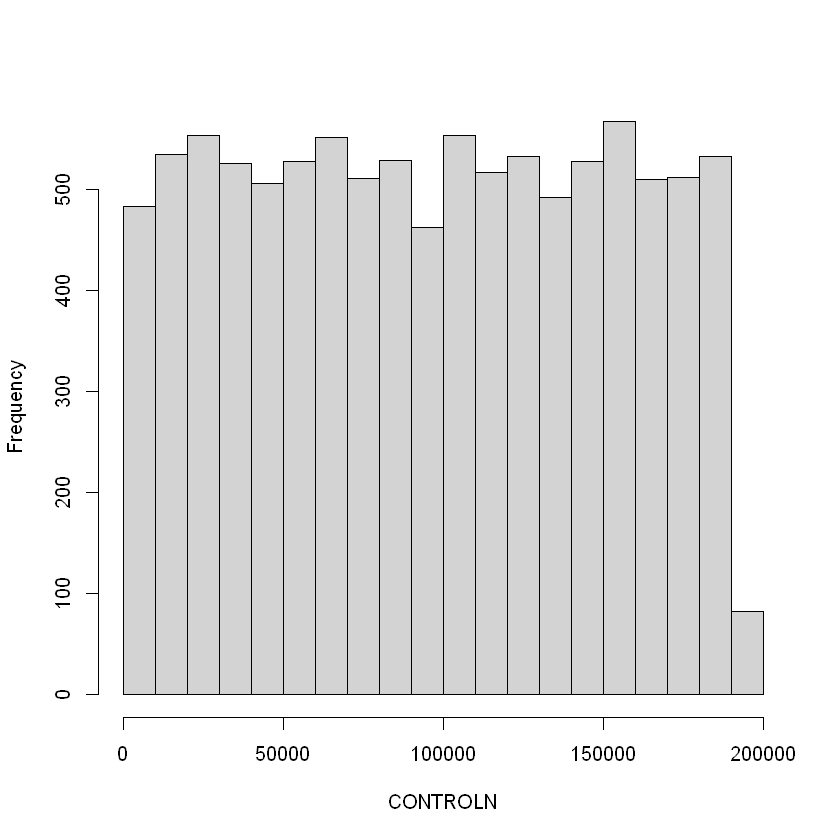

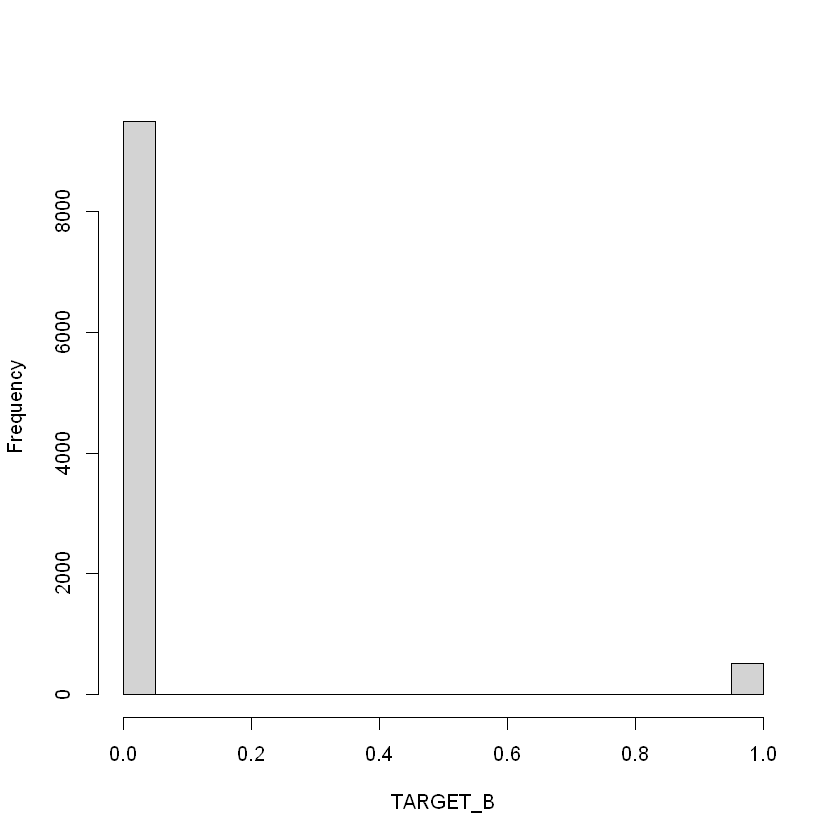

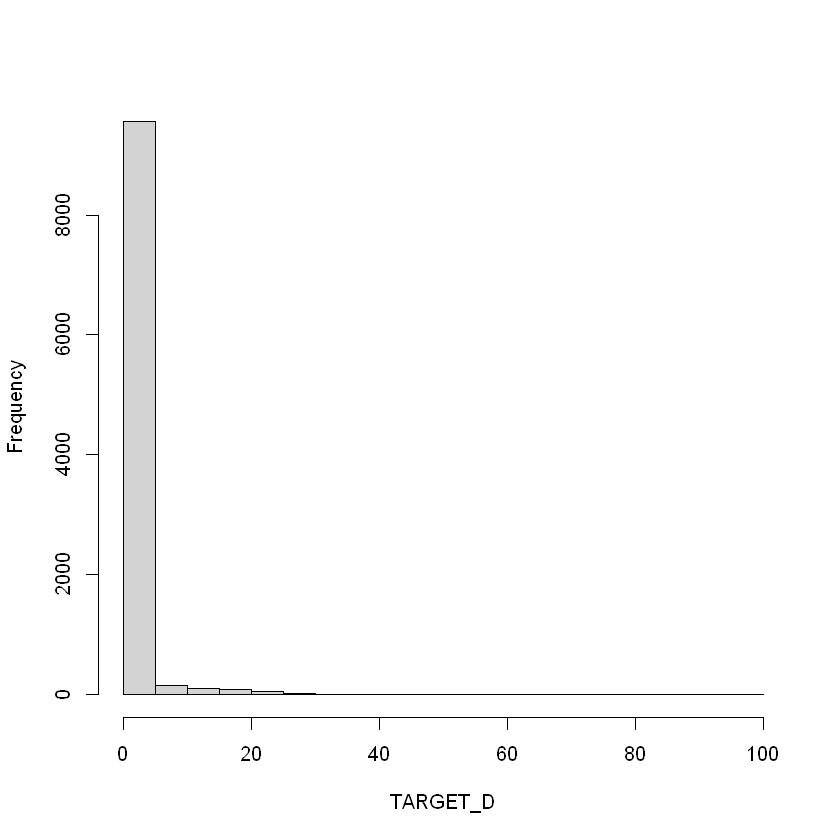

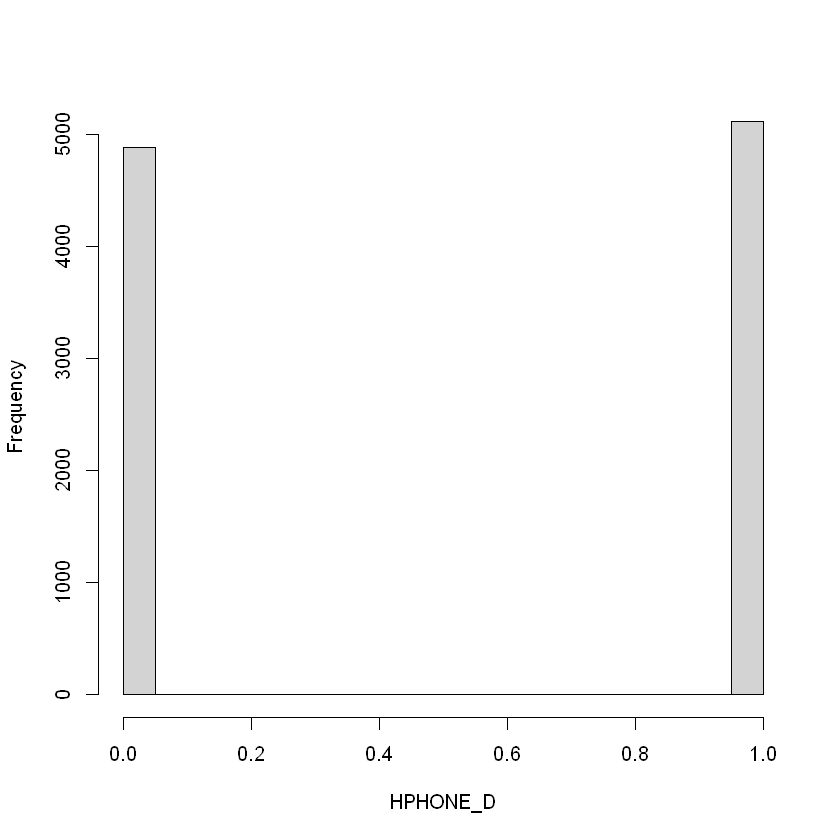

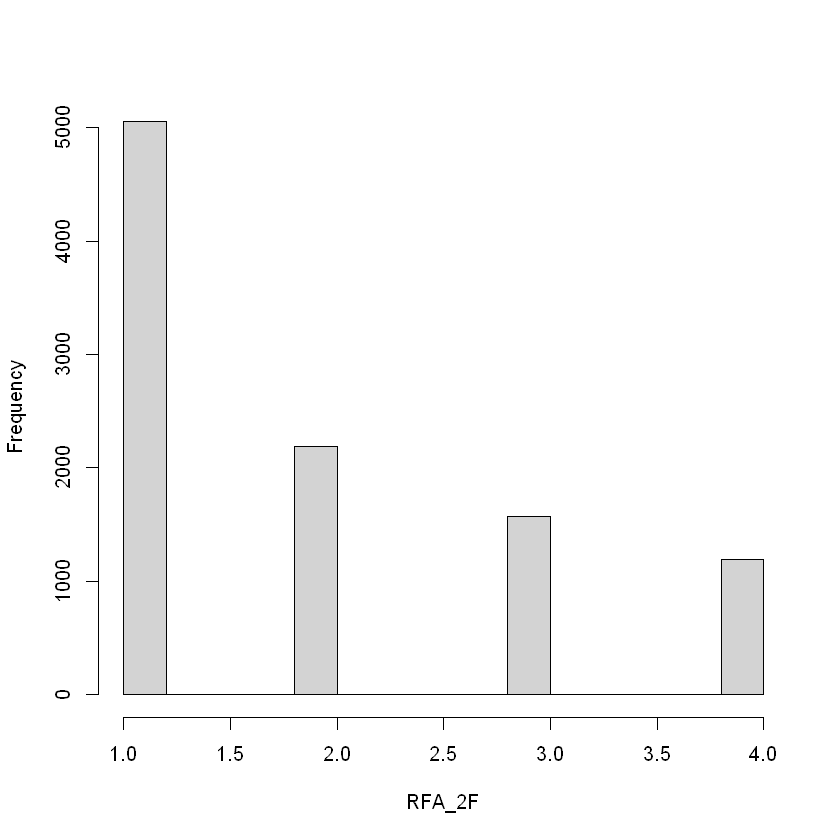

ODATEDW                                                                                                               
breaks   8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800                                          
counts   1544, 369, 689, 534, 803, 925, 787, 392, 1325, 1597, 1034, 1                                                          
density  0.001544, 0.000369, 0.000689, 0.000534, 0.000803, 0.000925, 0.000787, 0.000392, 0.001325, 0.001597, 0.001034, 0.000001
mids     8650, 8750, 8850, 8950, 9050, 9150, 9250, 9350, 9450, 9550, 9650, 9750                                                
xname    data.train[, x]                                                                                                       
equidist TRUE                                                                                                                  
         TCODE                                                                                                                                                                             
breaks   0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000                                                                         
counts   9991, 0, 1, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 1                                                                                                                                    
density  0.00019982, 0.00000000, 0.00000002, 0.00000000, 0.00000000, 0.00000014, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000002
mids     2500, 7500, 12500, 17500, 22500, 27500, 32500, 37500, 42500, 47500, 52500, 57500, 62500, 67500, 72500                                                                             
xname    data.train[, x]                                                                                                                                                                   
equidist TRUE                                                                                                                                                                              
         DOB                                                                                                                                                                                      
breaks   0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500                                                                                   
counts   2555, 212, 459, 646, 817, 735, 699, 576, 682, 722, 696, 536, 384, 183, 83, 12, 3                                                                                                         
density  0.0005110, 0.0000424, 0.0000918, 0.0001292, 0.0001634, 0.0001470, 0.0001398, 0.0001152, 0.0001364, 0.0001444, 0.0001392, 0.0001072, 0.0000768, 0.0000366, 0.0000166, 0.0000024, 0.0000006
mids     250, 750, 1250, 1750, 2250, 2750, 3250, 3750, 4250, 4750, 5250, 5750, 6250, 6750, 7250, 7750, 8250                                                                                       
xname    data.train[, x]                                                                                                                                                                          
equidist TRUE                                                                                                                                                                                     
         CLUSTER                                                                                                                                      
breaks   0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55                                                                                                 
counts   616, 694, 1200, 898, 988, 1019, 801, 1268, 1089, 756, 452                                                                

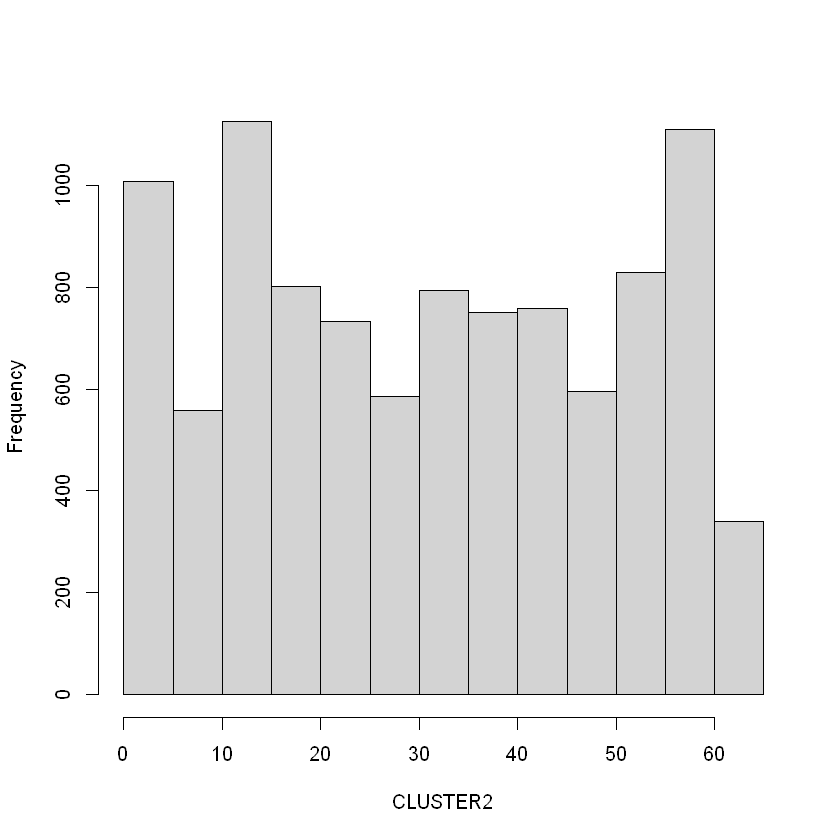

In [41]:
variablesNumerique = which(sapply(data.train,is.numeric))
myHist <- function(x){
    hist(data.train[,x],main=NULL,xlab=x)
}
sapply(names(variablesNumerique),myHist)

Sur toutes les variables ci-dessous une attire notre attention la variable HIT en effet elle semble avoir quelques valeurs abérantes bien aux dessus de toutes les valeurs (nous allons donc remplacer ces valeurs par la moyennes des valeurs non abérantes)

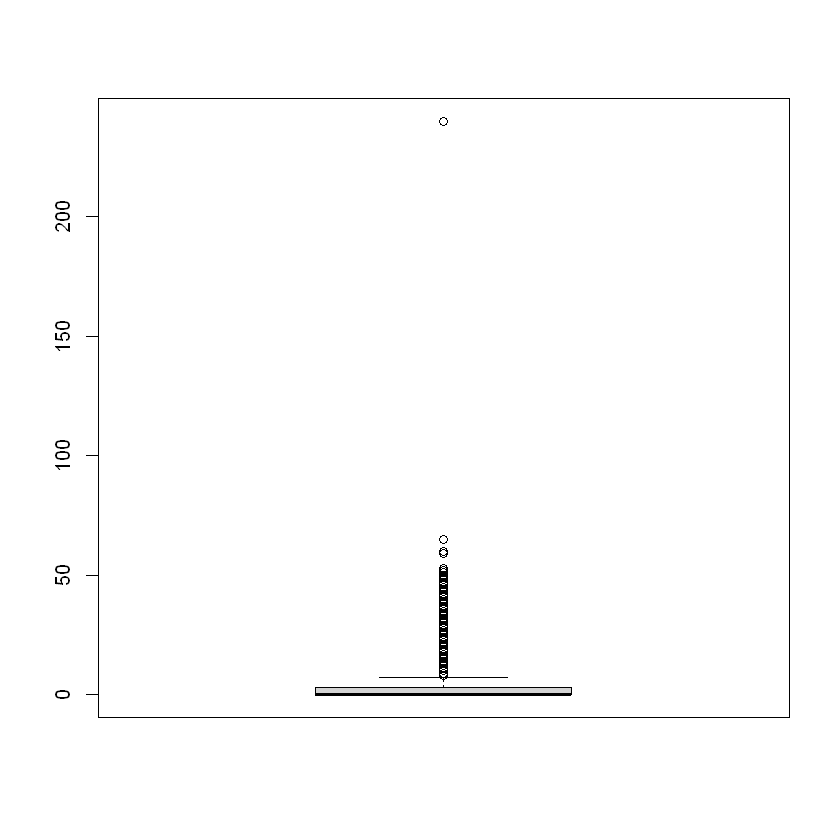

In [42]:
boxplot(data.train$HIT)

In [44]:
valeursAberante = data.train$HIT[data.train$HIT>100]
valeursAberante

[1] 240 240 240 240 240 240

In [46]:
valeursNonAberante = data.train$HIT[data.train$HIT<100]
mean(valeursNonAberante)

[1] 3.044227

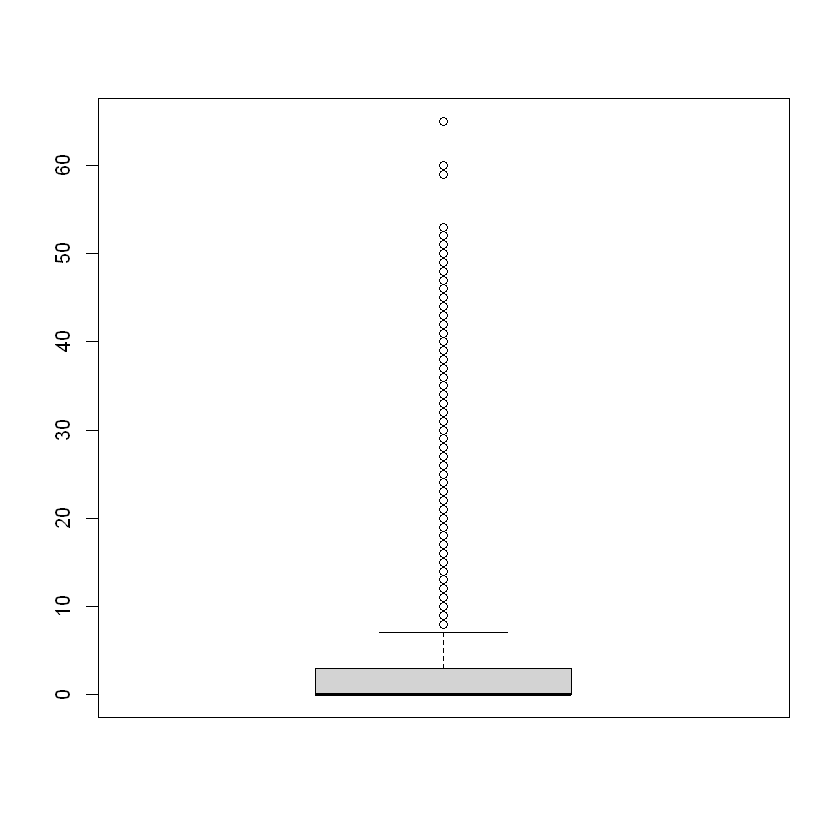

In [47]:
data.train$HIT[data.train$HIT>100] = mean(valeursNonAberante)
boxplot(data.train$HIT)

Aprés ces modifications nous pouvons considérer ces données comme bonnes.

Maintenant étudions l'age des personnes qui ont donnée

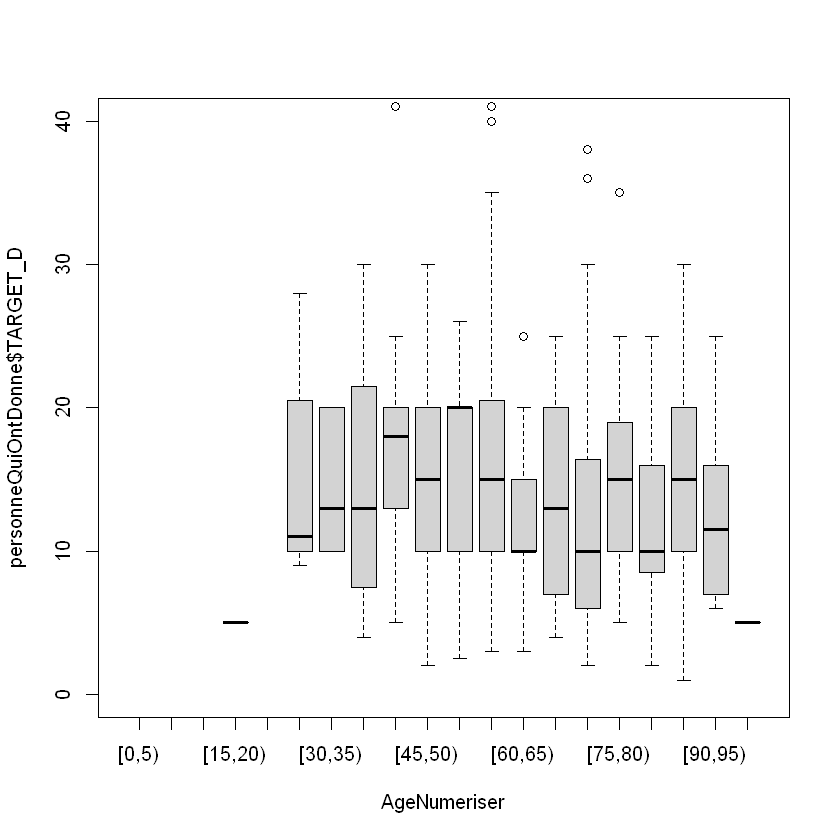

In [48]:
AgeNumeriser <- cut(personneQuiOntDonne$AGE, right=F, breaks=seq(0, 100, by=5))
boxplot(personneQuiOntDonne$TARGET_D ∼ AgeNumeriser,ylim=c(0,40))

On remarque que la majorité des personnes qui donne ont entre 30 et 95 ans. 

Apés avoir étudier l'age des personnes qui ont donnée intéressons nous aux sexes des personnes.

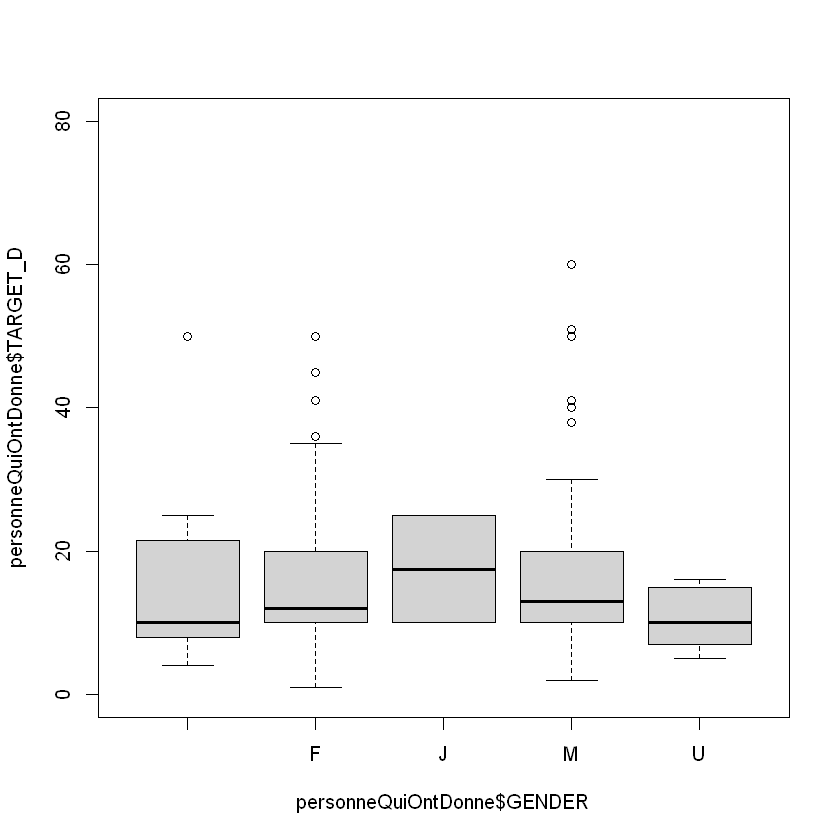

In [51]:
boxplot(personneQuiOntDonne$TARGET_D ∼ personneQuiOntDonne$GENDER, ylim=c(0,80))

Tous les sexes sont representé dans les dons

L'une des dernières choses à faire et de regarder la correlation entre les variables et notamment des variables avec les dons effectués pour savoir si une variables influes bien plus que les autres sur les dons ou si toutes les variables joue a peu prés le même role)



In [52]:
correlation = cor(data.train$TARGET_D,data.train[,variablesNumerique],use = "pairwise.complete.obs")
# pairwise.complete.obs permet d'éviter une erreur en cas de valeurs manquantes
correlation = abs(correlation) 
# Etudier la valeurs absolues nous permet de voir lesquels 
# sont les plus corrélé négativement ou positivement.
(correlation <- correlation[,order(correlation, decreasing=T)])

Warning message in cor(data.train$TARGET_D, data.train[, variablesNumerique], use = "pairwise.complete.obs"):
"l'écart type est nul"


TARGET_D     TARGET_B      RDATE_6        SOLP3      RDATE_3      RAMNT_3 
1.000000e+00 8.330263e-01 3.553863e-01 2.495255e-01 2.133903e-01 1.976607e-01 
     RDATE_4     RAMNT_22      RAMNT_6     RAMNT_18     RDATE_20     ADATE_24 
1.551292e-01 8.781143e-02 8.594856e-02 8.245766e-02 5.527323e-02 5.241972e-02 
         HV1          HV2     RAMNT_12     RDATE_11          HV3         HVP4 
4.940993e-02 4.878299e-02 4.865503e-02 4.847876e-02 4.773288e-02 4.509184e-02 
         IC5        ETH10         IC12          IC1          HV4        SOLIH 
4.501308e-02 4.445427e-02 4.326462e-02 4.324113e-02 4.276678e-02 4.273271e-02 
         IC3          IC2         HVP3         HVP6          IC4     RAMNT_10 
4.186324e-02 4.173874e-02 4.170810e-02 4.168980e-02 4.142867e-02 4.140337e-02 
        IC21     RAMNT_14          RP3         HVP5        ETH14      MAGMALE 
4.129549e-02 4.067141e-02 3.974265e-02 3.956059e-02 3.891723e-02 3.887226e-02 
        IC11         HVP1     RAMNT_15         HVP2        POBC2          RP1 
3.870276e-02 3.863611e-02 3.859623e-02 3.854046e-02 3.803211e-02 3.796047e-02 
       HHAS3      RAMNT_8     RDATE_19          EC2          RP2         IC20 
3.759763e-02 3.724014e-02 3.707986e-02 3.690240e-02 3.683923e-02 3.617693e-02 
       MHUC1         OCC8         IC14      WEALTH1          RP4      RAMNT_9 
3.608469e-02 3.502325e-02 3.386270e-02 3.363431e-02 3.351344e-02 3.309603e-02 
       HHAS4         ETH7        OCC11     RDATE_17     RDATE_24     CLUSTER2 
3.302588e-02 3.254329e-02 3.248447e-02 3.223706e-02 3.185741e-02 3.150139e-02 
         EC8          EC5         LSC4         IC23          IC6         OCC2 
3.139864e-02 3.128659e-02 3.119066e-02 3.093526e-02 3.014903e-02 2.997586e-02 
        EIC9      GEOCODE     RDATE_10     MINRAMNT          EC1      ADATE_6 
2.963117e-02 2.940315e-02 2.935785e-02 2.913751e-02 2.911927e-02 2.887850e-02 
        OCC1          EC7       INCOME     LASTDATE      AVGGIFT        HHAS2 
2.871567e-02 2.846467e-02 2.846246e-02 2.843714e-02 2.803830e-02 2.799696e-02 
        IC15         HHD7        OCC13         HHD9     RDATE_13        EIC15 
2.733574e-02 2.728852e-02 2.701692e-02 2.695947e-02 2.638116e-02 2.588825e-02 
        RHP1      RDATE_7     RAMNTALL        OCC12        ANC15         HUR2 
2.568297e-02 2.557530e-02 2.553640e-02 2.541186e-02 2.513155e-02 2.487711e-02 
        RHP2        TPE10         LFC8     RAMNT_21          MC3     NUMPRM12 
2.432210e-02 2.426175e-02 2.394482e-02 2.377376e-02 2.346212e-02 2.342614e-02 
         DMA      CLUSTER          AC1          EC3         IC13     RAMNT_17 
2.324427e-02 2.303899e-02 2.287192e-02 2.271386e-02 2.270050e-02 2.262499e-02 
         EC4     PUBPHOTO        ANC10     CARDPM12      RAMNT_4         VOC2 
2.257732e-02 2.255762e-02 2.254275e-02 2.245979e-02 2.230340e-02 2.199596e-02 
        OCC5      ADATE_9         ETH6      MBBOOKS          MSA         IC22 
2.196543e-02 2.189199e-02 2.188672e-02 2.183241e-02 2.172392e-02 2.148380e-02 
        VOC1         HC21         TPE2        AGEC4     RAMNT_20     NEXTDATE 
2.136025e-02 2.132368e-02 2.128127e-02 2.119838e-02 2.106946e-02 2.103270e-02 
         EC6         ETH4     DATASRCE         IC17       AGE901         IC10 
2.099144e-02 2.096234e-02 2.067436e-02 2.059923e-02 2.028479e-02 2.019698e-02 
        IC19         TPE1        TPE11        POBC1        OEDC1        LFC10 
2.019603e-02 2.017518e-02 2.005562e-02 1.989079e-02 1.974896e-02 1.954566e-02 
        EIC2        TPE13         IC16      NUMPROM          IC8     LASTGIFT 
1.869710e-02 1.835262e-02 1.818287e-02 1.803979e-02 1.776626e-02 1.750210e-02 
    RAMNT_13     LOCALGOV         HHD3         OCC4      NUMCHLD         VOC3 
1.741245e-02 1.724953e-02 1.719786e-02 1.716888e-02 1.711117e-02 1.701878e-02 
    RDATE_12      POP90C2         LFC9         ANC5        MARR1        ETHC4 
1.699197e-02 1.690018e-02 1.684662e-02 1.680966e-02 1.663386e-02 1.662634e-02 
         MC1         OCC6      POP90C1        HUPA4   

On remarque qu'il y a des variables plus correlés que les autres les deux premières TARGET B et D ne compte pas car ce sont les classes. Mais on voit que certaines ont des variables trés correlé (taux à 0.35 par exemple) là ou d'autres variables sont presque à 0

# Training Decision Trees


In [54]:
install.packages("party")

Installation du package dans 'C:/Users/alex5/OneDrive/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'party' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alex5\AppData\Local\Temp\RtmpgPDEsO\downloaded_packages


In [55]:
library(party)

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : mvtnorm

Le chargement a nécessité le package : modeltools

Le chargement a nécessité le package : stats4

Le chargement a nécessité le package : strucchange

Le chargement a nécessité le package : zoo


Attachement du package : 'zoo'


Les objets suivants sont masqués depuis 'package:base':

    as.Date, as.Date.numeric


Le chargement a nécessité le package : sandwich



In [80]:
 # Paramétre de l'arbre 
MinSplit = 400
MinBucket = 40
MaxDepth = 10
VariableAUtiliser <- c("AGE", "AVGGIFT", "CARDGIFT", "CARDGIFT",
"CLUSTER2", "DOMAIN", "GEOCODE2", "HIT",
"HOMEOWNR", "HPHONE_D", "INCOME", "LASTGIFT", "MAXRAMNT",
"MDMAUD_F", "MDMAUD_R", "MINRAMNT", "NGIFTALL", "NUMPRM12",
"PCOWNERS", "PEPSTRFL", "PETS", "RAMNTALL", "RECINHSE",
"RFA_2A", "RFA_2F", "STATE", "TIMELAG")
DonneeEntrainement = data.train[,c("TARGET_D",VariableAUtiliser)]
dim(DonneeEntrainement)

[1] 10000    28

In [78]:
formula = TARGET_D ~ AGE+AVGGIFT+CARDGIFT+CARDGIFT+CLUSTER2+DOMAIN+GEOCODE2+HIT+HOMEOWNR+HPHONE_D+INCOME+LASTGIFT+MAXRAMNT+MDMAUD_F+MDMAUD_R+MINRAMNT+NGIFTALL+NUMPRM12+PCOWNERS+PEPSTRFL+PETS+RAMNTALL+RECINHSE+RFA_2A+RFA_2F+STATE+TIMELAG

In [81]:
myCtree <- ctree(formula,data=DonneeEntrainement,
controls=ctree_control(minsplit=MinSplit, minbucket=MinBucket, maxdepth=MaxDepth))

ERROR: Error in trafo(data = data, numeric_trafo = numeric_trafo, factor_trafo = factor_trafo, : data class "character" is not supported
